期望最大(EM-Expectation Maximization)算法与高斯混合模型(GMM-Gaussian Mixture Model)
===

# 1.概述
## 1.1.概述
EM算法本质上来说是一种寻找问题最优解的优化算法，高斯混合模型是EM算法的一个典型的应用场景。常见的寻找问题最优解的方法：
- EM算法
- 梯度下降法 - 线性回归
- 坐标上升法 - 支持向量机
- 极大似然估计 - 逻辑回归

EM算法是一个无监督算法，一种聚类的算法。这个算法思想简单，但是推导复杂。它的本质就是极大似然估计法求解未知参数的最优解。极大似然估计是求解参数的最优解，EM算法对其进行了推广，能够叫它处理更复杂的问题，这些问题中多了一些隐变量。

## 1.2.应用场景
- 高斯混合模型
- K-Means聚类
- HMM-隐马尔可夫模型

比如观察人的身高，符合正态分布，那么参数就有两个$(\mu,\sigma^2)$,我们现在有100个男性的身高和100个女性的身高,那么求解均值和标准差的过程就是估计高斯分布的参数,可以直接根据公式
$$
\begin{cases}
\hat{\mu}&=\frac{1}{n}\sum_{i=1}^nx_i=\overline{x}\\\\
\hat{\sigma}^2&=\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2
\end{cases}
$$
上述问题中，我们是性别已知的，但是如果我们收集了200个人的身高，而性别未知，又该如何处理？这样就涉及到了两个分布、两个分布的参数.那么首先需要先性别估计，然后才能估计高斯分布.这个时候就需要用到EM算法，性别估计的参数就是隐变量这个时候，对于每一个样本或者你抽取到的人，就有两个东西需要猜测或者估计的了，一是这个人是男的还是女的？二是男生和女生对应的身高的高斯分布的参数是多少？只有当我们知道了哪些人属于同一个高斯分布的时候，我们才能够对这个分布的参数作出靠谱的预测，例如刚开始的最大似然所说的，但现在两种高斯分布的人混在一块了，我们又不知道哪些人属于第一个高斯分布，哪些属于第二个，所以就没法估计这两个分布的参数。反过来，只有当我们对这两个分布的参数作出了准确的估计的时候，才能知道到底哪些人属于第一个分布，那些人属于第二个分布。

## 1.3.EM算法和坐标上升法的对比
EM算法就是这样，假设我们想估计知道A和B两个参数，在开始状态下二者都是未知的，但如果知道了A的信息就可以得到B的信息，反过来知道了B也就得到了A。可以考虑首先赋予A某种初值，以此得到B的估计值，然后从B的当前值出发，重新估计A的取值，这个过程一直持续到收敛为止。这里把每个人的完整描述看做是三元组$y_i=\{x_i,z_{i1},z_{i2}\}$，其中，$x_i$是第i个样本的观测值，也就是对应的这个人的身高，是可以观测到的值。$z_{i1}$和$z_{i2}$表示男生和女生这两个高斯分布中哪个被用来产生值$x_i$，就是说这两个值标记这个人到底是男生还是女生（的身高分布产生的）。这两个值我们是不知道的，是隐含变量。确切的说，$z_{ij}$在$x_i$由第j个高斯分布产生时值为1，否则为0。例如一个样本的观测值为1.8，然后他来自男生的那个高斯分布，那么我们可以将这个样本表示为{1.8, 1, 0}。如果$z_{i1}$和$z_{i2}$的值已知，也就是说每个人我已经标记为男生或者女生了，那么我们就可以利用上面说的最大似然算法来估计他们各自高斯分布的参数。但是它们未知，因此我们只能用EM算法
- 坐标上升法：假设我们想估计知道A和B两个参数，在开始状态下二者都是未知的，但如果知道了A的信息就可以得到B的信息，反过来知道了B也就得到了A
- EM算法：首先赋予A初始值，以此得到B的估计值，然后从B的当前值触发，重新估计A的取值，这个过程一直持续到收敛为止

EM算法本质上就是一个坐标上升法

## 1.4.EM算法和K-Means算法的对比
K-Means算法是一种聚类算法，它最后得到的结果会把样本唯一的分到一类中，但无法给出某个样本属于该簇的后验概率。而EM算法最后得到的是这个样本属于任何一种分类的概率

## 1.5.混合高斯模型
随机变量X由K个高斯分布混合而成，取各个高斯分布的概率为$\pi_1,\pi_2,...,\pi_K$，第i个高斯分布的均值为$\mu_i$，方差为$\sum_i$。若观测到随机变量X的一系列样本$x_1,x_2,...,x_n$，试估计参数$\pi,\mu,\sum$。高斯分布是指数族分布，但是混合高斯模型就不是指数族分布了。若$x_1,x_2,...,x_n$中，每一个都是一个n维的向量，那么$\mu_i$也是一个n维的向量，方差$\sum_i$就是一个$n*n$的协方差矩阵(对称的，半正定的矩阵)

# 2.混合高斯模型解法
## 2.1.似然函数与对数似然
- 似然函数:$L_{\pi,\mu,\sum}(x)=\prod_{i=1}^N\prod_{k=1}^K\pi_kN(x_i|\mu_k,\sum_k)$
- 对数似然:$\ell_{\pi,\mu,\sum}(x)=\sum_{i=1}^Nlog[\sum_{k=1}^K\pi_kN(x_i|\mu_k,\sum_k)]$

如果给定了$\mu_k,\sum_k$的时候，算第i个样本$x_i$属于第k个高斯分布的概率就是$N(x_i|\mu_k,\sum_k)$.对于在对数函数里面又有加和，无法直接用求导解方程的办法直接求得最大值。为了解决这个问题，我们分成两步

## 2.2.第一步-估算数据来自哪个组份
估计数据由每个组份生成的概率:对于每个样本$x_i$,它由第k个组份生成的概率为
$$\gamma(i,k)=\frac{\pi_kN(x_i|\mu_k,\sum_k)}{\sum_{j=1}^K\pi_jN(x_i|\mu_j,\sum_j)}$$
上式中的$\mu$和$\sum$也是待估计的值，因此采样迭代法: 在计算$\gamma(i,k)$时假定$\mu$和$\sum$已知;
- 需要先验给定$\mu$和$\sum$。
- $\gamma(i,k)$亦可看成组份k在生成数据$x_i$时所做的贡献

## 2.3.第二步-估计每个组份的参数
对于所有的样本点，对于组份k而言，可看做生成了$\{\gamma(i,k)x_i|i=1,2,...,N\}$这些点。组份k是一个标准的高斯分布，利用上面的结论
$$
\begin{cases}
N_k=\sum_{i=1}^N\gamma(i,k)\\\\
\mu_k=\frac{1}{N}\sum_{i=1}^N\gamma(i,k)x_i\\\\
\sum_k=\frac{1}{N_k}\sum_{i=1}^N\gamma(i,k)(x_i-\mu_k)(x_i-\mu_k)^T\\\\
\pi_k=\frac{N_k}{N}=\frac{1}{N}\sum_{i=1}^N\gamma(i,k)
\end{cases}
$$

# 3.EM算法思想
对于未知性别的估计，高斯概率密度函数要求知道两个参数，就可以知道具体的性别；极大似然要求知道性别，就能知道高斯分布参数。这就陷入了死循环。所以就引入了EM算法。

## 3.1.问题提出
假定有训练集$\{x^{(1)},x^{(2)},...,x^{(m)}\}$,包含m个独立样本，希望从中找到该组数据的模型p(x,z)的参数。其中x是已经观察到的参数，z是未观测到的参数

## 3.2.通过最大似然估计建立目标函数
- 似然函数$L(\theta)=\prod_p(x;\theta)$
- 对数似然$\ell(\theta)=\sum_{i=1}^mlogp(x;\theta)=\sum_{i=1}^mlog\sum_zp(x,z;\theta)$

z是隐随机变量，不方便直接找到参数估计。策略:计算$\ell(\theta)$下界，求该下界的最大值; 重复该过程，直到收敛到局部最大值。本质上，我们需要使得上述式子最大化，但是可以看到里面有“和的对数”，求导后形式会非常复杂（自己可以想象下$log(f_1(x)+ f_2(x)+ f_3(x)+…)$复合函数的求导），所以很难求解得到未知参数z和$\theta$

## 3.3.Jenson不等式
我们的推导需要用到Jenson不等式。令$Q_i$是z的某一个分布，其中$Q_i > 0$，则对数似然函数为
$$
\begin{eqnarray}
\ell(\theta)&=&\sum_{i=1}^mlogp(x;\theta)\\
&=&\sum_{i=1}^mlog\sum_zp(x,z;\theta)\\
&=&\sum_ilog\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}
\end{eqnarray}
$$
对于一个随机变量X：
- 如果f是凸函数，那么$E[f(X)]>=f(E[X])$
- 如果f是凹函数，那么$E[f(X)]<=f(E[X])$

E就是期望我们知道
$$E[f(X)]=\sum\limits_i^np_iz_i$$
其中$\sum\limits_i^np_i=1$，其含义就是对于函数f(x)上每个可能取值的点的一个加权平均，那么$f(E[X])$的含义是，对于可能取值的X的加权平均，然后在求解函数值,$logY$是一个凹函数。我们现在需要关心的是什么时候相等。如下图所示的凸函数

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX4AAAE2CAYAAABm0fn9AAAAAXNSR0IArs4c%0A6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAEJmSURB%0AVHhe7Z0/qBPZ+8Zv8S1u8StuscUtLPaCxV6wMLDFBrYxYLEXtjBgsQELCRYS%0ALJZgIcFGgoUECwkWErYQYiHEQoiFEBshFguxEGIhxMIihUUKixRbvL/3OTMn%0A9yQ3uTe5+TOTOc8HxmsmMyczc855znve854zO/KfCDdu3Lhx82ej8HPjxo2b%0AZxuFnxs3btw82yj83Lhx4+bZRuHnxo0bN882Cj83bty4ebZR+Llx48bNs21H%0A/2w1/W99yd/MS+ffTriHEELIaVD4CSHEMyj8hBDiGRR+QgjxDAo/IYR4BoWf%0AEEI8g8JPCCGeQeEnhBDPoPATQohnUPgJIcQzKPyEEOIZFH5CCPEMCj8hhHgG%0AhZ8QQjyDwk8IIZ5B4SeEEM+g8BNCiGdQ+AkhxDMo/IQQ4hkUfkII8QwKPyGE%0AeAaFnxBCPIPCTwghnkHhJ4QQz6DwE0KIZ1D4CSHEMyj8hBDiGRR+QgjxDAo/%0AIYR4BoWfEEI8g8JPCCGeQeEnhBDPoPATQohnUPgJIcQzKPyEEOIZFH5CCPEM%0ACj8hhHgGhZ8QQjyDwv9f+JcQQjzBO+EfDocy+D6g4BNCvMU74e9+6krlccWc%0ARwghPuKd8Lc/tKVwuyC9L71wDyGE+IV3wt/52JHCnYJ0P3fDPYQQ4hf+uXpU%0A8GHxowEghBAf8U74cTyEHy4fQgjxEe+EHxE9EP7Wu1a4hxBC/MI74R/+GEr+%0AVl6ab5rhHkII8QvvhB/x+xD+xqtGuIMQQvzCP+FXcjdyUn9RDz8RQohfeCv8%0AtX9q4SdCCPELL4Ufg7u1ZxR+QoifeCn8xbtFqT6php8IIcQvvBT+8oOyVB5V%0Awk+EEOIXXgo/rH2IP1foJIT4iJfCX39el9L9konpJ4QQ3/BS+Juvm8bPb9bl%0AJ4QQz/BS+Nvv22aFTpxLCCG+4aXwY4VOnMM1+QkhPuKl8MPFk/srZ97GRQgh%0AvuGl8COa5+jPIy7NTAjxEj+FX8ley3JpZkKIl/gr/NezJrqHEEJ8w1vhx3o9%0AXKGTEOIj3gp/6V6JC7URQrzEW+E3yzY85LINhBD/8Fb44eaB1c9lGwghvuGt%0A8COiB37+wYDLNhBC/MJb4cesXUT29PtctoEQ4hfeCj8s/czVjDmfEEJ8wlvh%0ABxB+rtdDCPENr4Ufrh6s1EkIIT7htfAX/y5K42Uj/EQIIX7gtfDjvbt86Toh%0AxDe8Fn7zCsZ7pfATIYT4gdfCj1j+3I0cZ+8SQrzCa+HHm7iO/jii8BNCvMJr%0A4cebuDJXMnzpOiHEK/wW/kHwCsbznEsIIduK18KPBdpMSOcrhnQSQvzBa+GH%0Ab9+EdD5lSCchxB/8Fn6l9k/NWP2EEOIL3gs/Qjrx4nVCCPEF74W/+6krR38e%0A8YUshBBv8F74e1975nw0AIQQ4gPeCz9COot3GdlDCPEH74XfRvZgI4QQH6Dw%0AK4jswft3CSHEByj8SvN108zgJYQQH6DwKzgXaSAtQghJOhR+BZE9hTsFvoaR%0AEOIFFH5lOByayJ7as1q4hxBCkguFP6T8sGzEnxBCkg6FP6T+om4ie0YzePly%0AFkJIQqHwh7Q/tI2fH2/lIoSQJEPhD8EMXlj8zTfNcA8hhCQTCr8DhJ8DvISQ%0ApEPhd8AAb/lBmf59QkiiofA7wM0DP3+/z4lchJDkQuF3gOCbl69/XD4tQgiJ%0AKxT+CbLXs2btHkIISSoU/glK90tSfVKln58Qklgo/BO03rZMdA/COwkhJIlQ%0A+CcYfB9I5mrGLNxGCCFJhMI/Bfj5YfkTQkgSofBPofKYr2IkhCQXCv8UWu9a%0AJqxztGAbIYQkCAr/FDCwm7mS4UQuQkgiofBPAS9mwQzexstGuIcQQpIDhX8G%0A9efB+vyEEJI0KPwzwLINR38eGeufEEKSBIV/Bojnz9/KM6yTEJI4KPyngKUb%0ASvdK4SdCCEkGFP5TgLWfvZbluj2EkERB4T+F3peecfe037fDPYQQsv1Q+E9D%0ALX28kcu8lYsQQhIChf8M6i/qxupndA8hJClQ+M/AuHs0fbp7CCFJgcI/B5jF%0Aa17OQgghCYDCPwdmFq+KP1/OQghJAhT+OcBkLqzRT3cPIWSjrCmUnMI/J8bd%0A85Tv4iWEbD8U/jkxa/TfyHGpZkLI1kPhnxe19I/+OKK7hxCyMfDub2jcqqHw%0ALwBex1i6X6K7hxCyEaA5xsW8YjYr/BDMFYsmhL+wIeFHTH/masYM9hJCyLrB%0A2OI6Vg6IRvhPE/+Z34UzZ8Pvh+FnI/w38tL+sAEXjP42ZvFiNi8hhKyb4t9F%0AqTyuhJ9Wx+ZdPaeJvssZx9kFFIyrR4V/ExY/aL5umtBOQghZNxD+2j+18NPq%0AiMTH3/vSlearunQ+dsM9Af3+YOqaOMOwERh87+k2PtDR/9ZT4c+pxb8Z4UdU%0AD5Zq3lRDQwjxE2ghhH8dHoYNCD+E/FjMIZi1JxUp3y9K6nJGKk/rKuwDab5p%0A6NaW4Q977MkGYNDvSf2fqnktogXCX8DSyZsSYm2EsHwDMoQQQtYFVgqAzsDL%0AsGo2Y/H/F4h4YC3nVLy1BdPWrHS/rFtFas/rUn5cmWPQdKii35LineLI4jbC%0AfzO3UQscv4X38a4jzIoQQoAZv7xTMHOIVs2GXD2B1d9615T9n1Pagtkbwb6W%0ApP/ISvtzL9znMMPPX39aldxfORno9z1tTALh31x8ve2CceE2QsiiGHf2GWOY%0AAFGEEP51BK5sTPgHXztSfliS3Z8OpPSwKt1PKvQ/elK8nZWjGwVxbf3hoC/N%0AN00Tv9p4XjNWfdB0BPQ/tSV96VCqr1rS0+5Q4dZmLX7QeNkwM3mPXVOEEDIF%0AK/Iq+K23TSncK0r+llryb1XQT2kAIPgQfjQAq2Zjwt/90JTinbwR/tydsrH6%0Ae+8bkv5lX4pPaiPhH6qQ5/86kjy6OO9bkvszYwZTeyqwVmKH3zty9HtKjm6W%0ApPtdj49A+OGWgvCjAZjJHK06IcQDVAvqjzG2qZr1pWtc3pkrR6ojsw1HvPO7%0AcLuwlmViNujqGUjrTV32Lqal/jYQ6fbLiqT296Tysin21gZfu0bsG2rxg+r9%0AghxcPJSmtnqjR/SjIwVtHA5/y0nzY1/yt3PGZQTreywqSB82PmOQZLQ/FGN8%0ANsfDYncE2u4fOyfEHm/3I74WLfLkcYQQ4jL41pfsb2kzExcggrH9zrX4T2pI%0A41VjbW//27DwN2T3ZxX+d4HwNx8X5XBvV2r6AIzw4yH8p6L7rSMtteDrL+tS%0AuJ6Rw19U+D87wj/sSPnvnOxfzmpa2lDczJleQeF2UapPj2Nesc4FZr1hSQf8%0AHa2nr78D0cZ++Ord3gJG0CHmaGmxDr+l+7krpXslcw4yD5mBwReMNWDDsWMt%0As9OYGCY/E0L8QDWtrYZsav/A6FAfxuMcegBNgfCvg40Kf1Mt/l3H4m88Ko2E%0A30hyKPzN5xUpqsg2tatTuZ+XAwj/pynCf+lIam+75uGUH5aN28UdCIE7BkKO%0AOFh0m0bWvW5YbA378b0bndP91DXpYHMbBBwzllbYCuO3937aMw0CGgxG+hBC%0AXEOv97UrZdWGg//tmYUeqy8a0lOL/ywwxgkDdB2sX/hDMTfC/w4Wf0oaocXf%0AflGVQ7h69EHYx9B525D0z3tq7Qe+8/o/ZTm4dCgt1+L/0ZHS7awc/JaVxr8I%0AeSoawY4CtOD7F/ZNg4P5BbZXgb/oqpnrcgoBIcQn4B4eSEv1LLW3L6W7Jel+%0A7avhGH59CvAsFO+uZ77Qhix+ZdiXmlryO3sHUv2naSzmwaeWpC7qw3hUHYl6%0A80VN9v+3I5XHVel+6Unur4xa1PtS0XP6P8KDBl3JXk1L5kZBuv3hxlbnnAZ6%0ABqnLKak9G59Wjd4F3Enp39PGnWR6G4QQzwjqfU8NwPS+at+T+ZdfgBfDjgms%0Amo0Jf+8zJl7lzWzdwt9l6XxSoR72pKDCnrt+7MfCkgyFG1k5vJTS4xArX9L/%0AH0rhflUGoXb2v3aM2FaeN6SvlnXhJpZQ2Fwc/yRodNCFOzH6rpY+9pkJGKHV%0Aj54AegcYfyCE+EFXNQI+/qoatPMAncCYojvOuEo2Z/EbZ06g3Me270A67xpq%0AvR9J97MjmsOB9L8PwgGQIJIGk7UsjRd1yV7PmR4AhBUTuNYxyWER4N+fZ91s%0AxORiXAChoDh+Zk/AdQ+5/7dM20cIiSVG+C/A4g80YkatHzGatft29bN2weaE%0AP1y2AYz977+B1J9VpfSgIoORCM5+LH21lNES2jdhQfjh6tnYWj0ToGWGeON6%0AsIyD9fEbIM4zRBsZCleQHSTGeYgcOhMKPiFbR+9jNxB+J+rwNKAFGNhd19jl%0ABoU/3E6Iun5WC7/xsimN13aRtunCD5HHce5KnIHwFyITfnTFEOkDAT9h9S8g%0A0nZ6tg0NJYQkA7ivKw/KsrOzo8Zh1uiXNfhmAffxOt/xvVnhN0y7Yd2nPYLe%0AN0yaCneFx7lHwyrGxAcXE0sfofBjAMa+IQdWP+YTjGWWK/6nNAQoCGjdsfa2%0AaTzCY7F/rJAs0JgQQiJGdQ1RPRDy1ms1WlUjeqpZZ8XxY1wQWrIuNujjt7hS%0Abpm2L2Dq0c5DM8KvXaKohB8ibd6Qo9c0svrnXbwN92E3ByP04T5TAK5nzej+%0AOtbsIIREzET9BwgFR+9/XcRD+B3//7wMw3OM8N+KzseP33ctfPjuIdTYvwrQ%0ACMBawLgGNmv946/9PyEkhkwR9HlBePi6YvhBBMJ/GosLmfHxq/BHGc7pAjHG%0AoIzpBawapyBhspgJ93pRZ2goIQkCGgIX8jqXfY+Z8C9O3IQfWKt/na4Z9Cjg%0A/sEAkJk8toR1QQiJDxjLhLUPd8+62H7hVwGMcuYuRB7vDpgUXvj6zay7DQiy%0A61bC4BF6AlE9D0LIcsCYhX9/ncvQJET4C5EJHbpkpfulEwIPVwzi+jc9IIvf%0Aw/UgIsCNDiKExIQz6iTqcOZqZvbkzhVA4V8S+PJNOOeUzER3DQ3DysV3jvQw%0AAcSdEAbrAauLmglmbAwI2TgjGT+j/tmw8HVCV8+SIJNmLReBa0PLvc4u27zY%0AwoReyLqmgRNCZjOv8GMuzzojekAyhN8M7sbTp40eAfz9IyKw/i2IFrDLR1vQ%0ArTQNF3sBhESP1kN4ECZX+101tPjXDAZqsHJn1IvIzQLLSqMngMYprs+QEF+A%0AcYaBXfTQ1wmFf0lgPbsW9BihFY21d5CZcZ1wBasfEUhm+egQPNe5Vg4lhKwM%0AjMFlrmRM/VsnFP4lgSvnrLBNZCbi7bdp8TVcK3oqCA09c4IYGwJCVgKMSPTA%0A1xnRAyj8SwLRh0/uLGsesf4mvDOus2yteId/4aLCIDBCQ90eDQpkXHsuhGw7%0AMLjMwO6ajSkK/5JgyQRsMzPKEVS8ghEW9DZhRD68B4g+GjosSYGGbN1WCSG+%0AAdFHVM+6ofAvywIts+3Gub70Rc6PA+gJIOIAvRd3AIq9AEKWB/qw7oFdQOHf%0AMBgTQPjpCWt5yxoAg+0JqOjDSkFvAIWWjQAhi2MiADfkDqbwLwkya/B9/OUw%0AY0wIOgZ6sYBbot6ypfeIWcEICUWjttSEtW1sAAlZAXCfog6dqicrgsK/JLB0%0AjU9uAcGCqwcRM0lcThmhobbgmjEB7eFglcG5xwMo/MRTECRyVoTgqqDwL4l9%0A9eKp7o0pGYlB3m0b6F0YvW8MfCN/MI9h5nwHC0WfeAzqCCZUbgIK/5JgoBOt%0A9KJ+bevPg4tkK4FIzynUuFe4f0Y9AX1WCBXFvkSMdRCyCFPKOHTMGEcb0jEK%0A/5Kc6uM/Q8TgAoH4mxUzt41p9zanaEP40dvBDEXME8AzJMQ7nPoCLUC49yb8%0A+4DCHyEQQMTtrnslvshwG4IpjQLyDgNa+Atg/aMnwIaA+AYMIbOE+4aIj/DP%0AaS2OCI/vf+ttrfADDIbC6t/KpZIXzbMzQM8HUQ1Y3gLvG93KnhAhCwIDENFw%0AZiLohlhM+FHRT6vsZwnB6Hv4dR3f7lnpgv+m+9CjFn5YrObdmGdd/yTO8Qjt%0ARIintXx9BmKPCmCE33Z79VmxF0CSClbuhfDDCNwUJ4X/NAFzv5v3uJnMGAyd%0Ade6M/f0+hD8n7YiE3756cWxwd677PwbnwtI1UT4LnusDEH30AtDAo6Gd+ozm%0AeW58tiSGwMhB/d9k+VxM+ENmSPY5QErD4/TO+m18P3GM8fFH+CIWRPQgVn1M%0A+OfFuRfE9G91lM860eeECCC8Q3jMBaT76Q4iW42WYRh80JBNci7hX5gZbppz%0AMXF9/f5Ahb8Q2YtO0OCYRmcFzw0uI6zVcWJi1zryJK6cca+mgQ2PwTuFYSmh%0AQTDvF7bn+vS8yFaDcmtc1WfNcVkxO2OVxBHoaVJt9w0HfemrOEGg+gPHYlcG%0A2i3vvG9K70t3fP+PYWCdzWwEsN/5To8Ljg8/A/0/Kj5+Gxt8wL2vavHfKEjn%0AQzQW/6pBhI/p9llw/xSy6ehzwaA4Kg5C4c7V6yIkQoyxd329L1afxkj4Byrm%0AzVd1qdwrSuVhRarP62Ypgrpu5Qclqb1oGFkefO9J6TZe1ZeX8qOqtBzBxeBE%0A7WlFyndzkv7tUCrPglFqNBCNNy3p6vftN/ob94tSvl+WypO6tD+F1u1Qf/91%0AQ4VPuz1Pa+YctIKNl82x7jz2o7tf0uNyNwtS1+sq3CkmRvjRmMHqH1vLx1fh%0AP+d9w4rCuAsGiTkoTOIKDBWU0027ecDI1YOLaL6syf7OjqR+TUn9VRCt0tQN%0AF5dXce0ba7sj6Yv7ZlCzo0Le/x5YWcMfAxXivHa7a/phoAKuVpiKc1eFvXS/%0AYhqIoVbk7r9tKd3KyY7+zt7PKWlZ4ddmpfqoLAcXD6WqDQbEHtdUe1YxDdFA%0AexbmKP0dNDCY2nxwMaVpV9XaK0Xm48fvrvpl5UgPa/kstdiZx2DcB5UJMyGj%0AqFSEzAN0bKprdwOM+fgHX7uS/nnf+MwnO81ttb77cNdA+C8fSE0bhuNjBtL/%0A3JSDX1K6P/S1w1WDiJtbat0/nohP1YahdCsru/+3L7WXQfw6KivcHE3tGbgM%0AB10paENRfTq+hgVcSelfj6T0oCaFTQj/DGGHsKARPLebYUa68FujC7j04OVk%0A+udtoKadd1pas75z989zzBLA2je+/xA0qHiuc4fNzXOthJwTGK+IVouCMeHv%0Af25L5uc9Fdpx4Yf7AT560P/SlvSlA6nCBWP2qDj3O9J8WpT9CwdSVJFvfwm6%0A1+3XdUldTkvzg618TlOhDUjqUkoOf0lrheyqeFal8nTaBAa1+p9UVOQz0nVa%0Axu5HFf7LR1J+UN2M8M8AUT1LCf8MkB7edLWyhdzmEa7zitu6RHHF1wzLCr3X%0AzNVMsAqiZV3XT8gMUL8RjbipRdkmOSH8Rxf3JftnVtqfe8Yyar9vSfVZVfrh%0AZBocA4vfFf7+x6ZU7mRk76d9ydwsSRW9gUFfyjezkv79SLqhOwgE/8O/Q2m9%0ArMvBT3uyfzElRRXwwYwK2HnXkkNNu/q8Nmo6xoW/uB7hnyUIzn64w5B5qxZ+%0AAGsVIZ4Lzehbl4gtku7ksfjs7lvXNc4B8gnl2u0J4P8oPxwPIJsCbly4c5fu%0A0Z+Tk8Kv1jxcNrl7ZeOjh/DAQrLCP4DFfxnC3xgJv9pS0nlfDfzzLwMBHva7%0Akv31ULLX89KbqYl9yV/PyM7OrlSeBS3ftEP7n/Q34YK6W9RfCugZ4c9EbvGv%0ABUcYcV/wVY/8/RGK5szfXnT/aawyrTnBs8UzRrd7K5fOIFsHvARYzj0qprp6%0A8jcLKskB6B5XHh9b/BD+jDYOlReu8Pel+6FmBltrbwKBGqV1OxDrcUHHJwwU%0At6V4OycHKuoHl9IjF9Ekw68dyWpjk9FGpBMm1PvYkQyE/34g/HbmbnC9waQq%0AWON22V/8RaQMuvjw846WR1BBwYtRzDn6nRtPC0vQpoWJVdaqh+vLLMes+5Gm%0AbbXxPWaW2rTcwVmki334DuIyLS1EUeEzwPXi+nGth5cOTeNrz0FjYH4DaeH9%0AvaEo4p5wPPajl+DeO3ol9hzXsoXf216XOxdi7DmiRxOmhXtF2ifScp+jbm5D%0AfOI52rRw73rP2O8u0TD2HHVznyP+P0pLj7HPBNfhPkf33vGb2I/fcP379jli%0AP/LELr+Be8dzRN66PQNCVgHKJKz9Tcfuu5y0+FWsESbZdywsWyHBAIIO4Xdc%0APa7wV1+Fwv+xKen9XRMNhD1BNVRMukMzaFu6X5TG64a0X9Vk9387cnSzNPa7%0AluE3tXp/U/G7lpNOWKF7H3EdGalY4Q8fIioqfOPYUHmtKOMvWljsxyDySAD0%0A9yBs2A+fm/sidAiDTQuiYsUEIgPfO2LHEUNuBRMiBNGxablCinfR2rQgKCPB%0ACge1sR/+Zyuk+C1cv9mvv4WCYi0EXKNNy/gIw2eGe8I1YT/E3L13CBzmB0yu%0ACQJRxD6c484ahsCa/XoOzrX3jrIAa8X+PkTS4DxHbK7ljOdo0xp7jnrvozzR%0A6x7duz4bPCN7Xe7Lp/F/u98IfPgccR14TtiP5+g2IvhN+/tuIwKht/vNcwxB%0AGUJP9+DigRlgx7W55YKQZUDZRjm1ZTcKxoX/i1rRcKmo8B+LegAqVkcrjSv8%0Ax3ZjT3rvIfxpqb4OKtbgmzYil/clq2l1p4g5xKSsllaACsCdnOzs7kn1+cnB%0ADgwEwwWVu6VCY0XuEyz+tAqHCppj8W8aCAYE2orvuoCQIfQLYkfWDxoh9GzQ%0AGCJ/XeE3Ddea85skFC03MCbQs4wSR/iH0v23Jamf9szgbk+FBi0SCnn/WzAh%0ApvG6JUOEfF6eFP6+Wu0V2f/pUCrP1TpDpfhPrc+/0pK6ciTdMAYfIA6/qqJv%0ARNzpScCPf3hhT/b2D6TxoWti/i2I/T/U/ZgwZjGDu7+mpQSLUS1ma/FvGljW%0AZ756cUWgBwHL37WAyRqZIe7oQSAfjOvI9ngImQP0MjGWNHI1R8RI+CHulQdF%0ASV3YNyGYudt4QUjgzji6mpLsX3qx37UhgPBPWPywyMvGV38oRze1W2xm0Q6l%0A8awkh5dT0vocVI7ARVIMutB/5aU3uvmhdN415OhKWoV/X9J/ZM0EMkvzZT0M%0A+zwWd/jHEOJZfgiLvxCZxQ9rEAKwKQsQVihEJ+qCk2jOyEv0vuDKMsaQY7nB%0ApTYyAIzxE/x3U2WDxB+4eIxeWCIqG2MWP6xxWPjYELdv/z/80R8V6P7njmR+%0AnRjcHeK8gQz0GGyBta7//9aR7LUj7QUcV45RmqPjFKzfgzSwD2ng+9F3AynB%0Ab/13eewhwVebMuGcFW2gohN+U9n1esdYc2ZCcDC2cOJ3ycrAs0XjOhLyaSCf%0AnbyG7xaGEqw6d1yMEICeuonQi0HAwJiPfx4g/OlLmHHr+KimCh0qzDAYiMTS%0ADc6A4og5BBI9AazL0/kaWrjhIm94eBB+LAcB4e/8GxP3x5pFH6CxgfCjAdjE%0A7/kIKilEfBFXDgbNMfANHy7DQskYWk8RfGDqbAyYLvwQE7tNMPjWlaMrKbMu%0ADxZTG1na0wQoFOnWu7bU1OrvhVEbY0w7L6Sn4t74pyqdT8fW/EArYu1ZMGkr%0A9Zv2JvQaonT1GItw8h5OuadVAUFC5AkHe9cDDBZE/JzXh+/2FJBHaBBM+N4G%0AygaJH4hsM+vyTDOAI0CF/7iAjjGrgGqBhnWNaAf4N7uh//4ssHyynQswV+HX%0AY/Baxf738cZioJ+xiieiaVpqlSHSKH8bFn80wo9n4IZUbhIM9iK+n4O9qwfl%0ACYP2NsR0GVBXTCitGktRlVMSHTACYOlPtfYjMgRmu3qmXtCMRmIdzPlA0Jjk%0A1DKLqkLBkovS5YKGB5Z/XCyJpIDKakR/Vfmq6WBcyp1fgLxzJ/ORZAJtQkBG%0AnCLATgj/qAhGLfwhx7/o/LZzbb1+LxD+iNbjxwg9QjrHKu+GGwH8PgaN7IQt%0AsgVoGYHwo/uPjTOEE4rmM8aKUEfjxGzhn8rsb08/7/wcpzv9F8zL1iO0+GHF%0ARe27RQQKClfUswETheaniZpaV76G6aKxhqvORmjhL8oyxwOSAcaKYO3HzSib%0A7eqZymxRiUpujPDfzMXDdxpFRbUCApfXjZxxPZHlQYOO2eWr8PEvAgQCYwtw%0A38GFyF7c9gIjDD3xhVbX3RALCn/8wABwwWfhd4Cf/0SkD63GcwErHD2otfll%0Az8iXUcMTTtQzPQHtBdieAYk/mNxp5tvEsBd+LuGP9jbGf32gFaOglm5Uwo/I%0AGrOOS0wEFs8BkT6YRETOzyicc12D5rPKy4z9pieAOQLXsuYvG4B4Y4ywGC+v%0Asv3C/xXCH52P367VEyfLGuGDKHSx6AVtKXCdweo21loc8lavAb0PhA6jJ+DO%0ADOa4TvxA+G6U0X5nkQBXTz/S+GgI/4monqhwCplZSIxhnokHjQHKP4TGWJcx%0AFRqfgOFlJmvFKHxzEgr/ktiJbHGscMY1cD278QFKskG03CEUFGHFEP+R2Oj+%0Aud1BbCxWBvTILLvsLmkTQyj8qyKOlUevCS95QbQPFw1bDAgoJldtVVSNUwZx%0A/XBBYoDR1A2K++qZfKb6Ge4dNMBxh8K/SmJYuWD1meUCbnE1z0UYRfVsqasM%0AeY0wQjT6WBxsZsPPBmFlIKDihHs1ps+Xwr8ksKxO+PJiltk2xj/Og01xA8K/%0AzCJtcQL5b8egIEp26eixssBysRTQIYg+XL+GmD9PCv+SYBDVvJM25pEVtmCO%0AvQSCzAQCCT9t0iZQoRFAeTWT/R6Uz3YBskGYCxPFoz2rbYHCvyQYQI1bOOcs%0AEJ6IMM84ziSMJQkWPdSbUbhq+BnlAn8ZHroYMP4QxXNmIxojKPxLgkzfxMvW%0AVwVcGGaCl+2SEqKYenQrL5krGVOmaenPh61PsRhjXAAK/5JgEG3bLCT4d0+s%0A44+KzsoeoM8B+Qp3j1fWr943egGoS25PwEQ3nWbNelpuECYN9yleubltUPg9%0ABf5rM7sXq0BaKPwjRlE9dnDX02eDJUngxkAdM71E38tIeP8wDNBDQrj0yDjY%0AomdD4V8SZPq2WoVwUUH8uRb8SU4Iv8eY0FC1at03zaEHgLo3laQ3Dnp/GNsz%0A82O2dPCfwr8kqAxmsHRLCzuWm4j79PIoQE8oimWZY09Yzk1P4HrWNI74v0+g%0Avpt4/S2uMxT+JUHLj/j4rbD6UWltA+X8RRga1g2facF5CPKTa+HPBs8Ggg/D%0AYWwlWC1P29oDnges2ooB8KmNna1TW8D2C79aZFEKP9wl2xDHfxq4dkzqgc9y%0Am0LSSExwBA8uIbhA8DdpZcmGQ5u1ubaciIV/ebHsqfDnbhUiE35EfiTBRz4m%0A/rR0jZiZ57BFVlwcwHgABoHRg3RfCLTtvQD0huHeMaGuCSAGwr9cgQiEXy3+%0AiF62nghCcUPlhM8WGyrwCTwSQePjf0Qf/6pAYwCXKKzlsZ7AFpQplAGMZ8Ct%0Am5Q6EANXz7HAzNUETDx4I/y3cxT+FWHD1DAFfduttGWAL5dRPasDDakdS9qm%0At8OhkYLralvDNmcRK+E/DxB+CFVUwo+wP4jEVovkREF2C/vou4RYOvPCcM71%0AgLLl9qLszPc4BhbA1Tcygqb1gLeY+A7uOkIz/sj1E74Lvw+ieuDjjyakDO4A%0ArNWztcI/Q9BROWGdnVjRc8bxSQOVHmM3Pvd6NgEaWBgYCCk+ddB0w+UO+Y+G%0AP6ljXvEV/qk4lXBC+NsRC38SBRHP1vg2E3p/M/HpXjfBGc8T1jQiZlyrHw0C%0AQibHBtg3lC+4nlPHuhJAJMI//AFrqiP9sXCvodlv/qdW1mCgn80nCz6FxzgF%0AYGCEPx+Z8MPNc2Jt8wQxEv8EDWzNjW/3GyPgAsJ6UrC4Nxk1N3LvJFj0wYaE%0A//gBwmdae1aV4p28ZP7ISeN1INidj22zGFRXW3l8V3xQkf4P85UDLIOOntOS%0AvjYMIIjjz0Um/D6APENX3Ii/JeGiiHs+EYFCNgqEF4aV+0Yr9ATG1pdaIca9%0AeSOXSJ/+JOsXftc6/943LSlac/w/e10f8t2SNN82jaigsnXeN+Xwwp6kr+Wl%0AP+PZY8p0SRuGgTYMGNwtYHCXwr9WUPlg+cO15YMlzKieeAKdQDnE2JPbICzM%0ARBlGrwLpmuidhIs+2Kirp/O+JQe/pKT5pmU+o1vV1n1Hf+Wl9d624gPJ/ZmW%0ADIR/hsAMf/RMBhUfN6T3HeGHuciEPykTuObBWv5G/BMOhB9d/pHwe9DYbQWa%0AD7D68SY5jAtY3PEBA/JrzjxDDwKTs3xyZ25M+Iffu1J7WpG9/QOpPG1oRsFX%0AP5DyvYKk/8yp3If815e8Cj8ag46a/M23LWn/23WcRfjfQFqv65L6NSuN1x3J%0Aq2UWlasHoWjb9CKWZTGW/6T4J/DeIfiYdJTEiI7EoeUPcwRQLlEXF3HPwb2M%0AZRiSMiN3XjYm/J33DcnfyMru3oFkb2IGX1P6/zYlc/lACg81s8LjrPCnfj+S%0Ao1tF7SEcyv4FPeaeHjNS/4H0P7clrb2H/M2i5O+WpL0mv99ZwErYmkXaVsSY%0A+HvS4JF4g4YaK+Vi3Sy3lzYWFQSc/8NljAFks9y0Z2xucHc4kObLuuxdSEn9%0AdTDhqaNW++H+vlReaA8gPFI7bZL/IyX7F1PS+Lcn3a9dbTDysrOzL/VXep45%0AZijDfldyv6ck/Xtasmrxdz5H44s1yzJv4Rt4lgWVCwNhqGiExBGIPtafgnHm%0AuoWgPSi3sPThNhphGwUPjJnNCb9urTdNFf60NN4G1nnjcVkO9vak9qY1bvGr%0A8Geu5aQXZkDv37Yc7u2r1V8+Pm7Qk+K1tBxeOpT09ZzUVIBdqxs+PyzcBv+d%0A2/XD/7EP28gyUHAufPXYbwqJk/k4zp7jdv2RFmKN8TuujxGDQ0jjRFr6F9ay%0AvS53EAkRBXa/mxZ+b5SWO5bgpIXvx9Jy7t2dJYm0sA8bzrXg3sfScp6jufcw%0ArbHnqGkh6gXP38T5h5h7t89R/05LC7/hPkdz7/a63DxxnyPu3c0T53pnpTU1%0AT3DOtOeI38C9h88Radq8xf5ZeeI+R6Rl7j38jZn3Pqs8TuTJzLTCe8c5M9Oa%0A9hzDtFbyHPEbuN550kJ5tGlNlEd7Xe69j56jHm/uPcwTYJ7jtLT03kdpOfeO%0A4+C/T11OGZHH7yBqBwO55ll4ygaFXy3+141A+N8Ewl9/VDLCX3/bPin81/PS%0AC/N72O9J9reU5O8Uj3sGEP7rGUldSsnh1axksJ58WNhQSezysIjMwECdBZmP%0AuH8M3Lm+eRQW+AnxHQqGLbhIC/4/sx9jCc463PAP2v1mJcIwLRQoDD7jOzdK%0AAH9hadjrQkG1QESxH9dlXuwSgoJrVs3UtNxZtCjocLXY8DO34uB8+xvubEhc%0AO/YhLddNg4oJqwjn4Lfcio77wgxenIf7tZioF/1dpOWKP87Fddp7HwmT/hae%0At71e19LCPAgcj3t3fa14PkgD5yBvRs9R82T0HDUtVHYL7temdeI5hmm5E9KQ%0Az+692zzB9WHddbi0pj7H8N7NgGAI7hVp2+t18wT3ZZ+ju1aNjR7CORiwtNjn%0AaNNy8wTHYT+uwS3bSNem5T5HXAfSwH5cn5sntgzh3seeoxpSSAv36PZoTZ7o%0AsSYtvXc3T+y94znjeVtwvs2Tyedo0zI9RydP7L0jrcnniLQmnyPyC88Dz9jU%0A6xCTJ3qd+B2IPfIUz8JtmHxko8LfeqPC/3NmZPE3/6nIwU97Un09bvHn/kir%0A8KuYhcLf/9qV9C8qLo+rJiXDd225r6nwa0ue+UsLJ94HatECBGsAAoxC42Yy%0A/o/Ci+/cyoSCi2Ox31gCYSE0aelxdv9kWsYqtNZHeA4qg03LFNoZadlKA1BA%0AR9flWDIn0rJoWmis7H5cv8Xce5jWqJIrSAv7zDmuRYh7Py2t8Bw3LfMcw+NR%0A6SCQqPj4DXOP4e+P3bt7Xe5znPfebVqKuV49B/tPpKXHz0wL5zj3PnqOYVo4%0ADuCeIDwQF3O9E/c+uq5paYXXa9MC7jOZ9hwnr8stjyYtN0/ctGbdux5jGUsL%0AvzHlOU6m5eb7qc/RpoV7d6/XvXcnranPcVZa2I+0Ju99WlrOvbvP0aSln9GA%0AwC2MhsPcp/0tT9moq6eprf3ePnz8gbXX/7clqZ/3pfSkPib82atpSV9VCz7M%0A77panenfM9LRgmAZaC/gSHsB6MblYK1ohkcBIj98HByaBBUSQgmry6302wpE%0AB5a1K4Zk+0CDYHt6tkeDHoDbc/eRDQm/trqftSt2Mye7/7cnudvapYZQD3rG%0Aus/d0a6XOQqCMZDaE+0JIGJH9yOT0EVsvXMzSi3Xj21JXUpL6WFF8nejC+fE%0A9Z2I6lmlNTFvWjGwYFDJrKvBtTjH2BZLS6/TNGDnud5Z56zj3pdJcx3XEyMg%0A7jAMIfy2PKIh37alodfBxoR/OBwYKx0Z0O8PQqHUXsDLulr3WTMRKwCVTbuT%0AX/uaOW3T5R5b08cU1oH2AqqSva6C/6kn+dsrXqtngQoBf6Lrn9wI+K1lf28V%0A509JA/mKigbXj+vnncqy1wDOk8YqfjcKonpem2CF14UGG/USoZru2BuA8MPf%0A746N+MjGhH8WyCT4hqvPajI8JfMde1r6XzDgWZDm+45pFDDYE9nM3a+9cZ/i%0AtrBmEYGbBOFyW2NZTdwLGjDjQ17Fc7IgrVWm5wMLPi+46KAHJmrHcQ2P0PSw%0A3x0f8JHNC/+UjMS6PdVnVSPkrsfExe5Gr6H5oq6CErTYPe1BFCJ85y5xmMhb%0ARHBA/NEjGnOFucRUCFGeYJDMdFmR9XKOcoEoLlPeHp1S3ogheuEPPyOjOp8w%0Agh98niTYPTQRPj1nshbcRuZFLHF69WJMxSwK4O6BT9X0ys5y/cQIEx54m4u0%0AbQNonE245rWs9777eYnc1XMqcwhoIPx5aUck/ChoprBR7GeCbjUGwc2aKPC5%0AbgHwAUNMKPwRc0a9QkQdBN/E+8+RV3AtowxOdQN5RPTC72bsvOLpHIfWPvDx%0ARyP8EDS4BCj8IXgOM/LUxPtfDyZExV1QIRDGzcN8jSXIG4QOGysfc3hsPp2R%0AXyaqJ5yf4TPxsvjnrWTOcZgcgnDPqMI54b+G+NOnOMGMvIT1Dx+sjbjYmjj5%0AecsmWT3Os0c9g5WP3iPCqN3JZfOA8gdD0Z2F7iPxEf5zVqweXD23oovjh0sA%0AlixZDDszdmR9xU1YcT12I7EAY0RwvyE2/1zCHeYnGg4zj8hj4unj/8+xnsOK%0AN9pjMg+fgj29b9p1w+BuRMJPlkDzEla/mWSD2dcxiszCUgEQCN/D/uIAeoU2%0APBhu1a3pJcaYeA/uOsxypMDXl2M451YDcUW3Hf5/s7hZDPz/6MnBhcjB3WiB%0AZW+jwtizXh1bI/yzsIO77YiEH9EBJkIg7JmQ82NWa7wbdOUxDhCltQ3hN4PQ%0AavmTzQPfPYwBlAXMwl3ZGJrWU5Qz3xv0yIR/RdkYCv/xAkybBoO7G1+yIeHY%0AUEpT6RddKG1F+YByBQuTboU1cUo+2YlYKAOrDrtEtJZZzpqDu9GweuGPphvI%0AcM71AAvPWt0I2cOa7vS3J4yJOoPBW/Te4fKDMI9Z+SuqXyhDXKQtNsKPT+dr%0ACqyrJyrhxwAg1vhmOOd6MA1A6Oc1DYBag/S7JwvUYbj2zHILWN5DrfITQPhX%0AIP7owcFQ47LMsWE7hZ9sDlhppgFQixCN7Tr977AM4T6cKkJkNaiQYz0nM3h7%0AK+99iOUm2f7BXUzgYjinV6ABQGMPwYCrbR3T7zm4u16QZ2bmrTbi6DWfyorc%0APOSYBYQflk9g/WCRtNrTqvG79gbHFhFabFhKwx/YhmaZZXhABnrMQPcNsM8e%0APuzrMbrpDhw30L8DG7+P48Jjzfnf+zMrYCD8avFH1HVD15EDgNGABsC8XUkb%0AAIj0KrvvDOdcD6jvcOvAbXdi9dMNCXygUVaI/GRB4R+YSIfKo6o0tKud+jUl%0A2VsFI+p4rWLjVdOIfPtdQ/I3cuYFK/m/S1LWjC4/KoYtPF7ErA3Et45UHhQk%0AcyVtXqtYfFjRRiQQ0L42IFhqOX3lSGrPg0k0rdcNwSsYbYbZtftHrp6IhB+N%0An3mxNa2SyIDgwzeMBgAzgc0LvaflxwJ5BIsUYYQoewbm79JgTR0IPnRg4zH5%0AYf7Rxx+wgPBrBRh2Vbi1e/0oeOt+63Vdqk/KpoKUHlalH75Fa/C9I/m/jmRn%0A90BqL1vGaup97ajgt7VrXtMC0NKMwEub2yraetzOjuRuFcPXL+rPfOtJFmtx%0APKiM1uJAL6J8vyS1J9WgJ2H2Buvx529Eu0jbiVcvkkhArxANMQwBhIKacQBY%0A7GeJ9rTvUcaQp2edS84E+WIXVINbJ0prG8IPA8Es7OYxCwl//0tDDi+lpPzk%0A+KF1PzS1kmWl/ta2oMjUrpTuFWT3Qlran21XLshsNA54raJl8L0rR7+nZP/n%0AQ2l+CrrVNbXeqtpLmNTS3qeOZLWH0HzXHgn/8eBuNMKPRg+x5iOBoFBEDio3%0AIoEgNlgMDg0zXDeLLuhFlgO9JfsKRBhIo97TNDZUb1A2MD8A5cFn5hb+4beO%0A1B7lZf/CvmRvlVToW8YKr/6d14w9ku6oFde///WkdLcgeyr8nS+OyA/65vO4%0Ang+18WjI3t6upP/MS/WfhhTvlsZ9fyMGkr+WNu4l+63x8d+Cqyca4cfvU1Bi%0AwAzhgMVvQgW1B4Bygl7APC+EgVVqyiDSZWN+NhPPyEZgwfUWq+VU9DpRJnwf%0Al5tb+OGTrz0Ohf92WRoq/N2PbTm6fGgG1vAYA0HHvz0p3y/Kzv8dSvFB1cRe%0A15+VtaUtSO31sbUegIair41KSXb/tyuHvx45vYQJ9LjKPb2GX1LS/hak0v/W%0Ai9TiJ1uCVnj4/lFWIEaw+rBA3KzBW/iAzbK/Uw0QMguMjZiX7SPkVp/vTNiY%0ARsr5XD3/BN2k7r9tOfi/XRX5svl8LOiBqwfCX7hfMQWg+rAoR9rlq7zSnkJ4%0AVAA+DWXwqSWHP+3K3v6BND+OV7bjl7D3pPG0qD2JQ6m9DUL4+v2eFGDxU/j9%0AZUERQfQZBoPRA0BDgIXh4PN1fc8QfriKZjUM5CToTaFnFZeF9shsFhD+vvQ/%0A1VX4D6X8LBD+9ruW7O3sSuVhxXw+RoX/bkF2f85I58txlwqDu3W8UD38HICw%0AzZ7UVdCLt7JycOFA0ldz0g/DRI+Pxf/wovWyEf7yy2BMAW4WM8XbmYKNrjy6%0A9/C9m+iBUBhwrPXJoxcyihDSv7AGsR+ba+XZiBHsdxsXFGykBevGvIglTAtd%0ASKRt0tLvXb+miYiyaTnuBgx+2f1GgMLBDZyLwcpRWrZ7qvcDH7Y9x41jt6Jm%0A0sIzce4dDTC+w9/Rvetv4TfNOfobboU1zzFMy13bBM8HlRz7cX32epEm0rLX%0AO5aWPjublhvRYZ+jSUufm71e3CsGAs316m+5zxH+WXu9bp7g3rEP37mRPTZP%0ATFq4d3u9+hcidXDxQFKXU0a00BNAnuM3MRhJATsblBP0ouxSC3EGeW7KzRzu%0AviSzmPB/hvCrxe8K//9U+FVkj0GlCoX/QkZan6yIhpVNKyP+d2zFi9T/qWiv%0AIW8qaPVRWXZ3dkyUUHBGiInxD4X/55RUQuHvTRN+FQOEbGEbEz8VLFwr9iPz%0AXeGHgJlzVMTdyg6RQpcf37kDQjgGQpL+PW2mmltRNiLjpOX6/1EpTFq63xU/%0ACJY93jRIoTDZwTH73Uj89H5wX3a/K34o0PZ6XfHDvUNcsR9/7fXit3CcTctt%0ARKy7A/vNcwyx927SwnO0QornqNePc/Cc3bkXeHY2Lfc5moYqzBOI7ejew+do%0A03Ib41nPEfeOfUgL546EX58b0sZ+XPdYnoSNCH4D94INPQE0BnBrmvzQ+7Jl%0AhRyDcmBWU9Xyj+fmPlf77OMGyhX0glE9cwNXT9MIfyV09SDKBq4eDMYeVwv8%0ArydlG9XjDO6C4aCvD70u/VDE0HgU9HwIOBh+70n2alp2f9qX5odjEQroS/1Z%0AyQh//X0gKjjP+PhVpEZooYOAGBFxC6Cz3wqMZbR/soKfkhY2I1oqNqPvw23R%0AtKbuB+53DnbfiXNOSWt0zsR1jfZPnjNPWvjOYdb+UVr47VWlhf1uWrP2g8nv%0A7Pfhfvd429PKXMkYq9+sFKkCh0YAjYsROOf4qZz1/ZaC/DOGipZ5G60zNrky%0A5vcN4UfDHveeybqZX/iHA7W2K7K7uyu5vwNLFiKeu5Iyo/cjeVfLvP+lrRUm%0AIzs7e9o7qKvl2Ak2WH23cmp5FVX4VcSf1+Twl0MTyTOq2v+pdfakZGL79y+m%0ApKUWHSaFBQykfDcnB5cz0v0e7MF14NWLrtW7SfC7sIyTWtE3TkyeI8oVxAF/%0A0dtAQwDBQCMAQwO9B7ii0ONIhDvojOeOe4SVjJ4WngFcZGgAtg008riPROTZ%0AEswt/EMV6trjUjA9/p521034pHbtHxeNZdTph24IbSAwsctM2MCxas2X0P3W%0ArXinaCZbtT+0pPOpqRUJfsGc1F/Cr21P70vjeSX0GeakqBWsay0KTTunDUrh%0ArlrYwR5TKYO1ehLis1uF8LEROj94dqc8PwgHxB49PRMhhDJ+u2AEES40uM3Q%0AK3DHJLYR3Cfuw7ot0ejBRTLpdjtB3Mse64ZhAVfPdPrfuqbw114s6TMbZcjI%0A9j8B3Dk57Xp3HD80CiGWd6DwkyiAwNtxAhg7aARGm35Gg4ABZfQeYCEbt1IM%0AQT3CfcBXD7eWiXjSzTZqxjWy7WWTdWvEksIfFGJYBvDzdz5P6T7Zhx3+xRkn%0Aij6+M9/PrhSoYAgbbWG5B4fA4p8I59xEBoe/gXtfaaMzehYJJ+b3aFw9KoQn%0AxmnOAMejTJjoJhVRWMtwi6ARsD0EWM74P/bjGIwdQFhxHlwQduB9ZeizRv1B%0Aw4PeClxU+F38vo3GwV/TUOk+NGJ2PCNpZRENL541XT0roquFpK7d3P65C+3U%0AJsGAioCokvb7kwXRCn9U79xF9x4VxQux9ohVxvFDbFBOIaRoTNAowIViGoaH%0AJxsGhJVi4BQbBpchyvjOWOB6HEJOYZVjw7nYzGfdDwsdx0LM4YuHG9ZNx1jw%0Aejx+14TQ6nWgbsF4wb3GtUeyKqAleAamB+Mx5xf+KUKHVTqHdmnlVQKLBQO8%0AU34zauFHBYJVl/QK4xsQaAjtuiNWUG7QS4BFjrIM8YVljrBaNBSw0CFSEGc0%0AGBhDgDVuNhXtsU334Xsci+uHmCMNpIX7QNroyUD8fC2vuHc0rniWPrOc8E+t%0ACIsXqGWKYNTCj26zOymIJAMIJixiCCVJDhB+DFAnZkzwnCzn6pkQfrVdzL9n%0AMq/lNO24iX1W+H3PSLJG5i2vhGwJK/Pxr4RzVLBj4XcmcBGyaij+2w3yj3k4%0AYn3Cf56HPO2c0b7pPQl0xTEfICrhN75ZugMSB/zuyFe68BKG6okZxF4wWitp%0AxMviP5V4Cj/8+1gHhtZEsoDrEIP2bNSTBRpyRDW5azz5yBYJ/3Si9vGbcLz7%0AfPVi0jBRPVquVhHOSeIDo3oCKPxLAosf0R+0+JMFyhMadJQvkhwg/JjzQIt/%0Ay4la+FGQ4OcnyQI9OCP6bNCTheanGbuhj3+7iVr4iSewAdh+mIcjKPyEED+g%0A8I+g8C8Jpshj9u5YoWIB23qwzAGitRjVkyzgwsPaWmYBOo+h8C8JBgCxONZY%0AVA+Ff+vBejdY6GxsrR6y9WA8DovgMapny4la+LFaIlY+9H2wKGlgwbPDS4dj%0A7yAm2w/Cc1O/pkxP3Wco/EuCST4Qfwp/soBFiGWNt/H1gmQ2cN3R4qfwL41Z%0Aj/9RhRO4EgbW44cLjxO4kgXCr6EXXI9/y4la+DFQROFPHhT+ZIKeOd6zQOHf%0AcuIwuIs3+oyEnwO7iYCunmRCV0/A1gs/RunRgkcVnjUa3KXFnyjwRqvDXw4p%0A/AnDDO5e5uBuPIRfrWQI+Hk2RF3gXaLouk37ft0beht4rynC/qZ9z20LN7yl%0A6XFVDn4+kPa7aMoVt/Vs8AygQccaW9O+3/Zt3iCTWAg/3DWwnO2LpO3/T9tw%0AHDYIL8LuEHM977mr2rDYE0LDUJDg7nF/f9PX4ueGZxxufwf7iuE2+9iTn8fP%0AwUvMS5L540j29/cl/1dWSkgb+Rn+xuy0pu2zn7lFvaG+Qi+Qr3D34PO047Z1%0Ag+cDL/CfR/xjIfywsGCxL7ypNYZ468zVjImuweepx61pwwp/EHwUJvuC62nH%0AcVv/1hw9e80Hs7nf28/Bi8tPfnd8fBN/NS2UJ7jwGlq+YPXb/ePnctuqTfMP%0ALh6IPgIy7Ivsk7QZl/cc44z08S8JWlhE9pBkgRf7oBfAJRuSBcbiYB2jEfCZ%0A2Pj4zwsqZpRRPRB9vIyF0TzJIujNMZwzaZhwTtULWMc+s50WvyOynMBFVsN4%0A/rXfdyj8CYQTuALiI/wQ83NYzcbih6snYuGnxR8fIOFnN8OnH9GCxX+Hwp80%0AjPBzAtf2+/jj4Oqh8MeL+fpepx/Vft8yvuDeNwp/kkisxb+g/my/8Ee9ZIOK%0APl+2Hi9GOTGrF2n2TeTXxHGtd00tV7n5LP4FKx2JDgg/X7ZO4V8aRAcglHNU%0A+SkCkbNwEzwlz/oq+M1XdSMUJDlgcBcvTvJ9RjaFfxEo6tuF5tfwe1/kR9/0%0AyPo/1OLTig8xHwx036ixHkrvc0ea71vSMLHQauWj9dD9wx8Dc+5ggP8HTcpw%0AqOdjv34eapr42/3SDeZyvG2rqEz0Elhu4gHzYQSFnyQXFezWq5oUrmckfeVI%0A8veqUnpUlfKDkuRvZSV3M6eCHcTpF/X/mT+zUnpSU/HvmPkhzZc1yf6RNrOz%0Ac38VtEEIjh1qQ1L7pyLp34+kdLcs3U8dab1vSuVJRbJ/5iV/A+9nCHsKFBsS%0AQyj8qwSVnBU9Vgy+dSV/NSW7ewdSf9eR7te+9L52VaxbUn5UlpbuAzkV+OzN%0AgvRgxYfW/uB7Txr/lGVnZ0f2L6T0POtEGuq5JW0M8tLV3gF6BOgFwPIv3CpJ%0A5ne8kS2c+MXyQGIIhX9RnIqMis6ZnXGnL6UbGTm4mJb2t3F/fU/zro99Qy1D%0Af6rw3ynq0ZMMpPZExX93X8oPa2ZPMLkrL71Jl46CdX6O/shybCCGIE8YhBGQ%0ADOGPII6/86EjtWdV072vPKpK9zMbgFgy7AXC/4sK//fjSt9TEYD1b/jRU+FP%0ASfZ26Vj4Rw08/Ph9yf6RMYt7VZ/VpfB3SXsK7fD7cYraeBxdhfBTYOICxL75%0AvGaieRpvp+ebb2y/8Idx/Hhj0lpxLH2s45L6JaUWYMkM6qUuZyR7vRi4CAys%0A9LEBwn8zI3s/7UvhcU3qLxsq3ioCd0rHIvCjKwW1+HO3AuGflnu9f5ty+PO+%0A7PxvT6rPp4UC4qyhlP4uSvZKjsIfI4aDvlTu5GT3//ak8qo1JX/9y6vtFf5Q%0AiGHxoyXftPCjsel/DULCstewNLRaeSOLMhABEgOM8B/J7p4K/8Oa1F40tMGu%0AmIFcRPDYY/J/qPBrYzCz36bHFDUd+PtLj2ozxAPCXzLCP3R6FyR6eu8a2mML%0AhJ8kwOKHnx1hdJvztQcVHA1O42VNqk/Lkv7tSNK/Hnfvh+YYEgv+60vRuHpS%0A0vl+7Hdv/9s5NhZ+9CT3p/baXOFHQ+809u232mCo1YgoHwwUN95P+veDPC9S%0A+GNJ921d9i9ob+1Ny7j4MIGr3/c3j7ZT+J0KuXkg+l3zopXKo7KZ2YnwvRSF%0APyZMPHsr/BdT0g5DNwGOMnH88M8Ntdd4PSNHkz5+U86G0v3YksKtvPS+dKWn%0A/z+4sC+p37PSC8Xd/cXi32U5uqrCT1dPrIDwI98yt9VQ097ewf6+HF7OSPOD%0AnxO5tt7i3zxDqT4py+HFAxMWCHIQ/stH0qeVFwMm82AgxVtHRvi7/fFIG/Ta%0Amq+aMvzWkTyE/4425OF3lsF3beTvFqTpDObWHpdl93+7UnxQ0dRnCT+jeuJE%0A711N9vd2JXu3aqK5Wq/qZtwndUUNth/hQR5B4V8YFf6nFa34O2YiUPNNQ639%0AtOwhTvyFigjDxeKDWuyI18/8eiA7KtSVfxomFBMLsLU03/Cu5sqTmukV5K+l%0A1RosjYQfA4Kdd00V8bQc/ZWT/o/jfO2r1X+oIgJ/f/FxTbragFis8DOcM150%0A39SMxe/6+EvaoO9fOJD2p5NhuUmHwr8woavnTsG8wg2NQP05RKQg9Zd+L/wU%0AN0wY3+u65lXeDMYX7pWl/Ajht2Up3tbPmodmeYX/BpL/IyVZtfithGPgvvoQ%0Ak7RyUn4cWImW7oemlPR8LOKW/1sb/w+dkdUPH78RfqehINFjXD0Ix319LPyN%0A53ih/r7JP9+g8C8MK3TiQFQPJnDdPhb+acyT88W7Zckgjp/CHyusxY/BXQsm%0A5h1eOpTOxMQ+H6DwLwwqNCt1orDCf7MoPSy6ZoMH7N+QE7n+ny0LKhzaa0AP%0AI3+rKGkKf+zoIKrnp12p2V75j4Fkr+ekoA31KL89gsK/MLayk0QA8R72pfqg%0AKEfX8pL/uyy1F/UTYzWn5viPvlnQDa6jo2s5Kd6veCkmcab/tSNHf2Qk/XtG%0AKg/LUr5bkOK98igyyzco/ISorJullr8PTKQP5oQMjTWvQMAnRfzEZyzopud9%0A7Ulf06C1H08w4N750JLW64Z0P3ZkMDMQI/n5R+En/nKGVX6i+k87/ow0SNxg%0Aowwo/CuDBSoRTBXyk3k7uef4M/7HsrAd+JpXIv8PVuP7VOzuko4AAAAASUVO%0ARK5CYII=)

无论是凸函数还是凹函数，当且仅当自变量X是常数的时候，等式成立。我们令
$$\varphi=\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$$
则
$$log\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})}=log\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet \varphi$$

因为$Q_i(z^{(i)})$是关于z的某一个分布,那么$\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet \varphi$其实就是在$\varphi$上关于$Q_i(z^{(i)})$分布求期望$E_Q(\varphi)$，所以可以变化为$logE_Q(\varphi)$，那么根据Jenson不等式，我们知道，log是凹函数，所以必有
$$
\begin{eqnarray}
&logE_Q(\varphi)& \geq E_Qlog(\varphi)\\
&\Rightarrow& log\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet \varphi \geq \sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\varphi)
\end{eqnarray}
$$
由于任意i都有这个特性，那么则有
$$\sum_i^mlog\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})} \geq \sum_i^m\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$






这样我们求
$$\sum_i^m\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$
的极大值就可以了

## 3.4.推导
那么上面的式子什么时候可以取等号呢？由于log函数是一个严格意义上的凹函数，那么只要$x_1 \neq x_2$，那么$log(x_1) \neq log(x_2)$，所以只有$x_1=x_2$，才有可能使得log值相等。对于
$$\sum_i^m\sum_{z^{{i}}}Q_i(z^{(i)}) \bullet log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$
而言，$Q$是一个随机分布，那么必须要求
$$log(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})$$
取定值，才能相等，去掉log，也就是相当于
$$\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$$
取定值才能保证等号成立。设置$\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C$
$$
\begin{eqnarray}
&\Rightarrow& p(x^{(i)}, z^{(i)}; \theta)=Q_i(z^{(i)})C \\
&\Rightarrow& \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=\sum_{z=1}^nQ_i(z^{(i)})C\\
&\Rightarrow& \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C*\sum_{z=1}^nQ_i(z^{(i)})\\
&\because& \sum_zQ_i(z^{(i)})=1,\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C\\
&\Rightarrow& \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C\\
&\Rightarrow& Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{C}\\
&\Rightarrow& Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)}\\
\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)&=&p(x^{(i)};\theta)\\
Q_i(z^{(i)})&=&\frac{p(x^{(i)}, z^{(i)}; \theta)}{p(x^{(i)};\theta)}\\
Q_i(z^{(i)})&=&p(z^{(i)}|x^{(i)};\theta)
\end{eqnarray}
$$

## 3.5.EM算法
就有了EM算法的伪代码如下:
- 初始化分布参数$\theta$
- 重复以下步骤并收敛
> - E步:$Q_i(z^{i}) := \frac{p(x^{(i)}, z^{(i)}; \theta)}{p(x^{(i)};\theta)}$,固定$\theta$优化Q
> - M步：$\theta := argmax_{\theta}\sum_i\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}; \theta)}{Q_i(z^{(i)})}$,固定Q优化$\theta$

M步具体的$p(x^{(i)})$，需要根据具体的模型来计算(高斯混合模型可以看作M个高斯密度函数的线性组合)。E步要得到隐变量的分布，具体到身高的例子，就是要得到每一个样本是男性的概率是多少，是女性的概率是多少，注意归一化。M步就是要得到结果，具体到身高的例子，就是要得到高斯分布的均值和标准差

# 4.证明EM算法是收敛的
假定$\theta^t$和$\theta^{t+1}$是EM第t次和t+1次迭代后的结果，如果我们证明了$\varphi(\theta^t) \leq \varphi(\theta^{t+1})$，也就是说极大似然估计单调增加，那么最终我们会达到最大似然估计的最大值。

证明:选定$\theta^t$后，我们得到E步

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABR4AAAVYCAYAAADBXsQ2AAAMFGlDQ1BJQ0Mg%0AUHJvZmlsZQAASImVVwdUk8kWnr+kEBJaIAJSQm+C9Cq9S5UONkISIJQICUHF%0Aji4quHYRARu6CqLoWgBZCyKKhUXAgv2BisrKuliwofImBXR97bx7zvzz5c69%0Ad747uTNnBgBFa1ZOThaqBEA2P08QFejDTEhMYpL6AAa0AQnIATsWW5jjHRkZ%0ACqCM9X+Xd7cAIu6vW4pj/ev4fxVlDlfIBgCJhDiFI2RnQ3wcAFydnSPIA4DQ%0ADvUGc/NyxHgIYlUBJAgAERfjNClWF+MUKZ4ksYmJ8oXYCwAylcUSpAGgIObN%0AzGenwTgKYo7WfA6PD3ElxB7sdBYH4vsQT8rOngOxIhli05Tv4qT9LWbKeEwW%0AK20cS3ORCNmPJ8zJYs3/P5fjf0t2lmhsDn3YqOmCoChxznDdqjPnhIgxFeJT%0A/JTwCIhVIL7E40jsxfhuuigoVmY/yBb6wjUDDABQwGH5hUCsBTFDlBnrLcO2%0ALIHEF9qj4by84BgZThHMiZLFR/P5WeGhsjir0rnBY3gHV+gfPWaTygsIhhhW%0AGnq8ID0mXsoTbc3nxYVDrABxpzAzOkTm+7Ag3Td8zEYgihJzNoT4baogIEpq%0Ag6lnC8fywqzYLMlcsBYwr7z0mCCpL5bAFSaEjnHgcP38pRwwDpcfK+OGwery%0AiZL5FuVkRcrssR3crMAo6TpjR4T50WO+3XmwwKTrgD3KYE2NlM31LicvMkbK%0ADUdBKPAFfoAJRLClgDkgA/A6BhsG4S/pSABgAQFIA1xgKdOMecRLRvjwGw0K%0AwJ8QcYFw3M9HMsoF+VD/ZVwr/VqCVMlovsQjEzyFOBvXxD1wNzwUfr1gs8Wd%0AcZcxP6bi2KxEf6IfMYgYQDQb58GGrLNgEwDev9GFwJ4LsxNz4Y/l8C0e4Smh%0Ai/CIcJPQS7gD4sATSRSZ1WxeoeAH5kwQBnphtABZdinfZ4cbQ9YOuA/uDvlD%0A7jgD1wSWuD3MxBv3hLk5QO33DEXj3L6t5Y/ziVl/n49Mr2Cu4CBjkTL+z/iO%0AW/0Yxfe7NeLAPuRHS2wVdgxrw85hl7FTWANgYmexRqwdOy3G45XwRFIJY7NF%0ASbhlwji8MRvrWusB688/zM2SzS9eL2Eed16eeDP4zsmZL+ClpecxveFpzGUG%0A89lWk5i21jZOAIjPdunR8YYhObMRxpVvutxmAFyKoTLtm45lAMDJpwDQ333T%0AGbyG5b4egNOdbJEgX6oTH8eAAChAEe4KDaADDIApzMcWOAI34AX8wVQQAWJA%0AIpgFVzwdZEPOc8FCsAwUgRKwHmwB5WAn2AOqwSFwFDSAU+AcuAiugk5wE9yD%0AddEPXoAh8A6MIAhCQmgIHdFAdBEjxAKxRZwRD8QfCUWikEQkGUlD+IgIWYgs%0AR0qQjUg5shupQX5FTiLnkMtIF3IH6UMGkNfIJxRDqagqqo0ao5NRZ9QbDUFj%0A0JloGpqLFqAr0LVoGVqFHkTr0XPoVfQm2ou+QIcxgMljDEwPs8ScMV8sAkvC%0AUjEBthgrxkqxKqwOa4L/83WsFxvEPuJEnI4zcUtYm0F4LM7Gc/HF+Bq8HK/G%0A6/FW/Drehw/hXwk0ghbBguBKCCYkENIIcwlFhFLCPsIJwgW4b/oJ74hEIoNo%0AQnSC+zKRmEFcQFxD3E48TGwmdhEfE4dJJJIGyYLkToogsUh5pCLSNtJB0llS%0AN6mf9IEsT9Yl25IDyElkPrmQXEo+QD5D7iY/I4/IKckZybnKRchx5ObLrZPb%0AK9ckd02uX26EokwxobhTYigZlGWUMkod5QLlPuWNvLy8vryL/DR5nvxS+TL5%0AI/KX5PvkP1JVqOZUX+oMqoi6lrqf2ky9Q31Do9GMaV60JFoebS2thnae9pD2%0AQYGuYKUQrMBRWKJQoVCv0K3wUlFO0UjRW3GWYoFiqeIxxWuKg0pySsZKvkos%0ApcVKFUonlXqUhpXpyjbKEcrZymuUDyhfVn6uQlIxVvFX4aisUNmjcl7lMR2j%0AG9B96Wz6cvpe+gV6vypR1UQ1WDVDtUT1kGqH6pCaipq9WpzaPLUKtdNqvQyM%0AYcwIZmQx1jGOMm4xPk3QnuA9gTth9YS6Cd0T3qtPVPdS56oXqx9Wv6n+SYOp%0A4a+RqbFBo0HjgSauaa45TXOu5g7NC5qDE1Unuk1kTyyeeHTiXS1Uy1wrSmuB%0A1h6tdq1hbR3tQO0c7W3a57UHdRg6XjoZOpt1zugM6NJ1PXR5upt1z+r+wVRj%0AejOzmGXMVuaQnpZekJ5Ib7deh96Ivol+rH6h/mH9BwYUA2eDVIPNBi0GQ4a6%0AhmGGCw1rDe8ayRk5G6UbbTVqM3pvbGIcb7zSuMH4uYm6SbBJgUmtyX1Tmqmn%0Aaa5plekNM6KZs1mm2XazTnPU3ME83bzC/JoFauFowbPYbtE1iTDJZRJ/UtWk%0AHkuqpbdlvmWtZZ8VwyrUqtCqwerlZMPJSZM3TG6b/NXawTrLeq/1PRsVm6k2%0AhTZNNq9tzW3ZthW2N+xodgF2S+wa7V7ZW9hz7XfY33agO4Q5rHRocfji6OQo%0AcKxzHHAydEp2qnTqcVZ1jnRe43zJheDi47LE5ZTLR1dH1zzXo65/uVm6Zbod%0AcHs+xWQKd8reKY/d9d1Z7rvdez2YHskeuzx6PfU8WZ5Vno+8DLw4Xvu8nnmb%0AeWd4H/R+6WPtI/A54fPe19V3kW+zH+YX6Ffs1+Gv4h/rX+7/MEA/IC2gNmAo%0A0CFwQWBzECEoJGhDUE+wdjA7uCZ4aKrT1EVTW0OoIdEh5SGPQs1DBaFNYWjY%0A1LBNYffDjcL54Q0RICI4YlPEg0iTyNzI36YRp0VOq5j2NMomamFUWzQ9enb0%0Ageh3MT4x62LuxZrGimJb4hTjZsTVxL2P94vfGN+bMDlhUcLVRM1EXmJjEikp%0ALmlf0vB0/+lbpvfPcJhRNOPWTJOZ82ZenqU5K2vW6dmKs1mzjyUTkuOTDyR/%0AZkWwqljDKcEplSlDbF/2VvYLjhdnM2eA687dyH2W6p66MfV5mnvaprSBdM/0%0A0vRBni+vnPcqIyhjZ8b7zIjM/ZmjWfFZh7PJ2cnZJ/kq/Ex+6xydOfPmdOVY%0A5BTl9Oa65m7JHRKECPYJEeFMYWOeKrzmtItMRT+J+vI98ivyP8yNm3tsnvI8%0A/rz2+ebzV89/VhBQ8MsCfAF7QctCvYXLFvYt8l60ezGyOGVxyxKDJSuW9C8N%0AXFq9jLIsc9nvhdaFGwvfLo9f3rRCe8XSFY9/CvyptkihSFDUs9Jt5c5V+Cre%0Aqo7Vdqu3rf5azCm+UmJdUlryeQ17zZWfbX4u+3l0berajnWO63asJ67nr7+1%0AwXND9UbljQUbH28K21S/mbm5ePPbLbO3XC61L925lbJVtLW3LLSscZvhtvXb%0APpenl9+s8Kk4XKlVubry/XbO9u4dXjvqdmrvLNn5aRdv1+3dgbvrq4yrSvcQ%0A9+Tvebo3bm/bL86/1OzT3Fey78t+/v7e6qjq1hqnmpoDWgfW1aK1otqBgzMO%0Adh7yO9RYZ1m3+zDjcMkRcER05I9fk3+9dTTkaMsx52N1x42OV56gnyiuR+rn%0A1w81pDf0NiY2dp2cerKlya3pxG9Wv+0/pXeq4rTa6XVnKGdWnBk9W3B2uDmn%0AefBc2rnHLbNb7p1POH+jdVprx4WQC5cuBlw83+bddvaS+6VTl10vn7zifKXh%0AquPV+naH9hO/O/x+osOxo/6a07XGTpfOpq4pXWe6PbvPXfe7fvFG8I2rN8Nv%0Adt2KvXW7Z0ZP723O7ed3su68upt/d+Te0vuE+8UPlB6UPtR6WPUPs38c7nXs%0APd3n19f+KPrRvcfsxy+eCJ987l/xlPa09Jnus5rnts9PDQQMdP4x/Y/+Fzkv%0ARgaL/lT+s/Kl6cvjf3n91T6UMNT/SvBq9PWaNxpv9r+1f9syHDn88F32u5H3%0AxR80PlR/dP7Y9in+07ORuZ9Jn8u+mH1p+hry9f5o9uhoDkvAklwFMNjQ1FQA%0AXu8HgJYI7w6dAFAUpG8viSDS96IEgf+Epe8ziTgCsN8LgNilAITCO8oO2Iwg%0ApsJefPWO8QKond14k4kw1c5WGosKXzCED6Ojb7QBIDUB8EUwOjqyfXT0y15I%0A9g4AzbnSN59YiPB+v0v8ngTtPUrgR/kn0HFsH5PW5OEAAAAJcEhZcwAAFiUA%0AABYlAUlSJPAAAAGfaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBt%0AZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29y%0AZSA1LjQuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53%0AMy5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6%0ARGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4%0AaWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAg%0APGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEzMTA8L2V4aWY6UGl4ZWxYRGltZW5z%0AaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+MTM2ODwvZXhp%0AZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgog%0AICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgoHVjyUAAAAHGlET1QAAAACAAAA%0AAAAAAqwAAAAoAAACrAAAAqwAA8ptwcSj9AAAQABJREFUeAHsvQl8VOW9//9J%0AyAqTjZCFrCxJIGQFwhJWF1TQwhX8gS1IFaUV7W29tP9Wr+31/7reXq/6a0tr%0Ab4VWXBBBRdQqLYjgAoSwJEBCEgJJSMi+EbINWUggv+8sZ5KZzCQzEDBDPsPr%0AxWznPOd53t/nmZzzOd/FoUse4IMESIAESIAESIAESIAESIAESIAESIAESIAE%0ASIAEBpCAA4XHAaTJpkiABEiABEiABEiABEiABEiABEiABEiABEiABLQEKDxy%0AIpAACZAACZAACZAACZAACZAACZAACZAACZAACQw4AQqPA46UDZIACZAACZAA%0ACZAACZAACZAACZAACZAACZAACVB45BwgARIgARIgARIgARIgARIgARIgARIg%0AARIgARIYcAIUHgccKRskARIgARIgARIgARIgARIgARIgARIgARIgARKg8Mg5%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkMOAEKDwOOFI2SAIkQAIkQAIk%0AQAIkQAIkQAIkQAIkQAIkQAIkQOGRc4AESIAESIAESIAESIAESIAESIAESIAE%0ASIAESGDACVB4HHCkbJAESIAESIAESIAESIAESIAESIAESIAESIAESIDCI+cA%0ACZAACZAACZAACZAACZAACZAACZAACZAACZDAgBOg8DjgSNkgCZAACZAACZAA%0ACZAACZAACZAACZAACZAACZAAhUfOARIgARIgARIgARIgARIgARIgARIgARIg%0AARIggQEnQOFxwJGyQRIgARIgARIgARIgARIgARIgARIgARIgARIgAQqPnAMk%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIDToDC44Aj7dFgRyvQegkN6nYU%0ANzrhmrM7ggM94aVyhbNs5thjU83LjpYmtNaVQt1+FY0ugXAe7oVAD2eoXE23%0ANNmRb0mABEiABEiABEiABEiABEiABEiABEiABEhgkBGg8HgzDdJUjq6yY8gs%0AqMV7WSq0ewZj6aIYxEf4wUOO62py7KbSHJQd+RAFte3I9lkIz9AYLIz2QsQo%0A0y1NduRbEiABEiABEiABEiABEiABEiABEiABEiABEhhkBCg83gyDKJ6O1UUo%0AyTuNzGI1Dlb4wy0gDEsXRmHCaBW6KhsxTHwenUf7wlU1HO7Sjxa98HiurA4Z%0AwxLh6B+NadHjEBXia5Pn47V2NTqaqrWelhUt0rKrqk9Py5uBwJo27aWf1oxl%0AMGxDnoPBCrdvHzi/bl/bcmQkQAIkQAIkQAIkQAIkQAIkcLMIUHi8GWT1no5Z%0ARVXYnueGRkc/zJ40BjFjfEQAdMSVqhrk78nGZbjAa1Ey/CJDEAwHuOlDrevK%0A81CafxrFl11R6DUHviFRNnk+tteeR9OZvVpPy8+KQwC/8X16Wt4MBNa0aS/9%0AtGYsg2Eb8hwMVrh9+8D5dfvaliMjARIgARIgARIgARIgARIggZtFgMLjgJK9%0AJq11or0iH43pX+JkqRo7O+PgFhSJJ5JDETuyXXI45iI/LQvffJSBqivOWuHR%0Af2IUgt1GItjbW+uZ6NZagpYz/8TZonp8UR2NYX6RWHznOMSM9dF6Rjr16rP+%0AuOpGNFVWoK6sAFXFWThbdQXH6sdCFRI5MMKj4slpyFnpKv11hxs60Fp5ER3X%0AHOEwKhCOw67BqbEMHR1956o0CBnnyvDZeS+onYMwIyECMRNCEBruC18vnSdo%0A7/H2AjBEP7hFdlfo9rK/krN0mOQsbUWbzIs6mXPX5J2X5DJ1dmxHh+QsbRls%0AOUt7jePG5rGC5zt/7jUuxT4Dk1OW6/U7tzA7QAIkQAIkQAIkQAIkQAIkQAJ2%0AR4DC44Ca7ArQ1Yza3Dyc+eQASlsd0TT/TvhNikKy73B4XjwrORy34VhKKj45%0AUIW8OpFoJNTaPSACIwKmIy4xQSsQxoYOg1tjASpyLuDQFxW47DoSEx6eh7Ex%0A4VrPSE1+SOOH/rj5WTiz53PklTfjvO80aTsK8WGBiJBQ7b6K2hi31ce7Xjkr%0A/SR0PBSj0YjSPSlobneBw5yFcHW7Ao/sHWho6jtXpSF0s64c5VXFyD9bj8zj%0AnRjmG4yk1cmYEB9qYbx99HFIfXWL7K4w7WV/JWepGzy6KlAjuUxTv2jAFagQ%0AK7lMvVxr0Cg5S0sHW87SXuO4sXms4PnOn3uNS7HPwOSU5Xr9zi3MDpAACZAA%0ACZAACZAACZAACZCA3RGg8DigJrsswmMtijMKcOjtkyLHjUDYmvsQNnk8wiWU%0A2rE0Q4THLUg9cAQ79l3EuTpgRJgvRgQbC4/xEV4i5DSj7nQuTry3HxevuWDE%0A9x9EUHw0Jjo7YJRJketr7ZfQIUJlwemT+Orzb1HYNAJIWo6IhCk2hWhbRKF4%0AUvXKWRnUp/BYV2tlrsr2i+hqOov8E3nY/UEBSjtU8FkyD+OnRmF6oBdCLFQB%0At9jfIfLFTbe7wtGi/cfoPWn7Fh4v3GDOUqUbN/xscRwDNI9vuIPX2YDFcent%0AM84THh3N6GjtQGWj+A8Pc8VoX3dcu5inLWZlc07ZftZrkKxXTc5aPkiABEiA%0ABEiABEiABEiABEiABEiAwuOAzoFGER5LUJBRjC/eLpYcjl6YsmYuIiaHw1+O%0A49JSLqHWx5B1MAt/33Qele0jEP7ILIRNMQ619lI5S7BqJ+pyT4vn5IeovOKI%0A9gUr4Rcdj8keDhhtUuS6vTZfcjr+E+m5pdh+zhsdnuPx4IJpSIoOs6kojUUU%0Aek+qXjkrx/r3GWqtrrQyV+W1dkCEkebSfFQeP4QThU3Y1RQOl9BI/EA856Za%0AqAJusb9D5IubbneFo0X7B+o9afsOta6/wZylSjdu+NniOAZoHt9wB6+zAYvj%0A0tvHuRlOIuwXljVhT45Kik2NwqLkEIwZCfk9KoXNOWX7Wa9xsl6DrnMo3I0E%0ASIAESIAESIAESIAESIAESOD2IjA0hUflwrmhAVXllyQkuBXt6BKpT/dwcveE%0Am4T7ekvOxUAPZ6hcTVwMLc2BqxdFQDuH3IwyfPxePdocfXHnmmRETw6Bj+zj%0AjnoRJs/j3KE87HopR975IPrXizFhbhTGi0ek6ABGj4aCDBTt3YKSy12omPwo%0AvMcnYHaAA8JGOOi30/S4FfX5mSja8yHSi1vwpcdd8IlIxJNzQ5EU7mnUnu1v%0A+s5ZmeDnqKue3dCM8nrh56TCyOBA4eYBwQbU6QTRHGtzVTaVoKssFcdP5eP1%0Afc1ocA/F936wENMSIzBmuAO8mexRb8KbbXdlpvRt/8lBooBrBGP9OlJ3OsFh%0AZDBUJutGEUj7nQd6z71G8cwr0VRjd3ZHmHjmeblrJtONPPoex4DP4+vsqiGU%0AWXiWX2pFU6vuF8ny71Hf4zLYp7oAlbmpSD9Tjb/njMBV10ARHscjflKYdr26%0Ad1SiK383CoqtzSmrH6CF9RoZG4E7Riq/UdcJg7uRAAmQAAmQAAmQAAmQAAmQ%0AAAncFgSGpvCohApmZmL3J8eQmVuGGhEeW/QmVQVPRMCMpUhMTLQtVLm9SkKG%0AT+H0qTJs/bgNbXKB/4AIjwnXKTyqizNRfWgLzosj5enQ1VCFJ+CecAeM91Yu%0A6ptFyKxA8fFTOPCXvTjf4Ia2Bx5G+PTJuG/scNnuRgWbvnNW+qlLtNWzMzLz%0A8WlaJ5rF03LG0vuRkBiJaPHMHAldCHiRtbkqOxpER5VcjyfTseeDPShplZDz%0A+55E5OQkzAkWwdVTGfdtsfZuYBA32+5K1/q2f4hjoy5EXr+Ozjer4Dh9KSIl%0AV+nCaC9EjNK55ioh4f3OA8VzTzzz3i8VnznPYKyUokxxITcqoPc9jgGfxwo+%0AG5+V4i0ZGRn4JK0SZ8vV2hYs/x71PS6DfU4ex+4d+5FysghZjcNweZiPhFqH%0AY+LUJO16jYv2RURXAZrzi63MKasfmIX16hKRhH+fbuXNGhsZcXMSIAESIAES%0AIAESIAESIAESIAH7IjC0hEdDLrQCFBUcx+mMPKSkVuFCpRpX3UTDkyq86GxG%0A14jR6AqZJ8VNpmPJ/HgkRgTAVzzu3PvzuLNaeMzFrv/OkNyNPoh8dpl4PJrP%0A3div8NhRI0JdNrJSsvHB/2aj+po/Yp96GHGzYxEnwp+/SUi27VOz75yV7voQ%0A72Mpp7BlVxUuqiIx40drMGPOZEwf6Yhgd50wUmFlrkpIWRJNcZ7q7CPI/PAN%0A5FQ74NykJxEQm4wV8SMQE3CjQqrtBAblHjfd7sqo+7a/t17AP3f8KD57ZzfO%0ANKrQPv8JTJyRjOVxXmIvZQJaOQ/qCnBNPO9S8uvwyjnxAfaNxHMPRGFOlK/S%0Aoet87nscAz+Pbeum4ulYXZSDs+mHkJFbgGMll1FZr4aT/B45qsLl9+gBxEyZ%0Aju8vHIfJEUp1+77Hpdgn98hB7HxjJ45klaFkeAiuDB8NX3d/RMYn6G8UhMmN%0AAjWunD1rVU7Z7tGZX68X/ZKw8xG/7s34igRIgARIgARIgARIgARIgARIYMgS%0AGFrCo96jKuPkMWz54jjONoyA16TvYcy4CZgsHnWBLhIq3XQOhXmF+PpAGS67%0Aj8ekZY9j8owpmBnkgJD+PO6sDbU+eBq7fnsYVe0+CH7mEUyYn2A2d2O/odZN%0AFyQ0+QCOphfij/+4imYRKFY8cTdmJo1DsGh0HjfsdNR3zkp3fVGb/PRT2Lft%0AICqvjcSoh9cgclqiXnjUhYLWWpmrEtBt31R4AmVfv4NjRWr83eE+eI6bip/e%0AGYrpY2/U8+02Wec33e4Kp77tP0KfsuBifjbO7d+NC2onVCYsg29ELO6UCTjG%0Ac5i+ISvnwU0THvsex8DPY4Wfdc+Kp+OpnCLszHJGg7Mvps0Yh7GjrsJDfo/K%0A8xvwdYo7hgWMx8Kn52PyNKW6fd/jUuxTnnUY6Ts3Iru8BefDlmNEqAiOwW6I%0ACvbRp0YYLqkROuWnL8uqnLLdozK/Xs86RODcf83q3oyvSIAESIAESIAESIAE%0ASIAESIAEhiyBISI86nLitZTk4OLhXUg5dhpvnmzEJZ8YzF/2BOYowqJrrYSO%0AZiM75QA+eP1TnGv2hdu/PIvYOfPxYLQLJo5ShBRL86UfIQC6ENnCoyfw1YZd%0AKKi+io4F92JkXCyi/UZiXIAIkYGesLa4zNXac+g48zkOZlXg1ZNB6PSbgGdW%0AJWFufBA8pIuKv5ml3vb7eb9Capt4KF5C2akMHH37U5S3usHxwTUImawIj7oj%0A9CugmnSkvSIbjSfeR8rZWvylJB7OQbH45dIYzJnoJ0V3gBvWU02OZ29vb7rd%0AFSD92l8vPBVJdeSv90qxJEfUTrsfnmOjrk9Iv1nCY7/juDnzWMFo8VkRbguy%0AcG7fP6SoUiMOIAEekXG6okqhGuHxFM4ezMXW1wpx0TkQ08RDOmGe3kO6q7+c%0AsorgmyaC4t9Q1OyImhnr4DdxmgjDDiIMG6cusHWdKuMyXa9pjQFoene58jWf%0ASYAESIAESIAESIAESIAESIAEhjCBISI86gS/0vSjSP3rDqTnt+D0mDsxKmEm%0Alt8RjyQllNpBtuuoQKGEO379xjvIqnFG1YyfYOy0uVg1xQtxoyUeu8/HZRHi%0AalGcUYBDb59EI0YgbM19CJs8HuFSPMZbW76mFVVZR5H5wd9w7GQ2Dqm9Ue02%0ADl4h05A4JRFLpYpzfITkNpSQ47p+QpRNL/gHXKDrN3TcOsGm35BxE6a3TFgz%0AOa69vL3pdldA9Gt/fahtTp6Exh+Q1AEucHnoAQTGRGGiswNGmSjE/c6DmyU8%0A9juOmzOPFYwWn5VQ9bSz+GzrGZR1qOC37G5ETo/G9EAvhLg3w1mKVZ0TD+mP%0AXz6Oqk5fjBUP6WjFQxr95ZRVQtxzJIR6N6o7NfZZgaD4GMRJ6ogAk9QR/drH%0AwkBM1+vhSg+07llnYWt+TAIkQAIkQAIkQAIkQAIkQAIkMJQIDAnh8Vp7JToa%0ATyHrwBHs/NMB8WSUHGnLH0fc/GQslSIYE/VFMABFgEjB0bf+iozyazgb+yPx%0A4JuLx2b4IjF4eD9zQ3ehX5ubJx5GB1BxxQlt4tHoNykKU6XM82hXncdkU2kO%0Ayo58CE0Ria/yWlHU5g/HgOmIlqIcWuEx3BkeUmSlIrsYX+8qRrOzFyY8PA9j%0AY5QQS1031MUnpfjMmzhyvh7bWu+S4jNT8PN7xyJ5vI/Zfiq55BpMquaabmyo%0AouveioCuHBSeqbBQLEfh1bfHo82CRkMhuor24/CJYrz6hQtafMbhsSfnYXZS%0AOPylsyNMO2x4r/Pwalc3oqmyAo2tVyVs1Q+uHl4DVB3ZcKDrfKH3vBX+dRdq%0A0NB4BWoHFZylCnRAmC9GuHSgq05C/OX7GvVVXJY66I4eAdrq6j2rO990uytV%0AqTUll/oslqQX2k8X4dC202i+5oZxMk9D48fB31nmsKOjkYdqv/OgP+FRydEq%0AfC7UNKGxw8mIj4fkaO1oqkaDaZV1d7WspwyczbRU9OkmzeN+ZslVCZnvkFQJ%0Ap9KKsfVz4LJnuHEoteKpeb3C41X9jRS5EfL11iw0DpOCU2vuRvCkcPg0dcJL%0AfIc9Pd3h6qrLndqvfSyNx2S9pp4fhounfmNpa35OAiRAAiRAAiRAAiRAAiRA%0AAiQwhAgMCeGxvfasVF/+DEcOZGPzJ5dR5xmJO575P0ieH2ckCN648KgXviry%0A0Zj+JXJrO/C1ajbcgiKNBM6Olia01pWKQKIXmK5KULTbSHiK4KMNtb5WDaey%0AVOReqMdHeaPR6RmKxXeOQ8xYpaiEboY2FBxD0d7XcKJEjX2qFfAePwM/nhOI%0AqWEqs1NYySVnWjXXdGNDFd24ECyMqBJxpBYfv1ePNkdf3ClVuqMNVbqtE2xs%0ADuFUl6KrOhVpqQXY9G4TGlQheOCXC5E0K0LvOWraY+W9XvjNl1x1ez5HVlkb%0AMnzmwU9CVwemOrJynOt91nveShXo1C37kXm6AfmOEfASwfmeR5IxdmQTrh3Z%0AgUK9IF2MUDhPuFtbXb1n/2+63ZVq7j4a4eoccjPKLNhfn1rgbBX2flqPjitu%0AmHf3OIRFB6LTwwNOrq5GIf/9zoP+hEclR2tmBrbsz0V2o4cRnyhJldB0Zi96%0AVVmP80G0ex5qz1gax02ax/1Mk/bqM2jM3ImMgnp8UjlFbj5MMi4eo3hqXm+o%0AdbtGOJbUEaeK8eHH9bjs6oW71iQiIMQHdblNIuC7IDo6BH5+utyp/drH0nhM%0A1mtaZpt4i//J0tb8nARIgARIgARIgARIgARIgARIYAgRGBLCo+IhduBoId44%0AOQbXwibjiX9bgHkzxyJYQqA1+RB1D0WAuF6PR30zeoHkXHkd/lHujUZHP8SH%0ABSIixFefw9HVyBNMOboiSDZWX0BNWQGKW1yR6zwFXoFjsFA8MyMMnpm6Pery%0AUpG/6/fimdmCw/6PwTdqVp+emYpH07GTGdhxrgsF9V3wdHKA67VWdLXWobGl%0AE6WSp1E1ZgqmLVqJ+clRctwGoKwaX7xdLB54XpiyZi4iJus9DzvkO/HMzE9L%0Ax26panz+8nAMW/QoIpOm4b6x4l3lrfHw7IT1xWX0JFrLxfMvDacO5uHNjZWo%0AHx6E+b9ejCnzJkBqHWOkAqzXs7H9UvIu49uAhxASNxXP3TUKsf7DtJ5yDWqp%0AXm7TQ2JSHVwx3MNbX4zDQ4pxSA5Nk1Di/prsaKkRwTkLRRnpSP3nEaSnNyCj%0AdDRGREVgwboEjAsVj8fMI6jMPYdThTUobBmFOo+52mrGTz+ciFmxgeIDCTTe%0AbLvPmqafbxqeJSjIKDZvf8UjL7sEn3x8UYR0F0ydMgZjYsPgGRUMb19PaHxv%0A3fVFg/qdBxaFRy9ppRUtVRdw8fQxZKSn4R+HT+Jk/QhUBN6H+ClT8MvFYYhV%0A1aP0xEFkZZXg4DkHyXkqVdaX3o+EBH+p2lyChtwS8+O44Xls7Gmrbu9Cy4gg%0AradtoEwUVa+JotteKaKUXlCLf1yZjmvi2Wu0ziUUW1PsKv9MLfbsFQRSXMZY%0AgNcLv5bsowiX6QXYuq0CNa0uSFw0Hr6hAWhpGg5/b1/MiA9BSIDmRsV1rFPZ%0AS/swWa+n0tVIbX1D+ZbPJEACJEACJEACJEACJEACJEACQ5jAkBAeFQ+xQ9lV%0AeL9hHlQRM7BehJy5eiGnO9WZsXBle6i1fibpQ0IvluUh7/QRnL6gxrH6sVCF%0AiOejNoejn5EnmDL/lBDsrKJqHGybCEe/ibhr2iTEjQ2EOQHDVuFR8WjKr67H%0AuaD5cBg1BhM9JBdfuwh95ceQVdqE90uD4BQQjccfmCF8Rslx68U7SkJpzeWs%0AbCqRqtqpOJZyCH9+7xBO1HvDZfYqzJgzB0/ODUVSuOTElFyVFf3kqlTGb3g2%0AETJuWHiMGItnE+uhainVesplFoqgY9NDQuwd/BESLdWANUJWYqQIWcLNxuo9%0ATaVFEmL/DaobSnFJ8oUWX7iCnG11aGmuR8CdaqiiAuCgmgMfF3eMRS4uXqjD%0AF187aasZL3lmAZL0QvkVG4VHm+0eF66fb6195yxVhK0j6di6WfKWXpBiJZGz%0AEJWchO8tTkDChAC98KjkGsyVXIP7tbkgR3z/Qck1qC+Sogi4FoVHF+lHBUpl%0AXRz5phb1JSWStuCsFEu5iu0XxsM9IAA/W6xCuK8rMnId0drqirAATwSO9tUL%0AxY7wcKpF1WkLuVdveB4be9oWXOxCydjvaT1tjYREw5zTbV+dfURyY76BlOPZ%0A2FPjITkc3RHoqREq9UWsropA3tkMdacPajoTEDl1uknKAX2ou6WcsoowfPg4%0APv7DfpzKuohLgaHwjJ+M+AX3YHLCBKluPRzBnl3Xt06V8ZisVwqPChg+kwAJ%0AkAAJkAAJkAAJkAAJkAAJDAHhsV6KuRxD5vt/xvELLTgY8AMExs3GT+8MxfSx%0AuhBDwzRQcqKlp0pxmfeRc9EFdXPWYty0WVge54WYANuUJiW0OVM8mj4rDgH8%0AxlsnPJY14SBmwTM0ps8QYVuFx6bSAhG+vsBF0TOaY++DZ1CohKCq4dpwAZVn%0ATiCroh3ftIyHR8AY/XF1wqHFnJUa4alMPNAshL7GBYhnl3hEFvWTq9LAX3lh%0AImRYLzwaC0CGUOuAkfhBaAWu1hV+x8JjmfBPRdPVOjhO80F5UQOOvnISlcWV%0AcE3ugkdiLEZN/AGiAsUTzT0dtadyxeOzBBddgzD72YfE41Mn1DkU2Obparvd%0AlXWh52kpZynqJZT3LPIldHz3J8dwurQLdf5JCFNylUboBXa9R2G/86A/4VHW%0AxZGjMqea6jAz9DzKq6rxx10tqJFcjwvuHoWg8FDUX5sIf99gzBUP4XCDMtzP%0AOG54Htt6w0IvGMrvzKGNW3H8ZD4ynH1xydld54Gs1x07Whq1KRmaHP1RF7AI%0A8bPmmVSt72dcri06wVYJ7c+sQh5GwT063lhAd9R5LvdrH2V9mj6brFcKj6aA%0A+J4ESIAESIAESIAESIAESIAEhi6B21947EpH4REp4rLhbeRUu+HSgn/D2OS5%0AWBE/QoREXVEFg/mVnGgp6fhg4yFcuCIef488jtjZ03BnsDPGeOoVAcMOfb8w%0AFHOR0N6KFgmSdVVZF2rd2oFa+MJ5eN9FUWwVHjta1CJkVKFdtJtOr0A4O7ZJ%0A0Y2zKCmuxp70K2i8JuJqQiQixwboi7HoQqXbLeWs9NIIi5e0uSrNFfvw6qjU%0AekTm9JOrshdFEyHDeuFR+iMho72Ky7i5IGy4hJO3X/6OQ61bhP8ldEixIziX%0A4kxaBnb+8RsUNbjB98GHxFkwGcmR4Yj0vIyRrWk4m3oab/4lF1WOQZj8b6sx%0ARV/N2KXYNuHRdrsr60LP05L9NTHvHc1ollylVeUyD0TnuuLmg+FKrlKVPqWA%0A3qOw33lgUXjUh1q3dEDwyTEvwdf9PM6fPIUPXvsWp4quoDU6CSHTknDXHVMx%0AeUIIxkiIs7chxLmfcdzwPLZVeNSHSB9Oxxev7kZBtXgc3n8fRsVE6DyQ9fc3%0AmsqkCFXqh8iq6sAht+9JyoDZ+OXSGMyZ6KdP1dDPuEZp1q+EqIt9dMWM2qCW%0AvI7DTFMGqHWey/3aR1oz+zBZrxQezVLihyRAAiRAAiRAAiRAAiRAAiQwJAkM%0AAeFxH84dOINdL+5EYaMPXB/9JSbMn417wh0kB6GEhvZ4KFVm0w9n441tleJp%0AFo65T30f0+bEIk5Ca/1dFWGrWaomXxQBz1HClQNFT7y+nH89Dn1dL20VHg0H%0AuSYujxrBqK4clYVnkVfRhrRLQfAQT7HFySGYEKJ4vOn3sDFnpa25Kg39Ul6Y%0ACBnWC49KA4P8WV+MI11ClDdty0T5tVAkPvykFM9JwswgB4Q4lumK6xzMxMa/%0AnkelcwiSRXicdp3Co4GGrXZXdrTR/spuNs8Di8Kjr9Kk/lkv3KUcxBevvIuj%0AZ6/gbNRShM6ehyeWxWBmtPlUBrBxHNb339jTtt9QayUE2lK1aldd9fOqrMPW%0AeWrbOC4FpvXjU/aw8GyyXik8WuDEj0mABEiABEiABEiABEiABEhgCBIYIsLj%0Aeez6r70oveyDkU+uQ9T8JMwOcEDYCGPhUakyezi9CH9N9Ua73yQ8svZuzE4a%0AB3F4hIejXmAoyJeqySkSsuwChzkLJZfb9eX8u9H5dt3CoxSt0IbInivHngPi%0ADXXVC5Gz4xEpnmKRvu7iTaZ4vOl7aGPOSltzVfbiYCJk3HbCY0Mhuor2I1WK%0AsvzhqBvaVOPw2L/MRrIUZfEd7gB3te77FKlm/Mp7jbjoORYPPvcQ5lxnqLWB%0Ar612V3a00f7KbjbPA6uFR32octohCVXejJzKYaiY/rR4PM7FQ1PFazfIzWzx%0AJtg4Duv7r9yQaJQbEhXot7iMkhvTUrVqR13188Ijh6zz1LZxXNdtH2VH02eT%0A9Urh0RQQ35MACZAACZAACZAACZAACZDA0CUwRITHCyI8fovyNh8E/GSNeDxO%0AxvSRjgjWlAjWPnQeRvX5J1C0e6t4UNXjs7bZGB4x1cSDanAJj0rRnBMlauxT%0ArYD3+Bn48ZxATA3TVKk199CNs6WmFHVZJ3CmoB4HynwwzD8U90rRm2glJ5+5%0AXeUza3NWGgQbK3NV9jqc3iMwLbUAm95tQoMqxKSab6899B8YC0CNrVfR4OwH%0A10ESaq30+mrtOXSc+RxHztfjz2VxGOY3AT+/dyySx2tqQIszavUZtGR+DE0V%0A9j98441WKfbTswr71YJjKNr7Gm6V3ZV+W2t/ZXub54G1wqM+Z2ThySP4+v2d%0AONuoQvOsn2Ls5Fl4MNoFE7Uhxkovej9bOw6b+9/7UOY/UYQ6md9vvinV5KVq%0A+4JfLsTkWREIl6rt3h01EiGdjawDR/D+/92HC23+CHzi3xA3b6akfHCQlA/G%0AN0yUg1g7LmX7ARufyXpNy2xDVs2flMPwmQRIgARIgARIgARIgARIgARIYAgT%0AoPCoNb7Ow6j4eCoO/Pk98aByRuWsHyN0+mwTDypF2Bocodbq4pOoPvSmVsDa%0A1noXVOFTjASs3vNaN87SjPNIfScLlWpnuCxMRvDk8UgI9MJoJSdf7x21n1ib%0As9IQwmllrspeh9N7BB4+UYxXv3BBi494BD45TzxPw+EvG4/otYPygXHI62Ar%0ALqP0sr0iG40n3tcKhx+23QHX0XFGgnFTUTpKv9qIFKnC/m5tMoaPSzKqwt52%0Ai+2u9Nta+yvb2zwPrBUe9Tkjs0+l4cO9Wci67I+rk3+A2MlJWDXFC3FSMbyv%0Ah7XjsLn/fR2053eK8Jhegrc+asVlER4Xy/yerMzvpguSG/UAjhzMwh/erkDN%0A8DG45xffR/K8OMSJR2yAU8/Gul9bOy5ljwEbn8l6TT0/DBdP/UY5DJ9JgARI%0AgARIgARIgARIgARIgASGMIEhIDymoOBwvraIw/mG4XBY8UNEzE7CfWOHS45H%0AffGU5jIJkUxH9tGT2P1+Jmq7pDjFwz9GbPJUXc49vYeR4cK+oRnl9V3odFJh%0AZHAgvL2/mxyPioCVcrYWfymJh3NQrEnxCWVm6wXT5go0VZ1GwakKHNnbhiuq%0A0Yhdk4yIGKkILEViHKXqTFWn5HeU6rqBUpxDZSjOobRza54Vj8CDWRV49WQQ%0AOsUj8JlVSZgbL3kopQuWa4sbF/lIybuMbwMeQkjEWDybWA9VS+l3WtUa0Nmh%0AqfAEyr5+BxnlbdivWgrPsVPx2AxfJPqLJ5vYoST7KFL+vhXpFR3ICVmGsNiZ%0AeHJuKJLCdbk3b1e7oz/hUclRWa2rwp5/9hxOFZThXKsPSkfegfETJuCJOd6Y%0AFDQCja3uGDbMFb4yj91v0TxWhDx1+1U0ukjxJikOZXYdWRQeg0RYb4NDSQ4u%0AHt6FIycqsTUnGJ1hMXj4x7OQPDUUweIRqVkDg+lhul4PV3qgdc+6wdRF9oUE%0ASIAESIAESIAESIAESIAESOA7IjAEhMccFKdnSi44EXJKOnEmdgXCk2bphRzx%0AjOpqRm3+ScnZuAPHsqvxVdMEqMZMxsp/mYMZsaG6nHt6DyMllDEjMx+fpnWi%0A2XM8Ziy9HwmJ302OR9MLfssCnRIinoszu/ehpKYTl8LmwScyGlNjRyHU7RLc%0Ayo6j+GI79jZPBDyDsTDaCxGjLEt8N3O+Wi+smfbCgvAYNxXP3TUKsf7DvtOq%0A1lLzWTvfqrOPIPPDN0R47MSpsY8iIDZZJzx61Iun2zFoi87syMD5a/4Yt3Q1%0AkpIVoVyXe/N2tXu/wqM+R2VBka4Ke3PdRSR6FKGmpQvvFY6Bi+8orFvkirAA%0Ab+SUB8HVdRSSZR6H3KJ5rIQuF9S2I9tnITxDY8yvI0V47BVqHYDwrko0px9F%0A6l93ILt0GErjVyEwaSb+ZZYfYkOHQ5MdwoLDo+liuGXvTddrWmMAmt5dfsuO%0AzwORAAmQAAmQAAmQAAmQAAmQAAkMXgJDQHisEGExx0hYdPYbiyUzQxAVognJ%0AbEZ92QUUHjuJ0mY3VIXfjbGxCViZHIo4k+rO7bX5aDrzTxxLOYUtu6pwURWJ%0AGT9agxlzTHNG3iKD60Myj6YX4o//uIpmVThWPHE3ZhqK4ej60dFSi9a6XOSn%0ApeGbHQdQ3OwkRXEWwT8yAhOlWveo9nJ0lR9DqXiJpbrfB2/xsLImZHXgR2ns%0AEXisSI2/O9wHz3FT8dM7QzF9rEm17V4dsBBqHRln1p69dr/pH+iLoqQfw6FN%0AHyBLcnOWxN0Jz4gJmBPigVBcEjtkIq+wBv8464zOgIlYsOJ+TJ9iImzfdnbX%0Ag7fg8TgjxFnmbykapAp7TV0lCuuA01KF3cu5A4tDz6O+qhp/3NWCmg4nLLhb%0AvHfDQ1F/bSL8pUr7XBEew2+R8Gh1sSe9gJp7NAc738qUdTcMox+cgaCJXuLR%0AWIHWgmJkfVEA9bAQ+C1ejaikBCPP65s+Ta0+gPn1etYhAuf+a5bVrXBDEiAB%0AEiABEiABEiABEiABEiCB25fA7S88SuhiuybEuEco9dnzF9E20g2d7o5i2Q44%0AewXBPWwGxkbFYWbCeMSMDUCYVHf2MqnufK39EjoaC5Cffgr7th1E5bWRGPXw%0AGkROSzQpVnOLJoxShCIlGx/8bzaqxUMu9qmHETc7FnEiKPrrHRabSrNQdmSb%0ACKYp+ORAKc7WXgVGBcJVpYKnkwNcr7Wiq7UObsFx8L7zX5GYlGxVkY6BH6Wx%0AR2BOtQPOTXpS6xG4In4EYgJMqm336oA+pFytqy5sKC7j4WXWnr12v+kfNIrH%0AYwkKUrPxxe9Scfb8BbTEtUM9vFNC4LvQXi+h1m3DoBo9HgGz70b0lATMjh6N%0ACH+TUP7bzu568BaEx3j3Kpm/HyLzXBm+uRiODt8JmClV2BPGuSDS/TwqTp7C%0AB699i1NFV9AanSTVrZNw1x1TMVmqtI+RUGvvWxRqbbXwqA8ZL89OQ/rOrUjL%0AysWJtuGouSoVzeX3ymtkOEZFLsSE2CTMnDwGUaHeRp7XN32aWn0A8+v1ol8S%0Adj7iZ3Ur3JAESIAESIAESIAESIAESIAESOD2JTAEhEeN8fRFVTIzkbplP04e%0AP40zjRU4r25DxeXhUI1PwpR/eRTz58zAYvGQirLoIaWE8mbg6NuforzVDY4P%0ArkHI5O9IeNSPq/j4KRz4y16cb3BD2wMPI3z6ZH0OS51Qp4SAZmRk4Ku8VvEY%0A01S37v0YNS4BE+75IRITE78bDyt9teL8k+nY88EelLR6weO+JxEpRUPmSDXf%0AMAvVfHuPZJB+cvWi6NznkCshth//6QJKKiowalY9roxQozDvCurrRCl28EdI%0AdEI/IfxKMaTbxO6KufoTHgtq8U1DLFwlhHmpVGGPj3CDR5cUX9Gv69MFbSjw%0AT4J/Yrz+e79+coIqB77B545WbW7O0rwMpH71OQoaHNAUsQyhUYnmQ631h7O0%0ALr/zdWgtDgvr1SUiCf8+XXNThw8SIAESIAESIAESIAESIAESIIGhTmCICI8a%0Aoa0VLQ0NqLtQg+qCTJTn7EVaQQ0+Kw6Bc9hkfH/VvZg3LRKR4iHla9FDarAJ%0Aj7px1ednomjPh0gvbsGXHnfBJyLRqBiJUvSiQcZfo74KtRSRMfdwVXnDI2AM%0AvL28vhsPK3214uOn8vH6vmY0uIfiez9YiGmJERgj1Xy9B1tyO3MQ+/qsvQpd%0ATadwWqoZb32/CQ1Xh2Pu/wlHeIQXoBabtEuxIwdXDPfw7qdo0W1md4WZBeHR%0AEGqtbkdthyccpWhLcKAnvFTDIEHYaNOv60bN3Hbzgau3t/57V/keuOkSWJOk%0AKpDcnCfzSvFW5jWoXUfjgXlyMyMq1HxxGf14La3L73wdKvbo79nCeo2MjcAd%0AI8V7lw8SIAESIAESIAESIAESIAESIIEhT2CICI/Gdm6vPoPGzJ04nJ6Pv6YO%0AR6vvJKx4dBFmTwnHGOdmbQGH5g6pHevoAg8RvFwNgtdgEx5141JyT6bnlmL7%0AOW9c84nE8oWzkDTRuDiOMYVB9E6pVlyaj8rjh3CisAm7msLhEhqJH4hn29SI%0AW+S5dpORXJXcjB1lB5B+ugJvHVCh0zMcK6Vad1K/1brNd8zu7W46LAvC45wo%0AX9MtB9d7vfCYVdaE90uDtMWZzOWIHVydvoHe9LNe42S9CgU+SIAESIAESIAE%0ASIAESIAESIAESABDUng0CEApx/HGttMoRzjiVv8rkqaNwxyPPAyXiZHbHCXO%0AZ6MQHSTFVwwhvoNTeFRyTxacPomvPv8WFe0j4X3X44hImPLdhEzburD0xTby%0AT+Rh9wcFKO1QwWfJPIyfGoXpgVKVWHWLPNds7beN2yuC95Gztdh8PhrOgZPw%0As6UxSJ7od12eeXZvd1N+9io86kOtG1s7UNIidaed3QdJTlFTwAP0vp/1GiTr%0AVVN9mw8SIAESIAESIAESIAESIAESIAESGJLCI5SqskcOYucbO5FT44TOGasQ%0ANGE8Zo6qhZ+EajaNSIK3VMWNk9yCAYrwqOQ0S0vH7nd247zkhxy26FFEJk0z%0Ayql466eVrshDbX6WVO/+HEXVragOmQuX0VEY5++NsAAlNHVwCXjX2tXoaKrW%0AVisurypG/tl6ZB7vxDDhnrQ6GRPiQ6XKr4M2T9+tZzrwR1QXn0T1oTdxKLsc%0Ab5XHwzlkCv71/0zD3NhgSIQ/LEb4W+yKfdrd4nDsVXi0OKDb64uhtl5vL+tx%0ANCRAAiRAAiRAAiRAAiRAAiTw3RAYmsKjUlU267BUld2IIydzcbDBHxddwuEX%0AEo2YhATcfc9MJEQFI1hCrT2UUGt9TrNjKYfw5/ckJLjeGy6zV2HGnDlGORVv%0AvSmNqzlXF51B0ZkjOFt1BaevSKXqsUoxjsEVstxeex5NZ/ZqqxV/dt4Laucg%0AzEiIQIxUIw4N94Wv13Ct55SC/9ZzHdgjNhQcQ9He13DgyBm8dyYInaEzsHzt%0AQ5iXPAnRUoXcYk0ji92wT7tbHA6FR4toBsMXQ229Dgbm7AMJkAAJkAAJkAAJ%0AkAAJkAAJ2DuBoSk86q1mWlW2qM0fjgHTEZ2YYL4qrj6XW0ZmBrbsz0V2owec%0AJ9ytrQI9mHK6KePK7FUFeJAKj9JPTZEf+I03z93eV5npfMvMl+riKlzxj+mn%0AerVtA7cXu1sc1VDLlWgRxOD8wiA8DpH1OjitwF6RAAmQAAmQAAmQAAmQAAmQ%0AgH0RGNLCo2lV2ctXXQG3kfC0VBVXn8tNUx36Qk0TGjuc4OgRAG/ZPszXHV7u%0Amhq63/3DMK5eVYAHaai19LNCkxvPVXVrqxHfYlMZ7NLYjJpmJ1xz9eqnerVt%0AHTS0P8jtbnFUQy1XokUQg/MLQ6j1EFmvg9MK7BUJkAAJkAAJkAAJkAAJkAAJ%0A2BeBIS082pep2FsSIAESIAESIAESIAESIAESIAESIAESIAESsB8CFB7tx1bs%0AKQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnYDQEKj3ZjKnaUBEiABEiABEiA%0ABEiABEiABEiABEiABEiABOyHAIVH+7EVe0oCJEACJEACJEACJEACJEACJEAC%0AJEACJEACdkOAwqPdmIodJQESIAESIAESIAESIAESIAESIAESIAESIAH7IUDh%0A0X5sxZ6SAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgN0QoPBoN6ZiR0mABEiA%0ABEiABEiABEiABEiABEiABEiABEjAfghQeLQfW7GnJEACJEACJEACJEACJEAC%0AJEACJEACJEACJGA3BCg82o2p2FESIAESIAESIAESIAESIAESIAESIAESIAES%0AsB8CFB7tx1bsKQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnYDQEKj3ZjKnaU%0ABEiABEiABEiABEiABEiABEiABEiABEiABOyHAIVH+7EVe0oCJEACJEACJEAC%0AJEACJEACJEACJEACJEACdkOAwqPdmIodJQESIAESIAESIAESIAESIAESIAES%0AIAESIAH7IUDh0X5sxZ6SAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgN0QoPBo%0AN6ZiR0mABEiABEiABEiABEiABEiABEiABEiABEjAfghQeLQfW7GnJEACJEAC%0AJEACJEACJEACJEACJEACJEACJGA3BCg82o2p2FESIAESIAESIAESIAESIAES%0AIAESIAESIAESsB8CFB7tx1bsKQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnY%0ADQEKj3ZjKnaUBEiABEiABEiABEiABEiABEiABEiABEiABOyHAIVH+7EVe0oC%0AJEACJEACJEACJEACJEACJEACJEACJEACdkOAwqPdmIodJQESIAESIAESIAES%0AIAESIAESIAESIAESIAH7IUDh0X5sxZ6SAAmQAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQgN0QoPBoN6ZiR0mABEiABEiABEiABEiABEiABEiABEiABEjAfghQeLQf%0AW7GnJEACJEACJEACJEACJEACJEACJEACJEACJGA3BCg82o2p2FESIAESIAES%0AIAESIAESIAESIAESIAESIAESsB8CFB7tx1bsKQmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAnYDQEKj3ZjKnaUBEiABEiABEiABEiABEiABEiABEiABEiABOyH%0AAIVH+7EVe0oCJEACJEACJEACJEACJEACJEACJEACJEACdkOAwqPdmIodJQES%0AIAESIAESIAESIAESIAESIAESIAESIAH7IUDh0X5sxZ6SAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmQgN0QoPBoN6ZiR0mABEiABEiABEiABEiABEiABEiABEiA%0ABEjAfghQeLQfW7GnJEACJEACJEACJEACJEACJEACJEACJEACJGA3BCg82o2p%0A2FESIAESIAESIAESIAESIAESIAESIAESIAESsB8CFB7tx1bsKQmQAAmQAAmQ%0AAAmQAAmQAAmQAAmQAAmQAAnYDQEKj3ZjKnaUBEiABEiABEiABEiABEiABEiA%0ABEiABEiABOyHAIVH+7EVe0oCJEACJEACJEACJEACJEACJEACJEACJEACdkOA%0AwqPdmIodJQESIAESIAESIAESIAESIAESIAESIAESIAH7IUDh0X5sxZ6SAAmQ%0AAAmQAAmQAAmQAAmQAAmQAAmQAAmQgN0QoPBoN6ZiR0mABEiABEiABEiABEiA%0ABEiABEiABEiABEjAfghQeLQfW7GnJEACJEACJEACJEACJEACJEACJEACJEAC%0AJGA3BCg82o2p2FESIAESIAESIAESIAESIAESIAESIAESIAESsB8CFB7tx1bs%0AKQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnYDQEKj3ZjKnaUBEiABEiABEiA%0ABEiABEiABEiABEiABEiABOyHAIVH+7EVe0oCJEACJEACJEACJEACJEACJEAC%0AJEACJEACdkOAwqPdmIodJQESIAESIAESIAESIAESIAESIAESIAESIAH7IUDh%0A0X5sxZ6SAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgN0QoPBoN6ZiR0mABKwi%0A0NEKtF5Cg7odxY1OuObsjuBAT3ipXOEsDTiaNNLR0oTWulKo26+i0SUQzsO9%0AEOjhDJWr6ZYmO/ItCZAACZAACZAACZAACZAACZAACZBAnwQoPPaJh1+SAAnY%0AHYGmcnSVHUNmQS3ey1Kh3TMYSxfFID7CDx4yGFeTATWV5qDsyIcoqG1Hts9C%0AeIbGYGG0FyJGmW5psiPfkgAJkAAJkAAJkAAJkAAJkAAJkAAJ9EmAwmOfePgl%0ACZCA3RBQPB2ri1CSdxqZxWocrPCHW0AYli6MwoTRKnRVNmKY+Dw6j/aFq2o4%0A3GVwLXrh8VxZHTKGJcLRPxrToschKsSXno92Y3x2lARIgARIgARIgARIgARI%0AgARIYDASoPA4GK3CPpEACdhOQO/pmFVUhe15bmh09MPsSWMQM8ZHQq0dcaWq%0ABvl7snEZLvBalAy/yBAEwwFu+lDruvI8lOafRvFlVxR6zYFvSBQ9H223Avcg%0AARIgARIgARIgARIgARIgARIgAQMBCo8GFHxBAiQwGAgoORcbGhpQo74quRev%0Aabvl5O4JN99geHt7m3giar7vRHtFPhrTv8TJUjV2dsbBLSgSTySHInZku+Rw%0AzEV+Wha++SgDVVectcKj/8QoBLuNRLC0p8kB6dZagpYz/8TZonp8UR2NYX6R%0AWHyneD6O9cHIwQCGfSABEiABEiABEiABEiABEiABEiABOyNA4dHODMbuksDt%0ATkDJuZiRkYGv8lpRWNepHbIqeCICZixFYmKiiSfiFaCrGbW5eTjzyQGUtjqi%0Aaf6d8JsUhWTf4fC8eFZyOG7DsZRUfHKgCnl117Sh1u4BERgRMB1xiQnaHJCx%0AocPg1liAipwLOPRFBS67jsSEh+dhVEw4polnJB8kQAIkQAIkQAIkQAIkQAIk%0AQAIkQAK2EaDwaBsvbk0CJHCTCFxrV6OjqRoluSdw/KtdyMgtQG6TMy61dMKp%0AsxmOI0ajK2QeJsRPx5L58UiMCIDvcAe4O10W4bEWxRkFOPT2STRiBMLW3Iew%0AyeMRLoKhY2mGCI9bkHrgCHbsu4hzdcCIMF+MCDYWHuMjvOAhAmbd6VyceG8/%0ALl5zwYjvPwiX2Gg86E7h8SaZnc2SAAmQAAmQAAmQAAmQAAmQAAncxgQoPN7G%0AxuXQSMCeCLTXnkfTmb1IP30eH5zsQoOzL2bNmYjxAV3waDqH8rxCfH2gDJfd%0Ax2PSsscxecYUzAxyQIhnkwiPJSjIKMYXbxdLDkcvTFkzFxGTw+EvAFxayiXU%0A+hiyDmbh75vOo7J9BMIfmYWwKcah1l4qZzhLyHZd7mnxnPwQlVcc0b5gJTrH%0AxeGJYEd7Qsm+kgAJkAAJkAAJkAAJkAAJkAAJkMCgIEDhcVCYgZ0ggaFOoA1N%0AhadQ9vU7OJpbh52Ns+A6dgqeWBaDmeMcRHg8i/NHDmLnGztxpsELV+9Zj0nJ%0A87AifgRiRjUCHeeQm1GGj9+rR5ujL+5ck4zoySHwEazuqBdh8jzOHcrDrpdy%0A5J0Pon+9GBPmRmG8eESa5m9sKMhA0d4tKLnchYrJj6I5MAG/iqPwONRnKMdP%0AAiRAAiRAAiRAAiRAAiRAAiRgOwEKj7Yz4x4kQAIDTaCrAtXZJ5H54RvIruzC%0A2YjH4RebjIemeiEm0AHOHc2ozDqM9J0bcay4DccCVyIobjZ+emcopge1oKvp%0AFE6fKsPWj9vQ5hqIB0R4TLhO4VFdnInqQ1twXvTM06GrUe0Vj/87f9hAj5jt%0AkQAJkAAJkAAJkAAJkAAJkAAJkMBtT4DC421vYg6QBOyAQFcOitMzcWjjVpxv%0AGI62+9cjfNos3BPugPHeuvyKDQXHxBPxNRzKrcEHrQvgGTEDv1wagzljr8JJ%0AhMfsfoXHXOz67wzJ3eiDyGeXicdjNCY6O2CUiTMjhUc7mC/sIgmQAAmQAAmQ%0AAAmQAAmQAAmQgF0QoPBoF2ZiJ0ngNifQlYKCw/n44tXdKL3sCdVjTyJidhJm%0ABzggbIROeFQXnxRPxDdx8HQFNpckwjl8Mp5ZlYS5MS7wkFDrwv5CrQ+exq7f%0AHkZVuw+Cn3kEE+YnYLKHA0a7GrNlqLUxD74jARIgARIgARIgARIgARIgARIg%0AgeslQOHxeslxPxIggYEj0PI5clOK8PH/fIWC2mEYvnQRghIiMVGEwVF6YVBX%0AfOZLnL7QjM+q48XjcSp+IiHV8yd7wEeKy5RbKC4zAs2S47EChUdP4KsNu1BQ%0AfRUdC+7FyLhYRPuNxLgAESIDPcHiMgNnTrZEAiRAAiRAAiRAAiRAAiRAAiRA%0AAhoCQ0Z4bCgtRKvPOIxW9W/4zso0bH5jDzIy8rHwd2/gwXFu/e80CLfI++h5%0A/ORvafCI/THe3bAcVgy971FU7seyxa9g/m/+EysXzoLfAGMpTDuApsCpSAy9%0A4Z72PY7v+tvaA1i26BcoQRie3fIulscMwHgb0rD+8TcRt/YJLL5rWp+2Ueft%0AxusfZAsFT9z7s3VI9L5RIG3Y/eKPsOFQLurr52J7ygZE2Tg3usrexumj57F1%0Aw14cy6lCY1AArnmr4OnkAFd9esWr7Wp0Nsl3XaNQ5TEf0dNn64VHHxEea1GT%0AUYBDb59EI0YgbM19CJs8HuFSPMZbKlUDrajKOorMD/6GYyezcUjtjWq3cfAK%0AmYbEKYlYuigG8RFe8OhqRt3pXJx4b7+EZLtgxPcfhEtsNB5013ld3igpoA2p%0AH72DtDoPLPr+w4jydrrxJtkCCfQgkLZpHZ76+DKW/GAtfvX4fFhcivrfIUTf%0Ai6f/8wUsuBl/5zoL8adfvorc1ssYt/A/8KsHo6SnauQc2I9i53jcP2tcj57b%0A/lKdsw13PLpBdkzC7/f8L+b73dh6ytj2PF481IqZ0x/EzyywU2dsww9f/ALh%0AEyXH7AvrYCu2oWSfbouq8dHzP8Tf0poR+9gfsWFVDGrTtuE/3szBD379AuaH%0AWpyl3U1YeNVZm4EPt3+J9PQsJP3iz1h143/QLBzp1n6sOX9b+cqXSHp6CzY9%0AHnMDB29DmvzN+fRUBkpb5+LPG1bJ30Tzj87aNLz0H6+hIugh/O6FB+WcUY28%0AnAoExUTd+Pmj+UPyUxIgARIgARIggSFCYEgIj4X7X8WK53aISaPx4vaNuD+q%0AH6GnIRXLFvxMhCEgbPVGfPLMNLucDjlvrcajr+fKIJ7G/k8et3iyae3g8rat%0Aw8oN6drNf/PpfgQf3IJvLgImkaqWm3ONwaPrFpjtR9pbcrH8uq7tta/twrpZ%0Ao/XtaE6at+OEOK25WG7Z7DdXrgDxD6zELMNFTSdqS0vQ3GF2c9s/dPbAuFA/%0Am/cr/PvzWPHbL7X7PbsjBcttvXI1c8Seba7fnoJVFpW/SryatBia1aB9LHkZ%0A6S8sUN5d93ND2iYseGqzdv97X/wUL90falNbXfmv49TxIrz5v1/heG4tWkR4%0AdLBaePQX4bEZ6tw8nPnkACquOKFNPBr9JkVhqoezhFLrlMum0iTTgR8AAEAA%0ASURBVByUHflQbihk4Ku8VhS1+cMxYDqiExN0wmO4Mzxai1GRXYyvdxWj2dkL%0AEx6eh1Ex4ZgmAubAPNR4a9kdeF1+XMLWbsYn6xIHplm2MigJdNbm4ds0Mbat%0AP179jmY4YubMwmhTvaYtB+vmPArNL6nPkt9j3wvzLbaU99F6ETYOab9/ec9R%0ALLhB0c78gWS+r5b5rvkzpJ/vOW8tk79Lmr+uwPot32LVDdx4Uee8JcLj69q2%0A1m7cj3XTLEkq2k36+a97beLeF3H0pfthTsbM2LQaazfLgLAEn6a/AJt+6YaY%0AfbqBd8+D6LVbsHWdM5YlrdSeY2m2Wb9xD1ZNs/1vqWbftrxtmLNSIz7LnF8h%0Ac/5Xlue8diM7+U85f4uWdbP1Bv9OZMj51Vr9+VVf5wfqjE24Q46HsPX49pN5%0A+EPSUnyu4SrnCXvkPMHcejDg7CzFqyuWYkez3Ag0fGj9i/r6QLy8620sGN3n%0AUaxvkFuSAAmQAAmQAAkMKgJDQHjsRNpb/2oQtTT01/7+U6yb39flQid2r1+E%0AFw7VyxnXauza9wwUGWxQWU8605b3EX70k78B036MP7y0HD1P3XPkZPNRzclm%0A9HqkbF1l2fPFqkGJYHWPCFaCRCNkpnyyEtuXzdEKKFbtrt0oDBu//QTTVL33%0AKNy/ScRhnXCl+XbJi9vxwv0a75gGbLpnATZrjnsdj9VyMfqM4WJULW3dcd1t%0AmTu87RfOMp5lMh7NdbfMrT0yt3razNwx+v+sVtpcpGuzH5E5Q8TotRoVoMdj%0A/Xa5+O9LjO9sQ4O6rccevV+6oQavLV+pnx9r8em7j8CjU+NpaOnhBJUIi8ol%0Ahk54rBDhMQ0FzcMRLKHW46wOtQ6SC51OOFbkozH9S+TWduBr1Wy4BUViabQX%0AJupjtTtamtBaV4qGhgbUqK/i8lWRzN1GwtPbWxdqfa0aTmWpyL1Qj4/yRqPT%0AMxSL7xyHqLE+GCnDqE17C08+/w8gcIT4VBo/LlddxkN/fNcKEUWNbSLEbBAT%0ADMQFpXEvbH9XKl7GWcLLxUQYu3LFGXF3zYdBs7e9ae4hBAwX8jeBxurN8ttm%0A4t1V+Pf1clNDJybCxwdhHkBzs/xneMgPz/hnsWvTHXgtaVH3DQjD96YvkvCa%0AeBLOum5R0sx8b8vD83NWQnfr5fo8pJVeGgmPwmOdCQ9lO6uee4iClm+eNIiQ%0AukArpPYlTlo63lCzTzeHnsKjTkhryPs7Hl/5W4P4uPY1OS+b1dd5WXdrxq8q%0A8Sc5N9mqPUe4DjHYuLFb+K4W257/Od758jIek8gHUwFeOX+7nr8TbfI3rvsv%0AthOcOk7jh4t0N9N97v0Ntj+/AM49/z47qeCtcoJhPUU/jW+3Po5cOYdUbggv%0AkRuKL/R1Q1GdgdV3rIXx2YVtONfe6Bq27XDcmgRIgARIgARI4BYSGALCo45m%0AZepbWPwznWeE5pMlL+6Qk6hxFlFX7n8Ri5/T3uvFi5/uwv2D9ArccKIoYbum%0Aop5y4ipKIe5dkmhWeGyrb0PM8p9ilcHD0DyS7uNArrc0Hm1+cgEmwqPmLDMs%0ACUtmBmmiSHs/3NxQf3QHDmkdXKKx+dutSDQjPGp2bCvcj5UrnjNciCz5jYiP%0AEpqXtul5/M/hS/A3VXtkn5rz6SjRXnD4IDppvJEgdLlGwg1f3ojlBlGth0dL%0A755e1yfGwqauic6GSpTUtMKgqhladkZn6T+x8hc6gTVsyW/wux9NlShgK10w%0ARcfzCAqDn1wg9HxoxOc5K1/RfrTk97vwwnzzMnnP7cJWPI35ha9jq8Y1qh/P%0AnZslnqzd/K0IBbrJoAu1rsTWP55A+bVATPjXx5EwfzKmj3REsLtutC1lmag7%0A+i4OSXGZjecnYVhIgq64THwQNNKKa1M5usqO4Vx5Hf5R7o1GRz/EhwUiIsRX%0An8PRFc6ynaOuOcP/iiDZWH0BNWUFKG5xRa7zFHgFjsFCES4j9MJlt6eTYVej%0AF9ZdNJkRYoxauZVv+hb1zc3tW9m72+FYSiiwj4iA/T/qJVVBj61kH0t71cuG%0AT8v6ebznj2lnHtbPXAm97NijIZOXciNqy9qLePQXW02+MP/2xuaB+fneWfgR%0AZq7Q/WZZ5U1lvmtoE4/HOXqPx6fFe/LxG/CebJOw7TnasO0wCdv+RMK2zRxU%0AUlqsXvCUVlxZ8rL81i4w/1trZk9gCNqnm0Ob3HCZo7vhIqHDW5XQYU2KEOGp%0AnbN9eJl2t2P+VbfHvw9e3LUP99tgFvMt3oJP1TKX7tDNJXN/O5TzN9uFR9vP%0Ac3wksmefRPYYzvMMNzBl/a6TG2Xa84Qw8UjcYdkjsS1DvK3Xar2tk57djJfv%0ACEBrX/cetYhFFG3NxM/lvE9zKmmOwy2wBA9BAiRAAiRAAiRwCwgMGeFRw1Kd%0A8xGWPvoKlGu7FSLSrBm+A4uesu4CzNQePnKivEvCsUyj3Uy3u5nvDSeKEkZu%0AKuopJ679H3819qc/YzYEWrdvGz5aNwevaE8+k7A5ZRMS3XpcUPa8kDBzsE4J%0AhZqpDYXq3UfTzTsrU7Fm8c8Md837u5g0hH9b6dXZ2dam1UeNpTvTXhi/7xTP%0AACc3Ecjq0/Dioqf0njqyTdLT+PR/H0eoUWPCRUJpN2iFVuN2BuJdbxGgE/tf%0AXITnPtfM6nux4+hLGGfUH/1RxZtnvYRg6kSJe7E9/SVEVe7GPYtf0K0H8YJI%0AeelBs3O5e44NxAi62zC6yNAWlymR4jIpKL8yCqE/WYNoC8Jjytla/K1yKlxF%0AePzl0hjMmeinExQ7ROxtvYSLZXnIO31EitCocax+LFQh4vmozeHopxMou7ug%0AfaWEYGcVVeNg20Q4+k3EXdMmIW5sIAIlVFvlqpMqe66n32zcjOAOEYw78vA/%0Av9igFct141GhpyOJyaHg5FQvgv0irWDvs+I1CQucJdtrrs7kAsyc3UwbGND3%0A3WvYXLNG9jG3AT8bUAI90xVEr90o4ZXTbGo/7U+r8dRWzeU7sPr3mxG+95f4%0A7Ze6v3brN+/CA8GyPDqd0HkpDc8/+oL+N3YJtn/7c1S+/hR+sUO379qNu/BY%0AtAfa9BPZTeUNN/3c7GxrQD/Oz0Z9dnK6hNeXrtB6Qoet/j3eelJutLRpfk+B%0Ag/++QKIKxPN39Yt49Yl5sjbdoOpxU6VNbuDUNsu2ZheGZs24oTlnO1Y+p/v7%0AHb1+M/5wb4Cm+d73fMQjulPG7hc6utdvnCb/c01HJ87sfA6/3aH54ZZ8kdt/%0AJVEOmmPIGneSAlTjRmvb7L4hKbdrfr8dP5IfW7P3jZxln1DjsO/bzT4aQ2vy%0ABf9/EqlweYSZu4KaDbQPjYd4OtJ100s8/cMQPV62vwyMGDUK5w8d0v0NkhuY%0ASSNqcDn0B9go0Ru6W1IN2P3WFuRfcbWc0kXctWu+eR2f69uPvncFZod5Kgc3%0A+9ze7oHFT66yOT+n2cau98MeQp2531rl74154bETDbWVyD9TiMCp4pmug6Xv%0Aie3C49zf7MCGB8eZER6lSfFkXCeejNrTv+hnJXpmea81pD1wj/GsFu/VJ6dI%0AHIJmCfX5kB+W5pN4Sn/OZ45Dn7vzSxIgARIgARIgAbshMKSER41V1BLes1TC%0Ae+pFqPv9njcw6uOVeFQb93o9NutPsLueNm3bp1sU6i3qKSeumhbvXfu0+D1e%0AMdN4O9o9puHJVbPMn0zKHj1zKHXnvOwWLcyfGHcfqq8+dm/V/aqz8gBWLJbi%0AK2Gr8en2Z/oM9zSM0XCHvrudgXzVIBdYP12pXKzLxfKKl7HxVwvMJFy3/aTf%0Aln72Cq80FKoB5j67HRuWR6EhZz/2VY7CPXckQle7REKxRezSpiWTg/X0lMrb%0AJnneNujkSI0wsOOZ+b0u2g32C1uLXdsf6yeEuu/RuDk1Y/OPFmv7YnSR0ZWC%0AgsP5+OLV3bjQpILrI08gYnYS7gx2xhjPYdpG1cUnUX3oTRw5X49trXdBFT4F%0AP793LJLHG/uF6apf70VmQS0+Kw4B/MZbJzyWNeEgZsEzNAYrk0MRF2J88WqY%0Aaz1F7k7JqTdTl1Nv/ZZP4fLnpXqBvm8Opt/2t4ZMtx+w9xJGr9YIQZp/bvX4%0AywoJWdSL5kb2GbADsiHzBErxoj6fmvy6iPf6VrMpKczvC1SmbhKP/s26r5Mk%0AP9umVVD18KjCXLmxsEF3Y6GnwNl9Y6dQjr9Cm8+tr5zAGZuWiVfSzbmronhd%0AKWO8GcdKWr8dm1ZpUnjoH3JDZrXckFE0MeVjo2eftdi/b53cmJMwa0mToU9P%0AabRJ7zdhciPwE4N3/+1oH82Y+/MC783Fik8MvGVbmcPLxCtw4GecD177dh9m%0AGQl2VvRtIDfpIdSZ+61V/t7o/jZMRGneWZzLPInU1OM4dCjdcANdyZ3as2tt%0AainEpvlNt+pmlhPc9HcWDDeJe/6Nk4YbJM3Ic5+64tcvrLJ8PtZjPD37Ystr%0Acxxs2Z/bkgAJkAAJkAAJDF4CQ0541JiiIS8VFzymIFEy86tL85Bb1wJnZ2cM%0Al+9aNF5MvR7OcO7Ix8tP/VZ7gRK25Fn810OR4gvhi9iY0F5CTa/db+IHBlGo%0AL49HOYk8KjkerToH7dXXHvkDNRfE++WCWOvI0UN4fFpyNj2e2GtP5YPuELbe%0A4qiyjelzW2Upmn1C+6zOrNlHOTnXXCx/KwV0Bv46Qo3Ut17Cz17/0tDFFZJ/%0A8lfa/JOGj4xe6E76jT4Sj6F6/GGOJF7XfuyDZ7dvx+Igd61PjfYjuUJw01wl%0AiIuA4mlk3ILuncbzUvE+0nyS+uoy/EzrpaPkSquVXJySu03j6CTeCUe3LsKn%0A6++AvoaEOGlulgqZPW0ldjSEUknUvAiq20VQ7enFa5hj+rxPN8a4e94YXWR0%0A5aA4PROHNm5FTvUwVEnIVvi0WVge54WYAMnFKI+GgmMo2vsaTpSosU+1At7j%0AZ+DHcwIxNcy4R9ek+nVHU7XkpWxHRYvEabuqrAu1FtelWlnTzsO9EObrDi93%0ATWB298PsXOtxsaURHvEfS6/L29VUdOk+6q181W0bzVGN7GO2G51QN2gucHUP%0AzdxU9ZycZvfp/aFmvejmvHHez95bGn+i9V6W9aLxiHOSlA7W/r51tqm1Yquu%0ANduOaeiBRrAV1z/N2K933Ia25EXP4g9J66WKrVT9tf4hXs+vrsBz2t8B4zDh%0AQikgs0K7+JOwRTzVY5CHP/37H3BAhIuZv9kiVaa7j9MtSM6VbTcgpuePgL4z%0A3e1Z3ztrtzRdA4b1Zm0DVmzXS+DvsX4t7q7/3XPqUcTE4raGL3r+rbs97aMZ%0Aak8brf3Niwg0e3NTNpQcssX7/oKtmrzZ8lgt24ab3VbOv1SRWLhAnxpG8oFq%0A5usF95HQZ9xAq+yvvNY2ZuV/rbKju2ZHedHqMwvPv2CcE9vKZgZusx5z7+kt%0AKZImQFlwmt/VSux/7Rn89vP+Jddec1rfw051JQorpCpfnw8nSQXbiV0b30GZ%0Amzcq9u1AutZExul53OT31dXVFY3VjUha+3PcP874b672ED3GI26tmhSz1j0k%0AbYRuVljzN8e6JrkVCZAACZAACZDA4CMwJIVHc2boLM3A8aZgzIoxl9hJ9KAe%0AOame3XFUKhFbe5lr7mgD91l3jiu50EmR/InKuascwnBRcAOCUenu57H0Bb3o%0AJgLmtyJg6k45u0WKsBUv4i9rJqNTE+Nm+pCYuqZjG/Cotopzz4sx0w37f9+Q%0Al4bUgkYRpO5AjL7YgWGMN0F4VJem4qVnfoYvDef+SVIV/Xf9V0U3M5RKqay+%0A+Dm97Gim2mxtxn58my+n3yMkLPj+ROtElNr9uGfRc9qT9iUvSr4xSWzVkPon%0ALPiZLvRwreS39PjnU9A7NGq9NLeKqNj7IdUol4koqoxTE0L+Rwkh188lU+HR%0ASeNNoRF7ejfU5yeasCuVSpPra4E215eRsNVVgersk8j88A2kX2jDUX+5KIxN%0AxhN3hmJquORm7GhGZfZRpH/0FnIudqEoZg2C42YaCZN9HnwAvjQ713pcbD29%0AeQ+W+dajvMnczQtNB5zh7ixFmlb+Qhu2prmB8fIjCegQwdN5ZDiiRpu5mBuA%0AflvfRPea1uxjZB+jRkSM/+hN/O6Vrb08kaLvXYtf/PQx7U0do10kwcH+P72I%0AnRda4a656H9+Mcq/fAebNm9GujLvNDv4JOHZl/5/LJ9mIUlbm1yQb9+KLf/Y%0Ah1xdclf9YTQ5XqfhzoX34Z4FsyX0sPfsVBem4s0//07Ej54H1BwzGmvX/wKP%0Aybrr8fOpbbetdD/+/b//qX2d9MTzeGhMOd7ZsAmbv0zXH1f3lCS2/PWvlhvW%0AjNGX/bzpmXtVs2m3F2I/O5p8XSm/ITlIwIJYdxHdtZKoFJWowInMi1KoKR4+%0A7sKk+ZiENf5CbqBFS9GYNzDFXVJPaH+2Neu5GQX51QiIjICHrG+VypSG5oCd%0AqK2sNYjNJl3o9dbJqRW7/mMFXtfiuhdb9qzHSAvxl07uPvDz7j5m93rTFKt6%0ADD4i9vb8C6MRm+tTXsTS53R/n1ZL0bgnp/qY3LjR3NCpxztPLdV6WfcSaXqs%0A37VSWXmdVFbWptaQ8af9aZmErstckb8tKZ/8ELvWzdR7M8/F5v3/g4ndXdWP%0AW/jWH8Zi4auJqDBNfXK72UczaIONTDzkek0E+cCQFiVJbohtWm7z3w+jNnXT%0A2+gjS29qKyvhMbp3iL2l7W/Z5z285aOffhlPhVUj5etD2Ce/LYoQZ64vPhKS%0A/r17g7B1syYHudxftFD12lqP4bUvv4iM517QhVKbO6DJZ73Tveg36LGWjIVU%0AkwZM3wqH1RI1oPE6tvw3x3QnvicBEiABEiABErA3AhQexWINkvtxuT73Y9La%0A3+OP6+b3ugDt9ixbgV3pmvxP39WjE5V553BJo204u6PlzHt46reaE9AwPLvx%0Av5Agbpu6r5xx5j3JWaW5Yx62BBtf/j68xJvTkiSijGZk+ASMVi7ae4Txar83%0AEvckpFiq85oUSFaasfDc+2Is76Pn8ZO/nUWgVArWPC5L3ic0VyH8sT9ig5HX%0AjxxPKlK/LmfkPU98DRc+Rn3TNnX9/3XWYvdfXsILW3UhyJqGfO5dj7f6CjPq%0A62g9ChJowygNXqPdOxkuEnqGmXV/beZVg3gqioCnvaCXhPqbX4JLfhZ2/u11%0AvcdC712ipaDMbM9mtLcbf+fq6oGmjNexo6eW4iMepPt0HqTqjLdwx1opzCQX%0Al7v+0wWL9UUhjFux7t3T4hU4cvPj0BTefXb7pz0K/7ShqfAUyr5+B4dzavD+%0AxelwHTsFTz2cgFkRTvBoOovzR05g55vf4kK7D3xXPI5Jycah2Nb14Pq3Msy1%0AnkJ+j4utnsVyLB9FhFfJl6qxW3Q/uVEtt3GzvrFCeKzNwPMr10KfOtBiR9a+%0Atksq1Pb8lbQtBYG54l+aFAxrtKKZxcNqvzD1nNOIZRkfvYC1r3R7LZttIVpS%0ACby9DqN7aJaGuW92B9MPl0iO1RfM51g13VR5r5bcq3docq9qCsnoPH8MF9/i%0AsZRT3IkJNnnV28ZZ6UavZ6t/h3rt2esDg+BkhTjVc2ez663nBvK6+8abRrTo%0ALlZlvFn3vO4l0hitX+Oq2Ibji1C2Y90VrFi7Qdtsr3DtngcztNf7b51us9vH%0APv+PvTeBj6pK879/2felyE6gsgCBEMAoYRGJqB0yokKLS2aaBm0dZkT6daH9%0Aj9q+DvOR8eOob9uoPS30NGrTCP4HW6BFQAFtEIjIIiCEkEBCSCBbZd+qkqqk%0A3ufcqrvUFhIIdIjP7ZbUvXXuued8z7m37v3dZxH9URjR7+9u8jhwjGqpBUNl%0A1y/Bo9IPlqNFraVqNx575C+4++Vf4cFZaS73XtpaqvLX4/n/WIlCug94eeN+%0A3J/qov5qi9PNXT69iHhaEvKyyZLY8Z7Csej1WhPWjBfOFuN4/pdYue4y1yTR%0AKH0uli3+B2SOS0XS8AS7VbmF4m7bhHB3rtZiN2VsRBXp6Q6J98SNVmG57QXM%0A0nfXIP78QVSTWerFfR/jM2HySC+A8mYDG8VNAX1e/LNs+rYTXV3ApHsXYIb8%0AVlIcSF6UuU9hXxa/gHtHh0jl5a/d/yVT2PZ8LH/DJqIq1z73hXkrE2ACTIAJ%0AMAEmcAMTGPrCI7nqvPnsf6I0KFp1zxGuNsPvxm+W3y9Z7zVR3MfHKe6jYgeT%0AvggbVj2DtFD7yFIcqCUUB0roMi4PLtd58LXxFq/FofNW7cbzki+11sXafiSt%0A4EIP87tXkHtfH1yB1Ha6Zt5WBDe1kPTJlbP68Ki9OVVurvv5UOt0OIdVxyzO%0AOix+/fdYkqOJC+ZQ+nIr1G6NK3MuBXF/jYK4Oy9KP/oooBZ/sgQLbNl+nKuS%0A1oXbb9ynj0tJZ/R5L2Bx+GdYLgd5dLsHCbqvv4WAtc9JlkGOwg+5f4s4gGRh%0AZDq+mkTINR5quPxmrWjsXLrTcBYtp7fh0LFzWPedN5r8YjDrznSMGU7ZvFuK%0AUF1Si/353TBHjsaUBfdgUtYYpId5wZ502rm6AV9Xx2gRNn7wKMJIxfczncBT%0A84UFWV+tNdR57DrHB7zJ/axQbZvYUXueSRXRtXTZTG3WZD0WvUDZ0ccnoKPq%0AOD55YyXsnpRUXI93d2/CDEWJcKxbqk/6R4fs3GzojGfx2T5BUV4cxQmQE/w7%0AFEJgHT0T2xYd5i36BbLGkFxXfRZH/vY59gk1ghZnrsXkbrxAjjVA3+uzF2Hp%0Aw7OQENyB03s/wRuaFwz6Re9i0zMzpHrEP4q1r7LF9kGXno3sMUE4u2+nJILI%0AX/cqSsmF5L+WUrw5RyReET6JSsewmNwulySdIUFysZQMSj9vBb30uKdXUUeu%0Aklp8BS+E1L2VT30QkpSyl/mgxgHsnzCrnm+ew2hox8dlvirtUuee89ygC5qS%0Aidd5f+X4lAxF11huH6FeEniJ4yn19SI89vuFndIR9cMgGB/RGIVRH35/1bFy%0AZKMI03TNWEVxMafI911qb5VPah3ixU3vIV7ETmr4ACDvrR143m2qcqX6a/rB%0AVLoFC/I095lujqan68p0im08LTsT7dv+HcvJDcH9Cyp1TnvKri6PTfpiyiK+%0ARA2pIB1WY22pFeyVsSCxfcfzwBzxkrEPYyvVSUloFtE1S3sVd9PFXjc5n4O9%0AFuYvmQATYAJMgAkwgRuKwNAXHj0FJ3e+cTeV4p1/yYM9KSgNYjq51a6S3GrV%0AuFZkWbZ1B+7RmsRohttCrmDu8mlqilzRR+FVJMX/o7/aG+8rqqzXnfR4ffMG%0A5FCa5vx38vC0nGVC3sdBeBQbKRaRJsWpL8V3++61uXhOZFh2m4iE3N7IfU9j%0AUARLUzF27jlNMaD86Y16OV5cbhO1XB4Q6YF6PT2wraS7Wu3NqXxzTSaJWPHK%0AfQjRxuj0S8BtM9Icjid3pbe/KmPisXUTcrSGW73t6OY71cqDvqQbeNVV3bGw%0A0g/neelYTFnTuv6TSQLSdY2qAEIPDfvJlS2wrRTbv2lBLrmQGvauJzGvjuI0%0AKVU4fBBWkNN+9kvMGmkiS4wLGDcjw73lCWW1rTIYbdNcuEySS6KYB77kxrnn%0Axbk2V0RKCrT29wtsLpWawRYujGExI6HxpnRoQ09nA8zN53D22GHs/nQ3jheW%0A45J3ENqtPfC1tCJ42ChEjH8Q6ZlT8ZOpw5E+MgyUdBoB3g7VXLMVZYw8HEF+%0AgKvY+wEef+49THBrYaPOY9c57qHi67ZZbZs4pPY8E+vHP1iExbKJM1kHbibr%0AQMeM7k3Y8tLDSiZlPWVm3qRkZnasWwiTS1//T+TlZChxWYVb84L5LyovgLTH%0At1Rsx5z59gzslL197Z7XkOEkULRVFeCjVx7FzvQ1JB7a45g6PQwvJnfcJbNG%0Aiu4oSxtZvM+3W7yL6/67ZJEsC6bqtcBWXJ+7FP/5VB4yFLd4ciF/c4E9viKV%0A6eP5SxdyrJj/KKRk9EpLbB8k4TH2OyyaYxO0pa30Mmzzh5RoS3M+Oe2mrNqy%0ApCurmg+0M/0ePpbzpN3V+kPMIM1T/L64W9xnkxYlRYZod3u4bhN1GCj8wxwp%0A/IOj4ORa2nGLcr4RU0/xe7Xjo50vjjWpc8/lnFOEQlcXd+X4xH7ZxCNYSVm/%0AJTf4sfS7Z4kkyzPHo0hrinW7574OlfER/VUY0fmcO88pVIGJ3PgDR2Px849L%0A2aNV62ERh3QjZknhUjQvFDQJkNyQtW/SJGGi35kdm56B++A4tuJqJnHH2Kee%0A67923zi+0KTjaN43iLjRT+eStafm/JbZusxZqYnqnNYmi9O2XtnfnWW9g/Co%0AWvoq+5BYuSr3OO7IWyld0zydf9rjwVSB9X/4GHSX4bC5zyt0D5L5syfoHsTd%0AidXnWrggE2ACTIAJMAEmMEgJDH3hkdxm9+48gHYR3ZzEra5z2/DqGvLzdPsw%0AY8Led57Fc+uEbaNYdFi07EEcWbnG9hZXFnRsXzr8q43h5/DFAK2ocb/cPfRR%0AfC4LueWVABkZCVKMKiEIiRv9HOEiS/14a8cOzHJ5yKT9xI0uPUXaniPt65S9%0AczVl75SSl2Yvw1tZR/CcCBRIwuPudb27UylvzKXEJv2N46S6D7nebKs32toH%0ATPlG2T3mK8s6rj7Men54dH88x63qA7fYnkUxv1YrWU4dS2riX/XVuoCE2OKC%0ASgTFxmJkTCRKt7yEPCmOJonjm0kc74tC4dyIvq6L5BwkSzonElFEVheBuq8V%0Akx+XtRUGchk/veMzHD9eiMOGLlxq75EqiE69CWNnP4LMzExMH+6FEeFefa14%0AQMr1PteEUCdcPX2x/gFypZbMp3UkXO8g4VrzNKkR0F3n+IA08yoqUc8xUYn2%0APIOFrB2ny9aONJcpUYk2nqxy0Ka9eCCHMtKLDfTyYfcmkQ1YLNq6PYsA+RRX%0AT37hoX2gdnhop3Okt2RZih5OR1VfGonLl2cLKTWUBvWbrL6X2DJoObzo0eeR%0ANeTzqjWk1C3xD7lzPkDunFKf+zD3LYZ8/NucpyVrRrG7LncF/vyLdsxdQNZF%0AtCjcncVJ3Tys3bzcRXCVdurrP4oQ2//M2dIhNNb/fTmkEFEX+23A9AW236GX%0AN269vHusvWLlfHP7W20rpF6rNdxcGqbOPZdzTiM85r68AS/doQOFXKUoJn44%0A8f5TdC9Ab7qkF0a5OLq7DBFd+Vi8fB0dYR427F+ONCeNRBXXrvC34wYaH4FZ%0AGSMX5uoGxcpdEWXFWNnc4k0UO3umPXRH3rtkkTijNxnRVqd6rnq+jthKkqj5%0AAFlJixNTRyLlrt5FSrXF1+aTiWJG/2nbJUyafhPGjE5FjO8pxdpWe62Tjy6z%0AdZmzUgF1TivXC3lH+195fx29LHll/jhbDB65TMcZ/ObF96Rrlnb/w6sX4Uny%0AjEin7O9/vPUwjU0/hEe5bv7LBJgAE2ACTIAJMAE3BIa+8OjUaQtlppy+oPeb%0AqdLd7yDvRfFwoV1EJuKtFJPO6UnDXuT4O7OxWPUD1O44IJ+Vm3cPte19czae%0A29hI7rIb8UxOqlRKfSjz8BDUVID1my7gLnJbpQTfDsth6s+T66ZQ3L/XYKHY%0ATAtEbCZ6ANxPcZxOfrIa+fVkaeawh9B1KUbQ3yhGkN3lMXfxUoymzJUkJzku%0A9GY7/YFfuHmzrd5Mu95sq99pb5Tlm2vpAPp0sleihcJFtrdXI3bWy/jvZ2Zd%0AhcWjB26OvXG71lawHnc8SvNMXuzWjoFV+fjt73bD2eyv6uAu7JOSZegxL2+6%0Ao7WhsByJzcLTSzy4W2qED/0isjJ7Zop81Gvw14RPFs3EG/Q8rst9GVtfu19p%0AqzIWNE8uF+/LfcOEwGhBZ1szWqoq0dTUgobOHhgtVql4QGgkwuKSERkRgahg%0AL4hcGddzUfpHosPm/S8hRihcxu/xLyQiEQ5FMHKwzssiK9fVckIm0Vp1HrvO%0A8evZG3fHUtsmvtWeZw4hHkhc2/zbufAVWUm0YyBWfS/itblP2kQ1h3mgrdvz%0AeaUyFkIhuQg+bnMRdDg+tS1XJGMggXekJ/NZqXttFAeNMrrb3yMtXrUZD47w%0ApTQ32maLRgeihiwoF9vdsbX9Vq+h1B4PSRyEe+0iysIu5sDlXjAYjn+CBYvf%0AUB2rs1/A7pVknVzwAWY+KsQ5R+5AFT5YMteenEV8KxKbrESm4sIutlnohdlj%0ANpFMrA70QuOtvHDy5EHg4ZhSkonY/UoSrEUkLj3TB3FJVKfMhV5exii/51R+%0A6QbKDOz295muWRRXVcwDlzHUCI8euuDwkrKA3PYfld32Xc5trUeCdo4PzfFx%0AGCNNHEDpzqDuU7xnz1amnE8a0VoOObJ3Bd23SGa/2dhwcCXStNcTDwPSdJgS%0AqD1puz/z5GYs7aqJUX3tfxc9NLa3zZrrhsJIU16e/y5zViqjXk/d7SuKFJCF%0A+qOyhbqmXueP6v5qneLa+8c7jl9GeFTLO9c5IOt9eIkzIMfhSpgAE2ACTIAJ%0AMIHrQuBHJzwqD5K9WFEI8iIez0yKx6MuWZRUZrXHpDJNFQU4W91BeWv9LpvA%0ARa2zr5/MiB9zMz1ku78rr6CMyfNftGVMhsZdSemrmwyb4siqdZH2IcnWJktT%0AKcrNeqSSO5R8A2wTHhdgw+yZUpKXvrbeXTk1lqT2W/VG1vVmW/1OvVHWPJxe%0AZjy1R7nc58txu9z+TcfXk6WpRnQUO9jbhyuOkajDu3t2YUao89GJixJDkuKP%0AkVBsk51JjpDiMvqigtysP/zuEiI8+VnbqxTu1hMocPw9HjK7S8U0lm9Z5Eq8%0AWpMASJknvQgFzq2/kdbV/pHrJ1n+SkOhES6081K2HBH9cxRb1HnsOsf/3jTU%0AtomWaPujnhP9aaP2uqKtW7vdsT7VctdZJKJs4FlzYb/KqTtR/L3sKdORNfUW%0AZEy6CZmpWoupK4t3qB0Xbb+129UG0CeK1fjS9DzslDZ6siQ0If+DFXj6PVsp%0AUVQ372VstscZ1h5Hy12qkizQP1n2MN5QAmiS+LiHxEflWkAW6rPJQr3RVnrA%0A/3Ww9G9DaXGl3UKeNFtS/898/B8Ui45kV30e1vzmIYTLFvS+YUhNTSCBWhVm%0AHd3ve2+pcr7psvHyCyIeM5kiOix+aDu3xebBILZnL8Vb9+uhjbYhNvuhBu+8%0AuFKy7nIZQ835K8q6XZx+W/a++QC95JPsW5FFVrSrH7e79dPO6jhq5/jQHB/B%0AShkjl2t+MZZkLZDiYqvzWXM+5r6Fg8uDkTfzSWlc+iUMkvi96A4RLkC8/Hod%0AO17LcXj/IdollqrdKzD3xUGctEQz91RGtraLf2W2LnNWfKn5HXa3ryhSuv0d%0A/G5/jT22uRFndu6zWWXTC9rccRRugmI2GysbMetX/4n7RUBzuo6toOuYIJb3%0A7m78KnrbZV7SU6I0egkpwt9ck2UAE1xdk/ZxpUyACTABJsAEmEC/CLDw6AHX%0Accq27JIF1W1cMw8VXKfNbcWf4A67i56whlm7fyUy7NaL7h+C7A2jTJKz575o%0As7yhB6veLNTkG2Cb8PgI9r/5b/hLFTAsKIgsvuj+VdeAzz474rnH2fOQGyTs%0AjGgRiX2CxuLJl5aoyXts39C/qjjherOtfqe90da2rbc+KIfow4deuV1m/+Lt%0Ab2LBchd5RBEefSv24t0P90o3/UpVZDpadYQsHu2Wotl5i0jgJhVQs5hM0Vho%0Aj5Wl2Qw1cYYOy9Z+gn9MbMWh/G/w+ccrsbN6MWWmXoIL5D716GUSy8h1Xu4B%0AUGt5prr/2/ZWxoJW9dm5GEfTw3GhsW8IwuxfPU+xUx1MthyLDdI1pX9aIcLT%0Aw6PmwRC6PGzd9bz9pYU6j13n+N+742rbREu055l6TvSnjSS+7F9nd8nW1q0V%0AZRzrM5Gl8Ey7pbAzHwtZC//bXNVF2XFP25ouazH+8PYSKaac9nrirqynbVpL%0AS22/nduj7t9730xVh/Hu809CaHPykrX4Xfz3khmKYKI9jpa7XJ78uUl8zCHx%0AUd6SS66+rymuvm2GKrSS8eaVLEI8PL32VzaLSYqbt+EPj0JnMSriYlgMZdJ1%0A/85LOpxyXni0UNKE7vBYxrXlSr2uX13xFpcx1J6/q3aQi71Oil8pQpDkv0lx%0AjoXAqD3fpSNrXHhpfdnaPfi5PeCoOo6Oc3wojo9AoYyR87gqXEWc5I1KuAk1%0A0RCJX9nt2LlPCLgUkmLHLuRo3xmIyj0uTZRAKQc2Yz6yPj+yHI5RW8WOJmxZ%0ANhOvSudLFt0XrVbuizxWe72/UBg5XmvlZshstXPWQmFOLDQ5Sz5/E4++ahNV%0AX6Ds3g+7ze5tkl4SxKam0vlrIZFwuiQSpi/dQJbkqagoLkegnly+ZW8XjefE%0AC5TNer7lA1uIBJf5L7eQKDdVoLzBrFzH/NCCo98WwH9ECpIS4hWvBD+/enz4%0A+JO2mLZU38bfU8psEdOgt8UvDPqRMUrdvRXl75gAE2ACTIAJMIHBT4CFR5cx%0AaqNkAU9SsgD1KVETA5zukfOwYevzygOfy+7XcYOFkjHkaZIxvLBhD7mCK2Yw%0AHqwvRAO1D8qOD07umi/fAHuM8Ugi5gMkYpbTA4Re34hyyRhED72uHMJ7WHar%0Acle34za1XdqbbVsZ9Tvtg7nStl5ujh2Pcfk1Tw+Pl98T2P5SFpbbjZoWr9qK%0Au8pIiBRqwWXap8bG7D1+ndoGEwq2v4tHNSKnPl2Hcrt4KZUjiwFJePxgCblc%0AHYFOn43ZsxLgpGmSy3wp1tGDhlhcuUublX/UB0fXhzllLJTS7j/o8lZh1/PX%0A0h3c/XGvdqvSP+1Y9vLwWLH9Jcy3T4bcFZvx2j3i8Vidx5djfbXt7f/+atvE%0AvtrzTD0nxCXwLWx+erJkUdvrMciFOVLJwKGt21GU0dahPY57Pk0o2LsHu/ce%0AwhGnjNJKPfawBqEa1nQCUuKsP2OmjjK0X0agC4yMVMIHXL494qie+taE3atf%0AwYsiprBmcZ/g5gMKzeDO1VqzI2X2/mDJHNXtmn6LNpOg7Sq6aPfp2+diukYs%0AoGtEnzPYaqp1e15ovhcf1bh8vce61e6m1Cs2kmWrHq30P80SFga0UrZp2dJT%0AR78/YpNDIUAUK5fCWLi5vjmcv7a4g/IRlONrz3f5S40bL/3CYeNBsjQnsVKd%0AL57nuFxFf/4OxvER7VeStxAjhxd/JGItorinFC2QrHPp5YP9tkT74kruv27e%0AW9i1fJa82qe/aqIrd3F0qQrNuAovkIMr7x98ApamjdprrQxAnn/yddBEL5ln%0AKi+Z5VLzyBNnuVtPHJV1Frmx/wYnHqOwE3RbKzwVnsLreFSYKmYRm9U2NmoG%0AcDpHD67GuCJ7+Ad3818+vPNfivE7m2L8ilNSjuNpK6JaR2aR8Ln68TTnPXmd%0ACTABJsAEmAATGOIEWHjUDLCwTHnzl/RW1uZFRd+k09v6D+ltfaPTA98ABPnX%0AHPdKPrYVb8EjC161uc5QBfNI2FguCRtqbZ4egg6vXkIBxG1CEyixwcHX7un1%0Aply+AXYvnqlZJvWL3sLy4VtssdLIPW/DP9djwZNrpAa9sIHeyruNv6W2V/sA%0AL99sS4lv6A0/pcrpPat1f26OtYd089kTNzdFXTeRu9Kbef+BxOW/xc8zY1SL%0AkMu0T8vY4QHO9Qi2LXScZeQW5Shp2Avr0jHvwXmYlzubXE8jlTZoLbkcq+0t%0AqY+2ZBVWkLurZGfh5mFO6YOI9/WLbNDzvsvS2dmKYePuxf0zBkIucan+mm5Q%0A+qe17un14VE9N2AXgbVimDLHr2mr+1O5eo6JvbQPw2rSDPrCwfW2r/Vr63YU%0AI7Q1qOeeG5FIW9D+2dTWBMOF09i05jdYJ1lPiS/0lJl6E2Wm1rh20tZldA36%0A+WWvQfaK7X/61h5PfavCO7PnQgn9m06uyL/9FTKlbL6ej6Pl7liK1iwVeHPO%0AfFA4XynG6maKsWrXdMgokjJlP/XvOE5BbinMbd8XKlx4RH7RpkN6erxtX4qT%0AO/Jnb+O1h21xNj1VqJwXvVzjmijERA7FyBSLNnmPpzrF9uOrH6A5KH6M6QXK%0AkSVqPzU7mRxiYzoKh2oxmgcP3IH3qCoXi+5ezt/L9UvryqunmHibKB6pOl/c%0AzPEhNj7i9/qDRcSVpk46ZbBfp2Swp28osd0dUmI7p9ADDmEJxAhdLkGMOora%0AT9pkU3lvbcXz4oWaZtEmdptH3y93+l5T9O/3sZe5Jxolzz/ld8I5vir9zr78%0A9uu4n6xtDYY2xFCSOe0i7y+u10dWz1XcooXF4x9nn8DM+SKZlXyt1ITesZ/H%0AvvK5pTmvxTubXoyfNR4YTuOuuX/Tz3sBry+8CWa3Fo9+SBqb1quFtbaP/JkJ%0AMAEmwASYABO4gQhYf2RL66n3rZMnT7ZOnv++tdHed2NjiXXbqmdt28V30n+/%0Ath6q1cKptb7/hPyd+PuKtcio/f76fa48sMqhrc9+dMztwZW+Tp5vPdRqK3Ls%0AI20/n7We6kMfTr3/hO14xMxejf14Ruu2X+fY27LQesxstRZ9pJY1Ws3WjQqz%0Avhyr1frRQhvjhR8VWa3mIuuzNBarTomjtlrft3+36pg8clar57a5RdKnjSo3%0A6pNjh/u0v7ZQX9vX13Laug+8YWM/f+ET1lfeft+6bc8xa3mta4Pluheucj9P%0AtGw9l7FaGw9p591C6x6H80MzFgs/svZhWmm7ckN8ljlOnv+2taSx0Vpb22ht%0ALN9jXWi/Zmjnpdyhyl1vWHMWrrIWNdLJIS2aOe5xPOS9r/ffSusbOeo1bmOJ%0AZhRbD1nnK9fGydaN/b74qf2ePNnzeaWee5OtjnPRTFeT3ha6PsyX2z7fuq3c%0AVvrQqoXqtfLZzf2el57bo21LL31rPGB9gq6/b2871Wv7tcdxN4+0R7M2HrOu%0AWrXL6VpMZ/Ght9W+asbK9nsms+nf35w+zFH1vFB/Ux3aK1aMp4iD7dg5r+xy%0A+NpcecD60eZDLv2pPLbL+tFHH1n3nHK60Gj27hs3o/XYto3WjzZ+ZN12qFKz%0At2jXMaVdzty1/XK9qopqjNbNz062zn9lo7XSfqqo7XGd40NtfOgXwbrKfs7N%0Ad5onrcfk34onnO4x1H3EvHx2M/3OK0ur9dCuA9bK3k90W2m6HsnX3flvHFBq%0AsH2wjYtt3ruOg1Phv99qL3NPNOrYqvnS+Zzz9iGlja2NtfS7Q/81tqrXE/na%0AnPOEdZtyza61vm2/lj+7uYT2Nyr3TwtXnaL1Rs335bRebv21/fyUr7vKXJbv%0A+1qPScyfeOUjD2Ok+f2ga63jMGqvkb1fgw64P9kUBvyBCTABJsAEmAATuDEJ%0A4MZs9pW3WhFPJHGk0vr2Qlk4U2+GxINEreNdk/2AtdZVdvFLuqmVb8iuvDlX%0AtKcQM+SHyV9v9CQm0YPoqY+sOXQzufCVbXTbabTueVvzED45hx7ONcJCLy3x%0A9AB2TBYk6Riv7BI3rxrxSWZDD96KYEGCjdNjn9NRNTenT7xifdb+ULPwfXGj%0ArN44ax8QPbXNqeJ+rSo33L0IJH2tsK/t62s5h+OaaVTdzlNbKbPRNr5y3fID%0AhUMd0orK3XMZepBRhB37uZLzBj2uqIt8HCHqD8VnB6V/9gc0+RyU/2rnpUrF%0A+VNfWNM+5krrtvdXWd+n/zbuEQ+O136pdRKWjzlcHrQP82L8n7UekNUWp6aZ%0AW8utm1+Zb3UUI9R+X4nw2HpKCBkLrduOebqCaB56SeiTRXFjyWblWinG6dn3%0ADzg9EMuNN1vLD22ka9VC5SWN+Ea9FjgLofJ+UinlhUlvfdPu4fxZe5y+zSPn%0AGmjKtFZajx07Zj116pT1VFERiTgfWd9++yProVNFtm1iu7v/ik5J4yXN4/mv%0AWA/Yyx87dkoR1FyPpm5RzosnNtrZmq2tteXWY3u2Wd/+9a+tm4tsV4Ndykuq%0AJ6zauVWy2f4yjH6T+3vduGpuGvHnfae3cNqXaH1tl9oex3kkaA258ancJd1f%0AiHnzxp5KqX/l5ZXWxtoS9SWtw2+B0brrDZuYJl8zn92oER5pLGz3CvTiQBHQ%0A1Hnm+EnzezR/lfISWSqjvef49TYP57tjbfJa7bFtJOq/T/9ttJb0ddDlnfv7%0AVzP33J3z4hwqovO4pPIyDaH+2kTYHOsuu2prLtlov+6JbaJh6vVX/o0/Jb8k%0AJpGw5Jj9hTyN5WY7e2Uuy2OotFd9ka3tcuWuVzTXWnrR7NBs9fhi7HMW0u/D%0AfKf/cnKs83+90XEstQfgz0yACTABJsAEmMANTeBH5Wpduvsd5L24TrFHXfzu%0ARkz+4T/I7djuZqbPxYrlT+GeTEe3HWUH8UHj6pa3YiOevyfV4evrs2JB/urX%0AcCb9MTw+6/Iuq64u5Dq8vGGzLZNhHxqsuOxoXG4Of7AMT75nd/TVZNJ2V7Zq%0A75uY+5w94UqvCXq0Lotqw2wxIoeTWxdl06ah0roiao/XJxdltVqPn3p1l/O4%0Al/svtO3bs8meCdlNUW25q+mHpc2Aoh8OY/fnn2HdziNYumEP7jj8f5C38giF%0A6FxLQeXduU2q8ZcUty6nNmrdCimQpwiaZiuhGU9tH3rrq1PVN8yq0j8PLdbO%0ASw9FaLM6xz2xFvsqMT/tFV2Jm7B9V9c/dhc/5OZhakYa4imIbfmRL7BGmyBK%0Ac07LFVgoluscOSGVfWN23lLcO/MWJEQAzVVl2P/1p9i403Y9deyf2m8RwkIb%0A902uX/xVzz1HV2vtdspchMU/uxfTb0pFFCUwqq/4AZ+tehWf2S/j0C/Gjk1L%0AYMtVYcHuFXPw4mci6ph9of2XPnIvbhlD1/mOZpSd3I9PP94IW3hUx7Zpj+vY%0AH7ky8bdvfdPu4fxZe5y+zSPnGhzXLRXbMWf+cinWWtbSVRRTrfeYqmoMwaXY%0ATxnb5XwTjrW6WxO/RY/haftvaHpuNtrl7Ln24ovW7MYzmZEa91tKg/bCBqx8%0AWMR5s1Bc3DkUF5fGR4nN6e447rddNTeNu6s4QnZ2lsh/Ji21JUekGMXuQ4zY%0Ayjj/q7bHMfmPc7mhMD6lnyxDnpTtiNylN/8Gx+fnQb27svVYv+hdbHpmBq20%0AYfuKR7BcjWNjR5JOYRHWUVgECsuoxDDUYcXmHbhnZG9OvU5xQyl5TKZ90mqv%0Anc4J0JzHwWHdVIAlMx+VMnFL210ydTuUvvoVzdxbumYPHpcDYfazZjXcgOre%0ArGReV8KCqNco+TpmqdiC6fNfdTwaXTt307VTOG0rc1m+71Oyic+jmKbLpZim%0Ays5KTE9li7iAY8c6+TqsHl9PIRc2LcnUFOSPTIAJMAEmwASYwI+BwI9GeKzY%0AvoISPdiyAKoDq8OiF36J6C4g4/Y7kDnSMUaOWs7pU1sp8gv9MGPK5UU/pz2v%0A46oJFQXf4eM172CjEvtMHD4Lb219G7MS+v5oqQgudCO++8NcCgT/BN7YaRee%0A4HgTqpSVb1btPc5/5wE8vc6+jy4X7/75JcxIUKKT2UqRqLuC4pdpNYJ5JO4u%0Al8RdikNIWRlFcPSla/fjcXvq7tL1SyRR7UqSItib5vJHueHuRSBx2cnDBk88%0AnIsrD0v9etixoK3JgMqy8zjx/WHk/+1zJTO2XP9iyriae9wmPEI3Dy+/kAV/%0Amu+OSzt2rXwD+8SzPz0UrHN+KGg7jiV3LLY/kOVSFtHXKIuO9nyiWFOrfoXQ%0Av71ISZlojPvVB8eWDOY1dSwXY+uGXyDMQrFHW3di5tzlUrP7JhipGVndsrYD%0AUJP42DZkLaOA/D8foID8mgde97xJDNhBYoCbLLOG4+uxYPFKSdByv6+6VbeI%0Akgg9Iwteajw4miBYRQknpjid/mJP9dxznIvamG7qEdx/WrZ2N2UZ1l7LDfjk%0AJe01y/1+tq16atsmpW2e2uNYQ9/65riP45r2OH2bR477u6yZSvHOAhKC7Jfc%0A7BfWktDn7qWDbU91bi9Fby8NDAV7sXXfcVwsL8PZM6dQaE/a4nJ8+waR0OqF%0A3/wXcqSsu1V4k2JeiviU4ndozR4Si0KLsSxrgRSr9krm+FVzu+y5QE11+i2z%0Ad83tH+W8VQQft8VIZbvRx8eA1Q/MgRSC0369P/nOIjy5Tlb/BbdF2LrpGSRQ%0AX1c/S/FN7WGlRTKeFSv0WL7cFvNTTlrXumUZ5ktpqOVkPW1SVmYRV9B58aW4%0AzxVHt+K71uGYOXE8osUbCCpIW/G7Bc/ZYx9TjO4NryCVvnBXhyg9XMr4bK9d%0AEdbko2VTNuyV1y4bNv2uLqLfVUFs3usUozvnyu4nj1NiqMUiMRTdi20mQXCk%0AYTey6AWRWOa9TvEtc8SLdFX4U353LAbs3VOGCORjsf2FvFpecy22z2Ul5qPL%0A3Ka5sIjmgn3o5y1djLPvrZH6hfRFWPvbXyKDfkuUrNru7jGk1vI/TIAJMAEm%0AwASYwFAm8KMQHk2llA0wTwTSFksWXl/7FMp/96iSHTQ9Ow/zZk/D+NEjMYxS%0AYNI9rbT4+fnZPsj/ms0wy5/pVra10YhhdOMa2fuLeWWPa/1BJFqopEQL3+7e%0AjU/XfaYknpGPm5X3Mv7jV/cjoZ/tVR5Ks5Zh1d0FePLVnfYqs7Bq92pM0Tzj%0AK2VdHtba8MkyyqooZ0Nxk6DCWVxYumYr5nR8jd99XoLIwEpstFtk6bNyMX04%0ACaf0/40bZTFZj9x5mU6WOiaYIu7CS8/kuE1MIHOxmEz0DBKojHvV3nfIQlPY%0AbjhaP8nl+/NX4UEPZzt+l4kNb65Hc6CT6EurjQf3YZ/0EO+uH7YjmuiBfeZT%0Av8I9qZSipGA9ZcFd6bEp+qx5+NlD8zAnJxMX7FmtPRbWfKE8lCjbaNyW0LjZ%0AHxq1gfydLYiVXSjo/dJfPoRRsRGIjo5AUFAYggJJpKPzSZxRZjqPLBaTZFkU%0Aqx95wwSSV5JdOMztNux+5//gxXW1WLb2zyR4OalpFvHQS323n3MWyoabN+c5%0A6dx0Za0QhHPyKD0lb9ikSd6glryCT86WPZoqsvJewP+79GGMdOqGpgiJJhXY%0A8off4tV18sns8C0JDllY9OBDmHvvTKRGynOdHnxpHpHhLS2eH+i181q1iqNd%0A6CE5//NP8ec/f4ojHsSu9NyleO6pBcj08FKl4vAW/Pa/XqXzzKm99tWs3EV4%0AaP5czJySqlxHPLbHoQpt33q3dHPYTbNy1QKapi7lo6WYXuQsUF7kLF61A0um%0AuFGTaYeCDxbhUWFOTnO7N4tr5RxQDqJ+0OnTMWX6bbj5lkkYn5qCJH2Cy7lt%0AIOv3ObL1e9YivJxdg1dX2n5PXt58EPdfxspNPZrt01Vz0wiP2YtfwL2jQ9BF%0AL2b8KeHOtueW2wSsXpiI3w6LlPyMruFFn+OJR+0J39z8vjm3HTfw+Gi551Ji%0Au9fsie0s4npH/4nfU7rkoyJ/PZ55eqXmXiQXa3a/BjKAhWKVR2B06VmIrz5i%0AszqWE96REDj7jif79JLDhW2fNujoJcMu5SWDEOe2vPQIXlVeqnp+QdKn6i9X%0AyOk6nJ23GBOj/S+3l+b7Lpz826fqy8ZsShS4khIFmgw4vH8nNn/diidfW2LP%0Aeq++HHH83THgHRKQbS8o6CUyZchOtR9BHWNxn/c2Inb9GgvEDZyD8CiYzSdm%0A0tsE0pRX4AglKzTkr8acp9cobc3Kzkbtvn3SPNDnvYUPnp4mXWOFgOy8SPOH%0ANgY63yc5F+R1JsAEmAATYAJM4IYi8CMQHikLaBZlAZWGRU8uPBvtLjxV+GDZ%0AI3hPmHldxXIlVhpXcTj7ribs/eAP9LafVjubUVVViQun7G5hbirPyluGpxY9%0AiAwPD+RudnHYpBXP9q+7F3+anYM19HZ9zSfLpQcIbWGlrIM4I5doIsujh8la%0AcpTd2kXebv9LN+KLyNWpkISJd7f+F1lEBmoymzqV7esqZRPevcvmOuRuF/Xm%0A2vatjtxOG5UpcfUPHgqP7GV4feIXeFE83F/FsmgVuS2S0ivcXqfbrRqk6iiT%0Ade7sO3HXndP4suAMAABAAElEQVRwU/pYxISqN/RKG3R6pMfTE7XL0o7qwnLp%0AAc/xocTJ5Tf7Bexf+bAiyohqTFXHsWHdWry30YMI5XIsxw1XY+nhWNO1XxPW%0AXgfOtmPMbXeRBYcsqHk+rql0C73weFUp4Di3AHkslQIuH8gNdcl0LCexbsA5%0AkTjQ1taIViMJJ5I5kC/CYhJI4HdphOcNljZUlVeigbKTSi9pfIOgG6ZDTGRv%0AqqXn6vr6jZTJurYWLXJWVL8gJJL7f6RQOvqwtBmqUFnbQC+RSAgnJTwoTAdd%0ATIyLSNaHqgasiPY6NCAWj3LLtC6Q9PJjz7qf00sYsgB9cyVdZyMRER6OgM5a%0A6UWVdNlTysgVOP4VQuz8Zz/FhCnTMZbc9NNTkjEyJRGxMTri1xf+JmxZNhOS%0AYZu2ao2Lp3bz5T5fNTeN1dlisqRfYrekF8eVXYl1uS9jK2UPdz41TMXrMXPB%0ASrdN1IpxbgvIG2/I8XG0XF1Lbs4abLaeOYmqYqMueyk++P8eh6otO1rKyUjU%0A6yJlhX+AssJ7eFEgl7/yv47WzXI9iguyLg+bdz1vF+7kbwf27+HVZCUqmwpe%0AZdVus8Ub8rHsid+gjn72C+k3XizqPasIc0C/L/b3yM7Zvz3NbzUzvPO57Oj9%0AYji8Hk88qRWd+9fBLArHsFoKx9C//bg0E2ACTIAJMAEmMDgJDH3hUROT0RYr%0AUH6fKwbEgtL8ndi6exeOHL+825i7IexXDCF3FVzhtr0rZuM5rU+yUz02i7c5%0AuGPmFPRBI3Ha23FVcR+TRTyyrGwLjHT7oO5S1rEqWrOgqQ2I1Ahj2iJVBQXw%0AHZuBGPszbClZVK75upbefmtL9fVzHyweScCT3ZKca9XNex07lueQvdqVLwoP%0AshJYtTgAm78sucK+kMhHyoBs8UjKI8VxPIaIMeOQnDicxB7PgGRrJt2iNeT6%0AmummM6obu6N7LNBErrU55Frbm5WaVCGJUBWl51B0ugAFxSUoKz2LCyXVFCNN%0AkjPcHNO26e91/nhs0AB+YanaTuKwzQ3btdpcrN3zGpwNJLXlxIPbAnpwa4Se%0A4qBtkuKgab/nz0OHgNbae0CFR0LUdPwTvHtQh6eX5Eix20BWfg/MXKyxQlM5%0Aeo4Dq5a5+k9V5Jo5V3HNFPUto5AQLtbCfTjQVXMTbsArfociYxBmP/WSZE3e%0Ah8PaigiX1jk2l1btPunkWfDb5++3xxjVfuP+8403PvTSlsZPvENLX0qhOR53%0A95uitZTXY/Hrr2NJjrtQEU3Y/uaLWL5RMoWmn5mXsWfl/RoPBQtMJveO0u5p%0A9m+rL91YOP6+G7B+2QKspBfSqsDWvzr7V9qCgt3/i0+3HaHrfBB5B/RjbwpG%0AaqTiuuQszHngXkxxFyqILOyzyMJeu7ywcT8elkIfAFX0GzOXfmNA4vp+Z3Fd%0A3Dvn0Ut7B+GX3Nc3/xE5I233G6p3CFlF7iDvF2eDaksTCg7lY9/+Izh+8jhK%0AqukFZ++3BEpTVQFa2cQfmAATYAJMgAkwgRuYwNAXHsXg0A3U+jVHkbvk8g8D%0AwgXUZgFEu8kfPA6wL0JDPQs+HncbgC9MFbvx5qp8BEqCUwDCo6Mp5we5twkX%0At+Hk4jaAzarYux4ff3cJidMews9naYVb145UkTvjX082wD9sIhY8PMXFSsR1%0Aj7/3FoqFWVyOFuFGT//RP5I7vV/ECExIS3B6KOl/WwW7D4ldYPQ0PP34rL8P%0AD7r5ryhvAMKGY6QnFZrcs0orW+Hnpkzp3u1oScslF1bHR7S+0rCdU8IFz3kP%0AXwTSRL2yWp3rGozrFKOs4IL0cOjYuiAkjU11K9zL5Uq3vIQ8e0iD3Jc34LX7%0A3T20y6X5741OwFSxF3/4+LjUjcyHnsAsuzBwbfplwuEtG3CyIQABAbYjdHZ2%0AYtioabh7VsZ1ukaZUHx4P05fakPipDswJZV8b69kEb/tr/0W+84acfe//6bP%0ACdOu5FCu+9BLNIMBRhLGLPSrIX4+goYNR0IvL4Fc63C35UYYHwN2rz+Asf94%0Av8aC0akvbcXY/k0zpuTSy8/LXOQt9DKzsdUMXULM3+/3gKw0X5q+ADYDwHnY%0AsH850gbwPsqJznVabUPx8XMwk2m3uL8JTxyHVKd7ABNZgFvI2t29nbqY441K%0AiKEgnatlePHe3TDflAOHsLq99E66H6BzxiRuCOz3W3Jx9Z7bV5oLNzx+uWP8%0AlwkwASbABJgAE8CPQ3jkgWYCTIAJ3EAEbMmGarH0rd9Q5vrexf4bqFvcVCbA%0ABJjA4CRgj7lYQi7hf/ivx3FNtf/BSYBbxQSYABNgAkyACTCBa0aAhcdrhpYr%0AZgJMgAkwASbABJgAE7gRCFjIEs+3j7Fib4T+cBuZABNgAkyACTABJjBYCLDw%0AOFhGgtvBBJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEhhABFh6H0GByV5gA%0AE2ACTIAJMAEmwASYABNgAkyACTABJsAEmMBgIcDC42AZCW4HE2ACTIAJMAEm%0AwASYABNgAkyACTABJsAEmAATGEIEWHgcQoPJXWECTIAJMAEmwASYABNgAkyA%0ACTABJsAEmAATYAKDhQALj4NlJLgdTIAJMAEmwASYABNgAkyACTABJsAEmAAT%0AYAJMYAgRYOFxCA0md4UJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkMFgIs%0APA6WkeB2MAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwgSFEgIXHITSY3BUm%0AwASYABNgAkyACTABJsAEmAATYAJMgAkwASYwWAiw8DhYRoLbwQSYABNgAkyA%0ACTABJsAEmAATYAJMgAkwASbABIYQARYeh9BgcleYABNgAkyACTABJsAEmAAT%0AYAJMgAkwASbABJjAYCHAwuNgGQluBxNgAkyACTABJsAEmAATYAJMgAkwASbA%0ABJgAExhCBFh4HEKDyV1hAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACg4UA%0AC4+DZSS4HUyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTGAIEWDhcQgNJneF%0ACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJDBYCLDwOlpHgdjABJsAEmAAT%0AYAJMgAkwASbABJgAE2ACTIAJMIEhRICFxyE0mNwVJsAEmAATYAJMgAkwASbA%0ABJgAE2ACTIAJMAEmMFgIsPA4WEaC28EEmAATYAJMgAkwASbABJgAE2ACTIAJ%0AMAEmwASGEAEWHofQYHJXmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYwGAh%0AwMLjYBkJbgcTYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABMYQgRYeBxCg8ld%0AYQJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAoOFAAuPg2UkuB1MgAkwASbA%0ABJgAE2ACTIAJMAEmwASYABNgAkxgCBFg4XEIDSZ3hQkwASbABJgAE2ACTIAJ%0AMAEmwASYABNgAkyACQwWAiw8DpaR4HYwASbABJgAE2ACTIAJMAEmwASYABNg%0AAkyACTCBIUSAhcchNJjcFSbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJjBY%0ACLDwOFhGgtvBBJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEhhABFh6H0GBy%0AV5gAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmMBgIcDC42AZCW4HE2ACTIAJ%0AMAEmwASYABNgAkyACTABJsAEmAATGEIEWHgcQoPJXWECTIAJMAEmwASYABNg%0AAkyACTABJsAEmAATYAKDhQALj4NlJLgdTIAJMAEmwASYABNgAkyACTABJsAE%0AmAATYAJMYAgRYOFxCA0md4UJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkM%0AFgIsPA6WkeB2MAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwgSFEgIXHITSY%0A3BUmwASYABNgAkyACTABJsAEmAATYAJMgAkwASYwWAiw8DhYRoLbwQSYABNg%0AAkyACTABJsAEmAATYAJMgAkwASbABIYQARYeh9BgcleYABNgAkyACTABJsAE%0AmAATYAJMgAkwASbABJjAYCHAwuNgGQluBxNgAkyACTABJsAEmAATYAJMgAkw%0AASbABJgAExhCBFh4HEKDyV1hAkyACTABJsAEmAATYAJMgAkwASbABJgAE2AC%0Ag4UAC4+DZSS4HUyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTGAIEWDhcQgN%0AJneFCTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJDBYCLDwOlpHgdjABJsAE%0AmAATYAJMgAkwASbABJgAE2ACTIAJMIEhRICFxyE0mNwVJsAEmAATYAJMgAkw%0AASbABJgAE2ACTIAJMAEmMFgIsPA4WEaC28EEmAATYAJMgAn8yAhYAWsPeqxW%0AdPd4U9+94OPjBW+v3jBYaRcq390jlff28YYX7dDrLr1VNxi+IwZW6g/RQI83%0A9cfLW2LgsU/9LT8Y+thbG/rdnyuZN701gL9jAkyACTABJsAEmMC1I8DC47Vj%0AyzUzASbABJgAE2ACTMAzAWs3CY+dMFusMJp9qZwPggJ84OfrSXIT0lw3LOZu%0AdBot9NkLfkEB8PXzkYRHT3t5bsBg+IaEVIuFMJggemT2C4SXry8CvEiEdduh%0A/pYfDH3srQ1X0J9+z5vejs/fMQEmwASYABNgAkzg2hJg4fHa8uXamQATYAJM%0AgAkwASbgSEASjszoMhrR1tyKzm5vdAeGwz8wCBFBPgjwFdaP8qK1cLTC24ek%0Axy4jTM3NMHb1wOQTBh/aLzLUH0H+N5IASf3qNsNqboexoxPNrRZ0e/sjUBeO%0AwOAABJHwqOivThaBBAAwtcBo7EKDyQdWnwCER4YgOMgffh4FS5nnYPnbj/47%0AN9lKEm0PzYEOE5objOiy+sA3PAIBwUEI9fOGv3vF1rkWXmcCTIAJMAEmwASY%0AwHUhwMLjdcHMB2ECTIAJMAEmwASYgJ1Aj4kEt0Y01DSgpLAORmsAIsemYlhc%0AFKICvBGsCEfOFo4gC0c/oKsZXXUlqCHRqbA5Ct7BUcgYPQzxuiAS3gCtbDk4%0AmYt+WdFjaoK58QJq6ttRaAiFNSASY9NiEBcVQhaPwv5TLK4WgQQA/mYDGqsb%0AcaaQhFuvYCRMSEF0vA6RBCCwd191qda/7z/96b+blgrh0WpCe10tDEXnSHwF%0AWhLGIiQ6FqMi/aELtAnQbvbkTUyACTABJsAEmAATuO4EWHi87sj5gEyACTAB%0AJsAEmMCgINBDLr7dJnR2mtHSTlqOly9CwgMREOAnufkOvIBnFxLbG2GsI8Gt%0AioSzCissgZFInpiK+IRhjsJZTydgaUVLQzsuXuiAxcsfUakxCAnsgm9TCWpr%0AGnH8gjc6/XUYlZ6M4Qk6Ei7JXVsRLgcFZddG2C322htqUVd6DlWNZlRgOFk7%0AxmLS6CjED5MFVBHH0oKulia0XryENosXOoaNgD9Zd8b5ksVnrQFFxy+iqdMP%0AfqljEJUYh2TaVxfsK4mvbj21XVtz/bf0uf92gVLE9CR3fLH4+JKo6N0DL2sX%0AjPXVaCgqQHVjJy74jYR/VDzGJxM/XTACSHxVpgFZjJLSjS5TJzpajDBbveET%0AGkYWtmRhSjFCHQxsrz8NPiITYAJMgAkwASYwxAmw8DjEB5i7xwSYABNgAkyA%0ACbgjQJZ05jbyWK2GobYVhed7YPENRWr6cMTEhkmuvsJ6cGAXYanWibaqCtQc%0A+x5VLRZUR49HUPwIZIyIQHxEoKOrcFcTrO3ncb6wCnt21qPdJxLj77sZyWnD%0AEGNthrn2Ei6cLIKh0xftSZmIHD4CE6ICEEPC24A3fSBBdLcRhhpUldXg2LfV%0AaLEEIuaWcYhPjkdieAAiSDwV7fciy0ZY29BYVoLSPQdQ1eaNpvG3Q5eUglti%0AvaAz16OpvBDltSacbEuAf2Q8pk2IhT42RLL8tFlMDmTDB6iuPvdfCIYWmLss%0AaG+neKAkpwaFBsBPcqmnpEQmsnxtKkdleR1OnWwnATocydPGI0EfgyiavIrl%0ArBCwu5vJQrQOZacq0dpNbvlpY6CLj0Y8ufYL92xemAATYAJMgAkwASZwrQiw%0A8HityHK9TIAJMAEmwASYwOAkIGIskhhjaqlD06ULqKrtwPnmEPiERSE9IxHx%0AcddIeOzuILGzHjXnL+DU/tNoMAfCP+tWxKXokRbuJ7lZOwCThMcLuHCmCt98%0A3SgJj+Pm3ISksbGI8+uGT0MFGgsP4YLBhFNe4+AfMxK3jouCPiYY5JA9CF2u%0AbRZ83R11MDecwfnSOuw/7g1zYDSy7hqLlJRohJOlnnCzti124fFCKc5/cxDV%0A7d5oHjeThMdUZMYFINanGd2NxSi7YMA3J63oCohC5vSxSE6Khu56uFzbLQnN%0AJhM6Wkn46zLDTIlxusmi0GqmGJV+/giJCEUgucfbYk/2p//kik7xL7s7yKW8%0ApRNl9TSifiFIGhGJYSRQC1HVm+I8EgAYyi7i9DeFqOv0h3fmZMSkjMBYHQnQ%0A5HItLbLwWFWN8yfOo67Nis6YZITHxyE1MRLRVJ//DRMb09Yl/pcJMAEmwASY%0AABO4cQiw8HjjjBW3lAkwASbABJgAExgIApIAWIfaC1Uo+I7EO3LVDUkfi2h9%0AApKighEZfC1crcnCsrMePc1nca6kBjsPkfDpF4Upd2RgdGqcZKHm4iLdYyZP%0A43a0t5pQV9sluVqHxUcgJIzcwb2t8OqoRZehgOprwJ5jfugOjsOM3DSMGhWF%0AMBLv/AeC1YDWIVynu2GqK0NL0QGU1BhxuCsdflFJmDWR4hPG2SwVVfs7u6t1%0AOzGoq4eJXK3NYdHwDwlBJFlFBniRkNtlQHVJGX74WyEau4MQMmMm4kclYXSY%0AD4b5qzUNaDfkykjQs5qb0VxTjfIz52FoakVrcDCMPf4wN/siPCIKyZOEC70c%0Ae1IIj33pvyjXQ3VUouPiURRfbMFXVfHwDk/E7KkjkZYYLomzvvbs1u01Zaj9%0A4VuUNJhxPORmhMQnY/boCIwaRhnCRVtlV+v2BrQbyshtvwEniyiZT5AOY28d%0AhxF2oTZo0MfGFJ3hhQkwASbABJgAE7jRCLDweKONGLeXCTABJsAEmAATuEIC%0ANuHH0k4JXWrPorzMgKMnKfZdUDTSZ2ZAnxLr6KJ6hUdx3c1m6WZpuYTOysMo%0AvNCM7SVxQPgI3JutR7o+0p5Mxd6+zk50trXDRFmvO82dMHv5wUIiUUBQMKKC%0AfBEku8ZayBXbeAHnT1/CV9uq0e4dgYyfTkXKeLLaJIu/0EEnJAlXcyNaKs7h%0A0v69uNDSg/NJtyNMPwbZI4OhJ6tPLymZTBe6O8mC0ERZvzu70EHWg53kju0X%0AEISoYcEIEcIwQSZbSaqvA03nz+L813twsc0LNePvQiTFe5weH4gRob6uQzEQ%0AW+Ss5G2NaKsht/mqGpRdbEKTuRvelF3bbO4hwbAZvsE66DJvRmJSIkZH+GNY%0AII1vb/0nsdSLXKstZhONfTtaLp6F4eQ3KLjUjj1GsmiNG437piVhUkoUwimD%0AdyDNA8rpDQu5W5vKDuD0xVZsq06BT2QS5k0fjvEjwh0tX2UX79JL+H5/Geq7%0AAhB6801ISB2BMSRSirllc3EfCEhcBxNgAkyACTABJsAEbARYeOSZwASYABNg%0AAkyACfxICMgxFktR8/0BnCcX5UL/CRRjMRUzxscimWIDOiTlGDAqNkHRZChB%0A8+m/objWiAM9tyAgZhTunhCFtNggezIUmzDXXm9ATfF51FZeQm0TuYP7RaB9%0A+C2ITUzCtBGhFAfR32bJ1tNBBnR1qCoswfdbj6GOxLnQnLswfNwopJGIFXWt%0ALf76y4cyMYNiUxrOlOD0Xw+hlixNe+68E7HU3owIP8QGCtmLhDSyzDPVlKK2%0AthIlhgZUNPqgpi0OuthE3DpNjxSKhxlERWlvKm9GR9U51H//FYrqu3AwZDqC%0AE8bg3rERSIuyW/z1t52XK09ZyUXMxIbyMpTkH8OlZgsah6cjOD4eaeQCHtJR%0Ag6bT36Gy3Qsl0bciInEU7koNR0okWan21n9/Gn8SB9uaafwvVqD81GkUHziM%0A8hYrqvVZCE8aiyyKg5mmj8XwEZSIKCyIBGsrvOl43fU/oLC4Dlu/FSJ1PHLu%0AG4d0yhAeSpwUy1d7Upu2mnLUnD6Kkrou/OA9DsGxetyVEY1R5KJvE3QvB4C/%0AZwJMgAkwASbABJhA3wmw8Nh3VlySCTABJsAEmAATuJEJiJh45gbUlJxFwVcH%0AcbGdkrLcRMLXqDGYlhCExDBhcXctFpEYpAttF4tQdXAHSpu6cTouB6EjxuIn%0AKSFIjbRJQ1aLzXW4oaYWJcWVqC6/gJbaczB4h6F8+J1ISBmPeek6jIsJsrfT%0AFgOx/uwZFO/4moQuH7RMuRtRY8YhK8Yfw0PsMf6uRZeupM6eNnIdr8FFijP4%0A7foCNPWEIP6f7sTIm1KQTIEdI32IE4mT7Q0GGEpKUFNdgerWGpTWWnGqPA6R%0A8Sm496cZmDguFuE0UAEkUgqh0lxfivazX+MHsgzc0pIB32Gj8LMpcZg4PFQS%0A0gZuTG3H6zbWo6uxFBeKS/HdgQuos4ZDd2s29GnJmBjli7CWEjSe2I4fKjuw%0AwzIVgfFj8U+T4zApnqw0qf+VnvrvTRacQnhsqkZN+VmcPVyAI9tOoKYzAP6z%0AbieBdiyJqTokxeoQT8JjhCQ8Ar40p60d53D2h0vYvqkRHb7DMPVnWRgzKREx%0AlNo6WAFga7+ltZIsb4+iqKwBXxaFoTtkOO64PQ1jKSN2OJUPuMYe6lcydXgf%0AJsAEmAATYAJM4MYlwMLjjTt23HImwASYABNgAkygPwS6GilJcilKTpdj545K%0ANHuRVdw9t2JUhh7JwT6IlF2Y+1Nnn8qSoIQONJYUoHTXDrJgAy6Nvw+61PHI%0AHhFELsbCJZiSiXTUw1J/FtWNbTjVEoaW+hroqvMpa7U3DgRlI2LkePwsMwYT%0A40PsLrFkIQcTmssos/PebTjf1IPSlDmISE7HnUkhSCYrwkG1kGs4jGQleOQC%0Adv65HC3ekchYnI1Rk5OQ6OuFcGJEAFBb3YjTp1rQ0dKA2GG1lPzHhC/3kygc%0AMQL3LLgFEycmIIrENGH1KLh1N5fDXH4AR8sasfbcCFgj9HjkzhRMTiEXdiox%0AcPKrsLDsgtFQioaCvThZYsAXF2NhHZaK2RSrc+KoWESThuzTcA4tBTtwsLQJ%0Aa6vT4Rubhn/9SSqm6b0QSP2/4Kn/XlS/cLU2UTzLlvMo+a4Ie9aeQl13GAm0%0AOdBPTiNLVn/EhgRQwhp/+Pn52ITVbppQ5os4//157P3wLJqJZOojs5A8OQV6%0AEnQjSExUF5HNvQnd7dSOggvYt61COg+S77sNyeOTkCSdB9ry6p78iQkwASbA%0ABJgAE2ACV0KAhccrocb7MAEmwASYABNgAjcQAbulWivFWKw6ioLCWnz2XSAs%0AocMx+6cTkUEWdBEUD1Hy9L0mvSLLRLSirug0irZ+iUvCMnHaPESnjceUOH8k%0ASpaJJDy218NMsScN7UYUW2PQYqhBaOFXqG234lDUnYhMHo+HJkZhfGywXXi0%0AWVK2VpxGZf4WnK234ETs3QgfmYE5Y8IwepiQ3QbR0lUPMk1E0dGL2LqBEp34%0ADcO0xdMx9pYRiCUruxCK1wizAbWGVhQUdaOrtQ5JYaWorG3D5u/C0EOC4ryH%0AJuGmjHhEkjYmj5e19SK6Kw/i0Nk6rD4xDN1hI/HYnDRMHROFIOr+gMmvZDEr%0ARLu6cwU489VunKzswtHIWzFsdAYemjYCE0eEketzDyyGs2gt/AL7yPX59+dS%0A4R2ThqfmjkN2MlkfUv/Pe+q/rPcJC0YqV/xdKT7/UxmavHQk0P4EY6eOQgp1%0AOpJEWofFSpak3VUoP3wO+auOo6E7FLGP5UI/ZTRGB3tjGMX7dFgoziT5ZqP6%0AdDFOfJqPS0Y/mGfNRvz4NGTFBtJ8vEaxMR0awStMgAkwASbABJjAj4UAC48/%0AlpHmfjIBJsAEmAAT+NESsGVHNtYUo/7kTnLbbcWXLZMQEDcGD84YiQn6CPiT%0ANjNwlnHOoDtpQyvFNixC4V/3oMbkC/Pt9yBm7FhM0vkiLkj4tpLw2NmBbhLb%0AOiixSqNXN6rPnUfFtj2oNfqj+db7kJAxAXckBZMloz3GI2VIFhZ4rRUFJDxu%0ARlGdGUejhPA4AfeNDcfY6EDnhvx910l4tLYWoehUFf661QijfxRm/VMmxpEF%0Ao474B1pJoO1uRXu7CTWN3WivPg+vi9/gLMXE3N40yeayTJaMmcm2ZDyyPKYI%0Aj0UGvHckAhZK2vPY3HRMHRuDEOqxEuPwqnovspI3SFnJzx4pwM4N3+OCMRSB%0Ad8/B6KwJuD0lDMnkMu9NcSe77MLjN2fq8M7ZZBIex+CZn46nMpTwp7UYpZ76%0Ab2+f1VgDa8NJ/PB9Of7vp61oC4zDXb+YgYm3jEQCiY6hzq7QsvB46Czy3ztK%0AsT5DEP2LOdBPG4OxJGpHicntsIikPEabpew3X+BMnQXH4++ULGXnjaVM1zRv%0AnPdw2J1XmAATYAJMgAkwASbQDwIsPPYDFhdlAkyACTABJsAEbkQCstBSgAt7%0AtqLQYMHR2BxEpEzA/PE6pCsxE69V34Tw2ELC41mc3rIPBpMfrHfdjZhxYyip%0Aig9ipKB6JGxZLCRumWDuakBnFyVW+eEcvvnkJOq7w5Ew726k3jwOGWTFGB/s%0ACx8vL3iROGkTHk+h8sBmEpC6cHjY3Qgj4fGn6ZEYN+iExzpJeDxzugZbdprR%0A6R+Nnzw4AePS42wxG6Vs0ZTFm7I6GzuNaCgpxKV9X1DSGAu+j6ds1WK8JkQj%0AIz4UfmSh6kP/iUUWHr87U4v3DoXDEjYCv7h/PKaRJWsofX/1wqOwmCVLxuYK%0AGCsO4ti3xdjwlzo0BiRi+mNzcPOtY5ER6YcYyQSzmxLjFKHp1DbsJeHxdyWj%0A4BM7Fs9Se2aleCOkrQilnvovOiNcx1suwnzpW3x/qhp/2hcEM1lwPvSPk5A5%0Anjh190iWnt6+PvD29rYJhIrwWIz83x+BgYTHqF/cA/3UNIyjJEPRLsKjLMQX%0AUSzKHThe0Yq/tlGyI4pF+fMZI5A50ikbttQu/ocJMAEmwASYABNgAldGgIXH%0AK+PGezEBJsAEmAATYAI3CgEpm3ITagsLULDpC5S1+KBuylzEjp+AWSOFBeGA%0AOeN6INIX4ZF2tfbA2t0NSxu5hNccw/Hj5fjfL9rQ7h+LOx6eioybkijzcxAi%0A/f0QRO6zvt62mIOtFUNEeCTRTTDosbSiu1MkoaHkKv+7FxfafGG8427EZZCY%0AGBtKloWBCA7yg6+vTXi79sKjEHgpe3b1GRiO7UD+9xfx4ffR6CFBccHCWzHj%0AFj0SKYN4mI8QKM1orzwNw5HNkvC4+mIG/Idn9FF4tAmcXfUlaCveTa7jDfhT%0AaQq8o1Lx+N2puEUfDrR1SaKzf2gQ/GgeCCtdr34Lj+I4lD288TyMJXtwuKgO%0AHxbEU6zKFCwiS9EpztmwqTQvTIAJMAEmwASYABO4UgIsPF4pOd6PCTABJsAE%0AmAATuEYEhDBCAlxnJzpbWtFJVoBdJEh1kszSaSXBxc8XkUFW+JIVWoexG90k%0A1nn79KC7xwudZkq44ReI8MgQBJE45UeWgT5CmKFswhXHCnBw7T5UmYIQ8NP7%0AMeLm8bgl2g8JlFDD/WITgrrNXTB3tJMVohkmOobFQkIUbaODoicoFL4+3gjs%0A6YRXD1nx9VipXDc626lNvgEIGhaJ4FAfhPi2o/lcMc5sJVdroy+6sudQjEet%0Aq7VogRASad+6ErRQbMfDBdXYcCIW3aEJeCA3ERlj4+AVFI2QwGBEB/kg2FeU%0A70RLeQEu7d+MYrIMPB47B+H6Cbg3LZwyIA90jEc6HlklWkztMLY0orWpBXVN%0A5DLd7QuvUB2CIyIQowtFGFn++faYYDF3o5XcygkEwsMCKNFLE7xE7MKTVfjs%0A83aY/KKQ/Y+ZGCu7WgsEtFg769DTUoyiI2fw+frTqLUEIenB25E4fhTFggxG%0AXEgw4qODEBpsy0Le01KBbrIQ/K7YgNXHKMZjOMV4vG8cpqYRK6qP7EvpX2q3%0AsQ3Gxlo0tXaipoPciQNDEZ8QiciwQMrkTG325F9sJeG4pxX1547j7JebcKCo%0ACVuMUxA2OhP/en8GbkuXs2yLZD80Hhd+wMX9G/FNUQP+3DQFwUk34Wlqz+1k%0A8SjFePTYf9v4G0ngbDjxOY5QSICNbZMpJMAo/PN0sswla9e6Wgu8vP0RHR+O%0A0NBASXj0praJGI8XyNV6P8V4rCeLx7jH70bS1DEYE+KNKOcYj9RKITz2UMzT%0A7qpDOHLiEv642xumkEQ8tHAKsm4ajmjioWbDlnbgf5gAE2ACTIAJMAEmcEUE%0AWHi8Imy8ExNgAkyACTABJnDtCJCAQ2JPe10tWSkWwUBJVuq7O1HXE4Q66wgS%0AsUKROaIbIV6duFjZgfYOE/wDu2Aye8PQGEICWCzG3ZyCEcN1lKmaksb0NNuy%0AKR8sws7/+QGG7giMfPwejJo+FunkimpzdXbXGxIYrSQ2NtejqeI8DPVNqOry%0AQVt7J7wp43KPH7nBJo5GCGUYHt5ZC++uFtSazVSuE/VlRviGRiNx2s3QU7bj%0AlPAu9FQU49yXO3GpzRuNN99LSUnIukxJLiOObxeuyk/hErlOf3++BV90ZcEv%0APA7zUzqRTCJZQ9RYBEXGYnS4D4YFCKFKZLUuoKzWW1FKcRGLk+6lJDQZ+ElK%0ACFIp5uCALsQClACmtaYMVScPo/BEIfKPXcLFzlB4j85C8gSKdZg1CmlxJDR2%0AVaG1uRNnqigRTkA40tOiEBvRCV9jKUrJYvCLDQa0++pwy2PTMPpme3IZSfiz%0AuRp3UbKYo9+X4U87TGj1DcM/PJCM4cnxaKyPRERQJDLHRCJhmIhFaM9qXbEf%0Ah0sa8D/FiQAlofnnnFGYkqqTslr7SlypnspzqDr6NxwvNGDXxXh4xY3GnHsz%0AcdO4eMTRPAlxyP6sIUdxJ2Gm5C1HDyF/7SZ8f6kbhePvR+ItU/HIbSMlS0Rh%0AM+tD1o6UPQcN546i5MsNyC9pwWbcifDRk/H/5I7BjGSR1boUZR77L8bTjLaL%0ABag5tBknq434yv9OhMTp8Y/juhBLyujJchKTiceEsdEkvgbbLB7tWa3LDpdi%0Az/+cQZM1HEmL70LylFSkUFZrl2Q09q6JWJI9DT/g5KEyfPxxI1oC4jDrX27H%0ApKlJGEE8wj3xsO/Pf5gAE2ACTIAJMAEm0BcCLDz2hRKXYQJMgAn8KAhQjDmy%0A1uqmGGLkvEfGXOTGSFYvnoyAJCSSayi5h9JKj4g35uUN2qX3fX4ULLmTV0Wg%0AW2QPbkB9ZRXOnrwAQ20NLL7NqGntQWFFOHyDwjE5U4donT+MzRQXsbsLAYEm%0AtLcZcfF8G7oDSeTKvAVJqSMpzmEQYnyaKMRiIQrzz2HTHyvQ6BONm3+Zg/G3%0AjkZqkBd0LqZuYkaTRViXEeZ2suxrrENtjQH1rUa09Piis60VXgbKNtxhQZlX%0AAnzI6pF0MEQGmMgisxU15Y04fbAePSEJGPPT2Ui/eRQmRVsRRElHKr7ZgbJm%0AK84l5SIiKd2eLEZ29RbCo0j6cRLl32zCiYpm/M1nKrxDYpEzzIikOB2MIzIQ%0AFhOHUSSY6vyFQEtCF8VCFIJmRasXDJPukQTNWxMCMTJMTr9yVaOh7Gw1t6Gn%0AoxZ1l0px9tRJFBaU4uTpahJyQ+GTkokRaamYmh6DxEgfeBmb0GHypsQ4UQgN%0AjyKhLArxkRb4dl0iy9My7P3oHJoRhpSFtyPplmToSeiKkIQum5DYWZGPw+Rq%0A/v7XPWj1DsGc2VRvUhwajJTROiwKt4yKwHBdAF1rrDA32FyGv69owf+tTYOP%0ALhWPzEjEzRSrUBDwlgRBmesWHDhWif89p4fPiIn42cIZuI1cpYdTHERPQpvN%0AAvMMCg98i89Wb8cPdb7ouP0BpGTdgvvSRTKWIPs1j6xgafzrz53A2S+24ER1%0AN76Ln0su4lPxr7OSMHWkN/yo/xc99l/MO+GqXYiao5+jsKoNB7ynwjc8Fj9J%0ANEou9qUt0fAPjZKE1/hhQdQ3ut6aGylXTCnOHavAlx+T4Outw02PzMAYT8lo%0A5BG1J/s58+05/HXNeTR4D8PEJ3Ixjs6LUZTwyCUbtrwf/2UCTIAJMAEmwASY%0AQD8IsPDYD1hclAkwASYwdAnYXRHJNbLTKMQPL/gFBcDXjwQEac1dz9VkGGIP%0AM7m3evn6IkC4tvaqVrqri7cxAZWAyB5sbS7BxdpWHCILr84uE8bpqtF0noSV%0AT0tQTRZ2cTkzMCpzDCYmhmN4hC/8fchCsor2OfINzjVYUaC7DVHJ4/HTm2KR%0AHt4Kb8MxnDhYhj9vaEFLUAJmL70dmdOTMYJEx3DnLMGyy3OTAa1lZ9HQ1onq%0AoHggOJzcfP0RQtaNPdXHcfqHUmz6ygCDVxTGU3vS0yKQHnQRTcUXsP2TUhJy%0AYpG2YC4mTB+HybEkFLaeR/3xnSgydGJ/4AwExadhHiWBUbMI25LFtFcVofb7%0AL3GytBq7G+PQ5huPSQlxGJOciJFjRiIuJgIRwpKTLD5hbUTN6bM4+Wk+ajsp%0A23VOLuLGj8EESnYSG+jSMRVyvz+RIEgZt7uqzqCqrhGnWgLQavHDsEByI/cX%0A7u3krm6m2Izk9lzfakFJezR8whPIPXwkUoZHIS48AKH+XfDqrkf16XM4/pdD%0AqDMHInDObMRnjJYsT6MpTqIk+LZXw2I4gVMnS/GXnbWobvfFmIkjSNhMRszI%0AVCTExSCJMntHSv2jZC61Z9FE2cpP15rwNaYiMHYM7p84DOmxwTZhjtyshQt0%0AW1UxCXq7cKywFtvLhsObsprfO+8W3JyegBhh8egWF/Wb+tRV+R2OfPMtPvzg%0AW5w0kMv0tJnQp4/CLQnBGB5mF46FSzZlL288T1adew/ikpksVKf9E8ZMnY5H%0ApiQgczhx6rX/4sJJ1+D682gu/gZnLtTg62odcQ7DWIprmRBHruP6VETTX31k%0AACKIvdjDajLA2lSA04U1+PQr2j8gBrPnT8J4StoTQX2Sct5QOZfF0kT7nkfJ%0At2QJvPqEZAk84p/vxWiar+PJotazJbBLTbyBCTABJsAEmAATYAIeCbDw6BEN%0Af8EEmAAT+DEQkGwV0U3CjrmtBR2dFrR2B8DbPwi6iCAEB1DsNsLgXkcUwmMn%0Aeoy0n7ELDSYfWH0CpNh6weR6KsXWc7/jjwEs9/GKCQiBqxrmyh9Q3tiFQ6YU%0Asry1YnpoMeoLivDR+6dxwRSJpIfuwaSZNyF7zDAkDxPzjYSl8hMU6/ATHCxp%0AxmbTrQjW34R/ES63sUYEVB/CsUPl+J+/dKE9ZAR+uvQ2TJmmRwIJM6Eu81RY%0AEhrJpbiaXIqL0dhF8e9SyNIwNg4pZEUY0XkJ5ooDOLjvB/z3n8pwyTsB0x57%0AANOmjsCtoZXoulCBr7aXk2s4uXT/w0ykTkxGus4PEaaL6Di/H4WX2vBl3Wj4%0ARCZh7tQEpCeG2S3zbDH+OhsvkeD5Pc5fqsVhAwl8iEJC7EgkJcZhdBJZekZS%0AnEtqsze52Fo7K1F++gLyP6O4kNZQjLiPBLHxSdCTxVqEiyXnFQ8K7Ujj0lZP%0AwuM5GEiIPYcEiusYhTTKMB0VYIZ3Rw0aL5Wh+FQhSuu7cdE/DZHDk3HbTYlI%0ATQhDEL2Q8PMSFoHtaCw9h9Kv9qGy3Qt1E+6ELnUMuZwHIDFU2CfSdaWzmeIP%0AlqH8/CV8e7gatS0kDg+PR2xSIvSjRyI2muIyCuHVW7jCm9BScRYX878mS9Ie%0AnBsxC+Ejx5AlaYgkTtqGVnC1oLOxEs3nj+P8xWYcrR0Gr4jhmDwlBSmJOsna%0AUUou7oDIdn3sqjsnJXs58M1RvPfJBZR2hGLsnVMwZtxIjKbEREJ8lZbudli7%0AalBdVIZjX55Gg28CQu9fQPN0Ku4ny8hxMSQU9tp/UQ8lfWmrpczYhSivNODo%0ARSuajP50jFDEkuCaMFaP6Bi5/+KoQhilZESXDuP0+SZ8di4W1rBEzL0jBeOT%0AIyXR0aPdq+yi/V0B9vw+n8IIhCJy4XwkT8/AzVF+iKc5xAsTYAJMgAkwASbA%0ABK6WAAuPV0uQ92cCTIAJ3NAE7DHsGgxoLDmLemMPDJGpCBwWgzFRQYgKtgmP%0AnrpotdCDNiWCqKtuwJlCSgLiFYyECSmU+MAeW0/4XfPCBPpMwGZ521lHwlvR%0AUVR39KBENwk+vmaMMx7ChVNl+MNnJjQFjsCcR+7AtGmjMIYs6aIChTjehbaK%0Ak6j69i/Yd9qAtZcmwn/kJDz54ETcNtKMsOrvcOK7cqz61IL20BF4kITHqZ6E%0ARykLdiPqKhtQeLSOEsqQtVnmKMRQzEhhaejbXAbT+T3IP1CM333ajqbgJNz7%0AxN2YQRaU6UEmBJmMqKnqoBZR9mmyTguNCEEYufL6ddVRJmFyiy6px+6jFHkw%0AMAbZs9MwOjWK4lUC/iQiCSFJcvHuaEK70YTGThE50B9BAcGUyZmsBoP9EUAW%0AhsLFGGTp1kP1FZ2rxbZve9BFlm7ZuRlIGx2LSDI7HlCDR9Ey8aLB1IZOSw/a%0AQNB9/SmRDFmbUnITa1sFKiv+f/bew7uN614X/dgBggTAAhLsvVOkSEmkRDVX%0ARXJviZ3eTuJ7cu66774/5K6zznsvubnJyYlTHce923JTpyiKFHvvDQRAEETv%0AwPs2AMpWoUQ1W2VmrYQiDczM/u2ZPbO//RU9uvrMsAQUyKqpQG5+NvLT5PRk%0AZPqyAErDTFIfXPSIXB04QYDShy55M+RZJXioQolShqeERwyG9IR8DjgdLpjM%0AlK/TOjFeTnZkMhdDUpKRlBQNDaK/JQsAwygl3x90wSgYn3v2IbuqFLVhxud6%0AaNBX6uoQdfXB7Kb/pVhgSVOEPTrDQO4lw1UEsHTqhrDS/TaOsb9/+1kcrKml%0AeOyH+9C6jaAlg4nSxJdFfQTzkP0x3DGKt/4yBkOcFpU/fQ5b9zeiLVeOwlQB%0A5F2t/ZEFnYCbCzpuD8xOfiMQS0Yv2eSyJMhSv9L+mMj5uQ1TMA8cxTgZn6dj%0AmpCUVYoDdekoJ+NTVGBD+HA9lKajFyd+/TkWnclIfP7bKGptRIvwHmUokrRJ%0AFZAqIFVAqoBUAakCUgVutAIS8HijFZS+f2kFrtnzjRMCficY4qp9ULweU6bJ%0AGYqEV1xU2hAZOPQ9c1nXsLqgx5rFQa8xpqeK+dRtuYkJCyekCmWYJaRWK8Mg%0AVnLChlOgSCvulXbeFn0mJrguAgkrWF3WY2pkAWY/gwuKa5CerUUZ/fMEkyc8%0ApeY9KtJsg/zhD09jY5nky/uUrDDhxbeyqMdoDyWmHgICZC9lkJlVTP+xNAKX%0Akbv6tmjwFU7iWseha/38FQ4t/aevVEAMaAF4zZQ4TzEkwxvECuWwId8a0mYo%0ApR1exu+6shDMrMRPfrAdbWTTaXgdJscIsf+XacJH+w34r7k6JJLx+G/fbWaa%0AsB8qXQf6yHj8dRh4LMC3CTy2XhF4tGDVaMfEiAeBmCQUUbaarkkmlBiAzzAG%0Ay+DHOHl2Dv/nhAo+ns/3f7obu7cXIo8gVKpA2S63+QnQeXRYnNKh47getpAC%0AhXsbkFeag1zea6mbZigKwEnUaRGOmXMYJ4PyqCEHseo8PNSShwrKz5kpEgad%0ALncaN+1vHBPANG+3bRWW5Tno9A5MrjBpOYUyZ0qjc5i8HGE6rh9R9C8ZfTYd%0APEs9mNLZcHw5i5TTHOzZGmFGyvjw31wZOH55LQg45jA/vogzRw1wxKpQ/NA2%0AytHzkMMCpGzUD+unc9WfF11XnQv440ARYvIb8bOf78G+HUXh/o54Qwrm4Rw8%0A8+04e2oMf/zHKsxJ+bjvlwexva0K1ao4ZIpOuWntF7sig5TBN2YGH013djK0%0AiAzS4l1Q55egJUceloBvcCVGWi7S3pmGPXemF6d+/THm7TLEPvddFLZuxc6c%0AxJvuEXrVcksfkCogVUCqgFQBqQJSBe7KCkjA413Zrd9kowSQQaN/jzucIbkp%0AzzcxcaEvks8fgssnBEFxZHbEIWFzM49vsrFf77E5YeVMDQsDvTjzxifo6Z/E%0AsDeEFZbv9twIYEGFjJIaVNz/MBoba9BWlIIC+nJdcSJ0r7TzG++0CAAQoKTP%0Aox/AzLIF7ToVAnINmusKUKxVIZUgcdL6xD3MQHLBS6aTI8i+jU1ACu/TxDgB%0ASBJ4MBMMn6M0kIybfnsOEtVatNZnoTBLEZaE3va8mWsdh6718994f99JJyAY%0Afx74HVZ4gwTXZIlwLI/DcuYNnJ0w42VTE2QFW/Dio9XYVaWJMgUvTBM+OrCC%0Av5l3QFHGNOEXtmJfkR9KAo+9mwUeCeoR7YSX1gN2BtqECJ8nK2VIJHAUK7wC%0AyaxcOvUGTg7zOMtkVjKk5JdP1WN3TRY99WLCoN9lKx4GiuywLC1g7lwvGZ2x%0AMBU0QZVbgK3ZcmgVV2YYf7lPtpegv3VhDgtnurBkDUGftxWp+YVoyk9BrjLx%0A6wH8A06WaQXGRSMTrvWweOKhKClBRq4G+RnJUJGdKYaQC5eb+J7gsxIwXMAS%0APQy7O1fhjE1F4a4tyC1iujRrvGG69PkCRAFMqw6uxXOYXrJy/NIAqTnYyUCV%0AklwCnuyHKBHx/Leu/R8XXlfHeV39c207knldvfjtJuyt1yKNx5HHRABztzEC%0ASLdzEeY/z6TBn16B731/J3Y1FSCHJxMBQm9G+6Mt8VNq72JYzfQyOtoJZINS%0A+50EsotzkE8mpvKqC30S8Hjt14T0DakCUgWkCkgVkCogVeBaKyABj9daMenz%0AG1SAL9KBiDTK5fTAQmP5QGwiZGlKSqOSwoyHDXFEwXALuuB2umFZJbARimOC%0AowpJlFSl8KU5cR342ODI98yfw4DcIua623HyL6/i+IluHFm0YMpKbz4WIZRA%0ASRX9tlJVauRkpoQnfPG3JOQjMuELBsh+8/vg9/kIGnOCTqDA63LC5XRyou6A%0Ay03hY0gFdcU2VB56AXv378RzNNffQi8zMRncEIi6V9r5jV+4AljxwmmYg2ng%0ADKYpeexJrKXksRD3V6WhhDLrCFMxwqzy2ZlQq1+ExR3EqiwXCSn0riOIrAx7%0AmxEocpsQMI9hZtaIY/0hSj6ZurqzCsVFmWEZomAx3ZZbGEDk9etywW6hVJyS%0AxoBMiUSZkIfGISl+HTLhdX8BM9vPa1hc89K4dWv7NeIJuDpxjqnNr6Bz1olP%0AFQ9DXd6En+8txPYiFRmIHE8IwgnJrX7wDHpf+xtOjtnwkexBpNe24F+fqKXM%0A1YNk3emwx+OmGI8bNkqcjx2r491MLX4FHdMOfCh/kOfTjF/eX4LWEjXEksuG%0A49t6aI2ZycMzfVgyOTHqz0WMUouakizkplP2K557G94v0fHX62DathErC8uY%0AHlgg4CSHrL4Rmfk5KFTEQRUOadmwETf+H9bvG6cF9lUdZeV8Fs34EJSpUNhY%0Aguyc9KgH4wb3vQhhoczXvKAjU28Cq5QT+0sqocrLQbEmBekM8BHPiY3KEAp6%0ACV464DDpYJgewZIthNmkSigycnhNpCJPFZFsb3D0a2g/+5vVXRntxOi7f8HJ%0AcSvejX8I6qod+NWhSuwuz+T7DXgN8j1GAMGzg5g//i7OTNBr0d4IeVEdfnSw%0ACjsqMpHKz1HcHdlusP1iLAoD445VOAwzWFiyYWCWd0IyU6nJwszPUxGQ3wTw%0Aep7x2EfG4ydYcJCt+u3nyXhsRKs2CfmS1Hq9x6SfUgWkCkgVkCogVUCqwA1U%0AQAIeb6B40lfXKxCdCLnX4DPPQm9yYNiYglASkzorNcjOUFxZ8iWAR/ppOVYM%0AMI5yAkLLJmtOFRSZWShTJyJtXeq5frh79WeUKbM2O4DZEx+i/Wg73jgyhHPT%0AlCSyJoG0AshLdqOqoRGP7GaiaXF6xCz/xmdeF1Vc9HcAfo8LHsq+7fyfxWaF%0AedUAk44eXzOzmBhl2ILBAhMZrMGsWqiankTrvr342eN12FUdYQRtmLJ5r7Tz%0Aoqp+7b8KD7ugBSsT0xg93AO9Ox7eHbuQWV6M+owkZMvXmVeCWeWAZX4K8+3t%0AWOTFpitqgyq/FDvykpGnTAgzWEPhUAUjlidn0PfFMMwBORRte6AtK0J5ahzS%0AbzUQcr0FDLo5fzdjVb+KSbLXXKEkggqllJpnMDCDLLf1hY9LGI4hyBMJWFIS%0ALI1b11v8TXwv6rWoH+pG/6uvYkAfwHDl08iq24bnGjWo10ZTiyk3hW8Rs52n%0AcOwPr+DsAj+35Tso2N6Gn+0pQHO6DXFLp9G5acbjBucmAM7QKpb7O9H7j1fQ%0Ao/Ojr+IZZNfvwPd3aNGYmxIGHTcedteBQzuBQz3HTFocjBoYCkPfvvIaZDC5%0Aupj3lJps4stvYiGAISlM27ZMj8G45sICMhGrzERxgQYaNYFLrvIlbITYXX6n%0A1/7X6H1jNpgwPWKAxcVjanOhzMqANiMVqjBweKV0+yhwRom2QzcD3bIVo7p4%0AhCjRLm8spkRbvUHYizhVLnQwfCZgmYPeuIYh9rVgTGqLRdq3GhpFQhi83bgP%0ArqW5kZRq48gZDL/9F5yeceKTtMeRUd2CX+0rRCvDWwTwLSwnEOB1MdiLvtc/%0AwLAhiOnqg7xOG/DoFg2qtWR+i8+dP/SNtJ87obydBcCafgXTQ0tYc7K12gIo%0A6SdaQOA2jfW/lGl6/uBf/uM88NhP4PELejzKkfT8cyho3cJApkTkEsSWNqkC%0AUgWkCkgVkCogVUCqwI1WQAIeb7SC0vc5B4gwFh0EnlamJqAz+zCPXLIds9BQ%0AzkkIfd7CzAVOFsITBvoSBiirFltcPP3jYoNMefTCZVrG6uggls0ezCYUIDFD%0Ay0RGfj+NEzJOotbn/+Ev3pP/JyacAaZyzsE2Ta+y9lN4+81jaO+dwiRZj1am%0AtMpL9qO+dQ+ee6KNSaLF9OhLokdfBEC6OZMwUfgvgUe3xQyHzULg0ULg0RgG%0AHhenpwngjGN2YQmLZgsMgXRYkptR3rwT3/3eXuxpLkYRmWQbp63eK+38hi9i%0AIdHzMg13eA4n35+GFakofrQNhTWFyKfUMTUmEA6S8HGC7yKzamFkFP2HT2PR%0AEQ9X84PQVtegpUCNEt6fcgZdJMSJBQQn1qbHMf35ESzQa0xf+wDU9HvcqZWR%0AObNhruo3VIjodewww7XCBROdGSPz9J6TqVG8pRTaCxhbQvprC/vSrTp8mHWo%0AEJOYjNLsBMjI9FzjuKWXxq1b049BSkH9y5jv7kb7nz7AxFoCbPcRUGxuwoGy%0AVJSFw0jIuGfAUcAygpHTnXjnD59jxKoADr6A6p1ME65NR5XcjJC+E10ds/j9%0AK0yrVuTi8V/txfZWevTx4ZL6JSJ05XaEU4AFwNlFgPNdjJoTsHb/Cyjavh1P%0AVKtRmUkriahE20Hmv5Boy5VySrQv9jqNMOTsRgP0Q5P0Ro2Fq6AKKRrNJoHH%0AFVhmGCjiDmFVXYwkdSZKuFCnvtULdeeZjlbYzVxsMtiwoPMimETgr7oYGVmR%0AtOUkvhcEheUKn/e+BDliRDAK63yJ8kGEU7n1MC4TQBzhYlacAgVbiqDJvhrw%0ASKk2gUcBvI6YUoAkFSpL0gm8rr9vXLkbN/9fv2Q8jrzzV3QuuPG55klkkPH4%0A33blYUd+KnuY15/XTOk4fRZ7h/DF691Y8qQi9eFHUNpYG/ZazEuNLNBcctzr%0Aaj/3sg48EnidHlmFmwsmaVVFUBN4jaR9b/KJH021nj7NVOvfnMayh6Dlj55E%0ACVOtG9OlVOtL+kv6g1QBqQJSBaQKSBWQKnBdFZCAx+sqm/SlCyoQsHPSp4du%0ARo9z7cuw+mXQNFeTfaAlGyoJKjI3xCtwdFNK7gAAQABJREFUjJCYcTLi8zJR%0A1CGMCTkhS0lCQjidk+Eybgu8a3NYmlvBQL8DnkQliltrkVOoQQaRy/PMowsO%0Afi/9EgVuaabvs81jfqATZ957D8dO9eATMmambWQ4KIpQUNeClkcfw55dW/FA%0AbSbKMhmGwA7Y7Lx6cxXlRIveawGf97zU2keptcdNqbWNLMjVZRgWpzE7PoiR%0AUSO6hmIRl0OPxx88gR276rBNk4ScDZkU90o7N1fpW/WpEANlQpZhjIwb8PYJ%0AMqiSMnH/wXpUVwpGKiWBlDEGbEasGekhNz+Owb5ZnDxKDzcyi4rua0ZRfQVK%0AsnJQkJnG1FoZUuWxvMd9cOomYOr+DKMmL04rdiI5pwKPVhEUYOzwJqfCt6rJ%0AF+1XAD/06iNLV3+uGzqrH8uZlJpr81GXr4JWJeN9IxY8xPXItGAC/vbp0xhZ%0AsuOwuQTxZBg/1pyNinQCtGvchzRuXVTfm/Qr2agh5yQm2vvx0f/pwAIBnbTv%0APoOKXQ1fkYISMLbOR0I9Oobx0ptLTBOm5PaFx7CNz5BtWTLkxpqYNtyP/vYp%0A/P1PK7AmZWPPr+7Dlp0lKGLatGqzK1sEOEO2MYyc7MXbv+nAnEeFzB88h+rd%0AjdiTJ1KLxcIJJcRGG6aG7AylYTJwbS7SNKkXSbCjwDfBObeVsmk+EgPJqYhP%0ASgqz9TZmLEbHRx99kR0OePk9L0Hw2ITI9265NckFTEcjrARMk3JzodJkIIvp%0A0Kn0dEwQ94yLtgVGHRxcZLTQdzGObctixLZgY16w8Z0AAfHs8MJq4zMlJh7J%0AKpHafDWptbB2ccLDAti8XNSg52wqWX6RtG/xvnGzti89Hic+ehlnF134XP0Y%0A0sq34RetvMbopynSxQPWBbgWzqBvcB6vn/LDKc/Fvsd2oqGuEAX0WlRt5LV4%0Ane1fl1r7PF4u/vm4JEl5PtOuE9bTvjdbAAaDwTmBsZOjeP/XwzCG1Cj7b4+i%0Asq0SNWSqZ5L1LW1SBaQKSBWQKiBVQKqAVIEbrYAEPN5oBe/p70cmQAHnCnyr%0AI5ieWsGJnlj4ZJnY/kAVSkoyoSRTkeQpbmQMCSDDaYTZ6sGMiaKjBAWK8tVI%0A5wRfiHli6fNIkzgYZxYwdGwYKx6a42/dBk1JPqrI3NOEveTu6YJHGi+kyGQB%0Arc0PYfbUx2g/cRpvHh9Cz5QZFm8yZAT4inYeQsuenXh8fzWayrMoGY1D8sUT%0AvltVyrD3lg32lQXoJgcw2juOMydmYYjJhGL3t1DZXIcH6CFYmhnp9w3nR/dK%0AO29VP1xxv7wf7UskklEuyuvmbwMZlDjm4vmHytBYmkaAhDwtesgJ4NFMIHFu%0AvAtn+5bxXgd9O5OzsP9gNWrqi5GupJWCWo28MPAoFhjIbjJNwTH+OfoWHXjL%0AWof49DJ8d0c2tlxVgnrFE775/zEcimGCfnoWAyeGsOpjcMj2XcguKUQlpa5C%0AZh3ZxDgngMd52GfOUA7qwOeWYsSp83GoKQdVWWR7ctxalcatm99H3GPIpaeC%0AtQ8Dxwfxym9HoIcGNS8+jS1767A1g4wsGYE+gmEOXqeGniPoGtDhrTEVU6/L%0AcOipVmyrL0A+QXEl5dEhOwHD9nG88/sprMamo+6XB1C9qwLlybFIF6sz5zfx%0AvHIh4FqD1eoimzUGgTgZZdDCN28VsfqzGDg2iL/9fgaG+Bw0/dtTaNofOZ/s%0ABCcti3VYpnS4f5g+uPEpqGawiDaHKdPc/zcmXF33BHTRF3GVLGZfCB6yexOS%0AkynLTUByQjS9/nwNLvpHlOnosZlgN8xiadGEsVkuJJJpmFdfimxtWsTLlUzp%0AoJ9hUxbKgOk/6STwGiwoQ0p6BnLZD5tP7b7o+Df8axSw9boI2K7B4fLDzHcM%0AkI2Znp4MhTwxzMZcv+u/PByBUVBRMNuH+WOvUcLvxAeJD0BZ1Ihf7MzFtlwu%0AqHAssS9PQzfQgaFZG06YqdjILsGh/WWoo+VJKt+DiG3fnpvbyAWoIQy2T+K1%0APyxiLV6D7f/6IOraylBCPxT11/XecHtWRzorqQJSBaQKSBWQKiBV4CZVQAIe%0Ab1Ih783dRCSx7pUZWEdPYlLvQqe3BgkZRdi/hf6M2ZE0WyFDEhN3n2UJzoUu%0AjC1Y8ZlOS0+qPDzcUoDKPE7I+FIeH/VQc+g5metrx+Qqwy4UTVBoi/FwuYqS%0AutuNMfVN9XqEOeq1kU2y2I9hepp99OZhnOoeR/+KD+bYbNasCdX0NvvWsw+g%0AbXslGjQyZG86LfUG2xWe4PrpAcmAGbsZ5kX6PQ6dw5jOh3OeSijpDfjYvmLU%0AFqkhfB43FuDeK+28wXpf89cjE3C/eQau6SM4O2vBnxfLEZdWgp/TC0+EdQhw%0AJCZImaifbKyVKVimTqJj2IA/96UjoCzAd5km3FyVzdRrGdlZCVGptZhZk/lD%0A+aNv7iS6Zsz400Q+QqpC/Oj+Emy7aujGNTfkBr4gpLkmWlyOY2JSj8NnCJQk%0AZGDHfXUoL80OM6zlFzDghNTayZTlVdjcfhh8irDUWqsm01MEfBMkd0rj1g30%0Ax0ZfFUyyeXgXTqHz6CB+/8cFGBPzsftfn8aOKNCnTRQenSvQjw6j78NjGDP4%0AMZ/fgvSKGjzYmIcKAn6CLZ8QsrDPZzF1ehif/babfUhp8I8fR+nOGtSr48Ns%0AvMhZRJ9XVj6v5rsxPLyMj88SelJo0fZoA0oynZBPfkawegz/9SrDRJRlOPB/%0APY5d+6tQp6KXqc8Ej4FhJzQr7rfzOafQoKksjaExV1lo2agEN+vvUWmueWGW%0AYS69WLCEYNA20Ku1CDt4b+bzWg7f9xsdb90LdW4a46e7MLvsgC45HwmZWpQW%0AZoQlzsQVEefnfeJchZlez3MLtFFh4Fnpjmrk5mciUygXbrX35EbnLxQXwhvT%0AvERvzB5ML1rRZchEjCoXLS1FKM5TbwAQRr7nWh6Bqed9dM7Z8IpjG2Taary4%0AOx/bc2IQ41qCbmIWZ4+PQ+ek8qBmK3LKitFQoEQuF1YFdncpoLnhiX6t/yHk%0AXEbI1Iverjn89XWC0jItHvpZGxq3MYWbJ55yu57411ol6WBSBaQKSBWQKiBV%0AQKrAjVZAAh5vtIK38/cFcBBww+PxgUouhChhUihllDAlbM50/KptE1JFTrzm%0AJ7B44ihmrTRTL9qH1MIK7C1IpuSMDArKiPw+ghdkWVgXxmHsP4ZBMqGOuKrJ%0ACCjHY/TXaijJgJJsAxmlSHEELvyUW7tnTtIw3ob3l0vILCrCE2QW1OYro+bs%0AEeAkSGmvz0k5F6VczlhKzRKTmLBLHymm0AoI5K7fmP4ccusI6pGN9v67OHGq%0AG58PLmF8JQbu+DxkVW3Dtkcexe49TXhwSw4qtakQYMoFxJ5bWiTRTwHKwvWU%0A3w5gfNKALwbJiE3ORisBngoCPOGJ6AUAz2VO6F5p52Wafmv+FLl/vCsTsI9+%0Agu5FO162NBBAKMfPW3KwLU9IB4VUMQLAeE2TcIx9ijOTZrw0W4bYjDL8/OEy%0AtJSlQ8bPXQwch2wLCDDE48z4Cn7bS6AytQA/ZfprS0UGc3dF+uuVNgJ8ZEsF%0AXPbwfe3gN2LimZzNoJubd19H2u+3LsKz1IlhAq8fTGaDiDgeZUpyTSFTiVmA%0AuHUJpIdybLubae0MkvFQ0EiwVZ6hhlwhj9xPsZH9+a42bq0zztweOMmi84U4%0A3qWkMj2bY19cLM6HZ1+pPPfUfxN1DcC7Mhm+Tk+dGsXvPnDBRODxwW/vx7bt%0AJahIi4c6jrXkGGMg43Ts7DTW6FUq27EbeRWl2JqdjOyUqLdekA/BoB4LXYPo%0A+OMRhmgQMX78KeSTgd2SLdJ716/k6HW/Og3bOIH5rmn87bMA7HItHni2CRX5%0AISTN92BucAGfnmRfpuSj+Zk9qGssRAVtJVX0zHObCG7542BILkGymgxNLvxk%0Afl0LPxtdIwx/gs8A3XAfut/5BAMLPoxn74WmtgFP7C5EHa/7SDrzxTsQwBvH%0AcaZXO1coYZ+bx9TgNIwu+g1rCyhckEPN8Cm+aGCN/qcefwBxcbyPOTq4/elI%0Apx1DHX1983M3AvYuPt6t+l3YuwhrhTHouz7BuUE9PpjIQUw2rSCebsbWulxk%0A8+GouOR5FLkexP3tnGlH74wJb85pEEzW4tFtWlot8LLioqpxyYzhUTcCcgKt%0AO+tRUJyNHHoZp2wksb5Vzbym/UYk4r5Fpr0PLuMvJ5Lh5Xj97Hca0FSnhZrj%0A4IYhcNd0HOnDUgWkCkgVkCogVUCqwL1eAQl4vGuvADJ6fHZKvpZhpPn78HQQ%0Afkq+SmtyockiAEXvshsGoMJpoxYYRyYx9PYZGDwJCN5/P7KqKS9SJSArUXg3%0A2WG3GKFfmMfcwBB9hDoxZw1huXA7pUpV2E4fyMrCLLIh0qFOZZoivaFinZTW%0AmfowPLaCd9sT4OeE76HHKO1kQnYKX4Qp3GKviVRPJmlOj8JoD2BBVoxETvBq%0AcxTQpNDcn58Q/7urNwYYEKGhxGsCywNH0XXiFN56rwNnR5exzEThQHo50qvu%0AQ3NbG557cgda6/OQS4+tr1fqJoAkJ0/ThJWFRUycG8dqIAkxdduRWUAJ/QWS%0A1g16615p5wbNv/l/jgIrBHRsw5+gX+/Ee97tSCLw+HxjBrYQrIncO18yfVZ7%0A30fXvB1vOreHmT4/YahCM9k8YYuEi07wPPBIb8/fnFXBT0Dvp48ziKZKA+Iy%0AvH832iJAk49STuETaaRv2XQoD/GpmajN5X2derPu68hx3MZJWIa+IEPOhZPB%0AZiRpynCwPgOVWfIwOykmHPogwjMMGJtcxuK8SJD1IJGhWbm7mpBXkheR8IYH%0AUl7nVxu31hlnyyuYGViCLZAIeWUF0rSZ0N72AMVGfXYr/y6AIh8cS0Mwnn0b%0Ap/pn8dfxNFhjs3BfbQ6quRClUvIK9NMb0GCBx8cQLWU21NocFJXmQ6tRIY32%0AHPJ1RJd+nghZmUDej5F33sfkGrDU8AQyq7fgoeIUhiRFri/B2hUMfeE37Jgm%0A0MTwrjdOuGD2J2HL9mxkaVPobRvLRxu9jQ06uINxsKYXQaZUoig5QAZsIsNU%0AVJAz7EWbx8WVNHpS0upC9k1LVkWIiIehON0dOPHX19E+aEdnEoHHplb86HvN%0A2NWYgwze+MmXPDgjqfZWvRHzfdMw27zwUTadqCLgqBDA8DwWz7VjaGga7RMO%0AmJCGjPIGlNXQ5qO+HNUlWuRnRlKWv1nmn/BqdDGQpx9zx97CyfZZvNKdhWBe%0APZ795QPYvasMpZTcp132xYj3t2eN1hMzmJteQHvnMkwOP9KL0sKhQR6TmyF5%0ACvrDFiAzV4vi3DRksj6394JC9DrnwpJ97DN0Ta3hH/NliOPC0g8eLCVDnZYb%0AvBbW4fhbeadL+5YqIFVAqoBUAakCUgXu/gpIwONt3cec+FN+7Kf5vMtKBpDX%0AC28sJzyxnLrH08tPMPwEE+jiFXV+RyQeuq0rWFuchc7gxLRFgbjUDNTU5UGb%0AvRHwGHkRDQrTeqcdLpqW28UEKxAKy6Bj48kcUSjJ0JGFV/ETY8hy8JNB0ssJ%0Ax98GsRZUQPvC/ShoLEEx31jVsQIYI/C4tszghXGMdw6SmdcLvScJifv3EaCs%0AYuBEGoqy0qAl8KgKA49sGs3OQzQ7H+9bxAdvmOGMT0fLd7ejoiEPGrIRkmOi%0AwKOZQRczQ9AZ7ZjwpAGpWSgvy0VOpgrKxFi+9F8yg7qte/vaT070FxkLDgOl%0AfYMYPXsKH7/+MU52DuOc3g5dgDVRb0FF8y4c+vYB7GutQRPZbHnUhorSfH0K%0Aqkh/uVd0MI/0Y8VF4FlbD3kmwYO0BGRe1bvzXmnnla6ASJiPkD573fSzc5LJ%0A7ONiAllziKXHIMeAcHgT710/71dviP6oHB8UKZwMC0YdwZf48xLHyH3uMU4Q%0AePwUwwTeDodawsDjM3VpqCHwFrlzhLeZh95mA2Q0v40Bgm7HlQ9CWViH7zSk%0AoVZDcDtImSGvpHheULHR/a8Djx0jBvzmjBL+1Hz85KlatFZngdmzGwCPbB8D%0AJsTk3rqix+L0HAyuWIZSlEGZmY06Ao9ZNw14FIAWx7aFUehOf4iptQCGsh9C%0ASn4VHixRoFQtOJmsLdOuPUbaPuh1GFs2Y5YetoYBA2LVDM169ABKCarUqOK/%0ADF+42rglgK8A0991y0y+ncaKnR57mmIotdkopcwzk5LMxHCYDQ9/1Y1ACD0I%0A/Q4L2ZhWrK7ZYXX64WLIRrxcifTcLKhVKVDSp1IkCd+ZmwC8REp6L2Y+exVn%0Apox4P1iPIBmGD+UmozydnnxEybwMF7GuEPih16CqrBLa3GwUZ8iRlhxhOn7Z%0A+uj1PDeExZPvYZjX85mU/WTo1+KJhkxUa/mMZKEi1iBk3tuNcOuHMT29hFOD%0ALqwxPTovT4bkNCXDXDIhjw1AG9Dx+B5MOVPgCcZDkxSAXK4gyzcf6oxMlNNG%0AJEOMt9zvl+fxDfVGmPHIELjhfpx7/xN09a/irJXei1Vb8PgPd2HbVkprOZyI%0Axb0LtyjwaFhloNkCnH6+c1SI+zKZz2Mb3Et8tnecRE//JE4J4DFWAw3Z9tVb%0A6rBbsFLFoiLBPNn58efCvX99v4n+d8PG89V1fYFznTP4oDMOHgJtbT98GM3b%0Ay1AtwlQ2MmNcXzgQ92/PJFZ4z7mZoO0hh9tNEFuemo7c2gp6eWYgm+9lissC%0AmF9fa69+pMg46Fgcg+Hsx+jXufBpfCsUeVX4ztYsbOEi7m1x3V69IdInpApI%0AFZAqIFVAqoBUgTugAhLweDt3kmB6ceJlMyxDN0SZ8uoaTPRTc8uo7VEUIisj%0AC7V5ZAIp15ka0caEQxM4SZ7VYbBjngbqCVDUVCGzkEyQjGSoOSG7PPDEF1Ee%0A00OGomV+jIDlGiZsCTRhDyKF6ZEypRqxxTXI0GpRpk5EWryNBIIZTJ2dxeE/%0Az5GJokbdv+xF2bYi5JHaoBQAoZBau00EQacx2TGKI38awEqA3lovPITCbZWo%0AJJiQpUiCjFLrBJrbh190BTPDt4Dp7mkc/eM4LFCi9Ef7UbytBIUENGmjxY0T%0Ab4Zf+BxGmMikm+akRzDpApzwZOTnE9BKQiZZRJfMoW7n/r6ucyNgQ0ZhkDU2%0ATvZi5MgHOH6iE2+ensKQzk3mTQbSS7ei8r7HsGtPC57cVYwtlNQpbgbjddPn%0AGwUOmXLqJVhs9waxmqBBnJzXAeWNKQSJr77dK+28XCUi9Qtf75SUrhr0mJ0l%0Ak3mNk+gg5aKJMiiZHp/AKXDQshK+X01BNZl52Sgpp8RRTIQpN00Jp8eL/W8W%0AeGSIUcgG01gfRt9/BxOrIUzXPIGMilp8qzQBhdyn3S3uMfYhwykSowsg1w48%0ARq8PEVK1MopZnRkdM4lMtU9HbW0RCnPIoOJEXh4GVy9Xn2v9G8dVOGGeHMTU%0AJx+SgQ0s1jKltrQWe/OZSqwUowbTucl0XBkaxRrtHKxZKTAtm7D8cTerTM/A%0AQ4+hoKEGjSLchONMeLvauCUk2RxfvfSJdBDQXJhdRf+on9LMNFTtqkZ+UWaY%0AbSW/KkAj6kWm2ZoONgZeTI0NoaN/gqx2OxZWU5FSUIMdjz2IrVvLUZeeAA0T%0Ade/ILcyoX4NhiEEub7yC3kUPzhU+AnXZFjxVrQ7Ll2P4IAsGCRKKaGemGidQ%0Aui6TEXAnwzCB8vULx3+xAEJ5MD1LrcOfo2fGgjeWyhBPpuvz95dga3HaVzxn%0AxXhDyb/bBoeD8m4r681DyGliGJ9IZn+sWLwJQUarkWAwCDvBOLoZIol9HBcX%0Aj1C8nOnCSUiRJ9xEi4Ab7EVhHSAWJG303dUtQjdlwOTwKnwpach7cDtyS7lo%0Ad1ngMVI3H1OnXRb6NwqLgFQF60AAMsbHZ48dNhMXOS12mKg+8MYkISk1Dakq%0AJdmeCqSEU65FOvwNnv8Nfz1y3/j5HHLxOWSc5TtG/wzWYlMQ29wKTVHBlYHH%0A81YJXPgh6Oj18d7lO0uQUHWAQ0ocLSHkypTw9SfA/nWi7Q2f9i3bgRjfHVid%0AHMbkJ59gmuDpbOVDSC+rwf2CAcx3vG+8y25Z26UdSxWQKiBVQKqAVAGpAl93%0ABSTg8euu+KaOF52IeywMZFmAflGH0VE9X+qdNEKPhzcpDfZAITQZOdhZk458%0AMo8iL4jRF2vHClyGcczNGMlq4ERXnomaPXUoLGG6MVfhhdH+hVvkeEGvHT47%0ApYX6ZczOLGJ5zQNLTConYD4onQYEyLJcSatFWm4hWsrTUJDqRJyD4QxdC3j3%0A75xMJ6Sj9V92oqo5H1mcwCjWDyOYQPzcWMcU3nuJL/oxaQQoH0RVywapiSE7%0A54c6zHVO4NT/7iGgmIKsnx5A4Y7yi9JHOZEii8ium4W+uxPzJjJPFDWQ5xRh%0AW2UmCgiyCvLCJc29sPF3wW8CMOak0DiN1aFjOHvqFP75QQfO0INs2clJubIY%0Aqur7sHXXbjz9yA7srC+k/2YC1Jycr3fR11KEoI+4iwtefxAOAZgRKEjhOSRu%0AWoJ4r7RzvTd4X5K9HGAKq8e+BpuFCw/mNZjNFlgsBEToN+gOMRAi6ULg0W53%0AwUhA0B+vRAqDE7JzGP5AP81syh2F31gE5yUrMuyd9ykGlim19jQjMSq1rl+X%0AWhNUQciM5f4+9Lz8EeZt8XDc9zSyaaXQqrIjnTsy+lWISUiGVpWIlChzNcgw%0AkMBiOzrGjPjtuUgYzU9pldDCe1JIrS/xeAwDIi44DAswjPRi2uDBQLAUck0+%0A9jCkqiQrElJ18+AzTrhhw8roEEbf/RiLDkplWym5razFjuxEcC2Hm5fnw8Ub%0Aetk5OC6GimT0cFvB0Ju9vHZToXn8ERQ3VqGejN0s2heEt82OW2SBhzxknk0t%0AovvEDExeAlRNjcihPLiCASQCZBX35cb3ZmScPw88jvSgo7sXnT3L6O5nem7+%0AFuz9xXexe38TduYkcpy+Q8WSwpMxQEb9ubPoeOlNjJjioN/9AvKbtuOJGjWq%0AMq8nbIwMcaa5e5e7Cfou47VOPk+Tc3DwkUZsqdIinQ8LEZByd29iQZMMzgU9%0AZk6PwxlionVrA9T52dB89bl91xYhAqS69EswD/QxzR4wlTZBnp1z0fvFXVuA%0ASMPEOETPz8XRCZz9oBtGLz1r9z6IvGouWIhxbX1B5S4vg9Q8qQJSBaQKSBWQ%0AKiBV4OupgAQ8fj11vsajiBdjP9NkZylNbceU3oZuTxFiUlXYVhxAAj2lRifp%0Ah5ikRksz/ZNy1sMg1oG4KQJxJzFtdGM4kZJWbSnaarNQzAl8Etk0lwJxkeN5%0AVhdgmTyLycU1dKxmwq/IwtbKbOQr3JBZxjDPEIrPJ9QEP3Pw8IP0bsoLQmEf%0Aw9SADm+/64IrMQP7X9hKiVUO0jhrFsETYgu59Ait9qOvew7/eN0GuywbD/yk%0ADVuaN0hNXJ/AnxnHqd90YcWvQOZPDqGwtQJVijhknJdCRYFWSuJc+lHMTBpx%0AupdAW7IGjQ/UobhMQ1bmvTCRFHUI0kdxlSyoKUz1dODYO+/hRMcATkxbsOAi%0AAKssQVFDK9qeeAJ7djVgf5kKxQQ5xBx7Y4BD9N5N3MKMkQAZQuLqFkeOSnQ3%0AfQL3SjujNReAHFlfTtMiViYHMLNgxsBKCj1P01FRqaWHnRKKeOEdFx+VWhOY%0AZZCTx07Wo2kmLA3u6mbwBsN8qg+0oqK2AGX01Eyj/JY7ho/hGa5JSg5FuIyp%0AFvHpJfgJw2Wa18NlRGBE0MAwDjLqfn8cy24GUz33GLQVGlQ5J8lzjMGcgowx%0AFX+nP55gGIv9hlOt50+gc3IVvxvLY9pGIX7+UBl2lNIzjJ+4BAZbB+LGZtH9%0AySi9YsmYam1BTkVRWM6tYSjHzb1OKXkm8GgcGcXw20egd8fDt+8RykOr0MCw%0AkmyRgCM8ZB1OWPUWMhQN9G9bwMS4Ae+/vwZXUjZ2fXcv6rcWk4EdC9U6cL7Z%0AcSsKtNr1c9AzGGpyxYu+2GokZxXigbpMlGmSw8xv0eaNt69IrU2zMC32offk%0ACN7/xxTMSfmo+cX30Lx/650NPPotVPqLFOoeplB/gVlHMhKefZ7BHVuxj8zU%0AIvoIX88W8q3Rj3MOM8MzOP7BdJhRX/jIPhTXFKGE7FAhC76rtyiT1Di3gsGT%0AOjJ4ZcjfU42sQg1VCgjfo3d1+8l6FRYStiUGs9GWxMr3KTQ2IpXejHnse+Wl%0AL0h3YTnI6PWYyJAfxdjoEj48YoOT6ojtB5tRWcXFKi4qXRqycxeWQWqSVAGp%0AAlIFpApIFZAq8LVVQAIev7ZSX8OBgm6uRK9hZYbeSSdPY9oaA11hG9ILsrG/%0A0I4EpxcdPZyWxqaiZUcO0yJTIxPzIBlKZBfqJ8cx+NlpLDjIUGpk2EtZBVpz%0A5PT2i6Z7XnQqIQaUhLxmmGbpq9jRiYmVIKbUW6EuKsdDZByVp9oRb+7HED0X%0A//EhmXWceD/03W2oryLY4BzFHL3c3jpMiTZ9rx58th7VNdlfmcCspya2o3tg%0AGS8dl8PH1MTnnm/A1lp+LsDsS052YgmgxNK/MjzlOz+BH8OpX58lq0qBjJ88%0AgsKWystLoUTqsWcJC6NzaP94ggxJApX37URBVRHKNxNeclE97thfed0IDznT%0AdB/GKLluP9GBd09Pon/OBpufbLeCLSjd9zh27t3JFNNSNBRnQMUJxh3nhXnX%0At5PIrPB2dVkoCVwk43kO4+MzmKfUeSWW3nFk9DY3FaOEAQYqTpS/9E4TwCwB%0AKRcly6sjGDs3jMNvD2HOTfntfQ+ifGsN9pSqUZxGliQ/FyIz0btwCueosfvr%0ARC6DOQrxg/uK0VSiDrMS48LAoxFL50Zx9qV26ByUWB7aQxwxDbmWRUqrk2DL%0AqYYiMwsVvM/SRRIB9xsBNI+ge96KfxgqEZdWih+15aGJYTQCdLwQUBPna4TP%0APIKJ4UV8dsTKCXAmGh/dgfKafORwnyk3HQgQwCNDRkbGMfTWcbJDExB64CA0%0A1RUMxYqjT59oB+tPKaXH5YFndQbepQ4y5FbwapcaAVUxnnxmC1NwyZCj1DI5%0AKumN2fS4Feknv22JqdpdGJ1ZxcejqQgocnHfvkpU8b4U4EcYH+aZXHVzGxBa%0AG8TA0R788z86seDPQCEZj/V3OPAY8hgJjAxj+OQg3vxtH5aD6Sj92TOo2V2H%0ApswE5FyvhFwAb0GOk5MzGP2sG8v2WDjrWykxLUYjfe20fE6KazT8LLpq8e+0%0ADwjA2kpfYEqtlyzoHwoimKBEzfZCemOqviI1v9PadQ3ny/ek8PvVohFjPXq4%0AY2TQbKtGRl4m0rkwK5K97+5NLDQLq4YlOGbPYWzWgiMzGYhR5+KBfSWoZGDO%0A5dPN7+6qSK2TKiBVQKqAVAGpAlIFbm0FJODx1tb3OvYuVqJXOS+ihHmQ3okf%0ALWIVapQebENZlRqVSTo4zS6cGiItJ16FXU3ZKOBkSbwrxxA8DNmnMDk0h8Mf%0ALlEmrULlI7tQVleI4jCT48Ipf+TkIkCFf3UYY/1T4eMZg5RRP7wb5VtKsYUy%0A7qx4M2LEBJBS6ddf0sESl4ntL96PmiYlin30ghzbCHiMMNS84dTET3FmfBUv%0ATZUgNqMUPztYiuZCJWj4RwYm5YEp9MSid5bgTG1+Ah8tL2XGjJvE6uw4Jo8f%0Awww92+aL9jFxsgL7i1NRfK94FYlQIeHRuTbPQJAu9LefwvtvfkEW6DRGrUHY%0AEvOQkrsDdS1tePTb+9G2jWb6d6IX5t3eTvZh2NtVN4ml3pMYml7FybUsAl4F%0AaG1gn5VkIyctBSp6tSZcEkbC8UN4vHrpRzjai74PP8C5BTfOqvYio2orvre/%0ABM3RiWU8mciB1T4Mjhjx+vE4+OTZOPRkLeqqspDKASUxnAJMgGZ8jB6PJzBr%0AtEBfWIIAvSPVcbQ/yNSgsKKAEm5VJDxC3Lyc0Lpp87DWfxhDBjc+RwtkWRV4%0Aaks6Q2uSLwJ0ouMDgT375HEMza7hw6UCToCL8eieEtTyPJMJBNx8AtrVgEcx%0ATrKOtAYIBNwMoRmC/uwH6Jm14iMn06+zq/Dczhw0Ck/AZDmtAsg4Zb1iNw08%0Aijpx/1xcCjjITOU4f/z9+fB4XfzYbhTT17LoWph3nhWCyByfCTy+/u9ccPIx%0A5ILAY+0dDTzyuWRbhE/Xga6TY/jDXwxkcuZh/78ewvbdBGfDISCXe56J2l5t%0Ai4yT7tUlrE1Q2q9zotuah4T0XOxpzkFJTmrEouNqu7nj/ru43wLwWQ1wzg9C%0At+bFiK8A8UwCbyxRcUwRCxJ3K+C63lni/YqMV9s0FpdtODuViECimoTHPORp%0AlfSsvAwje/2rd83PiNTeujiLhY6zWGS4li67keFaXNAqViFPHQlDut67664p%0Ak9QQqQJSBaQKSBWQKiBV4KZWQAIeb2o5b3Rn0YnB2hwcM6fRP7iMd87I4ScT%0A6cAzW1FXlgi1fRymVTfO6DSIkWXQ45EgYdjrisxCTtQ8ui4MDhvwTocM/pRc%0APPzkFtQxTVbFCbxgFl64RSdgK9Mwjx5HX58O73Ylw59Wgoeea0FjQ5RxFDAx%0AY2IUI8fH8Ob/O8nUygzU/Y+DqGnNQEVoAib6T77zngNuSnX2Pr8VVeel1pGV%0AddfyCFZ738NZMu/+ad/GiXsZfr6T6bnpSVgx+CljJHOSL/0pKZGJT2yQoTX0%0AeJyl1PoEPR5NZDxm/+wgiloqUKGIDftUXtgOcRwmui6zNn2fYGjRgaOeJiRp%0AK/D4Di0DeFLDDK5740WaEyuvBUHHHOb6OnHyLUquT/Xg2IQRU5YE+BOKkFu3%0AA7ueeRR79mzFfVUalDGd9PIS/AurfHv9dje2U9z/vI899Ha1LmBxbBhdx8+A%0AuCBmM3cgm6Euj7cUoC5fRUbKlQA5SrQpJbTO9mL+2Ks40b+Mv83XIL6gET//%0Azjb6JuZCQ6QsmezYkJPhUIJp+JER9jg1Gp7YjtIaSu0oH1YwtVd4wdmX6RXa%0A28v0+DUsJCnh4rgjk+dQ6p0ZZsdomOwaBt54DwppuHV+HAunPseMJYiJ/P1Q%0AFlTgviIFpbEXhxVEPm9jkNVS+6dspxdnlG1k5lbiiboMVDNdW9yzlwxbN3wh%0Arns8ckx7l1JrF33+9h6ix+O61Do6Ugjglcw4IwHckfffZaq3F/1FDxK8r8DD%0A2Umoyk6hjQVrkZIcZgjFX+u4JTw0ObYuD42h9/VTWHQlwLf/YWhrK7E9S0av%0AyUtE6ZdvuZfAoxifj/TgzX9vx7w3DTkEHmvuOOAxcv0HfV4GktHDVM/AsMmT%0AON0xgz996IcjpRCHfrIPLbsqUZGRiqxkSvLJDL2+EA8Cm24zAtZJzC2YcHo4%0AABfD0SoaGGCWn8FAHgay3bQwo8t329f/V/Gc9MFtNsAyNQaTKwR9WgVkaVmo%0ApFVCxj3h6ScWWhmow8VQndmNfosGsbSu2FqqgpbA660Zb77+nr78EaP3V9jL%0Am+Fk80sY610g9zsZyQ1N0BTkoYR+sOqICfDldyH9VaqAVAGpAlIFpApIFZAq%0AcJ0VkIDH6yzcrfladCK+MIyljg/QN2PDEYY+yPNr8Oy+ItSkuRGz0AeDzYf+%0AmEoSHrXYnpeMXKXgKRB403MyQabRAAG+j60NBPgq8GxbAeoLVZdncEQlZysT%0AlOYefpfHc+KMrA2qskY8Q8lNQ0mUceSLTmyPjuLN/5jASgzTZv/nI6hpo7db%0A3CzWBhbx0d+NcMSnofmnrShvWg+XiUx07AuD0J95E/3LLnyWeD8U2YV4vtpL%0AJmUMZcB0fYtPpWw7E1oCYGHGRTQddqZzCkd+N4K1kBJF//IAineUooSUBDW/%0Ad+EWeaH2W+bhmWtHLyWRr52jJFJZgCeeqEVD9b3iXRWtStDLQCAbLAsjWDj7%0AKU4fa8drH/fi3KQJllgGdeTWIGfbQezY04bnDtRhe0X2BqFDF1b5tvvtrmtn%0ABEB305/RMk4J9LkpvHGK6ctJuWj81l40MqW4UatATkpi2Kd1YyB9HYgfgann%0APRw7NYlff54EV0YVXvjFAezbVY4KMsYy4gms+WnNMDGL/k/7sepPYrjAHmQz%0ACbucXqrpiaLHKTl2O+Fes8Dt8cLJQKBAHI8fJ4csKRGpTKxNiqZlx4THEzMM%0Ao1Po/6ALRg+Bxj37kF1Vilq1CGEJUyK/vIzCwBuPPzSCvjeOYt4eD9uubyG7%0AtgZteXIUUL598Z3+5Zdv5F9k/IBprhPDmPj4MBYptTU3PYr0cqZBh8NloudJ%0AFjV8S5jr6sOJP36BGVsMfAceQmpePkpWHchR0wJiaxml7+kRa4lrHrcizCPL%0AzDDmjn2EkRU/erT3Q1VcgyeqmHS92fCUuwZ4FNctJaDWFfrvTWJxoh8j/Z04%0A3beMw32J8NOiY++3mtDcWovqilIUZTOtnUkwiuukxIYCHrJOrbCuLPNYkyAB%0ADsaUcqRmarG1MBU5qqSIkuBGLrXb6ruR9wunjenTlFl7Akz+1mQhmQnVSoJN%0AAsS9u7foewJT6l3sc7sniDVZJuKTU8Py+pToOHb31iDyXPCYqVqhZ/Diih2j%0Abi5g8z2ytjIXefQMTuG7VSIXqaVNqoBUAakCUgWkCkgVkCpwsysgAY83u6I3%0Asr+wRyMZMCN96Hv3Q05EganKQ8iqqcOTtSkoirEwtXgQJk8MjLn1SNbkoJoT%0A+kxZhJlkmRnE7JF3MWz0oyvrIahK6vF0LZmF51OvLzy5EM37Q655zJ7rxnGm%0A1o6YE7Da8gwKm7bhya8yjoSHmGUIA0dG8er/M0WfuUw0/N+PoH4Pj0/pt2Nw%0ADkf/OkGT/lSU/GAfipoZusDJoCpOvOj74Fgahr7rPQzr7DgZ20JpVxYezHNx%0AZT0BU9ZMyqwzsLVCDW16lOHko2TcNYWJc/P4+GUdbLFpaPxRGyo2CqOJNivk%0A4nnSi7K/Zx6vvG2FIzEL+7+/C/VNDLHh+aTeMy/Uou6U1FmW4Fyg5Pp0O955%0A/XOcPDeO0TUn1hKykZjXipoduwnM7sOebRVhGWyWIip1v/AyuY1/u8vaGfV2%0ANU0NYOLYYXQMrOADXRGSiurwnW+3UGa9Wc9DUZcgPMZx2IY/wtEjQ/hfr9lg%0ATinDk//2NPbvr0dTRgK0ck5ECRbaFme50NEJnZ0MqPzmsOSuMZcA5zV53UUY%0AqAEybefHF3HmqAGOWAYYPbQNBRV5l/dqFOOPZx4z3WP44m+99HIlAPDtgyhu%0AqkStKp5eixtDqzd2URKACTNCh8kI/ZDMzBAmig5AVVRDZmYyitdDSwSQ6F3A%0ATGc/jv7hBOatISTQ8kJB4DGNUbjZajUKtpUik16bYWn6NY9bUYCYwVjm3g/R%0AM2/D23ZKubVV+H5bPrbSE1PEp1y1Crct8CiuQzLM6OMb8DJUSrQlgWAyPTEF%0AxnUpvCE+8SXwuESP41HK/IfpQTegkyOUnInaeoLi1QzKKitFXtaNAY/i3MLj%0ApM0Ip24UOioJRpzZiE3RoKEsHTnpDLPhSV61/tzLnbEJ4NEDt9uHNbOodTyU%0AaVxAkEcA/kv7485o1ebPMnI9+t1uLqTYBD8bQaUK8TIuuFyRQb75I9zen4z0%0Av3NFRxb3MAz2IHSqSsgJtNfTriebC1riGrj7r4Pbu5eks5MqIFVAqoBUAakC%0Ad2sFJODxdurZqEfjROcADr90BvNuBoI8/STKtpejLccLhdWMsc5FOIJJSGuu%0AQUa+BlmUgyliyVwKrcEwPIjBNz6ix2EcVnY8jqzaeuwv+MpE+oK2ckLo1MO/%0A0oeBk330buQKOEMJ8r/3NOraGrD7K4yjkEOHkLEb58h4fOm3TNiN16KNwGPT%0AvkJUJ5vhm5hCz2tnsOKTQXaIUsG6ctSEPbjEK2wAHhOTQ8eOYWRWj8+X0xh0%0AkooqtQw52ZlQFHLizp+F9BVSkRElvhFyG8NhCUPDerz+Gb+fpMHDTzeglqE1%0AKs4CL5WMRxvmX+N3pzHROY7D/zUEU5DAxw+/hfIdTMMWDK97SkLE/vXZEXAu%0AQzfSjd6P3yXzrQvv9i5ibCWE2GQtpbvN2PLg42jbvQ2PbMtDTe6d6HF1t7RT%0AeI9FvV27uvDJy5+jdzkG+uoDBPK349t7GXxBT8HNeR5eDDz24X+9asJKcikO%0Avfg87tvfiBbB7EsRkIoAqJfhmOvHzLIdZ00EXphav2urFsXazXrdRSf0Vh1c%0Ai+cwvWRFO60gkJqDnVwsKOF1JSfofzExLXyfC+/Yrhm8/qoB1gQNWn+8FzVc%0AuChgcr3qljGwooCfsGboOYxRowcnyPSWaynxrlF/yTQMMtXbz3CdgSF0v3YE%0A03qCt+VViM8vQ25mAYpys1FRpEZYas5KxlzzuBWtm1mkix9BJ5nafxzUIsR0%0A8R8+TvZlpQYpHBDDxNPoEHfZH7ct8Mg6M8Hb6/bAYXYiECLgqFYiUU6WLIGe%0AS4jrYSBQ3M9Cam2Hy2GHzW6D1eGD1c04pLgkKFXJSCFDT5FCmTsZt9cvtV6v%0AJI/ndyPgWoPd5oLRRF/POBkTjjN5nGQ+Wy+9bte/eef9FNdbgL6lDIDyin+z%0AbWT5xUbDke689lzPGXOcFUC4zxe52gQQHht3FQb59RznNvyO8MLmmOaw2mFY%0AtMMtGK+ZfAdTpUAti4eMngUS6Hgb9pt0SlIFpApIFZAqIFXgLqmABDzeNh1J%0Abzf7Enz6LvS2j+HlvzFUhgDfjn85hC3bclARp0fQZMPgGCcOiUqy/5hCmaOO%0ApA8G7Zwg6zF/bhCn/3QcOrccSU8+hfymWjRfNv0zMgHxrk7BNn4UnTTv//Ob%0ATlhTivHAi4ewo60KNUx3zQwzjjgxo9+cb/EUOo+N47d/WoVZlo8D//MQWgiG%0AVCpciJ2fxNRnx7HkiMFK/f1IK62gZDGJwIaQLIbgtxvg1lNOuGRE10IIa65E%0ApMsYTpGtQU5VITI16kg4RZhaIlKw6VW52MlQjTW8M5GFUGoeHr+PYRPF6iun%0Aboo6BJYxf3YQp35/DEuiDs8+hcLtdWjWJCL3elNQb5tr5FpPJMJwsJPNs9z9%0AKTpOnsI/P+nF2TE9zK5YhvyUQ9NwANvaduPpg43YQW+/nOR4pNxx3mZ3ejsj%0A96OP3q7OudM4d7wL//j7AKb9XFh46jto2rsdh6rTUJm5Wc9DsT/BeByDdfBD%0AHDnSi39/zQBjchkO0Pvvvv1N2JmTiAL6eYn7M0RPyaCNQQNLJnSO+OCMIXO5%0Athh5uekQLFjFVSSIISF593FCa9LBMD2CJVsIs0mVUGTkYHtRKvIuK1nluMLx%0Azr/ciXM9S/jTxzFwp+ThyR9tQxODHjI5A06+4ixYAEYeAkZkNtsYgGOywOoM%0A8NzJUktWIkOTBnVqEqWDQcT4/XDa+Fly1xKUKUhISqD1BL+/Ngvn9AkMcxL+%0A8Uo5QbEiemjmoIaesOH07bDHI8HGuVlMt5/DosGKFbK1YzS0kigk+MgFExFc%0ApZKJCfv1jls8D3rzBnRncJaLAr//NBZuRR6e+8EObG/MRSaBryvXgV24aeBR%0AAIGUznvd8NgJ7JH55gzE8kqhzJaLMuJfApAJhuIQTFQgUSaDklJ62bqUfn34%0AiYY7eV0uOC2UrZLN6KH8HjzXJDLcQ6Eg3P4Y7oecOo7pQUr1PeZVuELxcKbn%0AQ6FOJ6s0iWBHZKFpfbff3M/I/ed3kQlntsEX4rmrBRNOtkmg/5s7c+nIUgU2%0AXQERWhZ0wuXyw2zhiBWTADUZr3J5fBhwvOJwu+mDSB+UKiBVQKqAVAGpAlIF%0ApApcvgIS8Hj5unzNf41MfDwrk7CNfopTXXP43VE5POpSvPDTXdheLodaN0YG%0AiA8zsflIUGWhmjK8LGU0fZBMP7hmMHl6FId/1wdjQIWCnz2Csp0EEMn0u1Sy%0ASKCGUkPbPFmOp97Eie5F/GWQabJ59fjhj9uY7FmIXCFNDludETgMM3K+wMmT%0AE/j/3vDDrizBM//9YexuK0EpZd6y1VmsDpzAFNkiXXJ6UmYxnKZCiVKGx4gJ%0AeUgABG4rnGS+kPgCHye7iXHxSKLESUZWSRKBgEg6b4SJ5DZMwTxwFONMxT0d%0Aw5CYrFIcqEtHOVNxxSmF8cnL9ZDwjAutQtfXh56XP8CsjZ5x+56FdksD9hXI%0AUUTPuHtri06oHUa4DEwt7z6Nz976CCc6GVqy5IDBp0aSupaenLtw/7Pfwu6d%0AtWgpSEG+8k6TXN3p7aRVAu9H++IQls+8h5MnhvHnz8jyUlfivp8+hbY99QTy%0AGTaSEpkgXv0ajtTDrac/av/7YeDxP95cxYqi/DLAI/cWBg7JLjPpoZtm6AIT%0A0PUMIVJkiLRbNb0Mr5R2S+CMwGXAMgc9w2eGFgj+xVIyXcy0ay4oaARweQmQ%0ALc5PjCszcE0fwekhA37Xk4VgWjF++nQ9A7Miqdp0f91gi7TPF5bIDmN6eADt%0A7b0YnHdjIbYISkqmd+1rRiPTucuVPsTZbJgbMcJN7qCqlp6MWelII7KY5DHy%0AHOjzSO/TT7vi4ZdpsPfhSpSXZkDBWXgigTiREu91OgmqrsHl4b/jeVZJHLOS%0AFZBz/BJtSwhbSviZ5n1941aI6eJBpov3n5nByy+bYU3Kxv5f7ENDSxHyOQ4r%0Ar8b83CzwGE5Ld7EtDJaYHGeqrwUzjiR4Ge6lSed4TNDQZbbAG5LDx4CxdG1O%0AOFk863x4ULQ7opYAa7pFzPSNYNHkwoo8AyEClJpYa5ixuEzfTC+Z+QqZnNEV%0ATshdszDHyDGsaEJ6bhker0lHlSb5NgI8BBOOi3pev+h1ICwJv0eYcBvcZdKf%0A77YKRBYeBOPVK2xuxUIM79k4ji8S6Hi39bXUHqkCUgWkCkgVkCpw+1VAAh5v%0Aiz4RwIMX4RCWjrdwfMCAP85Q0pdTgV8+XcpAiTi4pxic4mf6al4lze+zUEy2%0AknrdA83D8BfrMIZOTeCN38/DHJeJpn97CLUMkSiVx3CSfdFrZTRUxjBCVuE7%0Af8fRPgPesDdBVtKAHz9ei1ZO2FX8ShLBAcGc8lIqbZ84gjO9y3ipPQ2h7Gr8%0A6Jf7sLeVkkhieclOHTxLPZjS2XB8OQtIycGerXkozUmFjCyYiw+/YcmFFIiB%0ADub5aUx3djL0gQzK4l1Q55egJUeOXHrOXdSSi3YlJOc2GEd6MPzOm5hYZRpw%0A3TPQVDfiYHkqygmEbm6LACMBrwte2xqcThesHrJ6/OLvN2MTrYhDfBLZBio1%0AkpPl4YCExKsBDNd76ICT+MkKDGM96D8sgK1OfER569ASgQZkIq2sCXUHH8Wu%0AvTtwaFsBavPVd6bJ/J3aTsGsC5FNN3oWI+/9A0c75vDKZBFiS7bh+794GPt3%0AlkfDXq589X95eQjoRHirDsLY+TaOHBvEbz7yEsisxmMvPof9+7Zgm2AAM0Am%0AskWud7/dRGbyOJbX3Bh1UXKtyMAWAo/aqwKP1jDwaFxzYcSUwoFDhcqS9IgE%0Amad86UKBOB7vJ3pQWsjIPMUb9T8XON5lVeFXB2grUZ4OGT+xYaZzlLljNy1B%0APz6ESYbT9PaPYsLogy62AEpKobe3VqEij8BnDAO5nB6sGjz07lMhu74cmVoB%0APMZAzhTqkEeHxSkdOo7rYQspULi3AXmlOcglGy91swPXjY5bXlMklbp9Am//%0A5zRWY9Ox5cUDqOb4XcbwlPSLNerRXjv/46rAo+hnMh1dDBQxL8CgW8LktJ79%0A7KN/rpA+JyOLwKOMzyCX2cwFohCccSokpWUjt7iQlhgZyOEiVyqfN+QCIuBY%0AgYts2vmZOXT366F3xPJZlYfUVAKYsbTesJkxs7CCVZHSnZwPFdtQlqyHT6bA%0AQMJWpGlLwqnltxfweL6a0j+kCkgVkCogVUCqgFQBqQJSBaQKSBW4yRWQgMeb%0AXNDr2x0Bt5BIWe1myuor6Jiy4cOYfUgpKMNPWhPCYQfTOk7DE1QoKc9BdoYS%0AqZyMrqcPhgj8hYzncO70DP78d6Z0ynPw8K/2YevOYuRz8qy8eOYfTWudPXsC%0AJ/7rrwQ69Tgub0JCYSUONOeiWnj9sSHxYeCRAAEnq7apTkoSffjUtAXpFU14%0A8cet2EdwMYtz2mQ/gQfHApbo4djduRpmPBXu2oLcIvoIMoVasVlAjfsJuRax%0AML2MjnYCASD7bieBgOIc5FMmrSS76MqbWMZnCvBkLyYPvxYO2enNe5zAGlO6%0A69JQvUHIzqX7FMANJ+EENlYn+jA3u4BBPf2/7IIpejM2AanIkZqdj9z6RhQV%0A5aKUgRZplGzekk1II4MeJnkS1BBpycdP4s3XjzG8ZAHzvkR4yW5SVexG4642%0APPXELuzcUoQSAWzfaZ6Yd2o7hUWAjxYB3SfQ/se/4Gi/GZ8k7Ed60268+P0W%0A7N+aj2zex8JvbnObuE7dsMz0YO7oP3H0xCT+iwsG/twGfOdXj+C+PVWoFh6s%0A6wsX4Z0KZrKXzGR6f/kCsAVkiIknQ5CMRVnClSWxoSDltT7KaSm5tXl5bTP5%0AOlXxlbTrS05a3F/+MDC60vUWTs9a8bKjFfLcOvyKvrGtRZS58hMb3g0BUS89%0ADEsrGBgww2z1k50pRyKPGRsnApJ8iA9Qem2yY3rSCX8cE4rrKpBXkovCbCXS%0AUmSUWgvoXyx02GFZWsDcuV4sO2NhKmiCKrcAW7Pl0Co2yTC90XEr6k072U7G%0A+m8ZskPGev7PH0X5zmrUKi/HWL+ooFcFHvl5gtsO/TQMfScxwUTjLk8RoMpD%0Ac0UWijT0Eua9Hs+6BbyUzBvp4zs5GF74mVY0sB4l2FediZLMJDLTPQxiGcNy%0A12EMzJrxhb0MMfSkfJABXlVcHFLAzn4dx2znEYwavOiTtUKpLcChijjkZ6Yy%0AmCyLbFFVmA2fFpV4XtQa6VepAlIFpApIFZAqIFVAqoBUAakCUgXusgpIwOPt%0A0KFCIhxcxfJAJ3r++QrOLbhwruAAlAxeeawwgFwa6i8HtUhWZqCuUIUs+mOJ%0ASfk6DBGyLyJIj7DOM5Rov+aFQ5GPJ3+1GztayVbhB0VAwQWbYNg4mBh68gTe%0A/fUbOEOgc75qD9QVVdhbrkYx06UFRyZG5D6SHWlfnsZyTzvGTXE4l/IA8ra0%0A4pdP1WE3JZFK7jtp3QttQUem4gRWKaf2l1RyXpuDYk5q0wkICNLOhrgJPcHC%0AkkbHKhyGGXrN2TipFVRKMn92UG6Yp6L0cTMm/+uASy8Bl1fRp/PgmOogVMWN%0A+P5WJpUyufHiUlxQl/O/3GXAY7hdlMS6TQiYxzDRdRqfvvo+Tp4ewFmdBQve%0AFPhVVShq3IkHnjqEvTu3oK1EhaK0iMR2QwDofL1up3/cge1cT0M+dRQf/fpv%0AOD7hRU/Fcyhs24///mQt9lZHpMdXDRlZ74aLGM3HOpfwxmIdkip24Cf/sg/7%0AWshU5oLAVSW86/u76T8Fw9tHhnc/dKdfRce8A2+E9jNNuwH/uiuXcn/lBePb%0AJYcPMPSFwKPRaMPIOFOQY8hUrNAiM1PGRQ4nvKs66MeGMDVtQv98AkIMy6nf%0AswWlpdnIkceFPUwj+xT3uVhY0cE204clkxOj/lzEKLWoKclCbjpDTLjYsb7A%0Ac8l53KxxS6Rn+5ie3TGII78+BR3vR/UPnkbxzrpo+vhV7sCrAY/J9OCkrHx5%0AdAj9Hx/FmCmEuZL90FTV4mC9BpVZisj4zFqA7E2XfgKm/i8wMLmKwzoybzVl%0AOPhANerLlFDHE1icOIex915D94IbJzUHkV7ZjB/tzEVTvnhu8Pkz14fFk2+g%0Ac8qCd5wElPNr8OP9edjKcKSYGIKXsfGQ84EQv+ED4ZJKS3+QKiBVQKqAVAGp%0AAlIFpApIFZAqIFXgDq6ABDzeDp1HyR98Osyd7cSJ/3wbQzon9M37ICfjsYoy%0A3CJNBjJLC6HJTkP2ZcIeQrYFhhN04Awlmv/7dTKJUvLxLIHHlg2AxxCTjkMr%0APeg5dgZ/+e1xjFiToXrsaVS1NOL+0lSUpglvRm4CwPj/2XsPtzazOyllujYA%0AAEAASURBVHv8CARCIIFEE0L03sHYBvcyLdMyk+mpk7rJbnb3+f4nv312v5ns%0AfrMlm56ZTKY70zPuDRuD6b2jRhHqXb/zSuAZY2PsDG5w32eekZH0lnvuW3TP%0APZ9zIotMy+5Az9vvoMciQ2/ZMzA0teLlvfloLkiF5JrIKIIYceggcWgch9Fk%0AxwAVmhEVfRkbi6DP0URJjqsEVtL2Vxaq8VirCZt5DmO9s7C5uXeqZFIZ3pBP%0A4lJL4lISTa4z/ObWJELDB7s08D35Ki5Mu3Ek8SESuE34UWsOdjA0QmpXtG0r%0A+77ua6z0dNOUWi+3MRLykt+1YXG8ByOnP8LZE2fx9tE+XJ60w5GgQlJhI/J3%0AP82S6934+uFSNLNcVvK6u9+cMe+3dq6kuPccP4Y/vfI6zvLaMe79LqoOHMJP%0ADxVhN8udY9fZdU/Wa99cpWg+2e/EqfRHoWvehx8/14B9tTnQ8oJaMx3+2i1u%0A8Dsx4tEx1YnZM6/hvEQ84jDU+Y03RzwyKVlS8ProuehwkmimVi9ZTRVjIv8V%0AoVfl7AwmLvbCvMQQhexypLAMuDJfi5w0JZKY4CsFnsSW2HUe9jsRcJkxbzRj%0AdIDp2hF6OJZVI0OvQxF9YTWKlZL0lfWWXzfqviXd/0NGTJzrxMlX/ooZdzIS%0AX3oBha0r6eNr7H/lcNYkHhsZIqSg6n0BoQWmh5/rxdu/7cVsUAv984+hupWe%0ArrnJyFu2sJD8eCVrjSDDxHzTbbh8YRSvv8dU6SQDdn3rMEPOcljyvwBvz0Vc%0A+OXrfB4AYztfRO62nXiugZNi9CGV8R7sNfVjoZMTG5dN+EVPAWQsof/R1xuw%0Apz6HFh7x0cCWeE4k8T+xCAQEAgIBgYBAQCAgEBAICAQEAlsAAUE83gudLIXD%0A+BgOc+o8PvrZuyQevbBT7aQur0GlloqUfB1KK/XIJgmnvI7yL0o8zp7FOSoe%0AX4kSj/l4gcRj63WJRw7UV1Kqj3XgP/5nENOyHDR+/+toOdiE/YYkFKyEsFCJ%0AE/FPY+LCRRz75XvoX0yA7cBLKNyxHU9Xs3SZKbtXjR2DLnKVVCKZGDLR72HS%0AaQryWbabpbtJ4pHhFGP9HNhGFNBWFkJzJe36qr3coMckQsPP0Byql06xZH3a%0AiTfxINQFN0lo3GDLm+OjFYXXJBxj53D5zGm8/eZxnOmcwIiDSbRZ1chqfR67%0AD+7D9x6tQEtZ5nLIxv3W+vurnVcmAo6dwG9/dgQXF1Pgf/yHaDi4Hz9iyvJ2%0Ag+omCXOpnyTFpxUhG4mmU6fwzi+OoN0sx1zriyjfuxcvHyjC9sLrpcOz1Jox%0AxKGQhJ2MJcv086Mi7WavvFs7Qzb6Oo0RZiGvA74liUC0YpKBMa54FZKrqpCu%0Az17HqkFSdnvgtFpg7h2BzRcHT34lVFlZN0c8ftn7FslSiXicPN+J0698iCln%0AEuKe/wYKWpu+kD5+A4RvSDzSyzM8SyLxNNqOD+C/f23FQlIeDv3Tk9h54Pql%0A3FLYTWShC10nuvCH/+jBbDgTFT96FvX7irAj04Zw70Wc/X+voW8uHrMHvo38%0AnS1RK4vqLMmZkwpSy2DUu/MY08r/74UcREg8/uQ726PWHOunlX/eTpvNhvHx%0AcUivYhEICATuLgIaDathioogvYpFICAQEAgIBAQCAgGBwK0iIIjHW0Xsdnyf%0Apc+sX8MAvffe/Ze30D4VhLnlcRhaW/BESym2lWQjKy0JKqY/X0/5d/PEY0zh%0AcyWl+kQvfvbqIuaVRXjk75/C3v01aNQmQMcwAGmJeBlas0QC40wX3vivS5im%0AUib3G19DzZ56DoiVyGfK7lWLpEQKUYnkZZCFgwmhMiqRWCauUNxcqXXAxzI9%0AB33GqG1MZNp1wpW066v2coM/NprQuMGu7suPYv0f9i8xAGIKUyztP//eezh+%0Auh8fD4ZgT69G1ePPYf+hVjy7Ixd1VIjektLunsHk/mqn5NEapkdrx9HT+NXP%0A/4puRxqSvvY9NB3ag683MuBFF0v/XR/eGAEXWJyAa/wEiaZL+N/fDWAizImL%0AF1/Ajv3b8XCFBmUZq1OqpfUYPkJvR5+H1zDpxgSlAvJlb8eNJx83+jrl9mj3%0A4J4zYa6vFxabDybaTSRk5KA0L4PWFMlQkkhd2yJ2uf0+L7x2FwgDQslqhj8t%0Ap1avVRK8XGr9pe9bt5V45P2ck1rOwY9x8tQwfvZOBM60Urzwj49g3941wmtY%0Ali3d93uPX8Tr/3oSY540aL/zTdTsr8KDhR4k0Tv0wq/+CObKYGT7N5Db1IKX%0AGjNRt6x49EQVj+/iZJ8V/zlajjiGkf2UaeVXrDnWP5Gj3+jo6MCvfvUrSK9i%0AEQgIBO4uAk1NTfjud78L6VUsAgGBgEBAICAQEAgIBG4VAUE83ipit+P7VwZ6%0A5/DGv32KLoscvsNfRfmBFjy1uwgNBZobehzeKvHonxuGc+AjnOBA9F+XB6Iv%0A/uNXcIAD0bJkKUVVamSEJXdM0p46h462EfzhbTuWqJTZ9/KDaCIZWs5wivR7%0ALnzki4TGa2ibduHt+AeiJZw/oQfZjjz1jb3jbkff3ovbDNNTNLQI88BFdP/l%0ADZw6P4IjY2nw6Wqx56mvYE8r/Tvp8VigudpL9F5syg2P6T5pZ1RhNn8Zl4+f%0Axe9f+RS9DoY7PfMyGg7sxvP16ajJXqUsXqvR0RJkDxwz/TBeeB9nz43gj+fk%0A8KRX4KFvfgW7WitQn6FANoOarlqkkuEgS2oXXJieYBiLLBEZ9ENM1aZASdKN%0AuTYbvHzxOv0yyuQY0SpZIgScC7RqMMM4Oo2lsAKBgmpodCQeNYkMbbpxOM4G%0AN+7WN3eFeLxMxePHmHaRGH7hJSoeG9Gaw1Jp1ar+Wr2HNRWPDZwgSkCWZxi2%0Arr/g2OlR/OtHSfBmVOI7//ggDu0pRTG9PjWrO/jK9s7jzf/vYww6VUj4+suo%0APtiIJ8sjSJ/rRd87f8alSTfOaB9AWkUTXtpdiKY8ni8M93Lz/Js89wm9it34%0AJLwNKvbFt/YV0prjekrb1Y35/G9BPH6OhfiXQOBuIyCIx7vdA2L/AgGBgEBA%0AICAQuL8REMTjXe8/ljh6LMyW6ULPyR689ov+qAdX0bcfQ82+mmiZZZ5acV2l%0A48qh3xrxGIZEPDr6PsQxpmD/y4dK+NLL8b1/PIiDTMHOp+l/apxUbhlkyMAA%0A5js/wMV+C/40Sq+urAq88GQDtlfpSE7KoqTEyjHcG68rhEYXS63/hPZZF95P%0AeIjEYwO+vzMHzbdUsnpvtOi2HEXITa9HK4x9F3Hp3bdwcXgJFxJ2QFW2DU8+%0AUIftFTnQ00tUnXiPEzbrgXO/tFMKe3IMov/kGbzzs/fQtaCE5/GXUbVvd1RJ%0AVp9zk4rH5faa+i/h8pF30T5sR1v8DqSWN+HpR+rQXJmDLBqtJq9OmffbGDY1%0AhrE+I45+JJUoa1DzZDOKq/XQ8Tq/6VT69frjyucr1+mXtUTgdiIBeBetWBwb%0AxtySF+aETMSlZiIvh764aSnRIJnE1e29chz3yD+uEI9dJB4/o8ejEoqXnkd+%0Aaz12ZrNUOuXLEI9yZLmHsXj5PRw9NYp/WyEe/+lhHCTxWEJ1u3ZN4vEciceP%0AMOBQIf4liXjcgacqlcjzj8N6kcR29yx+P6JDMLMczz7ejJ3lqdDDAufYCC59%0AxoAvdyI8DQegr6zA/qJUFC2HVd0sjy1Kre+R81MchkCACIhSa3EaCAQEAgIB%0AgYBAQCDwZRAQxOOXQe/LrhsOIhLywGubhm2qA11nJvCXN+xwq2jm/9OH0bC7%0AFKXSwJCD/xstEecswuY2XDg3gf98lYqnlFx89af7saO1EAYOutWrwhRWFI/H%0Az0/hXz9Vw59Rhh/+/R6m3RYgh99V0ScR9HdcGO3F8Gcf4vKsF+fUu6EprsXz%0ArQbUG6jI4iGtMxy+0SHfps+kMlEvlphQO3n0dVw2eXFSI6VaN+AbTLWuz4ml%0AWt8YTenQJCUV/e6opPI7bHC7PbD7WIYalN7fiEU6gniWciqhTNMgmQFCKezj%0A20+QkFCOhBikMQePdQijLEs9e7ITY/SU85UdQkF1LR5iAES5ToXEe7J/bxb7%0A+6ydwSV6vE5h7PxZfPYLKslMMowztKOwZRe+I6UF09YgLuhGQApT8bD/eB7K%0AOTkQJ2dicyITiRMTeP5EIKM1gsc6gJHubhz/pB1jDiUCtQ+huK4BDzfmoGKt%0Afo0SjxOY6Dfi+F8Xo8Rj1WONKCRReXuIR2liI5ZqbT7/Os5NOvGafx9S8urx%0AD/vy0FqQFr23XLltXdPtX1Q6LsI+Pw/LtBn2cCL8ulKkZmahmEpHCnYhC/uJ%0AVxjuAO9WUrAJg2ISPk+XuWbLd+WN5VTrsbNMtf75WZh8DNR6+WkUM9W6kfLz%0AnGXrizWP7YpCsQNv/ssZTPkZHvN33yBRGFM8ZntHYedE04kTw/h3SeGuKcNz%0A//wo9u0rRzlJzYzVzxd6hEaWetFz/AJe/7cTGHanIe2b30TtwWZ8pVQJQ4AB%0AYD3H0dE/gzdHqHFM0WPv7ipU56cgO7JAj8c5DFy2wiNPQ/rO7TCUGFBC32Dt%0AWiE9azZMfPClEKAVQISerdGrJY6erbI4SK4Baz//+E2uE47w2ReWrj4Z4vn7%0AYS2ngS91bGJlgYBAQCAgEBAICAQEAgKBLYWAIB7vWndT6RhwIkwjf8vkEHov%0AtePyRSsuXqDaxVCOw/9wEI27ilHAQWHaOoqdaKnmIsMAzozi97+ag12hw76f%0AHkI91y8kg/T5+tIQJILAwig8I5/h9IUp/N9PkuHTluDlH+/G3u350EnEoxQq%0A45nB5OU+nHqjDZMuBSL7H0J+QxX2FKhRmHavluCSMIUT84MdGDzyZ/TPhdBb%0A8jQyJMWXFIbD8IO1B11fPBEkYsQPz/wsFoZJYk5Mo8fsgdUpEZsbsUjemEqo%0AdXnIrSPBU5iLkjQOzJPWplo2Yq+SOozSNthnBjFz8Sg6B0341JSOUHoJ9u7b%0AhobKPBI2SmiV8vu7JP1+a2fETaJ/Hsau87j02h9xdtSNE+lfQWZ9C/7ukXK0%0A5MmRyEAo29wC+meZ2u4MQCUPQK5KQzijBJr0NPZbEPLFUcx2HEdn3ww+HqeS%0AOa0Yuw62oKG6EOUMgspMTrh+v4Z5XjAYyuXwYs7ij5Zaq3PSkMKkaMVtKbWW%0Arq8QYl6A7+Ds2BJ+vdAERU41fnqYx7xuivcXlY4jmLf7YFFkRZWOhmwtMlOT%0AScTSJ5aTEBHfPJZcAUzZlIA8GQUsW0+lmvfm7gMbctWtv5HAAkBV4uCpARx5%0ApQ/WiAalf/8EKvZUoJqWFplUqd5wWZN4lFKtE6EPTcMzcZKen/34n98sYFGZ%0Aj0P/HAuXqU2jInLV9qNhR/Od6GS4zG//Xy9mIpmo+uFzaNxfjZZsPk+WjDC2%0AtWN2wYHp9BwEU9TIpD1HikRu8QyLi0+EnFgnq1OhyU5HqlqaWGF/CAbrht24%0AsR/y90WQE5v0LZWeWoEEPvvkck4Ykkxc6+TnpJTklSpNbHgC0jMqHsooUb/W%0ACht7xGJrAgGBgEBAICAQEAgIBAQCmxcBQTzetb5l+qxvCcGlaZimx5gCzVLL%0A7nkMdsQhKacYO79/CDU7YsShRhaicsEHPxVPThcVCVTuJHFwrWD4ilQlFyeV%0Aajq5/pkhvPOfo1iIS0ftjx9B1e7yZc/GLw4cqGagd6N/iimnJB7/6y/UCKoL%0A8Mzf7cbOHXnI4b4UTjPcpj6M9kzi5MkFOBIzUfrYXpTWFKFULadyZZ2B8F3D%0A1MuBkw2W3k50vf42RhbjYNr+LHS1TXi4WIUSbeJNHtlmIx6XFWJeG/xLDJUZ%0A6kP7qTb0WSKY1O6ArqwGT9JLtC7/xl6iNwneXfza/drOGCFsm+jG+PH3cKHP%0AgvfnS5CQV42vPdGEhtxEpJhH4FxcwogzAe5giOWxJCvlSbDF5yGZQTDlWiYj%0As2+HOrswZA1iSF4FTUEFHt5VipqCDGg4gZF0hfiRcGKYjI9BUE4XvB4m0AdI%0AOMgSEFRqoVAmI4Pks3LtNJYv2cexfopaPvR/hLND8/iv0RLEZZbhx49XYld5%0ABpK5h6jV7FV7Wu5fHwNgnBbMzRoxPjiF+UAiQoZKpGVnoyxdgXSJwKeaPOi1%0Aw2czYpFQzYZ0SFSlo8qQgkz1PUY8rigMz4zg9f+egU2ehR3/8CBqJQ/GpOt4%0AMF6FCf+4IfGooOp9HsH5bvSe7cU7DBuaDaXD8MJjqG6tQUtuMvKW8ZDFtHEI%0A2ibhnTyLS22j+OMRF5aS87D/2w9g285ClKkCiDdxUupkOxa8QfjqqiDXpiHV%0A7UB8IAIfJ1QSU1KRnp2BNAaERZXcV8671Qcu/t54BEg4hgKcY3LB4/ZhyRFE%0AKC4RSdpUJCUroCTxuLqy/soxLHvEet2sGlig2j9CVX5qGhRU5Ksk4nhNxvLK%0AFsQ/thACEarJIwE3PC4PFhb5/OAdO0nLCo6UpOhEQ4K47rfQ2SCaKhAQCAgE%0ABAICgfUREMTj+hjdhm9IA2iGt7id8C5YSSYuwhZ2wThkxPCHg/DKNch65hEU%0ANJShUsWwF5mHykgr5i1LGB7zwi9PQW51PjKyUllGzRLd8BKFChMYPduHT/+j%0AHZaAGjnf/SpKdlWjTiNH9iolnaSQDDHMorttAq/90Q5nkg4Hf7IXdTtzkSuj%0A/59xDDMXzmHM6MZgfAkUehKhDfko1muglkqC79UflJJyLELlGMmX9t99jCmS%0ANL6HnkFug5TCnYR8kqY3t8T6Z/OUWktKFio4rWNY6DuJSySU3+qOwKE0YPuB%0AVjTWFqOGZbg5qsQbeoneHHZ381v3azslojtIUngWzqlODHSN4NNTZizKtSh+%0AZA/0mUwVnpgicRiHSGkxlCTXMmRzcFnt6On1wLWwSFWcEe6QH31LagRVufRn%0ArEQJlbRlulRksl8TrlI6UQMV4XrzVpgHx2CZnWES9BxsCWlw5TYj21CI1jwV%0ADKmJt1EZyAkQ2zh848dwtseMfz+vRUhThO++wPLg2hykca4k6ZpTaVnpuDCN%0AxaGLGJ4w47wxAS7iVFKaD32WhoQpVVrx/B5L092Li5ibNMElS0a4uAGZBgOq%0AMxXISr7Z+8A1B3Bb3riiMLw4id/+mcrTpBw89IM9aKQCXU+WiI+AGy9rEo9N%0AUcVjntLH5wODdwZ60fn+cZDnxXTpIWRX1eDRuixUZLNcX5rAIhkt3SfcpkHM%0AXfoYHUNzODJThLjscnz1K7Voqkgn4e2Fb3IUY5+dgMkVwVL9HqjyClClkiGD%0AnrBhquQkCwCFgqpHpqLLed7dq4+LG4N6P34ae26FOcEkJdub513os6oQUWhQ%0AWZEFXUbKjS1SJOIx4oVrzgLrwDCJZcCur0RKZvb9EdJ0P3bZfXvM0sS5DaGl%0ACUyPzaCN1TpLSEXOjibkFfP5Q2sFjbBWuG97Vxy4QEAgIBAQCAgEbgcCgni8%0AHaiuu81l4tHrpb+jA0EO9sJq/sifnsX0J+cxR/GSs24HQ1FyUZFKU+84KpM8%0AS7DZfDBaWACVwsThmnxkZafFiEeWz9LkEdMXe3Dul0cZTkBzs69+DXnNtWjR%0ASamoqwbaAYZJuCcwfnkCR9+YwHyIgQFPboO+PB36sB1hK7fVP4rFoALe4mZk%0AFhSgkf6IOeoYEfFF/eS6Tb2TXwg5WFM2i4lL/Tj5m/Ow+FOgefYJFGyrQr02%0A4RoC9k4e2t3bFwcILOkPuiwwj/aj78wZdDK5uC1QhtSiSjz1YC22lWVHfd6u%0ACR25ewf9N+z5fm/nivWCEaahEXQcu4wZRwD+8lIyQkrEjy0gVaWCjr5/mYYk%0AaIJGzEvE20krS7DtyM4iS5CqhiWxBGm5hdhRa0BBlhpJYRkU8VQrkRSK56u0%0AREjKRfxWLJgtGBmchWlyAnbLMKxxakzmHoa+uAZPRa0JbjJN+2/oLR4FwvSm%0ADZkvoL1jGr98Pwh3sgFf/XYrmrflQUd11dWEm9S/HoTcC1iyTGFmdAATVjeG%0AfemIyJUo1oIqyQDsNic8Pqq84kmCse0RbwRKbRYy6uqhz9OjiJMPmsT1mLy/%0AqUF/40qSAn0agRkqDHtM+M3JZPjV+XjuxQZsIwGrkQjY695wiUeQZfFeJ3x2%0AI5xz/eg51Y33/vsSZgMa6L/xNCr3NmFnAclrEtXqpAACcxMwdZzC8IwDl4Ik%0AFLW52M5rvyArBck8P+TEL+x3wWmehGWA4TBLEQwmNyItrxQPRr1fk+j96oNr%0Achgzp49yYsqG/uRiPrsyqSan0pSk7xcXmTwRcYlqKFWp0KZreP4mI5UJ44n0%0A2Lxuk764svj3rSOwrFh0LVANPDoM4yItBpBLFVo2GsoykJOuXCaYlwnKMM+9%0AZd/ieDmDxOgbK5MmqOZNWBjogYkqtomEfCRm5KCmiOtrWWVBFlkIH2+9azbf%0AGjx3XCYEzB20CRrEO0d4z5BloezJR1DdVIlt2QrkpKz63bn5QBAtEggIBAQC%0AAgGBgEDgFhAQxOMtgLWxX5VKosIIBVgWRZ1IRM4ytUUT7EOXMWVcRLddTYey%0AeJbBBZBI5YgtmEKLMi1ycnQkGaiITE+BWklVCUdwcfRlQsROlUIX+t85ghEb%0ASwsbnkJmVT0eKlJxUL5KuRTm96XwmMlxjJ7pwBSVEeZ0PcIMqUhn+bdcJodb%0AmU2lQw6KinKhz6DiiqWXSff6gNG/wJLzIQy2j+HIHyaxxJLzuu8cQkUzS9ap%0A+tSsWWO2sT1772xNGmCG4Gd4kXPiIno6h/He8XmYIxko2L8L1Q3l2F6oRZ4m%0A5uV3/w4oN0k76bUYCXnhsTGleXIMs7PTGLOYMTHjpM8oA2VUGpS3lECXTasF%0A1xTmphZwsYOEEkM8qmmrUFTOyYh0pjlrkpGeGod4wmJfZAgNr+d0qp2USqnE%0AmHcbt1R6O0RiwRm9z9jnzdCaTsPqi8Mp5X6k5dfcYhjT33bGR6JKPVpEsKT3%0And/Qw5LXa+P3D6NqZwmKGajy+fUq9W8YAbsV7ql+mDlZM+xPhT9RhWy2NZnX%0AfXimC2O9vTh+ZhDD8/SoSy9DVmkVtjXXobayCOX5mSROUpDCe8C9UwIYa5d/%0AnmX0g5/i4qgNf5wqRXxGKb79YAm2k02VQryuHb4vn++OBbhMo7BMDWFsrB/t%0AF4fx2cdjmAtReXSI1hjbWabPROmawhxU5iiJpxu+BapbjUaMjFupcqW6MY5q%0AR5bSavmMYDQP/FSJetxBODkZJddkI6ukFPrcLBTS+1XDPpFUkf65cdj7T6Dz%0AYifeOTGKvuklhEjmRlbdQOKS05HAxOs8Wjk072xCXXkBKnUpyFLFSt0F+fi3%0AXTdrrhVyxpSt42ZcOsPfEsEkZDVXIacoh+plBdKoQJMwl/Fa4uwDAv4gXC6q%0AXNmrSpWCIVXS57Ry8S7xmTGJ2ck5dHe54EtkIjnL8vUFJPApjb2/J6jWRE98%0AcNMISPcfVuzQ2sM7eRrtp7vwm1f5vJLpUfuNZ9G8twF7DUrkU/UoFoGAQEAg%0AIBAQCAgEBAIrCAjicQWJu/oa+yEXK5Eax6xpHl3jftgZiqBN9tMUPpFlLOlI%0AoXKhtFSPnAz1qpJnyT6eoROTDAI49R76zD6cVx2EuoDKpQYGA1CtKGlRPtf5%0AxEo7JaJzaawXxrlFDHuT4fBFoPK6kKBUI6KvQEYOB6wcKGbeFwNFEiouI4KW%0ADvR0zeLPn5DITdbjwZeaUVuvRwYHxclbaqQrEdveaDnUIhVKo21ncHlgDqdm%0AMyDXl+KBJ3egscaAvOR4pN42L787cVFttnZKykc3rRXmsGCcxMjAIEYmFjFi%0AYYK1MhXFVTqSigyScUzAOL6AtvMMkFAz+frpPahtKkF5ehJLXgOQ0ffV5vBh%0A3EJf0/hkFBnU0JJ8iBKPrnkELEOw0ptrMJIFOxXOqr5PYWHp7PmMw9AU1eD5%0A+gzUZCcvExW3qR+XFcqT7YM4+euLMPuToX72KyhorkQjFcq6Kwq6GEEXsM/B%0APc0yYFcQk4oC+s+lozJLjhSvGUssve6nxcJnDGiRSok9mSRcOPGya+821Ffk%0AoYQp11qq7e6tW4BE+vjhYtiT5cKH6DJ68Im8FSn0q3yxKRv1+th9+9pjXkU8%0AzoxhbHIKAyNGdPUtMN1biYzKcuSUkowuLkNpHu/jehUyU2RUtEkl9mZYR0Yw%0Aa7Zh0imHP55lkSQeE6h49NNH1B9SIKDKg0anR3lprERX8gZMoBpO8g50Widh%0AYoBXTwdTuM8OYWRmgfYgMgRXaqqZjCx5bEZIDEfUBmh1JSgrrUZNVRmaGgpQ%0AqKdSn9+/Zy07btPpfvs2G/v9EHLPMTiuH2OjczhJr+hAUiZ2PFCJ4uJMpLJv%0AJBI7qjRmH4bcnNxgKNP4PMmhhBQU5mmQnpYU+50Q9nC+ahHW8Wn0Hu/DnI/K%0A1abtyCrOQyWVrVm8jsSylRFYPt8cJviMnejrHMKRj4ywyqh8fvQBKh7L0aRL%0AEorHrXyKiLYLBAQCAgGBgEDgOggI4vE6oNydtyQCZdkU3utnEisVPsEwy9I4%0AiJNxEEE9ijwxCSoadycp5Ku8syQiMQTf3CjsfX9Fx/gS3pgthTyrFC8dLkZT%0AkTZarve5cib2wzHs9yLgssPj91PhIkeQpVfyUIippHJEktRQJCWxRO9+KI2T%0A2kO8FsbhGj2Oy6OLeGOikKWERXjucAkaSrQ01b+ecuju9PTt3+vKQNTK8sp+%0ADHUM4OP3BkkyKKHcuQvFjZVoJYFVJJVYsvz2/uUdN2k7JdKGfo1+rxtOhwMu%0AN69PL6cNSBClkDxMjHNB5p3EZJ8ZJ94j6ZOYgcaXWlBGH9ZcqppUwUWEbVKp%0ApQ+XbDmIS8pAc7EauSTfosSDz42QgyQeQ1oWGSZlGh7D1JGjsHg4wbH7Sehr%0A63CokGRl2iql9EafuJJSm/601sFe9B/5GGN2hkHVP4rMyhocLkhBEY/3c9KN%0AEwsMwAl5WFrM+6KbZGocJ2TUDLqKD/M+5liEY2kJljkHnAy3D7HEN4nBGBkZ%0AWoacLKcqr1LkbXRzbn17PFDaZCyM9GHkY7afSvWJioeQTpLusKRUv6r9q7dO%0APFZKrd30hfS44XAyFMTu57MiHgo125+iYtCDCqpk6T7ORGPpAcDk4qBfChWi%0AvzDDytxBatz4fEngTSBOUrtRgR+O8F9MpU5QcD0q4RSJcpbXRiCjGj7smMTU%0A2BTOnZ+BcYlBZDlZUGvVSOfkVPLKjURKSY+Gm1BVb1uAddYF00gQisx8VD2x%0AH+V1UkhZPLT3VMn7anzvp79jz3+vpEQdOIURswdt/mokZBTiYD0nKzl5SKEi%0A+3f5OUkvWff0RQxO2/GpkfeHVAMebslHhSE1prBdTrd2mcdhuXwGIwsBdKRs%0AQ0pOER4uS0MpJzc+vy7vJ5zEsW4cAvy9GuTEJi2A7EsOGE30fpUpeI5kI1Wj%0Aivo7Jm25CpONQ1dsSSAgEBAICAQEApsRAUE8bppepecOPdP8pnZ0DZjwehuV%0ALFT8Pfp4I+orc5DOQTcr5TbpIoUi0HtsdhjmC58xrdmH00k7kGwow9N1maim%0Acktq+pYZLEXTJp1wcOBo7GmjAnQGJzoj8Kflo+mpfahtLEYFFU4Zd1oBJimh%0AOKgN8yUY7ZE4yHlergilbvnk3CrtXA1MkAyVbxwj7VP4+PcMpInToO7l3Sjd%0AZoA+PojEJSMco/SItIfQl1CNRK0eLfnJMKRJpW/SgJHEpo9kHUuUff5ZjFwe%0AxvE/ddHrNRX6px5FCT1Ra+kLmMMQlngq3fjfbVokxZ8PzpkBmM5/hAEOXtsU%0Au5CSW4nHmrJYHrxaqX2bDuNubVYqjQ1YMMMgjwt/aYfVz4mB/Q/CQGVgreRJ%0Ae0XxebcOcGW/MYI/6DBS4XQJgyNmfNQVD49Ch517a1BRmkN1UwJUJBKjp4pk%0AGSARj3YLA9EYenZ5CO0f92GRpfRpjz+JkiamadN72CA84FYA/pKvsbAo+xS9%0AN08ew4Q9jLHCA6x4KMd+XvcFJHllLK0OBugp7XHRS5pq567j6Jlx4ainCom6%0AMjzZWoiG4gyk0r4liQRyvFRKK6Wbj59C77QDR0zFiNcU4qlduajJS40mzt/b%0APyd4n5M8LGlnIz354zjBJuODZu1b2a1+/0t2mVhdICAQEAgIBAQCAgGBwBZD%0AQBCPm6jDIwyNCbsnMd43jhN/GYumDBY8fgBF1YUoZkmtRpI9bMaFSZyUeFE5%0ANYL+D85ixhUPx46DyCwvw06dEgaG62zSll+nNzmAYtpkmKW4E929OHWkDcPW%0ACJwlO5FTXYO92wpQzrI6qbxacacVYFFCwgM/FWuuMAOQ4khWUKGX+DcpI7ZK%0AO6/TxSyjhmsYA2dH8O5/T8Amo5fpjx9ARWseihVuyGanMH6qAxZfPNy1rdAU%0AFqBWk4CsFSKLBHCEyuagcwY+8yV0dEzi1Q+ccCVm49ALLSSmCxnERE8/er4q%0Aec+Q/83M8HWO/aq3JEIrhIBtCu7J8+ilUvn9oWzISJA/9mApakrSo0rlzekU%0AJp2/8xR8DmBwYBbvH3XAnZCBHY82o6IyFzqSeCl3+vq8qm+++Eesn7zWYSxR%0AUd87Y8cnjhrIM0rwRDOTwg1pUPIavnKeLE8whGgZ4PMuwjLUi6G/foxxRzxm%0Aqp9EdkU9vlKqRiknP8SyAQhIz78IlcP9I+h9m6FqvgSEDx9mankpajnZkJ1I%0AYpIkt3OJKfbTU5jkc2HwVBsm7RGYCnYgtbASO+gDWVGQjdy8dGioEFZQ4Rrn%0ANiM0fxl9g3N490wCgkqmrT9ZhWomZDPEnDUY9+oSO1+DAVaBeCQbGtoEKBXR%0AlHXpd8C1vwVu9fv3arvFcQkEBAICAYGAQEAgIBC4dxEQxOO92ze3fmRRAm4J%0A8yPjGPi0HSZnHNx1rSzdK0Ij/cJy1AmbUPnHAbyf4QYM25gemkTbZ9Owy6jc%0AemAX8hi2UUjCNW2zEq6rz5BoqqmPqaTTWBi9hIHLIwzboJdXQjbyHnwAlY0V%0AaDaokHvH08mlgV0YQbcD3jkTXIEIbEnZDEtSQ0fVk6SUuqVlq7RzLVBIPEac%0Agxg41YO3f97JFPsk6F7cj/yGHJQo7JDN2zDWs0CigCn1+3bCUJqHfIYrpV0h%0AeCUVkGTNMEJrhk/RxjTl33dmI6TS49lHDAxj0UGmzERKUjIySVYmX1lvrQP6%0AMu9LBBzDYZboFThiwidnWTYcr0X9wXqU0M9WT1Wu5Ae4uZYY/n7bLFwTVBBO%0ALOHoeAZkmlw8cIBqZAY+SdYQ9w7hukw80hfU1vsRuqmA+8DZgMSscjyz04C6%0APDXTrq+TdhwtpXdgbrgHgx+9Hw09m6h4DJlldXi4RBCPG3ZOh52UkJsx3TmG%0AM7/rgS3MZ/3XDyOfyvYiGjtq4lj6LhGPNhPMk0MYauvBhSOdMPto23DwAAnK%0ASlTQkqAwm+F1JB4la4JoqFGAYW3uYQxdnsFf3liEW56Olm/sQHmDAVkkxdf3%0ATOZ5LpX2+/hMsrsRZAk/WPovVyRCSQUis+o2eIk9Z0KShYzTTiuJIBz0K41L%0AZHhSmhLJ9Br4nHjkfeeKIpIkK20rQ34PvLRr8PjD8MarES9Nvqh4rNHQnWsJ%0Ay0h0Is0dtSywu1nILk2kpSqjVjjSnMGGN2+D0RKbEwgIBAQCAgGBgEBAIHAn%0AERDE451E+7bvSyo5DsC7MAvbcCfGjG602w1ISM/FvmY9ivXSAJFWcbf9OO7U%0ADqSBBkvC7EZ4Zi5hdMaG0zPpDDTQo7WZKk+DFiqOAG6V17pTR7/h+wm5SOJY%0AYKZnXufHxzEw7ca4qgbq4irsaalAZVEWVW/yqBebNAC7c8tyKbx5FpbOTsz7%0AZLAV0TNMZ0BFmpwl37c4RNsq7Vyrg0gIwD2CwZPn8JefvY/L9HRdrKtlyWQq%0ADHFLSExKw5K6HrlMdX5gVymqCtKhlq6DK52+EkbVzTCqN9E+ZscH/h1ISNXh%0AmWIfivQaLGRUQslU47LUeKTTR/G2LvRolNTa81MTGLnYDaOHimUqdNPzCrCN%0AimU9yekrh35bD+RObZxEEENe7DMTmD53ATO2EIy6RqjyCtFclAaDRhEL+bhT%0Ah7PufmL32cDSJDxMse0asuLNHg1C6gI8/nA16suyo2r6pNXKWOk6DZgx0zOA%0AtrfOw+hNgvzQIzDUcgIkSxHt13V3Lb6wPgKS9YKH1gsXJvDRrydhp/VC7Y/2%0AM9W8EAaS9qkyiQBkqbV3Hl77GEbODeDor7qZfq4mQfkQCrZXoIKTUdkpCiSx%0A1DohIT56/slCdnp1TmOsfQzHfjkUraAoefkgirYXo4DMZJrErt1o4W8RMpdw%0AWOZg7JuEI0iT0ZJyqLIykMsJDfWKJ+iNtnFLn638/uFk28gQ5j1hWDUlSErP%0AQnkGA5doHRE74hiR/rkikiS/kjQ/JzD9nIwxL3jQt5SBuOQM1JalI0erXPbI%0A/OLB0GOVnqchXhMmq4NkfAJ9ZTWoqGb4X7aKEwdUWa4Dzxe3Jv4tEBAICAQE%0AAgIBgYBAYLMjIIjHTdfD/EHM8raQfQST0/M42xeChwOR8gYOFvIykJXMgAr+%0A4N8Mv4kjyx5/TiuDDljON83SsXFlJQc2BuwqTkMeB/ASZbIZ2nrD0zQaBsBE%0AWocZDiODKnoGcebEEIyBVCQ1H0JxbQ12l6ejMP16A6gbbnkDPpRCQZii6rXC%0AMjaJ3jP9WGTqrmLnHmQXF3LAG88U5psktrZKO9dDPUhCwMdy6gtncfx/XsfZ%0AjjG0s9zawUAoHVXNGfR20zQ9hJr6ejxSm4mKrORVRJZEPHqwNN6FyeNvoHNq%0ACZ/FtyAuJRsPpXtQqNPCk1cLdZbuDoWASArAILzzM0ynvoTpeTf6UUBPOQPq%0AS6nWTWcIEgmUhNXE1no43XOfxwi8sN9JRZYJ1qlZDHZSoY1kJDdsQ1a+AcVq%0AOUvcb/J6uKPt43XMpPUgU5OHR4345CKJUyrrqhoKkZeXCS0JqxSG0CSQjIqG%0A1AQDDLFxwu+Zh2VyDoMXLfCTmMk9sJNK9DwUpFCJfk+2806AKp0HDPKRMGKA%0AlNfrg9sbACuDEWGwm+RHmBDH74RpQ+DzIxSh42JiMicUlsPliLOcxNaVyyFq%0AvTCEgYvTePf3C3AlpKP1R7tQ2ZyHbJ5KDDOPLZKC0TWEwXOjeO9/x2nRoCVB%0A+SAqW0pRnERl5GplcYRKypARk23DOP3vHVgIqZD9/UdQsLMMZclxSF+TWYu1%0AL+S1w2czYs44h7GxJQZCqZBKdWWmPus2EI9UMAY9/O0zhwWTGaP901gM0s6j%0AqBrpupxoWX/6iqdxmKFWQQfsCy5MT1CJKaPfcUkWFd5+yG0jsJgX0TERB1+i%0AFqXVRcjVa5FBSxDlVUTrCvE4AaNxHp3DHjhAfEqLkKPPpJ+uAmkMdJKgX4F/%0AuRfEi0BAICAQEAgIBAQCAoEtiYAgHjdht0dCPipN7LCzrHVmeAQmB2BVlUGd%0AmYOmAjX0/FF8//8gln7426g4GMfMjBXtA144ZUzurSmDwcCBDVNWU5dLpDZh%0AF1/dJCrGCAQWJvoxcvozdI8soN2dD7m+HLv31KOGJasGpiGncfB0Z/tdGoBy%0A8OwwwW3sppedEZ9eDMGfkoOWR7ehokIPHQevKVdG0Fc365q/tko7r2n4qjeo%0AlkNoEdaBDvQeeQunTnfh3V4nZiLpyK5sQtX2ZuwhwdNYVYAKJtBmUOV6db+T%0A4YAfLuMALO0fomuUJc6LOjjlOWjQ61BeZEA+bQp0WWlRm4JrlGyrDufL/ymd%0AJwyC8NkRoHp5btaM4YF5OGQpUNXUIis3B/mbgqiKEay+RSOWRqg2nXNiwJtF%0AT8sc1FTkwpCVChXJn8SbvR6+PPC3tIVIiMpUvw02qxkTw7zvmphYbQ/CF8dA%0AkjSqy9XJSCW5kxjx01ZhES6XF/NOKtLjmK6tyUF2Tg6KS3TISlchZVMQybcE%0A3xe+HFPm+Z1MYjdNwWKyYsJkh00KeVeqSDAm8tnF7zB9fsm6CA/9cMPaAmj1%0Aubw2GeRD/FS8b145TyTrBccABrqNePtdDzxMuT/4dd4H6vXQ8sJPWt5zxGNG%0AZKELl9sn8cc/M/09SYcHvrcH9c350LM/VKv57hXi8fwQTv/8IuaCKcj83mMo%0AaC1HJa/HjM8l1F9om/RPqX0kUy0zmOu5hFk2bCK5BImZeagpoNpRm7zBpdbL%0A9w+nhZ613Rg3LeGMMQ0hZRaaa/NRlJMWVVde8TTmORxxjWGsz4ijH83T2kGD%0Amie3oagiHVn0ygzwuCe6BmD1yeEqbIImNw91GQpO2q4oJmPNjU180hpinkr+%0AsX5MMv17IFQEJStM9lRnoiCTyfDEfzWsq8ASfwoEBAICAYGAQEAgIBDYEggI%0A4nFTdvMK4WMl4TMA44IX/W4d4lRZaCil71v6/f6DeHmg4Z6P+tTNmB24bExB%0AhJ52dXW5yNWpt0ip07KHFnHwLIxior8f5092YGwpAY7CPTBU1uCBRgPKWWJ/%0AR0u/qEyMhPwIeBlYYl/AwswYZvs6MDDjw0V7KVLzmaL6SDnqSjOiapz1Qwq2%0ASjtv9mZExSLJR6dpDKaOU+jqHMAnnfMwBjXQVG5HRX0t9u4oZogQgyI48r2W%0AOJQIMHo8Ls7AMd6OsRkL2qwKKnYyoM+mL6pBhzL6DGZq7rBCdqU002yGsWsI%0ACz561OZXQh1VLCmgXVEs3SxM99z3pH4jITNnJGncB4szDGNaBZScEKqjB6+O%0AfnJXE8T3WgOWnysu+v1Zx2GaMWFgfBGsTEV8qgZK1Sri0R3AvJuhHqlZ0JeV%0AwpCbxQkQkmrLEyD3Wutu+/FE74s++N2S3+I8lmzEbnEJNrsLSw4vfGH6BCrV%0AUFwhHvm+ZR5Ob4iegymQp7Gk3VAEfU42SviMy1ApYsRWYC5KPPb3mvHWRwEq%0A9TLx4HN1qKrWscwaoO6PC4l9+zQCM2fQ3m3C/55QIqDOx/MvNaCpht9j+jNF%0Aj4iTxyMubrki4grxOIjTr1yAlcRjxvceRwFtO6qoVM+8LvEoKQ/dVB5S4T45%0Aib4L/UxrVyBSvRNZBYVRAi97FYH35XGXiE4/ic5JzHefx9h8AB2JNVBmF+Bw%0ApRbFLLOWyD/p2oouUeKR4Wv9Rhz/KwlyEo9VjzWisDKbE2EhxC9MYbHvPCas%0AXnTLmPqdlY/dVRkooHJc8l39nEhcITzNUcJzdGoeJ0cV8Cuz0by9HMX5GUin%0AqvdqpeTyMYgXgYBAQCAgEBAICAQEAlsMAUE8btoOpyIw6EXIY4PT4YGVP8ZD%0A8UlQ52ZGlSmSykyajb8/l9gA2O+iasNijg7MHAkaJKSokUWyRJWUAKkq6vMB%0Awv3ZynWPeoWoMQ5jtuMELlNR+NdJFQKaQrTsa0ZdZQFKOehKp3/VncNDGnh6%0AOfBcgM00jom+TvR2DKLt3ARMyEZS66Oo3tGEJ5qyUUmyha5f6/fTVmnnuh2+%0A8oXY+R/0uuC1zZHAcMBs88MbSUCCWgt1WioytVQLJtOv7XqhHyQhJCIizDCF%0AgNsGl8eLRSZgB5hTq1Sw7JcJsNK6ijVCFVaOYuNflwlmtstDYsYhEVcBniNU%0AgemzUqDmMV1FIGz8AdzeLZIcQZgKKbsTlhknvKF4JGQyxCdNBQ3LMpOYtnHv%0A35Kl5wrLf30893jeSH3kJ+8jk/MeQ9Lqi6XWIZJZvlAcySx6B6roe8fzSkmb%0Aj/u/ZP5vOU2+UAo8PYnhS7309gxgTlNM4lmHihw+u1LpgclSa/lKqbU0eUOc%0AndYpBsZdxojVj0veEiTnluKR3Ux9p3drKm/siuB6xKN0vYfhnx+Bc/ATnB9a%0AwP+OFiOOqeQ/eLQEzQWpgNPPZwRVlCpONjDNXvKBlt0y8Ri7r4ScEhF3GYNj%0AVnzcFw8flZWte6pQUZyNTJLOG57WvhyqNzc8hoGPOmD2yuHfuZshRkVRolO3%0ArPi+0msMhUGQ1yHJ3jkL1bkstVZTFZmiToKCJe4yN20BrD0YZuXA0Uv0bkzW%0AYc8jFSjlRJmaF+jVE2VSv7r4vKO38vgEes72YS7AfmyIWYnUMLk9i36WYhEI%0ACAQEAgIBgYBAQCCw1REQxOOmPgOWCQoOEL2LDgQiMoQ1aZDTKyp5ExCPAbbL%0AtehkWiYTVdmuBA5skzh4Wm1Vtfm6ODaQjJWmzrCcvh+dp9vQZwpiNLkBGaXV%0AeGxvKepWBqYbxsDGBpbhEJNK/SSyQ0GE6EMWCvJv+pUF/FTzsDzQQ5WjY24W%0ApolhjPRdRk+vCe09XDe3Ftu/8wJ2H2jCoYIUFKbFFF5r989WaefaCGzJT6TU%0AcpIJHk8Aiwxeicjoe0giNYkE+v1NPJLwCPP68ASxuCRjuxLYLiUJudWl8Fuy%0A1zdvo6X0Y5ape2wWLE6PYmZ8GkMk5RYiasSVNEJfVIRtRVrkXqMwjin5PNZR%0ALPQcxaWeKbzdlQRvWjEOPb4b2+oYoEZPV61sMebd2GXEO++REE7IwP6XmlB5%0ApdQ6pnD2mPqx0PkeLkw68JpzOxS6UvxwlxbV6QoScEHIWDKfmcNyf1VSzBM2%0ATI8WejxOsNT6JD0e56l41P3gURS2lKM8JQ4Z18xcSvvxw2MZx0L3SfRNO3HM%0AWYHE7CI83pqH6rzUaFr2htNw9LyN+GcxyQCbU0fG6JmqRtETe1BQXYA8huAw%0AH4tLLF3b55QIcw98AR8CvP6CSi0UyuSoHYVEikcXhvVEPBMY653Bp0dMcMWl%0AofbpFhTXGJDDNquusUKI3a8c0yOYPXsCYyy5HszYybCoUuwv16IoYxnP2NbF%0A/wUCAgGBgEBAICAQEAhsSQQE8bjpu50z8iSKQv4gNQ9cEhIgi2dq5X2vCKTy%0A5gvtkrFdccvtuvdVQ1/2pJMGpFJ6+SQWB8+ju2cc719yw5aQg6q9raipJelo%0AoJenerkUb8MAkRRpQfgZiOBiiaDHRWWan+Svm6oc+xKWFpkmOsegn4lJjPaN%0AY4qlmGa7DXOeFNgCVShq2oWv/fgx7N9biZq0BGSvm5a8Vdr5Zc+HzbY+CWeW%0ApUqKOX9AIp+pkqP6Mp5KsA07le8KZNL1I7UrwnZJB7DSLtl93q67AuZ9slM+%0AfwNOBvMYYRoaQMdnFzC+EITN0ABNYRkaynLpQaiBlmre5GsUxssTL5ICb74X%0A/W2X8cFrnZjy01Lh8adRubMBBwvVKFS5mBU1ipH2aXzweytcci2av9+Ksm0r%0A4TLSkz8A53QPzOffRJfJg08TDyNFV4CXqvzI5kxd1yQLsuVqquQzkUNvwqji%0AcTnVerxtFEd/0Q9bJBWFP3oARTtLUExC75owGpKOoEpyYWQQIx8fxYQtgtny%0Ag9CWVmBvMY/zNoW9RRgoE1nqQ/+QBW+fpOeoIhOHH2WpeUU20kgSJsli1hSu%0AeSvMg2OwzM7AQqW4LSENrtxmZBsK0ZqnitoARO8vnBxASEriHkH7u5fobclQ%0An4ceQG5V6RphaFI/0buYz2PX6Dn0jtlwZEoPmTYfTx4qQS1JZSU3LJVpi0Ug%0AIBAQCAgEBAICAYHAVkVAEI9btedFu+9TBEi4RlOi5zE32o2h05/iXOckPhhO%0Ahj/VgN0H61FVpoOOpJ4U4LCxizSADSLgkYhHO9wuJ4lHetbRs8zhIPG4YIWN%0AxOMs03rHBmZgmnfQN1CGUGopkgwPonn/AXz3u3uwXwozoHJELbHfay5bpZ1r%0AAiA+EAgIBO5nBEgySxNEvqVZ2CdZetwzhBNnpmCVZSJr70Mor6vCznwV8uh7%0AKd0J17wbRgnAGYy3ncfx/3wbXWYZZlqeQ/7OFrywIwf1ujAS/DOYujSOY78d%0AxhIVf8XfPoDC5iIU8D6bFi8RYwG4Zvtgvvge+oxOnIprofdmNh40eJiinoBR%0AeybLrDPQVK5heM2yJ2KASkoSmsOXpvDhH4xwxGnR+PIelK8VRhNy0MLUiKne%0AIZx5u4OekMlIe/hh5NeUo1aTgKykDZPef+Gs4HPCOYugqQ2do4v4XXcGIqpc%0AvPRQKRpLqGbkN+PpORnxU2FqtmBkkEr8yQnYLcOwxqkxmXsY+uIaPFWtRVWW%0AcrkPYgTq/FA/Bt//K2Zd8bDvfBQZ5VXYkZWIXAbrXLuQYPZYEJrvRk/fDN74%0AzAu3QodDT21HbXUustgPG15ifu1BiHcEAgIBgYBAQCAgEBAI3LMICOLxnu0a%0AcWACgdUIxJQVAYeZoUFdGLxwDp+88ynOdo6jyxYHR7wSGUwiVrNUThrjya8p%0ACVu9vVv9W9q/pDQNstSaZdbB5VJr/h1YLrUO+Jiq6qYKkr6iXpq/BanzUBjq%0AkLHzOZKiB+gpVomW8oxoudp1swmih7RV2nmr+IvvCwQEAvcNAmEvhXBLmB/r%0AxuCxD9AxvIDT3goo8mvw6KEGNJbrkcOgFRVLfNckHaXGSin2YYZHdbWh49U/%0A4MyQE5+lPoSMuhb83ZNV2F2WDFV4AfO9w+h4/XzUYzDpsYeRU1uG6ishMAyT%0Amh/D0uBx9E+Y8VeTFo6gGpWaJOh19BktKEEmXwuoSkxbDnGKMCAmYutBb58Z%0Af/6U6yuy8PAzDahhaE0any9SGM3ni0S8WRFa4Pe7JvHGh3Y4E7Ow57ldqKnP%0Ah4EhKzeeaPp8Szf/r9jzKLg4Ds/YUVyYWMKvZ8oQry3GD/flY0dhGpWb/A7D%0A14LzQzDRlqXbroZ93gyt6TRTq+NwSrkfaeyPbzRloT4nZZkApkISXiyN92Hy%0A2BGM2cIYLX4MaUXVOFyYgiKq9a+7BJdIvE5h/PIwjv2pm6XpauQ89TCKGpkC%0AznrvzHUV/tfdqnhTICAQEAgIBAQCAgGBwKZAQBCPm6IbRSO2BgIxLykXPbSs%0APWdw+dx5fPRJOwe0VHHwIxcFNvfUIpOUIQqoi+qRe+gFBgy04MXtejTkqmIe%0AYmse7FZp55oAiA8EAgKB+xaBGCEWYsBWYGkUY53tOPbOUXTPxcNc8RgKG7fj%0A+VYDGgw363noIxJ2WJm03PvWb3Cscw6vu3ZDXdWKf/xWMw42ZCJdRu/C0WGM%0AfnqCCj0Z5uoOQ1tSjp06BQwq6T4cQdBpgddMMm3WiovTEdg8iUhPUiFbx9Rx%0ABpFlZrGEm8q8mDBRSsGegW+mLVo6/M5wNiJqA756qBg1RZoo6SgFg8WWZQJw%0AaRK+yVNo77Xidxc0CKUV4Pln69Bcnf2FdO2VdTbiNbZf/9wwnAMfo52BTX9Y%0AamBgUxl+2KLHdoOKRCIJUdc8ApYhWF0eDEayYLeaoer7FBZXBOczDkNTVIPn%0A6zNQk528TDxKD1I/HFO9mD39Fobmg+jMfhSp+bV4rFyNMnpiXneRCOLIIkzd%0APbj86qeYcsrhOvBV6OprsEevRL76c8Suu754UyAgEBAICAQEAgIBgcAmRkAQ%0Aj5u4c0XTNhkCUnpnaBHz40MYOHEGvd2DuDyzgBk71YWsgqZ13L21MBQEUCKt%0AoBIFex9BfUMN9i97fd2wtHCrtPPe6i1xNAIBgcCGICBZUnyuMLxwtgd/+IsJ%0AJnkuap75Kppb67CP3oxFN+15uIp4vGDGnyw7kFLZgp/8eBcObs+FLi6IuOVQ%0Al9H5AC4qm6HMLsZD5akoIVEWJeCCPoS8tMjw+rBIG8MAE8cTmaKtSGIomzoZ%0ACkUCEhjOFi+LWWp4LaNY7D6GIYsXZ2XboMguwSO16SgjQSdRmZ8XTksPnhC8%0AlkHYej5E+/gS/jRXi8SsCrx8qBDNJCqlJOjrFSjz7S+xSPulD+zcCBx9H7ME%0A3Y33/DugIPH4UmMGS9AlIpEKfQaehRxzcDMhfFEWgonp11NHjsJC4nVp95PQ%0A19bhUGEylYwrYWcrxGMPicc3MTBHPDMk4rEOT1amojIzaY1jpnFrxEWPyy6M%0AfvQO1wuht+hxpJfWc700VHC9q0Sia2xFvC0QEAgIBAQCAgGBgEBgMyIgiMfN%0A2KuiTZsTgSght4Ts7OEJAABAAElEQVSFmUmMtHVjcsoCI8M3HPcc47gCv0Q8%0AKqDKNnBw14SCglyUaamyUa4zBN0q7VyBSbwKBAQCmweBCD0Cwy7Yxrswcfxt%0AnDw3jt9f1iCor8Mz33sY+3aVoyo14RZKb0k8RpZgoeKx541f49g5M143bkMy%0AFY8//uleHGylZ25cBElOI3yzHRg1OnDClA2o9NjXZECJXk0Voww3bfkrHT/9%0AGhenxjDW1oYZJxWURbuhyStGC5V7uUzSvppAixF1UniN8ezb6DR68FHCIaio%0AEPxOczYa9SslzGt1MYlO+mEGvQwrsy/CYbNjzkbLjhDT3lVaJKelIUurgpq1%0A3XKWrwcDITi8fLbExSNVOpalMTj7PkGfhfuNtESJx2drmdadLXk2UvFIS5CI%0Az4uAfwE+pl+PsBT6+J+6MB9Khf6pR1GyrQq1JGelsvd4Eq8ykpMxxWM3Zk+9%0Aif45P9rSH4WaxOPT1RpUrUk8fr6e8cyb6Jz14JNECYc6fGu7Do1U+ktk7dXY%0ArYWJeF8gIBAQCAgEBAICAYHA5kJAEI+bqz9FazY1AhzYMKzA73bDKYW70EvR%0AS9FH8F5TOl7pA2mIFQe5QomkVA2Sk5VQ0esr8YahMtLKW6WdV4AS/xAICAQ2%0ACwIhJ+WEZsx0nsO5V1/Dye5F/DVuF7T0ZPzeizuxvyEPulsKG6HSnSW85p5z%0AuPwaS63Pm/GmZTtSanZ9gXgEUoJ2hFzTmKWHY3vbAtwMTynYTZuLwhyGjd1C%0AuAm3E/HMYHrMhHNnzAwIYwDOrgYYivTISybZR0/Kqxcpot2NxZFOjH78Jvqs%0ALE02PME060Y8UyOFtqyj9OMzDRE3HObxqI9lX2cfTl/i/n0k6sp2oKiuDgd2%0AMFFaJ0eqnyE3Sz70G6lmVKhRXaGFJjwLN4nHgesSjzy0SJi8JolNJ0vHzZfQ%0A0TGJVz9wwpWYjUMvtKC2sRDZScpoyI6S/SKPkxSfUqn1rRKPMaWrx9SH+Uvv%0A4fyEHa/aqRTNqcbfHSzAzkJNNNl6nWm3q6EVfwkEBAICAYGAQEAgIBDYJAgI%0A4nGTdKRohkBAICAQEAgIBAQCdxeBiG8eYccgBs+ewnv//RbOTkYwVvk1lOza%0Aix89VoHWMoa5cE5GKj++qYWkHEJWEpmnceG3JB4vLeDD4H5oG/bgJz9owYFm%0AA7K4vWRQGRmmUnHaSKXiMBa4WrC4AmkGPYqyVEhPSWQpNaeCpPmg6y0k6KIT%0AW64FSD7C07MOdE8wSCU5HfU7C5FnSONxy6LbuHr1FUVmBxWZb2Jkganb255D%0AdnUTHilVo5Qq9xstkYATYbcFczOjGOruQl/PKLp6TbCG6AVc3IS8ihK0VGfB%0AoImHzGNjqXgcy6QZUJaajrrKdGREjPAMfIJeE0utfc1IXC61rouWWkt7jhGC%0APpZk2+nt2NZjwu87sxGiIvTZRwyordRBpmSfJCUjk2r8ZLn0fR+TyHswc/JN%0ADNLjsSP7MaQW1OGJilRUZKzh8Uh1pbQv39wQFZgfMQRoHv81Xor4rHL85NEK%0A7GKompLfWCOahp+IRSAgEBAICAQEAgIBgcDmRUAQj5u3b0XLBAICAYGAQEAg%0AIBC4YwjQU9Axg4CxDRfpw/u/vzyOy0sMkXnwm9i2fze+2ZqLpjw1JBOK1brB%0ANQ8xZKcAbxrj50/g6C9+jZODXpzL+xpyW/bjp1+rwb6qbKijROYyceggcWik%0AetBkx4BRjoiKvoyNRdDnaJBKtfma4cphEohM4baZ5zDWOwubmxvNyUcq067z%0ASVxqSVxKYvVrjlsiRiNzmO3oxMVfHcGEIwHuB19EblMT9ucrUZgqtXathSE2%0A9F/0G/thnFtk6rSCadsJDL2JR0piPOITqA8MOBh0M4V5RxAjrkzEp+pJFuaj%0AODcdutREJLkm4R35DJekcJn5GsjTi/E9hss0R8NlpNJmKaVaIhK7McPS6fYx%0AOz6gF2RCqg7PFPtQpNdgIaMSSk02ypg+na6QiEcp1bqHqdbvYnQxhMHCJxhC%0AU4sHi1NQorkRkcoQn8UxeEY/w9leC/6jIwthpmz/gCE7u5gGnkr81qIt10JI%0AvC8QEAgIBAQCAgGBgEBgMyAgiMfN0IuiDQIBgYBAQCAgEBAI3EUEJMVbBIGF%0AUXhIhJ06eh6v/K4HI6FcVLz4Hew51Br1CJTCScg/3fQS8c0hbO9H36kTeOc/%0A3kKbMR7GXd9E+d79+NGBQuxkeItEZl0p4Q26EPGaYTXZ0NvvgS8+Bfn1hcjS%0A3STxaLVhrH+BNh4KaCsLobmSdr3GUUdYWh42Y+pCJ87+4gOmOTN85emvI39H%0AE3bpE9dJcybx6Jwn8TgMq9OHYejp65iBihwVMhQBxLnNWJwZx2B3H0bnQ5hO%0ArIAmtwh7G2PelUqJCHVMkZc9jUtjNvx2OBey1AJ8+1ARthWvlDZLxKOHRGIX%0AJo+/gc6pJXwW34K4lGw8lO5BoU4LT14t1Fk6lKrjoU3k96MhMX0Y/vAjTDlk%0AsDYwJKasGrv1Seu3h+negamTONs5i58fS4Y/rRDfYfr4rsZcpo9LcWtiEQgI%0ABAQCAgGBgEBAILD1EBDE49brc9FigYBAQCAgEBAICAQ2FAGJeGS6s3mAadBH%0AcOLoJfzsDTNMSSXY971v4cDB5uX05FsptiUxR7Wff/YcLhw/h1/+8hz63Swv%0AfupbaD6wC881ZKKGJcUS6XiFFoyQOAv54PP6YXeEEJLJGdAipVbfXKl1wOeH%0AyxFgS+jHy7TrhCtp12uAFSUeTZg634HTP/8QUy6Gujz7dRS03AzxSI6Padth%0ArxO+YBhOkLSUJzJIRo5Elo1HnFOYnTLj4uVFLIVSWL5djtw8HfK0SqQpE6IK%0ATJnHjNDCZfT0W/HnE/EIKHV47OkaqiJXlKCx0BeXcQCW9g/RNWrCJ4s6OOU5%0AaNDrUF5kQH55PnRZaUhjLXqSTCodp6dm7xC6/nwaFh/Trh96BLqactRpEugH%0AeY3m8ypgwuyv0MwZnLswhVfek8GtzsfXmT7eup374KpSmb1YBAICAYGAQEAg%0AIBAQCGw1BATxuNV6XLRXICAQEAgIBAQCAoENRkAq0Q3CbezFXPvbOHq0i8ST%0AB7bUKjz+9y/i4MEG7NQlwpByRZu4zv5j2/OaB2Hr/hCnTnbhF0fmYU4qwq5v%0APoe9+xpZypyCwjQSY+ts6bZ+LBGPISMmz3fi9CskHql4jHv+GyhovTni8Zpj%0AY8I1WPbtZcn4kmkSRrMLI3NJiGfJeHV9HkvGU6H8otdkwMZsmnGM9s3g0w+s%0AcMZr0PDUDpRU50LHKO8UJn5LhLBvcQaO8XaMzVjQZmVJNzKgz85HoUGHskIt%0AMjXKmAcmS9sjvllM9k7g9Dv0hYwwXOfJfSioKUSBMg5p68SDRxzTCM2exbnz%0Ak3jlz0G4VPl4genjra0FTB9n2Phd7axr0BZvCAQEAgIBgYBAQCAgELgjCAji%0A8Y7ALHYiEBAICAQEAgIBgcDmRUAiCgNwzfbCevEtEo99+PlfAKe2Bs/889dw%0A6GANGrRy6Ehe3dzij5b8Lo52YuzT13H8wgR+P6hHOK8BL377ASY9l6FcLWdJ%0A8s1u7+b2esvf2mjiMeRmxs0crDNW9HWaseSTI6W4GBm5WcjLSEZa8iqvybCH%0AfO8CzMMT6PqkCwtBBZT790FXVoQykrzpUUtGem/6PQi4bXB5vFj0URnJeB+l%0AIhnJSgVU3KaCnpIyKSDGa0V4sQ8DwxYcOROGX5GF/Y/UoqIsGxqaXK4jeIQg%0AHm/5DBIrCAQEAgIBgYBAQCCwBRAQxOMW6GTRRIHArSMQQSTMMr+QNJiWIS4+%0ADjLGoQqxxq0jKdYQCAgEtgICMYWix9SH+Y53cezoAH7+TgQObRWe/T9PsdS6%0AGnVp8euW6saQ4v03yLRnnwkz3RfR9sa7OD/kxLmkVqTXbse3vtqA1qocZFB9%0Adw2PyXTqCO/bks4vHMf7tiwummR92+7dG0U8SkrHSAB+9xKcC0aYjUsYHQ8g%0AnJSGgsZi6PTp0Eil0NfEckuejF44ZiYwe64NRmcE5rxmqPIK0ZibAr06IRqI%0As377pf4LwU9lpGv8EoYYVnPMokecxoCHWgwoNzAkiBtZT696hXhso+LxrQhL%0ArfPw4k92o2VnAXKE4nEr3AhEGwUCAgGBgEBAICAQuA4Cgni8DijiLYHA1kYg%0AVpoWDLA8zSMZ88uQQFWInAmj0uBt/QHc1kZPtF4gIBDYighEqT7454bg6P8I%0AJ4714WevOrCoKsUT//Q17KPisTE94SYUj9J2OOnjtiAw14M+ljAf+UM7Rhwp%0AkB/8CspbGvFInQ4VOlWMCLvqhiwRlkGWCnujWc6BBAbZyOX8nizqh3hbemWj%0AiMewl7zjIhYt8wy3sWDJw+dOTi5SszOQk6FGGlO1E67bjtjzKrBkgmuyC+Mm%0AJy7M6xCXpsfuphwU5aiReBOEoaRWRcQD+/Qkps9fxKydBKahCeq8AmzLUyGX%0ACdqStvQquK8D6BXisX0ar7wvg4el1l//QQtat+UhixsQHo/XAU28JRAQCAgE%0ABAICAYHApkdAEI+bvotFAwUCt4gA/bUQdMC+4ML0hBtBWSIySnRI1aZQXSPD%0AOhZXt7izu/B1SVnD8AW/PwinhwN1WTyUKUlISJRHB+fXL1xkqV7Qj5AUghCg%0AikVGH7OVEAQ5VUV3oRlilwIBgcC9hECMMAwy1dg3eRLnjtGT8dcTMMUb0PKj%0A59F6sB6tOYnQK0IIul3w+QPwhOMQClNJTrGdPCGBYS4pSKSqL4EEmNcyBmv/%0AOXRdGsMnZzz/P3vnAR9Xeab7R72Oeu/VtixLso17xWDAhsBiEjsJJQFCEkg2%0AYcneTbJsLvu7bC43y90sm+QukIVAwIGEZhKc2BSHxRUX2ZYty7J616hrmjQz%0AmpHmvtNURhoVW832cxKsKed85zv/c+Yrz/cW6IKSkXv3Tchbno38aH/EBnm7%0AtDt2i8s+jQraxibozJLYJCIJfiGhInZ6Ichn7JbtiglKBmgMtKGxsAgnXtqP%0Aep0fzF/4MpJuWIr1if5ICfEe/xSDlo4a6Lrb0NmmRaOyDwN+CsQtSkNkTJjN%0A0tFPkuYMWAVVscQ3+UgCGy8RVMX12d4fSTtuVGNAW4fG5k6cumSSNlqB9MVp%0ASEyIQEyQD4JsrtRjVcV+3wb6emDqaUdHYwtqLjRKDMgA+C8pQFRSPFLEZTvU%0AdzL8RDC2ZrWW+3+8WIn/PGTPav21eyWrdV68Pas1O4uxbgI/IwESIAESIAES%0AuMYJUHi8xm8wL48EpkygT4L199SgplSJzz7uRI8E61/8heVIz4lHrEyKg2Sy%0Ad1VvZokhJnG8ukRYrWoUEcA7EAkirEZEiLA6PGnB4EU6LGok2UFvSzU6JONr%0AvUcCvCXZwcL4IEQF25M7XOVUBq+WL0iABC6XgCxQ9EqW5c7zuHDkNN566Tiq%0ADZK4ZOdXsWTDMtyaGYAkT1nUqa9CR5cazRKPsKfPC14GSToSFoaohWkIlziQ%0AYX1KdFeU4OyBw7jUYEBtcD7CMhdj8/oFyEmPlriOXggctQJkjQmpQ3dtFao/%0AOyoux55QLd6E8LQsLI/1R3zwBALgZV+yxFiULNAtxUUo+v0HqFF7Q7VhJ+Ly%0AlmJLaiDSQifI4j3C0rEdGqMn/BISEBodiRhZ7FJI/EUfD2mD9VoY25XoMVug%0AVsTDK1Bhc1sPcnIY6BOLSR20na1Q1lRBqRlAq08qgiJjUZAehvgwSVAj1zi6%0AnbYLtkZVO9Q15WhX6dGIKHiGRCEtORrRYUGwnsNnlIu3KzC7gGnqrEJPxQEc%0ALW3H8yUJsERm4dG7F2P9ImeWbdfj+J4ESIAESIAESIAErn0CFB6v/XvMKySB%0AqRGwCY91qLukxKFPu23C46LtBUhdGHeVC4/2GF4mbbcIiPVo6+xFrTYQHsHh%0ASM+KRXSkQ3i0Oilas6r2GNHdITHGxMEuKCYIXhYtzMoKtHf2oFwTDEtQJLIy%0A421ugNaJqe+EE9Op3QbuTQIkcBUSMKkly3Idas8W4dBb/43SNk90LbkFSQWL%0AcccyBRJ89Ggtq0G3qhe6AAXM/RZ4q3XwDgyEV3q6JDuxIExVC1VtDc6fqUHb%0AQAh88iSr8qJFWJMVgZQIR/blUWgcwmNdNWoOHUdLjyfUizYgPDUDS0V4jBML%0AyZnZxEJe2saOsnMo/eB9VHRZULt4h4ioS7E9W4HsCL+xT+uwdDRqO6Frk/iM%0ATZ0orzPD5BeKxCUZiI0LR7g1pqNHv1ibS3usVkMl1oi9YoE/kJyJ4IhIJEiA%0AS4VTeLRFtbTArOuEobUCLSoDyvTici3tdJ4Ij3ETCo8dUNdWo9tgQVdYGvzC%0AopAe5oswf3uIkbEvYvin9gUqQ1s51Bf24fOqbryizIF3zEI8dksm1mZGwF92%0An6m7MLwmfE0CJEACJEACJEAC840Ahcf5dkdYHxKYawIDEuvK3IMerQEdbX02%0AV2tFXCiCFP7wu6pdra0xvHqgbm5FQ2ElZF6K/swFUCTEIjk8QCaYPnZX635x%0AHTSJ1Ux1J84e7obRMxDpNy1EbHIggg1d0CtbUXuxHhqLP7wX5SEiPg6pk3bF%0Am+uby/OTAAnMKAGxvEO/FurGStSfPooL5V040hIP3+hY3HJzJKJC/VFX1S/L%0AGQHIzIpEhL8eHiJWtWu0uGhW2Cyx/UQ8NBsGoAlLkRiD6ViUk4HUxCjEKnwR%0A7HAZdme519cjbXeHiG/iam1SRME3KAhhYiHpPyjQTffVS7sKPVS27NvvoUT6%0AjMKYOxCWUYAv5UUiN0bcosc6pcPSsau+BhXHT6OupQfKwCT4RMUhIyVSLA0D%0AbIlzvMRC3dzbhW5Z8KlvHJCFokhkrFyEhKQoRIkwGThiwcca49IeEsMgMYq1%0A/dYYl74SH9IH/o4YxaOrYrdUHDAZxdW6B30SiaPPNxCePn4293TfSVv42y0n%0Ae5WSXOjsXhQ2aLHHsBoB8Tl4eG0ibkgOsVlcTsZhe3Qd+QkJkAAJkAAJkAAJ%0AXN0EKDxe3fePtSeBaSBgt9QwG40w6npg0OsljqFMwjx8YA4Ih19AICIDvBEw%0AUzHCpuEKJlVEv07igImgWNeKouNtYjkThKS1SxCXKtaOw13IRwmPQTbhMV6s%0AZkI9ZFLb0oi2c2eg1A6gITYfQXFJWCYu19bsqdYJ9piT7ElVkDuRAAlc/QTs%0A7alJ24peZQkqy5tw8LRkXZZM09m5kqAkMAg1rZEIFku8NSLMJQaoYW48i9q2%0ALhztVqBDbUG0xGkMUYTBT6wG49MltmNiIKIVfhiwyOKIpxesYpiXTcFyCG1G%0AiRlpkDiQxj70mjxgNEvMWr8AREYEIihQjhGoMyd4iVIniVl0jRfQevJPKGrs%0AwX5sQFBiLu5fnYClSQqX8zsszyV7dW9HM9rqG1BdIvEs9ZLMLC4ZPkGyCGSN%0AGyn9karHJNfSDy8vcWEXe0GDOQIRMfHIXZ6GpIQwKER0tCaOmR+bNRGbUdzo%0AS9B0ZC9KWo04GnoTFKm52LlEBNhYsa6XPeZNdecHNNaCBEiABEiABEjgOiFA%0A4fE6udG8TBJwT0AmTJLMoKezHa3l4trX3IQ2VQdUPqHoSViOmMRUrJasnomS%0A1fPqnTTJBF3fjv6uUonrqMKBimAM+Edj46oUZCaGjkyaI0kMRrpaS2KGGAX8%0AbVlVB2BRK2FoLEJlSy8OdSXZsqfeXBCDrFhxxxbIMzfBd38H+Q0JkMB8ImBN%0ARqVHv74bqrYW1FeKK7FkS27taEBzjwfqB9IQHB6NVZlBkulYwlnUnkdDVx+K%0ABjLgHZ4sbrmxyE6KRkRUBMLERTrEs0cciT3Q3a8QCz4RFMXCOsAWOlFci3u6%0AxLW4Gm1tzahq70JDtxdadbEIj0nE2tUpSE+S9k0a7gkiLV4BPLvQauyohK70%0AE5yq7sbuxmx4RWXjoa0ZWJkhLsZy/iEXY7vluaa1HQ3nxeVc2weTuE37horg%0AGNQvWcEb0HT2c1y8WIPPK3vQiXBEZuUjM2cRli3JwqL0OCRFBSNc2mOrEef8%0AaW/tLued5SUo27cf1SqgcckdiMrOxU1pwTa37au3/7yCx4OHkgAJkAAJkAAJ%0AkIAQoPDIx4AErnMCFmuylT5JttLahqryZrTU10HTVol2TwXqE7aIxc1i3JUT%0AjkXRblzm5j0/68RYJujqRsk2exxlIhgeUMvEODQZt+dHYYFYonha44OZTZLs%0AWrJWi8Vnj8GA3n4vGHxC4OcfiJhgHwQ6XBytiWks6lKU13ThL6f90S8C5s1b%0AMrAgPdw2wR+aYM97MKwgCZDAjBGwC3KmHokp214r7WoNysqqUddtRptfMgJC%0ApU2N8UGIqQ3amiLUdPWjcCAXiuQc3LUuG0vTo8QN2xO+fRr0tTdC02dBu3+C%0AJFWRGIgKL4T4iOWgxYCerna0V1WhtaUBLWJlWd1mwYX6WITFpeOOv8lFniQ1%0ACRHFy02kxWm6esnmrGlEX/NxnC1twesnAmAKTsKOuwqwPCcO4WKhKeEYHZtD%0AeBQLzwbJHt1rluzU2ZkIiRKrTi8tDM0VqDhxFEXFVThmFR49JcHLwhuwKC8X%0A61ekiyArYqw19uMIF2tn2XP4d0CsNM1taCopw6k9x9BiEKvTm7YjIVcE0yhf%0AxAVal6W4kQAJkAAJkAAJkMD1SYDC4/V533nVJOAgYM3C2glzpwTj79bhgkYB%0AjWQFDW85hnbJLno0YCNCkxfjq0ujkRcXdJW6itkFAENbNVQX/xvVYllU6Lca%0A/jEZuDlTgYwIqyWn1XKoWyyHxOVPKa5/zUo0GAPQqshFVFwKtmSHIS1C4oUJ%0ANQ+zZP021ErW71Z8+hc1DJL1e/k9+ZL1WybYsoPVuocbCZAACVgXPAasMQfF%0AFdrQ2wOttkdcoS0weAbAy8cXIX4e8NQ1wVB3HBdb9dinXgjfqAzsWpWEAnFR%0A9vPqh6mjFd2XLkIlLtSqlFwESKzINBGxwrwkm7S5E20t3bh4QYNeTRdiItqg%0AbDPgoyMS9iE0Cbffuxx5efGIlDbJavU4k5vF2IEBTTnKimqxb08z1F6RKPjy%0AJixYmoZUUR1DB2NMOlytDX3QqyV+o8UTXoogePuKAOkhybwM1szUYnEvCXc6%0AdWIB6eEHP0U4FKEhiJIs18G2LNfiaj7D1zNlVqZuSSpUg6pztfh4Tz1UHqFY%0A9KWNyMy3Xr/cr8Hrn3LJPIAESIAESIAESIAErnoCFB6v+lvICyCBKyEgE+Oe%0ATpjaJFtzjx7llmho2lsRXPpXtPVYcDJyC8LSFtuSBCyOmScxqgbMsPTrYdBp%0AoJIkCmqJA6aFWC2KZWKEJG4I8PaWWI4D8JK/AaFB8PX3ho9MaPViSdN++mPU%0AqftRGrsFQQkLsCkpAKmhVksUiS+m7oC2oVIskypQVVuOKn0AKkLXIS5lIb5Y%0AEIXFzhhdA1rZvRl15xpx+M1G9HgosOi+VUgtSBK3SSBovk2Ir+Tx4LEkQAIz%0ASEAWPLprYag5iLMNGrzZkg3P8DR8TZKRLEv0g5dZI0lqlKiWZFhqiy/8li1D%0AeFI8kkWwDPEQ4dHUjrZ2LUrKRKDTdiBVUY3mNh3eP6HAQGgK7vpSPgpy4xAm%0AbdKML4hIDF1rUq6m4gqcfPcsWoySjGzbzZKhOhsFkWLxJ+LbtblZF7bE4rOn%0ARS7/HC7JgtT+o17oC4zDprvzsDBH3N7FOnOmhd9rky2vigRIgARIgARI4Foh%0AQOHxWrmTvA4SuCwCIjwaeyUJawd6xSqn26MfLZU1aPjLZ2jT+0K99guIz12C%0AG1MDkRY6H2I8SqxGkw4DeqXUsxTnDh1FcZ0apUiFX2wSVucnIEERCHOrCUHB%0ACsTnpSMyLkRipJlgaiqD8viHaNBaUJ18C4KTFmJ9oj+SFValUKxvtFp0NrVJ%0A1usqaJXnUGfwRlHAOoSKQPk3ucNczS1W4VGJ+jMNOPpaLXRQIPOhtUhZlow4%0AER6DKTxe1pPIg0jg+iJgF6z6OivRU3YAx6u68Jv6THhGZuFbt2RgVbIX/HQS%0AG7K2HUdPisWkdyjyNi9GSnq0zXXZX9osa/bsnh4DWrv70dNSA4/GQ6hoE8tJ%0AVT784xbiK1vSsTRNktRImzTjISAsUh9xN1bVVaDu8EGJcTiAypRNCEtdgJvT%0AFUgPnw/9x0w8YXYLTkNHNdSXDqGsUYdDmkXwFsvVbasSsDBRYUuAc63KrjNB%0AlGWSAAmQAAmQAAlcewQoPF5795RXRAJTIGDNiioWhEYDTH1dMPZJgoLzlTj0%0ATjE6+0MQf9c2ZCxbhNwIP4lR5S3ubR6Q/8/R5rAs6e1GX1cVGitKcebEWVxs%0A0qHKIx7eIVHITQpBdJBCYlYGIjw6BpnLMxAXbxce+xrLHcLjAGpTb7MJj+sS%0A/BzCo8nmCqmS5AyqBkl4UFEEpcED1dEroEjMxLr0SKRHBsBfUsl6e4hlj1V4%0APNuAY69W24THDKvwuDyFwuMcPRk8LQlcfQSs7dmAJFORpCyXPsYRiXf4QlEo%0A9AEJ2HlTBvLjJXt1dwO6ukwo6YhGQGQCNq5LQUZymD1Zi0WySVuMMJkM0Bv1%0A6KoqRdPhD1HWacaZuJsQlr4EO5ZImxgXDB+xuPOa8ZiIdgHO2FkHdfkxVCp1%0AONGTCe+IVGwqSEBmvCTokjpccx7HVsFVrD1VjRK/s/AEajUW1MetQVhiBjam%0ABiM17FoVXK++XxxrTAIkQAIkQAIkMHcEKDzOHXuemQTmBwGLZGru74dZYo0Z%0AW8+iqKgeb32oQ49vDG7cuQq5BamI8ZeMo74+kklVJo4zPoF1h8U6UReXaMm4%0Ara2rRJdaixaPAOg9JQGDuFL3danRUdYMo7hd++fkIzY9BQsSQxCj8LG7WjdV%0AoPXkR6jXDqAiYSuCExfYLB5TQqy2KAPo79PCJO5yzZdqce6TS+gQT0b/FQsR%0AmpkmsdNiERuiQIxkkw3y7rULj0WNOPa61eIxGJlfX4OUpcmIpcWju5vHz0mA%0ABEYQsC+kmDqr0FNxAEc/L8av9raiTuuFvOUJ0t5IMq/2HviHxkOxfAMyFy/A%0AmsxQpEisWWuLZY1LC2m7B8xaiSHZisZzJSh86yDqdN7Q37gNsbmLsTomGGlh%0A/giUFNje3p62GLUjqjCtb+zX02/ohkldg8aaFpw+rYXeJxwZ6/ORJNmoY8X0%0AMmjeBWe8QgjC36JvkuttxsmjSqgGghC3ugCJGQlIk6RkYb7SKXAjARIgARIg%0AARIggeucAIXH6/wB4OWTgFV0swl6HVXQSGzHUyUtePNcDPqD43HPrYnIXRgL%0Aj4AoBEkMxSiJ0xU4ZyYr1omtxDLTqKFtlGyo/ZKkIToJXr5AqEz81A1KXDjb%0ACp1XCCJXLkNCWiJSRCgUD3HZzNC3VqHr/KeolayyRSHrERCXiS1pQUgXixTb%0AZlbLBLIONcU1+PS9KnRIjMv4demIWpiKkOgURIeFITHYCwrJvIq+BtRcUOKz%0APe3Qe4kL5K7lSF8yO0kc7JXlvyRAAlc3AbtQZ1Y3wNhwDKeOnMQrbxaiqFYN%0Az/ho+CsiofCMQMqCxVh2xxbkFWRhsbgrR7vEShxM6lJ4CX9+4yLazBK39oub%0AkLg4EzGegYgNCkRcVIAkZZGEM7MBbMAgzbQanQ3NKD9ega5eEd6ycxCenICM%0AmCBEBvnaEsNc9XKczeJUFrx0ndApq9DQqMa5WulLgqKQvyYdycmSEEcW6Xxn%0ABfps3FiegwRIgARIgARIgAQunwCFx8tnxyNJ4BohYJbrMEJTfwFNR9/HmRoN%0APuxbAZ+QWOxINyItPgxdkQsREBaDLLEOjPCbyymjxKQ0mWDWW7OhirWPZEI1%0AarvRW1uGzm496hEDL2s902IQKxlQg0Qk9bFV1wJTdx30VUdR3mHAp8Yl8AlP%0AxR054ciOtmerthg7YdFWouJCJfb/WVy5uyyIWJiOBJnAZy3ORlJ8FKKtFjuS%0ASdaiLUN5ZSf+ctQDJr8obLltARZkRdoSy/hcI08FL4MESGCmCUh7pu9Af3cZ%0Ayk4fx1/e/gjHxJK6VB8GS3QWFi1fg+Ur87FpzQIsSo1ChFjPBYywGJSkJppG%0A9DUfx+kztfjtfgO03grcdk+aLLzEobszDKEBYViaHYZ4sZScFQ3MIcgZNR3Q%0ANFWjqUWH8jax3gyJxOKlKUiMD5V2UtrlWanMDN4/h8Da1SzJf85Uol3rAWNC%0ANsIS4pEtlvbRIX42t/K57C1n8OpZNAmQAAmQAAmQAAlMiQCFxynh4s4kcC0S%0AsAqPeqhri1F/aA/ONajx316r4BkUg60ReqTGhkOflAtFdCwyFV4In3PXMaul%0AkNU1Wg+Trhuazk60NbZCM+CLvthMhERF26wYw/y9hk20rdm7W2FuO4eKZg0O%0A1EXDEhSHm1ckIDshxDYJ9uwTi8eeejTUiAv1iWa0qMR4JVbcA9OSkLEoFXHR%0AoQjxssBb3LFNLVJOkxYHGmIBRRxuWZmALEkiYBUdmUTgWvyN8JpIYIYImHWw%0AGFolWdZFFB08gqLSZpzvkARZkelYtGYN8vKycUNGBJLCA+zt1IhqiPCorrdb%0ATEqIjN98OgCtZxC23xKNxNRYdOklo7VYTi4XF+2E8FkSHm31cyYBa0Frcxcu%0AXOqF0TMYyZLsKzYhAuGyIOQ/QkAdcVFXx5v+Xgmx2Y6OpnZcOi+W9hYJR7Jk%0AEaISohEvVqnB9hWvq+NaWEsSIAESIAESIAESmGECFB5nGDCLJ4H5T0CSFEiG%0A1B5lGdrOfITi6hYc6I6FzjtOEhzEIltclpOzJX6hCG+hYqZiTRAwt5s1qYIk%0Ag+luR3dNFTo1RrT5RcNTksskxoQjKiQQQTLp83WZ2FpMVlfqBhEW23H8cy2M%0AkiV28Y05SJYssaFyTf5SpsXcC32PHh1dehhMkgnWzx/+QQEIUgTB389LJv7i%0A6t3RAHXpKTSoJOlDQC78opOxJk2B5DA/WK1b5prO3N4bnp0ESGBKBCyy8NNv%0AgEGngaq9AyqNAao+L1h8g6CIjERoaDDCxT050Ne+kDKyfbEuqLTA3H4OF4qr%0A8e7HbWjp8UZ2XhKSFqQhOjkD8bHRSJV4E9aFmFndBiRpWb+0ozpJvNKhQo/Z%0AE/0KcSEPVkgCMAnZcVULcyKs9vUKe7Hq1OrRpPVGv4+EIokWC9Ng6TOsScho%0A6jirjxtPRgIkQAIkQAIkML8JUHic3/eHtSOBWSDgiPHY3QRt7RnUNLXhVLsf%0AtIhEfEwyUhNjkZUqgl7YWBY3s1C9Eaewulr3or9Xsk+3t6OprhXqfl/0x2ch%0ALCoCaYoBBHhYIHlnYPHwlkm7P/z8ve2CoEVijw1I7LH6VpR/Xgu1yRv+eYsQ%0AkRyHZHGLCxVh0TqpHzmxd55cJpr9RtE7tVC3NKOppBydcnxPWgFC4xKwMMwH%0AUbM9sXdWjX9JgASuUwLSLhnVGNDWor6mCZ+fakGbxgMhCXGISZUYt1nJiIkK%0AQ9icLRhJ/czSbho00JsGpK0Otq7miJDqJYnKrmZlTq7LZBThUQW9WfobLwU8%0AffwRLn2A/5zFQL5OfwK8bBIgARIgARIggauCAIXHq+I2sZIkMJME7EkOBqyu%0Ay71imaI3oNvoBRN8EeAXKBlR/SQxgS/8xrS4mcl6uZZtTy5j0rSjt6EUyu5e%0AlPVFAcHRyE6OQpxCXKMtbejq6MG5ctEYvYORu0RcpWODHS7QdktJo6od6vpK%0AKLuMqDLFwic0GvkSnzEuwp2w6uBjUNniRLa0qVBSb0GfTyhSc9IQGxNmcz8f%0AGXvNte58TwIkQAIzQGBALLVNPegVS+3ObgOMVkvtALG6CwxAYHAg/Px8xFLb%0Aw5bQZQbOPnGREvPR0m9G/4DE2bV4A552a3SvObecn7jq4+4xYL0uk1wXYJJF%0ALg9PsYgXK3sXQ/txi+CXJEACJEACJEACJHC9EKDweL3caV4nCVzVBOyWMwNG%0ADTTtTWipKkez2oAGL4mxGBCKFHElDPU2w1MyU6t1QF1nCAJDo7C8IA6JcU7h%0A0QrAaiGkEQuhBrR29qBE6S8JakKxYEE0YiODILljxojRaI8pae7thrGzDu0y%0Aua/QhMIzMBwL0yMk27U7wfKqBs7KkwAJkAAJkAAJkAAJkAAJkAAJkMAVE6Dw%0AeMUIWQAJkMDMErBbHPb3dMLYXolmZQuK63VoV2nh0a+GrqcHzZ0G9Bp94e0T%0Ahcj4VKTnLUZmhiR8iQ1EZJDPyNiLNguhXhj0RqjUkiHb0wf+4SFiIeQnbtoe%0AtkykI6/HbmlpNuqhV2tg6BuQ+JBB4jEYgBCJveY/55agI2vLdyRAAiRAAiRA%0AAiRAAiRAAiRAAiQwXwhQeJwvd4L1IAEScEPAKTx22YTHlo5uXOzwkKD+OihM%0ASmhUXbjU3CMZXP3h7ZuExPRMLFsrwmN6DGL9PRE0ZswtqwWlJD8wGmDN6W2S%0A+Fwe3t5i8TiWq5xDeDT1w6i37u0BH3E/9/YZLyakm0vhxyRAAiRAAiRAAiRA%0AAiRAAiRAAiRwHRGg8Hgd3WxeKglcvQSsQmEfBow6sTg0QRJZwyTCofeACIem%0APmhEEOzr95LwYQEICApGWGQIgoP84CcBt8bUHa0gLAMSo0v+k5cDEnfMw8MT%0A1rBjbpPLSIyyfmtAL9nDU7KWesjOY+9rLZwbCZAACZAACZAACZAACZAACZAA%0ACZAAhUc+AyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAtNOgMLjtCNlgSRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAhQe+QyQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAlMOwEKj9OOlAWSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAlQeOQzQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkMO0EKDxOO1IWSAIk%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQOGRzwAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJkAAJkMC0E6DwOO1IWSAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkACFRz4DJEACJEACJEACJEACJEACJEACJEACJEACJEAC006AwuO0I2WBJEAC%0AJEACJEACJEACJEACJEACJEACJEACJEACFB75DJAACZAACZAACZAACZAACZAA%0ACZAACZAACZAACUw7AQqP046UBZIACZAACZAACZAACZAACZAACZAACZAACZAA%0ACVB45DNAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQw7QQoPE47UhZIAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRA4ZHPAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQwLQToPA47UhZIAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQ%0AAIVHPgMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALTToDC47QjZYEkQAIk%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIUHvkMkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJkAAJTDsBCo/TjpQFkgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AUHjkM0ACJEACJEACJEACJEACJEACJEACJEACJEACJDDtBCg8TjtSFkgCJEAC%0AJEACJEACJEACJEACJEACJEACJEACJEDhkc8ACZAACZAACZAACZAACZAACZAA%0ACZAACZAACZDAtBOg8DjtSFkgCZAACZAACZAACZAACZAACZAACZAACZAACZAA%0AhUc+AyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAtNOgMLjtCNlgSRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAiRAAhQe+QyQAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAlMOwEKj9OOlAWSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlQ%0AeOQzQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkMO0EKDxOO1IWSAIkQAIk%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIkQOGRzwAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJkMC0E6DwOO1IWSAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkACF%0ARz4DJEACJEACJEACJEACJEACJEACJEACJEACJEAC006AwuO0I2WBJEACJEAC%0AJEACJEACJEACJEACJEACJEACJEACFB75DJAACZAACZAACZAACZAACZAACZAA%0ACZAACZAACUw7AQqP046UBZIACZAACZAACZAACZAACZAACZAACZAACZAACVB4%0A5DNAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQw7QQoPE47UhZIAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAiRA4ZHPAAmQAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQwLQToPA47UhZIAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAIVH%0APgMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALTToDC47QjZYEkQAIkQAIk%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIUHvkMkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJTDsBCo/TjpQFkgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJUHjk%0AM0ACJEACJEACJEACJEACJEACJEACJEACJEACJDDtBCg8TjtSFkgCJEACJEAC%0AJEACJEACJEACJEACJEACJEACJEDhkc8ACZAACZAACZAACZAACZAACZAACZAA%0ACZAACZDAtBOg8DjtSFkgCZAACZAACZAACZAACZAACZAACZAACZAACZAAhUc+%0AAyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAtNOgMLjtCNlgSRAAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAhQe+QyQAAmQAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAlMOwEKj9OOlAWSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlQeOQz%0AQAIkcH0RMOkBfRdUOiPq1N4Y8AlAYlwIQoP94CMkPF1omHo10Hc2QGfsh9o3%0ADj6BoYhT+CDYz3VPlwP5lgRIgARIgARIgARIgARIgARIgASucwIUHq/zB4CX%0ATwLXHQFNEyyNJ3Cush2/Kw6GMSQRO7bnIj8rGgqB4ecCRNNQgsbP30JluxEX%0AwrchJDkX23JCkRXluqfLgXxLAiRAAiRAAiRAAiRAAiRAAiRAAtc5AQqP1/kD%0AwMsngeuGgNPSsbUG9eXnca5Oh0PNMfCPTcGObQuwMD4YFqUaXmLz6BMfCb/g%0AQAQInF6H8FjW2Ikir6XwjMnBypwMLEiKnJLl44BRB5Om1WZp2dwrJfsFj2tp%0AOVf35Wqp51zx4XlJgARI4FonMGv9gLNfnmYPhFmr/7X+IPD6SIAESIAESGCa%0ACFB4nCaQLIYESGCeE3BYOhbXtODNcn+oPaOxfnEactPCRQD0RF9LGyr2X0AP%0AfBG6fS2is5OQCA/4O1ytO5vK0VBxHnU9fqgO3YDIpAVTsnw0tldBc/Ejm6Xl%0An+qSgOjMcS0t54rm1VLPueLD85IACZDAtU5g1vqBGfJAmLX6X+sPAq+PBEiA%0ABEiABKaJAIXHaQLJYkiABOYrgQGpmBnG5gqoCz/GmQYd3jXnwT8hG99Ym4wl%0AEUaJ4ViKilPF+O93itDS52MTHmMWLUCifwQSw8Jslon++nr0XvwLLtV048PW%0AHHhFZ+POLRnITQ+3WUZ6j7p8x3l1amiUzehsrERLXTEutfThRHc6gpOyp0d4%0AHGUx4if1DYA/TNArO2Aa8IRHVBw8vQbgrW6EyTR+rMrBCVtZI/5UFQqdTwJW%0AF2Qhd2ESklMjERlqtwQdfb2jAPCD2SQw6jlg7NLZxM9zkcDVTWCW+isnJGd7%0ANcoDIW3cftEZ+mQiDwT2Y07Q/EsCJEACJEAC84MAhcf5cR9YCxIggRkj0AdY%0AtGgvLcfFPQfRoPeEZvMWRC9egLWRgQjpuCQxHN/AiSPHsOdgC8o7B2yu1gGx%0AWQiKXYW8pQW2idCSZC/4qyvRXFKLwx82o8cvAgu/vAnpuak2y0hrfMiRm+O8%0AFcW4uP8DlDdpURW5UspegPyUOGSJq/Z4SW1GljXOu1EWI9HiOp6MeKjRsP8I%0AtEZfeGzYBj//PiguvA2VZvxYlYMuap1NaGqpQ8Wlbpw7aYZXZCJWPLAWC/OT%0A3VzvOHXkVzNPYNRzwNilMw+dZyCBa4XALPVXTlzuPBDS48btF53J3ibyQGA/%0A5gTNvyRAAiRAAiQwPwhQeJwf94G1IAESmDECPSI8tqOuqBKHXz0jclwQUh66%0ADSnLMpEqrtSeDUUiPL6GYwc/x9ufdKCsEwhKiURQ4kjhMT8rFAoRMDvPl+L0%0A7w6gY8AXQV+5Gwn5OVjk44EolyTXA8YumESorDx/Bn/94DNUa4KAFTuRVbB8%0ASi7abrG4tRhJGFd47GyfZKxKYwcsmkuoOF2OfX+oRIMpGOF3bULmDQuwKi4U%0ASW6ygLutL7+YGQJun4PpsRyamUqzVBIggflEYMb7q8GLHd8DYVlSsOwpHgq6%0AXvEUUMurkTGXnZb2xvYKCV3yF5RM5IEwQT+WIP2YNZYzNxK4qgk4xwGTjJU6%0A29fqXDDQGcf3uJntevF8JEACs0uAwuPs8ubZSIAEZp2AWoTHelQW1eHDV+sk%0AhmMolj+0EVnLUhEjdfHtbRJX6xMoPlSMP75YBaUxCKn3r0PK8pGu1qHBPvCR%0AaVBn6XmxnHwLyj5PGLfei+icfCxTeCDeJcm1c2JUWNqAN8vCYArJxN1bV2JF%0ATsqUktK4xeXWYiRmXFdrnXKSsSoHjIBJC21DBZQnD+N0tQZ7NanwTc7GVyUL%0A+A1usoC7rS+/mBkCbp+D6bEcmplKs1QSIIH5RGDG+6vBix3fAyEpwGL3UKhs%0AEE+BC9C6xFx2ehY4hdKaiTwQJujH8qQfSxisG1+QwFVKYIoeD7N9lc4QCZXt%0A43vczHa9eD4SIIHZJUDhcXZ582wkQALuCDgnCCoVWpq6xCVYDyMsIvXZN++A%0AEPiLu2+YxFyMU/gg2M/FxNBduf0dIqCVobSoEe/9rhsGz0hseWgtcpYlIVyO%0ACUC3THSqUHa4HHufKZF34cj5pzuxcOMCZIpFZIRLuarKItR89BrqeyxoXvZ1%0AhGUWYH2sB1KCPBx7WmusR3fFOdTsfwuFdb34WHETwrOW4tsbk7EiNcSlxKm+%0AHd9ipCDa0549W6VFU7fw8w5GRGKccFNAsAGdk7QUcVZLUw9L4zGcPFuB5z/R%0AQhWQjC98dRtWLs1CWqAHwpwmKM79+XeWCIz/HFyp5dACiV3q+uzP0oXxNCRA%0AAldMYGTMRpVKgy7jAAxegfBUxNr60ZTIAIQGWPuty++vnJZMKum323T90Mk5%0ArJv7/np8D4Sg3vZJxVwODfaAj3ggtEzSAwFu+rHsJVm4McLZd9uqzn9I4Ooh%0A4LR0dBcrNSMECllANulNUKplsOblh3j53QcHWAeDwzdnezG+pfHwI4a/drYD%0A7iwancLjRLFZh5fJ1yRAAtceAQqP19495RWRwNVJwOkSde4c9u05gXOljWgT%0A4bHXcTXBiYsQu3oHli5dOjVXZWOLuAyfxfmzjdj9ngEGvzjcIcJjwWUKj7q6%0Ac2g9/BqqxJDyfPIDCE4twC2pHsgMc05etCJkNqPu5Fkc/M+PUKXyh+GOLyN1%0A1TLclh4o+7kO+KZ6u8a3GInW1duyZxedq8D7p8zQiqXl6h23o2BpNnLEMjMC%0AdhfwCS1FnNUyqWReKrEezxRi/x/2o14vLue3fRvZy1ZgQ6IIriHO63YewL+z%0AQ2D85+BKLYeiJHbpShHeuZEACVyNBBztgyPGcFFRKU6196HFPxU+C2+29aP3%0ASnK1vCT5jV9Bf+UUFIqKivDXcj2qO+1Lhe776/E9EPobiicVczk/KxIKWZbU%0ATNIDAW76Md+sFfjHVZNcxLwaHwPW+domMJHHg48W3hIyp7pRg/0lEsbALwrb%0A1yYhO8l1AdzRXkxgaewOprMdcGfR6BQmJ4rN6q58fk4CJHBtEKDweG3cR14F%0ACVy9BAZXbCtRU3kS54vKceRYC2qVOvT7y5zIU1x+zVpYguJhSdokyU1W4a7N%0A+ViaFYtIsbgLmMjibtLCYyn2/u8iid0Yjuwf3SMWj2PHbpxQeDS1iVB3AcVH%0ALuAP/+8CWgdisOSxLyNv/RLkifAX4+KSPfUbN77FSIAj9tWJI2fx2t4WdARn%0AY/U3H8LqDcuwKsITiQH2AWbzZC1FYN+/9cLnOPfWSyhp9UDZ4m8jdsla7MoP%0AQm7slQqpUydwLR7hHJjPF8sh3yU5uNtmDXUt0uY1kcC1TWDIFbkIh/cfxfmS%0AStRrNWjxSkBn1M3IX74K39+Ri7WZFnhLf3Vxiv2VM3lLfelpnPzrXhSVVqJU%0A44OuXjO8pb/2dNdfe4zvgWCadMzlaBEepaud0APBeZ/H7sc6olfg3fujnTvx%0ALwnMCQHn78na/zd16aHR2wV895bDE3g8JMhA0xoqp7USytJjKLzYij+WBKFf%0AFt63r81E/uKUEZ4wfp4GGWx3ofFsOY6/ehRdHv6IfugLSFo2tuePNQ6r1VK6%0AV+rbWduG1vKzaCzeh7IeX5yN2YW4BSvx4OpILE0MHMHTGdLBNTYrPSxGYOIb%0AErhmCVB4vGZvLS+MBK4SAo4V26IzJ/DahydxSRWE0MVfQFrGQiwTi7o4X5mo%0AaMpQXV6NTw82oicgE4vveRjLVi/HmgQPJE1kcTdZV+tD57H3p0fRYgxH4uP3%0AY+HmgjFjN07oaq2pFdfkgzheWI3/+HM/tMGp2PWNm7FmRQYSRaNTXLFxxfgW%0AIwGOpDYVhWfxyRuHoByIQNSXH0L2yqUO4dE+YG2frKUI7Ptrqk+j8dPf4kSN%0ADn/0uA0hGTfge1uSsSrddeX8Knnu5lk1nRYD88VyyJyRh28kXvHDOs8oszok%0AcH0QGJrgt+LD1hToBzyxKkriGWv78eH5SATGZuHe+1ZgRVofgqW/OjvF/srY%0AXmWzrC88X4U/nLFA5ROJdRsWITPWAoX0103u+mu/1nE9ELwnHXPZT2IuA70T%0AeiA47/fY/dgljyyU/cs65078SwJzQsD5e7L2/3tOKXGpSWerh3vLYbuQ3l5a%0ALjHHD6JB7wnN5i2IXrwAayMDkeSpticHPHMS+94+gCNnalCs9kKPV7i4Wqdi%0A0Q0rRnjCRPlNVXi0e/Y0iIfSsdcOoKa8HvpIf1nUyEZDzM1IX5A7pvA4tCBS%0Ai8MfNqPHLwILv7wJ9LCYk8eOJyWBWSdA4XHWkfOEJEACdgKOFdP6EnQc3Ysj%0AJ87jN2fU6ArPxeZ7voENTmHRr10GUBdw4chB/OH591GmjYT/3/wISzZsxt05%0AvlgU5TUB0PGFuiAJX291Nas+fhp/fW4vKlv7Ydp6KyLyliAnOgIZsSJExoVg%0Assll+tvLYLr4AQ4VN+PZMwkwRy/E4zLB25ifYLPQuGKDxwmFVOcAskhWrt9H%0Ak94fnnc/JCvXTuHRjmtCAdWFqrH5AtSnf48jl9rxn/X58ElYgn8Qi5l1i6KZ%0AFdSF1VTeOi0d5pvlkDauAD/Mo/A4lXvJfUlg7gnY+1VnjOES6c8Kk+5GWHwk%0AdsaWQN/SiV8f8EVfcLJNeFwer4Wf9FcnJt1fjRTwjpd24l31OvilL8c37snF%0AmgwPER4voerzQ3j3pXdxURWK/luewOK1m+wW8mGd4wqPU425PKEHgssNce3H%0ATqljoXl9p8tefEsCs0PA2f+31pTgUuFhm+XwifoeKLt1dsthWbi2JN2BXLFQ%0A/sq2DCzLCreNt7wlTSIs7agrqsThV89AjSCkPHQbUpZlIlVCpIQ5QheVOn6H%0Anxc3oj4wCX2B8YgMiEF2fsG0Co+NNS1AcoRNJTaLqQAAQABJREFUeCwLXoPk%0A9AVjCo9weNC4etzQw2J2njeehQTmmgCFx7m+Azw/CVy3BBwrpoXHcezXb6Ow%0Aohfn07YgqmANdt6YjxVOV2oP2c8kwqAMyj596bcobvNBy+rvIn3lRty3PBR5%0A8eKPPe42wQDN4TLSUnwc5/7wXzhx5gIO68LQ6p+B0KSVWLp8KXZIFuf8LIlt%0AKMHsOydwUXad2DgFug0i0FktNK5YypnQdXxywuNUJ2zuBNXVIqgmjMufX45H%0AwGnpMN8sh1pD8/F/N08k6o93ZfyOBEhg9gnY+1VnjOFaTSAGdtyP1AWh2Gw6%0ACKUkbnvubDwGwjNsrtbLQ1rRKwtKx1wWlNz3VyNdli8oLbiU9TCiJfTGF28I%0ARW6cJH0RF09l8VEUvvsCTtQZcCLuXiTkrbdbyKfI8bOa7G3kHXDtx44qFdDv%0Af3TkTnxHArNEwNn/ny2pwbvFPjbL4ZWrM5Ae1W+3HK5Q4dMjAfCKzcS272zG%0AspWpSBRhUSFSIyz1qCyqw4ev1okMGYrlD21E1rJUxEjdgxzJGpscv8MLTb2o%0AStmJoGQRHBP9sSBRkscNSzp4pa7WvZLcBuqLKNP54M/G1WJRne1GeLQvXLh6%0A3NDDYpYeOJ6GBOaYAIXHOb4BPD0JXK8EBoxKmNRnUXzwc7z7i4NiySgruTsf%0ARt7mtdiREyqWjE7bQKeQdgTHX/k1ipoGcGnJN8WCb6ObgY0r0ZEuKc193jCI%0ARaPVJeUGSfMc72cXV1xdXWsMMfCMXYWcpQV24THVBwpJstJ8oQ6f7q2D1ifU%0A5iKSLkk47ANB+3l1dWck+cxv8HlVN97Q3yTJZ5bjB7emSyytcNeK2d47V7xd%0AY/u47jwY6ydAj1hLCaovNrtJluPkNb7F41SFR6iqYak5gKOn6/Dsh77olYnr%0Ag9/ehKUrUrHEtbJ8P0kCBmiqJTaSuLDPN8shCo+TvIXcjQTmEwGnRfzRC3jv%0AubNoM0vM4ke/iIx0H6SU70NDiw6/1y+Hf8IifHtjMhahckr9FZyWVoXHcPiF%0A3ZI8LRCG259A6sp1I5KsqSpPoOajX+JwaRv+oN+KkKzVNgv5DYt8JRt1Pard%0ACSboFkGlCmWHJ4q5PLaAEZ2TP2aIlMFb5NKPHavyQsfZnwx+zRckMCsEHMJg%0AR2Uxyj75M05Xq3EQBVBk5+GrstB9Q7JVeDyLS4dKsfuX1ejwicNKiT1esMkR%0Ae9wyfqzUAEeInPbSU+KK/V+o0XqibfWjiF60ElskhFFasHUBQGJASozGFlmM%0AUGlUMIr3j7KiARf3X4DWwxeh29ciOitZxrdAeEAI/CMTERYWhjgZNwf7uSyh%0Ad1ZioGKfjM/1eK1b0tJFuBMe7XRdPW7oYTErTx1PQgJzToDC45zfAlaABK5P%0AAsb2SxIj6k/4/OAFvLynB50h2bjx8S9h7ea8EYIg4BTSLld4tE9QjM0VUBd+%0AjNJ2Ez4NXi8Tr+wRAqdrco+efhE+/SMQIgMtm6v1QCu8G4+htLYb75THwxyS%0AjDu3ZCA33en6Yr+PzgnX6XodPgnehbDM1fjWhjjckBI85o12rni7xvZx3Xkw%0A1k9eErZltcDU2I73ftcNg2cktkiW7pzBLN1OXuMLj64Dv7DMAqyPlSzVQW4y%0AGesaYGk9hlPHKvHi6xqogpNwxz9sQ/a6LGxi9mPX2zW59+Li33rhjC1pz3yz%0AHOJEYHK3kHuRwLwi4LSIL6zB7jc7ofWOwE2PrERCoA6qDz5AmwgQjct3wCrQ%0A3ZYeiMiOMzaBcLL9lZg12S2tjhbiw2dFyOwJQfCD30bW+hUj+g/nAtyh8814%0AuX4pfFKXOUKOWD0H2tHizkXUKTxOGHPZvqDo6rKZkD92UrjBe+TSj506ZxAv%0Ail8Mfs0XJDArBByu0GWnLuFPuy+i0RSM6HtuRvaqHKyKC0VSgFYsh8tQJr+D%0A9352Ei3mSKRL7PEcZ+xxtEwQssD5+yjB6d/tQ6vZF75f3IWE/FzkSVLGWFmg%0AsEhIhAqJ0bhvzwmcK61HG0zo1vZC06KWV57wkfAMfsGBNtfu8MRFiF29A0uX%0ALsU2MQzIGjQMcNCaovDouvDNhc5Zeep4EhKYcwIUHuf8FrACJHB9EnBOTA4e%0Ar8ZLZ9IwkLIM3/i7rdi0Jn2EBeGVC48Ovo4kNmVNnfhzUxjUntHIT4lDVlKk%0AI4ajPVi9yzounIKkurUWbY2VqOv1Q6nPcoTGpY05AOssP4aKvT+Xld9eHI15%0AEJEL1o1rmekcgJ04U4S3yyyo7LYgxNsDfgN6WPSdUEuW0AaJ0xicthwrt9+L%0AzWsXyHlVQKMkDRjLxcYk34llZsWpQuz77T5U9QTCa/vXkb1ipW2imRlmtfA0%0Aw9XVZUJLEX0TLJ2ncPZQOX7zghLdgQnY/E93Im3TQtxG4fHyfsRiuVpXeG5e%0AWg7R9enybimPIoE5JeAQ1grP1+HFA/1QmQKxTRa+4v360Hq+EqaASIRt2YbE%0AhdnIUXjAo25q/RWcFpWHCvHe//krKtu9ELhjOxIKsrFIynPqEfYFtY9xvlaL%0AP7Xmi8XjDfiuLJBtXhaDcAlZonMkxRjtgdArwuYkYi776SUbdx3qJ/BAGHUv%0AXPqxs4U6HNO/NGo3fkACM0mgX1Mri8eS1OlUHXZ/IHbEIakjXakHf2eXKTz2%0AO0IUicD/6e5iqL0CkfnQzUhcnIpwjRmhkoRQgXrUXyqh8DiTN5plkwAJjCBA%0A4XEEDr4hARKYLQJOy8DDF1rwe9UmBIsr1hNfXoqNS+IcwbOdNXFa8F2uxaOj%0AHJNeBLkudDSWo/z85zIh0uFEdzqCk8Ty0RbDMXrM5C9OF+zimlYcMiyCZ/Qi%0A3LRyMfLS48Z0OZmq8Oi0PKxo7UZZwmZ4RKXZJ3BGEfqaTqC4QYPfNyTAOzYH%0AD9+xWvhEyXm70VlaM3ZQcU29ZNU+hhNHDuNXvzuM091h8F1/H1Zv2GBzrVuR%0AKjExZeI3ZUsRlwkbhUfn83kFfy1HUHm0Yl5aDjHY+xXcVx5KAnNFwOFKfOxS%0AJf7tjBn1dSas0vUhNSYWfmtWIj5vIRalxyMpUgHxmISucorCo9Oi8uBR7H7u%0AI5woaYE6IRYDYcH2BTNHWNh+ow5mjXxniUKLYjNyVq13CI8JCJeFL0+3HgjW%0AAvSYMOZyjF6ycR9FZa1qXA+EUbfBpR+j8DiKED+YBQLG1otQn3sXRZXd2KNc%0ALmF9Fo9MHuP8nV2uq7WxzZ6U8Wwd3nqvW7JHh+Kmh5YiNilcxo4aBIoj0OIs%0AcZ/2GaCr9Szcb56CBEjAToDCI58EEiCBOSDQLRMLce/4/a9wsrYXh2K/ijhn%0A8Pn0kJH1ca7cSkypT1/6PUo6fNG54RFkSEypnXkSzD7WGQty5GHu3jldm89V%0AtuNPdUlAdObkhMdGDQ5hHUKSc3Hv2mTkJbnU03HCqQqPmoZKNH7+ITqMgHbJ%0AbQhJSEZOgA5+qlooL55GcbMR/92bCUVsmuO8duGw3Z3FiHXA2ngCReeK8NqB%0AUlxQK+Cz8Gabi4yt3rEy4hRLkZortBS5aoVHswFmb394u3tAZvPz3g9QeqRm%0AXloORUnsUonUNJs05tm5zDCYveE/Lx6UeYaG1Zl/BBwLa931F1B75gAOXarH%0Am42B6O7yxRqTFxZnL0SCWCami2Wi1dLRaZk41f4KTuFOhMff/L+/4mRpO3pF%0AePSYtPCYJMIjEDCBB4JHt8Se/PwtnC8qwl/L9XDGXM5ekI7bVimQquiFQTwQ%0AlBN4IIy6Uc76Oyz3KTyOIsQPZpzAUGznQhmH/rlvlS3Z0wgXZnHFhqYMFRfb%0Asf8jqZAkl7GGtlkhoW1sWaudIQ/cxUp1CpeFldj9RjPa9L5Yuj0Tkcmx6JWE%0AUzFhkVidn4SkWOc41rnAX47jrx5Fl4c/oh/6gsRSX4BMGQdEjGLiCGGkU0Oj%0AbIaqvhSdVZ+juMWAj7SLgJAMbF+ciILsWMSmiJV1mN1l23sw9uR5iT35FpR9%0AnjBuvRf0sBgFmB+QwDVJ4PoUHs3VeHbXt1Eck4n1X/0nPLo52c3NNeDAi8/i%0AL2XA3T94EpuTu3Hq4EVE3rAZGWOHa3NTzhQ+lkmxqrsdTbXVuFjbgw07bkf8%0AGBMfnbIaWkUK4oPH+HLwdO1444kf4Ld1yfiP159BrqPOhvI/4ps/fg89Qdn4%0AlxeeGvx88DC3L1Q48MYniNq0HUuTZwqA25PP2Bfl7zyJ7/7XKSiWfAuvP7cT%0A186VzRQyA/Y9/U08J8Hfu7s34s0jz2GBaGFT2iyFqP5cJhTPvYqSVn90bf07%0ApK/diF35QSIkWnM/D9ucK7dHCvGHFw6jtk8s/u5/GEvWW4Nk+yAtxGFiMeyQ%0A8V4OJnPRGdHcGwAJYjM5V2u9Ce2IhE9gKFIiAxAa4FJPx0mnOpEz9eqg72yB%0AUcZx5tA4+HgaJInNJbFUacX+wj6oB0Rclclidnqs47x2V2m3MStDrcKiBAuX%0AoOG1bRqoTd7wVMTagoLb6m1S2iwiSyaIVTmKocuEbb4Ij7rqg/j3f/4pPihd%0AideOSDs37rOowyv33IjntTl44Lt/j+/evXTyAqShHE9/88coknQM//irZ7Ay%0AzJWQGQee/Vu8pkzA+s3b8eDdKzFuVeRwS+OrOH+8al5aDi2Q2KXDJxsNx17B%0A//6351FYL7/54/KbH6/rcUVzWe9VeOXRh1G56jt4bNeNSHb2de0Hcc/2v0fQ%0AirvwyD/9UPrliShP/eTWPuHef/1YDgzHT97ei7szLv8cZrFAO3uxBfAZu72Y%0ATO1MJh8sXrUUYTPOfDK1uZJ9dHjnya9Buls8+Myvcd/K6MsoTPqfZ/8OLx/v%0AwRf+8d/x8GWVcRmnnY5DVEV48uGfQ78oD3c/9n03z65Kxm0P40N9KtZ/6Xt4%0AdGvG5M7sEPKKCj/Ha3uP4uBFHRoM2YjPXoK/2bESa1YtQHpiPGJD7ZaOztwQ%0AU+2vhoTHQhEeT6FSG4hEETQzJu1q7RAeJ/BAWJzgB6/OBuilH2vT9cMZcxla%0A8QSo2Y/6dhWOiQeCzwQeCKPgufRjUxUeS954El9/7mOEr3gC7794n228WPTO%0AL/AxNuMHO6fQn4yq2Dz8YJLzkbmpeQN+8cCTMN71GL61Y928bRvLD7yIF94t%0AQtpdP8Djty+woxoW2/nIyQvY36aQGI4BiAuxJm0ZNBmWAaGEJJDkUG3mAmTf%0AsMqWzG+9JPOzZa12JnlyFyvV6ap99CTe+/cDOFvcga64ZITkL0P+1luwrGCh%0AZLeW366c075NVXi0x5BsryiWZDQfoKjwNE7KmLWsyyTxJBWAbxLiw3KRv3o5%0Abrl/LQoKrElqrNm4nbEnSyX25AF0DPgi6Ct3Yy48LFQN1dBLksT4SUz6zMpT%0AePml/SgqqsC2f3vpMsYEOpk3/Q/8vqIH2V/8n3jqbsez4KBv1inx2dsv4UzE%0AV/BDl++suxiqZd7+Pw5iyyP3YtftK8edp5obDuBvn/wUNz/yIO7cvGDCcaij%0ACpP+oywvgTkhV8Zkkz5kaEcZRz/7d/+C6oAV+N4/P47cUePooV3n7JWhGi8+%0A/bIEIgjDDtFQVkYPH3g5dSEDbvnek7h9qmKQoQRP3vt3OKVV4MH/eB33OYWZ%0AYRdb/sdn8cJ5P6yTecROuX/lB9/BH34v8Ri2/S95biY5HhhW3nx7eV0Kj7qS%0AV3Dj15+33Yu7fv4+fnhDuFg2mB33xhvBsnJrf8wck9R64DuvvY+IX+3ATwtl%0At/BdeP+TH8KdXDneTTZLR27QGaDVSzaxrk50dDSjqbEeNVVlKC66gNJ6yeg3%0AbFvxozfx4s6RDVT7qRex/bGXZa8U/OS1V3C3u1+urggP3PgISpGDFz7bjZWO%0ARmLo+kd+Puy0Y76s/uOT2PVT62QMeOTlz/Do0mC5FpWwG3N3Nx96iwByOa2V%0Am+Km4eOSVx7A158vFZzfwYE9D0tTMz83Q8NB/PLVg5Lw5PInwa5XZpCxxrr7%0Av4+tU5xYq+QZ3Gp7BoFbn34fz9w+xV+D5ROUiYi/9+l3Ua0Oh9/X/wELN68f%0AkRXTWVdnLJxCydL50htKdPilYuNjX8HKDUuQJ5YbMX7OlVetrLx2iIDnKe7K%0AcaInjpxgOcub6b9Tnsg5K+TIcqjtbIKy+hLKmw041ZUAhWQSvHNtEha6WlhO%0AYDESGjwyZuVUY1U6qzX412XCNl+Ex4Z9T2LHU/Z2KWXXL7Hnh+sGq+z6wlz9%0ADtbs+lf7xylP4LM99omj635jvjdIeyqWttJS4JEXDuBRF+XRUP4GNtz7nP3Q%0AW3+Gwme2jlnM8A8tFc/j7Mmaq8JyaPhv/q6fvY+nto78zZfIYOlXHyoRIFr+%0AuJtej/htPxhzcD38OLNyH7bf+ZQ11QRSHnkZex5davu6/I1Hce9z1o4Y+NHb%0AR7Bzim2X7cCJ/tGdkr7zMdu9Hn7uiQ4b63td0Yu4Uep/pZuzz73Scub2eBlT%0APSDCv7W7feAF7Hl85WVUZ1gZj0gZj069DHP7MTz1P1+HfsKHderV0+sD8LV/%0AfhrrxlgxHv4sPP3+cdyePHxC4zjXsGdvsn2rtc/p0XSgvfESzpwpxp/2nUaZ%0A0kfcNzciR0Js3PPQOqxa5pz4j7ymKfdXTkuqg2ex+z9Oo2kgDgv/9mEUbF6G%0AVRGeSHT8/nsbz6Hz+Os4LMllXqhaDK+kAkdyGenTpApOP4WZ9kAYebXyzqUf%0Am7Lw+MqjMl6U9kfGi5/JeLHtnSew618P204TfuuP8M4zOycxhtThjyJCvNcM%0ABI2q4CQ/6AFWPfJPeNit4cTE5UzHfGTis8zMHqd+8QAe223tjWV+9uZxPKz4%0ADPfc+WNow632tDL2k38lyuHoTb6wfVdfjyVPvIbn7ssd2kcEh1ee/R06pjDG%0Ato+hvyNj6LHmNSq8eM9WSa40sg/DsNjOJ89UoMgnEl0+ASNCFZh61bIg3QCN%0AZww6Y7cjf90ml99Pny1kjlvPFz97rNQGSR5z7LUDOHeuBeWIQoAklVotBi0F%0AS0daPg/FUp+sxaPj/E7hsagUp9r70NRjHY/L5hEJD69sZEgymhHCoyMGuavH%0AzWx7WFQfeBa7fvy2VDQHT7/5Am5fMNb9s12J/R/VMdyz9fsiRl1u3zW83xoa%0AzzjPUPTiPTKvtpYejp/t/wRbXdbkDj59C/7+A9toSObzewbn887jh/8tevEB%0AKcv62wiXfT9x7GvAsTd+jSMdQ23v8GNGvDYaEbX6S7hvc8aIj61viqT9e8Ta%0A/mEFfvb+f2DrVBd+h42jH5Bx9OMu4+hRJ5yLDwa1E2B0HYd0oUdelnnA0ikq%0ABsOuf+zj2/GLW7Zjt+1WP4Hje76Mtx5Yg+dst/MB7P/kcbg8GmMQmh/9yxgV%0As310HQqPYpXy9Hb82PYDHhvLd177DA/bVGgd3pBBsvWGf+e1I/hawN6hSevG%0An+DIc3ePuZJQve8X+OcPaqWJ18v/etDTJv9pRWjs7rZNosY+69if5tz1E7zw%0A1N0jVjca9j0tE21Rvx3bIyKejmm1KQ/4ozJRLpwO4VF5wNapW5tFkZrEyu0Z%0AsXIb+gE6qjKpP0+8eQT3DTeRMyhx8NOzMPn6yvF96PPJwq2i8o8xJB9Wvg5F%0ABw6hGZKpzXZUKNbduNLtqqeh/B1887v/Baz8Fv5dBobDf7glzoFkzhM4svu+%0AMe/psBPP2UtdkQjmj9gF8+msxKjGz7rKLeL4eJu/5L/75c578bZdFcD7r98P%0AxaB4P9aRwwV9+d4mPFZh7798JFkxxbLq249iweaRWTGdpThj4RyVLJ2/PhYG%0AY/Ri3P/IzVi/IgNi8AiFp2MAVFkhK69HxGXZFx4btiE623Vg5SxxZv9OeSLn%0ArI4jy2FFWRP2H1Shsz8U2evzkb0wCdliYRnpamE5gcVIftbImJVTjVXprNbg%0AX5cJ23wRHiVKGd559Eb8q3UsJNtPZEJ/91gTeokrtu/J7XjqY+tDa108meKg%0AYbA9HeNYsaJ/evsuDO9WclJSrDYJIzdtPVIfHJrs2IXH5qvEcmioP0SOTLp3%0APzysXxLrRJlgPW/vIEZe8xjvJiPmnZLB82OOwfPT7+93iDRKPLviTlinC6JG%0AykLRo5OY5A+vgAElBz6EGIPBaecx/Fvna1/fHnzw1HPSd1q3FXjiJ3eJQCDt%0AjNvNBARnY9vWpaP6j+ELfU+/+QyWyax33KbSeQ5rOIDWj3HnI8/ZPpny8+os%0AZ5r+GnTtkvHUDG9vNz2zXJTZW4H46OBxzjj0DOWIGLvbISaPc8AYX115GcMF%0AwDFOcMUfjZ6s2IssEdH86zbR/C68X/jUmIvXQ3ULx9BzP36Vjv/8i6gVK6OD%0A+gS0tegRXlaMgKAoeG7ciTRJKnZjXhSyYpyujiPLmnJ/5bSkOnRWQkQcQZN4%0AICR/9yHJtju28HjkUjv+S3kD/ER4/IcdudiwKNr22/N0VGOmPRBGXq28c+nH%0ArlR4DNaJdcxju2Brqqwny3kEe3c/ivhRJx7+wZAIMfzTqb6eTDs60/ORqdZ5%0AOvYfvggGmYsdl7mY4TLGx6PaIBH9b5EFJ/sIYfI1feCFz0RAMaPo2EX0ytMd%0At3gZMmzm6W7aqmGxnStbLcDttyEqN2tEciZNYwkaj70lrssmHPYXl2cJRTTy%0A9+NYcJ8gVmqvWAx31rZBpTbISMkXXoowRCTGiQGI68L8VC0enQv+DldrlQZd%0A4rajN8v1WDcPGYd7KBAUFjbS1doRg9zV48bVw8JeyEz9a8apV/4Wj9kENPs5%0A3M6jB6sg48cnZPx4WJ6O8AewVwSg8X/jgwc6Xrh5Fpy7idj1qBgK2cYcrvrC%0AsMWo8Lt+jk+e2uw8aoy/1XhyxS6xwJZtxY9w5MWdjjGJiOC3iAg+2Yc7XMZX%0An7iOr8w49uLf4vsvOwbbImz+6LV3sNOd8dMYtZMfqkOXGGMcPdb+s/HZ4JzX%0AX34XYtgzbh2H7uNYYzKDsgjv7a/FTQ/fPfbzMW7ZMjZs+CPW7Pip7aqdC4+q%0AU78QQ5/dts9+IovtE3vgzF7/cjm35/oTHlWnZNXiMduqhTtgQ9Ysox+wahH9%0AdjlEv40/kgnkzmGrZY4CBy3o3J1g+OeyOpcSl4nU5AwszEpESmY6UuOTEZMQ%0Ajehg95ZtylOv4M7HhkSoXWKB8kMXCxSYS/Domq9LQ7YCrx1/EbmO+YJZLHPW%0A2CxzRn4+vFojXytFgb/TrsDLFw/8cj8eX2eV7nTSkN04+YbMUajroHxooD10%0A1qf3ijXAGBYDzj2GJnPOT1LGXQUa2n/0foPCo1iQ3nrX6Imj9QyGbgNyd34P%0A962bWlfjrN10/B26hnBs3PUFpDlNBlwL9/ODQkTcvj4tZOFq7M1Yiz+/fdg2%0AwHJtPMe6H2MXMrVPR1js2ITHWhEeP0OTIRyxMnFZ6DJxkSZYTqBHd8Vp1Ozb%0AjeOXuvEnw3oESnbMb9yTizU5TmFtfgmPzqQ5p+t1+CR4F8IyV+NbklX0hhR3%0AE3L7dfa2NaCz+DQuSrDxg43h8IpJxq2S9CbHRUB0pT5Zi5FB4XGSsSpdzwNH%0AttRTxyrx4usaqIKTbDGHsiXm0Ka5jgUoCyO3iLWDbUwlg63PZLDlStvcsE86%0A9KfslzVKOBt5taqGEnzyl7+gM+UOPHq7o413N2Awi8vXQzvgML4YWdAY74ZP%0Aduyu1sp5bDlkhk4lSSLkOrzFCqTtU7EScPR/D7ywF9/OCYBBhrVhwebBRbpw%0AcYF+cGPmGFeuxeHfvoxCuUnDGYyxozS40ndtsPZdssmC0GeyIGS9nyqxHtwq%0AgpVte+CXOPLtfBgmMrkXAS9ssC+9vD7LfsKJ/n0ABwofHyWEDrXbMl9ZcSs2%0AJsjljb+u4ziRv5DtxuGPx26nJ6rNdH8/ZJExTsljTlaG7z80IJ7wGRh+2IjX%0AQ+Oyyy3D0HAMv91zfkLTD18RiZ9/zvG8yQLuA9/ZAkWfLI6OqI/LG+lzc+55%0AcAw3aoP8RjbYFrLDd8nk8YdjTx4HBXfxrNkrnjWTGXHYhEcJjHDIIxPdLf1I%0AOVeKqJh4BN93H1JXFIjY7SFZrV3q6Xg79f5KLQuH9ZIUq9CWFKtWEwy/+7+B%0ArPUrRoQ+0dWdQevh3+Dzqm68ob8JwanL8YNb07E202qRNoebSz926pwBxW2/%0AmHSFBseLI/oQq4XJ1/DTDxwrL7IoslcWRdzfu6FnOHzjI/jJzhyYemXxYsLN%0ARyI29OCjnz4F6/rZZJ7/2ZiPTFjt6dxBKaE27vx7xxxOvLYOiDeXGB0NtbM5%0A+OX+lyBhQG39luupvb3b8cyaHbCabozm57AKa5KmQcbRaJXFEZuCIzunbMQD%0Am9PkhR/8FGLuIMYk1uG1UW3E8od+IBZqF3CPGHpYn4ChOc7QfR5xLlts5ya8%0A97OT4mIdifTH7xfh3vk7tY8HW4qPTi4G+hQ9X6R6bjbnOLpBFvAviLWoL0K3%0Ar5UF/CSHi7Sbwyb58RV73EzyPFPZTSnhY+78/tA8+q6n38ZTt2e4LUJ54Gnc%0A+WPrk2NdFNori6Hu5+ijC3HzLAzbcbj3zpABFDC0YCXWkHv3Y+s4c+PhItWQ%0AlmE/ifLYO/jVn0vHdprzDwWO74azCRs+7hpWRdvL6n3WcaBt+df2/juyiP/w%0AZC3/BnUJYJQRkuuJZun94JzXOX4ZNta3Gp09PCJ+09AYZvicVtVQhD2vvojn%0AP7CNWpEiffyesfr4YWUPP955qUOW3MM9Uhvw9C3SZkmbP5YXrPPYob9Dz9pM%0A9y9D55z8q+tOeBx+U3++9yVsFv3MOnFq/0zc9X5s7WFSxMx5j8PMeejmDTUC%0AQ1YzKbt+hjd/uNWxmjAE3Tkwsd/wfFn/8kFgYKD8FyBuaAEygfO2/fWXiZy/%0AO+uBoeLcvtKVvIMdX//XwdW5XT/fjx+u1+LFZ14WezTpibuP44PD9oHQilvv%0AQoKtjfQXEe04Pnb53CAP9Ibv/WCMeAUyoHpSXMwdVkLhd/0M+5/aOmiNqFI2%0AQIwgprT5Rycjelh7PTRgGCpm/FUdg1g4bRi0cLIflYOXxZ18qava4Chy6Byj%0A93Per6Gzu3s19sTS3d7T/fnQNYwvGCsPvoJffVSJrNsec++GM6zxHyU8DgtF%0AMJ3XMOI8kxIexVFGYuHUnTyGg7/6HUrEdUy57ltIluyYX7xB4h7KA221WvJ0%0ABKs26uaHq/XUJ1z262woqsKx3xZDqfOB77a1SFyWiYK4UIk/M9Jl2vWeTNZi%0AZHDgN8lYla7ngSNb6tHTdXj2Q1/0SmycB7+9CUsl5tCSUTvP/genfnGPuF5Z%0A2zv5fRyRhZZhbYy1lR/eZvzkbbGKzHBjuWWzjFwjlpH2axhcYRxjwGAVMP5x%0Ax/dhd7ST3uOuH+GpL2bLJNJ5/Sb4hIai+bf3DpaXI+5du53uXbYJSP38tRyS%0AlfZ7xALE3os4r8nlrwzWjnzyIN5ziCo535Hre9gh1lqt4GR3u5WcVZy0u4yM%0AmIS5FGd9Wy7ui/c63BeHT+KGW7aOcZjbj5548zOxsrd2Dtb+7DG83jC2i2NL%0AqcStdZSSsyIHTpPVnpZS2KOgyEJhTtxo98ieHkRtfhz/9/HNg32jszJD7bZM%0AV2xugM5vJvF3mJfEiPZzEodO9y6TEh4d7qduumGp0pD4NuI5mVJlh8ZlEz1H%0AUyp2zJ2lvjLWsBkpTjJ8wqhizCpUV7fB3HsRP37kp7bfUs4jP8f/ujXebvkq%0AepMi1RpnzNoeyQRjhV0UAXbhzb1fhbe016M2+VFF/H/23ga8iupaH39rg4CA%0AcBAQUA6KikZQsQRFJEJtSI0tKcHLaQ1GKk1LwBZM9QLyx/Qx8vBDWkSwkniN%0AWKTE22CBSoUWuC0piEiiROVDQVIhSpSgRBIkkNPm/+753DNnzsk5+VLqHh/J%0AnJn9Ne/s2Xvttdd6l38AhHGGOITV4hcgB3HDKRwu+wj7nt+H+vYX4bIHxuPK%0AEfG4ph2DyZynp3X/G/t8RTvuhiocZrC3bXkrydH8TXxMhUt/V7C32BWa7pa1%0A0m/XPLbj0DdxfPdcVsaxqhFZVoxjlhsjlYsbqVz0aZniOMZVc2yZYMjKqSja%0AnoMBcfL4Jz+P1IenFXK8HCjfbOQ8iNUcRx+nJ1Y0/d+Ub1t7PdJIo1vmNg1H%0Asmg4UmqUlpm3kZQnwghCVjz6kTl3GuI5CHl8OVTc1uKvS+ZhEye1xvCTvctm%0AUWaYIGQGumOvojv2xT/NoQLIaIjWANtizR6rpfcsWXhrG46vn8DKpeU43q43%0Ahs0ajxtuM79TXR4sf21bdBzoMXq+SC12nZoWjF+Qsuhzfg3noV2fi0hZ5G0p%0A7crc6E9r4/ufn+Af5GY9L1Zu1kZraFqC0HX0etx3QRHpzHQLs1hL9SXnYv38%0AO0P0AmJ8seQfWUZiBcG6Wj2QHWeH/x6drsuTVFxt/+WtXMfvxgMpRp/npvqW%0A36YhTtu5pBeZtaFqtpL9jd4/2nwVw8aVnpu6jdwAcgzNo92HzbKdfyuLl2Ds%0AgyZGQhG7Gv3f24wyClDCCzHscfaf+J/FRbqcFZ+BuXf1RT0/1LNnO+G2u+5E%0ATLrcsJXEdsOS0czNJEnW92UswNMpfbQ2Cq7ta4b0payre8IGFqzA98j6XrDi%0Ad9i235Qc9brjme/ZGZJ+iPNEHaXDuBPFSCFHuUitj1+C6o8MakIXFDyA7OHG%0A+6dnaV5RJroyXxzpS15Ko4ehVrQPS4ueQQ9jsqonh3//qwfApEDXa5fGnVae%0AX/T6Yvv3a6V4rCO/10iT34sKxll5C5DCiF3ihcn8CUvXPo1+9XzZ7U6iaMYk%0AiLVsfHYeFt7em2bkTPzpbmx6kw7HY2/DAA+3InOib7pgHf1LFIPmaCofhcI0%0At6gIt58uwMhJBdEXIKW0F3jmRUGGe681EHGWxsaVWQ43ZTNlc/5aH72jED8W%0AUQEsFMPuI0iS3eGBea7LoQpFOYFdR2g6832J9MmZ04gkd/5CjjM402UYpkwc%0A4TGhhCRulQuRnkGu0NzhjuiGIw2s7gnGqkfs2hf+uBEXarnm0PMOcTUo+OlY%0AzQ3JUY/kanKo+gJ8I3CvZjHx3csvwBXdvsmCgjhT8yEFoFLs2fkmNrz4FhdV%0Al+KyH/4Mg28ZiuF9v4FLL9Qj7lqKt+oafHSige5+ncO4koS2rzWunDm6B5+/%0A8SKEi9nTR7jx0Hewy0XGrNUQ9GqO4uTHb+P93Ufx2l/rcLZzHwy+7xZcOagH%0A+jJIzHl0X/k4yMiD5ADq3UWQj4dZQZrFttLff1W9h/p9L+Mf7xzFwjf7Itjz%0Aao1z6Obr+6JvK9XpVWzt3lXccPkduvgFU5N5dEINoyrqU78P8bzH5bF90MVZ%0Aps/10Q1azl1zpAY/Jo+vRfRMAuzskYYAQGFkC92Ku8nfzNJCXP/P32E6gwyY%0Ah8+fgO/fdTfSJ45yjpG00MighYagaOFMQstsm28X0nfwlbQccghC5pO6/lLZ%0AtH1Nuq14NBZYNuelaWUuCUPSIsxVGleQNr+icGkyOW2c83dIrogXQuc2O7kQ%0A+uM6CFWZpBTLpPI0y/ZmOEA6jnThlsW+sJ19Qeh7aklHESr42+WaZ9Z4SiuJ%0ABevXYzQNvhrRbxhZKaTW7EIgReeVcoyfZuFt+DdYVw0vBg6xkfr276bS/Upo%0AQmZx0eXDwjkvAT0Msj+pjR1x2Nr0hC8eiYNJSHOcnOmPPIZxmmJYShz2NMp+%0AFDZ/DDckXq8APT1map4eMeRnUnM+jpTL7J+W5UWkxMa9kPnddIHe8T7+uOQD%0AfP5NH4Y+9B0MuL43ulceR4cw3MfRz1dmo85S8ViDT/a8hrf+8CxKP6jDzl6k%0Arxl8C37y7X4Y2p8bZfU1qNyzE6Wrl2Pv8Qb8c9B9uOS64ZhwHTcMLw5jemkW%0A38p/3fPYq5VdcHrjPQ66jpZogrDr1OYjjo+h3OF2H0ZiNlb8YhidO7zUZO6W%0ACIvHz7Fu9lQURaE4E7lN+bYt1iPu1rbk79ryLQwyNtuYRwG3dZo9zkZfa0TF%0AozwPWa6vssV8Mop2zqdy2ahPlg8sGhf7Pct1aRQru7/Ac899is8v6IskRqu+%0AkZ4jWrTq+mPsC3vwTvFrePHXm/FBXS/0/skDuO624bQo/gaDKepyr/spo/V8%0Acedrq9+W4rGpHjet2NBaBlxNS5/H7zWe685n0eOP6Zik8S02pVLZQIU87auX%0AonB3NXwUGspe3qRv4lJWTB3SHSfqrkTmj3vjkfQc/Xos1ZnWeVIeeW2cumA9%0AebipGa/ei9WbKzF0zEi6/zt246WcslUlL1v93ZEk5EcFeTLTDJ7MvC1P4J3J%0AKVHT7YQUxpV3Y9yVoXla5oo1dpgbp9K37KzBj4LtL+DgT0ntpAv0ztuU8VKn%0AZeOe8ckG1YJ+W3hbpdDbyqmalLNSL0Fr00u25iJFs6iV7zV2LvN4mmntcae1%0A5xezxlj+fo0Uj+TgIu+BzYxowuRHINAfRXQ7ZZ8xJAXzXiN/PT58kaOtJ/qq%0Asi04eOFwjCC5sbDAKXyFLkSCL/Hsh3ix4GWtsydkTEMiV9pn6CZw9sNtKDDM%0AgX2p0/DjSwUJc3d8L32ctdsQ5GD19C+odDU/Ln8G1hbNQD9OsiWr8/FBr9tb%0ALFqW9dG74PYOFGFbnDqThyoU5ft2HaHpzPclTMt30qXPlCPk/F+F80jPILfP%0AfJ6QhYmciAOrFSjDEpL0BFY95u6PnC/mc3sAdCycJXLt0iNB7BscoEvYCExJ%0A7IeE/pwcubCpOvgmXT6K8PqeT/B/J69G58tuRPoPRuLmwf1w0QXfQEfjRZkC%0AV9lbB7G2JIiaC68IQ54dc+OblMG9sDEVdIlU0Alll73s0hdwVe/vx74Nm3Hk%0AWBCf+W+D76p4DOWCvF+Hz9Dhw104fPwM/lpzDXDhJbgjviuu7GGX0KQGNjFT%0AuAXqCHJ2haoYmlhJFNnCL8598Pk5hMsaxijKM5M4+icvVhYv5I6uvseocTjd%0AeBgZpK4QQ2LGrGkofnyZJSwmZ2SgYuVKY1GUiKXrf60Fl6gt34B7A7ZQGRKU%0ARfoOvqqWQ0Fy+1VZ3H5CZca3fWIrUiioiyORAdAWT/BbbqTmAssaRyjM69bo%0A9lhgptEKcPxDDmbycM42eTitID51WJc9EvM4TYuJelbBr/HpokxtQ8MfyMXT%0A991Iq4Hw6jy3lb1ZZRUpS1JIWeJPzUVhzm3WTra7feaYqnNbpuMfubRgpWWA%0AsHB9mlZOfSJMGuH7q9mK6P5mcJyeEa07U3RFtlgqM+BPPHfXnx25nUGWbPe1%0AaCoxFW/RpBVWqyb3tvs9RZffTlVZsg5FOw7rbpX2Zevs5JFNKBKmUeJIDGDa%0A1Rd6bkvqCbw3J62+oyfy/Fd3uYpzWGV7JpQuhjy7GfSl9AhWvngSp9p3x3en%0ADEHfrvU4Tu7j02G4j6Ofr8zK9Q2zk+Vv4MO//Q6v7j2GF4/fhPaXfwtTf3gD%0ARlwZhy4n38Wh197AS89txQdnfLgoMBnX3uJ0xTZLa+u/7nms5POLcfKFMbHx%0An8XSaM91gt2HYynKnTakD7gT8LfZ/85lxWMJI4lPlTb5AguKSC01AHXVVUC3%0AnvpGkOSp48+ci2mUBWopYrmP88+vx+bFj0NQ9YXHT44FQGsuurea1E9VOxjc%0Ac3qBVqzDM0tSVtiyhP2e5bo0xePeIJavZhQAKh7H0nPkRjNa9ckP0PBhMV77%0Axzt44vmjOHbBZRjz4I9wy23X4TrKvReHmWusDfjaMzj6Befo9p1xSe8L4Q4y%0A6MajrX432+OmlRtaTavxD7p8C0P6dCCr0AHs/5Rsne3orch6vxAmeSEHNwHq%0AD2LB1Hma3CdkgceEtwsuwuBB/fR1JJXXkTlDE5C7YAhyZuv9KaSKSBdCxhXB%0AQUlPHU1GsjmEixcyKI1Oxh9WsXdgXS7S55nakUTKa4vDeg+6m7R3wyocv+4u%0AjVqkZHk25vz5MHp36uROZv0+Ra8SY0alB4gfvXuLtKfw8cfX4Mm18+ER5NnK%0A21onlqzaqOJReFP9BvtciseE5Az8V1oKhhuGbO521pYtYXyGle7L0m8qNLc+%0AjeI0m9JOutnIqcuYQUttjzuNZI54Wx6zIiaM8ebXRPHIRcucsZa7sD81G/de%0AuhfzltnWKjpukhIyGiBpEeZFbm9O9LH51keokJNnn2GjMcgR0j1CevOW5U7r%0AdM2NhuOxjG6LmZrbIgtLmIb1+ZM1vhp5R8VPq5A1klWIWW2sf62PXlQVyET3%0AzQUaf42wDlpK/pYRctCoKnK5pehcbr7EDHwff8ZKIUFYi1vv2usolIzUIplz%0AEbydLtnSxo/5vkIDJniX9WVdtXHi+9zyK2z7BS0JP6ayxd0gyT3P5+ddR2g/%0AYjWYkRcfuxazR+scaraQpBdk1WMoHuNqyfFGM/Aw8o67duu3sATv3FlYESVp%0AvFaOeuhCXXVwr0Ox2K7n5UgdfikGXipeTg1OfPgByl9/ExU1HfBx/+/g8sE3%0AIP2WfrjOFd35TNVBnNz3Cl7fvhsr1n+M4wzycPNP78PNI51k91bDWvvEEBx3%0AlpbjyT//CzWd+yPwk+9geIIZDEdvQP0XVYxauB8HS0rw96JiHK6JY1CcFPS6%0AyiAZP/MRGj56HRWMkrqj43fRzT8IE7/VFddRMGrbw7nQfP2fdFf9xndx4YCh%0A+AUtXG66nNaYbXgEqw5gawlFF8ufQ1iB2LxXiA9QGLxZSIt2qyhAtjtRhgfn%0AGZM/rUyWTrgUX5hp2vXA8FFDXLyQVYxImaJFpNQi3heOxGxaQdLujVE0tyPw%0AeSHuXfohZjz6S4zips8B8t6kW7w3fqQGrsHLRfYck0xO4PluTmB+B5/sefOc%0Asxwqy2dkQ41gPLxS0RpHrLHZFobCCTTVO0iiPd14R9L8apdF8OnKVDo/WXJb%0AIg/X5CH2u47ybC+F7UmWsM2gREXrUb9wrEbh4W6fPUcIvsnb8ITlDisqS8Ai%0ARnccFc5HSFgcvLIP7ToJYoimHfWn6nFV8gQM6dm0/C2Rq7qMJPKZj+P7i9Zj%0AxijZx7COC56xGul+PGWC539Ujxf+903yoHltkNg8nyYX6JkznTA6MA6eQWE9%0AGy71I5fLmmfysBdpvTSeHNXmKihsuhhuSH3WzGX1HS5qNjIKck9OjPSnQVyt%0AHSV12gpG5e24lvLP41q2hOwC/PaH14S4/pKuFK+yj4qFpLuPWkFTSg9ieVEV%0Ajp3pgGEpV6IXd7tOvX0I53W8CN2+fQcuudoVdC3K+cp8HvOvOe/u2v0+Vr5+%0AHqrb9cSob8fjqr50HT/5Hj4+dAzbd/wL9d2uxLD0O3F9gqtes6A2++s9j737%0AjSvx3mM3ofLAe/iMU4ZQNoij3kPZ0I4B3v72ULoxJwSQt2AcLghJJ+Yj46F4%0Ar75dd1w9sI9LfrL7sEgZMwWDyEQ57wr2//zJ/VFZHYc+YayZzP73pa9HRJub%0AeOxYOB7ThYmntulUiAliILR4gP3IzluOu7q+wg2PxUyTQN7H32qRfL22ouLi%0ATlhRY0O+IaN9VZyHUox5KH5a6PxSzPY8qLWHskABg5EKjqdmKx77ohet7r9x%0AZC+Ov7oer71B7ue9lyBIue+HPxuBW4Z6R6VvIqQqWxQIBMnbt+vkJRgxyHvi%0ADdKLcrgxZluu+HK5dRVY9cwa1Ai+0JN0yS0S0iN7cXwy7rrVTw7+izB20hh0%0AOX3a6QVB39qakqWUJ4UyUETdXohhHMcd/Zlp+vS0F8cigOrIdH3+sDbyJO5z%0AN02a1hBUY8uS2Zi9Um+Xdo0KzY0MKuP9xHquZv1LvYS5gW9T2DWrxGZntuRL%0AD8WjY92q1WSP3am5KzCTHPCNrciCtZV47/BnzM25QVCuUFktRrPUWXm454YL%0AuL6+EF+8kYfMx831gvD4LMQoLt/r6GXbgby0SwJUSjJTfGYens+SN9p5n14n%0AzsNuo7jemvOLs97ofn0NFI8iCtN9uhuQhkkAW0tn6gtMug4VPzMBD64Uiise%0A5E/YmT8BQSpaBPvq0T//NwK6iYV2O3vFFvzwig7Gxy+Exw7oHPLC7R1GLVML%0A/ROg5cfMWMPOWxOhuTjUG2N9ZNaCMLSRVcU0+X3wZSSQi+jJrFHGh8XOz4W4%0Aro+ka/eKHNqO78UpLRp1aBnhrpwlOfvA2+/CMEOBYreHr4D8Z7/sVMDdl21a%0AdvGRrcwaZhW1gwrR6YZCdFbherR7ggplbcx0PqMYok1BUriofrHv95iqLTKF%0Ai/1j4Leu8b8IQXLf72frpOD+VAqSP0JXISxaNXqfdO9/tcHJ5H2/Na7aOHFH%0Aan06Fo2darmdxFYfTdrX56BwbKbGJeIeWK3o2bQAXf/o+Rhr0RPEVotIPW3F%0AWnQvmKxZKs0qXIsJljtdHV2p6WIsuVK/e+g46rrz++p4HnMKbry+6Oi/GZcP%0AvA7Db7gCgy6/GH5Gd+7qiu787zOfof7z93GwdDc2r/oHKv/dHT1+eB+uGjYE%0AN3U/D5dw87dND9NVZvse/O9v9+CTf/fC4Kk/xHW3DsZ1JPnvZazHT1a8gw9f%0AW0WF6XasKa7Au1X/ontib25Ud8aFcd9A+3+fRsPpT9Hhkuu4YPw5uRRvwbj4%0A83FNj2+26eOISPOya93eT76B966dgovpWhe4vhNd58xVVhs3y1Gd5CYbThlh%0AbcRET2otE3Vn5M7FBznzPL8ZsynlqzMQCPHB8GHa0hcw2TMwVR1Olu8+pyyH%0AgpV0Gxmru43YCzdb0DGv2eOVOTaHpjFx0/6SvyuD/F2mkb29EcRI1mMYyVqb%0ApoW78mZya9kE32Z9jrIi/WAU2uWPTMEybcNKTziNbrSTR3QJsdo0izEX70IB%0AvZXKo860utuy5CGHwD5t6XrrHQeruMgoLBYRCljE+ejiqYQzS4/u75kzNeRB%0AotfCyTMYcveU8IrO6IqLMRXxHjMaywxRKXsFOTMt0wT7/YRY9IbUEp7nKiRp%0A2At2PxJJEpIT0fF0mMRc0J3u+x08lkNX4JAkdjnmQlAkOfLqH7HJ4GtKJPXK%0A1Q4bxzN49Y+0bCYOcp4zR15lEAr2XKt/2JVZfcftQWDJZxyPVtCy+qmAzs2F%0ARFpVLHZx1IaWF9LvzWjN23fhuWd3YveBGjT06Y9e18TjultuwuDrr8Y1l/fB%0ApRe5otlGOV/ZLdDPrHl3dwm2/HELyvYfwUfndcSphn8jLliDC7pfga7X3oX4%0AITfhOzf1RXw/V73uAlv9t/c8drxnAl66x+4ddZXlqOroRz8tKnFoo0zrXu6A%0AoKiUrrahSbBjSQZ+9UkqVs+fEBJsSk9u9z0vxZZHkWEvVazLRhrlZV/yXNIc%0AjAtZBFv9L2wJsd9o0nok9mqsHEImTcs9jieX/xKDtPcSJD1WCh4U0RZ4iAAQ%0A97YrZNDM2Cyt/Rl5WDPDXl+IsuropTCWXgp6yVRirv0VLjr5CSoqP8Ch9w/j%0A/ff2491tpZbVFtUHeoR66Xu2ZWrpPUv0It6u1hejf0Mlakp3YsczRdhT8U1U%0AXD8RvROG4wcjemJwv5bhWhTPqI7GEagmjdkE0piJfuBcB9t5bYU4A4FRryBv%0Ax9mpjDMqKc2NJbFBJ1O5hKTlhUjGMiHpaw8glxyAxueAuUsXAR8dwq4Xl2lc%0ApoKKbemWNQ4jnuoDW/Do/bM1y9+Q8qgbmLviCYwLo3ANTe+8EqyuxBEaTAzo%0AYytGrRSM3p3B6N1CzrO/E+vul3Jiyarm/O35LZtNs79pT8Upg02ufuEfuGzk%0A7bgxZMOJZUjrECu/W/YN0c3YdYbM+2azHH+l9B4bJ46kjfxobH5pJLvn7f94%0AxaO8M2UiIHbaZ/1iKpL4UQkBYbrhTzyLViwTBpq6a6fLl8gb3Qt3Kh6bpGk2%0AG2r8PXGiNxasfRZJwqKC3GMLH3gM5R17CIc3/dCE6zvwm5xxToudKkZ/I4np%0AEXZimVfM+shc183itL91lWCsCwwZZA+lVrRFJkjILsKTw7bG7FJl1mHtyPCC%0A3R5iLJQG99KV0XBpZE00Qc7Xzb5lzhUqxbavvMviFRO7QnJwGZtfzKyxZf+2%0AteAlWm/jREy2LEC7ffvwueux2lGhuiN3uqYc9idn4+HAQI9oiV1x7bX1mJ2U%0AqVlvhQ7+JMGl26KIYlvHKLKjKTA19ZDfc2gZRlCVt97CDir139z1NvZ9fhSH%0ASCR29NQF6HxFAr71g0kYNfJmjKWL8cCwLsYMEdvwGT7cXYadz6/FR6c74Lxx%0A9+HSG78kxaMwMaUl2+Fdu1H89F9xqJo4fu+H6H/TjdA5LHVFncl5U1ZWhv87%0AcBrlnzr2My24egy4AVePuRdDhgxxcFtaCVr7pL6anEOHcfDNUmz8340UKLqi%0Ay3en4KobEzCSnEP+MJxDrd0sZ/nSRCsJ+I40EYUJR0rpRxUWJqSgyJeIWbNG%0A4f9mz3N8M4IfsPLI+3hjezH+8ueVoJej4xBWJk8/lgVL3+64q/84tyyHKrn5%0ApO+8OsZmD/dXe7wyx+ZI76iS1me04JbxoxC4nUq+dzhHTzXmaHsjSi5L35wK%0AChNrj0MPbKPfqNiyhJxEhkWldikeC4rykKSZ28ll0sola4hVmrV4NwVT404F%0ACdbTLIJ1LkEXrCWvUj/SVNK1ponk9FalEU6+jPknWFmMgBVNljvy64swSviY%0AS1YVThnK6wHCY+yV2vuaXYb3ffdVkrFv3YwRNEpyHnY5shuqpVjypF7xVpxa%0AXiSu/iHqC9d3ZAspPz0TjhgUEYlzi7B4nJc6S2+9WV6IPHrmOBro4nyQ8+mG%0ANa/jrXdPoAo9qCC9oRHqkejmKyd24peuyKs6+A49F15GWdl+lFSdxUenhGUh%0A99C+7HlLa4X0T5h57PwrE/DwTedpCU3qBZ0zvZDBFs31gF2Oib+4kjiL72qC%0A810dWD2HgbE2aRl8nIs2S+OIXYq9cRIpwrmdPvyZtcbxsLYVueT2tvh6JHyz%0AWvVOdUk+kqYacikt4HcymEcduZ9HT1ps1Kt7AunKQ1dTaEXkozrpxAluCOYV%0AYrIRnEakEvzRdhmufBF+JmQXIv+H9cjiukXYQdgytTTGSHJJw4frsH/3J3hp%0A+Vv0aPkm+oy7GX2v6cro0UdxmsrNd/7yPmq/eSl6js3AQEallznNIzRD3YoW%0AgSjW0dXkfZxMOhlLJGEglMK8GbYsZ1ncRqcbsJWUeiOFIdPEQR6KOeMZrDlF%0ABEvcyWCJbqM26VnLGYwvYATjky5bp/L8Fqw+gD8sfQyLX7a2eDncBbDi6Qx8%0AvnEhpi/TjX5E5sRpS/HrySMsa+06YvLT2X9Ep162K/WpY6fw7YcWWpuulaQi%0AGGtQEViBGa2W8KRJcrhcQMufW7KqOX9HbKM9dtvfudQm5jVpzDzpcRxlb0XW%0AkBppY90sx6mz4ciE5Qxos4yvLGTeN7M4/trpW3t+cVQb5Y//eMVj+YZchn3X%0AzZWTk4FNYlfa4/BnLOXO1wj7jqSVty9G3onW0wlukABmC/4nTjRrPIUOu8SY%0Az6h884wyyg/GTWBt75g4B65YBjSzfQfWUZiapwtTIN/jxjUz0IWm3en3v4hO%0AGkeDmdL+e+rUx5YwLQS5+HiDy+FUf8x9+tf6ooXJrY+e5+ZH5VByau4kgxwC%0AVKbG/RVnfYxuxaNcpt2iljpj5PO1hboiuKWKjKIc+5ncg5Izc/mqLAQY1kzw%0AbYWNligNjp6Dp1kkrYIrq04zLC0viIW9iLxFa9I4Eixuna27JYr+sOLpdHTX%0A7psZRfIgujCCeRgPIK0carTwRXU1Pv3gGD55/y18tPevKHn/GP50+FK089+I%0AH01Mxm3DrsJVDKpyUXt9cWDXYJ591RSPQgFyGicOvoV/bvwDSg9/gU1dbofv%0AyiEGh6Xummxy3lTz+Y/V/gu1DCLjdbTv3A1dLr4M3RgdWea29ErbKtdOHiHn%0A0A7s2n0QyzbXoLpjP3z/7jswbMiVuIycQ2EMQ1qlKeEL9RbwHekdE/4WTtFg%0AVc4AAEAASURBVPjhhT45X1BEEKQSPo47leaGSGbBdmQNPmQtNOT04jwhNRP3%0A/ugujBjoY4Cu+7C4rBPuf2wBd5BD6zx3LIeclCUButzOtFxuQ/EPHa9C0+i4%0AheHtTWDQhbuPY5Kl2GOk2J0iUqzIZZellxH+X3l8k61ZxMbMkpyJFq+xLNy5%0A524rQIjHPCtHxcwmD+NE9ivhWrPn/U8st83wrYv9jnABvejKwejnDGMYe0FN%0AyOFcmOsWXx03zMFYLQS8GWyhDmUk1F+0owfm/3qyxgttV2W/N3Out+9Fe2aX%0A4YtPxd13XCrIq8MeZ892wfd+PEF6z2ZSuxy5LZaiRtvcnOiyIJMUj5Iiwerr%0A5sLFrIJ/7fJoLcvARJb+UxqPAtnT8M7iZdhv5A9W16JbNyulVBo5tvOpiGcg%0AH7nNWoJ/EwQGdanhfPLxR5+huuasxul9fpdujQRbi26+cjRCr5D/Mghc7ef0%0AXDiK6uqT+Ixz2Olgg3b3S5+33A0OM49dNfhKjO6uB+ywgyWIzOT2I/2CW/lo%0AvU+tfOeaoJzBFgKzab1q3AvPlVbrCGaTkBxgMAIjW9R/2pPjsBQvG2sa7wVm%0AK69Hom5rCyZkwKeMpOmGZTxlYdIxxeoMFq41IgjEcAaBcB4++BMGY3j81bi8%0Avx+9evVEn36Xwd+zDs+kpxkeYFxjbfwFClImuTwivMcYQYvw0b63UfrSSpS8%0Asx9v1F2AY/8ibzldrbt2748eV92BqwcnkDPuMgzs1+3LkfucIPxn/Yp2HV1X%0AjiU/DdixDmjgkluYhzu5k2wr+5wcoJ5AeQbpszfvKhmnYfvBWpuigV4S9Yc3%0A4/GVuhJQcJZm9ta2erTi6+s7Y2Raks0tTS+UBHqhiMPnj8ew/h8ziJupdqdF%0ALuWmLkdKsOb3z2GZEd9BS8x/krOXIkcKmlpFSpUpmY/bClfSEq3/9UStrnB8%0A1bLlsCxjUXUZyhcpzXuybGa2x/wbDFLutlSe5tXm/xWznRZBWirKmr9NrwRJ%0AqaxbJcahquIIDpZ/jmtHxeMVI6q1zs3smqf5LsZoHkFhxibp+YWl9uRBQYvy%0AJTk1EZteNhW/3DzhJol+iI0S85zv2LhxghcTaNGYH0I11Fbzi92mWM7+4xWP%0AQjAqWbcWF4yeQBN9Li0qSvDcE/+PvIDWPgbfYgBrN89EPwk5axeRA83StbPx%0A57RJEGo3P0PcF80cFeFzsDXNIYKhVH6TT4NVKN70KqlYSXBGF+ez77+CeQXs%0AqBSStz5/C5b9/FeWNeTp43tQaoZ49yUgeXBHqkOoEpGuxyck6sEnhdVk9yGY%0AmZMF9yavk3hW8KfkRzXR24pPWry4eBXl57c+el60MJOiSQqXlsItP8bvktK1%0Ad0CNLhWfgoPCntTdikfx3kMNYMirFKzEXlpyDqIlp2YhQ0WacONIyhQuGj7y%0AKmzUeBXE4GQfzGco3vTrxm87QZuc2TiZFkSi2lqUHzjMp9Wt6EQ7336JruPk%0An/ElM/BB5lChATTa1wUDTNNvafCLNPhrGWnVVcvll5tWYC8VnJOo4LRdIo1q%0AmvjnzCe04HzrJbxKjqpndlyA0xddi8CkFNz6rf64rF2NZuFbU0+ik/PoukiF%0AV3tNASEq+6opHnUATEu20v0VKHyvG/7tuwoT7hiBhGucwXGaCFfrZzMXshUH%0AUblrG94oP4n1J/vj/H5X4e6UQRh6ZU9XsJzWb1L4GuyxwBpD3Ilj6fPuvOK3%0AI7/YqexsKxU4diQkj8Ed3/0eRt88SFK22+3yZ3AjasYQj5LPaq7sX3XLIdk7%0AQDxEBl2LZ1ju4/Zzmvhb45WxUSWP12YaHQwpcAzHrAWDdmD2Ys5pQvF4bw0m%0AGbvn2YV077VMR+369DLC/+u2uq4s2YC97W5E0hDbmt9qx5yf4ul3T+Huh57h%0ADr7tfllOPsgpL5ShyzX3otDDnbG2fAfeCF6LUQPd2gPxbOl4+jB578I3MYo7%0ANeg0fBaen5kUQfaIopgWSFKxJZdWozoRvfAeGXbqZbomc/ZMXoDN85NoeZRP%0APuUCrSYfrZE20hrJGqqlOdvZB2JpmP3uZUuOWErQ00rlSEpEW7HkR3LqEJfi%0AkUpVIzKp3H67r5uu+HZrrPL4HRQtn4QuVBxrXE91b+EXaXq0+2mFWzG+/g0c%0AZCiDN56ag4LSE0im5eP8EMvH1pMvz/n5yobcedbIPHYd57G+Uo7KYlrsPKj3%0AXyFXLtr4PEZJ/OplVPxmigjuxmEuup1yMvOtZ74IUacsy1qzoGb+ncZNj8kh%0Am2mt11+a2dymZQ8ySGgKg4Qai/BMUmRkcZyu3bsOjzz1F8Y9s/zAoi7/9Ok+%0A+OWTM6E7u1WjbAf5eEl5091HaoAuXSj3kv6ncgeeXrkd7QcmI3PcEGs802mJ%0A/q4ro/yHkTUyOotH0bhwHi9fOUvhqJE8hxKGW0d7bByJ9UXxkgdIyca1jnb4%0AkJF9F0oXF+jKb1K0bc+f4JonnFhU0TMixdxA9fOepX7QN+9O54+PMYq224o/%0AiOqqWsR16ayt06oYGDHFCIyYmUdZddgJzCEvtWE6pD8FYyT8euYULZiOs7X8%0AVVWCOSlTrfQ+yq6bhexK3HZQ/3CM+gfBsLZ5do6maJfnQlGWHIBJyHFb8yd6%0AbriFW3tWcgNnrLWBE9K6Zl+wXJyNkixjLGOOxsHNeGiqrXwV+j9T76fRhz2V%0AplG8+QMLUDhzNLuIWGNTL8BUW595xKDgod5i+3xjXDEqEn+kdURydi5uPP4i%0AFcycT+h+vzV5H/mudZ5OKUfEUx/pIja76CJEhraZXyI2LezNr4HiMfTZHWb6%0AtMRbQJehJElAkKOZ6kT2d0q7G9Thk4dw8cRBoQVrV7yFWXFL75phsnldjiKD%0A9cEIxeOzQ3AvJz5rTPMqs5FrThcuKm1X/TejyZkaeGYW9TDys0vH71mqJYxT%0AeJNdvd2J7XQsXloA2MpfZ47Aoo20tBGLQhtrISDKrtbOHPYvM8JXBqPizWBU%0APHHY9Ycpg8EBVq05jNtJkN7mcT3spnu3M9zOnZTPPiW349Y1Gum2PPiFG/z1%0AfHVYnTESgrbOzSFkL6hCrW3tOqM/+9fJD1DPaH6l5Kh6dtXb+Aj9cV3Gz5Ew%0AbABGdjmgRZfbXzMQ32jfA/F9v4EelovvV1PxaFqyvf/2m/i/l7fi6Jnu6Hb7%0AZFx5w7fODdcZ03XvjQPY8L/vo4K7rL7U23DF0IG4qXdXXNq5vabuPi/6V9xi%0AKUOGRvKqLExJ03gAzYVgSGWSFbtuMe1SEoUU6iohuNeycBSLvHuvrOcu5Alt%0AF7THgEsZxEGoloJaUAKxqSHEkHYksl+arnPvCCHlmZ/dgOBp3uviQ8/Ophuf%0AsHT9alsOlSzPwtRlpdoOrLbzakhi8RkLkDcjifNB6ALXGh/MXWRpvJbHeYGy%0AzincQeNJqmFd6axL8OUJV+t3GSmxqMtUBuYZKJIahz32+6msfGzitZ7BIARZ%0A70VX0TowxCxXcACXO+NuiZK5c6MrydwbV7yu3XBer6+PQ/+rByC88aGNiwi5%0AnnBFL/MBjL+ncKh0vyHUUnmdeIUwlnYcxw6RT0xIvcTD7dXgSNiGP9xKaFF1%0ABpUAM6gEEAu1DQzml2NEJk/OXYv5d5rbuvZ7c/eB6JvfEmWI2rzLsfptIw2S%0A22/JEB4L12jKs+ZgWlpkU4YzJS4nl2b4NjfS1Khun/PzVbinbGQe68t5zK2u%0AqqSiYKypKCCHX+H2HG0BaVn8yitR1uuP9+MIOS71o3Glo56uFmUb/oSdR+jq%0AHsNx8uRJpm6PCy80yKKpBLhyeIrHRooo1LuPizuNTXcijeOIOYMjd/N/CPfY%0AsenaHK/DT8qh7aRh4jRatmQMg2GaqoFYq/JRLt6sy8VhstqWXpIM7U5L+SKL%0A3HVCPWV9zxHwD+fx8pWzFHY/53/gb2sd7TF+m49bTpqWgIOmRdzxQcQasCna%0AzNTy32osH5+EZebwwFv+xFR02vayprj0pebi1wkHkftiKXpJ0aBPHTuE/Qb9%0Ahj8+gfeMMk+dwql+d+CJ+RM9eIuZRjbaMWgIhOgSJCVKYOxs9ApMQ9bd4zGE%0AlrQRD8rUSwK06K0JoGj9zBCDJJHXVG7Jc6FZZolEkZM4q5CUFIb8Jine7O/E%0AzKX/bd737CzL65e+Gd2BRmmF+PuBD1H5zjZsM420vDJY13yYW7gc9Y+laWti%0A67LXSTwV0is9FNJVtNhOMS22jYy+DGzZPAMdrCC4DJi1NAdDjFgUF7Q7jtmT%0AZmu6Hae8y1gIF12FQZ7vsi3mF68Hb/za10zxWEdFWi4Vabbe38mzEKSL0HxG%0AFtJ3850cVlKEU+KayKiDiydyByDkIAcWifDFHGjuWNfRfH8szfebMi2G+zDN%0Aai2BV1MIJmPn6q2spx06tTuMHCOCqy8hgPvvINef2GlnuL2zh4uxWDPh9iGQ%0A/TMM5M6FFkyFhjeX3T5WD/pCjsdVufdisbF4MOvzIk+37rlOrLY1ohS00zkV%0AjzJ3lFU0rVPX0zpVt1WxhapoFI8ON5rEudi+WCfituv3VjzaAW2871tta+UT%0Az3ZKg7g/Ph7m3ORoyqn9nMDEFan9Ur6IfUxyERCBf/Ilhbu1oGLf205ltKlG%0AcdQdyw9jgbD/tX/gpWdfwt5jcQjePBF9r74Cw3tUoWe3bjjZKQHdLroE15Fb%0A8GJT8WhyN5WUYsPvNuAQ+SG/SZeXqxKGOTgVY2lKy6TlB9VQw+jdOgfWPz85%0AjU8uTcT5fQZiQK9u8F9MTp/eF6Lrl6jA83rOf5+pRT3J1Ks/pTvQx+R2JFfY%0AW7uC+CZxT8i4BVdf/+VFVzSFJ0mG83qEJl8L/y1wE2Y5N2EM/hstGMQjDAbR%0AxIaE26VscsNbLaMIzvZzBmczd/tZkWvRTV8PbMwPYJPhfmIKodb4YHGP2eO1%0AmcZqNt1q6hiyV4whdr5IijaprHDBhKzCPU5i2rDxyG9damzRardTuEKun3mr%0AsTuuFyAirL5w31iNu0fQvRTOuMl5n4Dszv+p5loby9xrNa/VTriYyuJiyuoW%0Appu1UaGwTBpOyyTtp4jQuIZWY+KHjUdIHzCyNv6nJcoI3xar/5HXNfv+MZxT%0AOY4bx/n4mHJVgfZLbr81N3ssXK3yzEI8/jrGHXJpjre4NKlcMTmutXwt9ewe%0AjXBxNp4r85XXk4hrzZ3HZK5GP2lr1ow9Qs50ffEnyhf8vT/2bSJXmjQJMEBh%0AwXIuGBtZ04v8TTmqqRBNEgpRWlmV0sqq8aNt1yONt6dpKWoPbMDU9BzDvdos%0Aw5Znqw+UkF/5C8lV1Uxj/xWRxt/98xIs28T35UtG7qPfRyeuierrL8ANo4dB%0AMmq1MxlnlmIqEt+ep0zdmt9rSDPVhSYiEGn8lousK1+HkYF50qUEbpbmRwwq%0AYymt/QlI7HRIU3AJTtDHBm5EiuCBlpSDUsGw+xz7eQSPQTkPtY6kH+O8rBlk%0AkwZiJ4OU6Tup2kaDCPpygpulcdwYrxOb4/puqrMI8Yv3tE1Y3u/Ss2fYtZ05%0At8lzoV2YPfaIa7lrd+LOfmyM53di5xJn1RV7cfBjfs/8T9NNOG8381c9el91%0Ao7YZXcJgtVNXSuO3XLLYKGaA0iGDrsf1A69Cv8su0aKICzhtCj85g3xOxWHB%0Aco12R1ytrjiAt94pQfHmv+DlbdrLkRL7kZH7GGYwOrbVD8Va3fHOaQCURQMg%0AylvN8/KQqvU4jX1+8SgkiktfG8VjNV2hlj40HbaMwKjMhS9oXA0Cp9rKMjz3%0AaCYsa2paQuYW8b5GOm8gWcvd6NH2brQ/dS6enjPO5lnQCrIjNpnmvFaUYKOY%0AWP44BFKPjFZHdVtDcGGVMVqPEBpYyojYI2xJyB7QnNyPcvEWp5W46E9Gaq8S%0AvEz3n1gWP1bbZIWXXIlxbqfjRyVZPIo92Q1zUizLCZE8nPWEQ6nmVQf5KEen%0AmybMTl4eu35bkLGKkIjzv2yLE892WoO4e6CynoAwmtx00vNZ+eTdWSmPcSoH%0A6TH7s5nKnHTEb39iMq5xmw3QdOf0Zx0x5pcz+Z3Z/c/MH/LXcIn66J1XyX2T%0Ah9fe3I9/VPfC8fP7o+el8Rh0ww34zpjhuGHgJbiErtZdjAkVBnfT69u34anf%0A0yX4RDecf+tE3DxypINTMaS+Vr/gtGT75J/78M99r+Hdj8/i7bOMVH35IKTR%0AZfn6r5TLMunSqg7h5L6/4q33PsSfDnVFbbu+uPmGKzHo6kvRr/9FuKjrlxdd%0AsbaMQTsyKay10uHJ2UJhbl0uI7Pbkwej0G7Epa+k40E91HLMrQlrlRlzSa2b%0AwdzR1mqhIIYTupAWH5iFb1f/Dxdx+nZa4tylGFE8HYLfXB/Dr7EEJftZbes/%0A5zjvfAZrXPFQ4tgpm7mgMyzL9lCJKnPnkIgY/o8/DrWENCru0rs3LZtkwTHC%0AuKvlsdtpt72JZxHxaGKZzcgmzw2cAUKiZtZxzh1pzrmWp4SNR6Q+ELlZLVGG%0AqMG7HKv/eW6oBdmvh+sLAElWseZmj3dklWdQxPjEok7Y1Z7YgRRaPogvyC3n%0AVe2ga950Y5xzuKp5t1k8TfOPc3O+CvfczZ/HBD9iCmYfvBuFj16BJwIPolTe%0AdKFFy9Znr8VDhnutkEFX7FxpLfS92lVdXoa3tAW1193I10TgwDfyp9MNn+mo%0AOFswPw0XaG77Rj6u0HvfcBO5Ik3BiNclK39TfmvN9UjkJ2j63TK6omYakccC%0A0zKxc1kBrX8keTbKog8sz6A1Pcdvz29bL6SuohhLny/WeJ31K+TSrCSXpqkw%0AoCFHxgCDVpbONgNT78O4IdxV8ZSpW/N7jfKhVbJGEYg0fsuZyxg4KtMIHGVd%0Aj8/E2uezXFzG5t1KK3BIam4e4jdPdchI6xY+g8umzdCDp5pZjL9Wm9jPI3kM%0Aytl2kAZiukYDIQInvYDApTX4x9824sXFnEtoLDUbi0iPJcsvcm6vc+oIaFU8%0AKIxViTm3hZvLg1TUDheK2oRMFP7GCLLo+Z141d361wQ/99QFO2ikcjWuIH/r%0A5Zf0R+9Le6EXORTd1GLu1tRRiVtVIzybhKZCPuLg69PH4QWzITsBOZSN3Ufy%0ArALkTLDpXOx37tbN2NzSWiCribL3j11qm88vdtUxnf3nKx5pLpz/88kaZ46F%0AjCs6lVOAFqkSsXT9rzFCcr+28jLseXbSVMsVBn5ae62RrL0k4mNTmLQ7EyNo%0ArpiNHrKwYBVsnlDH/8U+PDJd5xcwyzDvuv9aZbsEXnNAEMKQe9Cy8kSYuOvK%0AuWgg14AvcRoKF09GjRGwpG0Vj/ygzYFLe3CXVYW0cBDPGc7VOlhBE/M0e6d6%0AVuFWmsZ3tqAMj4ctNIjEoW5PVhFtcuLZTmsQD33PVqMs4VPCyMoXuuix8vHE%0A5jMKnYDsPibnCD33BchBMXNY6I0wV9zcN/+s64XzLr4J8UNu8FbUnfyIwU9e%0AR9lbZVixZT/2fN4F7a7+jhYFOv2WfrjuUj2YS5jq2uyy+VxvvV+Fv1cPRvt+%0AX3HFI9spgvyg5xXeuLcZcnZFwdoK7Nn/qaBIs452NGU4+MdHDMWg00XBSiQy%0AfFGG/56+WLc8D+Si8Hv98YU8Fre7ENcMGuDc3a0uQ+7kTGnDSi9RV1B2YECF%0AOsadCeLooY+AXv3Rq6PsihtHEusT+N3UNAhZ0J+xCC9MGYqgFjFe5+Kx2/fV%0APDvAaInpWrREBnbZ/ku8/cBojdtG33Xtj1VZo7G4lG4ipVOwZvxIzZ3Il7GC%0AnDPtkJWQrrmdCaFz0d3Xo9/Q61HxRBoeJEFXJItPa1xxzWlOhOyxuXk7wLTo%0AXHIfpguOHR4J0/JI1B1+rBJzyX2cS0zRPYMBdmZYAXacLdR/2e30J0/DtO9S%0AeStt4bfDJ5g3W++T/uRM3r/SeZ/dtvjB2brloOWy7lVPW19zeoBotbN9Wxg8%0ARd5iKuNCP1M3vzA2DX1WQLhwi5XGn8TGtOlliFq8y7H6nyfedVhF6hGxdpPr%0AtuZmjz4btrxG5mDb08L2ngnX5sYxiz3FuTJfhXsyS/HYzHmsloqoh8jFqRn3%0A0go2I/E4VoqIsMa7Pi3xqQk6mrXkgLWlS2frZAWa807L/HLz2Qq3SzMQi7mW%0AsPoqZeaWXo+0zFOElqK3+UXMWrEWEwYdNeYWY9PnRDGyaCF8SAu4EI5Jt4Z8%0AjaTWM1xXRQ0+P8di4eXOzbTBEn2WZaEW2gzvK75MuklmoZvn9+w9xngXpK5+%0AWQhY34TH+K23qRZbFk7F7CJz5mf/4Q3Li5GeeIV0R9Z5Qu2nsOnCElFU+v/w%0AhkFbJc8ddmrnma2XMPp5GOWfnqsWxfkP4UHJM0XaJ9aS+BmE5De9VzDYrocG%0AzFm19CsCtQBTmXNbpOepqqiEr18fg8KGmTy/E6nK/8DTSvJijyUvto9GXHd/%0AvwOWLdN9QczNIPORrX7IC34GHBtFYUrEzePWB0qLdNd8kTaQkcEbvMPAlz1G%0A3IPJBm1cm88vojFNOP7zFY9CuNQWRwIdHzIXPI2sJLe22Ca3T8zMxZysO725%0AE0yApUhXTsJ7scGYT4ucAqa0FUFWZ4qwy2YWrf2VuMRMYcFxX/phlS0PmLKV%0AnocZt5UngrJOkMiW7DqGG0cM0gYMc4Axha1wgpXUNKfZ8NaVnrs6Ir3dHqcw%0Ar5dFvqiFD+PFd44jYdKjFi+jfs+e1MMpHmsPrMO96fMs3svU3LXIsfimjFL2%0ALsfoSSK4jKSY46+SfPKamQO5B4567rb718ZJaqc1iEeYnJps8ViJ3ISx+qKX%0Aruk76Zou7aVbkw4YuCjzx4mewRPOnKlB92u+h3EjTI6vxvFyc9+c+he5jDp0%0Ax4V0tfZ0Ta4/TV40RvFkNM8Pjp3E53QlOK/LxYwKSnfmizqia0dJS9V49a2W%0Awnqu2jOoqr8Q513wFXe1ZjuPfkEz1vadvXFvNaRiL3jDnDG6ZbTBlSIrP6zS%0ApHFVjyYXUZJDxY7lmDx9mSVc+uN9tHbTRU17XA6ieOF9tHwUmgi6HFPxQtsH%0A6bDHqEjCmZThK3UaZIS+wP178JtCwfHjYbEYrEVVXQfyVcYxwmq1CPOEOEZh%0AD+7JZ8AuMQ/aR0beVswYRmVtFTHs6EO3MMSI0c01Nq7wxZM70ZNkAqeOAakL%0AfuPYaLJbZJ7VMgAMycKNKJB+KqVfmHlniPKggkEn0qygExT+yBM80xD4zJJC%0A/9qYsSVYWpBCBbipeeQmY7svsPH/Pagrtrl4Wfrrb0v3qV+/oB0OvLyU7px6%0A/3JERQ6trM2uWIHFXDU6uJy0exWcQ9K0OWQaOSAnj+hIxR2V1eJxJItBVzGN%0A/LTffdPLEFV4l2P1P8qLfn+oIqPmyBFtTJDrtuZmWQ4znsIqz33PmrvDbf6R%0At3aMzlurySaa65V3mxsBrEm3z5X5KtzDWa7WzZjHqmkRM2HS48YcwECTjKDc%0A+5UsBERQPb5PnXNVzAEBzgG6NbjgbFubEzp+iHZafcHRaLOf1TgUY44kUf3w%0AY25RIcZJ0SHbej0SVTOblIiuoXXcyBNTtsWlqMu817y7BCOb6QUhb4TVlW/B%0Awqf+xuWiKR90QN2JnYwSrL/fhORU9DVvccar63o75gieY8/vue2+1ybBqjJp%0ACEQav+sqS7Dw/qnS5jMV9gwcldTnBOlGUmy6EV8qVqzNwSBpcVycO0bbaNVp%0A1/py042bs465j7LHnKl4oQIumizKM6dkjkcPGi1yPfa7+zFyXw/iN1GC8fRw%0A1Huo86X66OL9/btSkZJ8OwaST6C6utZKEEd6mxNvPEO5hhaRXP8uWpuHoT7n%0A5nnnbp0d6z4rM0/M8UyeC+X7nuee34lnyja9aPL3mhGjm1L5iRO9vYOK1VWj%0AsiaOrtrsHKQvyxqub8rb6wi9NqsfxlC5PHaZ78OZvfXmF2c90f/6Gige+Z65%0AY1nwyin84J4bsfv3RTjhH4bbbx+hBwoht1RVVRWC/AA7mosh8huWbH8d73xy%0APsbcdSf6iUmG0ZBXz5+Jx7kAyOQCKosLqIryKvQb4IyMae9SJ5KQerFBSG0o%0AttyCZ7j3FMOHaXVUs2wSMOeSgFmP+uYjr8JGnVdBqsvK41K0SUlCTq0ObdYT%0AkiL0QrT12OliXYzYk7ommLuUm5U7GJ3QiIgqWheOl9Ou397dKVuVjUwrqI7T%0ANTv0Sdvmit1OL8Uj5WCZgFhu0rFS8t+IC9753IOfmdUZhElEd1xp8HTpKaw+%0AEa1C3SxY/VUItCQCEpm27dbrUUHU42odXezSMVtyrU7IzMNvM7vivykwiP1i%0A+ZsREY8D8/QdTF/qAmzMSZIENXuMikk482j+l38p2mexN/LkNsuYydfd59a4%0AEnGusdvizu/+HWIF5E6g/a7G6uwJdIMybBjiA1jxxC8xSBB/UR5Yt3AmLWq5%0AYjCOjEVraekYzWaKzc1j5m3yX9OypskFtExGh6smx/6tK5Px3JgUjddabO4u%0AoMyRJLicjKOu8gCOxA3QFj3hlH1m2uj+2u++ed+UdzlW/2ukMXLd1tzs0Wet%0A8njPERzIUqA4xxO5Wt1dnZZeBU9jghaF3bvNch513jIIHNiwEOk5RUZhDEK5%0AtpD9uoO12HZuwlfTwCGJ1t96cl/iLKxePMFh/Ru2VWJt8cSz+PRbP/IwinDm%0ACtuXnMmsX229HrEqbs0Tax435Nm4KpSLAD1x3GA+XY7XXv8QA0feht5x5G+U%0A2iE4Ht958VfIEZuE/gAKltyNCzWPhyDademLfkIpEOaIhp7K25JLfa9hIP1K%0AXZbHb3OMrqsux9/+9ynkFMgWgsnI2zgfw6zd5Sqn8lEKRKU9ICldch9+nXEl%0AxIa0V1+oRf6Y0SiwTCdjg8VWOtkbnGIdODwhEd8iP+Gga69An26Wltyz8Doa%0A3oz0MLzxTOy6aI5H8lzoShL60zKECT/vhWZq/Sv2Jk3z6nIG6PUoyxq/Qp/f%0A6ofMFh/IxLd7AGfPigjiNdj14koItjtffCru/valvE7u6TPnY2ggXY/L4VGV%0AdqkV55dwVTZ2/WuheLRAqFiHhLR52k/TxNVyJZUiEAkrj+Fjc7R0yQvWY36S%0AUC7aO/fCcmFtaQ5Clx12GrEA3cwFqDiszuQhlGoJ3P9E6JjupJZyiAuAnStv%0ARw4t1DYZidzBQMy8VntkRZR5M8xfc4BxClthEhuXo63HTtfCisctC2nerAuO%0AgkthPrkUvA6x05E2aTF6c6f62Zzb8fqSn+JBw/VOLKRy166n8jby4C0U0xte%0A+BOp54EuVyRjwqgBXlU165qNk1OBmDEy03L9i1yBrVj1FpLk3FVYMp6LSXkL%0AjRY5axnYx+z3TekTcg3q/D8QgTb4DtyombvK4npEOoQYxlXZoitzURGyxPfM%0A/Oa35lai2Qs8wUNbxCi+5vfvJWy6n+Bc+R3ds1hzEh8rIZABbNYFJhmzqr07%0AcLC+N64fHBoROrpxxW6LCJ72szsud7gom4gK4Wzg7XdFFszMxLRe2cKxf7Y0%0A9ienJuLdl1+WLAniyQ39VHSctVa5taisEAtj64J10jHuE8xO0SOhiqjnT//s%0ABi6enYxBVuK4LvqOuXVBOmmj7y7IwCcBK/CJHTRG5nP0ZRTQ1d57rj2nFI9U%0ATuT95r/QVeNk1LGOi6vEr8j1J1TQ8mLLmps9ZDyrP7s36CQLbPnbkN6qx6nd%0A7+X6PRKqS01FgN4+6+ZPkTh9nVGqrfcZ8q4rkZ8xVqPV0Kr2Z6DwhRmQWH08%0AWuTcmEjIXIrfZo3wGiq0vOHr9ihaWrO0+nqkjcYf7SmteVySg7UbDGjFuUBs%0AAQrF71oqft2qRAs/TxoFLwz1a9b3zTWTm7rKyiVZndmecOp7tfCJ5aQt+xPb%0AZcks2hh9O57JuBcrXVGO/amz8MycCR5BiEg7kpEifffTsHXN5JC+F27uq9pb%0AjK376JohHe3adcLHf8nR+Vy5BnUEgbXSnUWny27HncMM4ycaUQVJFBQSL6au%0ACjvW/xH/vOQHmDjCaSglipL7dji6MqtK14mpP4k0F1Xv3YClf9yDrr0uRJfz%0Az8fxd/6MIsN6ODNvC424PP2TXDW1/s8gFc2vvlVBL5Sme8iJAL59brgVA2We%0AXXfTrfErkuIxPMdjbNRCrTm/uB8sht8NX6Njz3NTGoYOHcr/H244VK8/+JFX%0AHtWvJT3ecMTCoqbh9/eIdPz/gbUNp43rNbvzjPxDGx5Ye8hKbZ6cfu/31v0n%0Ad50wLzfU7HlOv37Pcw011tUIJ6d3N0zR2jm0IW+3XY47x6HNT1r1ibbmvXqo%0AYZfxjEmPvmK1253Pas/Qexp2R9WghgYLu7Qon4GVRluPnW5owz15u93NjfBb%0Aek+ez1Lf8Greow3PbbXfbITCGk4f3dXwaJrx3jX8kxrWvhcdQO/93uxbev7f%0Av2f2mkg1xnbPxumehl1Ss469t7vh1V27GnY18v+rr+5uOGH0+4ZG+tjRzcZ3%0AIXBIS7P72T15DUeMMprSJ2J7YpX6XEOgLb4DGZNjr9pj8tC0vIbwoyVzNdLn%0A5XIbanY3PDzl0YZdR80PprH8RxuetMaOpIZXzI+EI745l8Q2tjla8xX5EcWz%0AHHu14R5j7ho6dErD7iO7Gx4wfstz2e48Y0zxmE+iG1ektjy3p0Xxea/IOZbr%0AMoMY15+UZIToqjz9XlHDPWn3NEyZMiXs/2lJ9pwz5YEHwqabck9awwO/937W%0Atvju6o9sld7t0IYnXz3mAOHVJ5M4VxAj6ZNxJNB+SO8tprleLqmm4TlDPmve%0AN+XdFqv/ecprpxt+P0V/X3Ld1twcqT8PTWq4R+4HfJ9m35K/DflJQ8/tNj9Q%0A9F7obXWlWQgc3b3W0ceHJj3c4BbBrf7h8a4bGo425JlrB23cS2so2u38TtwN%0APLFnbUOaNWYObUiLILtHrttZcluuR9pi/LGezprH3euX05T377G+qaSHQ9dA%0AseBn1ccT6/vmnLZHHt/qTzccO3rEkKtPNxw9cqjhyFFZCrG/V3m8kMtW56EI%0AtGV/8lxHS/1oaNrDDa/sPhraSPlK/ZGGx415/PFXQnUDetLY+kK9pU9w9Tm5%0A3gjnJ47uaVib93BDkjG2JD25yzO13bed60rPxNZFsbZ+wPrWhnJue26X9zgX%0AXp5iffKnYpX9H35ijV+h+h35XTh1M7H1HRnB1ppf5DpiPf8aWTza0aV8qYto%0AjThKU8/K2n55J6ucpPoBjVRfDqph716JADSFDFU/ULJisIlk5TzSjgJ3SDdy%0AJ6Qnd9DD2DSwTQx1LyJSM4CN2FUPtxNesSEXaTm6e5+sZ87MXYTru/XBiBFu%0AHks7VR0t/EbSwo/2KAzZno8hjRjziZzWTmHILq9drvtMxjbSToqdzmlF4C4v%0A9LdtXs6c4XciQzNKV+pQsfd1vFiwxNqF0W8mkKvhSYzqEwU4zGDu/JgFR4o8%0AZaaJ9a+NE3d6Nb6nWEuQ0kew3rI5dET6ZFr3zgcc/S0Bc/N+ic5/n02yZZpE%0Aui05pGrU6dcLgbb4DkxEq0qWI2Wq4GbVj1mFzqBR5nXrb4SdRitNpJPG8lvc%0AuuQAWvus5pYXbpc7UjVf3Xv2/Oe1w11LbqypATvwSiq9BXKSPkNGwiRtLjO9%0ADMTzmfNJqGu6fS+ydX3ktsSKYbC2Cu+98SpeWfdHzgO2S7W7nPiEVKT+VypG%0ADr8GfTo3PjfYY7a7pKb9npZHnkTbz8sqpLW/u6qSVfzWhMygH4mzVmCx4JZy%0AHEKuofziuOb+0RLvTQrwMm0FVk52t8NdZ7jf3m3Zy4A4kzQiLlqukLPVaTXl%0AncdyV/OQj8y+Hq4V4no4OS8kj5ANyeUleui0gq2YPMTZupD06kJ0CNDCavnP%0A7yVfG33ZjMOXPAuF82nhZF4w/lrv0+Nd60lI20DLqMc32WUlzCpE/oTwMjmq%0AdiCLEc5LjTr89JgqpMeUe4RpvG67sW25Hmnt8cd+Kp5Z87Db4lGkEpHIAxZN%0ASgIj+eZPtK2vY8FPrtP6vnkxde4CXP/ZXhTvKsW2Un2uCE/n4T1eyGWr81AE%0A2qo/ea+jfciYdT960JN10G2jMaRflBZ5teXYsb8dRgwzfcLczxVbX7BlB69+%0A7i5b/A6iqqIcb+38G155sQCGUaGVMIMcyzNGuEcz5jqwCsPTdX3Aip2MYB15%0AAtfqkQPyWRXwJGNBIeMwOMe5YFUJCgrfEBFSpKMLhv/gLgyJcn0tZTz3T+l+%0AnzVykjbWu+d9+Z0v3fg8btL4NvUglcvvI58oh5t40j49n3WjFqTSBCOO5LcR%0AX1srzC9m3U35+7VRPMq8RA7zXlmQW0FBzmCGlaMpywsmO9IU1XayMCHxjMmK%0ATfFS7M4U+ytyd0xRghlxWi8tgZHpfoEjT02ySG79iam4a9QoDLl2ALp3sU2v%0AbRNicp8I8hPhQiTssoUilP+fPl2P7gMGwMtKuCkTto155IGzjpGrxwbmaQTe%0ACVxI5Ee9kOBAniWiqgokqETdSiVqFHJ4XW01jh7eh9e2bMEfV8pudAaigbn4%0A1S/HwSuouZ4i9F93EBs/B4c1WcNCEzbjityPBAGuoL0XQfliPvTwfgZhunvR%0AU4vVxPRxQwIOMGrrTCNqa/mWJQjMFiTEroPBZabd/1+4oldX9OjRlVypXdCx%0AAxegNFkXRuvC/DxIN4DTpxn4198PYWJKuApVP89FBNriOxDKvB3L52P6MpNU%0AgttAHIsXR1rYCTCtBYu7z0eJdBT5qw7sRXDAIGnssDe8vJR1Udb8FUkWTnDm%0A+1jF97HYfh/xGUvx/Ay6DJLHLmO0TgWRPHcFcr5/NV/fe1g4YZLGQ+yFSXRz%0ATbi2RANVELXVVTj6wT+x780SFP+9GNv2y5wSehl+uu1N+0kycGATHl9MbmhX%0A0b74RHz/2yMw7Fs34PLL+qKng4TdIGgXc6srn/3TKVD6AouwceatDoHSTivO%0A9OAKwSDHVpeU2drfXfk6bsTO07muGov87Wyz+5cdMMXr3aOanFi/eAQHXVT7%0AdimdeOcQSk03OIbujL9CEPHbKcKdnfoYuPvJPEbFNYUEuw+JPCLKbRfOqKGR%0Ab81Ztgsj44beF/PwEQac0Q4PZZTVnxkRedas76GT4GbC+QyJ+gpyDB5pLzlP%0AL1AE1aA6V5PTqvDnpeQaNSKr2u6cekr1b3MQsGmSRCkZuSsw405vhXZJfgaD%0ADooVoJdi2mxDECWrcsjtpo+J2Su2YOKgRhQY1SXkeJxqKR/1YFxmX9XLLVnC%0AugUVBPuZyUVn1uj424brEVFva48/jmez5uFw64pqBvFI0hbpBIqb9Gss44rI%0AmwqsRQRLqzyGY59+iuNHP8KhI4fx/nv78e6eUkgBsR3NET8cikcx4Jvjc5Du%0A3yl0/+bk4TnehZSkLggE2qI/NbaOjk8MIHXMzbj2yn5cR3ex5lx7HW28K65v%0AbC7RIGpOnA6zjrbnm2j6gr3eC9fP7b5ygDzj6QbPuH1VnMVTiToVk9Kux8E/%0APIeNH51xbWYwXnJlKV42N1sp82SQJeiMVAgDJ2PEPdORZAStMiM0a0kEV+pv%0AvofihybZtFz+RGTeNQrXD7oKvS+8EO06Um7p2FFbC4o82lxGqeg0F4RCBcGP%0ATvtbz98d+w7ghq758Yh7rXwwUHB+bgGOaVGrWrauOlyBX8yZaK0FhN4hGMfx%0A/Ogm3BvI0eh73PO+/c5ja4u7HM/cLTm/eFYQ/cWvieKRH7yloEpG0c75GGD2%0AbWsSY5RKSckiIg9lG4EE4hmGfuVkc9fMHjyE1eMKBpAZxG3JDdkJMKPUzyrc%0Aziia9l5lUzuTeI2hHYqCO6NEFmnv2E/+wSIjeAx3bLO5Y2uS40ffBxwpw1nq%0AWcKzh2CtF8D6s+7Hi8c6oXcvsTg4hUPcDdQXa021RnQ0rQk/6lC8/Bm8LtYN%0AZz5HZeVRHI4gQCQEsvGLjLswqMm7MEFsyBqOHCrtUhcwenZSuJ2vJjwKszSn%0AH0WqUe5jB1ZlId1kSCdPznby5Ng9mbqbyjIUrlyBZUUy4XKk0p33WgMXZw3q%0A15ePQCt+BxyX53BctlVcQqBfipXkxWr0kMZ6uc83ms9MEE3+6jIqThbhaA8K%0Aq4yKefrgNiq1jFHQMY+YhZ5Lf+25zxScKxn5+35G/pbVdkIx9dvJw4y1F7li%0ArcAjoc8aWLSRGxvOXXhrrom4sA9tS2jpoVfMyIWhd4wrjJAd+PHdGJd8G4Oh%0ASIt+LkgP7PoH1q1+MaJFpC95LtbPH4cgCdtHa4TtYWtqxg0fo9eud0Sv1Qtr%0Axe8OInjGZBy6YwFyxjktGsI/iC4T/PlUJ/Tq1IkbUh1xfM82mDpDsw/J+WvL%0AlmB0MyPUyuW5zx0KAons352uyb89+qyl7PBNw/bNk+351JIxfZhVuN4hM+r1%0AOzcBnW3SPRFaVsJw1vB1+1XLCNZTnzqK2Y/drweV0gBgxOolP8e84mOUa3uh%0A06ljVHqbSuZMKv+yIgaQqT5QjB2fD7R52BoDlRyq4wWHKseRrRxHjq5bgt+9%0AfQYXkx+t/Zkj3CjfpMvUCZTN8p2ymVx0261H5Fpbc/yR6rHm4QgKGW54zUnL%0Ax42P3o2jLyyhMrcXenQE9mwr1fHze7+7aMcfESl42JB43JgwhIqpAeg/QN9Q%0AryxegrFahGBuZNA44MQJe7vKn1lAYwRzHSk9jzoNg0Br9qcvYx0dm8xir/ci%0A9HMDucriXPY70wPSh8TUuzDuru/h1kH9DDmseUFsrHmTlnPjaZmtj4DJDKA7%0AXwugywi+yP95msFJGeZ1RnHZF8jD5pkta7ATsVqOE+O5MS7LrxHTx3TTGVPB%0A5IeXi3CvQ+x3Lqdq/Fw2jouYuoXml4h1RHHza6F4lM3knUpEgRB3x8Zzd4w9%0Az9npScqZMRKPc3MRjCa5dXOW5XJjEdGS9NUUGCvp9jdWuP15CAR2tKRkLFox%0AEV01c8Nwb4c2YsdfQeZsXbVoffBmcn7gC1OoeOR8ljyXQQzGDTDv8G8Q5Ts2%0AYf2WzSgt24P9kbbopFzyabgObJm+h42syQVmAoORyIWZ55zk11NAC6W1NRO0%0A3l858IRXLX66zt39XykYPXIYesoaNq/EjVwT7mjpdEc7wV3WpVvWYEQjG9yN%0AFBdy2+5HfPezFiHtknbSTltI8sgXvngXv5q9TBPC5D5WXbYKSZmLmddWqnsW%0AxIV4Rfn7eG/fXuw9cAgflB/E4UMfc1fYFrS88oXrX15p1bVzE4HW/Q5qsS57%0ANAzjK6QyaFROmKBRIehJQobc50PShbsg5y/YghlDPD5wulsnjJ3tUYIIUrXR%0A2CTyuH1OXCK1xfjR2lzpZwCRNQwgUrVjCVKmm6O+H9lLnw4hMC9bNQeZkjWk%0A9aj+VKx4IQeWAZpxo/G5RiSU2hLLgo4WKHOGByTFtQ8JiYlIHDMKt9x4Awb0%0A8XinVoP1E80t++23sG3737Bp8yaHJUyA7kwz6c5kKjjF4jOaQwybUSbVFrPT%0A2P8mu/pf63530TyFO00lgz2M1YI9uO8IS6RF64tIZWLuAOspgpUl+MPfDjCK%0AIy0CW/Q4i7O4GMlpSVJwALsP+ZKz8SRdMoV1fswHLfu/2LcK0x/ndoiHfFS+%0AIR8LXz6C7/zkF5hgBgKIshJv+SUecwuewLghToV9lEWqZDEiUJybAGtNL+UN%0AF7xRStKk0zpaY6NbTyqonYEB5MISKfsvdsj+8l2gzdYjUrVtNv5Y87C0sJfa%0A4TwtRzatuNzb5H5a5K+hRX7I4Zi/ffDHX4FrrovHoMuvolV7f/S7tBd69uS7%0AcQ5bVjGyjG5d1E7iIVwnR/QMk9GZWP0iAq3an76UdbQ032RQwTYjsoLN7kuN%0A9/O6ih343eZjGDpyKK6jEjy0fzJwXv5C/O0Y7I2vKHuZsNzLnDkRwuAxWLEB%0AKWk52roxmwZWEyUDK03/ULIVm/7+N5TtfBelphdAlPWIZA7jrxjyNTlpa1o8%0A1vXCj3OydMUsA33NocGYbDABWosWFc7UcDXbb79zUqnkFWHMRZ4xE83kxt8u%0A8A/oaSiYXbc8frbE/OJRbEyXvhaKRwSrUbZ1M4pe2o/Aghw45fU6lJDX6SPf%0AQAy94Tr0k0LPV5ZswPbPe2L4DfHoJ1s/gFGithzE5SNHQDaOqywrxieX3Ioh%0ArsmljsJ04Z/eQPfrv4dxI6LZo67ChuXrGSG5C0aOTwuNkMRBc1XBG0jOGhfC%0AP+N++8LFVTdn5rBgnrgTWb/j0DkMb1VlyTr86Z3PcH6X65A+YZjn4FVRsgVv%0AVJ0VTkTWcX63/kgYMSjirrCVuBVO6iq2YGHeDnTQ3mt7XNijB/z+y7lDyf/7%0A9kGYx425JeXr5tAVTR9WkucWUiEcrVVI9FWZ/ai9fzh+eOeQqAca7xoqsW75%0An/AZemN0YBwGSMY95cUbcHJgMvk3miYk6X3OcDV0VE6TewLetFIdBakfX1EE%0A2uI7AK0K8//nTQy9O4Bh/aSO2ygm3JgpeRXvVtWj/7DRklVLoxn1BCLS4h82%0A4uMz7XFdSphIyYyIWvznV3GCihN9HKTC42xnXHvrSFrQNXNnI8pmtl4yMVcW%0A4p3PzqL7NeZcJiJB5+LNHt/FfT8cJSl1nK0I0s3kBKk8rIPKGl+3bp5jQcWO%0A1VhTchR9h4zFBBFN3POow47Vv0PJ0TNMN57poplX9YKqDuzAvuMXYMBVlzFK%0AtHcbPKsMc1EIckePfYSKSmDoqCHWBmWY5K1yuU2+u5hbHsTe4k04SKWqpUek%0Am/HZ8324fsStGODF6RJzHc3JYHhEHP8cPW6+D5Nj6EPuWkW07yeeKkaP23+E%0AyS6OK3faWH6L76aqRrikBXWlaLsu6NtPKKXU0VYIVJeX4a2KLxjtVK9RKKcv%0A6DMQwwa2/lZ6RfEqPP/6R+jaXidIO3PmDHoMTkY65b/G+kCbrUcIS5uOP1z/%0ArHvhFa6PeuN76ePQLyIQYs7fhQpOPSbtzwU9BuBGyxLM3Yvq6Gpdg450rQ23%0AFnLncPzmWvPAng9Qb3YW3hR7GRdfSfqVWEQVR6Ffvx9t0p/afB1tyizkjkz5%0AEZIGRt7krKsoxtLnX0ddhx64Z/pkh4Lqy+wRdeVb8MzWC3D/ZFLpNNIQMW/Z%0AegevNaGzgLjOnRsd15w5zp1fQk6sMUXgdh01ah5364NVe7Hp1YOajHTrnZSn%0A3Qla+Hdz5pfmNOXroXhsDkIqr0IgCgR0F+VjmLboN1zAhFssR1GQSqIQOIcR%0AUN/BOfzyVNPPWQTUd3fOvjrVcIXAOY+AGn/O+Vf4lXoA1Z++Uq9DNUYh0KII%0AKMVji8KpClMIKAQUAgoBhYBCQCGgEFAIKAQUAgoBhYBCQCGgEFAIKAQEAkrx%0AqPqBQkAhoBBQCCgEFAIKAYWAQkAhoBBQCCgEFAIKAYWAQkAh0OIIKMVji0Oq%0AClQIKAQUAgoBhYBCQCGgEFAIKAQUAgoBhYBCQCGgEFAIKASU4lH1AYWAQkAh%0AoBBQCCgEFAIKAYWAQkAhoBBQCCgEFAIKAYWAQqDFEVCKxxaHVBWoEFAIKAQU%0AAgoBhYBCQCGgEFAIKAQUAgoBhYBCQCGgEFAIKMWj6gMKAYWAQkAhoBBQCCgE%0AFAIKAYWAQkAhoBBQCCgEFAIKAYVAiyOgFI8tDqkqUCGgEFAIKAQUAgoBhYBC%0AQCGgEFAIKAQUAgoBhYBCQCGgEFCKR9UHFAIKAYWAQkAhoBBQCCgEFAIKAYWA%0AQkAhoBBQCCgEFAIKgRZHQCkeWxxSVaBCQCGgEFAIKAQUAgoBhYBCQCGgEFAI%0AKAQUAgoBhYBCQCGgFI+qDygEFAIKAYWAQkAhoBBQCCgEFAIKAYWAQkAhoBBQ%0ACCgEFAItjoBSPLY4pKpAhYBCQCGgEFAIKAQUAgoBhYBCQCGgEFAIKAQUAgoB%0AhYBCQCkeVR9QCCgEFAIKAYWAQkAhoBBQCCgEFAIKAYWAQkAhoBBQCCgEWhwB%0ApXhscUhVgQoBhYBCQCGgEFAIKAQUAgoBhYBCQCGgEFAIKAQUAgoBhYBSPKo+%0AoBBQCCgEFAIKAYWAQkAhoBBQCCgEFAIKAYWAQkAhoBBQCLQ4Akrx2OKQqgIV%0AAgoBhYBCQCGgEFAIKAQUAgoBhYBCQCGgEFAIKAQUAgoBpXhUfUAhoBBQCCgE%0AFAIKAYWAQkAhoBBQCCgEFAIKAYWAQkAhoBBocQSU4rHFIVUFKgQUAgoBhYBC%0AQCGgEFAIKAQUAgoBhYBCQCGgEFAIKAQUAkrxqPqAQkAhoBBQCCgEFAIKAYWA%0AQkAhoBBQCCgEFAIKAYWAQkAh0OIIKMVji0OqClQIKAQUAgoBhYBCQCGgEFAI%0AKAQUAgoBhYBCQCGgEFAIKASU4lH1AYWAQkAhoBBQCCgEFAIKAYWAQkAhoBBQ%0ACCgEFAIKAYWAQqDFEYhZ8VhXvgEP/OpFnEIn3PXIbzBuYOcWblQQW3IDmL2t%0ABvHD7kfe/HFoTg3BYB2CwTh06BDXpHaWb1iChZs/QMc+Y/DYzDub1ZYmNaCp%0AmYLlWPLfC7H/9CkMuOMRzBw3kCXVYm/xFhxudz3uHDGgqSV/SflqsXrOvfif%0AkhoM/vGTWDxxEKpKVuGR5/bi7v8vB6P6dWhyu4JVZfhD4SaUlr6DhAefwsQh%0A3ZpclsqoEFAIKAQUAgoBhYBCQCGgEFAIKAQUAgoBhYBCQCGgIxCT4lEoHdMD%0AOThioedHblEh7hzQdKWPVZR5UleGrJGZKOVvf8ZSrJkxwrzThL+1WD5+NJax%0AwclzizB/XOzKtr3LMzBp2X42Zhq2rJkMt0qq6kAJ3qr8Au2a0LpGs7Trg1tH%0ADETTVKZ89gw+u2h6ZgHWZA3B3uXj+Sz628tesRUTB0VS6dahePlSFB8Hmv52%0A64ALR2B6VlIzyjBRsp8nPnMFVma1w/iEdKsvZudtxMRhPc3EMf2tO7AKI9MX%0Aa3l8gUXYPHNUTPlVYoWAQkAhoBBQCCgEFAIKAYWAQkAhoBBQCCgEFAIKgVAE%0AolY81h5Yh7T0eTgRUoYPcwvXtpjlY8WGXKTlvKzVMqtoOyY0S6lZi1VUvi2m%0A8i2eyreVVL7FeuxdnkVlHdWgVDxupeLRqaqzFZuxlhtVel8mtmzOClF2RpWX%0A1o0hz153AHNGpmOTVkAiCrcvxsCwWsVq5I9JQkHoC4+uejOVn8+wpqnPYBYi%0A/sqKR/1dVrNPTmafNBXhmUvXImtEPzlTlOeVWDJmLFZqz5qKtaU5aEopUVam%0AkikEFAIKAYWAQkAhoBBQCCgEFAIKAYWAQkAhoBD4WiAQleJRuLSmTNUtwgQq%0Aswq3Y2zcXzAyMM8CaRotziZHYXG2d1U2Ji3eA5/Pyuo4OXFC1nT54Ge6GkeK%0AMD+Yb/C0PCyePExK4KF8493KsnV4NPdp9L33aeRoLshSFtdpSX4GphboFo9e%0AisdVWVRsUi8Z6RCPKj9VpLSOe/FUdq50KzsdKSL88H72YPlqDA88ruXzpS7A%0AxpyksBaV5cWr8NLrH6F9+/YR6pFvtUcXlGHZSgmQhFnYnj+hBSwe66hIHakr%0AkafR4nHyIL3i6hJkJ03FNvErORc7598Z9nnklrrPy9fNQWCeUMn6kLt+M+7s%0A406hfisEFAIKAYWAQkAhoBBQCCgEFAIKAYWAQkAhoBBQCMSCQKOKx73rcjFp%0Anm6BKArOLthiceBVl61CUqatkEydu4KKPEMhFKYVlutymPvNu5yBLaUzJAtB%0AD+UbuQ+zhwd0RRUry6TCNCuswtS2sgvnah1de2k9OJ7WgzTNa6rlZbCuGrX0%0AXI72iIv7DMvSAiiixtOfsQjLpwwF6oKIo4XjPx5OQg41dfEZuVj4k9uoLOyA%0Azp2b5tDtaA+xzf/5FBRoekdWHJ+J9c9noU+EomsPbMBDswtwqlMnR1HOH53I%0AKFqKUup/tcPnR/wVTH8K6NSjBw5t26Yrdv0JSOh0DKf63U1u0AmGdWo1Nixf%0AgYNn2yOs+vT883Hs78vArft+AABAAElEQVTwslF+fHIAt/ovdDbB9evMmS4Y%0AO2UimmWQ6ypT/VQIKAQUAgoBhYBCQCGgEFAIKAQUAgoBhYBCQCHwn4RABMVj%0AFdblTsG8l01HVh9mrViNCYOcLIfVe3lt0uOWRZ8/dS6eyRmHsGx7wSqUbH0L%0An8sotmuHC+rLMH32SuNqPLIXZOJSEifW19fLKSOfX+DHaAcnoofikSUEK7Yg%0AJW220WY/FqwvQpKndszOj2ZZ7tnlNFXxWJY/HplCc9kKhy8jD5tnyJaisVdS%0AWbIa90993HJ79qfm4oWcxoPxlNGiNFNYlLbkIbuo15Zg/OipVrtarhoflm7d%0AjBFO33ur+NrKvXj7wOfoOvB6DOoTJpGVWp0oBBQCCgGFgEJAIaAQUAgoBBQC%0ACgGFgEJAIaAQ+M9DwFPxWFtejEemPIhtln9wPBYUPYukMOZdIUFnfIlY9Mxj%0AGDUgeoXLAbpgpy/WHGaRkF2I/IkiCnNzj/AKv6od+UiZXqBX4Atg7eaZHrx+%0AtsVjvOzeG3OzpHY0sZzy1dkIPK7jE3P1jWRoluIxWIl1T8zEvCJbeRiN5avZ%0AJItDkxcy5+aiN86at5x/zwcOb34aK41OmcG0/T3TUlHd+SrckTREd+8mr+WS%0Ah5/ABx27o6NR4mn+Nc+dlUT+dZoZO4qMPDntG4E5ORM8FezBSiq2x5qKbSB3%0A7U7c2S+C2WfkatVdhYBCQCGgEFAIKAQUAgoBhYBCQCGgEFAIKAQUAuckAk7F%0AI60RtxTMx+wCScEVn4HCZ2dECEJiPHftASycmg5J/4TEzAWYk5mEno3oXILl%0A68g7OM8oKB4FW57H4A5BBBuBNBgMokOHzogLW76k8PMILmPxN7IeXyqjGee4%0AohnX7WWE7UlahO2E7BVUhkZ2Iw/fXLsdSMjEisd+jEE9w0Z1CVNMEFWVVY1i%0AYmaOizuN9Y8EIOLikPwQKzZmozvx8jriOvrQs1us7QGqylZjSqZt5UjfauQW%0APoU7BzqtYr3qNK9Zisf4bGxfOTEiF+SBVVlUTvOBaH26k7yRYV+7WXikvwKK%0AKAuoqqxElz59IrZNrqq2LB+j2d/0g5Hf1zLye7/Y8ZXLVOcKAYWAQkAhoBBQ%0ACCgEFAIKAYWAQkAhoBBQCCgEzjUEdMVjsBZlm36P3JyCUJdU8uYl9gKOnyKh%0AXoSjU6ce6HhsG7aFeAP7kTH3YUz6/jB081L0kBcwl5yLNotkhEo8bmWSczJr%0ASDhFl63w83ZxriL3YorGvSiKzli6ETNG2E7iskI0s2Ar64negtPZVLsd5vWE%0AwCzMnJaGAS3BrWgW6vprKeqiUOq5skb1U3aT9qfOwtNzJkTkc/Qq1FI8Mmr4%0AFkYND/cmRd69VDxO0iL5JGIFI3IPMnR5wsLwvntfwh1zf4m7Rg2MqCCs3LEK%0AM3+1GPtpzTuXUdPHhbHitdpavQNjkqZrbvmJVD4vjkb5XFWMMSkPGq78DFaz%0AdqOyeLQAVScKAYWAQkAhoBBQCCgEFAIKAYWAQkAhoBBQCHxdENAUj7V7aaE1%0AybTQEo8ej7krnsBVZY8Yip7o4YifVoCFNx/E/eR9lHWQ01ZsxeRBbsVdHTbM%0AGYucTZZPd/QVGSmbp3hkIVQSjaeSSG9rAgq25sPUL1btWEJ3bME7GYkHMpom%0AhyoezVyp0xZh+r2jvJWyZqIm/rUVg6ko2pmDAV6K3yaWLbLJSsPQiN/RFWyV%0AEYVytHbvcvbTZSyYVrFbV1rvyVKw8j3lbV2DYe5uJjXFLoOlsK+unDxEuht6%0AWl2Sj6Sp+rcRWLQRM0fZiunQ1PaVuqpyvPvRSVx4yTUYELN1q12OOlMIKAQU%0AAgoBhYBCQCGgEFAIKAQUAgoBhYBCQCFwriJguFrbUZeTpy1A9r26e3Swuhyb%0Atr6Ns4z6S4q9Ro+zZ8+i82U3I2lIH0ZwqcKGgsXIKdhE19i52J4/LsQSrYwW%0AbJmaBZtddMbS9bj/W11EAOawR4e4E3hiZBqKmKLZikeWUbFhDtJy2E4eMr+k%0A7YqdiMKdizGwyYo7SfGYmInsy8qweCVdhq0jHtMWPYJ7aa0XuQq6n0fAxSqO%0AJ3H0P7cVp05FnZyuOeeWwi8KpWG4eizFI5WGyakGL6OZuK4OdR2uRObMyVr0%0A6NoyKh4zheLRj0UbizBK8+GvwpIxKVgpdNeJ7GeLQ/uZWZz+twK5CWm6ha0/%0AAxvXzPDkaTTzlCzJwNSVgr9S1LmGdZp31F+FgEJAIaAQUAgoBBQCCgGFgEJA%0AIaAQUAgoBBQCCoFICFgcj8HqClSiD/p5+kNHKiLyvbqqStR07IOeLiu08g25%0ACOSEOlhPK9yJyY1q+IJYnTEcj1Mf1BKKR6AWq+c8hE9vn4mspAHGA9nK2OZF%0AtBbF2YpHM0hN9YFiLJz9IDbJZqHxAeTNn4Zh/VxgiSIkvknxs7Ejc8V2ZLYr%0AxPB0oajz0a14feNuxUxZsWM1Xiz5FBe2b6QGaqL/f/beBDrO8szyv5JKpSrt%0ApX3fd3nfbWy2GDdmMUuADiSkE0ISYGZCM/0/SQ4nQ59h+jCE6XQm3acTuptO%0AOqEhE/bgAMGYxDbG+y5b+75LJalUqn3/P19VabMWS0a2JbjfSZBU+pb3/b2f%0AylW37vPcut++FAgg0pXj4S9fh9kOcTiA9fd+DVsumtu48Djz9R7+xV48uV6K%0AsIeP4+Htj0ORAUdL3+3Nr2PrAz/2H/yAlMp/f0Kp/ExnPPTCvfjeawr4S4mJ%0AImpKKf7Lyq46ESk/ml2knOl6fJwESIAESIAESIAESIAESIAESIAESIAEvogE%0AxoTHqzn5C68/jb/6ccBhqIhiz772Gzj/6U78nZJps+4BPLEhCYp7cvpN3Jdq%0AE4799mWcEJfbwgiP01xJv1f69AWSiSe6IKfZcw4PTRAeJ4XcuHHh/X/GXz/z%0AcrAfYOBUSijP30oozyQN2Hwc9974+KTy9dku/IQIj4+kHBybw8X9K2c69szP%0A7sWjfqVtpj0u//Hp0rPHhEfdOjz64DZx1opCqUiYA2/i535xcMIaTxBfd/zo%0ANTx3dwH2P3sL/uZdv91xzq7U4eM/k/JppYQe2PX8bjyzXRy6020TyvBzHv4F%0A3npy/XR78TESIAESIAESIAESIAESIAESIAESIAESIIFpCEwSHvVn3sGr+3sR%0AMZt1bZqTzPpQzAp846tbgmXWw3j/hUfwTFBQUo57SsJhvrpKg18+vBU/V6xs%0A89yulPA4Xmatw/O7P8D29NmLoGcf9kzCY/AoczNeee7/w08n2B+n9sQ0o7m+%0AeyzVWqVVofa3fyssBVrOA3jp7+9DrNRh+yuxVTEoKEiHyn4GD2991O8QzHlU%0AhLPHLi2cmevfx3P/8BFsCVpoZ58Uhmr34ITfsZmDbTvKZt3fZhtC+g3/Hd+/%0Au2TSWceExynl2vV4bN1D/kTx8TU2y31yY+A+2fETHHkmEg9sDYix8xIGRcR9%0AWERc5XbT7XgeHzy3fdoS9569z+LOHwZcueNjmDR8/kACJEACJEACJEACJEAC%0AJEACJEACJEACJDADgUnC45kXxe320sTa3xmOmtfDD2PviScDacVuEZM2BcQk%0Axen41Euvi+io5BiPC3NY9zB+sE0cj7Neows//anS4XGCG27a/cfPO32q9bQH%0AyXDGhSllj6d+vQ9fnRKMM8Ox0z48t3F0HH8dTz4uoTy7nhdRbXoxbOLpx0W7%0AJ7Dv5UcwtUB7Qrl4+Uz7TDzj/L5f0B6PF49PRNPHRDQ9IeXQz+9+bUz4HQ/M%0AKceObRbs8ceoizj8wUfYPuf+i8MiYG4PCt278PaJZ5A9Zep2vPPU1oALF+sk%0ARfvFsRTtKbvyARIgARIgARIgARIgARIgARIgARIgARIggSkEJgmPze+/gL99%0AtwdJE61uWi3O79kzXgqcsw7bciftAJ0OMEi1q1Zrg8024RryQ+l9E/smiqZ3%0A4RVJJv4Ez7/9f7E9WxPceVyYe0p6PH51Lj0eH5Mej5LPMrsTbfy80wmPSj/D%0AX51LwdOP3TDJ8TbeA3B0LttEePrpZxCeZh/H6FX8X+1mmFXRiJ6DwXJMeMwR%0AUfGt6YRHYHwukxO7J13zMn+YeP29cn1FQp7vNhbeInOYdI7hQ9LP8XviSpwc%0AjGOvfwVbH/rppMvodv0EHz1zw6THLvXDmV8+jEf9FtsZHK1jwqecSUJrjkho%0AzRyWJHjZYbzz7A/xz580oXDbd/C/nrl/1gCbS42VvycBEiABEiABEiABEiAB%0AEiABEiABEiCBpUhgkvA4/QQmlLeKCPSLfS9j/SRrnR2HXhHB8j/s+L+7n7tM%0AcW5cmHvg+VfxnZUxsM2S3qxSmfDqdx/yh35cjvA43HwI//rC3+I1pUkkJLFa%0ARMWSoAY6nbDl57LtB5KYfH+wZHx6UjM/Oj6/6QTQmY+b/TcThb+ZhMfhMy9i%0Au/SVVLZHJaTlMSWkZYG2uVx/9kuN31vlUgr+8oRS8PEE64vuOXcznt70AEY7%0AhF46IGb6EZiFy41BLg/8ZDe+f8PkPo/jieDSB1J+/8xFv5/+rIFHzRckffuv%0AlFCfwDb7PTq6F7+SAAmQAAmQAAmQAAmQAAmQAAmQAAmQwOeLwCWFx+bXn8ID%0AP1ZSXyT35Qev4sX7J/fomyTU6XbhtQ+eQcHcrWFBmuPCXPCBOX+ZXdQZP68i%0AbP3D7cCr//C/8bK/PHf0EhPcjJKa/JikJouR0r/96LW9yNz9CB4Phq3sev5t%0ACSKZWpQ7eqaZv04cx0sisK2aedd5/Gai8DfJLTjxHBMCWXRSwv2RlHCPbu6e%0AQ/jd0XDcdff6acq0R/ea+evE688kfM58tPKb8VLwHBEB35rAZVwYvLjMefwY%0A5QzbfvQqfjrWN9KM43vPIevGLbhkS84J5fQ5D/wj3vr+FuV0wW1imfVkx+Xo%0AHrN9pfA4Gx3+jgRIgARIgARIgARIgARIgARIgARI4ItCYHbhsUeSne8MJDtD%0A9zB2f/QkJvvCApia33kaD/xd0IO27inse/Gr8xSyxoU5/xmldHu8tnv2pZhd%0AeGzGs5KSHYgHmXqeXU/8BI9//QYkK0KpiI5PiegYkFiBMQfeJIeduO/2iuNz%0A3qbB8fldEcfjuh/gyIv3SymwG2Z9Dxqrq7D/w4PI/cbTuLskGnufvgU/3KO4%0AO6XcWnoVSpaPf2t+R0RlJUpcgl32vTzfNQM+s/A44f5SXIf/fS3QI8OM0djw%0A1v94AD9XFOBJZeR27H3hIfxwQjjRNhHDfzoqhkt59L3SF7Jd+kI++9qruK1g%0AtJQ/MN/J/9XjZ/fu9LtmkfOolHk/Nl4qLmXe90qZt7/b6Y5nceS52+ZRZq1c%0ARY93Xvgf+M2RfqRs+jr+1/fvZqn1ZPj8iQRIgARIgARIgARIgARIgARIgARI%0A4AtAYBbhsUeEmTsDwoyA+NFrB3H3LELOoZ89hu+9HPAKjol2cwY4Lsw9LOXA%0AT15S2ZNwkHslHESUodmEx4luzfGh6LDriR/g2w9sR3qwZNzesRffvueH/pRj%0A/34inu4V8XRUXxwv+5XfXpYQNT6/hRMe3Tj04jfxvZcCUeDlO7bBsueTgFgW%0AnOzDkhj+pIT3TBz/uFDnxvtP78QziiB5jYTH8fXJwU/e/nucuecBvDy+UP7v%0Ach4WN+KTihvRjPef/Tqeeffi8KNy/KOIwVtksez1r0v/xx/Lvjo8+/YHuC17%0AduvtpP6XEwTZsdAcOdPUdHH/sPgfEiABEiABEiABEiABEiABEiABEiABEiCB%0ASxCYQXh0Y/8LD+Bvgs6yB56XHnjbp/E6usVhZzbDZDLB1HsADz3+07HLPfyL%0AD0RAnGvM8LgwN5uQOHbyCSnYs+0/qeRVtw6P/pdv4cu3rkfyBCNcx/4Xcc/f%0ABHog+s8v6cq7JSF68mwniHSy0xMv7cMjq4Kq5figZvlufH6XKzzqL+zH7k/O%0AoLO9FQ2151HTrjgYZ950Odvwg7//39juF4t78MItd+I1/yGjITP1eGrdQ36H%0A57qnpIT+q5NL6Gc+8/hvPpvjUY8XxXHoD1EX4fOgOC6rfvawlLUHhFT/VXLE%0AZfuWuGztzXjxrx/ASwFdW361A88+m4Nnngmum6zZXlkzkzg471EcnPL71448%0AJyX/ZjTXd4sPdOqmUqnQcXI3jpoysHV5BZISJTBJdpRH8U8P/U3Q+VqO51/9%0AnyiQX0x3DmXvjIKCOQUBTR0BHyEBEiABEiABEiABEiABEiABEiABEiCBzzeB%0AqcKjvQfv/8v/xDNB96LY4fDsT/4Kls52DA4MoL+vB90d8rW3F+1KlPWM23zK%0AkseFudmExPFLjYeSzL5/D9558QPobt6J60rSJ5fL2jvw+gtP48fvjgtduh0/%0AwuvP3T3mdBy/nnw3sfx2lrLzSceM/TA+v8sVHs+8eK+4Oy92+wUuoMspx/pN%0A12H1mhWoKMhHbk76FDFMv/8F7Pyb1wIHrHsYP9rWh7/7aaA8/kdvH8Hdl3AH%0Ajk1l7Bs9fvnwTviDoS9OpB7bZ+ZvJorCO559G8/dFuid6RYxW/k/VBpoxLDY%0AcegVPPm9n05wcu7AS3ufgxg5RRy/d0wc15WvQ1rvCdQot+SoK1X6ON5y4+Nz%0ArdqfebAz/kYnYUsfXRS2NOPO/AUJkAAJkAAJkAAJkAAJkAAJkAAJkAAJfKEI%0ATBEe7ZLIu3VCIu+caOh0KC9chuLy5chCFX7+crBTYtCJNlqyPPO5xoW5mYRE%0A/ZnX8dyLh6DN0EFjaMC7nwQEw5n2n/la8ht3PR7b9NBYiIyy764fvISn7181%0AWZy86CRjDj95/AdSen7/LKXnkw8dn9/lCo/mC6/gnr9+E8vWb0JpZQnK8/OQ%0AnZ+JlGSdiIyzlxQHxjIxMGXC6C7ubzjhV2PfujvwswfuwcsmnRQxSw/GmBiY%0A2tvHBb1RoW/sgEt9M9mB+Wspc66c4EL1Hy1r9OzOh/DuBG1bt+0J/PL/PIJx%0AjVRckyJ+BqvNxy46Xq4/uV3A2A4L9k2OCI9vUXhcMJ48EQmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQwOeJwBThUTxmUpZ7D16TgI7ytChEJSUhQZeO1JRYKUdNhE6X%0Agvi4uMD3IkDFxERDo1jTJmx7n5UwE0Ux0j0gKdffn0PKtTgY773R37NxXDSa%0AcEL5tuP9p3HPM8EAmwm/mp8AOH5gx95ncc8PJXZGtwM/+ZencUPBHEqng4Jl%0A+T/uxpNbJhdjj595uu/G55fz8C+kZ+H66Xa6Co/1iFB35ySh7qlf78NXKy81%0AdwliuUWCWCaIgBMH+4T0knxEsSDOeesRt+Sdfrdk+ROS8v3IqmmONOP1x27E%0Aj/3l1Tl49PnnJXF8unLwYbz/wg/xzGvBOuxtP8K+n949IdzIDbt9+kLpaS46%0A74dUGs2sYvW8T8gDSIAESIAESIAESIAESIAESIAESIAESOBzQmAa4XEBZmav%0Ax+u7e3DL/TdMX7Y85RJ2nHl/Ny6IsFVy851Yn36x/U0OMDdj795aONWjB6uR%0Au3oTKkcTYkYfnvNXNzrq26ErkR59cz5GdlQ0rMk66xyOtuPQK/+CvV0x2PXN%0Ar2OVP0Z7DoddkV3sqD9+ENVdZmSuuBHrC+YmGOqbz6Ch13rRiMKRlF+Oksta%0AAz32vvIpSv/y7gkOxotOb67H+weMWL9D+nJegrnbPAyDyQVdevL8l+eiy/JH%0AEiABEiABEiABEiABEiABEiABEiABEiCBz07gygiPn31cPAMJkAAJkAAJkAAJ%0AkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkvHodOAiRAAiRAAiRAAiRAAiRAAiRA%0AAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJLGEC%0AFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSwWAlQeFysK8NxkQAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkvHodOAiRAAiRAAiRAAiRA%0AAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJLGECFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSwWAlQeFys%0AK8NxkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkvHodOAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJkAAJLGECFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSw%0AWAlQeFysK8NxkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkvHodO%0AAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJ%0AkAAJkAAJkAAJkAAJkAAJLGECFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRA%0AAiRAAiSwWAlQeFysK8NxkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDh%0AcQkvHodOAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJLGECFB6X8OJx6CRAAiRAAiRAAiRAAiRA%0AAiRAAiRAAiRAAiSwWAlQeFysK8NxkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkMASJkDhcQkvHodOAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAouVAIXHxboy%0AHBcJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJLGECFB6X8OJx6CRAAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAiSwWAlQeFysK8NxkQAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJkMASJkDhcQkvHodOAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAouV%0AAIXHxboyHBcJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJLGECFB6X8OJx6CRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSwWAlQeFysK8NxkQAJkAAJkAAJkAAJ%0AkAAJkAAJkAAJkAAJkMASJkDhcQkvHodOAiRAAiRAAiRAAiRAAiRAAiRAAiRA%0AAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJLGECFB6X%0A8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSwWAlQeFysK8NxkQAJkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkvHodOAiRAAiRAAiRAAiRAAiRA%0AAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0ALGECFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSwWAlQeFysK8Nx%0AkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkvHodOAiRAAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJLGECFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSwWAlQ%0AeFysK8NxkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkvHodOAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJkAAJkAAJ%0AkAAJkAAJkAAJkAAJLGECFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRAAiRAAiRA%0AAiSwWAlQeFysK8NxkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMASJkDhcQkv%0AHodOAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJkAAJkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJLGECFB6X8OJx6CRAAiRAAiRAAiRAAiRAAiRA%0AAiRAAiRAAiSwWAlQeFysK8NxkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMAS%0AJkDhcQkvHodOAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAouVAIXHxboyHBcJ%0AkAAJkAAJkAAJkMAcCPgAnxdenw8eb6jsH4KwsBCEhsx06Hz3n+k8i+lxnyCQ%0A+Xu8/vmHhoUiRADMiADz3X8xzXW6sSzV+SzVcU+3BnyMBEiABEiABKYnQOFx%0Aei58lARIgARIgARIgARIYCkQ8HlEeHTA5fbB5lLJiMOgjQhDuGoG2W2++y96%0ABiKkwgO3ywOHzS3fhyBcGwFVeJhfeJxKYb77L3YAS3U+S3Xci/1+4PhIgARI%0AgAQWGwEKj4ttRTgeEiABEiABEiABEiCBSxPwC4guOG02mI0mODyh8GhiodZo%0AEacNQ4RKcT8qmwg8kxyRbpEmHXKcHcYhG5y+MKhi4xARqUV0eCjU4pZcGpsi%0AXHnhcdrhMo/A6nDD5IlAqFoLXZwWkRGqCcLjRGedD6FhIlU6bbAbjbA5vbCH%0AxSBMuMVHq6FVzyRYLjYq85n/NRi7cn96HbBbHRgZdMATooI2KUbuswio5RYL%0AU+5LRTC2W2Fb0utwDdjykiRAAiRAAkuKAIXHJbVcHCwJkAAJkAAJkAAJkICf%0AgNcOn8uAob4hNNUMwOaLQHxpARJSE5EYEYrIUQFxisPRJ+KaCJYGPfR1jRiy%0AAyPppYhKSkFhvBo6TUB4W/yUFaenC/YhPQxNDRi0eaGPL4AmIRnFiVokRgaE%0AR7/wOskRCXFEhgNOI5wDTegT8bXGmIjQyERUFiUgTadFuAhjo7Lt4uUw1/lf%0Aoxl4rLI8A+hvHcCFI3rYQyORsa0cKblJ0AlfbUhAOHVbhuCQdehdsutwjfjy%0AsiRAAiRAAkuGAIXHJbNUHCgJkAAJkAAJkAAJLDYCPnjd4uaymeGQUmcLtAhR%0AqRGrVfkdh1fGOxh0ilkMsA20oa/HgNoOH9yaeOQtL0BaegLiRTnT+Js8yvic%0AJrhNPRiyuNBmiUOIOhIFqeHQ2AcxXHcBfQYH2sKzoU5MQ0VeoghvkYiQY0d1%0Ay8VGPDAecTC6bfDaBzDU24fm2k4Y3BFAXrkIr2ko1KmRMCqgiutOAGBkyILO%0ANivcIWokFiQjSuOEargJ/X0GnGkLhUOtQ2F5HjLSdSLcSrn6ogYwj/mL2xUi%0APnvli9svp4ZCJXObuQdocMXlOJ/HLb1DxbgobkXlgLCQ2Y4L3JcelxNOqwW2%0AkX6Yh1pkbfpx6IAdnthUrPvKRpQsy0KqqLrRfuFR7k/bEFxDTejqvdQ6KOdX%0A7mdpK2AVh6/8vVlFzAxVRyBWcyX/3hbnXwBHRQIkQAIksHQIUHhcOmvFkZIA%0ACZAACZAACZDAIiIQEFpcpkFYexqhN7nQ4suEKiYJFRlRSI5RTyj1XchhSx9D%0A6elo7ulA3+lT6BlxozepAtq0LFRmxSEtTiOOPUUkUsbnFWdjO8wtR1DbbcYe%0AQz5UumzcsSYVxQke+IblHO0DOF9lEeEtFnkbK5Cek4xEES7HHJMLOfQFOVdA%0AgPKY++HoO4/WXiMO98TBo03Gmsps5KXFIUZKxiNGhUPnMHyWFrTU9GDfnkFY%0AwuJRccdq5JUkINlnhKu/C21VddA7VLDkrkJ8RhaWJUYgecwxuSCDXsCTzHP+%0AXpc4D6Wk3u2FxSvibGg4okVYVc/UA9Q/UkXYlOMcFjjFWGlXRSIkLByRcl+E%0Az6hYBu5Lm1HE4I42dDfVobnuDM41WHGoNQuxBcvwwKObsXFtDtL8wqNyIbmO%0AxwGfrJGhp/MS66AEB7nhGO6HsUXWy+xBpyYP6vhkVKTL35uUyStC/5UR+5Wx%0AciMBEiABEiCByyNA4fHyuPEoEiABEiABEiABEvgCEwgIJl7HMEYG+tDV0o5+%0AWyiMMYWITUpFpQiPKVdKePSXsA6ir6UN5w9WY8ilgXrdZqTm56AkNtxfZh1Y%0AmFHhsQPm1mOo67HgT8Y8hMVnYefqdJSmSACNR0q1WztRfaAGAw41QletRXJ+%0AFkp1IryJY3BxbkqJsRPW/nYMnj+GlkEXzqhFeE3JwU2lOuRLmbVSJj0mQPmF%0Axza01fbgwJ8MfuGxbOdK5JamIDXcg7ChDhhqjqFNb8f5kDKok7OxuSwROcmR%0AkILsK19y7XckuuCy22E1iQDslO9VKnh8oSIYhkhIjhpRcdHQSHl4QFCe6/wV%0Aoc4j/S+HYe3rgtHuxZAmA+HRcciOE1furOurOBFHxInYDZPLh8GINIRqY5Ae%0AFebvAzr9fXGR8NhwAU3nj+JErQV7muXvomglHnniOmzbmIP0MeFROVNAULTr%0A2y+xDkHh0dAHY2s1evRmNDp0QEwKigozkJ4Uh1h1KDSjgvP0g+SjJEACJEAC%0AJHDVCVB4vOrIeUESIAESIAESIAESWMoEgo4z6wBcA3Vok1Lno61qcQwmoKIi%0AFzlKqa6UWmvFdTcmfi3YdEXwdAzCa2xAY1Mf9hyT8I7wRKy/sRJFBal+p+Lk%0AEmGlNFXKi6WPnsnuRr8ryl9qnRavQYxiflMEvL5W9J87jKYhEfCiViMqLQ+3%0AFMWhMEFzBca/ACB80pTSa8RAYwvq9pxBn10F5/rNSCrK8zsVU4X9JO7i+BMA%0AsJjsGOh3+kutY8QVGRWjkZJyH0Ks/XDqLwjPIew7HQ5PZCq27ChBYWEiYuRE%0A6gUY8qynkFJwn8sIY18v2mtboB82wRQZCZtXDZdRhdi4ROStUErodYES+hAp%0AHZ/T/GXePguMHc3oOHwYXSagJ3cL4rIKsD4zEpkiUk/iNDbIwP3tMnTD0nIK%0AfVYvGmNWiLMwAyuSw5EaOZMgrRznwWiptVXfAlPrURw71Ytf/0kLb1IhHhTh%0AcfMU4TH492S51DoE9vM6LXBZ9Bjs7EJLVROGJFDIU7oWiVlZKBPBPEmClaaf%0A19gE+Q0JkAAJkAAJXFUCFB6vKm5ejARIgARIgARIgASWOAGfOLu8Nlj6O9Ff%0AexYt/Q6c9xZAm5yFrctTkJ8S5Q8nmUmeufzZB4QX90gXHN3HUdNmxPtNqUBs%0AFm7floPynHhEiOISpoxPylcdDinHNtths0qQjMMjFbYaaBPjoY3S+vsXhovo%0AppS6uobbYW/9FNWdJrzXmy+OyFzs2pSBiqzYq+P4my8Q94gYHrvRXtOOT99r%0AwQhikHf7FuSU5yBLAMT6wUtasszfYbbALqnfDpf0BQwJh1urQ4Q2ckwY9l/a%0ALaXYtja0VHfh4/d6YQmNQ+VdG5BfkYk0KS2OnrG0eL4Dv2j/0VRyswHmPil5%0A7+lDa+cwhl2yVvFRcLm8sHYaoYrUQbdqNTJzM1EkTsUElWXW+ceESAm99B11%0AOSSxWwS6zto6VO05gi6LCrY1X0JaWTk2ZMcjX3p5Kgne4VMcgsp94YVD3wpT%0AzSfoNHlwPn4zIpLzsCldjewY6fc4h81n6oSn+wiOHmvHP7/phiU6G/eL8Lhx%0AivAYPNmc1yHgrDT3SH/TU8fRIYnZzVHl0KbnYm1JErITIwOp2VQf57BK3IUE%0ASIAESOBqEKDweDUo8xokQAIkQAIkQAIk8Hkh4DGL67APPfVtOPVRHfodEYjY%0AuAHpxbmoSNYiOUo1udR3weatCEIe2PVNMFb/GfX9NnzqXSOCUCFuXZaIkpRg%0AibG4+3z2fgz296O+qRddHUYM9zmg1qUgY7MIWPmZyNKGIlZENUV49Fr74Bk8%0Ah5r6Aew+rIhzadh+RxnKS5IlAOQqOP7myccngTI+Yw1qG/rx+4PS8y8iCTfd%0AugxlJSmIE5FQE6IIUyIMD+rRV9+C/u4u9A8PYDg8DpaMNUjJzMXGrGhx/AV6%0AAgoAwTqAnpomnNp9GgNuDaK334yMskKUxIQhUcp3r8gmqeTwGDHU3oqmQ6fR%0AZXTDkFGOyLQ0lKRGIErWZbj6KLotIWhK2oy4zELcXBCLfK1plvnLerks8Jj0%0AGJbS5c6OBlw414ZP90t5cmgMcm9cg9xlxSKOpyM7SYcsnThfL3aIyj1xTYTH%0AOa9D4O/AbdbD1leH1iY9jpyVcKXIZKy8uRJ5hcnQSf9KucW5kQAJkAAJkMCi%0AIEDhcVEsAwdBAiRAAiRAAiRAAkuBgNL7Tg+XoRaNNeKQ2zcCa3gSVt6+HkXl%0AWUgXx130FAfZQs1LevvBCXNnHXqOfIDmYQ+qU7cjOqsUX8qPQkG80pHQK1XF%0ABr9brb+vB/WSFNzWPID+8/3ioktD5u07ULCsCOVxKiRFBJUZ1xB81kY0nOvC%0A+28ZYFUlYMOD61C8IhPJMpfIReUcE/7mbrh7j+NsswGvnE+ELzoDf7m9ECsL%0AxM0oBMLcVnEE6jHU14+m+m70trdhpF/Cf0R4a8+4Cen5FdhVrkOZiMSBqTlF%0AqDRjsKEW9R/8SYS+MIysvxWJxWVYl6xGhvQ1XNhNEc58koQ+KME/zWirb8bR%0AT9sw4IuFbvM25JTkYXmiCjEjTTCcfR/nuq34wL0BmrRSfGVtKpbFGuGT+Z+b%0Adv4+hEopsiI8GiTwqL3hJE6c68UfjobAGZmCG24VQXlZHhJik5EaH4/MxSQ8%0Ayr09r3WQpHKfoxudde04/GGjlFxHIenGTcguzUXRpF6nC7t6PBsJkAAJkAAJ%0AzJcAhcf5EuP+JEACJEACJEACJPCFJBBwgjmHWmFu+gTVbcP4oDsbIfF5uH1r%0APipydYgUx53fSHhF+EjPPlhhaLqA5o8+QPsI0FVxB3QFFdiWpUVOrCKjuSR0%0ApR8D1XUYtpowkhKNwd5B9H54Cg7EInLnHcheUY6VieFIk154/s0jJ3J1ouVU%0AC/b/qgFG2a/g6zcgb20+ckRIjbtiQmrg8nP/b0CwcxtaYWvZhxNSav6briKE%0A6fLxra3ZWJcbhzDFrWcdhHuwAb0GM86PxGBksA+63kOSWh2KT7XbEJddgQdX%0AJWN5mvS7lIuHSFKy5DZLYEkN2ve/h5ZhL5rzdyIurxw35UYhL04RdBdyU0JS%0AnLDpmzF0YT+qxLH3x84U+BIKcIv06lxemIIkaSwZNtSIkQsf4EjzMH7dWw5V%0ASjG+86V8rNWJ8CjzPzPt/GU+XreUWtthH2iGsflTHK3px2/OJcATm40Hby/D%0AmtJUSf3WICo8fHGVWs93HaQ/qSisGGprQNMnB9Aqt3FH7vVIyC3GDXlSfh8f%0AdLQu5NLxXCRAAiRAAiRwGQQoPF4GNB5CAiRAAiRAAiRAAl88AkoJrx2mjnp0%0AH96LWr0Tx2K3IDq7BLsqE1E2Wup8xcCI0AITBuqqUbf7Q+nZJ868jbuQVFKB%0A9alqZEYpF3ZK70lxOF5ogcUpJeG5Gui7B1D99llYvDFIvvM25K0sxTJdOFI0%0AQcejuP3g6UH78UYc+sUZcY5FI+WbO5CzvghFkaFIuHJK6jxJBYRH50AjzHUf%0A4VSXGb81rkB4UhG+tSEdazOjRUSU8B3LIFz9DdBbbKj3JWNE34fomo/Rb/Hh%0AWOJNiM+rwH3LE1GREhkUHgNOUlNHNboPvYOGQTfOptyK2OxK7CyOQVGC4qNc%0AwE36g/pcwxKOcwG1H+9FVbcTJ6WHYkJRJe7bmIXlWTHSq1Ocq/oG6bH4R3wi%0AJfD/3FiA0ORi/Lc7S7AxQYRHmX/VtPNXhNSgQD7YBEv9XhxrMuA/2goRmliI%0Ab91SiA2FCdDIdFR+gVL6X9odMFmd0gdTekP6pxk8fqgT5oZj6LF4UBe7BuqE%0AbKyV+0xJtg5simwbirBwaTUQFYUIjVoSpUOhGr2t5tvjUdoIKPfv3NchkHJt%0A623A4LmPUN1lwX7HakSkFePO9WmoyIxZnD1Kg/T4hQRIgARI4ItDgMLjF2et%0AOVMSIAESIAESIAESuHwC0jcQniH0Vdfi3Fv70WFWwbT5L5BaUY4tmVpkz5gS%0AfPmXnHykpBmL8KiXsJCa3+/zpzm7rr8NyaWlWKFTIVWr7C09Dy1WjPQZ4ZSU%0A4JDQTjRKL8T33huGLSIVmx/chmWr8sTJGIo46YPn30aFx2MNOPTzk9LjUEpW%0Av7ETORuLUSoiU6I6uF9g72v436AgNtAkgpwIb31W/MG5DhEiPP7lykQsT1WE%0ARCnFdljFCDcAq8MCgwSt9Er6dcd7+9BvU8O4+Q6kVy7DjbmR4mQcdcSNCl4X%0ARHh8G3UDLpxMVITHZbijNBalSYpMt1Cbkko+5E8lbzhxAXtePYU2WzQ0t+5E%0A0bpluD4/4NQLlZJ5Z1B4PFA7gJ815InwWIQnd5VhU5IIjzV7UTft/JVxjgpy%0AtRg6+x5OdpjxtnWdlGqX4RubM7EmO9bvDA0RYdpr6oFe6QXaNgS90eaX/mSE%0Acg7pmTgiPRS7ajFo96IjshgqKc8uEcE6cVSwlrMoHUAjdUlIzCtESkoC0uR+%0AiZY0d2Wbd7jMmPA413UIjtPYAUf7YZytG8Abp+P9zs5duyqwoiwZigl4gWVj%0A/9z4HxIgARIgARKYDwEKj/OhxX1JgARIgARIgARI4ItKwC2Cj6MDrafq8edX%0AzkLvjkHa/bcib3UJKqRnYvJoz8QrxkcRHkdEeGxA9TufQG8Ph+/mW5FcVozK%0AuDC5viIQSpqzS8RHmyQ6S0m4s/soqkSQef2kCDJxebjr3uVYVZkmLsYwRIo7%0ATTkiZEx4rMehfz4h84pC4jduQ86GEpRJuErSIhMeHfpGER73okbCdfb4NviF%0Ax3srdSgXx6nf8eiWUmOHHS7nEBySft10rhEHXq/CoCcW6btuRcHqMlSKizEt%0AUoWwkBCEiDgZcNqdR/enb6N2wInjCbciRoTHu8rjUbZgwmNAOHWLUGbrOILT%0Ah+vx6hsDMERkYtM3d2L15lJUSp/OZE1gHe0SnDJ8/j3sF+Hxn5oKEZZSgr++%0AuxybEhXh8SM09dunmb9MxV+y7MBI23l0Hfw9zkuw0CexX0JsTiUeWKHzByB5%0AvHINhxmhtj4MDugXmfA4v3Xw2frhM1Sh6kwHfvf7EVjU0svyq5uxbHU20sWt%0AGyPtD7iRAAmQAAmQwLUkQOHxWtLntUmABEiABEiABEhgiRDw2fX+NOGak614%0A8/V+jIQnY+NfbUP5mjxkizh35XshXkp4VJxm4lfzuuDx2CWEphp9J96XXoAj%0A+KNV0q9TS3HfpnSszNNBE6mFWqXy96MM/VwJjwoCL3weEWDNXXD0ncaZM+34%0A3R/NfkHqxvs3oHJlrpSZaxGvlh6HIkypQgM9F00d8xO85n/bKgKn9ODsrYX+%0A9Ac4dKoTvzqVBG9KKR762mZsWZODTEnQjglTBEoXLN3V0J942y88vthZCXVG%0AxRyFRyWkxYTB+nOoe+9dNA750FK+S8JyKvAXBeHIiQ6H2S5uRZl2tFpEWrlf%0AFlep9TzXwT0sHRBa0Hi8AXt+WY1BbxzyHv4LFK0Xx+6VTCWf/w3AI0iABEiA%0ABL6gBCg8fkEXntMmARIgARIgARL4vBNQBBwRoBzi/hsxwSEuOKeIUg4pEXX4%0AtAgPVyFe64NKFBirzSNinQehYV4objCHK0x612kQGx8FrTbcL9CFWAJpyqfP%0AdOPXH4bAHp2Ju76+FqtXZiJJTFUzpj/7RHDyueCScVjNMgZxJHpFI3R7fPKY%0ApBCHqaCN1UAMiJKY7YDX5VQKbeGUnSzuCKjUkUhIiEK0jDU8xIyh+jrU7pZS%0Aa5sKzm07pcfjaKl1oMRV7H5yIiP0dWdR+95ucbw5UZX7JURnFOOW1AiUpkZD%0Am5YITXQktDJuldfk7/HYJqXWB6XH46A4HlMfuRW5G4pRHBWKxIXu8aj0FhRh%0A1G6R8JvBQQyP2CQIJwSecC1iEhMRGxcNXYz0CxQnotdqhrQehD08CqHhasQo%0A7ktJgjbX7cX5Xim1dkjvwWCp9TJ/qbVyTytCogcOKckekd6Oxy/04tWzKfBE%0Ap+PeHZmolHCVEG0SojSRSJKAnUiVsr84BNsviEPwbdRLj8czKTvFIbgMt5fE%0AoiRxtFg3eD/ZzLAZ+jFscqDPqkGIJhpp6fGIj9EgQtx1oxXsykgmbf51EUGw%0A8QwaPnwLn9YN4x3besQUrcJ37q7EdeUpwdJgJexGcSyeQ+fB13Cgbgi/GV6P%0AyNwV+N4dpQHHY93HqJtp/kpLAJ8BvVXncOa3f0SHSQXLjfcgtawQG+PMSBBx%0AU++OQ0h4JNKk3DxaM9qzcXS0AWemQ98qztJP0Gny4Lz0oIxIzsOmdDWyY1Sj%0AO8769fJKreeyDhdd1qv0KO1Fh5SuH/q3A+i2axHx5buRs64Sa5RU8siL53fR%0A8fyRBEiABEiABK4wAQqPVxgwT08CJEACJEACJEAC14aAEgbjgGWgH/01ddBL%0AyMigx4EBrxYDvizExkRjVZYHUSEOdHZbYbHaodY4YXeJMGOIQmRcCspW5yMr%0AQ0QlxRlnDKQpH6nux7+eSYFXl4dv3rMMm0QwihE9bFSemjJXr110RyOMUtLa%0A3tCDIaMZTkkttkjvPKPeA3VkFDIr0iRhWATPTj2cRglHEeFo0KlCqzkV0UnZ%0A2Lg+H4VZ0YgNk3E216Dxwz3oMofCsPp2CSUpD4bLBAUWSfqFqxvtJ8/h4K/+%0AjFZTCFw7tiMmMwv5Qxaki5iauKoQ8ekJAaErmGrderwZ+/61FsO+WOQ+ejPy%0A1hcgX8q342dU0qbMdA4PiCPTJb0Fbb3oa67D+cNHcLa6C6c7QuGIzUHx5k1Y%0AtqIIa4vjkRpmg7O9EUY70BtXiIj4JBRLL8tYWztsTX/GaSVcZbACqoR8fEPC%0AZdb4w2VGU6oVAUtKjaV0+lSLOD6lF2R4bCruyXcgT0TCocRSaONTUBQbhoQI%0ARXhUUq0vSKr1bjQbPKjPvV1CaCrxpfwoFEg6cmALpF+buhvRc/LPOFOjx0ed%0AaQhJLcLO21dhZVkaUuU+iZopBdy/LhLic/IYDv36LQnH8aCm4m5krtmAr1+X%0AjTU5sf4wlDBxO8rdgaHGk2j68FUcahrB27gJsUVr8V93FGK9Ei4j8/eHy0w3%0Af59FtNd+dJ6sxtF/+wS9dhFE77sDacXJKLU2idAegvaoQqji5Ged2i++BicY%0A/HKthMcA30uvw+TRwi+0DqHnnCK0vo82EVpN138ZactX4PpsLXKl9yo3EiAB%0AEiABEriWBCg8Xkv6vDYJkAAJkAAJkAAJXCkCHiU9eAiD3T1oqGqTEI0+uFVG%0A9Jm8qOmIhUobi7WrdEgS8cVmVFx4TknmtcNitqGzxQyPJhEpq9YgtyBT+vxF%0AINbSAtMFKZFtHMJLnaVQSYnsEzuKsKUomBI8ZR4iaInT0Wk1wTKkh0EvwTT9%0ARpjsdnhF7DIbJSimsQdWTxhCsnOhFSE03i1jcOjhtTShQwSwI305iMooxV23%0Ar8TqsiQkqRxwd9Si48AHaDX60Ji7A3G55cGwlKDAogiJzk60Hq/C/n8/iI4R%0AcUreugVRIjzqhlxIjY9H9toCJGXo/IKp2mUQ7aYZjac78OFve2AK1WHl17eg%0AeI30yBPRMTpopJwyvXk/EHAMusyDsPY1o6upDlVnq1DdqEd1T5iEgmSgYN1q%0AFBdlSr9GcaOG2GEbGoQ9NBI2KROPS0rxh5vEi6jq7DyE0y3D+M/GDISIYPm1%0AG/OwOj8+KNwpApZNhMQqtB94C2c7jPhz2AaERqVge4INuak62LIqEZOcikIp%0AxdVJubFEYWOoKSDodohQq19xm1/Q3ZyumeDwUwTB0fO+g09Pd+N3jTkIy1qO%0AB7+2BddJqXSGiMexMwiPPscAvCO1qPn0MN598X2cG1DBev29yF+3BneU6yTE%0ARulRqWzBUunGs2j44zs42+vB0bQ7kVq5Ad+5IQdrE0bg6zyMczPN3y886tF9%0Aug4n/uOwpFJL8vTOrYjL0SHD2AW1pFCb0ssQJTyLRZRLmNKb9HKFx8D6elxy%0Azys9Rg1tcHSfwPGTHfj3P3hgjcrErkc2Yt36PKRFaIS7lLqrwxA+xkuZ91zW%0AwQ9pwn/E4Sul5fraM6h5920pLQfaKu+V3qcrcWvRFUgln3BlfksCJEACJEAC%0AcyFA4XEulLgPCZAACZAACZAACSwxAkp6sM/YhM5+E461R0jQiB1lul4Mt4jA%0A9mYTeh3RSN2+BYWrirE8MxYZEhCjDhOHZI8cc+KAvzfeBd11ktgrwp+kJud6%0A22A4+Q6OSc/E31o2QptRiSeuz8HG3DhxkQFT9Llgae1w3xBaL/TBLGXV2pxU%0AROm0Ut4rATC9MoaTH+NcwyA+7s+U1OICbL+xBCXxZmjaD6CueQhvNGYhTNKI%0AH/zyOmxalo6UcCkH72/A4Jk9qNM7cFCzRcqmS7BLQlCU9GW/cOUVx5tbhKfz%0A1Tj1xj609JlgKBKhNKsQGeKezM1IRXFuPJLjpdxcxh2i9K4cvoDqmj68+bGU%0AKEck45Z7VqCiPBVxMil/1smCrL0iCDpgEgG453wtBgxmjETFwa3WQhMaJuyB%0AcJUHrhGDiIZtMEu5uzW9BLGZuSjJTkVGgjg+pUxY7eyXcPFzuFCrx5ufiD9Q%0Am4qdd1VICXXAeaoOpiNbeurQf+pDVDX3Yq8hFWZVGlaky9zzMpFdnI3U5DjE%0AiUNRI45XpTS5r7oBVW8eQr9D0q6375C08mIsk7CXlLEUZ6VHowPmnnr0nfwI%0Ap2v68X5rBkJTi3H7rjVYXZ6OZMXxOOVGUOD54Bnp8If9nDhwGL/65WFU6UMR%0AuXErcsoLsSY9EhkxQeFYuW8kvdzQ0ozm/UfQ5RKH5savoHjDJnx9fRpWJlgB%0AmX/1TPNXjvcZMdhQLz0eD6JNL2J7Tj48ulTEh0UjJSkZOcr8k+L8Tl7NmPCn%0AjFPZLld4VARcB2wjwxjq6oOhuxnDPVU4db4Hb+33whaZipvuWSmhL4VIl7Fk%0A6OKRqdMgRqt4MJXLirV1Tuug7DxxUwRhKwxNZ9G05w3U6N04m3kndIUroYQO%0AlSWPCroTj+H3JEACJEACJHD1CFB4vHqseSUSIAESIIHPPQF5wyo99Lw+eZOt%0ANLGTt5Nh8qZ29lBRJQxD9vco5Y6yr5K0KwcEnD+fe2Cc4BUjIPeUqVcqjs+h%0A3eDEMXu+3Fc+bIqux+CFOvznv1ejzR6P3Ptuw4qtK7GtOAF5CWrpoSjCUvtZ%0A6fX3Oo40GfG2fTMic5bj29uzUaHuxPDRN3Cyw4K3fDcgOmsFHt+cgQ3ZsX7R%0Acco96zaLDiMlxd0GVJ23wimiT76UbqdmxErSrgN2uU7Hgf+HA2e68OumYoRl%0ArsA3HlqPjTk+RLUfRmvbED5oTYQvPhd/cXM5lhUkQSqNpeS7DdaWg6iRUuMP%0AB4oQJr+/U0qNyzNjAgJoUPA0tLeh5fBpdPWPYCA2BSHJWUjJEfExNQl5Uj4c%0AJ4KakgLtGZEQlq7jqBYH3buNKfDFZOLOG/NRkRfvFx3n1tFvLgsZEB7N+kH0%0A1Iqw6BRiIohFJyUgTdS6CKcBlv4mcUK240JVJwal5DtCXH4ZhXlYmRaFNOn7%0AqDAOcUmYiLUVzTVd+PiPepjD4rFi1zoUlGcgVRyaUbLO/h6Phi6YWk+hpasf%0Ax/Xi8kMi0lNEeM1MRVGuOF0V4VVOGCoOUZ9DStOr23DoXekL6YtG1h0iCFbk%0AIkcbirixUnPlOUoEY0M3jC1n0NJpxMn+BITEZWCtlMLnZ+r8bscpBsKgkOcc%0AaIS5fi8+PXASP3+9Dc3WaJTetB7FZdkoihPn4WivRY8FPmcfeutacfrDagyp%0A0hF990Nyn27A3eKMLIsXYXHW+Ss9RW0w93ai9+xZ9OiH0RkRC5s4eDXadKQl%0AJ6FE5u8XnpX5T1m6BRIe+7owPNSGpjYDjlRL11J1PJZtykduYSYS4lORerHw%0AOOd1uHjAyn2llMqflVL513Gux4EDcbciLm8lvroqWcTmKP57cjEy/kwCJEAC%0AJHBVCVB4vKq4eTESIAESIIHPNQF/iIYDLrcPNpciV4RBGyGldGNv3C+efUAg%0AcEt6hMOmvHkMQbhWwjTCpfTU/9PF+/NnEpgLgaDw8LmF9gAAQABJREFUNCDC%0AU91J9Fq9aNKtQJjKhTLbMbSdb8W/vGvHsCYLO79+IzZuLJSS0wgkapQ70Alz%0ARxV6Dr+BT6r1+HXXcqizK/H4l0uxMqYP1sOv4WynCI/Scy8me+WswqPPLo5L%0AQwO6B604OSACogg/q6QsOyNRJQKhFcbm02jeKz386gx407YZUQWr8d3by7Ep%0ALwoaq5QYW51SJiudIyVcJi0lFrFRaijZKopD0W2QsuCmQew9qYJbk4xtt5Sg%0AqCBR+lXK7kq4ir/EW/pBDg7D5pDSV5WcJyJS/idhOZoIRIWHSomrwskNe38z%0ADOf3o6HfjiMhqxGRUoAdlQkoSomUv+DphKm5rMF0+wT/3h3SR9NkhVvR8WQ8%0AKim51UjAi9fUB1N7FTp6jagaiocnKhXlZVnITo2HTlxxGpUilMrmlfAUt5St%0AN7aham8VhiSAR7ttK1KL8lAUJT0b/S0ZffA6bXBZh2Gx2WFwKJ0T1fJ8FIlI%0AeY6JjlQjQiyWivAK4ekVnnWN/XjvsAhk4vjctqMSJUUp4hAUR+SYMqeMP3he%0Ai3JeFwx2uZg4NnW6KERpFeFaePkHqQx0dAsIltaeagyc+j0OfFqPFz8Ow0hM%0AAe54+HpsXCuipQSg6JSDZfOnp8t4ao7W4Z2X69EfloaSb96HVTesxJYMLXKi%0AxOF3yflLqJLdCvuwEXbhbQ0NhydMLR8Eibs0QkJ6xuav3PMXb8o8JYRp3uEy%0AgfUdLbV2yvVdTivMch8PSfW/V8YQKyFJUdGSqK6WvpPhE0ut5QOoOa/DxeMN%0AOFFH2s/JBwa/w4lOK95Tb5dwoFV4dGMa1okgr8xx6jwvPg9/JgESIAESIIEr%0AQ4DC45XhyrPOSGCpOnuW6rhnXAj+ggRIYCEJBFN7nTZx2UjfOocnVPrjxUpQ%0AhxZxkhobIYLB9FvgjaryBtlmNMLm9MIeFoMwOS4+WkQCvzCwhN4witvTJ85N%0A/9v2UBFJQkL9IsSMb3jnu//0EPnoFAKB+8pp0MPULGEpcl8NSDmsT5xyutY9%0AUlLci389KeEwSSX4xtfWYYukUieLwBQZEnDkjaYJ76/qxy/bK6GWdOP/8uAy%0ArInvh12Ex3OdZgn7+BJici4lPIozb7gFeosbtY50ST+OR3mqBsmRch0phe2v%0APoHz77yGk+0OfJoq6dTl6/DNrVlYmxMX7FU4ZWKBB9wmcej1oKu5B0c/EbHO%0AF4WcbSuQWZCODHHNxcwo9F90Pp/01JPAE0NHC1qOH5ewmhAM5G1GfFY+NqRr%0A/aW/M967F53q8n+U1xcS+ON1jMA0KCXY7a3ol56EA9oCSbhOxXIJ1EmNDTod%0Axy6i8LPD1NWG7qPH0WP2oS9rjThQc7EyIwrpUrKsPONceuyKIOiBU5yRltbT%0AaBAH6f7+dITGZ2L7hkwUS/m9ZOv4xdexS1/WNxfdV8c78avzuQjJWolHvrUV%0A16/PRaaIjoHekIoDtR2OjsM4cagev/p/QzBEZOHG79yKdVtKURYXhiQlDGdB%0A5j/TZJS/H0lcV7g0i3Bv8aIhZiXCdRlYJSnRaSLuLuz2WddBER6dMHWcQ/en%0Av8PROf59LuwceDYSIAESIAESmJkAhceZ2fA3C04g+AZ7yTl7luq4F3wBeUIS%0AIIGZCPhTew0Ykl52TTUDsPkiEF9agITURCRK3WHklB5ioydSnl+8cFuG4BiQ%0AfndDNtQYExEamYhKcYalSS88v4NodPdF/VUEFLcElDjs4iGTUOFw6benUolw%0AIeXm0yog891/UU9+EQ5OcaZJEItlBE6viEsaNSy9DTAeewsnGg2Shrwamuzl%0A4jAsw+bS5KBTcHKa8P7zA3jFsB5RhavwX79SiTVx4ng8NHfhER6XiJ0WOMTa%0AZ5IkbYSJ40scwBGh0oPRpaQbn8ChX76LmoEw9G29XwJf1uFucRqWpWhnF878%0AgqEZxu5OtJ8+K47OUAxmr0ZcRjZWpWpFGAr2zLvUqrilxNjWJUE6vTh6WARM%0ASInxJhEw89KRJQ68WHFFXtktIHB5rENwDTRISbhRglTUcITrkC+BPpkp8UiM%0AVEEr45j8JxR4XeIy9sIiDsnWXjNODKYiNC4dm1elIS8txu8MvbQ8JustJckj%0Ane3oPHYS3RLC05e5CjFZOVgtgmeGCJ5zEzAvRWnyffWJ3FevDa9DZOFafPf+%0A1di2LA06sUlqQwLzsuvrYbzwIQ6f6cRLx3RwJxTjoa9uwubVEvYjT4jR/olJ%0AL8zPPP/Zxi0CqLhFXQMdGHF40aOWHqSR8ciRFPC4qbXks51oDr/7rOtA4XEO%0AkLkLCZAACZDANSRA4fEawv/iXDrwxtojTe1d5hFYHW6YPBEIVUpz4qTBfETg%0ADcLkF9VXk05wfHYbHNIQ3OGRQjNtPMIitIiRmi55jyRboGTnc+FIuppoF+O1%0AfCKJSNKrv/l7Zx+GjRaMSH89yTxYpJtyA0rgQ5T0REuRxvjxsf43opGXekP8%0ARZnnNV+1wBtlt8UA20Ab+noMqO3wSelnPPKWFyAtPSEQXuCvPQw4p30et/SA%0AlIGHSSm2PB4mb7Z9NhEehqS3W68BZ9pC4VDrUFieh4x0nQiXUq49vXJ3zWcf%0AGICMPygw2awOGE1ueELV0OhioYmUElARHscMaBc5HCEpyrCPwGaTUkR7GHxh%0AkpwcHyWloErJ5kyC5SKZ9pIaRjAtt/E0Gj/8HY63WbE36hbEF63Gt7blYJ2E%0AwyixHmEiQknNLfouHMPZN17Bp/Um/FHzJSRUrMXju4qwIrIbIyI8nvmsjiol%0ARdrahIZDp/HBz/ehVXr9ae+X8JAtq3FTbhTypN/f7FvAIeYwSAJ1q7i8pJS7%0Azq2kO6ehPD9FQliknFWeI9X+v7tpziT3ob8UWwR/S38rOrtNON8m14xMwHJx%0A32VlxokQK20PrugLk/G/G+twPwZ72tAjyeJtrnRo4lKwsjAB6QmzffAgxzuM%0AUp7dJuMfxPFaF6whMcivyENmRgJSosIRFXRMTyWgPAEpwrQFLoseA529aDnf%0AKcKrlCEvW4mkrHQpZxaBTYJsFmaT+0/OPlB3HHW7X8anDSPYrdouH86sxxM7%0AS3BdUZI8T0iwjvKRhSKEtl1Axye7caxRem6aV0KbW4mv31qK9cVJgRRy/6A+%0Ay/znMis5v0ucqLYREc59GAmVcmVJw1ZER83YE9pczjPbPgu1DhOFx9dwXFoh%0A/D7sZn8rhO9uysC6rJgFEpBnmwt/RwIkQAIkQAIzE6DwODMb/mbBCMgLIum1%0AZB/SS+KeJFHavNDHF0CTkIziRK1fRLmir+0vOQ9lfA5Y+7sxcOEsBuxSapWx%0ACpEpmZL+GY4k5dXw58aRdEkYn/8dpEQP0kS/8/xZHHvrI5ypakKN04cB5XX7%0AotykLxnikJhfjuKbbsHKleXYkhuN7LhA6d2MQ/6izHNGAFfrF8obZSXltQN9%0Ap0+hZ8SN3qQKSdnNQmVWHNLiNEEBLfgG0+WSN/rS201+9Gqj5AOY8EApo9ch%0AYQrDMPR0oq2qDnqHCpbcVYjPyMKyxAgpTZ2jg+tqTXvsOsF52cUZZBDhddAi%0AiarR8EVIwnBJMlIToyaUasob+YsckUp5oNol/zaI4FpbIyXqIZFIX5aPpDTd%0ABMF27GL85nIJjKXlnkLV66/jfJ8HNSX3IKVyLe5bmYxlaZEBYULKjuHqQtvx%0AQzjw70qvONlv+QPIXrcRj2xNRUlIG/SHlMfnVmo903B9tj7p/ViFqgPn8dtf%0AXECPT8I+vn0Plm9bjnVSyppxyVLWUcHGLH9PfSLa9aG5rl9CUaSHY1E5EiW5%0AOS82HPGBTw6nDkP+3uAxYrhvAC3V3Ri2yr/zadmIldCZ7ORo6KSXpKL1L5Ts%0ANnUAo383xsDfzcAI6vpCYBNxKy0rDSmJ8pwvQTKjwuGMr5G8Tnl5ZQ6UaLc0%0AyfOPF33huYiSEu2V+fFIj9f4y6SnHq8ItxISM6yXkJh66Idt6EQSQmMldCc7%0AWUJXRLgVcS18JuF26oQu8UggpVpfeww1v38ZR1qt+Eh3JxLLNgRS0SXER5Ga%0AQxXh2zOEXnktdu7N91HT70VL2a1yn67A7cuTUSYBO/79Rq922fMfPcElvopT%0AOPBBkZRdh8iVpXVEuNwYC/c50EKtw6jwWCWl1q/jVLcFH4RvF+FxBb4pKeBr%0AMqP9jtmp98El5s9fkwAJkAAJkMACEaDwuEAgeZqZCChvNG3w2gcw1CtvDGo7%0AYZAm6MgrlxLENBTq1P4UQ/+LIb8DwQOvvA5z+1/uh0Ilr+4u+brX76AJOIi8%0AIaMOoksdJ+MS15FHGq875dNsi2UQfU3NaBb3hd4TCee6v0BacSk2pEUgM1p5%0A6yHOgCXtSJppfb6Aj/sFuS60nzqMT19+HZ8cPIV9XUY0j4gjV1npcAkTiE5E%0ATJy8aUuKRpw0oFddEedV8I2nR+55twtuRZCSr04pjXTapN+fVRrSmyywiRDu%0A9MUhvngtSnZ+Bdtu2IT71qdjuTSLV9w4M5bSfVHmea1vYY9V3vjL80dLG84f%0AlPRVlwbqdZuRmp+DEhE+lDJr/+aVu0uSWs0GE/pahyR/VMIkcjMRLa5AJTFW%0AExp4A2rXt8NQI+EfejvOh5RBnZyNzWWJyEmOnPyG+1rPe/T6irNWgi4sQ/0Y%0AaG5Ej8GFDmSI2zEFK4oSkTbm2ArMzymuclNnF8zuEFgTsqCWPpapKult2a9H%0AnZRVDjvCEV5QjERJ3c2TY3UiuCoE+YZ5FPhlfvWa5R/WXnScOoXDv34fjcPh%0AMN0oguKa1dhRGIPChAhhLP8uOgZEj6tF7ZHjePff/4TakSjg1q+gbNNa3F0R%0Ag2xHE/qOvYFj7Wa85tyKqKzleFx6Mm6UnozKc9HchDqlh18HnJ3Sw09CRl56%0AZcgfcnPz49LDb2sJSmOkh59KBB+XNVCirbxmUEI5pu2VGnDImfX96Ktukvsn%0AFLbsUkQnJ89NeJS045Za+XuU1gi60lzEJ8dfBcFbef0RKEG3jgzC0N+DfvnA%0AoseZiIiYRJQViFtRBMPwEIWBhE5ZXfLRp4iA4h4OC1ddJCQG/h1xmyWIp68B%0AvcN21Nmk5DoqEctFeEy7pPA4IEnIEqxj92EoPg8R8UnIl7TveOmTubB/c+OO%0Ax9p3/1MceXb8KfkuJIrj8bHNmVjvd+QJF0n19lik3+bZavz5zVPodsQg5pbb%0AULCywt9zM1N6V04e1+XO/zL/jhb8sFHh8bOug/wd+FOtJcF+3xs412vHwXgl%0A1XoFHpRU6+Ui2CrcJrNb8MnwhCRAAiRAAiQwIwEKjzOi4S8+O4HAC0KPuR+O%0AvvPSg8iIwz1x8GiTsaYyW3oQxSFGSqEiRj86ljfmPpcIgdILyuINvNGIFreC%0AetaSFnmhKmKNz2GBUz7wtasiESI9pCJFkZn5k/rgC1URHO1DXRjsbkFrSx1q%0AzrXh1KE+2GNykH//fVi+cTk2pUcgy99MSHmjsFQdSZ99JT9XZwj2BhtuO4+2%0Agx/g8P7DeGtfNU63SAiDTNSjy4Y2/zqUrliJ264rxrK8BH/De6XB/sJuyn0o%0AJfyOQIm/WQQZo2kEBhFwBns60N3ahsa6Vn/Pr0FJR/amVCBu9V3YeP02PHJn%0ApYhRKYgTVV4z07i+KPNc2EWZ59nkecExCK+xQdJ1+7DnmAP28ESsv7FS0nVT%0AkSjPQ2Ml0i7pJWftREd9Fw5/3IMRKYnM27EO2SXSx01urhglAFuEH4+lH079%0ABTnfEPadlhTWyFRs2VGCwkIRw2Wt/WG18xzlFd3dYxYGEojR2ofTh3sx4pbg%0AkDVlSMtLQ6akJMfJc7hyiypJyfCZYWhtQvO+TyUMIxTDFddDl5uPNSkh0Il4%0AO9xeg3ZJFa4yp0Mdn4aNy1KQkyIOJznBjAL7FZ3c5+jkwdLmxsNV+OO/HEWn%0ACDq6B+9F8eYV2CgfsI3+O+cWQdAf6nG0Bv/xdrekCadj3VfuwNqNZVibEg6d%0AqRGGs+/iSIsRvxlahYi0cjxxUz42icilONEuvU6B5z3HQCNMNXtw8EQ7fr4/%0AGs6EInztka3Yui7HHzISrfReNLVDb3Kh1pQsadRxqJA042QRniZvo8+jdqnY%0Al7JheR3giYyBKiKYWj3TJ5fBUmuXpB1b5BoekUzVMSLuR4jwfUU+aBoddeD1%0Ah9cecDr2D5pQ2xcGR5j0UxSxPTkp1u+2jFT7ECJOapvRCn3HiHwYK4E54kSM%0Aigs4iP1PF6OnVARjtxMeuxl2AWDyKL1V1YiTUmtN+EwCYnAcUkrssgRePzkl%0AOTxUSon9Jeqjr8vGrvFZvxnv8dj4x9/iRJcNf4q/A7qitfj2RrnHpJ+kInx7%0ARjph6zyGcxc68OYhN6zaDFx/xyasqMxBtvTcjJu2xcjlzP+zzmehjl+odVCE%0AXTMG68+g/r03USslHNUFIuwWr8Jd5TqUJcs9sVBD5nlIgARIgARI4DIIUHi8%0ADGg8ZK4E5B2AiB/W/nYMnj+GlkEXzqilBDElBzeVSuN0KbMOOFmUT3ylSbh5%0AGNa+LhjtXgxpMhAeHecvJ42VT95n3hQn4oj0RuuGyeXDYEQaQrUxSJcyrehp%0AX6AqZwq80HOPCY9NaG2+gKoTzTj0YQ9ssXko/+ZDWL1tlQiPamQHFAE5LvDJ%0A9JJzJM0M7wv6m8D95jC0w9RyFOcOH8Lv3z6Aw2eb0SSux5GoLBEeb8CyjVtx%0A364tuG5lnjhzI8SZu9C9SJX7MCA82o0GefNrFOHRKMKj3i88drW0SEhJA9o6%0Au9FlkPRXTwKMkWtQtGYTHnxoG7auyUOuOIAUt9z02xdlntPP/so/GnweGemS%0Ayv3jqGkz4v2mVCA2C7dLz7xycYBFSO/GEMXNKv1j7SPdsOqrUXuhCx/uM8Oq%0ATsGaO9ajbHmePM9FQqcJh1re7Id5JAXY1ibln134+D0JjgiNQ+VdG6RvWybS%0ARIGLnklIufITvugKgfl7rAPy/FuLluYBHDwTCpcmCetuLkV+fhJiZazjgn1Q%0AeGxrRsuBI5ISGwpj2VYRHgskDCQCKWFGeAz1aG3T40CVD86IRKzaVIq83CTo%0AZN6aRTPvizAskR+V0mbP0Dmc/+QCfvdiLfqQjPLvKqXNlViVGI40jTxfSECS%0ApacR/Wf24eT5HrxTHyep14XYefdGrF2WhSzJhtEYm2Cq3YMjDYN4qbkAoUlF%0A+M5tpdhUnIhIYTEuCwaef1xWE6zynGayeWAIjYdKK8Ev8SEIGahD35Hf48C5%0APvxbUzHCs5bhia+uwQ0r0pAY4kW4SQ9bd62/dUGtLx/hMckSdhKJNHERX9Mt%0AKFg6bRZx+YpTV153OKSfa3ik/A2L0Bc5o9CnjFr5AHO0NLpXXNKN0pvSiTZ3%0AijgNpdxd+hz6HcKKv9EtAU0O+TDKICXQ3R6EqKW9RlkGEpNi/B82TRYeryaR%0AwN+9V6pFXJZhWGxuGBzycUi4FgkJkYiS3qzKP0lTna8BR56Slt5x4A0p1bfi%0AffXNiM1diW9LD8K1GSKMiXvc3NuCnvNHUd1mwkFDNtSp+dh5QyEq5QPAGHkO%0AkLbb3KYlYJfba1hS4s+i6o3fo8kQit619yK1chVuyY9GgVQXcSMBEiABEiCB%0Aa0mAwuO1pP95v7bSU8prxEBjC+r2nEGfXQXn+s1IKsrz9yxL1Y72LFPS/Cww%0AdjSj4/BhdIntrCd3C+KyCrA+M1JcMxeX1oyCC7wAdhm6YWk5hT6rF40xK8Qp%0Ak4EVyeFIlU/HZ96UNwCjpdYDIvq0oenYBRz69VEReOIR+5UHxQlysfAYfKO9%0A1BxJM0P4gv5m9I2TOE5MHeg4fxzH/vAHHDh0Bh9Jj7AWk/T2ispFduUGbLj9%0ADmyV++DmiiQUJokbZto3VJ8Fo9yH0kPK43KOlVq7pNTaYZdSa9MwzEO96O9q%0AQVvDBdTW6XGyOhRh6dLj8Wu7sH5zJdYmR/hF9ulH8EWZ5/Szv/KPKnw9sOub%0AYKz+M+r7bfjUuwYRyYW4dVkiSlIkQEt8Si6zESb5QEXfXouOhuM4JwLlgd5U%0ACcHIxk1r81FZmoOU9HQk6cSBJmXZ2lClx9kAemqacGr3aQyIgzB6+83IKCtE%0AiZSgJi5Y2MNnJRQQluwDrRip+xRNfTYcd5YjPDEXNyxPQWFqwKk4LkAo+7vh%0AFHeVZUDKQqXU2hWTJKFJUf4+fBEhUrLu1KO3qRXn/lwDg0eLqC1bkVaYiyKZ%0Ad8Kimfdn5XYtjh8tbT6E4/sv4N9+1Qm9OgvXPX4P1t8QFB7Vdqk4GEBfXQ3O%0AfXBA7mc3OrI2IKG4HF9amYni9BhJZhdBaaQNjtb9OHKhD7+QtGGPlOf+1f0r%0AsKkyDXHy/KgZm17w3/XOBnQc2YfaHjtOhK9CdGYOblsdiSRTPRr/8BoO1gzj%0ATecWxJauxZNfXo4bKhIRC3Hh9YswJ71ODVI6bc6pQLQEaxVK4IxOM35HjV3q%0Aan4T7A1p6JQPB46fRafRh/60FfJ6JRfrxfWZNWNpc/D52G6Qno7NaGtqx5Gj%0AXeizhCEyPw9JGeLuTYxEvHyYpDxvuCVN2TogFRkS/t3pyUZ0UjrWV6QgK/mi%0AHodXc+7+awX+jh3yusvYcgYtXSM42Z+EkLgMbNiQi7zM+BkEwsBxtt5aDJ55%0AD8fbTfidZS00aWX47nVZWJcuYrStGz2NbTjxSQN6rPLvcPkqpBfmYUV2LDKk%0AV+70guZVB7A4L+izyuvoQfScrcKpVz5Chzkcju33IGOFUrmjmfAB+uIcPkdF%0AAiRAAiTw+SdA4fHzv8YzzFCcgm6HhPua/Wl9FkkyVEpzYkUMjFCFLkxJhlIq%0A5ezG/8/ee/i3dZ3Zoou9gSisAHvvTaQoiupylVzkHjvNSSbtxjP33flH5s2b%0Ae29yc5PMpDhx4l5lW3JTpUix995BgiQAFgBEL29tgJRFSrRIVVLG+f1sEhTO%0AOXt/+5xd1l7fWhO9E7h4chQGMLXw8X1IK0xDikgtFPpFLIODrowWuiqq+/rR%0AeboeU8vBsFQ+CGVBIfakypGpiEQEnRmFoPfaQ0zk3bBpx5iydR5qowtd8lou%0A/DPWMRXXnnXNJ6b/waXBxOV21P36FCds4Qh8/rtIq1kPPK6c6bwRI0l8T7hF%0Asm5kewg3RHMgU5hC6dZK1txti+81FfH/YUsREKnI1D1bnOzBeN0pXLpQj3fP%0A96BtZAFL9kiEE+BL33scew7sxZOHC7ArJ8HrLhy5IcNwS3e/8Ze9ovlGmHRq%0AaIa70N8+iMsXxjEXEIeo/Y8ir7IYD5A5nBW3kXnAyi2+LfW8cURv8zd8Yv4m%0AdT809Z9gZJGpbYkPQZKSjwczo5AlF5wkAm1kchtnJ6AZ7MBg8xl0zFpxOXgX%0AzatycCw/HsXpiZAqVZDLVoDHYAHYMGVusA8Dn3yJaQIThupjTJkr2KTphqjm%0AXejfWTev++zkEKYunMU4TS1G0w8hOi0XB1MjkebdMFpJgaQUho2sTxPTWs2O%0AAPaJ1K8Lo7GYYEhFhnjTc8mV5PXMWBwdxOiXZ6A2BWC26AHIqfe4VxnOVOAV%0Ajtcq48xKQzADWVcegvGSaISG00U7iLrA9xiXus0P2W24nA8gt+uGYer/DHV1%0A/fjdxxboCTw++MJhVO3ORK4iGPIgxtI4i7kxNQaaRrHI8Tq8ej+ScwUjNRKJ%0AErEByOfKNA3XbBNaqMf5x0+YChuZjCd/UIPKXSlI5BjtlUT2lppmIh4j9EPt%0AdNF+F02jBnwZtAeRyZl4roobihxzJ+svoGtiGXXOQkSn5+OZo3koz6CbtMtK%0A9ivPnZiHM5gAdH4u5AmxiOe8IfKaecBtCNFWLkGdVqKi3BjoQMsHn6FL7cBg%0A4kHEF5XhxP40FKfJV9yZ113Uq/FqhnmJDtJTYxgns7dniBtM7mAosxR8Dxhd%0AA92TLTYsuwg9ckMqSPTdEXI4YwqQmJSMSsZGJRcbGvdSq0/0e8JMawCzzZ+h%0AlQD0x0MqBCTm4vFnKlFRnIRE7tBFXdNOvvmaY3EC5rFLaB/T492JeLgjlXi8%0ASoncGLFPPQ3t9AJ6+9n+EbHI2luC1IxEqAjGbpzBsi7O39aPXlOoaYy39uHC%0Aq5cxZ+eGzrOPI21XAUppkphwrwH7b2u7+Ot9/Qi4nSR/WGGzOUCFDHiozx8l%0ADUcYpS5E13HLw7h/nnD9uPv/6o/APY6AH3i8xw1wb27vW4g4jHqYmVYlNJRG%0APckIJvukKCmKGko+t9z1MN9Wy+qhoYxnqRd9g3N4/wLdE8PicPRYCQryhDYd%0Atcocy3AxnWqRZgrqyUF0U2Px4tlZLNHVMf1IJdJLcpGZoEJqnAIpinBEX2FI%0ArpbkHgGPbu4sfyMjSZRPuEXOkRFAd1qTC+rwDDIx41GkYnxppiBie6vxXY2C%0A/+fNRoAMDBpj2I0aLE91opcurp++exp1LYPo1DmYFpiIKOUuFOzeh0efewD7%0AdueRSRuOxKhVpu7N3neT53knTmS+ELSxmBawwMXqVE8rBjQOtNrymNGbhScO%0AZaAoXX6D1LtvSz03Gdfb9jUCZTBjYbgbI599ggkDMFVEzbKsIhxkTmqaVDCu%0ABQBoYar1InTDHRg+e5LaWw50JjwEaVoxHsuj83OiBCHhEQihaYQ31Tpg1SSA%0Aeof8/uiiGyOZx2kSUIij6VHIIOvrm4+707/D65K8BG3fMHre50KXpjDuo0eR%0AQGZmMcuY4BUf9cC5TOOO2RHMzU1jWDuPyYUgzJoSoUhIRm0N9XTp/B3BzpBn%0As1oO75ikb/kC/UxBrY/ai0gVAY18GfJiVzTKVhlnMzqMdVFiwxWKiLxcKJRM%0AU/UDFNd5NARQ5MDydA+0Te+jrnMcfx1UwBCYgCNFKhSk0NxIPKvUCDTMLcFG%0APdkAaSLkBMPTs1KgjJeRZRiEiBVE12PnuE62Yl/jCD54lWZAgTEo/8lRFFRn%0AITMiEPIrGzMrqfVj3Rg98wk6RCq+MxtOAkq7EwKhjOazEUQ9QoMNc2S/uUPC%0ACa6nQCqTIMLm5AZdJEIVLEd8HJKVciiiuShlqu01eNZ1anxH/+Tii26j63dL%0AAy789W1c6jahMYzA464avPy9StSWq5gqDhBHXHs4jMTpyXCcmUfHkA1GutbH%0AJjK7ItKJKPcMdGP9aD17Gd1DOgxbZAiIy6CsRjkKivNQmktN7MQYxItUbjJ/%0A11967Y3u9CfR71loSNOJiXPv4eKlcbzekgB3cgme+8UD2F+bjazIQK88wrUl%0AYX/I9HGXcQwTo2pcapwho9OJmHQFQsOCYdNbaRodhQi6i8clKZGRpECcLMK/%0AoXBtIK/9i32e+1WDGGgZxcm/T3AeHYOSHx7hBmUm0gk6fv1eXnuq/y/+CNzd%0ACHBD0mGiTNYMtHNG9I66ucFEOYDCJMQnRHM+QI3+W+3k/POEu9uk/rv5I7DJ%0ACPiBx00Galt+bXXHiMwPAyfvdoqKBwYGIpCi6sFREk7kwrzGBmulDkWKsc07%0A+TPoZjE1OoE5C7W2orMhjUtEMYHHhI2Ax5UdJIfVCjPddm12uvAGB8NFxomH%0ALJbgkFAKn0sQHiHE2QmsLU/TRLMR7WSQ/a0rFh5JEl58KBvl3N0P44I80O4D%0AHhcIfk4MNqOpYwYfNdCCIDIBh48VoLAkAzHSeCTK5UjeTsDjiknCxowkMWIS%0AeFwgiDrWA43WhCGbAohOQE52Ep2SZZBy8RB+z1dQ2/KpvvuFovuzx6ohqMdn%0A8OSHuFDXgi+7pzGoC6BZUTISmAJY9djj2H9gFx4sVSFPyYkR2+6WJ0abrukq%0AkDRLUKYLg8Nz+Kqb/DCajtTQxCSXJiZxLMwNmUDflnp+Y1x9qe0e6qfZ2Y8t%0Am7nj7uCkl30YAsmqZmcZIAAwGi44XdQZ9IR6mcpREi6GBaOO4EvwFa1BAiu0%0AI9L196D/w1NkapOZWHMCcXlFqE4MRTJ1Zn2HAGDI3hroRD+fL3aHGC8W3yvd%0AQHvLx6Q0kok7XfceBvVOtCccgzS1GMdzo5FD9+GNj1vo3ze+6PX/xeuSPAt1%0A+ygu/a0bi+4oKF86itTyTGSQmSYnqCTAyWXq+2mH6YQ8M4kZMupG5jxkuQlg%0AKxOPP1WMUpokSdllijFBALUO/QiWB79Ex9Qy3jMUIzgmG9+tTkRpksTLjAxY%0AXVBoZuh8OwqdiRp7ZLlLlYnIYppnHFMyQzdtDkIghIZmzuUlmEwGzC+aYDA7%0AYbEHU4tQihimv8o5pkmZAn/FBO360djGf11lkrZj7Is3cXlEi5PuErglKXgo%0AKZLPEzX5iJLZ6c5m0BH4oYmLLDsPyiS6ilOHWUFGqhjRxH/eY4VZNdEygAt/%0AacYs2eHRzz6KtMp8lJNZlUjw13f4GLEmsn1nOxsxqllEN12bbcyuSAp1Q0FA%0AKVQZi0BqoLrG6HBtJxtWEQN3KAFG6jxHRDFlN50pyPGxSKKhTPR2SbX3Mh5p%0AptTbidaTn6G5cx5NhmxI8kvx5A9rUVWRChW7E8mVgK2EYwV4nNMuo3M8CK7g%0AaOTmJyBOYkeQYQTTfV2o/7IenYMCeFQgUJlDJ/G9KC3NRRVdrlMU3JzgNXnp%0Ae3z4NkaM00yHbv4KrY1j+LiR5jix2dj3w4dRuTsbBcKVfCMxxqvf37Zh6PjO%0AWeURfC5CwP0ZRETHIKkoF0pVLJ8lsqDu3kB7j+N6K7dnP7asgXOuDd2d03j7%0Ac/aJkSo8+GIlijlnieV85Rog/FZu5z/XH4GbjYCH8wL2AVaDDotT49DMmTG6%0AFIWg6FgUFlPHOnEzwKMALsmKtjCbxOaC1kFT0eBwKGVhEIak3q736n7mlucJ%0AN1tZ/3n+CPgjsD4CfuBxfUR2zGfR8Yodo1mmpsyhp1fHRZOV6WvBCI+j8yHT%0A02IT4pFMBoL0ysTNt7DzmgFQ2H1cs4CGsVDYQmNQVJSONJUCsZzoRXgX39cJ%0ABDtyj4MGGLMzmOgbhXbRCCMF1S3uUDiWgslUiEVGWRYnjHLIec/gpTFYRs+g%0AiZpmf5nKQZAiEz89kIrd6bKVBSSp9gQArLoRLI1cREPvHP7SEQMXtc+++3gB%0AKvMT6XodzolnyPZKtRYphrASVNyIkSRSAjkRJLDqYAq5Xj2F0c5hzLvC4CKI%0AFZuSggKalcRxgbZ+bXKdqPv/dKcj4OHC3MU00JkhzHSdRfOFOrz3UQOa+mcw%0AQ505F91WY/KPoHLfPjz/VDWddpORRAZB9BVmz50uoLg+nyenmcXUQ8fnaah1%0A0Ps8BRTvRlxqCvKZ1hpLcOQbj29LPTcMgq//876XBMDm52aZ7sgdd/abRjfB%0APAIeUrowUxmLKX/UfbW4oXfLvayrTOrSpoiFMNNNJZR98L23TCUl8KilRETv%0A+2e8GraOQ48hPj8fZUxdTWTf6z081Gz0zGOmswttfxfaW5SSOPo0VKUlG2hv%0ArQKP3QQe30U/GZLNsQJ4LMET+VLkM7X++sct9u/Xv+jGf6XkBCxjGG4ax+m/%0ATJBBJ0fxzw4iuyodyXw3pCAz3KnH3MwCeroMTIueR0IMU1TpWn3qAsEsWQoe%0AI0OsVCyMGVDBehTPuWtpAo6Ji2geW8Cfh1LgkaXh5aOZqKJ+noBcg1ZTqMik%0AXKbMhnp8Hp391OuNUCC/tgApK2Y0EVcA4o2qIOLlgn1RAyMNL0YGetDQOUT2%0AhQnq+WhIUgtR/cSDqKjIQXFMCOK/UTN4o3tsg797manCdKIJXe+8jvYpG1rT%0AHoM8uxRPF8hRKNxuCUy43WQgEnykrTGN3ZhmHU53Yy7iQpi+vmacotOy0G7W%0AMl59BN5GDTSxKD2GuPwiHE0jI1fuY/SLthTxdVKv1rrEtrIypY5zBTdH//BA%0AD0JpwhLIewS43cywN/P+3ADg5qXYAAhkWYKCBCBKB2cC/hF8nr4G/O9xTMmS%0A9y6cjWSha6agGZmjCdg8HBIFkh/cjaQsbi5eD3jkRrEYZ6xkcy6ZmVbN1MJo%0AsjhDg4WRDME3plnr5/RYMjGNmSzegHAJomNjISPwrYgKJdPR1++saYt7EoqV%0AdrUYYeHmqnZczfnNGJmvEgRW1iA+PfWbgcfV91ds/BB0tDv47vJZcBNSdXEo%0ADqLkT4SUG9h8NgTYv0K0vSc13Rk3Fe3hpsHXGJZHzpFZvIB3xtMRqMjAc0ez%0AUMaNftG33jszop0RRX8p71IEaCAltITnxjXobpikhm8IogrzEZdGhr3QuBXS%0AK3xeN57NiuedY5WBRqDTbRgkcHlmMY0Zeyo8WhyH3ASCkPxGwGo/c8vzhLsU%0AF/9t/BH4lkTADzzuxIYWO0bU/rFSK8gwTn2taR36Z90wWRx0uLUiLJa6OdkV%0AiFUloVAWjLhVbRfvhNmC5Tk15vraMTpnQ5c7CxHxKThAM4DMBJ8ZwCpf4Upo%0AvPdzUKtsAabZScxqZjGmXsSiYFjKo+AgY8isXuIiQQFFxS4kpychh6l2EtOo%0AV1OqZcqEvy+VIYTulz/do0JVssQ3MHgXJm7Y9cNYHvgcl4cX8KfxbARy5/yn%0AD2djT3aMV6g+WDA7ma5oI7PTaLaToURtSG/hfBMu+7wapsHL0Cy70C+tRGhM%0AKqrIOBLO1r5DDEPUAQvhRJZGBmIhs0YLbKsaj1xMgazHGzOSuNDgIs2kGcds%0ASyMm9TaMRBUiQpWOqrw4pHKQFaQAMchuj8MXT7eTDuPUXeHaj06a1JMKDqKo%0AewBuuI7fHpW4iVKIehPwoGmQba4b/U11OPX2KVxs7EXrrAkaF9mq8lLkVtbi%0A+AuP4FBNIXbxGU6ODrvBBOkmivKNp4hUVCeBeg0W+jqhs3gwoyxBBE0HCsg0%0AivtG93dx4W9LPdcHkfVmH+aiC6tN6C0uLUK/sIgFOoUvLRmxzB1zq4c6mWFr%0AgUeTyQKtNYgpQFJIaJyQqFIii+zSxDiJV28sNFAwHg0EHgfR8955fjcEngeO%0AIb4gl6nGQdSjW5k6r2pvtfTiwp8ayBCLguz5J6i9lY9SUv3i2T+7A7ksDGAf%0Axb4gkNq3vv6lC9MX32Vqth2NMccQTeDxqUI5CjYCHm+2f18frs1+tutBaiL6%0Am9X48DUCSyExqPnZXuRXpoCZtIgSZgcOLea0RnT3E+Az6pAeTWbXnAnvNkTD%0ATUDxxPNlKKcpCU2OvXIB4tYeoxqu6XpcJvPrt+3ciIpOxU+O52EPXZNpqkxg%0AeOVwmdi9knk2MoWWC2PQ28l22FUOFdODc2OYtrsizbFx9yreh6uAx742NLS0%0Ao7FtBi2ddM9NKcXBn38X+w/v2ppm8Gr5tstPNwW0XGSmtjah4U98nvRMdd//%0AElJ27cYJPk8CyN44RterhHg+Oa5N9WPm8mn0z1iZarwXUUn5OF4Rj3wl2Sv8%0AxsYLx+tdcyf+TTBJLVhUcz5UPwizh2nQNWWQpyQiXjz/WwvqDgyAGI9csMxO%0AY6GrA/MMhz5rFyISVchhqnXMlQ3vHVi1HVVksR6gLuj0EGabvkIv5/V14bup%0ApZqDp0riUEggRryL9/3juKPa7NtYWN9461zWwTI3iIkxmiV2cl0ZwWf0QDHS%0AMqmhzj7jhpk73nmOFabpPsy0nkaz2oyT9t0cfwrwT7VJqKQR1Zrn/ZbnCd/G%0AtvLX2R+BOxcBP/B452J7567splu0awG6kTH0fdWBWbpA2wpLEE0WXYZ9HG4y%0ABYYlxQhXqLAr4SoAbrUDHhhHy2f91OQiEFezB6rcdBTFR1A/KHhth71aA+/9%0AljA/QXZLXSumlpxYSCpEpFKJvESyIsyzWOxpoAlCAIbjaiFLzsIDWQRmXAQE%0Aez9D56wZH3FgCCPw+GJ5LEopVO+bBPmAFOFyON9+Es2TXJCad3tdDn9cSyF1%0ADiBBBEsC7GR2UodPOzeHAbJbtEsWL/RHzidLKHa+tLBM0SmR6VmTkbkIZnp2%0AHoGY2FXA1bsMImNAEYfYjGwkJMRASVDyilj5TQOPN2IkrQy0JpZvth9jw1rU%0At7O8kfEof6AYGdnxUJDJsUqMWg33vfspJrAO2JbNWJpbhN1NICQmjmBtJGPF%0Ahfj9izx6nyMPGYVuq55poe3oO/Mxzl9oxLv1I+ihG6sjJBYxWRXIO/IEag/s%0AwVO1GSiliUDU7dCi2XSD+553F5kmdjJNTHY35kPiERQRDSWNNySbSkXkW/Ot%0AqOdVQRUTVbK+zPop6ix2cdNkAV06CbXmYpCbp6SGnRRRBNfDKRvhS7Xme8A0%0AHpuJrEc9TSCoTdfcQuMNprYXPFKD3KJUZJNhqgjjdTcDPArtLQJ0Aw1D+OhP%0Ao1gIUKDwpw8hb1cqMgOskBBttIayTyTbK5LvWEigAHbExsYWgceb7d+vCtWW%0AfiXw6DH2o79Lg/c/tMASGovDL1WggAxGBTv4cGGMQdB1edmK2QUXlmdGEaA+%0AR4aCBR8vlrGfz8dLRzNRkUEmI7+/ysi5AjzSxf03TTI4pSn4yZM0GqMRTxQL%0ASE6c71gBWr2pvJRJGCZA2xFYQNOeNDxA5kN2fOQmALCrUq3149BPdaD9Yh9O%0A/mMEC2EpKPz591B5eAOTsdVybPefziVOEMYxUt+GL377FcaXIxHy3Is07qjA%0AIWqRpt9QM3R9BX3jmmNxEuaJy+ghw+qTwQQyWFNx/MFsFDEt2KfZuf68++zz%0ACpNUO6FD90UNoVgaIB0oQEJa/Ip0wH1W32uqI/opbgZPU6aEm3QGN+Hm8nJE%0AU5sxmfMF6fbZUb2m5PfVH8Rz6F4kA3kYfZ8Kc8YgGHcfRlxuDiU/IpDMuYEf%0AdLyvWnyHVmaViDFCIsZFjGqt6A3lxrkyC/uKEpBB4sumNHwpdeHhhuYMGfyt%0AH7yNxmkn6pNOQFlUjV8SeKxeDzzelnnCDg25v9j+CGzDCPiBx23YKBsXaQV4%0AsDKtZ2kYY33jqDujoYi0HOkP0S06KQypC50w2z1oCy5CkEyJ3QQGkySCf8AF%0AlkULx0Ifhnqn8MUZpr6FxKH88WrkFKZAxZWfWACvPVaBDj2BjhGMD4yg4eI4%0AdB4pFLUHkZZH8CWW6UKGYSy0f4yOaTM+ce7hgjIPL1WR+RAyA3Pv5+jjQvO0%0AZ48XeHy2mIvuBDpoe28kFu7Upxzvoivq++iateG89EGv6cJ3yhReMNTl5jdt%0AJgQypVyv024z4HGTwIDQ1rNNQ90/gUunhpgiG4W4I3uRmp+OnM2kyK5tlDv4%0AyTcxMC8uQM/0qUUDU1Ap+BwQQY0zOu5KqXMXRRAygq5zPhOMO1iUe3JpAbza%0AYdGOYr7nHJrq6vDGxw243K3GjJmAsTQDsoIjqKjdj2ceq8bekjSkUXtMvqop%0Ac7fKTHdUD3Xp7E43lkWKMFMjha5N6KZTv78t9eTGBpmOTssSUwJp6jA1gcHB%0AMUzOe6ALTIGczOPKXRnIpIGBjAvl8CvAuq/fc1t0TF+js3RrL06/34MJK9Nv%0AjzyInIpCHMiSI0NBYJ6p1vP9/ej7kKnWlmDYDx6nduPaVGsP+y4P++XOxnG8%0A9roBprB4HP1ZDQoKYiHVz5P1TAfbuASE8v2SsQ8O8wKP7BcnutkvvosBajy2%0AJRxnv1iCx/OkNFkRCcfrj5vp39dfY4ufvSYjrHvPLN47zQ2L0Dg8+BzNwwrp%0A0s1uO8zLlLeREW+FxWbB/HAvps5/StMYJ1qUdKvOLMEzZOQUK2muw9gHrcR/%0AFXhs6JvDby5L4YxOwY+fLkINtSAlLOIV4HF148k4Ddt0M/rH5nGqPxquqCQc%0AOZSH/AzG1xvPTdbLOgfPYje6zrbhjf9ohNoZi7SffxclOxx49Ni0zIzuRe/F%0Abrz72w7MuGOQ9U/PonB/MXbFhUB1Uynk3MCwzfO6gxgensHn9ctYDlKg9HAp%0AsrJVUJF9fXelKDbZxrftawKwNpAlz1Tr6SV09rhpjiNF4e40amPKbmD2ddsK%0AcW8v5LZwHKJp1hTnZW2zsAaEI76qALHJcYjhu+yTTri3Rbz/78730L7E53AS%0A6sEJNH6lhiFACtUDe5FCQ6J0vttibPMf/gjc8wiwv+CECrPDNBL9oh7q5WAs%0Al9OMLjsXNSoC5JxLf/OTuroe1cE+P4Ch5jp89c6HaNKHYLj4+8iu3I9fEXjc%0Asx54vN3zhHseSH8B/BHY2RHwA487qv18qS02/SiWBs6je1SPT6eSEBCTgUcP%0A5qJAbkfoRBsWyPzrjS5FsDwJu+JDoGTai9CAsVMDxjR8Hj3ji/hkOhUB8gw8%0AfiCTrrgKH9Pmml5f3E8AMSOY7z6LTjL2PlUnwBOThYdpalGaTWF0rgKD5odg%0A6P4E9SOL+PNMIYITcvGLBzOwK5qAJYFHwXC5PvC4arrQQdOFDzBEQGC08ASd%0ALYvwaFYI0qinZmKqI4tONhfTrQm4bK9U600CjyvMn/lxLtLOn8MYTTEn0w/R%0AyTEXhzOir9LEutcP4wrwOK+BfqgHY0OT6BxiSqo7ElFkiioz0pGdmYJkmuP4%0AXE6veWDudQVu8f5iYuOmDNc8dd9GMNLWgHMffIQLDV24MLoEtYWp8VI6RJbV%0AYN+JEzhQW4bD2TJkMK1zTWrHLZbihqd7tWtc1EQTidfizjQ8IcByBTe78QX4%0AjW9BPYWmJdN9jZphTLdfRM/oPC4uJsBFZlZNGQ0QMhOhUkggo6ZQyDVmJFzQ%0ACS0isvpm+tvR8cnHaFVb0SQ7iNj8CnzvcCYq0+m+G7AM41Avhk6dxpQpEAu7%0AHkdMDrUBrzKX8Zim4Z5tRFOnBr//IpCi/wl4/qUCahGFYrlzipNtahyV5EBG%0Aow0F2zHiiqt1N12thRmNCwPpj0OeUYwHM6OQRQ29tYfvud16/772Klv+dCPg%0AUUz4+ay6ufHiYkq0ur0bTa+fxbjQuDxyDInFBBMTJOz/whFJQ7JgirmJHmXz%0AwKMoMduJ4IdrmczU7nGcPzmJpQC+k0/sRwZ1i8XCW+gNb+qw0a3ZQICOwOPb%0A/86FkYMmFwQei3Y08EiAzDgFh6YBzRcH8J+vzpHJmYzDvzqO3fsJznpNQEQf%0AchMHMyFE7PWT4xhu7oLGQhg+qxoxKWnYRaaVihkUm4z8Tdz8Xp4i3jfKkRjm%0AYJ7shmbRjj5HKjMtElGeKWOfQtkGfuP+rPtq3AXwvMhnaxRTM0Y0jYTCFSon%0A4TGZDuTSNQzm1TP8P293BMRzuKJ1N9WKkalF1E3FwEOtu5rKdGQmK7xkgk0l%0AQtzuovmv54/A+gjYF+i6PoLhngmc/mTaO07nPVaL7OI0ZHjH6RuNQ2I9KqSG%0Axig1dBEdTZfw8bnL6KAR11LpD1CyeyPgURTkNs4T1tfL/9kfAX8EthQBP/C4%0ApXDd4y97ASwTFsf6MHb+NLpnHWiU74M0PR/PVsQiK5hsmp52UEoQM8nlCI9X%0A+TQew9hhMx3DODmA6UtkIGrtuCzdR/H8PJwojkUBGYjXBU5Wd7SHutH3xefo%0AnLajWV7LhXUxnq9JQWlKNCeYFITXDsLY+ynOD+jw66EsBMbn4r8/mYeamCV4%0A+r+gBhRTrW3UXlxJtS5ZTbX2mi4s0HShg6YLn2LSyB2wI88gsSAbNTITYjhj%0A0jplTEGMpFtZKCTXaNj5Ftw2GgwYe89DbXShi+ULo8PpXlUoUqNXk/du0G43%0AlWq9FUaSb8C0zAxC3/EZeujWeta2C2HKXDxZrURRcrRXt+xGw+4NanEb/lkw%0A4chcYur6knoAE0Pj6OzWYI5C+AEJKkTHx0MZK0esQk7B+2gK41PrjgzIyGvc%0Afm9DUe7lJVakBfSjHRhgyvWlCw34sH4YnRM0U3Kyzqlk9Rx6EnsP7sWJ/RRv%0AJ7NKxmd1x7mU37f19C3IXLYlggNqTA30ovn8ZfZ7wHhcNRK5sfHknlQUp8gI%0A8n2TO/kqI7sdk+fexIXOGfxtkhsrqeX46XeqvLq48SF2OCf7+O+fYGzJg6H0%0ARyBLL8SR9EhkrKSweug26p5rQWuvBn8678Ey3WyPP5SMNAJuSyMmhIRKoCrP%0ARhzNvaREj8MCxIbMspchKADNSWMAtGWPeQHNWlX4dfo1sWFwE/37rb5jqxqP%0ABFQ/+GgZVsoRHHyxAvmrqdYr1/cQ0HMbBqid2oeP/taDOSfTe587hOQiyl4E%0ARiKRfYgyLgKSFfdkt2ESrqlLaBjQ4retPrOxnzxRgD3UxRWp1lc0HlfLL8YR%0AFwHingG0v12HKUsIHIcfZupVHnYnhNNdfJPjwCqQeqYN7/77JUzaFVAReCzc%0AccCj7/l3O/hsWpnqPktjs+GLqG8Yw58/cWJZkobjPz6EPbV5yI2NRkLkzZp4%0ArCwEKWGwNNgKtd6MPqQhSJ7s3ZRMiYlCJFnYgs16fx2i3g5YF+b4/g5AT63d%0AWUUupW0SKPESSm1RATve74dgWDPzhvrcmgUrOpfiEUjpioosGZQEXq87n7zf%0AQ3KX6+dx2zldM8GkJet2sAdqgwdjEfmQxCdjLwHwFDn1uVmm++3tu8th9t/u%0AliOwMh/jBphN04xumoh+0BAOpyQJDz9VimJmMsg4RoTf6EH1bnQZaOg1irGO%0AJnS3t+ByWysGXLHQF3KDcNe+DRiPKxW4XfOEW46H/wL+CHy7I+AHHndS+3tT%0AdjVQd/Sg/s0LZI6EwX74OFLK8nAwlcwOkx7qxn4YXcEIKi+DNJlaOzQ4kAYK%0ATUhS3Hv60PHOWa+rqrH2USQWFWJfcgRSme57bZ8vdrR9qVSDTd04/VoLxi10%0AGjx2HDm7S3Ao08fUoy0C7CvA47k+Hf5jMMMLPP6PEwXYl2BC0PBX6BLmMvoi%0ABMdk4sc0l6lcNZfh4porcqib6Sb6+/OYsYYjjKYLylymaZuHqfkVgImobATL%0A+JkTeuECvfa4V8CjACSEq/VWGEncmV6ahG3iEtr7dXirVe517z5xoghlBdtF%0AE8oXT7eD6ZEWE8xGA5YWhQHHIgx0JZ3XcnE/OUvwjeyGxEwoUjKQk8V0Y2XM%0AOrffta204z55U0QJwFLDzDDejM5LdTj57lfU5xxFv8ENY2gyJEnVKN6zD4+/%0AcBj7qsie24ku5fdtPVcBkTECInVobR3BO3VmMr2SUP7oQZTTpbicBhgqSegN%0AzIFWNwyoH9v2Ec7VDePXX4bBEkttwp/TZKg2C7nRQCQZ3/o2mmxobbgQvo+a%0ARdzQucq0w2OjFiJTUgcojfHxlwTyjU6k58dAoUqkIVcy4uITkJOmQLwsgsxL%0A8le92nEL7K8H0Ukgbc5Gh9uHHmF/nYsSeQgSrmjXrrxZ3gn1Vvv32/BWOhfo%0Aaj2CoRY1Pn1NS0BVgcqf1CBn14q5jHdQoWkTwV87zWKaW8bwp0+EfEM0Hn02%0AA0kZSizouYkRIUdFrhwqMofp9etztZ68gMbhefxuIBmgCc1PH8pGNd1ZRZL5%0AtTCiz+RjaawXE+c+pRkPU9OVRyHLKMSJfDpdb9Y85b4BHsVzS9Mcg476e8OY%0AGupEX2cj6jtmcLojlKnrqTj46C5U1hShIDcL6Yl0a6fQcNRmmaFXHp2VBaXN%0AQIBfA930LIb69TAGREFSVIx4av2lUktZbMrcX4cP6DcbTdAzzdrmovM33+HI%0A6ChIWVfhxHx/H752d5rpaq2bgcnmxmJ4HPsyag0zXVKy4r59f8fgXteOwC8Z%0Ap66lMUwx1b2ln2YbAdFIKspBcnI85ZVC+Cz6XNDvdUn99/+2R2BlHjXLTZrO%0A0+jiBv4pQxnCEnPx3L5UlKTJfCab3ximrxnWapqbNg4zA2moH86Bc5hyRKAt%0A9Xmkluz9ZuCRm0XCDOyW5wnfWE7/P/oj4I/AjSLgBx5vFKFt8+9ih3mOEhk9%0A6G3qx4dvjkAfGIv8F4+joCIVRVFLCNAvoKdFD2tgBFKq8xGfTCaW2ElykXlo%0Am8RYywC++ls7WYScIL5wDBm78lBE1+sr7qtX6uoDoARQZpmsR+ulAbz2ls6b%0AorX3J8exqzYfxVwAx3u3qOgIS+OUxa6TOEvg8X8NZyMoIR//+jR10JKsCFVf%0AYkr4Iv46xJRwaRp+cIQp2JlyL2slyAs8ajHd2o+mP12iKzU1044f4DpTgaSl%0AKdtycB8AAEAASURBVITShdqoKkAU9c9yCY7GrLrErivnzTEeOZC5nHS6pXEI%0AUwCsNg3GGztR/59f0SSHC+ATzyKlqgx7VFFIU0QgPCKUxhNBKylUW2Uk+Qrs%0AYft5td7aJvH6+wYshybg8PdrUUKTCRUXfdHbjRniNeWwwWrQY3FmEtOj4xjq%0AG8WMwQFTdCJCFZzg0qgnPkYBuVQKWTQ18IQOZEQYIjjpDeECbOcuwfh8UDvJ%0AvTyBiY5GXHyPKdd1bTg3pMXIUgicIelIKq5G7bOP48CBChyh8UV2XOTmxLGv%0APL/b4Zf7sJ6rKaAjXRg6dxoNXTp8rElHWHoxvvPCHqZZb6Rpu749fP2gbWVj%0A5eyZHvzbW0YsSLLx1D8/g8OHqZEXG4RYqxrm0Qvo5QbLKV0OGV/pZFSSbU4m%0AswDJAp10X7bOYmZCgzY6QOsWLAijo314QiIiVVmIi4v3yi3IyOj2vi8uA/vr%0AaUz0UMP3g2EYPBKkPHEAaUwdTiNAJFuv5UnzkK317+vreZOfWU7YpzDeOoaz%0Afx3CEqKR+YNDSK/MQBr7M6FXyZm+F0i0TdbRLXoC//klgfvAKBx/OB7J6YmY%0At9DROjoWlZQsSCJ4L4BHx/woLMNn0DJpwD/m8hCkyMLL+5Kxi9pN3nheU9zV%0AhU0/tYY/QdukEe+bKskoz8f396WggucJluQN4a/tCjyuSCu4XNzkczGm1AT1%0AjkUcL67fv64FHqfH6Dw+OIDe8SV0aSLgiYxDUQk3jQooG5GdheSEmwUeVxpi%0AVdJglg7jnYOYtwXCnJqP6EQlstmmQpbj+uW8piF3yB8E8Mhx0erA4oKIdTCk%0A3jmCbwP3/qrr9ZpkBXi0WmFdNDL5kfvHUhmCwznufyOD/HrX8v9t6xHwxd9l%0A1sOm48YC3SU7NFHwkHFaUpKEpMRofztsPaj+M+5YBFYBv26Mn/kQvVonmhMe%0AgkxoPBdR85/Gpt/cZ66MZ0tzWJ7shXregC5rFBamxxDFdee0ORBnE59BQmHN%0ADYDH2zRPuGNx8l/YH4FvRwT8wOOOaGffAtjOBZlp+Czp5ZP404VQ2GQZeOa7%0AtagulEBJ5omBqU6NE1Fwh8WgskSJFOpneRk0Vi0ZN9Suah7D22/OwUAn3Jof%0AHUQhF4ipoasLxKsDwZRb7g6Z6Tatbf0EdWS0/LElDm4Cit/7QS32VaYhmTv7%0A0UGiXA4sT/dA2/SuF3j8rboYoUnFBB6LcDDdTTZQJwaZ4/j2+SA4IhJx/Kki%0AFOcnIJojTSgn7ywY9FwU9Z8kg1O7hNm0TLgUiZAHSZDABXkaBbITqSkodLqu%0ATWX1xWXrwKNv4uakO7B1fgZLCxrMLk5jqLUPbW9fpkkEF8BHHoKqtARl1F3L%0AToqFMiWGwFqET7toq4yk1dA6FwlAjGKocRCn/6sHeje1yH74KHKqc71aW7Hb%0AjhnCOJEV53LaafJrhmWZaT2GRRjJgFxcpPajVgudZhoLXGgaI1MQlZiO3JwM%0AZHDHPYULMVmET+PrmycVq8HZhj9FKhNZxkvqPqibPkf9uUt461Q7Wof1NHSK%0AQgid3VVVx1B9YB+ef6QYu3MTEcvnNHKnMV7uq3qKnXEfU3uouRmf/f1LtM8E%0AYLbgEQJiu/HCwQyUZ2ykabv+GVztX3xSEmfPdODf3tRDF5mF4798EUcOc2OC%0AWo6qoHk4F6jzyOfi8+ZgOMPjcfDhPLKBY+l6Lvo5Ls1dXKSbrQQqLLDZXQik%0AGVBQGLXgwunkGBZGthnBpBWgzsP+2s3r9Q/N4eQlgk00oznI5ysvJ4H9ojDB%0AWVtO8f2t9e9rz7/pTyupS5qeIbS9dRk6RzjCjzPFuTgHhVe0A7lhtjxDOY52%0AdHWO4K3Tc5ihqHxuaQpSaE4Wn5oFVWI8nZVDIfdWjBtZc4NYJDOiZ86KL0Gz%0AMmoGP10aQ1OyyA1SB1f68wUfYNlIRvkfu5XUIs7ED+mGXZ0XD4lohxtVdLsC%0Aj14zKaay25xYMJP1HxQCmTScJl8b9a++ePhSrU3efttoMsKw7ICBmsmeoDCa%0AhUVCQoZelIQ6pWGhXpYeJTZv8uCCjuOE07oMyyIZj2YH9I4oBNOUTBUfhejI%0A0A3a7SZvd89PE/HluOgiSE4jP5HMGsKNtsAgn0bpPS/eXSmA2LilTrCDRme8%0AnyeEoGsg+zS+Zzf9GN2Vct8PN/E9f/ZlI0xzs9RBd8EYws38qGjEyylZER7i%0Ab4f7oZnvlzp410uLmOvtRvc7n1LjPgi66ieRUFSCw6lfS9JsXF0fcGnQzDA7%0AjpuLVjusOSmwLU3A+tXrGCSQeYbAY/wNgUdvT8W52i3OEzYuqP9f/BHwR2AT%0AEfADj5sI0r3/igACbTCpezDb8CHqyCx8baoQIckF+OnT+ahKprGEuh/zBicG%0A3Ok0wEjwGh+ouJgTDBI3zQ2cM41obZvGn08FwCpJxlMvV2EXhcDjOFGM5H9r%0ADgEIuo00GGnD4Kl3cLF/Ee9ZqhGdU4FfPF2M/YUJPtdS7163cKXugPrCGzjX%0AP4+/LFYjMr0c/w81uQ7SICbKPIrJ3ml88akWpiA5yk7sRlZhEhLJ2okS7q1c%0AvJpm6Brc3g6NdhHqMCks4bFkGKqgjI9DHo1vxGTKC6CuKaT4IAYSN24ZeFyc%0AI/CoI3VfjZGGISzauaArLoMijSBabAwB3Ji1wONWGUmr5XabuF6ZwSRT1+t+%0Afw7TVgKZzz2NtN3FqIwPRRIFlrf3IdrLAfsywcfZKcxNjmFscIg7kBbMQEEH%0AoFgkKeMRHxeDWJmULEjqQJIBKYmkeQQnw6Er5hHrH7ftW2ffBN+xNA2zminX%0A9Zfwwdtf4mIrGUSLZiyGkPWZXIPC6v04ceIQDlTlesGRhChO/Fkpfz3vdsuu%0AtNfiBMwTZGqfb8Y/XuvCqDMeCU9/B7sO7sbxAgXyqCcoFsc3bp/V/mXAa551%0A5kw7/v2tOWgjs/EItf+OHN7l05KNoLsrGdNTIxo0nKcUgYcs6YNlSM5SIWlL%0A7r4rO/t04F4ea8UgGZRn51QIpGbeQ3uSkZvsM21Y20vcRP++pll4vtNGQyUy%0AsI3cBNIvwWB2wRwQiZBIKWLjyWaODoMk2I0Ap5PyC/wuoxci5aYW855Daa5j%0AGBnCyBfnyRQPgK7kKBRZuTTXCUOyRPATBRBM5rBxDBOjU7jUOIM5QwCkTMNN%0ASKfOZU4qN5jkvo0l73hghWFyEOq6L6mZ6cZQymFIU3OpmRnlBSc3bjPWgxpS%0ALs1lNLVP4fefB8IalYznf1CN3eVJiCM78Jpxbk0c+GGzwKObRmcuO+xWjl1G%0AAoIOAjBBHGsJPIVQ81i4PjkcfHb4txBJNMLJBPsaWF69qQBuhDs9N3QslO0w%0A2Mhm9BCMJkgnKmm3wUOmozOAQCGvGSgYdss2zOsomxISRWOyFChiZExjpibo%0Adtno8DLk6WBucWBh0cVyB0OuiOJYHrLJ9201Nv6f/gj4I7BxBFbGOfYbywsm%0AOD0BZNnLEMJMk3AyTtcT4je+jv9f/BG4CxEQ6x7nLCZbu1H/5/PQiHXPU08j%0AZVcRKuNCoPrGdQ/HSecy3FbOu9Q69HXMM6MvGIlVSYBxBLMfvorOKRu+3BTw%0AKOp6G+YJdyFk/lv4I3A/R8APPO6I1hXMQCN0A83o//ANNI1bcE7+CBR5pfjx%0A/hjkhNuZ4jQJk4Pajtk5kJNBkuLVeBErGGoLLozBMnoG9T1z+F1bAtyKDPzk%0AmRLsJYAomIdCN2vN4TKSyKjBRPNl1P35HbRMudBb9DSSK/fg5f2pqEzzpa6R%0Aw8jTaIIw1IzhU6+hbtiAd3EU0pwq/MsjudiXxRRl5zwBTJqUfN6JeSdTcQ4e%0AQCJZcTnUforxUlAEU8LMlJ0lMjrsMAeGeBdxQUE8l4swwZYIW9GquXbRuQoM%0A3Iy5jFj4raRaU9PQyoWexWTB8rwJdjdT2Jg6FBJJRgjLIBghX6da855kGG2F%0AkXQltoIh5JmHpkOY6XyMcZrpGA89B2VpGQ6l0nCB6eTb+/DF2+10sM0ssK7o%0AQBrJglwUGpA6LbQzM9AZ3dAiDhExycjJyURmqhLpymgoJGEbAMjbudacqFDA%0A3WWegaavBe2nPqTWXzM+JLgxoPMgMFJJs5JKlD74JPbtr8JjVckoTNqJrp73%0AQz1XNmimejBz+SNcvNCLv3xBlpc8D0d+8jT2HSghIEazEQJi1/Yl13sGfQs8%0A62wfGXgnIYDH/3h3HrqonLXAo4Rgk8uEpWk1JlrbMcPUH33qLsiSUlFBd1/l%0Apt19V3b21RNQX27GNM0CZpMrEC1cglMkSJKuZ46J8t1E/36lqr76OYxamDW9%0AGO3twqVL7eietEIdmE7TskLUHqpEORnqOVIHgoxGTPRpqW4bChmNYeQJciiC%0Ayeakudd81wWM6B1ojqhEREImHsqVIitGpE7zWGHsmZct0NOIwsZqBkeQHRkZ%0AgUgJ5QnCVlzFeWV2rJjrH0Hnx83QCm3LA4eQmJ+FIq+25VrI9Uo1Vn7xWGbh%0Anu9A5+Ux/P3vCzCEJeLwzw+hbE86UrhzJb0RQLcp4JHjBsFCt0WHebK9h/vH%0AMLNkx3JkjBc0VARzrLYL4I3gZIQCipx8KJMSaDTEmF1JOfa1m9tK8yOC5NNq%0ADTp6tZg3uxm7GIQGEWhc0BG8tMMUEgF3OGNFUAEEOS3DEwjgdaNqjiA5J4va%0AspQ8Yfr99jhYL8GQFynhAngVADXH7qBvFRNwe7SEvxT3ewQ4Xrv4rtmd3Hrn%0AJhoZp4FBPsbp5sa2+z0+/vptmwgw0wuWMQzX9+P07zqgdcmQ+k+PIXtvvjcz%0A4lqpr9WS+8ZJl0kL22wPpnRmtC/EA1EyzknCEKrtxvD7r6JZzcyITQOPHKJu%0AdZ6wWjz/T38E/BG4qQj4gcebCttdPslNExbuGKnbGtHw13fQJdxZK5+HiuYw%0AT2c6oSQAODJig5PuqCkl6YhLlHv1AkMDRMftIiNwEEvdTJkemscf1PkIZsr0%0AK4/kYF9ODML5DcFLufrwuZD2ofciGV6//RgdumCYDz2LzN2VeKJQiPWvanII%0ArUPBjGzH4KfvMaXRhQblk0gs3oNfHE7HngyyYkizN0+NY7qhERoTF9IplZCk%0ApKM8ieYOFCLfHPPo6tJd/btvYHIIhtBIM1P43BiMLkeIIgkVZBAqCW7e3kNM%0A8SjavyVG0tUl8AHI2r429H7wLtgcGC9+FvEF5TiWE40cLtR31uF7vpxkS1nn%0Ap6BlO48ODWOMmkPj5gi4QmVMo4wjAzIWMWSOxlALMi6WLJ0oAg4EAnaO2ynB%0AFTKOTJp+zLR8joaLdXjjs3Y0DcxiwRKIwNgcxJc9gqp9+/HMsXJKHyRxFzcY%0AEqbP7qxFwA6vp1e6wQBdfxP6PvoHzjZM4PXhdARmVuH7P38Yh/fmrGx4bLZV%0AxPsupCS6oW18H2fOdeM3n9oJZBbgiV8+j8OHSlElmMoin1r0s5RsMI51YJqS%0AF/1OoWmrRGFmApLo7isYb6FeKtv13nBfP+a2L8OxTPkC9QxGu9QwgpsvJeWI%0AS1EhjX3ZtSYdN9e/XymB0OZzm2HST2OWrqjDNB9r7+zHkNYBTWAqpCnZ2F2T%0AT6alHPEBVgSYybibsyFQIkNiSQ7iaCqlCPYghK7dtuk2jGiMOD+TQOazCgcq%0AkpGlItuPdd4cA4eAHjVVXdRUnRycwuWz1HMKpBTFQ1VIzU2GKiwAkhsChzTx%0AMfaj79IQ3v/DKOYDY1D6y0dQUJuDbIJzMYI2/03HjYBHCU92c4NqQYuFiRFo%0AaKYyOmfEIs1FAmmAFkl3aC/waLNift4MmycMQTIlYpRKZKST4Rkr9ZmPCGan%0Am5tcdKPV9nZgdHwWnRzTzcEcE1PjEB3iROA825+azZOMt5XjemRmOiI5WEZM%0AjiNcokDo7sNQ5mSjaFsBj98UXP+/+SPgj4A/Av4IfOsiYNPBY+hFT90Q3vn9%0AJBaC4rDrnx9CEcflrIgAjpkbjMte80MbzHoN9APdmOH6cVJWgEiuJcqVTgSp%0AW9D73qu4zI3SrQCPsN/iPOFb14D+CvsjcHsj4Aceb28878zVHAvwmOkeWt+K%0AU//3SwybIhD01DNIKUhFTcCMV8RfE5aCUHkc9QhliGNqnOjLheM0EUvvwlnX%0A/B7qxw34+3INIqjB+MqhNNSkUxCc31jLlxAupJN0IW1AEzXt/vhfl7goCkRk%0ADc0NCrNRqYpEEgFD7yEW+lweL4yOYORsPd3F5JiveQm5e/bi5WoVKpIjmXLK%0AdLGlGSxPdGJsxoQmfSIXaSrUVnAxRhYcM8W8aam+C97M/1le8yIcOjoQ011R%0AQ8fhwEg50qRcqF9jRnMz17/6nK0ykq4+V/zO80F33eF2DJ9+yyuy3J78JBTZ%0A5Xi2WIGCG4osr7/edvgsmKMO7rxTu86yjGVqiRnphm1YWqAL9ix0BCM1Cw5M%0AWmMRQSfsiupS5Gcp2T5kAN329rlT8VgBWAkKWeZ6MdBSjy/e+xQXGnvRPL2M%0AOT73YfIiuvnW4uhzj2L/3iLsSeUmAOsoplQbTKvuVGFv4bo7vJ4ipcdBKYOW%0AC7j0x1dxtnMBn4UcRsyu/fjl9/fgcEXKisTDZluEQKzXvb4NE2ffwNkLw/iv%0ASwo4k8rwnVcew5ED+SgQWoYExYhMw203ETichZ6uiyP91NL1kM2XU4hYuldn%0AkM0sp67j9Q9fP21b1GJpdADaRQvUZAwHSuOQkUrpAjmBS3bo1wL1N9O/X1UC%0AsjThmMXctA5dXQtYoFRHVGwEQqPIrKSOoGC0B9OYzKA3YXTYDGdQNFTFuUjO%0ATEJaopQM5nD232T9Og0EDNWYJoDW0jhP1no00mpLkUSwLZGxiboRYMjYifg5%0A6YxsmWrF6LQBlzRkNkSrsLcyFZlkEEcQwLwRbggyK4SG7vAlMit+SxM1MitS%0Afvo4cvYWoIjjwcbMipWY3Ah4jGT6s42yHEMj6PiyHVNkpDryS2mGloKceOqr%0AUWIhVKRaMzXMvqyDdnIGw60TMDEekupaqHLSyVAMQ1woQVzGfbqb/cd7FzFO%0Ac/DlslrE5majIoUxjiDz00wzr64hNH7QhVlHJCIfPorELKbbM8MgTkKpAFUK%0AIuVyZg0EIOKG8b2qzf2/+iPgj4A/Av4I+CNwlyLgMWvg0baitX4Mf3mNawPK%0AaD38yiFU7M1ACuc10rUL0K9LRZNAuBZIaJhDX9M0TK4wyMsLEJcshSqcEiVD%0Ajei5GeDxVucJX5fQ/5s/Av4I3EQE/MDjTQTtbp/ipYYvdKLzQgfe+L/UU7RR%0AQ+ylB5FWQCaMZR4ypgS7U3IhFWYs0cFXMWNE6iEdiNWd0NS/iYbJZbzjOUzG%0AYdkG7l9iAcg0Kd0QTAOf4+K5ZvzmzXGMmCXIP1qNXAKdOTK6SzNlzHu4lslS%0AoVtr/xhaT/VgPlgFydPfQ9mBPXiazEgfkEZgyqvxNQ71tB6NfTStCaD7aVEG%0AkpNiIPTwolZSqX0X3er/ReqbjQQSA2xODwxc5AVQfEyAWuEb7aRt9RYrC+Ot%0AM5LW32gVyGgnkPEmnQhtOCc7BllGOb5fEY8yOmhvFhJZf+Vt8dm7Q+mAzaij%0ABuQwJgd60d7Ugb4pM0ZcqYhOK8C+o3tQzucom8+RcDvdUYfLzGdNh7mBNnSe%0AFqm8jfiUhk090w5YCBQpsneh+NjjqD1YjeNVdJpPkVMbL+AbmG7btPY7tZ5i%0Ag4YmW0N1Z/Hpr/+G80N2tOU+j7R9h/EvNLU6WLBiarXZsAtRdPcS5vo4wf3g%0ANZxrnMY7U8UIy63Gj392CIf20JyLwNrXKbyCMUrdPy3BqZ5hLNJ0yUJ3X0k8%0AXas3BTzqsDQ2QvF0D+blGQSz45ApF6YrG7kCb7V/X1dx9t8CeNRqjegbJJM7%0AgONKrpIu2+EEC82wz9N0a6AHI6N6dE6GwMMNo5IDpcjKSiQ4FuRl9HqvKDag%0AqAm8wJTh0cYhpgwTe8vMgyxZhYx4CWIIZArQcCPCp0eYGzm4aUFmw9xoH6aN%0AHoyH5REEVWF3ejSSZb6U7Rv2jcJl26HGWEM3zvy6Dhq7BPIfPIOMvcJ9PATK%0AG6Ukbwg8llPLMwRJNBGyaXvQ3zmEU6cmoA+IQdZjDyK/LBfFBBQTGBNvGcki%0A9Tj0mO3vRcfH5zBMYHEm/zAS8gtxNJ9mZVILgkyD3EjsxEd/uIwpuxTxLz2P%0A/L2lqFGGISWSkhxC6qSpDRf+cBojhlBYjz2LlIpiHKKZUYac8WCqemBw8A6U%0Arlj3DPo/+iPgj4A/Av4I3LcR8Jim4Kb2cuPlCfzuLcqSRKXgqVf2o7omDSqC%0AjsL4be3h24h0c93ooIGMZnoJHYOcYoTJUVjFc5IimAtiwGLf5ZsDHm91nrC2%0AsP5P/gj4I7DFCPiBxy0G7O5/nUwaoxqOqXo0XuzFH/46hRlbOCpPFCCtKBUR%0AIbGIj4lHVnoCEmMkXmbM1yl9voWpcbId05feICWdwCOOIjq1fAPg0cegMWt6%0AoGt5H+cuDuC3XwTBEJ2FJ354CDVV1OujELBihXridVOl+2pvQz/ee3UAc0FK%0A5P3keVQcLsc+Dg4CBPUe3oWlialjs9CMDkNjcGM2JJ0Ly0SUZ8qhktPdlV+8%0AZvzZbLDdFLKnXqPbQwZKANmYAT6H2NtHBPHFZeuMpPUVEO1BM56JDkxdeB1N%0AajNOhj4EaVoFflajxO5kgqa3Eof1t7vbn5mG6HGQ8aglW2eoC/1dA7jcOAmN%0AmSmHmaVILSrC7t0FyEuLJwggUpFvusXvds189xPAqki11DGNc7CO5iUX8e7b%0A59DAtNhJRyjsikzIcvejvHYfnj5Ri72l6cjkOyDfdm7lNwjfDq2ntz9apHPi%0AubN489dvoV4TDM3+H6Hg0BG8ciQDtexrBFd703C3V+t2GuNNF3Dhv/6KC30m%0AXIw5hsTKA/jFc2U4UKyEgp1M+JXHeIUxylRbq4Fp03xcXJHRCF51rd4IeVvd%0A2OAGimOZbDmeZw+lgzM3ULwp2ht2ZKI/cWDz/fu6dhdmIHyebRRdNDKNyU3+%0Ae2Q0WYyh/M3D/np6CuPNNDRbopsynaWjVMnIT1VAKWMKOHX7vnZBZv8oTKeM%0A81jWjEEzY0A/Y++RUH+4PAMqpdwLzl6f4Mz7coHh4gJjluZiPWoa23DzSJmR%0AisR4pniLjanNShYQ/KS7DMYb2nHh119iyhyJ0BdfQHpNudd9PFlyg5bfEHgs%0AJfBIZqtlFPquz/i+T+NvnXK4KLHw/LN7UEOHbhU3z6JX28lrsmLG0kQv1Jc+%0AQdPwEk6aShCRWoTvPZKHKpUdUbpWdJ3vwR//MAZtUCL2/OoEzY8KUSqncH6Y%0AkOSYx0xnM9pefxOdsy70FD1LCZMqvFgSg5LEKK+eWwCfpx09Xqx7HP0f/RHw%0AR8AfAX8E7q8IeLh+dWkacJnSN//nbWbgSVLwHIHHPRsCj2K9Rekabnwahjup%0AoUwpsdAsSmipUEp/AaVMzOEM0PfeJPB4q/OE+6t5/LXxR+CuR8APPN71kG/1%0AhsI8YBTW0TOo40Llf72hh8YRhf1PFCKvIgeK2Ey6Lscjn2y5eMn61E6xMLVz%0AYUrdsYuvo0FtovnLg2SebQQ8Ckbe1y7VZxvV+GNXOgJSyvFPPz2AQ9XpSCZY%0A5GP4iJTsCdgmL6GpbgB//Mc8FpjufeQXx7B7H1MQZSIFcZVDv5JKZ9LDOjuI%0AmUUr+i1MuY6KRSnBAOWtAo9bDemWv78KPG6VkbT+Rlttj/Xnb7PPBKiEu6vD%0AZoHZZIDJYKQ7K1MpFvQwcNIwo1nA2IQF9hACCPkF1GrLRC6dflWx0ZDyOQrb%0AEIjZZvVcUxwCJVY9M0AGMNRcj8/fPImL9V1o0ixBTYaVU5aP9PK9eODp4zhI%0ABtO+TBnSFT5gffVtWHO5bfth59XTQwMgj64NbWfP46//+ySaF6Jgf+ynKDt8%0AED/bo0JVsmQLQI2ovxauRW6sXLyID353Ei2zwdDVfAe5+/fj5UMZqEqXe0HH%0A9Rq5d69Jb3d/IvppOjRbjbAtiZRxLSaG9VgOosZgQQFiVAlk4wXx3d3gSWaK%0AscdKBuUMAcQ+Si8ERSGV4Hs8NYfFmHFlOFgTIAE8MlWbwKNIMe/TU0gxTIa8%0AzBimmEdsjdFHsFQAjxOX21H361OYNJEV+Px3kVZT4XMfX90IW3P/qz5sCDwW%0A83wPpPpuTJ57C+d6dXhVtwsR6eX4l2dLcLAwEVIigF8r9PoWTpaZPsy3f4jz%0AbVP4bVsSPImF+BlT/vfnAHFasmjP9eG3v5+GLiQJR/71CVQfXk0JF9rJZNr2%0ANKLr7b+jXUPTnqznkFC0Bz+sTED5CjP+Ct59VRWu/nVxcRFjY2MQP/2HPwL+%0ACPgjICIgp0RDRkaG96c/Iv4I3OkIeIHH6Xo0kPH4ay/wmIoXCDzWbAQ8kqgC%0AbvouzWow2TWIeXswbJllkFIrOZeZIzFhQrLKQH3kmwQeb3WecKcD5r++PwL3%0AeQT8wOO2bmAfYGfXD2G5/zOcO9uG/++NaUx6ElHz3CPYs49MjqwEZFFfShYe%0AjDBSUNYuRra6MBUd+tcu1ee7dHhjcTcis6vwyxd24WAJGT4EiyJWTGus2gGa%0A1pzCpTY1/nCZ2mcxufje9/eidlcqVASW1poBMCXaaeei1gQrqUBGVzgCgqnz%0AR0ZLeMhGqYTbpXF87eDeMiNpffm32h7rz99On0V7WgnOLGBpbhKTQ70YHJ1F%0A9xidyaltl5CWSJOjeCg4yRX/xSikkEkliI6iQ2uYSBEM2DD1cjvV8npl8bis%0AJHgtYmGMrnp1p1F/vh7vn2Fa5YQBxhAJwglIpNY+xZTrWrx0lLqoBFGE/8h2%0A9yxfX9edVk+hJeSmllDbmTr8+TdfossoQ/jTP0bFkX14qZybHImR6/rH9TVe%0A/ewD4BwL41geO4/Gc63409/6Me5ORPZ3XsDug1V4OE+OnNhbZGqv3u6mf97u%0A/oTXY9q0WUdn+t4ezC3aMMO0qJBYJbJTYpEgi6SeINnkG+CO7BC4YCCD0koD%0AHiMdVwPIoOQ5YWE3SrV28H2iGQupnkYuMkj1ZD8RirAVCY61Y9o3BOtWFxQb%0AAo+F2Ku0I0LTiv4PX8PFIQM+Cn4Q8vzdeOVYHvblUr+Wxfr6/RbPDxkbc2J8%0A/ARn60fwH59FwBqThx/+twdwqJTZAMY2jF3swZ/+zwgzBRJR9S9PY9fhIpQp%0AyHgMX2E8dpHx+HdqAes8GC3/DpSlVXi6SIHCTWoBt7W14c9//jPET//hj4A/%0AAv4IiAhUVFTgRz/6kfenPyL+CNzpCGwZeHQYqFhDzWgSF1r67LAFSpFdmoEk%0AlQIyrivDAwlM+oHHO91s/uv7I3DHIuAHHu9YaG/HhdctYC714H+eMkEbloEH%0AnnsMh2qLUUsNrNQNNbC2ujAVHbqRrrCNXGC9iouDBnwY/BAXWNV45XgemRpx%0ABB3FAosLTGqZGcbJADn/IS4PLeIDUzkZIMV4+Vg+qnPpzMnvhd6OENxX17i6%0APd5Ao3oZ7wc94E19/+XeJOymsYBY0296oX1XY0OgUaS0E2y0WcxkOBphoomM%0AMJJZ1Guhn6UWyxxNKLRcfkdSm64wF5nZqUhPTUACzTFEWvXXEgB3teB34GYr%0AqSALEzCONqDjUh3ef/ccLrWPY9johjW+EPE1z6P28AH8mMDEHr43Anjcee/D%0Azqqn0ML16DvQca4er/36C/QYpQh75mWUHarF86UxKEqI2Ny75U1BtsA41QdN%0A0yeobxjGPxqCYSFw9ND3HsXemjyUxlLTj+y/tQf7a4/bK/ngcvve5CAy/e4c%0Asffq/mQzjPa1pf36kw9oFQZRDtM8FmcpiTGixpI7DI60QsgTCTxSa1Josm7P%0AvmmlJleAxw4yHj+DepnA8AsvkvFY7tNOvOlU6wICjxaETjSh861XcWlkGZ/J%0AH0dccQ1eeTgbtVkxXrbj18xXXzxt2kEYez/F2fOD+H/f88Aky8F3/8dxHK5m%0ACrpzCLrmLrz/n82YsEoQ++wTyK0tQW2qBKmR3NjgwmuquxsN71+C2hIBz4En%0AkFpSggOp1OGU+TIbvm6/6//mBx6vHxf/X/0R+DZHwA88fptb/+7XffPAoxg3%0AmUlHgz77bCdG1As4NyaBPViOysI4JMcJs1Jhhupbp+qH2jB46h20TdtwMf4Y%0AYqmx/sMqJSrTYhAaQQKAkLihzFHIqgTKatVvdZ6weh3/T38E/BG4qQj4gceb%0ACtvdOsmX4utL2TqJC9SW+l2vktpSefjBk1U4UJKMJDIGozfUwNrqwpRMCwKP%0AWor29r7/KurHzPhM8SRiC/b4XLAzfBppgQQd4aIGVXc7Ot7+GL1zbowWHENC%0AcRkeL41HgTLKy/7YiBhzt6K3/e6z2h6dTH1/Ey10RP4k5CECj2X4STUHzC2l%0Agt7N2vkmBF5zHSNTMGcmMDY44J0YDOuC4QiWIDEpDnHxsUzfUZDhKEOMTAJp%0AdCSiaIIgmEvBO5jheG2kV+NB8Wsj2Z5djbj80Uc4V9eHzwZcMMQUouCx53Dw%0ASA2e3Z2EEmp3bklb8Nob3qO/7LB62vXwGAfQd+ESPvjfH6FzPgKWx15GwYFa%0AvFgeh1LlJhmPXnMdLWb6WtFx8kO0kOHWGLQb0twKPPVICSrzlV6H5MhrJrR8%0Av8kYdNDkyuIQMFQQIuhkHUKDoTtzrPYnm5XS2KgUotwOWBe0WBglILZkpQav%0Az1U7RRmLOJnYOAhE6Pr6bnS5e/X3KwuKTgKPX1HjMQJhLz6P1JpSVCeEcqxc%0ADxSvK+iGjMd8Ao9mhI43of2NV1E3vIzTCgE87sU/P5qD/dkxCOelNgQezw7g%0A3952wyTPwYv/Sjf0/dTKDNPDNtCOprc/Qve0HcOZDyC+qAyPVSUxnYzmNJpO%0AjPZP4asmyliEJ6Ls4b3IL9yaZqw/1Xpd+/o/+iPgj4A/1dr/DNzVCGweePRt%0AdFu1NNjr/gr9YzM4q5XD4JEwqy8CMZHB3o3PAOpag3aOhqkhqBvPYUjvQJds%0AD6TJuXgkLw5FGSmQJGUhkRJkGTR9k9P0bc1xq/OENRfzf/BHwB+BrUbADzxu%0ANWJ37fvUvnJa4LIsYnGyBxMtX6B+nOYwxgoCVcX4FRc8+7KZ4sU17dcLnvWF%0AEx25z9V69vJbaJgw4Q37AUSllOJXB1JQkyZb2UFaPe9rxmPfB38lI8+KL+Of%0AQiwZj/+tNhnVXkYemW/2Be5KjWK0vQdfvd2CaVs0oh9+DFnlRdijikBydMj2%0AZsasVveu/xQamlY613Zg4sxb6Jix4oJcuFqX4bt0tS4lYCsgijsFU2ytumxn%0AlwMuOxmO1mUvw9FoXMLS0iLmdWQ4zqgxt2CncQxBNZkSWXlZyMxIQlqyArFS%0Amk8QaLxjeMvWKnLnvu0WAPwC3Wub0fXxO7h4eRgnR2WwJRZj34lHsa+mGPup%0A8ZhGF9rty2TdRHh2Sj2dS5SoncTo5Xp89bu30ToTgLHq7yB9z178kIziXeyb%0AAp1mapLSTMXi8gKEwYFuugPTsTmUmyWhwsjEgwCrDhZtP4a7unDu8xaMGiPg%0AKH4ImSVleLicBlqJEoTyJV07nWV/bTfCadRgftmB8WUZAkKjkcX0bgW1d+9M%0A+2+1f1/f1gJYpqajl+m4AINejzn1LAxuGiUlZkMaF+9z1aZ4YQB1lxxON8wO%0A1jogCJFeQHWbbS2tuFWO1tPV+jf1NGGTQPHyU8ikq3V5zK24WgvGoxXhU610%0A0XwNFwaYCRD6ABQF1fjnxwtwgIudKEZyfaq1da4fS11Mtb44jP/5aZiXMfv9%0AVx7C4X3JyArjpgXNZ7o++wL9U8sYlpVBkpKF2kKho0mXb+0wZufMNJaRI1iu%0Awp692ciksc/GWpnr29b/edtEgCxoj4v/sUDuQMrh0PxOsKA3Huf5zbvKnN42%0AkfIXxB8BfwTuswh4TNNwzzaiqWEcv3+dmSRRSXjylYPYXUPPAG5mRl+ZRqwA%0Aj7oJLPY3YGx6Du0mKecj4YgLD0TklQUF16kEDxcnBjB24QyBRyf6EvZDnp6/%0AOeDxVucJ91n7+Kvjj8DdjoAfeLzbEd/U/cQUlQtjow7mmX5M9neipbkJLWSX%0ANUsOITmvDL86moGaFQbi2gXw1TfwdeQ+xuQHqB9dwl/mKxCmLMQrRzOx9xqX%0A1681Hoc+/Tuapiz4Uv4EFDlV+HmNiqnAwpxBmMqoYVFfRkf3JN6uc8IckYRD%0AT+xFWXEa08SCqMNxZSS5ujD+370pAiboB9owcPJt9OnoVppFYFcwqQoVKIin%0A7uW2iJLv+XNajLDSJEanGcfEyCBGZ40YNUngCpUhmUyohPgYKBRyyGVSyKOj%0AqMsWgciIUIQGB0GQo7ZHXe5gQFeYcZreZrR++B6ah5bQFLIbkpxdeOKBElTl%0AKaESjOQVrbo7WJI7e+mdUk+Pmd0mzbc6L6P1jX+gfsSM8zGPIq50D37+SC72%0ApAQjlH3Xom4efUzPMZgckAQ7ECyRwR2bBXmMjECbE8ELI5huO4f23il8NhYB%0Am4x95eE9KCPjLDcuAnGRIeuARC+kADtT702j9by2CacXMhGsSMMTVSoUqO4U%0A43Wr/fv6x+RqpuMw9AYb5sLiEShlWlOCAnFSMpYF05GbJR6bHksEVCcXqWYY%0AHIk0pq1L+Wz//+y9h3tb150tukAQBEAAJECQIAH23ot6sWW5j1ucxEmcMkkm%0Ak8lkynv3e//MJHe+KTdzM5NkMkmcuMiOuyRLVpdIib13VKL3+tYBqEaJlmSJ%0AMmnu8322SBDnYJ91DvY+e+31W2tTfccTbiA8ifGTYzjysxE4M3o0/v2LaDnY%0AgnbdjWFna3FY/X1dxaMULpOCzjWIuY9+h2PDbvzKw3CZ+j78r29047Hbhstw%0AXLQOY+XSGzh+iZUKA5UMl+nA3/xgLw716FEOOxcUrTh3ahnuQBIl1UZomBYu%0AkZd5JKZogAw5k83zC/XQFelgMtIft/CzvTLXOSvx8heKgOSFnOT3JyoZ1CCh%0AkLyt6cfNhbl1BcQMbXu4yukvFCDx4QIBgcCXGIGsBY7nCq6cmsav/68LfmU5%0AHv3Hx9G9vx61XMEtvtYRSs9RnF/GuDgccCMUjcGXZEVVRg4l33P9bXzOSzth%0AvXwWF//rv9FvTeFy57dg7uEC892UWt/vc8KX+FqJUxMIPAwEBPH4MFC+58/I%0AKVmiXgd8XNVZmh7F6PgoSwfzMZC3C+bGDvzoyXrsJnEo+cbJpNCWWAixRBoh%0A+nLJ5AUo4uRYSV89GRUtcdckAqMMwZhYwb9NNyCvtAk/fYHlYzTFL+T+15Ua%0AOUWef+5yNr3z/GIYb1PZUcSwjL+lYmiXhQ/NJCGCthlYB89geC6AE55qFJTX%0A4/nDjeisK+HqFb38NtVs9J7B38AdohxXvUwrHaBX2OuY8uTBtusVlHf24Zl6%0AlhMYvmgXwByRkYgEEXE74WM6tdPjxQoVjm7HMpwMjLCnTVCVVKKlqQ4NNVTn%0AmHTQa5T3lj67gQg/nEMTJ04OEyFJGTeBaQZxnD4xQFJWhVjT46hp78TT3Uzg%0Au60y7uG08MF8ylY7Ty6cZELwzg1i9vhbOD/iwDsrDVBUteNrL/ahx1IAjX0K%0AQY8PU0EFwskUDPl8iM1XwSuvImmuRLOByci+BUwMXMGEM4mJ/Dboa1rwDBVn%0AHTW0Esiam6/t4K4SjwsIzp7FmDWEj3x1kOur8PwOM1ortBtUar/6uXfdv1+9%0AK3L7SWNGIuiAa9mK2fEFrCQKkKpsRbHJhKYSJUqoMqDsHsmoHzGvFR5CtZwq%0AR4G2BG2VGpRuNmU7U8gzvmEMnZrC7/99Cd78Muz+h6fQeZBqQZUM+muKias4%0ArPl3XeKxm8SjDMbwNFwD7+MMLU9+NVyCVGkzXn1lL/Z1V8HMxQXd1ZkRy9ZB%0AEtzL8Km5T3gfTvnwdljyQO7CD+j5urteAW1iEbbZFZw4FWbYWj66emlRwWCZ%0AsD+KRJojstpAIrIYptIbCMc1zRW/bmYEchUDmUQIkTAn0CSXU3kFUDFkTVWo%0AZKXKZ1QErHrMRsOsjnBHEOfEO7+oGMpC9dawPNjMl0W0TSAgEHi4CEgWOEFa%0A4JyawBv/Og13Xgk6f/os2g40o6kwDyV8prqn7Wqp9JnjtFT5N5xZTOLSnr+h%0Al/Pj+IcDFuytLlqzMLzm6Pf7nLDmcOJXgYBA4N4QEMTjveH1kN4thbdEWd5K%0AdZzVh7CHaa2RaUwsh/HukAGKkhp8/aU29EglXrIUZCEPws4ZOH0JzERLqZIo%0AQXtNEcoYOpPHFaS0dxax2WM4PWTH/2b6dEpfh7/6Vg/2d1agmH2+5E+V2yTi%0AKQlJIbnSfwTn5gP4bWgXVBVt+LtHqrCbky9ZZBnWyTmcp2G+NVwAeXsfidA6%0A9LCztxSrsuW1Qu94Fc81/0qKrAwVWSQ1Lv7qfSyQ/Ig9/XVYeqSJrQrVuvWL%0A5tccaYN+zU2Y/UszWDp/GlMLLoykShBXG6mAKqHqxkB1YzGKdZJ/I33fpAmU%0AUkGFYy5N/R4fHzboHB7CYbPEQogeM1wUuHAUA+M2fGgjEVHSgEce3YGe1ioq%0A59QwqPM/+wHoITT1vj5iy51nrv+K+5YRXBjA2JUpfHjSDk++AfXPHoS5tBiG%0AuQWmIrJXbKyHmuSaUeZCyOnH0HAEIbcHpUorwqk4Rnw6JLUWhiS1oqHWgqby%0AIpSyZFpKY7/KL92MrVRqHUYy5EYgmoQjQdsEKtYq9CroVBt5H1AhcNf9+9UW%0Aryod3YvwTFzA5JwdZ60KhIhTAwOhzGV6GOmLpJbzfSxND3s8cM3bEJIVIl3f%0Ag9LKSrSXKlFGz6XNtGXCNnavAxi4MI//+kMIIVUFnv7xQfTu4jmRdNTeaWBa%0Al3jsZf+sgDnPhZh9CKOXJ/HOB4ucQBnR9MJTaOtpRie9pEzELNsHpunRmKAi%0AY2QQ/W98hHEXYG17CqaOLvxFRymaS6iyjVNFPmrFR+9y7M5o0P1MG6oajNBm%0AMgzhYkO5eJiv4OJhQT49QrdZ/7qZbqrP1Zaccicd9SLhmYN9JYQRpxYZpR6t%0ALWUoN2qoeFxr1XDDB0nEI5//Qi4HnGOTcHO90m9uhabUtDVCnm44FfGjQEAg%0AsM0RSPko4J7D9OkRfPjPF/lspEPFX30FDfvb0aXPh0la4LyX7T6Jx/t+TriX%0Ator3CgQEArcgIIjHWyDZDC9ID54xRKMJeD30Bor7octfxiKJoA9O+BGEFt2H%0AWlBdXQwdvbfyIn6EfVSoRWVwyCxUStBgl8SjaZV4lDw2UnaWavcv4hfvsASs%0AsBJf+f4+7NxRhXLOoq9PyHJKmIR3HuHZUxigIuOP82VIF1bgRUrYm0sogOGk%0A3rnswchYFCkSUg37u1BdVw4zJ11SAIHYPgOBVIC1VsuYuzSKE/95Fo64BvpX%0AXkTNjjZ0GxT3PgB/xkd9vj/dSDyewcyyD2N5FrAOEC0NNahngIzFwBJLEmrS%0ABHvbEI3XwFxVinFCGacqbmFiBBdPnmO4Ugbzht0ob+rASwfq0FWt54KALKsC%0AvbbrlvphK58nlUaJIBdqrLBNTKH/2GUsBRKINzeyhlUN+YwbRVqGIdH3r7RS%0ABX3SihWJeDvhZAm2n/YBnOWztNVR0IBiSy12d1aipkwHVVrGch+WHVPZJue/%0A2U0iCFIxxGIxBINRKpv4ObEU8lhOqTbqoab1gJr968Z2iyQ877p/l1rN9yfo%0AHRx2w+dYoJp+DHPOMCZjJcjkq1FvYCg9fYH9XqqeY1RpyeVI89wz0QxFeGUw%0AdnXDXGVGHRdJ9EyM3DxbzgIksXQal4Zs+M8ThYjrqvGNV3uwgwtsenZWFD3e%0AZiMerBhIRoOI+a0IukYxdHIQb/37JSwn9DB/96tofaQPe2pIXhdnOPKuwD0z%0Ai/6jDAhjd55q66YitgpNLIUu07CUP4/fnWQQ8ZAT9tlFjJ6Zhl+mg2bfIVS1%0ANKKbdhomVQSy+DKJx1mcPDIOmy+Jwq5a6Mx6lJBkvD4Pk/Cl2q1ATZUpx3pa%0AWhj09FPmgo9Uesa3im0zIrCqWAy5qSaenoTVQ4sCWKh2NKGnyYiKEpbU816U%0AFoWz38c0710GUkmbnDYlMvrOyjJxRFZscI8NweaJYU7ByhJjBYMTuL+hEEpW%0Altx+ASR7GPE/gYBAQCCwORBIhzhxtGPxwhDO/OIoQ99oGv2Vr6FqZyf2litR%0Apb2bBcwbxukIy7D5fDd7/hTO/sdvs6XWQz3fhmXHAfxwjwW7a0uh0migVlFh%0Azme1m8fJz/ucsDmgFK0QCHwZEBDE46a8itJDaAqpVAaJOH9Ox6gk9MOzvISJ%0AC8N8kGWiV2k5a6QLoOOESZGnoDqnDIWcGFZUlKHMoGMCmAJqzniluVYmq+Sg%0A1P3cNN74T3qcUere+9dPoG0PA0HUeWtK0NjBx7xIBWYxP7OIU+dsWAnRg6rW%0AgAJlPmIrUT4Ys1OvqEappQJ1FnqB0Zvq1g5+UwL7xTYq7mbJwQTGL87gyG/m%0A4eN16PrB42jZSa8TzjbvWAq44a2XFGMsIY6wPMwteawwhEPSw1K5pdPS701F%0AhSOJl3zOeG47h9/w9n3RHyApxTghpLrYPXKCBMc8/jSYQUBdiV2P7UNvZz06%0AWF5dQWWcNCncurzAFj/PdIKV8CQCvUxpnp/B8vIiZhx2zC0FMT+XoaejHs17%0ApdRDOVShBbgW3LjQn2A6ezHaWf5T11yNshKmOesLUVKUBzm7YD8XgPLou1dC%0AtZJaveptmAyRkHNgxeHA+JQNSws+eO0xFJBgsBzYgcr6SlSxfy2611Kie7zN%0A775/l8aVNBJ+J8ILo7B7A5iMFyFeoIWJ51rI/im9xDTl4WEcPzVO03amc5c0%0AoayxDTt2dqGztQ7N1aUkPjTQUEGokBIyNsWWO6/4Csvoxz/EhWkv/nuhEXJj%0AI77/VAN2kU2VFGa3Tm+k/VKIS35Stmk4FuhjOzNKP+VJfPz+DFypIlQ8/gga%0Ad7FMv7WFi3llaDXlQ8MQI+m+slodmHGF6EMlR57WgEKVAoYCLt4wkMvtJnFL%0Af6qUugx6UwUam2tgNulhYCiPSk5zfKpAXFPDGPnwPd57IzjBgJnFQJzE5Y2E%0AktRi+ubS2qK0qRvNnR3YvbMVLTWlKOfij2aD76tNcWm3YiNSQa4b22GdtePS%0AKRv8SRXKdrahoq4ClUVKFPMekL45kg0ODSD5jJdEKMQ+lyOGWkvbEo6x0t/S%0AUR/iXARenndh8AqtdAqKULevA2beh0Ze+0LBPG7Fu0O0WSCwvRCgiAYZP9Xb%0AVzD6xhFMeWnZ0vMySrlo93SdloudBXeYT6wZp23zmKX10zgrx4bePYYJVxpz%0A9Y+hrKUbz3ZY0NtcC1N9IypYpVWhuVEQ83mfE7bX5RJnKxDYaAQE8bjRCD+Q%0A40tEQIJBHzZ4pkZgW/FhLqMFvf6hZuJwvoKZmsY6GMrL0WgpglG3xnNvVWk3%0Af3EcJ355AfY4iaRX/gI1nMT0UmlXTrXiTRuJTmli5LHaMNM/BRfVL1GWjsbo%0AVEaxF9S6Elg6mlFhNooJ0E3AfdYvJHRDViQd/Ri6sow/fJBBrNCMp769E53d%0AZhg5iSjcLPP4zzqNbfs3Xj8q6ZIhB+z0XB05RUXwXBjnEk0oqmvFy091YkeT%0A6UswIfyynKekfAxT+eiC2zqPqbFxTM15MOVggrW6CPVt5SQVGSQTmCNB4Ma5%0AswyA0DH5+qsH0dnXQHW3CkaSSDL6E3kDMT7o0n9VXoi6Sh0MRdKDcpr3ggcx%0A5ywcdivGbR7MTbvgGHQgT0+C4cVn0dDVhPbifJZvbzAFfdf9e+7BO+FnaNni%0AOFxcUJpX1tA/rgStZSSyonb4WHo9ygf6jxnQQktgREpJmHCCsP+RHehuqUKD%0AvgAG1WpJ8abpCyTSJo4QrQ8c59/FFWsEH+Tvg4Z+la/2mdBt1mQTyG/tXtdM%0AaGgxMTO/gLEpK66MuJmmqYaxleNcI8no+iY0VlWg1ayFUUliW7qvbFZMTSxQ%0AsciyWAZuyRX5OeIxkYDHm0BKWQxtTRMqLByXy0hiszRdCmfLxINIhFlGOzuG%0AMVpaDAxN4tS0B8veKBcYZdnEYw74DDbOQzolR4HGAJ2lDhUNrWjs6EFbUw26%0Aa4thZhm/RE1u8N21aa7y5m+IdD9RURN2IeEexQz7gxP9eUioSrH7yVbU15ei%0AiMSyRIJL70vT/zEV5uIIQ51mV+jryee42iqqXmlZIz2R5aUjfA7z8D5ZxPDx%0AEbhiBcjr24Wy+iq0srS/jN9DsQkEBAICgc2NACtDOHv0zw9j6eRbGOHi7Fnt%0AYehqOvByTynaKnLj8/rj2Jpx2raEWaeLgZesOhocgz2YwYqxBTqKYbqqSlFf%0AU7kO8fh5nxM2N7qidQKBrYaAIB63xBXLTRhTVFIkgkwajicQylBNwZflqSQV%0AiJx+UJVWoFJRlSaFyqzxhJJWnNI+OMeHMXrkfcz4GWrS/RxKWzvwRI0GdZxM%0A3jQpy0gr8SwbjHJCRdIxnmDJnYIld5zipEh2yvMLoC7SQkUFnCj5upsbKHf9%0AEu5ZhKaP4zInma/N1SLPUIdvPNGAngYDzeZvp8i5m2OL92w8AqsPPt5FBOcu%0AYGhgEm8dX4E9Y0TNof1op8fbLiqCq0gEbO0SuC/ZeTIYJUO/xniUgViBAELh%0AOIJRPt7KFdBQeVSQF4IsOo/5ETs+ecuNaIERvd/ei6aealioStImPfTHlUol%0AY7jkrUCeyoid9TpY9NKEP4EwlY6u4TF4wwH4TSzCta3A9u5FPmIXofD5l1Dd%0A045eowIVaxd2HvQNe0/9u0R4xJBigFQsmUaYZGoe+3MdyVF5muNLwIOAzweH%0AK4CgJMwrYJk5gy2M9Hct1qlzKdebTmnFhjJUyM1Fuan3Ob5xcWyu5WmUNLbj%0ACUlRsXZ8uwl/4nG11DpMX8hIGAGWzfv8cV5hpmnqeP4aLQr5n7Yw59dZwFJY%0AZO+rCEvsIwyHYXUCqw5kJJUUUql1mqpSBr1l+Fp+IcdJNcdlqtho18hxNsWg%0AnmUE5i6R5GSJ/2IeCc5ClJeTcCoivqwLy5XmS9eJ1yMk2ai44HVbWdqtwFSs%0AEaU1zXjp6SZ00hNSx3Hji44kuwnObf1LrmIg6pqFf+wkpuwRnIu3Q2GsxeFu%0A+jOWa24oseY9Qtua8OIFjC/68aGV/UtRJZ7ZS1uTyqKcQnc13Tpk5+LG5VOY%0AcifQr9kBTUUdnmkqRiMXR256btvW2IuTFwgIBDYnArl+Meai7cjIR+if9eG1%0A5UbklzXi20/Uo6/OkLVBkRbR1t9uGKej9OOOxhEOhRHxcz5MXlOq2shXFaKY%0AAYEahnApWWqtuqXU+n6eE9ZvmfiLQEAgcG8ICOLx3vDaou+WVnroQ7Y0BtvZ%0A9zBmi+Kccj80llY838fysTuuOG3R0940zZYUqzGElidhP/8xPQFj+FS1G4WV%0ATfhqVynaTZz8s61iErFpLtgNDaHyiGW7kv2AZ34S0+dO4fKYCyeXjcg3N+LJ%0Al3ajt4MltYVyltSuv2Z7wwE36Y/b5TxvgD9Jhio2i6mLC3j/1wykydOj64cH%0A0LijEmZ5EgU+KwLT9Ij0pzCiaGcJtZmJiYWoLJauMxV2Dioch2YQooItU6ui%0A960Lw38cQCitQ9lXXkBdbyu6Hop36zbv36XS1oQDSwziOP/2RTjj9NY89BQq%0A20jOSfhvNPF7wy312T9K3s0RBJamsXz2eJaYGlR2QmlmKFWnhcQUvSBZQpuz%0AzuREKx6hMtIDv4PE0+wALo+s4L2LhZCX1uOF7+5FXw89mlnyrtnK3c5nA7bF%0A/pq7vv6FSSydOIY5fxoztY9R2dOMQ+w3anRUCrO0OklCOUo7E//iBJxXjmOI%0AZfZHI20oKG/CS/tq0VNvpI8y/ck4nsipjEyy3Do6exLDiwEcsdVDrq/Fy/st%0A6KgqYg3KZle8SspdqkBTEvkzjcXhAABAAElEQVRANS891ySCfv1nnXt9/xa7%0ARURzBQLbEgH2AfSijtsu4sqYDb8/l484K76ee6EX3a0VKOFiJl1pNnbbMs8J%0AGwuDOLpA4ItGQBCPX/QVeCifn1MyJbwLCM+fxTAVd+9MmCArrsbzTzWio6Ek%0Aq7iTHmLFtgEIMKGS0ikqTqcw+ufTWArJEdh9GKXNTdhTrkYlzZXXfxDfgPaI%0AQ94lAtL3RiqdcyLB0ImJ/jG8/9Y45oMkNvbsRz2JpX0s2a0r09Bv66pS6S4P%0Avanetl3Ocw3oLKNGaBJjp6fw5r/PwSuj5+pPn0TLPqaSK8OQLS9g9mQ/HDE5%0Awp37oK+tQadegTJJnowkYlxx99vpw8bye1neIiYnHDhyxIuIshwHvnsIXX11%0AqKGSsJjk0MZu27l/J1ERW6GgfwzjY8t452gAYYURu5/biZZWC8rJ4mk2i0JT%0AGgcyrDxg2f/w658w9CgPwT2Ps/KgBTtZDm5hCf/NpdYpWgDSezTiRNQ/RX/n%0AWXz431RdK7hY9aOn0LqnEQ2crRmE1+PGfr3u9uhXr+/oFK8vw+NiCqSfeAKm%0AtkZ0FpMALyAxyclvkEGA9sUFzA8OY5zhZPP+DGw1u1FU24rd9IFsqaFHbFUJ%0A9FQYK2UZ5IXtSK1cxgjj0d88RT9vNdPaX2pDOxOytexaNq/iNdcvJakIjkV4%0A7nzKUVCRlM/qGalHvLVXvNf33+2FEe8TCAgEvmgEMgkv0mH6M47M4pO3Z+Bj%0AZUjNC4+hrr0W9Vy412/oOLaFnhO+6AslPl8gsMEICOJxgwHePIeXOl6GB/gm%0AMMUghA9Os6xMbkD34W40NJphpl+QbsMnyJsHjYfXEuIe9yHFEIvFiXmc+3iR%0AKadFMD+5H1UMsajlgFu8oQPuvZxpriQiwdLUiNeHcJglDUzbZNXgfW7SFIPp%0AckqGEBXpUchSCC0JgYLNQgisd3ZMjJcSkgMsdbMOnaM35xI+GcggTsK+7+VH%0A0dlbjxYaYxsftudd1gohJVV0kv6SlomJLbGkkOTzbdvlPNeiQ+IxExzH2Mkh%0AvP7zAaYtqlD+6iGWSFegQemHbMWLmSE3J/olMD+6B5WNVahmCBRtG7mlqFwi%0A+RhhqjUtFOLLZ7iS78LvLuiRKq7DV1/pRh/TlEs4yZZI6dtPtNc26H5+3479%0Ae66/irN0OcTS5fE5H47OGiHTW/DkY/xu0v5A4og3zYJalpjywjHC5OzXjmEx%0AKEfo4LMoa2/DHrMaVbpcaNHNX2Np/OC4HZrC5PkpvPtfs1mCvPWHT6Jpd4Mg%0AHu/nK/Og900H2SEzvXVgBqd+NQRvWoOK7zyBao4TdTR21OfRp0YiHr022Ocn%0AMHFuCOePDMAeo+3D4cdIUDI4iJYGtSYDKkg8StYG2VCkBEPpwpOYuLyEt1/z%0AIJxfgr3f3Y3mnkqUsd+/szc0vycs207GYixNDCOZ4ZhB64B8JS1zbkl9fRCg%0ASARimm4EkjUQrQJiSQRSSuQxnd3AIMJChhRe7w95f19TRJJkpYtFikrfKO0e%0AIvE0onId5Co19Axsk4Ltru93vZ0ZKUyMfr7RWAL+MLPCaXGgpW2Bip8jPWJs%0AtJDqekvETwIBgcC6CGQFGD6sTM1i7MOLsAXzEO7aR0uUOvRy4a2C45/0Xb15%0A/Fv3aPfwhy32nHAPZybeKhDYiggI4nErXrXP22Z6eEmrTisLc5i6MAhrhMq7%0Ahj0oqarBDirvzBqhvPu80N5+P+kBnKVSfisiS5cwveTFp0slDLEwY99OrvJV%0AGqDlk3GutO72R3i4r3JilKGKy7aApYEBzM9bMRNIwcMJwP1tElOjhNbEEtbO%0APtTUWNBEwq5k05RA3u7sJCKHK7QMH5mjMuXkkXOYdGYQ5Pelor0Dj+yoQTOD%0AAKTyasnn9KFu2YlWBHF69IXSSs6sONGiJ2HB51o42C7neZsrxAk9wlMYP3EG%0Ab//TO7hM7yFPVydLHotQmeejZ24xfLpuWJjq/OT+RrTVlEAnfV+zl1uaMDNA%0AhGX4wcVhWii8jf45P/4c3glleSu+ud+MXsm7iCR7QX7+qrfbbdrwIF/adv27%0A1F9F4F+aw+KZ81jypmAt74W2qhY764pRqVfmQjoeJMb3daxc/+qbHcXc0fcw%0A4Uxg2PQow6na8XSHEU0MoJHWoK4TJbnxI8VQsri9H8NDy/jT0QyiLFF74hWG%0AkrE8u4zf+cLrO9xX68TO94mAZN0QoXXD+Tm898t5+Gnd0PmTQ0xFr0Ulr1OR%0ATCIAWWodXaGCdQZTZ8Zw9P8OMj1dR4LyadTsakGLrgAmjZK+oAVQcNFCcpOV%0Apfy0lF3EzMUZHPvFRFYp1PDDw6jbVU9FtQzFdxp/6NctjesBWkNYR+YRYNo6%0AGpqhLTPCwjFY98AtQiRrGSkMkcE5UxNYiaTh1DdAVVKGZiMDm7IhSxLWaxWO%0AXCRQc5mAC7Vx1xTs7ghGfEbkFRrR2cSEWoN6zfcjd4x0jAu7vnnYnAEMLiro%0AS6tHS7uZqbZaLjxQZfmQh2epVWITCAgE1iJwtV9YhndyADPWMC76K6EoseDR%0AnWbUm3XZZyupz3uw21Z7TniwZy+OJhDYbAgI4nGzXZENbY9EICURXVlieukl%0ALK6EMYoaegZVorvRhKoSlozyAVnxuaVTG9r4LXfwzKqSLOhcgnViGIssqZpV%0At/KBvxL764sZRkIVAM9q8zwX5yYo25545OSQpo6IrCzCPX0JY5encPwUJ1EK%0AfkeeehKtvSyNrNTCwkmidO0e3vXLKUmSDDOJumxMtc/AqzIxwEKHci4aSCrS%0Ae9q2y3muB0qSE/oYy6mZLHz8//wep/tncJHl1gEV8eTqu5HebPq+p9HR3Y1n%0AO0vRQmJIeii+hvLVUJexAYZ2vYlBexxXap+C1tKMZ8qVaC3nxLfCCJW28CGF%0AR22X/j1HyKWldOigDc6FZYwPUEmOQhT27EBZdSXqdfnQ3+v3Yb375IG9Ll2f%0AOCLOObiHP8WU1YeLkWqktRVZX7+qUt4vTKApoApNLoXUMDguGY8hHnQhQmP+%0AeWcMF6ylKOBE7fAjdWiuMUDDzmfTKDofGE4P60C5/jTNcvYkVf7RaAzhKEvb%0ApfmxPD/rR5gLC0ohEYszzI+Oi6shflqNCipeq+ul8dKllawbJjB2YRFv/tqN%0AkKIE+36yH607q2BipyFdq+wmKRj5vvEz03jrPyQFq4EEJUvn9zaiXkVl5NoF%0ApAyVlCkr5s9N4tP/3Q93SgvTXz+Lmj1NaCLrXLIus5Y7v1TUz0AjK1xWF2Zm%0AWMkg16KI6spSc9kGEI9ckElGkI5Kqe92TI8uwpPk4hjJ9ZLyCjRKC45XKwQ4%0AxiLJYC53CItzVGLKWD3QUMaAxDjyvVNw2D1czMlDrMCAxvY6WMwGJsrLqdK8%0ACqSEJr1Qs8TjHKzWFQxM0kMVxKeRKfDmUvrxKlGsulFhmbsE4v8CAYHAF4EA%0Av69RD1K0DplfXMHpkRQiXKBp7uEiSpURZYUM/uNCyI3f8M/fyq36nPD5z1js%0AKRDYCggI4nErXKUH1sZcR5yK+ZGgCs+1bMfk2AoCMg20HZ0os1SgWsPS3003%0AYXtgADzEA0kPxF6uxM9iacmJi2NURsmYiNvRhMpKPvBrFShaLR16iI26w0dJ%0AE2NOsrZ7qXUqRLWjA3amwA+8fxxji2HMajugq2/Dwb0taK0ro89fPgof2APS%0AHS7LtT9LM2KGFNmX4aAidSUmg7eOKafllWhh/a+RZcD3tG2X81wPFKrlkPLQ%0Ac49qsiN/wslPr+DN4SCWMiUwtfahbddOHHxsD3rbatDCBFkjr7n0QHztoTgV%0AoBJpGfMXLuPELz7GbECGxLNPQ1dJj0hOps16DYx9jdCbS6h2kjS/G71tl/49%0AR7DGPFb4pgax5ApiLFpGz+IKdLRYUFlWBC3Jm4JNt4C2en2iVHT5FuG0WjE5%0AbYPNHUWAymWZshB6QzHTsxVQ5dPfMUY7FDdLa+mPF8yoIdeWothSC7PZhPoK%0ALYwsP72JCN/o2+tLd/ycAiceZJI7Vf4OmxNzNj+85MPSai0VzwUco/meWBg+%0ApwcRXqO0oQYGswXN9GKsKGHSOUm/a/eZZN0QGMPYoBWvvxlBpMCIw99hP9Jt%0AhoHff9UqfpmIHRn3FVy+OI///gPT41XlePJHB9G9sxpm3rfatd34VeLx7AQ+%0A/fkFuJIalP7oedTsa0Yrn9eMOQn2ba5ObrwIO5bgGrqEZZ7YXGEDCkqr0FFD%0AtaOBCyIPtNR69f4OOhCzD2LW5sMpazFS6jLs7KxGXUVxVl15rUIg7iUBO4OZ%0AESuOvrdC6x89Ol7agbqWEpTRCzXBds9dGYMzlo9QbR/0lip0GZUkJ26uzMkt%0A8PK7ssJxcWYU80z/HkvVQU2C/mB7KWpK1yqJbwOVeEkgIBB4KAhkUjEKov3w%0Ac/F8aXIKNj5GObVN0JVWoK9GBzMXC256zvrcrdqqzwmf+4TFjgKBLYGAIB63%0AxGV6wI28Wnpjt8N6ZQLuGL02qluhy65IK2G4uiL9gD92+xxu9QE8vIIYS4aW%0A7AFctmqQoVdcV5cFFqaXihKgTXg30AdLKhGLB+wIWEcwNTSOU59MwJoogmrn%0A46jv7MCB5hLUltyu5Gujz4dEdiKEVNTJydU8hk+NwpOmB9iegzDV17JET5qA%0Arp2xrtOm7XKe65z+9ZepbCX5GLTNwNZ/ElcGxvDBwAqsST30rbvQ0t2JR3bX%0As6SeQQ8kGFRriSypBDK+iNlzV3Ds309ggYpmxXMHoSHxaODkt1yvR/WuBpRa%0ADNDxSfqhhUB86ft36bpRneaykjQegSOYhrW4BWpOXLroFVVOQu7BTFyu3ykP%0A9Kfs9aF/7oodTpaiLlndmOWtFJEpUaS/DfEYl5PEqkCRyYzm1iqYSawW8X5U%0Arr0fH2gjv8QHY/8nTX7jYclvcQU+rwdujw9efwi+QBSxNH0C1ToorxGPfN2x%0AgmA0Rc9BDfKLTdBX1sFcYUIDx3KjVpkrAU64ssTj6LAdf3ovQaVeKZ76Rhfa%0A2stvWHhgWJl/EYmlU7g4aMN/fKJGQleNb367B30dfB/Tnyl6RF6+HHl5q8qf%0Aa8TjOD792Xk4STwaf/QCargI1sZ+v/S2xKOkPAxTXcTxYn4eI+dHmfauRKZ9%0AD8pqarMEnmkNgXf/V1waP+MIO+axMngWMysJ9Bd0QG2qwROtBtSzzFoaoaTv%0AZnbLEo+0Mhm14vhHnizx2PZ8L2pbTShXpCB3L8AzchZzzigGZUz9LqvGgTYj%0AaiRLAh7g+mh3lfC0ZwnP6YUVnJhWIq42YeeuZtRXG1HCsfFmpeRqG8Q/AgGB%0AwENGQPq+UuAQcCJsHYOVC2+j4XLkacvQ00g/7ZIHtVCwxZ8THvJVER8nEHhY%0ACAji8WEhvak+hytBktl4NMQQESoewwmsJPhAzVV+MxN6dYUFNz8gbqq2b4XG%0A5AbWeIhqBoc9O2EJKPRQaHQo0zNYRaUQpueb8TLSI48SVbjnRjH16ccYnHLj%0AYrga+eZmHDjYjQ6GMFUWsXSL5V4Pl9i4+qBm44PaINN7rfjwQgpxTQX2PrcD%0ALS1mTtRk0NwtEbFdzvOO91gOV6kfjHpdJCACsHvjiGYUUOhIFhYXodRANTj7%0AQwW9wm6q8JOOnQ6xVNCJZXqAXvz9UcxwgcHT1Ir8qkZYShkcZSlHc60++52/%0AeaJ8x4bd5xu+5P07yQ0J+5A/CMdSENGUHIrSUmiKtdCzrFKV/6BKte7zMqy7%0A++r1YRl1LBhAJEqyhi4XKZmcib+KbFBUrtSaY3ScJb5pGVJ5KuSrVNDpCrOh%0AGdL9eLdf93WbsS3/cEMp8OI8Ji8N0xs0AZe+nsR1OVoqOEYXEWuWWudTDZgt%0AtU7FWWodQtC5wGCEy5hyxnEp2oBCSyOePdBI9SAVzewclMk7EY9Sf5NmRfYU%0AguMf4OyEG/8xXY88YwN+/FwDdtYUAcE4+xmqKLVc3CrgcwL3kN0z8Sh9DgnO%0AoETEXcb4jBPvj8gRo7Jy38E2tNSbUMox7IGnva+GR7gmZzD2Xj/s0XzE9xxA%0AaVNdlugsX1WMX7vt6JGLJL/HJHtdjni21FpHVaRGpyKpnoEs7EDcOYRJjsNH%0AL9G7sbAcB59tQWOj8TYLOdJ1DZFoZaXC7ByGTo/AleB17MktzHWwxLtsU3tK%0AX0NF/CAQ2AYIcCE9GUUq4kUwEIGTixQpOcc3Sym0HOOkZ1k+0t7ftuWfE+7v%0A9MXeAoHNioAgHjfrlXkY7ZI83viwGIkk4KExf0ZGXyxOtFU0+L5pZfphtOVL%0A9RmrRFEkipAnyBRJkhZUsijUNI3npGKthdOX6tS35MmsEgFUqEbc01RgjOLs%0AiX7M+BQI1B5EZWsHnuytRDPNrx+qUjWrzOGkNxokyeKGe2kGyyP9GFui15u/%0AEUXVTXjp2WZ0cSIm+YfdWVG3Xc7zId2EWY9Hko3zc5g5dQlLDj9cRSbIyujp%0AVkPysbwUdfoCeozliOqH1KrrH/Nl7d8lxWA6zHErCY9PxnFLwXFLDfXaUvjr%0ASIifBAK8Z5h+zDCoiNcBz+I0lmYXMUFSzp3RIa+hF+a6OuxgIJSFi4PSpPe6%0Aoi6n5Is4p+EeOopLQwt4/YoK0eJ6PP7CAezoYlAcPWENMk/Ou/GKFW+8xcUM%0AhRGHvt2H1mul1ux/qfSJ2EbhHngL5+cD+J/gLoZRNeJv9hvQXqIkAZeELK8A%0ApRW0C9CqcqX0adYi0uNxjqXWJ+jxuELFY/mPn0Pt3mY0a/JgvGWGLn0OvUQd%0As3APnsDIYhDHgi0oMNXhhX1VaK8qyqZlP/AQB3rmZuK0nmCAzckjM/Rc1aHu%0AxYOoaa9BFUNwirIfmEvXjgWJTySCWCKGBL+/SbUBSnVh1s5CfTXshmE9mQj7%0A1uElfHiEnsZ5xej86l7Ud1SiguesvYV5zz3PBhansHz6E8xQdT5u3MOwqUYc%0AajagzriKp/guCAQEApsAgdWFX86Top4AEpwnpTlPkhbYCh8I8SieEzbBRRZN%0AEAjcgoAgHm+BZDu9wI6f5EaK5T1xBlVIj9oK+g7KudJ/v4tN2wnF258rV/RS%0AxDaepMaBqgUqWfLkxJbACmxvj9gX9urV0lTrJJb7P8FlKgo/mtcioa/F3kd3%0Aoqu1Bo0sEyshIS9dv+sT0o1ssaTgiFLB4YbXNou5kQEM94/j3Jk52GCCat9z%0AaN/dhxf7TGhleamUG37Hdm2X89zIy3LTsSUil6X54TDLZr2IxPhzPp0c6dWn%0ALNRArVJmjdIVt0glbzrIBv7yZe3fJdylcSvDcUuC7+q4JRN96wbeTVv70OxP%0AE0GkI1bYJsbQ//F5zLqT8Fb2QF/bhJ4mCz0I9TBQ3Vy46r18fZyWno3SSEkK%0AvJVhjJ67jD//zwAW4rRkeOGraN3Tg8O1OtRqqYCOTGPq4iL+/GsnQvkG7Pzr%0AfWjacTVcRnoSSCC4OAT72T/iii2CDwueoEdvDb7dFoeJK5JX5tl/5Os45pSi%0Agt6EWcXjaqr17LlpHP2XUXgzRaj9yZOo29OAehJ6t4TRkHQEVZLuqXFMvX8U%0Ac94MlpsPw9DYgkfq2c4NCrXLMFAm4xvB6IQDr59IIqYsxRPPsdS8xYRiEgkq%0AmUQMShYDTvonz8CxvAQHleZeRTFClp0wVdZiX5WWVQU5qwRpcQEpKYl7Chff%0AvERvSxW0Tz8JS1vjOtYi0nViJYB7HqHpMxie8eLIghkyQzVeerwBnSSV1byo%0AIoxpa3+TReu/TAiwX75hngTOk2Sr86Q7Ps/eEQbxnHBHiMQbBAJfAAKCePwC%0AQBcfKRAQCGwGBFYnlNmwpSUaXY9i4NNzGLElMV3YA2NjO55/pBFdV0vp7v9J%0AaPWkpc/NEdNJMicpptem0iRSklSDMGE1ISXZMtAgQpVjwLUM29wkpkYuY2jY%0AhotD3NfSiV0/+BYOPNaHx2s0qC1enaitC+l2Oc91ARB/EAgIBLYrAiSppQWC%0AmG8Z/nmWHg9N4JNTC3DKSlH2yNNo7mrDnmotqlYJr+uE4xrAsgTgEj1dz+L4%0Av76OK3YZlvZ+A9V79uJbuyvQXZ6GIr6EhUuzOPZfk/BR8Vf//cdQu7MONVTo%0AFculfjiB0PII7Bfewog1iJN5e5FPlfRTlRGmsCsw7WdqudaIvmY9w2tWPRET%0AVFKS0Jy8tIB3f2NFIM+A3h8eRPN6YTQMvcrErFgYnsCp1/vpCVmI4meeQXVH%0AMzr1CpTdawjZGhhu/yvHs+AykrZzGJj24FeDRmS0Fnz76Ub0NlDNyJ3k9JzM%0AxKkwtTswNc5xbX4OfscknHk6zFuegLm+Ay+3G9BWpl5dQMgRqCsToxh/5yMs%0Ah+Tw73kOxuY27C4rgIXBOrduJDIiDqRWBjE0soTXPo4irCzH4y/vQme7BWW8%0ADg+8xPzWRohXBAICAYGAQEAgIBC4DQKCeLwNKOIlgYBAYDsgkJuQRqmQ8Iyf%0AxeDQLN65FKYCowJtj+xDRydJx0qm7OlWwwPWnZHeK1bSSmwScaaHhxhqEAnR%0AazXOsvwwfcT8Pvg8TnhcS7DOzWN6ZBYLSzbY/V64Ihp4E22o69uPr/30eRx6%0ApBUdxQqYlHdiRLfLed7rdRDvFwgIBL70CKx62q7M0B/32J/RP+nGp9EWKKs7%0A8NzjPehtNqOCQStalvh+ZhdPtR7SDJ+6cg79v/0NTk0E8XHR0zB27cXfvtSG%0AA02F0KbdWBmeRP/vz2Y9BlXPP4OKzia0XwuBSSG2MgPf+HGMztnxkc2AQFKH%0AVr0KZlozaGoYRsV/a6hKvGrRkGFATMY7hOERO/7wIfdXluGZr/egg6E1xez6%0ApTCa65tEvDmRcvP9V+bx2rt+BAvKcPAb+9HRXY1KhqzoHrgCO7eQlvTMIjJz%0AFOfnfPjlUhPkhnr8zaPV2F1bTOUm30Mrk+TKBGy0nxn06+BnuJLB9ilTq/Nw%0AUn0Ixbwe3+0rQ3eFJnsdZKBCElH4Zkcwf+wIZrxpTNc/j+K6djxRq0Edx77b%0AbkkfidcFzF6exLHfDbI0XYeKl59BXS9TwFnvXXrH8fK2RxUvCgQEAgIBgYBA%0AQCBwnwgI4vE+ARS7CwQEAlsRASo0sinRK3BND2Li0w9xZmAef54sRLyoEgcO%0Ad6OtqRzlnKRoHrgpp1Ryl0QiIhGPfoRDQRKPTOllymogQOLR7YSXxOPywjJm%0AxpZgWwkgwKlYqqgRqsqnsPPQY/irvzqIQ5LihQqOz55Ibpfz3Ir3oGizQEAg%0AsHEI5AixFO0qEr5pzAxcxLE3jmLQJYe95XnU9u7CN/dVoqfybj0PY2yqH04m%0ALQ//6T9xbMCF34cOQNe2D//PX+7E4Z5SlMjoXTg9iekPP6FCTwZX1xMwNDRj%0AT7kSlVpJoZdBMuhA1E4ybdmJC4sZeCMFKFFpYSovg5m2HqVlLOFmv54TJkop%0A2EuILZ3Llg6/MWlCRleJrzxej446fZZ0lGw2ctsqAeibR2z+JC4OO/Gr83qk%0AimvwzVe6sLPddEO69tV9HsS/uc+NuyYRHHsfFxn49BtfDwOfmvA3e83YVanl%0A6EVCNLSChGMCzlAE45ky+J12aEc+hCOUwVnjE9DXdeCb3UZ0mApXiUcumLFs%0APLAwjOVP/4SJlSQGTM/R27gTzzfr0ERPzNtuEkGc8cA2OITLv/0QC8F8hB77%0ACsq7O3DQrEa17jpit91fvCgQEAgIBAQCAgGBwIYgIIjHDYFVHFQgIBDYvAhI%0AE6UUEgE7U6KvYPz8GXzwxoc4PTCLK948BORqGMuKoaO5vzT5y7/FxP5+zyw3%0AUUuzxDpJD9BUcrXUmr8nVkutE7EIImGqIJn4F42zBJvOVMrKLhj3fIOk6GNM%0AQW3F3mZj1mC/4CbFy41t2y7neeM5i58FAgIBgYCEgLTAc11heP70EH7ztg22%0AfAs6vv4V7NzXhUfpzVh3156Ha4jH83b8zrEbmta9+Luf7sfhXRaU5yWRtxrq%0AMs2k1gvqnVCb6vF0cxEaSJRlCbhkDKkoF5yiMXhoY5hI5aGAKdpKesKqmOiq%0AVCoYbsNAOllugSrqmIZn8BgmHFGclu2A0tSAZztL0ESCTqIyr+vdc/191DEO%0A79C7uDjrw+9cnSgoa8EPH6/FThKVUgDZ7QqU+fJ9bNLn0ifcNYXAyPssQQ/j%0ArfhuKEk8frvXyBJ0iUjkAhjtQ1IBF8JMCPfIUrAx/XrhyFE4SLz6DrwEc2cX%0AHq8tpJLxqnXIVeJxiMTjHzHmIp5GiXjswkutRWgtVa3TZhq/ZkL0uLyC6ffe%0A4H4pDNe9gJLGbu5XjBbut+6Quc4RxcsCAYGAQEAgIBAQCNw/AoJ4vH8MxREE%0AAgKBLYVALv0yxAmic+gULp85i/c+uMgSPPpO8U8hab6zmTaZNFVUQlfXDcvj%0A38K+g3vx6i4zeizaNRPPtY3eLue59rzF7wIBgcC2RyBDj8B0CN7ZK5g7/jpO%0AnJnFry/rkTR34es/egaP7m9GW5HiHkpvSTxmfHBQ8Tj02i9x7Iwdv7fuQCEV%0Ajz/9x0dweB8V6HkZqIJWxJb7MW0N4BObCdCa8WhfJRrMOi5kyXDXAnqp/fRr%0A9CzMYObcOSwFqaCsOwB9VT32UrlnYZL2zQRajqiTwmusp1/HgDWC9xSPQ0uF%0A4A92mtDLEDLp/Tfvc+NdIlmAcJErSusPvwcBrx8uLxfAUvmQaQ0oLC5GmUEL%0AHWu781m+nkykEIhSPZgnR5HUFt8MgiMfYMTBz83szRKPr3QyrdskeTZS8cgF%0AtkwsSg9jN2JMv55iKfTx313BSqoI5pefQ8OONnSSnJXK3uUkXmUkJ3OKx0Es%0An/wjRl1xnCt5DjoSj19t16NtXeLx+n7WU3/EwHIEHxRIOHThL3eVo5fjpkTW%0Aro/DjZiInwUCAgGBgEBAICAQeFAICOLxQSEpjiMQEAhsDQQyUU7oPFiZncDY%0AJ6cwPDiOy0tuLPmpLuTci2G5m2uTSaVhahTXtKLmkWfR3dOBQ6vppJ85kdwu%0A57m5rpZojUBAILAZEEgFKSe0Y2ngDM789n9wYtCDj/L2w0BPxh+9ugeHeqpQ%0Afk9hIxw3WMJrHzqDy//DUuuzdvzRsQuajv03EI+AJulHKrSIZXo4XjznRpjh%0AKTUHuGhUW0HrjnsIN+FxMpElLM7YcOaUnXYbDMDZ34PKOjOqCkn20ZPy5k2K%0AeA/DMzWA6ff/iBEnS5MrX2SadS++3iGFttxB6ccAHmTCCNhnsz6WIwMj+PQS%0APz9Goq5pN+q6uvDYbiZKl+ejKM6QG18Mo1aqGZU6tLcYoE8vI0zicey2xCOb%0AlklnE2yTQZaO2y+hv38ev/1zEKECEx7/1l509tbCpFJnQ3bUvC75eZLiUyq1%0AvlfiUdovhYhtBCuX3sLZOT9+66dStKIdf3u4Bntq9dlk6wev/OTHik0gIBAQ%0ACAgEBAICgXUREMTjutCIPwgEBAJfSgSyhJwP7qV5TJ0bxPyCA9ZEBoFNxzhe%0ARV8iHpXQmipZjtaHmhoLmgz0BVPfYeq0Xc7zKkziX4GAQEAgsIpAJraCdGAc%0A46dP4q1//xNOz2cw0/o1NOx/BD95vgX7mhjmwpUbqfz4rjaSckg5SWR+ivP/%0AReLxkhvvJg/B0HMQf/fjvXhsZyXKeLxCUBmZplJx0Uql4iTc3C1Z34LiSjPq%0AyrQo0RSwlJpCQWnV6HYbCTophTseckNS5S8uBzA4xyCVwhJ076lFVWUx2y3L%0AHuPm3a8qMvupyPwjptxM3d7xDZja+/Bsow6NHDM+a8skgkiHHXAtTWNi8ApG%0AhqZxZdgGZ4rK+vo+VLU0YG97GSr1csgiXpaK57FMmnYfRSXoai2BMWNFZOwD%0ADNtYah3biYLVUuuubKm19Mk5QjDGkmw/vR3PDdnw6wETUlSEvvJsJTpbyyFT%0A85qoClHKsa0wX3p/jEnkQ1g68UeM0+Ox3/Q8imq68GJLEVqM63g8Ul0pfVbM%0ANUEF5nsMAVrBv802Ql7WjL97rgX7aVGi5jvWiabhX8QmEBAICAQEAgIBgcBG%0AICCIx41AVRxTICAQ2MQIsBRLmtiFwwhK4S70UoxyrpLcbErHawhKM9Q85CvV%0AUBXpUViohpbppAV3TCfdLud5DSjxg0BAICAQIAL0FAwsIWE9hwtUtf/HL47j%0Aso8hMk99DzsOHcD39lnQV6WDtKSzVje4LnwpPwV4i5g9+wmO/ssvcWI8ijNV%0AX4Nl7yH849c68GibCTp21QUSwSaNLwESh1aqB21+jFnzkdHSl7G3DuYKPYrY%0Ad68brpwmgZjywWt3YWZ4Gd4wD1pRjSKmXVeTuDSQuJS6/lvaLRGjGReW+wdw%0A4f8ewVxAgfBTr8LS14dD1WrUFklnu97GEBv6L8ato7C6PEydVjJtW8HQGzk0%0ABXLIFVzkSgQYdLOAlUASU6FSyIvMJAurUW8pQXlRAVSheUSnPsYlKVxmpQP5%0AJfX4EcNldmbDZaTSZimlWiISB7HE0umLM378mV6QiqJyfL0+hjqzHm5jK9R6%0AE5qYPl2ilIhHKdV6iKnWb2Lak8J47YsMoenEU/UaNOg/i0hliI9nBpHpj3F6%0A2IF/7i9DminbP2bIzn6mgRcRv/Voy/UQEq8LBAQCAgGBgEBAIHB/CAji8f7w%0AE3sLBAQCAgGBgEBAICAQEAhsCgSkFaQMEu5pREiEnTx6Fj/71RCmUha0vPoD%0AHHx8X9YjUAonIf9011sm5kLaP4qRk5/gjX/+E85Z5bDu/x6aHzmEnzxWiz0M%0Ab5HIrGs69GQImagdTpsXw6MRxOQaVHfXoqz8LolHpxczo24uiilhaK2F/lra%0A9TqtzrC0PG3HwvkBnP6XPzPNmeErX/0Oqnf3Yb+54A5pziQegyskHifhDMYw%0ACTN9HY1oqdDCqEwgL2yHZ2kW44MjmF5JYbGgBXpLHR7pzXlXqiUiNLBAXvZT%0AXJrx4r8mLZAV1eD7j9dhR/3V0maJeIyQSLyC+eOvYWDBh4/le5GnMeHpkghq%0Ayw2IVHVCV1aORp0chgLJo1gKiRnB5LvvYSEgg7OHITFN7ThgVt35fJjunVg4%0AwdC4Zfz8WCHixbX4AdPH9/damD4umZeITSAgEBAICAQEAgKBh4mAIB4fJtri%0AswQCAgGBgEBAICAQEAgIBDYIAYl4TCFqH2Ma9BF8cvQS/uk1O2yqBjz6o7/E%0AY4d3rqYn30uxLYk5qv3iy2dw/vgZ/OIXZzAaZnnxy3+JnY/txzd6StHBkmKJ%0AdLxGC2ZInKViiEXj8AdSSNGrt7BYSq2+u1LrRCyOUCDBM6G6nWnXimtp1+vA%0AliUebVg4249Pf/4uFkIMdXnlO6jZezfEIzk+pm2no0HEkmkEQdIyv4BBMvko%0AYNl4JriA5QU7Llz2wJfSsHy7GZaqclQZ6D2sVmQVmLKIHSn3ZQyNOvGHT+RI%0AqMvx/Fc7qIq8qgTNhb6ErGNwXHwXV6Zt+MBTjmB+BXrM5Wiuq0R1czXKy4pR%0AzFp0lUwqHaen5vAErvzhUzhiTLt++lmUdzSjS6+gH+Qtms+bgEnzeqWWTuHM%0A+QX87C0ZwrpqfIfp4/t28TO4q1RmLzaBgEBAICAQEAgIBB4eAoJ4fHhYi08S%0ACAgEBAICAYGAQEAgIBDYMASkEt0kwtZhuC6+jqNHr5B4isBb1IYX/v5VHD7c%0Agz3lBajUXNMm3qElueNF7ePwDr6Lkyeu4F+OrMCuqsP+730Djzzay1JmDWqL%0ASYzd4Ugb+meJeExZMX92AJ/+jMQjFY953/wuavbdHfF4S9uYcA2WfUdZMu6z%0AzcNqD2HKpYKcJePt3VUsGS+C+kavyYSX2TSzmB5Zwod/diIo16Pn5d1oaLeg%0AnFHeGiZ+S4RwzLOEwOxFzCw5cM7Jkm4YYTZVo7ayHE21BpTq1TkPTJa2Z2LL%0AmB+ew6dv0Bcyw3Cdlx5FTUctatR5KL5DPHgmsIjU8mmcOTuPn/0hiZC2Gt9i%0A+vi+fTVMH2fY+Bd6sW5BW7wgEBAICAQEAgKBLz0Cgnj80l9icYICAYGAQEAg%0AIBAQCAgEtgMCElGYQGh5GM4LfyLxOIKfvw0EDR34+v/6Gh4/3IEeQz7KSV7d%0A3RbPlvx6pgcw8+Hvcfz8HH49bka6qgevfv9JJj03oVmXz5Lkuz3e3X3qPb/r%0AQROPqTCtKl1wLjkxMmCHL5YPTX09jJYyVBkLUVy4xmsyHSHf64Z9cg5XPrgC%0Ad1IJ9aFHUd5UhyaSvCVZS0Z6b8YjSIS9CEWi8MSojKQrplpZiEI1A9R4TCU9%0AJWVSQEzUibRnBGOTDhw5lUZcWYZDz3aipckEPU0u7yB4hCAe7/kOEjsIBAQC%0AAgGBgEBgQxEQxOOGwisOLhAQCGxfBDh5YkJpOsMyvbQ0KZVBzgnTummm2xco%0AceYCAYGAQOABIZBTKEZsI1jpfxPHjo7h529kEDC04ZX/72WWWrejq1h+x1Ld%0AXGMyLEFm2nPMhqXBCzj32ps4OxHEGdU+lHTuwl9+pQf72ipgpPruFh6TfX8m%0Axf94oHReHmSyvGzfv2FCuwdFPEpKx2z4mg9BtxV2qw/TswmkVcWo6a1HubkE%0AeqkU+paBTPJkjCKwNIflM+dgDWZgr9oJbVUtei0amHWKbCDOnc9fun4pxKmM%0ADM1ewgTDao45zMjTV+LpvZVormRIEA9yJ73qNeLxHBWPf8qw1LoKr/7dAezd%0AU4MKoXh8QN81cRiBgEBAICAQEAjcPQKCeLx7rMQ7BQICAYHA3SOQncDFkGBc%0AdiQhJYrKqeyQQ3GHErG7/wDxToGAQEAgIBC4GYEs1Ye4awKB0ffwybER/NNv%0AA/BoG/Hi//s1PErFY2+J4i4Uj9JxuGgUdiDhGsIIS5iP/OYipgIa5B/+CzTv%0A7cWzXeVoKdfmiLCbGDWJsEyyVDiazXJOKBhkk5/P93Hx6ab33dzy+/rtQRGP%0A6Sh5Rw88jhWG2zjgi8igqLCgyGREhVGHYqZqK257HhJeKSR8NoTmr2DWFsT5%0AlXLkFZtxoK8CdRU6FNwFYSipVZGJwL84j8WzF7DsJ4FZ2QddVQ12VGlhYYJ2%0Abhnvs9G6RjxeXMTP3pEhwlLr7/x4L/btqEIZDyA8Hj8bP/FXgYBAQCAgEBAI%0APGgEBPH4oBEVxxMICAQEApywpuMBJANWuEMJzIWKISvQoYEBBAbt3U2cNjeI%0A0sSawQexMOJU9USYvCpjGIGGxGpBPtU96zaeuCTjSEkhBgmqUGT0IbsaYvCZ%0A+617QPEHgYBAQCBwAwI5wjDJVOPY/AmcOUZPxl/OwSavxN6ffBP7DndjX0UB%0AzMoUkuEQYvEEIlSkp9IyyCi2y1coGOaiQQFVfQoSYFHHDJyjZ3Dl0gw+OBVB%0AUFONzq89ie6dzegpU6Fck7+mv8spLuN+LwKLSwgmGWxSUgVlUTHJTjk0Cok2%0A24CNCdBIO7B4vh9n/vUdzAeVSL70bVTt6sMjlSrUFEmLX5+xXVM6+hH0OLDi%0ACGDRGkdaqUNFWx2MJn1W6ahkaE5aIlTTTA5XMMBGTkKVbGpuPY3jQsyHdGAO%0Ai8srODeaYB+vQ31HHSotJTBpFNBkS6lv147cdUvHQ0iEnHAt2jAzuEgPSDVU%0AXb0orTKjhiXbxQV3gx8JYynVmtf/9BUrfnY8l2r9w+8x1brbnEu1Xn+Qul3j%0AxGsCAYGAQEAgIBAQCNwnAoJ4vE8Axe4CAYGAQOBmBKQJFD2pPPMIzpzG6HIQ%0A73nqkW+owUu7zGgz6yDlqd6pVOzmY26m31Yn9iEvbbjmssTqYtqEfI2exKoG%0AJZxcSnO6W+d10n5UxDCsIGybhouJrfMyC/IZVtBq1qCUhOzt99tM5y7aIhAQ%0ACGx+BLjAEWbK8splDJ64gN/+62lMRxlc8q3vouvRHXi2UY2qvAD881NwuX1Y%0Aph9hKC6HPMrQEb0epa11MNAHUh+3wjMxhEsffILRhShmtT3QN3bg8CMtaK8v%0Ao6+jHIW3KNglT8ggPLNTmD56kiXHefB2PAZDXRN2lqtg1t6BAPy84JIklVKg%0AbVf60f+bNzDjy4f30W+horsPT9QWoq74DineNykdnfDH8qC0WFBcZoTJoIGO%0A/osKGfvwSAAxpxUhKvl9OjPkhbps2brmKg7pOBWTQQRW7LDOTMHqT8OuqIXG%0AWI7eej3MegbU8BxvHR9yhG3M64RvZhxObwSLKEVeUSnqqstQptdA+gzFLSXe%0AawHLjU+JlSmEJj7AyREnfj5kQcbYhL//Wgceabuasr12P/G7QEAgIBAQCAgE%0ABAIbiYAgHjcSXXFsgYBAYBsiIE18JOJxAcHZsxizhvCRrw5yfRWe32FGa4V2%0AaxOPaZbCpUIIuF2wzS5gJczgBl01NCWlaCLxaLxKPFIZk01FDcXgcdEjjAVy%0AGpMG8gyVoNYJOFdCGPdrkdEY0dRozpbxSRPLgjtOLLfhLSVOWSAgELg3BBI+%0ApizPYfZSP47/9mOMOPLg7noGVb0deHGHDhZFBPaxGXi8YQTVOiRTGeT7gsgv%0ALIS8vp5hJxnovbPwzs7g8sUZONJFUHQzVbmtDfubSlBTspq+fEurVonHuWnM%0AHD8NWygPvrZHYahtQB+JxwoqJDdmi5F4DMA1NoCRN/6ICXcGsx1fJ4nah+eb%0AdWguUd7+Y1eVjrHACoIO+jMurWB8LomEshiVXQ0orzDAIHk6ylJUqzPl2ueD%0Al2rEsKwA6epGaEuMsNDgUneVeMy6WmaQDK4gap+AzRvFWIQl1+znu0k8VtyR%0AeHTBNzsNTzQDt74OSn0p6vUF0Kuk0Jm72XILXFHHOHyDb+PUlAf/x9qOfFMr%0A/uGZRhxoLIGKh9moq3A3LRTvEQgIBAQCAgGBwHZEQBCP2/Gqi3MWCAgENhgB%0AqdQ6jGTIjUA0CUdCw1LrwuykS6fKvyuPqg1u4Oc/fMJPC65FLFu9OD+SQFSm%0ARWNHNSxmTlA5OVRdLZkmOYkEVS/TK7j0iQexvELUP9mK8upCaKNuRKx2zA7P%0Aw59RIb+tGyXmCtTedSnd52++2FMgIBDYBghQeYdUAL7FScxfOInBcTdO2Mwo%0AKCvHM08ZUVqswtxUin2xGo1NRpSoIpCRrHL6AxhO6uB2h6AkeZiMpuHX19Bj%0AsB5t7Q2orSxFua4A2tWS4VvJsNVS61AIIRfJN5ZaJ3SlKNBooKdCUnWNoHvQ%0A14ALQojAm03f/gOGHHGcN70IfUMvvtltRKeJZdG3+8hVpaN7fgYTpy9gzhaC%0AtbAKitIKNNQYqTRUZ4Nz5EmOZ2E3PFwwml9MQ6Y1omFPGyxVpSglMVl404KR%0AZMWRs9SIJlIIpCSPywL6QyqgUqxHIOaUiukEfZGJXZwZN3GOmXkKZbY8veCu%0AzTFz+IetDBe69CbOLwTwWnQf1OZ2/PhAJXZVF2UVl3dTsH07uMRrAgGBgEBA%0AICAQEAh8PgQE8fj5cBN7CQQEAgKBmxGQFH6pGGKxGILBKCLhBOIxTmwZLKA2%0A6qHWcALHydNGWXzd3JiN+C03MUwFHYjZhzhBDeK0tYwTUBMO9JI0lJScnNle%0AKyG/hXjUZIlHM1UvxTJOSm2LcAxchDWQxkJ5DzQVVdjBkmsp/VSaIN92krwR%0ApyWOKRAQCHwJEcgp3xIBO8LWIUyOL+HYBaYu05O2uZM+u4UazNiN0FKJt5/E%0AXKXah+TiJcw63Djp0cHly6CMPo1FOj2UVA2a6+ntWFmIMp0S6YwC8jz62bI/%0Al2cZrFWiLUbPyCh9IGNxhBMyxJIqKJRqGEsKoSnkPkR54wgvMnUMZgkuDsJ+%0A9nX0L4bwDh6FprIT399nQV+Vbs3nSwQdrS/CPoRdy3DML2B6iH6WkRRiFdVQ%0AcLzSS76RHM+89CmOJVOQy7mgRr1gNFmCEpMZnTvrUGXRQ0fSUQqO2Rwbx2HE%0AWEY/hKUTb2LIHsPJ4iehq+3Et7pIwNJnWYwvm+NKiVYIBAQCAgGBwPZCQBCP%0A2+t6i7MVCAgENgqBZAiZqGTK78D4lA1LCyxJ46SnwGCC5cAOVNZXooolaUUS%0AO7clt5ySJMJyvJUrp7HkS2KiuA9qUy321GhRWbwmNOeWUmsGK5h0UGVTUdPI%0A+KyILvZj0hbGcXdVNv30qV5Ttlx7YyfoWxJ80WiBgEDgnhGQwqwiSEU88Dps%0AmJ9kKTHTku2uBSyHZJhP10FrKMPeRg2Tjj0IzV7GgjuO/nQDPXmrWZZbjuaq%0AMpSUlkDPEumiPPbxpK08KR0VfCQUqdBWZ60TWVpMdXvUPg2HYxlTTjcWPHLY%0Ag+UwmCpxYF8N6quKoWbXfwenxXs+w+s75IjWmGsSwZH3cW7ag/9cbIa8tBl/%0A/XQD9jSwxJiff73EWEqPDsFvd2LhMkvOA3EkWDZdUEzCUZNiKvgCli6dwvDw%0ADE5NhrACA4xNPWhsb8OOria01VegqlQLA/tzScS5cYTq9TO8u59yJecr40MY%0Ae/sdTHuBxa4XUdrciSfrtNmy7a06At/d+Yt3CQQEAgIBgYBAYHMiIIjHzXld%0ARKsEAgKBLYOANOFLc+LJcmLnLBx2K8ZtHsxNu+AYdCBPX4HKF59FAydr7cX5%0AKFVuninavUEsTVQj8M3NYO7YSdij9C7rOYxiepf1GBRMbJXO62raNVOrIxGE%0AolGEU3JEFUVQqgph0ipQuFqimIk6ST6OYHzGjSMXVEipyvDUEw1oqTdkJ+jX%0AJ8j31krxboGAQEAgcB2BVeUj++cw+2cbS4rHxqYx56EFhrIa6mID2kwKFCUc%0ACMz0Y8adwvl0J3TV7Xj5YDP66ktZhp2Hgrgfceci/PEMnCoLQ1XogaiTcyGJ%0ACzKZKEJuJ5xTU7DbFmCjynLakcHgfDn0FfV48aud6GaoSREZr3WcFq83975+%0AYpqzfxHx5dO4NGLDL8+okdBW4esv92JnewUMVGhmu+nsZ6wSj1R4LjA9Opxk%0AOnVzI4pKqeqUBxBdnsDEmZPovzKFTyXiMY8BL6270NbdiUd215OQJRkreT/e%0AVGJ9X41/MDunqdJMOrA0NIZzr30KW5Sq0yefh6WThGlpASoKr2nyH8zniaMI%0ABAQCAgGBgEBAIHBXCAji8a5gEm8SCAgEBALrIZArcQtT6egaHoM3zLRUkxYr%0AthXY3r3Ioq8iFD7/Eqp72tFrVKBCvUUnPpxcI+OFY2wWQ6/3w80kWPWzh1DW%0AVo9GzmZLril/PFT+sGTPytK9ZSsWYmrYdZ0orajBE8161JXQ74tQypJeztdn%0AMTNix0dHfIjK9dj5Sg/qpQky3yCpc8QmEBAICATuHwFJ+Uh7B5ZCR8MMxgqE%0AWAqdQTRPDbmiAEVKGfKCS4jOncawPYK3fa0oKG3Aq3ur0MsSZaWcJckuOzyj%0Aw/CyhNpb0wk1vSLrSGLp5UyTTq7AwcWm4UE/wn43TCUOWB1RvHuCthHFVXjh%0AezvR3W2GkX2apHrcyC0TcyHtH8dY/yzefm0ZPrkRvd9+DC19dahlP118zWNy%0AtdQ6GkfER//GTB7kOg3yC0hAyhgGFpWSqV3wMnBnJUgFpEwJpc4AXXERSply%0Arc2mXLPUfIPP556xSngYKjSDqYFZvPfaPLyyYrR98xAae6Tz5/W6dv73fGSx%0Aw//P3nu4x3We174L0wsGM4MBMOi9gyTYm0h1yZQlSy5yYjk+jh2fOMe5595z%0A/5X7nMeOTxLHsRPbsS1ZtmX1RlHsnQSJ3vsUYHpvd+0ZgCokJFJiAcV3PzbL%0AcM/e3/f79mxor1nvu4SAEBACQkAICIHPQUCEx88BT94qBISAEFD6ZLENPiJu%0AOhzZIyuSDCPXYIBn3ov+Fy8gkrWg/CtfRmNvBzbQGVhB98y62LJp5DIxxMNB%0A+BmCEGAfrxDYzJ/OxFIGLxg1GuQSWaj5u9Fqhk6fgjbHJOu+KZz+zQCCWROc%0Af7Uf1ZsaUEfnS4mq8CCbCHgRmhmls2gEY5PDGIsZWZK9F5X1HfhGbxm6V3ts%0AZUNEN4+pC7N4/9eziBRZ0Pk3O9HQW8uyR8C83h5o18WiySCEgBC4+QRYKu2b%0ARHziPZybCeLXi21Q2RvxXYaRbKnRQ50OMqRmAeOnRxHI6aDfsgX22irUUbAs%0AKaLwmPLA7Qnh8hAFupAXDZZxzLvDePGEBVlrPZ5+dhN6eyph4z3tln+hkgnn%0AQ73m+kZw8vlzWEwYoD/wCBOq2/jFFx1/d+sXX5+66IqzlY7PyCIzzS5gkF9o%0AvXpEjaSpEvd/dSM6ulj2TnfmrRZ+P3WYsoMQEAJCQAgIgXuUgAiP9+jCy7SF%0AgBC4WQQUwS2NRCTKflkBJCNuFKlmMTrixssv+xHTO7Hnuf3YQMdJPcusP3Cc%0A3Kzzf5bjsCQ6FUY2toDF0QFcOHQEfVMBDKABemctdm2qRrXFhLQrBXOxBVUb%0Am+BwshwRLnjOT+PYL0YRyplR/7f3oW5LPappe7EUFQTYWCiEpTk3AvNjCC1c%0AwFRcg/PGvbBWt+OZHpY1lq+kq+YU4XEB02dncOQXkwjDgpbv70H9ljpUUngs%0AFuHxsyysvEcICIEbIlAQrJJLo4gMvYXjY8v42XQLVI5W/PCxZuysU0MfZm/I%0ASQ+OnKRjUmPFxge6Ud9Uni9dNvBLJyU9OxKJw+XLILI4gaLZQxhx0znp3wRD%0AZQe+9VATNjcypIb3tFveQiLH8bDc2D81gqn332OPwyxG6++HraEdjzRZ0GTX%0A5R3nN4Torti58MVX3DuOwOAhDM2GcSjYCQ2dqwd2VqOjxpIPwLlL6w3uihWQ%0AQQoBISAEhIAQ+CQCIjx+Eh35NyEgBITApxIo9BBLpyg+xphqvTzJHlsn0Dfk%0Axe/P2JCxNuKZr2/EZjpeSrVqmBiDqmhqd05XW3GGRH1ILo9hdmQAZ0+cQ/9c%0AGGNFVdCUlKGntgTlZgtySRPs5RVo2dqMysqC8Og+N4Nj/07hEcVo/J4iPNah%0A6orwmMqXMvoZruCfYWDByHksxIswXr4dlpoW7G1yoMlhhIEMNEV05ijCI493%0A9OfjeeGxWREet9aL8Pip15zsIASEwM0hoNwPswxTYSjL4Bs4zH6H/3Teipix%0AGt98mP1rq5he7ZvB8nIKl73lMDqqsX9vPZrrbIWwlhy/cMklkErFEUvEsDw2%0AgLn3X8PQUhpnKx+GrWkDvraB99TKYmjpuFPf8p6IK87zpSkEho9idCGME5EW%0AaEobcH9vNVqqGPDFMXzhKo4VwZVuT/8s+3eePoHJYA7Tlbthq2nG/oZiNNi+%0AqILrzfkUyFGEgBAQAkJACNxqAiI83mrCcnwhIATuAQJ0EGZTyGTiCM/2w3X6%0AFZyfCuK16FY6CDvw7O4q9DbaYTAZoWPpshJsfecKrgtCacLPkuipUSwHQlgs%0AMiKmYoACe3sllwPwDs2zN6UJhq5NcDbVo72mhMEwGZZas3fZhWmc/M9hBPnv%0Atd/eh5reetQowqOq8ACfSYaQYrnb/OAkLrw5CC8rEQ3bO2BtaWTvMyecJRZU%0AMA3WrIkWhMfzszj6S8XxWIyWv92N+s11cIrj8R74zMgUhcB6IKDct3JILY0h%0AMvIWjhzrw/9+yYWpkBobt1bzfkWHticCg7UKlq370NLdjt0tVtSzV63inivi%0Ae3nzZw/JEHtIujB74TJO//Y9TIU1iD14AM6ebuxiz99GmwEmRmBrNIUvnm7d%0AzAvzycR9SAUmMDuxiDNnQohp7Wi+bxNqmUbtpPXSvO6aM35OIuSfi81xvvM4%0AeWQB/qwZlbt6UdNcjUaGmtl0d+4n7uecmbxdCAgBISAEhMAXgoAIj1+IZZRJ%0ACAEhcMcJ0PWCbACeIfaXevklXHIl0dfwCIqr2/CYU48OZzGMlQ4Yik13OLVZ%0AeTBlL7JgAKFZpplmGLJQXgu1DrDywS0ws4BL51wIq0vg2LEF1Y01qKdQaNVy%0AfrllLPZP4eILffBnDLA+vR/O7gY0soTctvogmw7wAXAKE30TeOeFMXgjOVTt%0AbUJZRwNKyutRbrOhplgNC5NTkZzBxKUFHPyDBzE1Sxj/jMRP2AAAQABJREFU%0AaiuaNtyeEIY7fr3IAISAEFgHBApCXTowg8TMUZw6fBL/9uvTOD8ZgKqqHAaL%0Ag1+qlKK+vRtbnnwIG3tb0c1y5fKP9Uq8EupyehB/+VU/3GkjGr5xP2q6W1Ch%0AYj9cswmVZUaGsjBw5nbMOsswsEwASzPzGD4+guUohbe2LtjrqtFcYYbDrMsH%0Aw9z1clzeccovzMJLCC+MYWY2gAuT/GFmLsOm3U2oq2MgDh2eutsC/XYsrJxD%0ACAgBISAEhMDdSUCEx7tz3WTUQkAIrDcC7POF1Dymz1zE4Z+/i8lQEVKPP8oS%0A41o0LUdQZePD3uYW2KpKGUgA6O/o+JnymkohHVPSTOnWYZJpIuRDdHIIS74Y%0AplEBta0CrY0VcDLB1My6PK0qReExAt84E0PfPA5PUoPk7gdQ2tyMTosa5RQf%0AlS2XWEIuNIqRS6N49S8s5V7OobSjCdV8AG/tbkNtVRn3peOGSbC50BCGR5fw%0A8hGy0pfhoS+1o73VkQ+WyYdk31FGcnIhIATuDQK8H8a8yPiGMHTmOF7+3es4%0ASif2QMyGXHkrOrfuxtYdm3D/7nZ0NpShlO454+oXLXlADDUJzrLFxnGcOTuJ%0Af381jpDGgi99vZFf3FTCt2SD1WjD5jYbquiUvC0a2Ioglwh6EZwbx9xiGMNu%0AujdLHOjeTJd6lZX3Wd7Xb8tgbuFVtCKwLs8z/OfsKDz8uZvgl3226iq00alf%0AXqLPl5Xf9QLrLUQohxYCQkAICAEhcDsIiPB4OyjLOYSAEPjiE8gE6eCbxeSp%0APrz3s8OYYY8p7YG9MFN4tLM/mJNOv7ptzSirpgODD3v0ZNzhTXH6ZJFJxpAK%0A+xBcWoJ71sW0ah2SzhaUlJWjiX2xbAb1yoPySnr3/BTcZ49iLpTFdPUumKsa%0Asb3KwDCagpMnl6TjMTKNmQmWUJ+Yx6Kf5hMny/saa9Hc2YDKcitK1DlolPTR%0AxQsYmQvhrRknYKnEYzuq0coQAEV0lBCAO3x5yOmFwL1EIB1GLu5i2FY/zr93%0AGOcH5nHRy4AtRxM6d+/Gxo1t2NZcilq78RqtMig8BqYLjkmGb/3snSxCKjOe%0AeKwcNQ1OLMeYaE3n5FaWaFfbb5PwmF+71RCxRbjml3FpMIqEqhh1DAtzVpfC%0Azi+UDB8RUO/CBc9E+WWXB945DwYv0qmfM8K2oZM/Z8tRRVdqsVYkx7twVWXI%0AQkAICAEh8AUkIMLjF3BRZUpCQAjcAQJMEkXag/lL/Tj7/EFMuELwtXZAU9uC%0A6rI6NFQ70dZgY6kxH1w5vDv/OKSEIjAMxueBb2IMS8EE3PpyqBguU1NhR1mJ%0ACWY+tOmuPJgWhMpUYB6x6XOY8MRwLNQEjbUaD/YwNIZp1cqcitjrMpeOIhaJ%0AwbscQ5xGSY3eAIPZCLPFDINezQd3lnp7ZxAYOIUZP0MbjD3Ql9dhd6MFdTZ9%0A4Th3YAnllEJACNyjBHJplibHEQ8H4fd44Q/G4U+qkdOZYXE4YLUWw87yZJOu%0A8EXMR42CdEzyi5S05wIu9Y3j+TfcWIxo0LaxFrXtjSiva0aVsxwN1sIXObeV%0AcDaNXIb34TCDV7x+RNIqZCwsIS+2MECMYWd3tTBHYTUZJXu6OkMxfhmmQUZr%0AQlk5HabF/JmjhJjd+R+0t3W55WRCQAgIASEgBNYrAREe1+vKyLiEgBC4uwjk%0AezxSbJxmf8Nj5zDnDsJbUoEi9k+sqKf46CxjwIAO1isOwjs5PaXUOopMlOnT%0AHg/mplwIZHTIVLXCVlaKRkuWfShzYO4MckUaPnQboDdoKAhSfEz42MpyDNO0%0AMh4b0yLF0IKNPbWor7LBwodY/RWh8lrz44NiJkG9M4TA4jzmLg9jKaVBpLEX%0A1spqdNi0KCMf2YSAEBACdw8B3tcSAWRDk5iemMOxU4twB4tQUl2Jigb2yG2t%0AQ0WZDTbWNSuJ0rd/4/jSvO/Gg4ilsrzXFyvfBlFIVcN4twuPqQSFRz9iaf68%0AUlug0hpg588Qwxcutvv2XzVyRiEgBISAEBACN5OACI83k6YcSwgIgXuYQDbv%0AIExGo4gs8UEowYb3fLiD3sT/mWE06PMOQu0nCnO3A5/iXMwgFfQgOjOABV8U%0AQ8kyoLgcbXVlqLSwNJrp1cveCC4MsxhbU4yeDSyVZjhOvgSaPbVyqQD8Lia/%0ADk7Bl6L4WNsJW4UTLQxdKF1TWFXOS8Ez7kfKN4VFtx+Xp3NIaq1o6GqEs8IG%0A+1W9024HDzmHEBACQuBzElCc3qkIonR6L/ni4O0fGiNddyYjTAwU0+u1dHoX%0A5QNdPueZPtvb2fMxl0kjk2WCd05Dy33Bza6+I0LoZ5vCNd+VVeaV4rzYYplf%0AkhWp6Kjnz9g7/mP2moOVF4WAEBACQkAI3LsERHi8d9deZi4EhMA9R6DgfMkm%0Aggh65rA4Noz5QBwzavZYNFpRz1JAqyYNFZOpA2FgaqkEJmsZtvZWoqZyRXhk%0AX0hFuEz4PQhNjmApmsGipQk6WxnaHEY4THz4uybXQql2OupDYmkKHj6cjwSt%0AUJns6GgqLZSg841SGXdNePKiEBACQkAICAEhIASEgBAQAkLgriQgwuNduWwy%0AaCEgBITAjRIoOA4zkSUkPKOYX1hE33QYHn8IRZkAwpEI5pfiiCZ00GjL4Khq%0AQNPGbrQ0M/DFaYLDrF3pvbjiXEzFkYqwdC+RRiDFvow6lrhZ6e7RF4THq8VH%0A5X0ZpBMxxAJBxJNZJDRmVvwZUcLeaYZr9k670TnK/kJACAgBISAEhIAQEAJC%0AQAgIASGwngiI8LieVkPGIgSEgBC4ZQRWhcflvPC46PWh31vEpvxhWFILCPqX%0AMTgfYQKrARpdLWqaWrBlD4XHpgo4DSqYr+qZtSIkpuh+jDGYgT5HrVFP0fJa%0A4QvKpG50/1sGQg4sBISAEBACQkAICAEhIASEgBAQAreJgAiPtwm0nEYICAEh%0AcOcJKKXWSWQTYToOU2CQNVLpNDTs25hOJRGkgJjMqNn+ywijuRg2RwmKzfp8%0AYMxVumN+Mjwee4ZllAZbFB5VTBEtYs+wq92OqzO/0f1X3ye/CwEhIASEgBAQ%0AAkJACAgBISAEhMDdSECEx7tx1WTMQkAICAEhIASEgBAQAkJACAgBISAEhIAQ%0AEAJCYJ0TEOFxnS+QDE8ICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAjcjQRE%0AeLwbV03GLASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBNY5AREe1/kCyfCE%0AgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBITA3UhAhMe7cdVkzEJACAgBISAE%0AhIAQEAJCQAgIASEgBISAEBACQmCdExDhcZ0vkAxPCAgBISAEhIAQEAJCQAgI%0AASEgBISAEBACQkAI3I0ERHi8G1dNxiwEhIAQEAJCQAgIASEgBISAEBACQkAI%0ACAEhIATWOQERHtf5AsnwhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEwN1I%0AQITHu3HVZMxCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJgnRMQ4XGdL5AM%0ATwgIASEgBISAEBACQkAICAEhIASEgBAQAkJACNyNBER4vBtXTcYsBISAEBAC%0AQkAICAEhIASEgBAQAkJACAgBISAE1jkBER7X+QLJ8ISAEBACQkAICAEhIASE%0AgBAQAkJACAgBISAEhMDdSECEx7tx1WTMQkAICAEhIASEgBAQAisEckAui2wu%0Ah0xWxdeKoFYXQVW0FqAb3X+t46yn13NEwPlnsvn5q9QqFBHAmghwo/uvp7le%0AayyfYT68ZnLkxasBWRV5Fany18zazK51XnlNCAgBISAEhIAQ+DQCIjx+GiH5%0AdyEgBISAEBACQkAICIH1SyCXofCYQCqdQyyl4TjVMOrV0GrWkJBudP/1O/OV%0AkSnSWQbpVAaJWJp/LoLWqIdGq84Lj1dTuNH91zuAzzIfCpXpNC+bOBRiKa0B%0ARRoN9EUUra8Gtt4ByPiEgBAQAkJACKxrAiI8ruvlkcEJASEgBISAEBACQkAI%0AXJNAXkBMIRmLIRwIIZFRIWMogc5ghNWohl6juB+VjcLURxyRaUqTCb4vjsBy%0ADMmcGpoSK/QmI4q1KujuGuVJEdyyyCTjSIWDiCbSCGX0UOmMsFuNMOk1HxIe%0AP+wIzEGlplSZjCEeCCCWzCKutkBNbrZiHYy6tQTLPMx19MuNzP/jw1aExwSy%0AMXKLJbEcVyOn1qPEZobJqINWBMiPA5O/CwEhIASEgBD4zAREePzM6OSNQkAI%0ACAEhIASEgBAQAneMQDaOXMqHZdcyxga8iOX0sHU0o9TpgEOvgmlVQLzK4Zij%0AuEbB0ueBZ2iUohMQrOqAuawCLTYd7IaC8HbH5nXdJ1acninElz3wjY1gKZaF%0Ax9YMQ2k52hxGOEwF4TEvvH7EEQk6IrVAMoCkdwwuiq8DAQdUJgd6WktRaTdS%0AeANWZdvrHs5t3/F653/tgeXSEToevfAuLmNwgMJ1kQlVG5pQVmmHjQAMa9fq%0AX/uA8qoQEAJCQAgIASFwTQIiPF4Ti7woBISAEBACQkAICAEhsD4JrJTWRnyI%0AeafgWvBhcCaHtMGGxo3NqKwq/ZBwlEM2GUI6tIDlSApTESuKdCY0O7UwxJfg%0AH7oMly+BKW0ddI5KdDc6KLyZoKfotKpbrlcGuXQM2bgXy4sujA/OwpfWA41d%0AFF4r0WLXoXRVQM0mQAAILkcwOxVFukgHR3M5zIYkNP4xuF0+nJ9SIaGzo6Wr%0AEdVVdgq3LFdf1wAUx+J1zp9uVzZzRJa/pfNyqgoazk2Vi1G3XYZ3zoWh87Pw%0AJ7TQNrfBUeNEYyldoxRuCx1D1+cVIKMSAkJACAgBIXC3EBDh8W5ZKRmnEBAC%0AQkAICAEhIASEAAmwKx97OoYXZuA6dxYLwTQWy7phrKxFT60VlVbDSqlsoRQ3%0A6ZtGeOI4BufDeMPXBI29Dk9tdaKtNIOcn8eY9uJSX4TCWwkad3Wjqr4cDjre%0Arjgm1x1zZV4Mkgm7kXBdwuRiAMcWrMgYy7G1pw6NlVZYWDKuXxUOk37kIhOY%0AGFjAwTeWEFHb0P3UFjS2l6I8F0DKPYepviF4EhpEGjbDVl2LDQ49yq84Jtcb%0AgBucfzZFgZEl9eksIlmKsyotiims6tSKIJlA3OeCf3oA0+44+sJV0NkqsWtD%0ABeorzHnnJ6vSZRMCQkAICAEhIAQ+BwERHj8HPHmrEBACQkAICAEhIATubQJ0%0AFLJXXiYWRoLhLhEYGdKhQ4mRQR3ssXhLcjoyUQpJS3BNTOHS4X4spwzQbd8D%0AZ1M92ku0+TLrwpqsCo8zCE+exNBCBO8EGqG21eKJLVXoqGAATYal2pOz6D80%0AAG9CB9XmbShvqkWHncIbHYPrc1NKjJOIuqexdOkkJpZSOK+j8FpRj4c67Ghi%0AmfVHnHp54XEKU4MLOPSOLy88dj7Ri4aOCji1GaiXZ+AbOIkpTxyXijqhK6/D%0Ank4H6stNYEH2Oiy5vt75KwnfGfa/9CPqmkMgnsWyoRraYivqrLxG8+vL65fO%0A14xvGJNTHhzqyyGpd2Dz7g40NpTB/uGS67xzkiX68QSiwRhSORXUxRb2FNXB%0AwBTxKy1F1+dFI6MSAkJACAgBIXDHCIjweMfQy4mFgBAQAkJACAgBIXA3E1CE%0APQo7oSVEF0bhCaUwkauBxlKG7mozyi26D4Wb3Kx5ssQ2sYRsYASjYy68cZKO%0ANa0DOx7sQWuzM+9U/GiJsFJqzfLiyDJC8TTcKXO+1LrSZoBFMb8pAp5rEu6L%0AxzC2TAHPvAXmykY81mpFSymTjm/WsG/mcXJsSpkNwDs6gaE3zsMV1yC5Yw/K%0AWhvzTkUnRd+PjJuOPwJAJBSH153Ml1pb6Io0WwwsKc+hKOpG0nOZPJdx8JwW%0AGZMTex9vR0uLAxYeSHczx34zjnXd8+e8cxEEZsYxc+wY5kLAQsNeWGubsaPG%0AhBqK1AqnXIa9HpMeLI5N4uK7A/BljDDv3YfKlga0WtQo1a10u1RK1jMB+Ba9%0AmLw0zyAfBvG0t8FeWYZKhhkpwUSyCQEhIASEgBAQAlcTEOHxaibyihAQAkJA%0ACAgBISAEhMAnEqAAmGEqcMKPoNeFuYlpuGMqBCwtKClzoofCY8VNFx4LJbbp%0A4BwS86cwMBXAK2NOoKQWT+6vR1e9DXoqSeocS7E5tkSC5djhOGJRutQSGVbY%0AGmB02GA0G/P9C7UU3Sg7IeWfRnzyCPpnQ3h5sYmOyAY8vbsa3bUl69Pxlw5S%0AKJvH9MA0jrw8gSAsaHxyL+q76lFLACV5o2YGac4/EY4gztTvRCqBVJEWaaMd%0AeqMJDoqTxlWhLM1S7NgUJvrn8PbLi4iorOh5ZieaumtQScdf8a0OWVlxEqbi%0AcURDLHlPppDSaJChozCXKoJGq4PZWgwDA3HyadOZT56/pYgl9HThphJM7I54%0AMDs4hL43jmMuokFs6yOo7OzCzjobmtjLU0nw1qqV0v0o/BMjmHjnIGbDRXB1%0APwwb+z3urjSgtlhT+CSsCo8Li5i4MAFvOIdEeSNKKp1orrGhjCX+OknD/sS7%0AhvyjEBACQkAI3JsERHi8N9ddZi0EhIAQEAJCQAgIgc9IoCDYZaJepLxDmGK4%0Ay4lJHXsklqK7uwH1SjjJirD1EefdZzzbB28rOCzjnjEE+t/FsDuGI9mt0Je3%0A4MAGB9orVkqMlbTiuBtLbjeGxxYxNxOA35WAzl6B6j1bUNNUg1qjCiUU1RTh%0AMRt1IbN0EQPDXrx0TBHnKvHoU53oai9HMXdZb46/HANlcoEBDI648afDaST0%0AZXjowAZ0tlfASpHQUKQIaTFEljxwDU/APT8Ht98Lv9aKSPVWVNQ0YFdtMR1/%0ABUcqAVCo9WJhYAxnXzoHb9qA4kcfRnVnC9rp+HOsOv4+WIib+ycKerlUAAHX%0AIqYHJ+DxhxAymRDL6pAKaFBidaBxkxIaVEib1ieXPmH+XK9UBJmQB37PNGZn%0ARnD54hSOvOdCQGVBw4Nb0bChDU0VVagrs6PWTucrr4UipPKu3aWzb2NoKYnj%0A5t0wVbXhyQ4r2h0rztfVUmu6ZyOeSQb1LKNvKM3emnZ07OlE7UpptvFWC7U3%0Al74cTQgIASEgBITALScgwuMtRywnEAJCQAgIASEgBITAF4iA4ijMUthyz8I9%0AeAET7gQuZZthLK/Fvo0VFHVuVSgHe/shifDsEBaOv4pxfwb9zkdRXNuBR5rM%0AaLYpHQmzrCr2IUFhyO1awPCiD1PjXrgvuaFiaEjNk4+jeUMruqwalOlXSmOZ%0AbJyLjmLk4hxe+YMPUU0pdj63HW2balDOgBbTzVVPP+eFQKE0PI/04ilcGPfh%0AV5ccyBVX468fbUFvM92MPLo6zR6YLB1edrkxNjyPxekpBN0shafwNl39EKqa%0AuvF0lx2d5ezHmR9NkkJlGEsjgxh+9R3MR9QI7jgAR1sntpfrUG2+Rb0umTRN%0AxRHJsA9hF0N+FlyYnPXDn6I71WZGKpVFdDYAjckO+2YKxg01aGVvRlt68RPm%0An4MqWRAefSz/nx45g9MXF/GXE0VImirwwAEKyhsaUVpSDqfNhpq88KgmBzpf%0Al8YRGXkHF+ci+GOwB5rSFjy3w4mN1cVQCFy5DDJhlvu7sDA+h7OHJ7GU1KN4%0ASy+qmmsZWGTIi+7Kvlf2zzOWX4SAEBACQkAI3LsERHi8d9deZi4EhIAQEAJC%0AQAgIgRsnsCq8DE/h7JtDcCf00O/aiaq2BnRTzCo3az4abnLjZ1jjHezZhyh8%0AY5cx/uarmA4Cc91Pwd7cjf21RtSXKFIPnWt0Onr7h+CPhhCsKMbS4hIWXz+L%0ABEpgeuIp1G3qQq9Dm+/Llz8RS3eRmsXE2Qm89/MRBLhf83cfQOO2JtSzdNm6%0Amg69xqhu38srpea+ScQmDuI0S81/OdcKtb0JP9hXh+0NVgpk3Ce6hPTSCBZ9%0AYVwKWhBccsG+eJSp1SocMe6Hta4bz20ux8ZK9rvk4IuUlHDEEZhksvN7L2PC%0An8V40xOwNnbhoQYzGq2KoHsLtix7VbJn4vL0JMaOnsNcIA1fdRdMlZVod+ph%0AphPV33+CQmgRxsr2wFrTgoebi1GHBcTXnD/nk02z1DqOuHccgfEjODHgxi8v%0AliJTUofnnuzE1g4nU78NMGu1K6XWCgWmhAemkZo+gjOTPvxitBY5az2++1AT%0AtjWxhJ97XJFfV4T3sGsarv4zGPMmcVHVCRPDfR7uKUMLQ3mUfaXj4y24ZuSQ%0AQkAICAEhcFcSEOHxrlw2GbQQEAJCQAgIASEgBO4EATruYh6kfIMYHWBPwINB%0ARLVl6H1yB1q7alFFoa74lgl1dOYhBO9QP4Zeep09++jM2/U0ytq7scOpQ41Z%0A4ZGkE5MOx8sTiCTpTGswwDPvRf+LFxDJWlD+lS+jsbcDG+xaVBhWpCG6/ZBZ%0AwPSpURz9p/NYzhSj4vuPo35HK1pNKpTmS7LvBOuPn7MgPCa9owgPvYmzc2H8%0AJrAJ2rJW/GBnFbbVFFNEZO/NyBJS7hF4IjEM58oR9LhQPPA23JEcTjoegq2x%0AG89udKC7wrQiPBacpKGZfswf/SNGltK4UHEAJXU9eKLNgtZSRXa7mVthHpnY%0AEpK+cUwNj+PEkSl4cyWw79mP+vZGbHRoYAmOwXfhFVycj+LV9E4YKtvxrW0V%0A6NQtIsb5n7vm/BUhVTl+FsmlMUSG38LJMR/+faoFKkcLfvBYC3a2lMLAPVY6%0AN16ZWC40i8z8cZwc8eKnFyhUWurw/SfasbPNwax25Pt9FnYujD8dmmev0TMY%0AmlzG60MWZMzVePD+dnQ0Othns4jBPVcOLX8QAkJACAgBIXBPExDh8Z5efpm8%0AEBACQkAICAEhIASul8CKoLM8ifDY++if8uPV+ToU2Rrx5L4mdDfYYWJ/u1un%0A0zFVmMKjh2EhA386mE9zTt3/ZZR3dGCTXQOnog7RvZeIRBF0BZCMuFGkmsUo%0AeyG+/LIfMb0Te57bjw2bG+lkVMGqWSmGXRUeT47g6E/OsMehGWXfewL1u9rQ%0AwTJjh25lv+vFdMv2W+HvHUNo4E30uaL4S3I79BQe/7rXgY1ORUikMJyIsseh%0AF9FEBD4GrSwy/Xrm5YMM/9EhsOcpVPVswIMNJjoZV3o8MplcEWxDM5cpPL6I%0AIW8KZxyK8LgBT3WUoKNMkelu5pblwZKIecaxfPk99I158NpsBXKlzXiM6eQb%0AWypQxsaa6uVRBC+/iuPjfvxisQuaijb88JFGbClZRorzH7jm/JVxKsdPI7Y4%0AiOULL+PMTBgvRrdTuOzE9/bUYGtdyTUdiVeExyEPfnLaijRDi77/FQbRdJRD%0A0bQ/2uuTAm/Kj0xkElOXp/D+yzMIFFnR+NR9aGSf0waTGrZb90FQJimbEBAC%0AQkAICIG7hoAIj3fNUslAhYAQEAJCQAgIASFwJwkooSVxClTDmD/2FgY9SZws%0A2YviunY83eNA52q4yy0boiI8Bik8jqD/j+/DE9ci9/ABlHe2oceqRrkSaU0R%0ALZ2i+BhjojMF0uT8CQaAePH7MzZkrI145usbsbmnki5GNUxqJVSEDrkrwuMw%0Ajv74NDwUHh3f+zLqd7ajk+EqZetMeEx4Rik8voUBhuu8kduZFx6/3mNHF/nn%0AHY9plhon4kgll5kQPY+xi6M49Ps+LGVKUPX0ATRv6UQPXYyVJg3UTGEuojhZ%0AEB4vYf7Iixhk6fCp0gOwUHh8psuGzpstPLI/qCLaeUcvY/Dtt9A3n8QZ2x6U%0Atvbg2V212FhrYTo5e3V6RjjP1/A+Q39+PNoMVXkb/u+v0IFo9yNL4XHUHb/G%0A/DmVfOl4AsGpS5g7/CdcYrDQ+yWPoKS+B3+1yZ5vB5DJct4shtbQmahaCYNZ%0AFR5PDLrxk5MlSFtq8b2vdmNXZwWKedSPCo98gQE+TCXCYv8wLrxwFHMxLVIP%0APIbK7nZsrzDQgftxT6UyNtmEgBAQAkJACNx7BER4vPfWXGYsBISAEBACQkAI%0ACIEbJ5AXWpbZ124QF//wHmbCGoT2fAnO7i7srTGirkSbF/Ju/MDX+45PEx6V%0A2lY60bIpZDJxhtD0w3X6FZyfCuK1KNOvnR14dncVehvtMJiM0Gk0eXem6gsl%0APCoIsshlKMCG55BwncP589P47WthRHQVePCbO9HT28AycyNsOvY4pCtPoyo4%0AEEMzt0N45PoklpENjGDk9GW88euzmIoVw3DgCbRu34D7myxotOkoCbJUekV4%0APDToxf830kjhsRX/6+lO7HYE8sLj2JrCoxKWE8LS8EUMvfxnjC7nMNH1NMNy%0AuvGlZi3qi7UIx5VAGQ2KzVrotIWa6BsWHtlPVBEf870xD71GwTaN85UP5Xtj%0APt3BpGsKtuvFK3u9nzDZTwgIASEgBITArSAgwuOtoCrHFAJCQAgIASEgBITA%0AF41AOkDRaAaTZ4fx7q8u0BloQeU3D6BxSzu6mRJdfsub2q32eBzC4EsstY5p%0AkNz/BHs8rpZarzTVy1GgzAbgGbqAwZdfouMtib6GR1Bc3YbHGFrS4SyGsdIB%0AQ7EJRipDmmwo3+NxiqXWh9njcYmOR+ffHUDDzja0mVVwrJuS2UJvwSRLrcND%0Ab+HSIkutE1uhWym13pAvtVYuOkVIzCDB/YLs7Xjq8iJ+faECmeIqfP3xGvQw%0AXKXIWAazwYQyI52fGmV/OgSnL9Mh+CKG2ePxfMUTdAhuwJPtJWh33Kwej4VS%0A8XRgBrGZ4zh3bBi/ft4Ln74Gu7//BLbs6UAPk8nLDQXnatzFgKBLL+M9Co//%0Ae6wF6op2/L9f7cKeMoYBDb3NxPI15q8I5DkfFvsu4vxvXsNMSIPIg1+Ds7MF%0Au6xhlOpUvHatKNKaUMly82JDITYmG5xBZu4YTgx78NNzhTCa7z/ViZ3tZEVC%0AV0fsrJR0c5y+C6/i/EwIfwpT4K7swN/srcVmlnQr71m5Kvkn2YSAEBACQkAI%0A3JsERHi8N9ddZi0EhIAQEAJCQAgIgRsikIt7kAsMYODMJF74vRtBbTl2/e1+%0AdG1tRB3LkW99+rOSah3B8ugARl9/A3NhFXxbnmSJbtdKuMxK7nCGQmJqHtNn%0ALuLwz9/FZKgIqccfhaWmFk3LEVTZWEq9uQW2qlIoQdj6lVTryVPjOPjPg/Az%0A5KThvz+Mxh3NaGL5tm21F+QN0boVOxeEx9TyBGJj7xbCVZa6oSltwvcYLrM1%0AHy6zmlKtCIksNWbp9NkJOj7ZC1Jb4sTXmhJorLJh2dEBo60CrSVqlOoVAU1J%0Atb7MVOuXMO7LYLjhSYbQ9OCRJjOa6UC8OZtS0s3UcfZe9Jx7FUfPzuLnZ8uQ%0ArejAt7+zB3u31qOGoqBFrcwzhch8PzynX8wLjz+d7YGuuicvPO6tCEPN+V9W%0AwmWuNf9chNqrG7Nn+nHiX97HYtwA/bNPobKtHB3RMfocizBtboHGyr/bdXnx%0AlUplIdV65jBOjS3jn4drAKZa/+DRFuxotudTra8unC6sR9qnrMdBnGJJ/88v%0AV7JXZRP+G3tD7mgvRzGvr5tF7+asgRxFCAgBISAEhMDtJyDC4+1nLmcUAkJA%0ACAgBISAEhMBtIKAIIyy5TbDfYTCEBPv+JVmGm2C0RiJnhFargc2YoxCTRTSW%0AYXlyBip1Fkr/u0RKDbXWgBKKdEajNl+SXBSZR3rxFM6dn8cvXi9CvLgGz3x3%0AG7b01qCMAotJMapda8tRcMqlkOI4omGOgT0Ys7SBpTM5vpbjOTUwlhjAlotM%0AzE4gm0oqhbZIcqdIWg+NzoTSUjOKjSqOgyXU04OYOfQqJgM5jDY8DmtD10pY%0AyoonTRESk7OYPNWH9352GDPBHLQH9sJM4dG+nILTZkPdtmaUVdthUYShlI8V%0As+MYPTeD13+zgJDKjt7v7kXb1jpUUXQsvtmWtSx7MLIUPB4JIbi0BH8wBn+0%0ACBmtERYHE5GtxbBbdDCw92I2GkaK+OJaM1RaPSwUeNWRWU7vKM5N+PGfo9Uo%0AKqnHdx5k6EqTLe+wU+d7HColwH2YPvQHXJgJ4F31TqjMFXi0NIYGpx2x2h5Y%0Ayp1oYQ9Lu07p3UlBd6wg6M5QqPVs+nJe0N1TZUCdZVVyW7meYmHEfG74Qwm4%0AoiwnNhSjkmKmzUKBj/0S19Rp805UlkCPnsfI63/AkSE//hjbAUvrZvzwqz24%0Ar6uiIARf6dF4EbOHf4dDQ8v4pX8HTA29+H+e6sB9VTFoZ4/h0lrzzwuPHsyf%0AG8Lpfz+GhYgK6if2UUe0ozowx9JqPUJVnTCXVaCN7QFK871BeS3mBd2DODsT%0AxH+526G2N+O7e2uwhc5FhcC1LwOG+YTmGIp+EqcvzOFf3lIhbq7Bs9/Zge29%0A1SgjjzU/F9f6rMhrQkAICAEhIAS+gAREePwCLqpMSQgIASEgBISAEBAC+ZAN%0Aij0RrxvugSF4PC4GjCTgzRrhzdWixFKMzbUZmIsSmJ2PIhKNQ2dIIp5iKarP%0ADJO1Ap1bmlBbTVFJ6QUYmERs4iCO97vxz+crkLU34vtf24DdFIwUAW/Ngtxs%0AnLpjAAGvB9MjC1gOhJGkDSwSzyLgyUBnMqOmuxJGimqJWQ+SgSWkWCq7lNRg%0AMuxEcVkddu1oQkutFSVqinHuESydfwNDngQOG/aybJrhNgxBudJTL0vHW5rC%0A06V+nH3+ICZcIfhaO6CpbUE1j9VQ7URbgw3lNoqvvEyKFCen/zL6B1x44W2W%0AKOvL8djXNqG7ywkr1aZ85e9Nu5yUNOQwBdZFuMaHcOnYcVzon8O5GRUSFBDb%0A9uzGhk2t2NZmg1MdQ3J6FIE4sGhtgd5WhjY69ErhRWb5Ii4PevDC+2qkjE48%0A8Uw3S6gL66BbSamOLAzBffZ19I0v4i2fE2FNJTZVce6NNahrq4Oz3Aor19XA%0A9VdKk139I+hjSIo7wbTrRx9n7842bGDpc4VhVXKjQElnZGh+FAtn3sX5AQ/e%0AnK1EkbMVTzy5Gb2dlXDyeGYGtlxzyztRF+hEPYmjv/gDzs5lMND9VdRs3Ynv%0A3leHrfWF0mTOiG9XnK1nMPb6r3F0LIgX8RBKWrfhfz7eit01KeiW+zC01vwV%0AgTMXwNLIMHs8HsaUJwBXfRMydids6mJUlJWjXpl/mTV/XRcqrTOI87ry972B%0AfvaOfAc7YWCK9lc3ljK0x5QXHdeYFUVrF7Jcj76Tk/jNb3wIMj39gb+/H5t2%0ANqCWPErW4nFNSPKiEBACQkAICIEvHgERHr94ayozEgJCQAgIgTtGgI4gOsqy%0AOZbtKZYulvSpldTUtZ5Y8+NUwjC4f0Ypd+S+StIu3/CJb7lj85MT31UEMkp6%0A8DKW5hcw0jcFj9uFtIYiTCiLgRm6uIwl2LbZjjKKWbGA4sJLQm+IIxKOYXYi%0AjIzBgYrNW9HQXMNkYz1KIhMIXWaJ7Ogy/nWWQh5LZP+RQtDe1lIYCGbVF/cB%0AI17TdDomoyFElj3weRhM4w4gFI8jy/LecCAEz+gCohkGfdQ1wEgh1JbmGBIe%0AZCNjmGHJ73FXPczVHXjmyV5s7XTCoaF7MTCN6MRhDLDU9nVvK9S2BnyFpcZd%0ANZaCM23FWeebnsLEsXOYcwfhLalAUXktKuopPjrL8gEmVgpqSgp0JsgQlrlT%0A6KeD7s+jFchZavCVB5vQ3WjLi45Xz+uDGd7YnwqOwVR4CVHXOObGhtB3oQ/9%0Aox70L6iRKalG8/YtaGutodhFNyrdnbHlJcRVJsQYjGOlQ6+da+XQhJCLTmJ8%0AYA5vv+ZBWG3Dpqe3o7mrGk7aDc2qwnkSvjmEJs9iYs6NUx66/OBAVQWF1xon%0AWhu47orwyhuNig7RXIKl6f1TOPpn9oXMFaP2qX2o725APV2m1isWRkUQXHVS%0A/hFHzs3jt6P1UNduxHPf2Yv7WCpdTfF4LaEtl/AiGxzEwJFj+PNPX8FFrwbR%0A+7+Opu1b8VSXEsaipHIr20o4zOgFjLz2R1xYzOBE5Vfg7NmJHz7QgJ2sgtZE%0AJzA1ML/G/BWHbQzhxVksXriABY8fs/oSxHg9G4xVqCwvQzvnnxeelfkrDkum%0AtQdnRjB79B06abMYrX0AJXVtdNKa0cA+kJ94P04uMcuGfUePjeJP/zqBZVUp%0ANv7D4+jc04oW8itVIMsmBISAEBACQuAeJiDC4z28+DJ1ISAEhIAQuMkE8iWl%0ACaTSOcRSilyhhlGvhvbKg/vHz7dSushaykRMcRMVQWtkaalWSVxV/iabEPjs%0ABJT04FxgDLPuEE5O65FIxtFpX4R/giXFL4xhMVEM56N70bK5DRtrSlDNgBid%0Amg7JBb7n9KF8GvBl+31wNFL463WgITsF35k/4iRTon8T2QUje+794/312NVg%0AvXYp6ooA6HctY/KyC2GWVRvrnTDbjQw0SSOxyDGceRsXR5bwtruGqcXNePTB%0AdrTbwjBMH8LQ+DKeH62FurITz31jO3ZvqEEFLYpGCpNpH8uCx5bw1hkN0oZy%0A7H+sHa3NDro3lZ56q4InXZxLfsQSFD819GPqTfwfS8cNepiZZKzN9xJM0+k2%0ADt+l9zBCp9vxoi3QVzTj8Z5StNLppnSNXPX7ffaVWH2n8hlPIEQBeOHSILy+%0AMIJmK9I6IwwqNdkzwESTQSroY5n0FMIsd49WtaOkpgHtdU5UlxajhD0Q9RQk%0AkaaIOzqFvrf6sMxydOP+fXC2NqLVzJ6N+aaCLAFOxpCK+hGJxeFLKD5CHe9H%0AJph4jyk26aDnCRXhFXEKveQ5NOrGy8dY5E7H5/7He9DeWkGHIB2RVwAoPRoT%0ACC8Mw3XmTZwbcOOVyWqonG148umt2NJVhXKKbMzjucamCLwzSM6fwOlDx/Dz%0AfzuGPo8Kpl0UOLtasLXKhGrLSqm8ct1QJvVNjGP8veOYS7En5a5voW3nbnx3%0ARxU2V6mh4vw9nzh/thiIRxH3BxBPJBFVaZFR6/hFEFnrdbBcmT/vsxQdCQDu%0AoXH0vXIGHsXxue9+ODua0Z13fK70Dr3GrPIvpf3ULScwdmwIb/yUoUsZK2p/%0A8CRad3eimz00b33o0loDk9eFgBAQAkJACKwPAiI8ro91kFEIASEgBITA3Uxg%0ApYddMkaXDV1ciYyKbrESlq0aYWVqrF5zzSdxznhFeOQDciwQQCyZRVxtgZrv%0AsxVTJMgLAyJA3s2Xxp0bO4We0CIzVi5i2pfEyXgTnbQ57C4extLlIfznz/ox%0AFbeh4dkvY9O+XuxvK0UjFSsty27D0xeYbvx7HB8L4MX4HpjqN+LvH61Dt24W%0A/hPP48xMBH/IPYDi2k340Z5q7GQPPOUKv0ooT4fppGNJ8bwPfZeiSLLMtYml%0A287qElhUCcR5nplD/4VD5+fwi7E2qGs24Xvf3oFd9TmYp49hcmoZr046kKOj%0A8UsPd2FDcznsFPGNTKHOJRYwN76AE++7EMqZUb9/E2qaq1DNulnLmkL/x1Yj%0AR2cdy399MxOYOHWKYTVF8Dbuga22CTurjHkh7Ko5fewQN/bXgvAY9ixhYZDC%0AYpJHZwlwcVkpKqnW6ZM+RNxjdEJO43LfLJYYcqOny6+6pRG9lWZUsu+jMp6i%0AFYdeaG4K8ydOYSGcg6t2K9ejAb3VZlRRwLvmelw1WMVlnUGSzsjI5DmM0EH6%0AnrsKKlsNHqWtsI1itNL+8APZTdmfgrFvHoGJ85iYDeCMuxRF1mpsYyl8U409%0A73a8Otxcuc9R0PSOIjz8Fo4cOoOf/H4K49FidDy0A22ddWi1stdioeaZQ4og%0Al3RhcWgS517vx7KmCsVf/Tav0534Kp2RneXavFj4+eevAKHjPBngKacxMzKH%0Ak++5EVFZ0fjoNpaj16CKAIo/rVR6NZzoxGUc/PFRLCTp3P3O19C4uwdbHFpU%0A0vUomxAQAkJACAiBe5mACI/38urL3IWAEBACQuDmEMj3sPNhmc6usQEvYjk9%0AbHTLlDodcPAp3LTmg2vhgTwdWUbCS/fXcgwDAQdUJgd6WL5aSWdYvhTy5oxS%0AjnLPECgI2gkvS22HzmAxmsWYfRPUmhQ6YycxdWkS/+fPcfgNtXjiuw9i164W%0Ahmzo4WC9dBHLXMMzfVg49jze7/fgF3MboavrwY++0YFeiwvRY7/DhVkKj+y5%0AZ6nr/UThMRen49I3gvmlKM54KSCy1HUzr+tqh4YOySgC4+cw/hZ7+A358EJs%0AD8zNW/APT3Zhd6MZhihLjKNJBoPQqchwmcqKEpSY9WAlL4UwRTAMIzA/i+lz%0AFzg/FZbqtsBaXYfNTiNFPCW3+Dq2NEuMY3MsK1/EiWMUMMES490UMBurUGtS%0Ao4SuyJu7rXzRQAdePBRFWtHx6MDU6LQwaNiiIcQxTPdhZjGAvmUbMmYnujpr%0AUee0wW7UcB+lNFzZCsdJBRYR4f6Ti2GcXnJCZa3Cns2VaKy0rHDK7/wJv7B0%0AmiXJwdlpzJ48g3mG8LhqNsNSW48ttcWoLtF9TMBUzrvipIwoTsoUfHHaK+nY%0AtNvNMBsV4ZoO0avgFwTL6EI/vGf/hENHhvHTt9UIWprx1H+7H7u2UbQkb/tK%0ASXI+PZ0OzIETQ/jjfwzDra5E+/efxeYHerG32oh6BuIogunnn39hPungAmJz%0A5zAxH8SxhXLAUoXdDBZqokBu5GRWhrU2RwrhTJfB1IkLOPzjdzAXNUH3199E%0Aw65e7HTqUFP8gXS79kHkX4SAEBACQkAIfHEJiPD4xV1bmZkQEALXIpCj44R9%0Az2JBP5ZnXfAHIgiyvx4rANfppjywsPzRTIdQBRvj20rgMGlg+rQH4ntlnnd8%0A1QoCQDriQ8w7BdeCD4MzOZZ+2tC4sZlJr6WF8IL8k3ihl2Muw0Rf5W1M8lWe%0A0NVFfD22zERVOp0WfTg/xZAJnR0tXY2orrJTuGS59prC5R0H8NEBsL9ljr0q%0AlellVRRJilR5EeIqHWL1XTe6/+r75PdPIVC4LpM+D0Ljg/DTSetlOWwu5Yd9%0AkuEZA4v45zMMhylrx/e+sx17mUpdzmvMVFRw5AWnCmnC7/W58W/TPdDVb8D/%0A9dwGbLW5EafweHE2zLCPR2Cp/zThkSWo/gl4ImkMJqqYfmxDl9OAchPPw/AP%0Ad/9pXPrj73BmOoEjzidQ1rUd399Xi2311pV05rWmqQhZbE/gYwL15MW8sDmU%0AVtKdK9HVVMGSZIpgvEfqrlbACgfkdZfvPUnBP+KeZLBOCJemWOZrYm++HQwE%0AqbGyZPs6BKe1hndDr/Pzz8CfbCKI0BJLsKcn4WYKs9fYzIRrJzZSAHRSAFQ+%0AQx/9HPF9iQDFyimOfwmnBlOIFlnQ1N2ImupSVJi1MK84pq8ejnJ9KAJiBKmI%0AB97ZRUxcmqXwyjLkDb0oq61CPUu2rSzrvjnbx66rU7P4+aUGFNX24u9+sA/3%0Ak3kN1b1Cb0ilJHsaiZljOH10GD//r2X49LV48IcHsH1vBzqtapTlLZWfZ/6F%0AWeWySV4GEZbjL8A9MYj5UA5T+naYHVXY3mBBjVV/De7XIJIL54XH6ZMXcPTH%0Ar2MmbIDq2edQv2szdlfpPpQKfo33yktCQAgIASEgBO4BAiI83gOLLFMUAkLg%0AQwTSdCawif7spQs4+Yc3cb5vDAPJHLxK66p1uSk5sVY4mrrQ9tBj6O3twt6G%0AYtR9WrP7e2Wed3zNFAFF6Xk2A9e5s1gIprFY1s2U3Vr0MIG30mqgW6YgLuYf%0A9FMpPujT6cTn/qzRDBWdTvlSxmyC5X5++BZmMdXH9OGEBpGGzbBV12KDQ0+h%0A5jodXHeUB4WANANKEnGlEBQprQFFGg3np8z/WgO70f2vdQx5bW0CirCUQDoS%0ARDLLclqDDpHFEQRO/gGnR334zdIWGOo20mHYiT0d5Su9ET+aJvzeJS9+5dsB%0Ac8tm/M9v9WCrlY7Ho9cvPCKTygs7CVr7QkzShlqLEgrpehVTp1NKuvFpHP23%0AP2PAq4Zr3zdRt207vsreip0Vxo857T4+y1XhLMzPE5O6F1wYH3IzFIU9HFu7%0A4GByc2OJFjae65obP2/IBOB3eTHRPw9/lBdoZR1KGDpTV14Mu5m9APnSzZLd%0ArjmG/IuFeWSi/OLBO8IQnACDVHRIaO1oYqBPTYUt/0WTkSLqNT9CeeEsXBAs%0AJ8Z4/8nCpW2gcOZEb5MNVTZDvkz66vcWHIgJv4cl08Pw+BkmhDKoShi6U1fO%0A0BUKtyxX164l3K49oTX+5aPX1fu8rn7n3w5Tyzb8wze3YP+GSth5LiO/hFEE%0A5bhnGIHLr+PY+Vn860k70qVt+Pbf7MaeLXWookB5pfT5M89fGSY/HxRuMwwq%0AcjF8pn82wz6QFlQ2KmnfTDxXhNu1uH98liI8fpyI/F0ICAEhIASEwEcIiPD4%0AERzyFyEgBL7wBPKC3Bymzx7Dkf/4Pd4/fBYH5wIYD8bZeJ+PIlqGCRQ7YLHy%0Aoa2sGFY2oNesKZx8HlorD86ZDLLpFNKKIMXfkxQKkjH2+4tGEQ5FEIuz8DFn%0Aha1tG9qf+Bb2P7Abz7K5/kamtyrlX2s8VrMNlyKw3gPz/DxLcDPem4lSWFmC%0Aa2IKlw6zF1nKAN32PXA21aOdwodSZp3fsry62Lcs7AvBNbmMOP1choYaFNtL%0A8omxBlVBCIh7puEbYCmsJ45LRZ3QlddhT6cD9eWmvAPs1gshnwUKBcQVgSkW%0ATSAQSiOj0sHAuRlMDL3g5+dKy72PORzBFGXEg4jFkliOq5FTMzmZoocpX7K5%0AlmD5WcZ4r79HSQmOYHn0HEZf/y1OTUXxlvkx2Fq34Af76+nuWnEYsuxWCdlw%0AXT6JC8//CkeGQ3jN8AhKu7fhR0+3YpNpHkEKj+ev0/G4JvWUj6nMYxg5eg6v%0A/uQgJtnrz/hNhofs3YKHmCLcyH5/17cpwj/7qnrccPWPwZ9QIVbXgeLy8usT%0AHik4TQzy88jWCPaOBtgoONl4YzXcNMHtk2bxwecm6ndTPJ3CApPFp1JVMFgr%0A0NtSiqrST2u1UPg5kmZKdtw1gkV/HEMxllybHdhI4bHyU4VHL0NsGKwTz2HZ%0A1gi9rQxNNh1s7LV4tVj5SXP5tH/j9Uc/pXfoFIZe+g8cGQniJc2jbEexA//4%0ARDvuay3jfYLBOvnelSz9nrqMmfdfwslRpoyHe2Fs6MF3D3RgR1sZLNwvn52T%0AP+Vnnb/yZkV4DOaFR0V4HVwqZviQFe1NpR9Ku86f5NN/uSI8XqTj8U3MRij4%0AfvOv6Xjsxa5KPWql1PrTGcoeQkAICAEh8IUmIMLjF3p5ZXJCQAhcRSAfJhCG%0Af+oSpg6/imPvHcMfDvbj3ARLErlzxl4HY9N96NjUiy/f14YNjaWFZvk39ymM%0AZyo4O9KJGBIs+w7z/4FQEL5l5QF0BvOTUxgdmsw7YJaYjpyt6IZ1yzPYdf9+%0A/N1XeihGVcDKh2PDWuO6V+Z51QLfzhcoHCSWkA2MMF3XhTdOMixD68COB3uY%0AruuEgwLGlRLpFHvJRWcxMzyHY28vIMiSyMbHt6Ouna4mWh4tSgA2r4lMxI2k%0A5zKPt4yD55jCanJi7+PtaGmhGP6RB+7bOc9POteKgB73I+VjqflSBAOeYuT0%0ANnS0l8PpMH8onOJqhyPYq0+X8sDHEvPBAYbyFJlQtaEJZZX22ygAfdL8viD/%0ApqT25igo9p9F3+9/j0uuDAbav4aKnm14trccGypNBYchg1aQmsPUqaM49LPf%0A4jRdYAMb/wp123fh7/Y50V40Bc9R5fXrK7Vei14u5uJw+tB36BJ+80+XsZAr%0AQ/vffw0b92/E9nIdqlnme33b6n00Tv2aZcN0rmdMFmj0K6nVawmIK6XWKfZa%0AjIRS9NixLNtCcV+vXXEoX9/ZP/teq5+bQOFz4w1iyFWEmOK4q61EhYMudwbJ%0ArJZKr3WbL5xf+VwlkYmHESeAUEZxGutgpWPPoF1LQFw5fypBx2gESXJLso+m%0ASlvgpru2RfmzT5dJ2Irw6Bk8iYE//QeOT0bxpv0rcHTuLKSiN9oKX6wowndm%0AGYuXL+DiC69gwJ3FROcBXqeb8OTGcnQyYEeRpD/6Bcxnmf8KOX4hlEtFmfZO%0Abkml9YUWFrpdC2nfHy9t/4TpXxEe+yg8vssej0bo//pZ1O3aiB0VN3I9f8I5%0A5J+EgBAQAkJACNzFBER4vIsXT4YuBITAZyGgOMuU3mDTCE2cwMVjR/GnFw/h%0A2IVxjNH1GDTXUnh8ABt27cOzT+/Ffb2NaLHrmbZZKHX95AfAGxnP6gNzDPEA%0Ak0xDAQqPAQqPnrzwODcxwZCSEUzNzmPOx15omVIETFvRunU3nvv2fuzb2ogG%0ApiVbr1jJPn7ue2WeH5/37fp74cE9HZxj5f4pDEwF8MqYEyipxZN0kHWxR52e%0AZYNFips1zjUOziPq6cfg5Tm8fjCMqK4CW5/agc6NjSybN8Fu0EJ52Fdn2BMv%0ANsXyzzm8/TKDI5iu2vPMTvZtq0GlUmK4lpByu6b98fMovUSzMUQomHvHR7Hg%0AS2EG1XQ7VmBTqwOVVxxbBUdnkgJ7aHYO4XQRoqW10DG526lhmrfbgyGWVfoT%0AFH6a2+CoYaks32tnibkiMty8z93HJ3CP/D3LHnTpRcycPYtjv3gFo34tQg9S%0AUNy6BY+3WNBSqvSyU4R0Lx1ggxg8fgp//tk7GAyagQPfQufubfhqtwV1iTG4%0ATj6Pk9Nh/C65D+bajfgRezLu4vWuSIUfFYTWYqv08JtBcpY9/Bgy8q+/Ws6H%0A3Dz8I/bw29eODgaHlGkyBUFIKdFOs90EBaGST0yHX+tc6/F1cl5xCEeDS/C5%0A2V+QLRoWkg7oLQ50NrM/I52K2iKFAX9WRVPMg2bZM93Daq1mjdLp9TjPD4/p%0AA8fj4J//E6dm43in/Bk46Hj8H3tqsKPWwmuHXJjqnYkwYfxCP9594SzmExZY%0AHvsymnu78ynjNUzrXpf3gpVU64njTLX+yXEsJliu/91n0MRU695SSbX+8JUg%0AfxYCQkAICIF7k4AIj/fmusushcA9TGDF6ZGk0yQ0g5lLp3DyL3/BoaPn8SZ7%0AhE2E2NvL3IC6np3Y+eRT2LdnMx7uLkNLGd0wfOK5vgfr68XLBy32XsukkldK%0ArVMstU7EWWodogtyeRHuuQlMjVzG4JAHZ/pVUFexx+N3nsaOPT3YVq5H1ZrO%0AoHtlntfL+mbvVxCO454xBPrfxbA7hiPZrdCXt+DABgfaK/S8VtJIhQMIuebg%0AmR7EzMgpXKRAeWjRyRCMOjzEJNeejnpUVFWhzG6BnWXZRpXi+PFiYWAMZ186%0AB2/agOJHH0Z1ZwvaKcg4blrYw03iwWThXIKBGJMunDu2iCDHW761k33SKlHD%0AlGQre+wpQoGSlAy6gnyTYxg/eAQLYRX83ffD3tCErRVFsLNc3T89gGl3HH3h%0AKuhsldi1oQL1FXQ48QDX63+7SbP64h1mpbR59FgfXvs/JzBLQcf+3NfRtmfT%0Ah0pBGYpEQTAf6nFiAP/+4jzThBmy8a2nsG1XJ7ZVaGEPjcJ34c84PhHAL5c3%0AQ1/ZhX98qAm7WdarONE+fZ0Kn5uEdxShgTdw+PQ0fvJeMZKlrfjO3+3Dvu31%0A+ZCRYiVtOjQND92IgyGmDLMEtptpxuUUnu7ubeW+HC84Hd1LIQy61EiomSBN%0Asb28rCTfX9Kk45cW7B0bC0ThmQnyTqJmgjj7cFoLDuK8QfquAvFBj8fR136D%0A03MxvGN7CvbWbfj7XbzGGKCjCN+Z4Cxisydx8fIMXjiaRtRYjfuf2o1NPfWo%0AY+q19dNC1e4Uk9QyEB3F8JEhvPzjAXhyNrT8jyfRvrcdXYqQvtpy406NT84r%0ABISAEBACQuAOExDh8Q4vgJxeCAiBO0RAKUWmC8g/04+po2xif/g4Xny/H+fH%0AfQgkTTBQ4GvY/QR27tuNrzzQiS2tFfl0YdOaDsObPI980/wQwt5ZLIxdwtCF%0AEZw8PAV3URnM930J7Vt78HCHHc1la4UHrIznXpnnTcb/6YdT0oiSCM8OYeH4%0Aqxj3ZymOr/4AAEAASURBVNDvfBTFtR14pMmMZpsiDaSRDNPh55rGwshFjJw5%0AiIuuOE5qtsBU0YoDDPToaXCipLIKNuuK8KjhAzoFuqWRQQy/+g7mI2oEdxyA%0Ao63zBkpQ2bssnWB4exgJpthEmFSrlF6WGBn0olkjpOLTJ/yxPQoCSibqZRr3%0AICbGvTh8XoWUoQzbH+5AU1MZSujOVIJzCtuK8Dg1jolDdAQxtTfQuY/CYzM2%0AO/WoUDPkwTeMySkPDvXlkNQ7sHl3BxobymCn8nil595qGnE8gWgwhlSOYnyx%0ABToGpxjUKnB6sl2DgFLanFm+iEvvX8ZvfzoIF8rR9Q9KaXMPNjvoyDLQkZqN%0AI7IwCvf5gzhzaQF/HLYy9boFT3x1F7ZtqEUts2EMgTGEBt/A8ZEl/Ot4M1Rl%0Arfjhlzuwu80BE8/7gSxYcFynoiFE6eIOxTLwqWzQGI3sO1iEIu8QXMf/hEMX%0AXfiXsTZoazfgH/9mKx7YVAlHURbakAex+cF8WNNgrglaSzm21JpQyb6pd3Rb%0Avf5iTEJeplM3lUOCSd1aE13LLG02rVnarIxacToqKcpKGMwi+8KOMo07ial0%0ABXsrstydfQ7zDmHF35hmQFOC7Td8DH2Zz6BIx0Cxzmo4yiz59hp3TnhcEU6T%0A/OxF/IjE0vAl2HFRa0RpqQlm9mZVfkRe/TFU4qZYUcC09JlDz7NUP4pXdA+j%0ApKEXf7+7GtuqWR7OfrnhxQksXDqB/qkQDvvqoHM24YkHWtDDlicW3k90V+4n%0Ad/QquPrkcQ9D2vtx+dgYnv/ZHPyacmz/0SPo2duCJvZDsd2u/264emTyihBY%0AfwSyDKHLxJFIpMAOGcgVaWAuMUDPVhc3JdRr9T4t/52w/tZeRnRPExDh8Z5e%0Afpm8ELiXCfDBmGWiydACInN9GGBPs9defANHz46gz5viQ7IT5sot6Ny+F1/6%0AxsPYu70dm8oNcJpvU7pw/j+c0nz4ZMBM2AffHPs99p/D8EIK5xLtrOhtxlP3%0AN6K7wfYpD6L3yjxv97WsOHii8I1dxvibr2I6CMx108HT3I39VGjqSxTvlyIA%0Axlhq7Yd37CLG3nsZg7y2+ioeRUl9D77czj6IzmJoDQyQYAllvtS6qPCAHpik%0A+4/7T/izGG96AtbGrusM3VCEgQzdvEuIUkRSHGMTuRpoLGV0jJnpGNOtOBA/%0AL6+CsBT3TiI4dARjrhhOJbugdTTggY0VaHEWnIofCBDK/vy8sZ9cxMsgDJZa%0ApzgmndmcTx7WFzGkJ+nB4tgkLr47AF/GCPPefahsaUArHUOlq07PlTRi36IX%0Ak5fm2c9OB2N7G+yVFG1Yilu8Xh1Rnxf353r/amnzUZx67zL+5eez8Ohqcd+P%0AvoYdD6wIj7o4BTEvXEMDuPjqITp405ip3YnSti480luDtioLaDiDKjiFxOR7%0AOH7ZhX9i2nCGgSR/+81N2N1TCStFIcOVcSoCegSB2RHMHD+IwYU4Tms3o7im%0AHl/eYkJZaBijf/kdDg/48UJyL0o6tuF/fWMjHuh2oIT9AFNuCnNMd/cxLCZc%0A343iCidaGDhjN3xwRV051e38w+r1N8t2CKcuYDaQg7tyE6y1DdhB12ftmmEu%0AK4Jd3MeejuOYGpvG8RNzcPGLBVNTI8qq6e51mGDjNaw4pdNRP6LeObBlKmYz%0AdSguq8KO7grU/v/svYd3HNl9LFwABgPMYDIwwCDnnJjBHLQ5rzZKtoJlSfbz%0A2u987x/x5+PvWLaOwlNepV1tTqSWYiZBECRB5JwxmIDJOX7VMwADSJBgJrDd%0A55BIM919q2/33Fu3flX6G3kcPlAAeLAIrUrmmIZ9EeOzLnSac5CiLsC2baUo%0AK9SsQBAm73///AAWLn6Cjik3/ujdjExDHf55VxG25JOM9s/BODKJc8eHYfSx%0A8qB+A/Iry9BSrEKBOnMFQvNBtn3lY8V984gvdKGrcwq/fZfPuEwDHv/HnWjd%0AzBRuko6Kh9xtVz5z8S8iAg8aAS7AcPEl5p+HxexG/3gMEYkCFfUF0OcqE2F0%0AQpXDXW1Lz2lxnHBXMIpvFhG41wiIxOO9RlTcn4iAiMDaQoDpz/GAkaReJ859%0A8hFOnDqPw71zGLamICApRC4nxJuffQ67dm/EY835qDFwYMQl2bseGK0apSUi%0AyUQiqQfDo2b8rZfKMoaOtDHEpJohJjk8GbmwTHyz7avSzpthICiOWNoep5oo%0AFKC6y8cV9zAHvVTNITWN5J+gBuQEmYELkShVd3EpUqUMW1BkQSYo6iink1z2%0AWKSCL5HS2seU1i8wKygT215ETk0DtuZJUXi5BF5Q+rmxMNSNQfYvCmox2Si8%0ArhlPlHOwrb2Sz5o89aSS0k0l7typ9zG8EEFX7tNQFTfimWolqujFt/ImKKqC%0ATGp1wGU1YXZ8CmY/lYXKSqhy8tBI4jH3nhGPyTRh1/QIZk8cxaSLIRCle6Es%0AqcaeYjmJV8GLjecjhF6QPA/S59LDIA9fOIUqTPrXZciQLSik5FQ4sEHs0cTJ%0AB8f4MMYPH8GMJwWmhq9BQ7/H7YZMpsIuaryWJhTGefrAjcPqoeJMX0bVaB4q%0ASHrkkKCQrjqFnsRwmMSw1wmPxwWbwwOXLwI/QyYkMhV0JIM0agVULJPMuNX9%0AtfJFech/ST4/QtZReAYP4dSpQfzkUz8WSDw+9vo+bN5SjmqtBJo0KtjcJpgn%0AZjB0bhwOUFm3dRcKqwVFqhx5iuT1jHnmEDWdw3n6cf7iM5bCygvxwrfasGlj%0AEfKI0RWChWEiQr8f6WKK9ns4N+7C4bRtkBeW49XNchRGjSQkT6BnyotTkXoo%0AS2vx9QM1aC1TI4tKmCjT3xembJyQkoCurYYmNxt6ymdv+Zy732gzmZ6sKK0Q%0ALuH8h4fQMxPGcN4e6Bta8OKuEjSWaBbTmZedSCLV3gef0wLr7AQmqeztG6Gl%0ARkwCQ4WW9wHvFpcLQX8Q3iipRz6n0gS1ukyDiK4OeQWF2ERs8jWChcPD9DwV%0Ank9BeIxDMHUewgUS0J+O5CMlrxrPfX0TNjQWII+fR1nX3S9CP4wh7JiCb+I0%0AuiYW8N6UHjG5Ac9tNqBax78652CZs6N/kNdflo2K7U0oLstD/iO/oJAsEQ/P%0AniEe8/jNCTlCymK8+kYLNpKQp8B35RC4Zd1E/FFEYF0jEOfzg5/hAZcVjtlJ%0AGM0+jDuzkEZv2/pG+ljnLRKPfE08xIofXwgmF0dlaVIqqhVQyKUce9MLm/7Z%0AwvMkGgrwc8uJAHfrl6iQmpGZXMhM5bMzSs/0ezJOWNdXRGyciMADRUAkHh8o%0A3OLBRAREBB45BOIkPKIkReZHMN9zFJ0nTuH9j9txbnAe81RdRek9pqvdj007%0Ad+K1l7bSd64QBVTdKB9o6ZSgnPPxNBdgZTDHyIVh2KIMg2jcgpziItSS5Mm+%0AlYfUV6WdK3YwYaBKHENMviXBYjObOPnnirsjAHeMZJ40Eyp6EqZzUh1zWllC%0AGMNCTAOpNg/lVWUoys9OkC8K6VJK7FJK6yBTWo/AFJAgvPdZ6Gtr0UIiJ0+2%0AKHERUlrjTGnt7sHF3x/CtEcC/4GXkd/chO35mShOxllfddZLxGMvicf3MEiF%0AZGe2QDw24flaFWpZWn/jLdm+ROkzy1gnjXa0T0gRlOrQ0FCKknwtsllqLUuQ%0Aqzfew239NpGS7GRK7Sj6PjgLM0NhYgcOILeOZZFUpuUm4tbpGei1IWAag9k8%0Ah1GLDdP2NJg8edDmFmJHWwnKi9SLRI2giAonVJoL57/EIEtQz2RthzyfhEat%0AGjXZLMUUTnCphIr79VomMDNpQ/dghESFFrU76lC0WJotu0wQr9QqAa8oQg4j%0A3Cz/HBvqQ3v3CNUXHszYlFAU12Pr849hw4YqNDIcQi/I/dbkJvSnMLxzfbCc%0A+wCnuifx22EtXKm52N+Qj7oiFdSCOpcEscvsJBFPRbcqDxqW/5dWFMGgV1Nl%0AmAbZYg17PGQlnziEgY4xfPgbhgGl6tD6vQOo21qBcvb5KyWlAuEueHr2YvzI%0AZ7gklOJHKhEhobQlNxUGJftGGpOEXUGYqX6LpWfSTqAIKhK9smCElgDyxL2n%0A0eeg0KCBVskyPF7T6/isB31NhBCRIFO/z7fjxG/fxeleDzoySDxubMN3/m4T%0AdrTms1QcII947RbmApefCsd5Gy6NBOEOSpCdp4FKHkFWbB7WiUFcOHoWvSNW%0AjPrVSMkpY5BYK+oaa9BcXYyyPB30Qik3lb/Ld33tge73T4LS2w/nRDemjr2P%0Ak6cn8cfzuYgVNuHVf/oadu2oRIU8NWGPcP2Z8PnLRZGoewJT4zM43TFPRWcE%0AulItpBkSBBcCSEnlIo+hmApQA8oKtFxIkD3iFgpJAiS0QGJ/6Et0jjnwh+lK%0ApGVX4luPVWBzuTZhN/HwSuOvvwrib0QEHhoCtFMQlPXmSSN626epaE9HVn0t%0Ackr4eSMovoWFSD7gUvz8nLENYmRqAQf76YGbkYPtbZWoLNZBw4WNzFSOFzim%0ADdiMsA/3UDkex4y6Hpm6fDTnsTKJzyDh76G7Hic8NKTEA4sIrEsEROJxXV5W%0AsVEiAneCQHIAHYuwTJO+KzH+mEK1V6okjSVOKbjlPP5ODvlIvEdoNxULXjOC%0A5l4MnjuFL979Aic7+nHB5IExqgU0zajetAPPvP4k9rbVY2OhAoVKJoxygLRI%0ALz2AliRL1QJWDrQGumH1xzFvaIKMJXh12nTkkBy4+fZVaedyFNhurrJH6UkW%0AFPwWnQ4s2B2wMync6XTDG4wiEKdPJlfKryYePR4/LIE0Kq5UULCMMC/fgAqq%0AS/NyuOpO8k4qrKjDReJtGH3vH+dr0xH/2tPQ11WTeEujOmuxZ0Td5H3mSFT0%0A48Qv22EKZUH92vMo2ViLZlUK9CSxY6mclqbQq1DoT0yyFbwj3dM9mDv5Hkuz%0AQ+jQPc1giSa8VK9B3UrE41K6tHkG5oEujJuD6IlVQKYvwm6WPpff65CWREqy%0ACTNUHZ7+XS8csSwYvnEAxa3lKKMyTUNSiVJi+uBZYBllEvL8NOZJ+I6Z41S5%0ACcRWOZ57qRHNdbkgDMjgPSjch+GFMXiHD+PSrBfvuxoh0VXim1vz0FygSCgj%0A+dLkthRqMzaL8ycmsBDKgGJjK/JJllXrSGKRZBVee/n1S++7/FU43lXE48BF%0AtJ/vQsfFeZzvppcc05r3/PCb2LVvIwli6Q0I4ss7esS/WVKSdmHiyz/j7JgF%0An8SaEFMU4fECORW09OQjSxYKRamSJfHDEBd1ZQ0MBUwVzxZSxZMpwpdxXOzP%0AU+eHcOLXnezPcihfeQolm2rRyudQHtVpyS2piPXQ39TU3YFxowO9TG0O0m+0%0AQBqDloSS1JCNVKa+RyeYcB2iGlarQ4wLABmBGGRZLNktZQmyPhsFDJRRLpXa%0AP2y0E4pHhin1d+PCJ4fQ2W3DOVclFLXNeOHbO7B5A0treesrLgO2eMKLxKPZ%0A4kX3ZBqiEiWqa3ORowghzTWGuYEenDl8Bt3DAvGoRaqhikni29HcXI3NTLku%0A0tKOgft8cJ83KwGdtIJwz7EcuvNvuNAxgU87SAyQaNv57SewaUsl6oQwlZXM%0AGK9WLF8chZUq44BGxn6RDjpSQKbUoaChGgZhoYf3cJbQ6Ed6Sz6vvbNDMJ/7%0AAt1GP/4qaUNWYS3e2JCL5nyquXj+j3orHmmIxZNbBwgkP28jXiv85mFMTTAs%0AsZvEoCwH9bsbUVJOD3Xe60uK9rhnFjFjBz+Lx/DLL92wQIftBzaiqa4QJWr6%0AVaeFuZDjgMNM5TztGewxqozLtiC3qAQbSTwaliok7nqcsA6gF5sgIvAIISAS%0Aj4/QxRBPRUTg4SIgEAVhBL0+OM0OhGIkQnQ5yMiSk2jhRHz9Mo+EXSgJ9TFb%0AYYEkSRcGjnyK4yc68N6ZMfTRmyycng1dxQbU7H8eO3Zvw0s7ytDMkrosErIP%0Abl6UJGaifjdCdhM8oRhs6XqkyZSJQZZiVRPzr0o7r7qTBEKOBJhvYZY+iz2Y%0AmLGjx6qg8kqH6hoDFV0qZJFcz5RIFkuteR+EWYLtoepxgSWRVGp1nmcZKkvb%0A655sQ3VDMSqpMNVmCBPwVRCPIRut7oYx1D6Cj385DnuKFvXffxw1G4tRnhKA%0AgmxjQCpHSroUct5j6anJiextE49LA+yhSZw/NEgFYgYy2rYhv7oUDXqmAdOb%0AVCAt7tkEOEKWwD+B0XOTOPjrKSroNGj8wR5Ubi5FIdXAKvpfIrIA87wdfT0u%0ABsHYkKtjiSpTq784QTJLXYRnqRBrpn2BoBCTJU6MCwDOKYSnTqJzwo5fjRQh%0Ari7Bdw6UUzmkITl5VWryItGaILZokzBKgvZSah1De0rwtUam0OvliyXcV/WF%0A6769qtR6YRILs5fQdXIAn/xhDPaMItT/8O+wad+GtU08JpSpDpj7zqHnL39E%0A12wQF0qehaayGS/XaVBP39oU9sEYV5oiJB+Rmo50hvVkZtJigInk6QzsuabP%0AMGmZkmBYqBAdIPE27krFfPPTyKltwIGSLJRpkh6iwjNVIHYjAR8CTqpTAwwR%0AiElZHMd7LTUOKUNYUnmMlFiMFfZ89vJrhPeAYHmQynNJY2mdRM4EZ1ocyNif%0ArlgcXHcRH+wvEv2OpYJu+u4aZ2EcM2O034awQovCx7agoKLgxsQjwxQEZX2A%0Aak6nj2XVDFNQUsUplQhBMiTfWGa9YF6A08MyZvqWpmQqoMzOhpoKUG0Wnw2L%0ASutrrsWDbfni0RavKz+H/PwcskzOYLx7gspXBVI3tUFfWnxz4nFJsSxYXZB0%0ADIWpVmZfiPHpFCVHnsYQLJlKkeh/gr3BotD2obR0dQcVlL1e2Eb7MXqI9wMf%0Ai5M1j0NXSU/eMgXKL98Pq9ub+CoRgfWJgDAOEywaxmA6fxLjlgD6pVw4N1Rg%0AJ71ry7gwerWiPe6eQdTYjo5Tnfjx2xfQt8DFjE3bUFlfgY1lKuRKfAgLVUq2%0AIHq9efSKrcCuXc1orDCggItfSi4OJ7Z7Mk5Yn1dEbJWIwMNAQCQeHwbq4jFF%0ABB5JBJIDA5/DjgVOJhwulqDS8DlFRo8zJu6q6HOXRRJSxtS5ZAjGI9mIuzgp%0AgXgNwW8Zh63vGM6dOoU/fdqOs70zmPdxUq4qg7puPzbs2IWvP7sV25tKUEIl%0AjoaT8wc6GaRXWJy+dKFIDF6hRJhEgYLnIF116fdXpZ1CKQ6JDz+TZ+0scZyd%0AwvDwBKZtcVhTi6DJL6UvXRnKWc6nJnt8OTV5UXkXY6mPkNY8dKEfBz/ow1SA%0A5bf7H0PVhnrsrtCgTEtinh6PtsFBDHzEUmu/BKE9z9C78dpSayFNOG7vRnfH%0AJN7+owueDD0O/KANdXUM0Viw0Y+Qfm45uZDy/lJzop2RIB6DcE310jvxPQzR%0A4/Fi7jMMo2nCczUqlhzfyOORBJrfwtCKAYz0z+LLIyT60nPQ+txWVNUXIZ8K%0ARIHgvKdbaAGUJmKwcwYfvU1iKV2Hth9sR+2mIrCSFln0a0TYArPFjd5BKgvd%0AVpQqqewye/BeuxIxEoovvtaC1mUeaIkJx9wZnKXy68ddOkTplfa9Z2qwjanJ%0ADFWmLmppSxLxEfccgnOdGJyw4YtBJaJZBdi/twa1ZcQ3gefS62/xNWBG3NGL%0AnqMX8af/7MBMJBslVDw2rXXiMUZPwiiVqRfOof2XVNByAmfa9Q0UbdyCF6mg%0AFUr3b69nCMQ4J5Czg5g/exCD8wGWGm9HVkEtntmgR60hqfBanPbdAvS1/GdB%0ASeqHY8aEiTPD8MVZBt3WAk1RHvRC/789UNcgEIICPwq/aQ72nkuwEY6Fio2Q%0A5eWjimWOuge3IvdwsRMWfOj5OTs4gnOfnoclJINsz2MorKNFAxXAuZcVwA/3%0ANMWjiwg8VARitJwJ22AaHUbvl2cw45XA20prlspqtOXLWEGUVNYvnePSOKD9%0A6HH810++RPuoG9GyBujLStFUloN8Ssqlftq4pKlgUbWioIqfP9vL0Fi8XBBw%0Aj8cJSycofhUREBG4IwRE4vGOYBPfJCKwHhFYJB7pmbIw0oeJkWl0j7AklSUM%0AWWWVMPADv7K8CIU5S55f621mJQxQaFbNwUzIMYaxi+049uHHONHegxPjTsz4%0A6TmmKkdpSxt2vvgidu9owb5KNcpY1ilMsh8YGgnFSJQKISFbVDgyA09IsKxe%0AkPoVaSfVu0JYids4irmuk+gbt+GkIxdRdTHaWlgOWM7QAq0CapaSJs3Kr76n%0AhZAWIWV5AfODXUz5/RQXZpjKq96D7NoN+Lt95dhUSi+6FC/cI/0MzziIWU8q%0A7Bufg66K3oBXhcvEGcYRM3XgXLcRP/0yFUF5Ll77Rh2qc6Xwds+y39DjqKkK%0AapadankdZZdTrXuZai2E0UQxVPocNGWNeKw8CxVU0Fy7Ja9nyDYBz+hx9E06%0A8NlcMVKYNvzc7nKmnmuTSsp73UGJTdw9iMEeIz74yA+/NBv7vrEBdVQwanms%0ATCEYg2W5Xm8AJrbBOz+OlJljGDb78amjhQqFWnzjQDk2lFHJyNcveaAtTTjO%0ADlrw3+fUJPyL8L0X6rGtVo8sNvza1vM6hekZ56UytXcSxz+ZhjOF9+Tzu1BG%0AX8tS+jIKflCr2oL0lHL1o5/E47v/wYlRmCWfJB4b1jrxGHGSJ5zE2JmL+PLH%0Af8OkV470V99kcMcG7GX6ein9OG9vE/ob7Tgc0/BNnUUf05I+G86lgrUYzzxW%0AiQaWBQvq1dvd6+2dwyPw6kUlqWXKit6TRlKxDEDaXYfcEv2idcAjcI739RSS%0ABLR7jsFstCVxxVhQ3NoKJb0ZC3nPCaT/+t/4/AkuUAA8iKHBOXx2xM0FH3qY%0APr0JNbW052AVwvUhO+sfFbGFIgLXIRCy0/J3DKN9Uzj42Vzic7rm2R2obCxB%0AWeJz+tqlqqVxQPvRoyQeD+JE9ww8chVSGEKjVhsYtlWM0mr6ydbWoKqhHlVl%0AhajOU7CyQ3oDC6R7OE64rmHiL0QERARuBwGReLwdtMTXigisawQEJRxLrV0W%0AOGeGMEXflO5eI8wsC0vJzYdSr4chW4NsrYYf/EqWidHrjgpI+XVpv2scpFiA%0A82onFsYvYYgl16dPtOOjM6PoZgCCO8I2FzejYu8L2L5nO1NMK9BCZZWaE4zM%0AtTbRWrftFIgRluwGnQi7ZjA71I/O42cxYGEJXM5W5FU34IVtxWhMhJrcrFSe%0ARDzpBNdkF6aP/ZkD33n8broekuJWfP+NzQnfRH16CJHpAf79M0w44xgpfRLq%0A0nrsL5WjbJHQiXuNiJnP40K/Eb88HoeX3m7PPE6fIk0mnGMepEsVyG+tRA7D%0AX1RkjzNSrpTuCYTmtDsFlpZnE4TmjhuG0QgLBlQnTw9h7vRf2c4Qzqp2sp/W%0A4MXGbNTlyu4PMZ4IGaHas8+E9w/yuSHNwWOvNqGuPi9JvAjplSytCrNs3R/0%0AJ0oRZ49/ztCYCM4bmFZd3oSvN+Wg0aBgeTlDQxaZ88sTjgEz/vusChFlEf7h%0A5Qa00QtSwStyLfEoXGoqKaIkiPuG0PXuKcz60xHe9wQMDTUMMclkuvgSpcnX%0A3mxbas+Ri3jvP05jOqRFPonH+jVOPMaDFhIjJFRP9uK9H1/CfEyHin98BfW7%0AGrExJx35dxSaIxAuNu53GKOj8/jrGS+8aVo07+OzsTIf+fSbfbDhWze7sPfj%0Ab0KJvouEN0ut55zo7osxHEeF+i0l9MZUJxKMV9nr7sfJPZh9UsEkkP7WWQuG%0ALpoQSMmEfnMdsgtzoOO9nLROeDCn8nCOklR8hhxz8E5ewNCkE0cmsrngU4Cv%0A7S1HDRd8vhIE/MMBXzzqmkFgcTzmnkXQ2InefjM+bM9ERFGAJ15iaTQ/19V8%0AXiSy6K5qU3Ic0I7OjvP4+fs9iXAyqVxCL24uP7KaQ5vPapXmlkT41sZ6kpB5%0Aaqi44CGUa99wu1fjhBvuXPyliICIwGoREInH1SIlvk5EYN0jkFROxcIkC/we%0A+NwuOB1CAIcDLnp02Syc3E+bSL5JEc0rh7aIqZsVLDc26Jal/a5xoBKECYkU%0AKnpck53oPn0Kn7z3N5xhiMagKwa3tBCKgq1o3LYTz72+Dzs3Uz2nzUAOS6pW%0AGPI8moCs23YKE8IIAvRndA6fwoULY/jLKR89+wrQ+tQetDKluJXloPmKG62M%0AX32pkvvxzw9g4eLHOHZqFD86nAF/NpV6P2TI0I4KVCuZXmsb4d9ZcmoJ4kTm%0ATnoWkfC7qoRVUMTESdAMDUzi08Mk8t0RlNbqOHDOo4ddIcMzclFVooWeYRuC%0AOC81oaSyw9Q3jG4SaeYg/d4efxJ5DFxo0ghp0dcqA5LEG0uY+gZw6S9HE6nZ%0A7h1P8fX12FkoQzH9KO9Lv1wi6lYiHoWSdapzYxGWSAWFEJpenPvjUUwKqd77%0An0ZeI8nEXAU9ATMhl6VDQjM34Txvm3hkYrOAgXOinym7nzOMh6XphgNQl9Xj%0AxVomXa+2lHipPeuKeCRBxglfmF5ZnSeH8PPfmHkfFGLfvzyDLbtYjp4IAVnW%0An66+BW72PRcuBOJpYXoSo509MPppPFCxFbqEub8M+SR870u/u9k5PZC/CZ+T%0AVHy6zPBN98LoCGEgXAwJk8Bby9VUUTOoiq9Yn21fAlggnh3sW+OYnXfj3BjH%0ABFINBY+FTCBXXaNgXnrH+vuafO64Zicx034Os44ojHmtUBTRwqNMjUINw+fY%0A6Du8u9YfXGKLvqIILI6jTENY6D7IYDk3vnC1ICOvGq/uLEZTiZp2M1d5Ny+i%0AFOfnVnSOivpJM94blsMZU2ALPYQLGESF1AxIM2n9pFZDqVJCq5JRAJGsXFmJ%0Ad2Sd970ZJ3xFr6LYbBGBe4WASDzeKyTF/YgIrDcEEqEcNNF3LcDBRNq58UmM%0ADIxj3hWGR5kHqVaPglwd9DotNCoV1Ep64Ak+kLIMyGiEn04F4NqdfHFiFXIi%0A5p3C1KUOnHyfJdenLuLYiAVjznSGIJSioHErdrzyHHbv3oD9LAOtzJFfY469%0ANrrDOmznEiEy1oORYwfR3mPFp8ZSZJQ24o3Xt7HMerWeh0kiPmgZhrv/cxw9%0A0od/f8cNu6ISL/3r17FvHxVj2WnIDszAN34C/bMefGGtQpqmlIrKfNQXKhPl%0Aw6kMjogHTJifMuIi/RCtdj8ysuXIzM2DPL8COTn6RCCHmiqxxP0SdXFSP4ep%0Avkmc+nAUrrgCRc/vRglLh0tkqVAv9/JkKW08OI0Jpgz/7XddsEQYNvT60yjb%0AWIMGteRKuva97pBLHo8sIf/wYy8CLDHc8+YG1C6VWi8eL84S5phriGnxA/j4%0Ad30wR1je++peFDZU0gtSjjyqpg05MigW05NjrmlEZ0+jfciCH1+gx6OKHo/P%0A12FbTU6i1Pr6Et6lic0g7F2f4eK0Gx94NiGDpdx/v7MIG4pVibLfWxIAjyrx%0AuGitEI3GEIqyh9ATNJ1hHIJC9MbPV6HfCoo8qnEDLHU3jVJtehJn2ifwq88i%0A8CpK8Mw/7MW2HTWozlYiV84QIj6rbz/EY4ngnyXBfwEzCz4MoIT9vxDNlbko%0A0mVBzr4qqFnX1ya0O4yA3UzFMifT/jhM2mpkanNRo5UyTV2gm9b7JnjKMlBn%0AYRRGewDdTj1SGda1oUINA4lX4V5bb1f9yhVdvL9CHoQ987BMz2Goa4YxY6z+%0AaNkIfXEhypUSaFYV9nZlr+J3IgLrE4Elwq8Xk0c+Qr8lgs7cx6EWKh4aGLTH%0A4LsbPSuSxGMHhqwBfO6sQaqyEM/Vq1HNhcQ72+7ROOHODi6+S0RARGARAZF4%0AFLuCiICIwAoIcIBNVVw0EmLIrw9+rwcelwNuKiAdDno/WiywGmksH0yFW16E%0ArLxSVFeVoaxQjyKtDGpZUvFyo0HFCgd8tH4dCzHp2s2y8wHMnPsrzhw7jXe+%0A6MKFUSaPpmYhvaAe+ZufxtbdO/Hak43YUp2HbErW5Guu5Ho9tfNKCehIZycO%0A/f4wuuZTYKp7EqWbtuD1PWVoLVut5+Fy4vES/v3PC7DKK/DMP7+J/ftasI1e%0AjvlpNkTs9Hlkv/hrpwSRTD32PEHfoYrsRMCEVCDwowEEfAE4SDoGmRycyjCg%0AtAwqo7hqn5HB9GAmMApEvUAYxQMsjeX+BkfM+OQ0ySaG0exh/6qpyoWGr7lO%0A8MjXx4VS2s4JvPtnM1xMOm/77h7UbypDMaUEQmDNfdkidqZaj2Hk/Aw+f9vC%0AEnItNn2vDVUbF8NlEodlyTvL3UMMi+k8P4FffiYEVinx1CtlKCgzwL5A2waZ%0ABhuqNcinVyqzfpOp1tMn0DFqw0+GCgGG0Hz/8UpsrdAmUq2vL2FNEgER+zj8%0Ao0fQMWjFL3oNiOvK8W16Q26t0YM+9NeXaC8H5VElHhNhUiR2mYZs95HUSkuH%0AWpXJkK+Vnq/CBIthPi4r3HOjmB3pxkB3B85cmsfBS1KWrhdjz1MbsamtAXXV%0AFSxRy0YeCe0sQW57W1sS92jQRfWfEdY5E0YGF+BOyYKioRF6ev0VZ6UlbChu%0Aa7eP/IuT1gY+twcLLLMORrnIRtWyXJkFFckmgcRd39vi/eZjqrV1Hp5gDI7M%0AHKq3ueDBgAjFYvr2+sUgSWAE7UY4R3swa/VgMKCnx6kBDTUFKNSroCDhLl13%0AhPv6vaJiy+4jAoteuOb+XvT+5XNMuNJg3foCchuasK/4iiXN8jO498TjPRon%0ALD9R8WcRARGB20JAJB5vCy7xxSICX2UEkh6QIS/JR9MszNMTmBgewYzNj3lo%0AAUU2Cgx66HN0yFarqIKkDyQVkAo5SylZBiFdLKVcO9MyYaDCkjrnHHwzLLk+%0AcxofvnsYJy8wydfhgyOdqs/CNtRv3YUXX9yL3ZurUZ8rR25W+hortVsv7Vxs%0Ah2OKoRdncOF4J/7wdg/GI3rkvvwGNu7ZgmfqtKihum51ihxhfzEELUNw9X6G%0AI0e68B/vmGGRV+JJev/t37cR2/OlKJbR6yzIgIUxI9qP04ognoWSPS0orMhH%0AwW153S0SRkzg9k5cwDAVlEfN+UilguzxbTROL0yWMF6rp6LyiOE1kfkOXLg4%0Ah199kYKAohAvfWczNrLsMYc3m/ymNxzfHwkyUMkFr5u+pgtOuHxR+FIYQEIj%0A92w91czKDE6kY0iJRGi/wNcSvXQVfRklAUgjs0xLnsDR347ACSXKv7WXBG8Z%0ASkhiJQnPJJEYnD6FjotT+PlhWhWQtH/mCT0KS/Ng8xu4/2xsYkhTAe0KBOIx%0AbEsSiOenXfiDuQZp2gp8Z2chNlK5KJCON1Yush1CaZbxLM51zeKnf01FIKsQ%0Ar31rK7a0FiCHJMDNceCOV0s8xiJcjwkhFPDD4yYhGGYgVRrL4dOISwqvIVOf%0AwmH2Hf4uXaFEZubVxDKPk9hIMEeFdHou6PgDcLqCVDPGSUZLkyFRoSDiVDpG%0AUtIQ5z5T6ZUZ8AZho/oD6VnQlRZBq1OT1KOn1XVE17XE49wEn1fDQ+inB12P%0AUYa4PAcNTbTJqGNQVmUFCnPvlHhcaoqgaGGIk8kEY/cwbFyI8hXXQplnQCWv%0AqXZJybv48rX/RSAeeT0CYS4kCFhLoOJCWybtAoRb7aa329pvPFsgPBfjVNNy%0AMcXhpqkFu7xKDQn7uSzlZp6566LxbETy+vusRlgG+2H2xGBU10CWY0BTfhZt%0AZ/gs4KvWfz9YL9dTbMd9RSDm4S1jwvSFXpz51XEYAzJkvPQyijY2YFPOyh7D%0AV4hHPxWP1UjJMuDpShnKNRIEwxRExHmH8TNWkp6ODKmE45GkVcvN77t7ME64%0Ar2CJOxcRWP8IiMTj+r/GYgtFBO4RAkkiJhYJc9LhR2DRB9JNFaRD8IC0WmCZ%0An4fVHYMFOZDpClFVVY7yYgNKDfRhUWQkPezu0dk8mN1woBL2IOqbh3HgPLq+%0A+Ihef534iOTGkDWOVDnT9ao3ofmxF7Bz12Y8u7kQ9QVr0eNqPbSTxDjDYDyz%0AfZg/+zFOnujHr78Mw6Wpwf7vvYydu5uYNs2wEcVqveeE/h5FwDQAR/cnCeLx%0AP9+zwZpVdS3xqCD5EPXAOTeDqQtdmPelYqF4I9RMXdyQJ4Nh1V53yZIk18wU%0AZs52Ys7FEs7CDVAKnnlFChSoSErxjK4MrBcJAPsE/ONHcKbPjJ9czEVMW4bv%0Afb0J2+tzoeSLM1a8UZLtC7st8Bn7Md7fg9Onu9A7HcBMailUDMnZsXcTWmvp%0AQakKI83txhQTekg3Qs0yaQ1LpLSpNjj6R3DxnbOwhjOR+QxDXRqrUH/ZO5D9%0AyjuPiKULPd1jeOegGfNeCaqbi1BUU8ayxArk5+mZrCyFJiHlJN7mYeJ9EH3m%0AAA5jG0vSq/Fysy5B6l/b/msbFvebELNdQvfZCfz+93a4MvKw74d70bKtFEUk%0AQm+Zsrsq4pGEIcnCmN8KG9Xeo4MTmHeG4JXrEqShVhIkgRmG3UFyUqaFtqqW%0AYSO5DBoiZpcJuOR1iwUYfkSSfG7GiEv9Fth8MchoXSFNI9Fot5K8DMGTLkMs%0Ak7jSvgIkOf2jU0jhfrPa9qOwqoLesunQU6147ba4/0SptSehVHd73HB5eS8E%0ASGSmZUCllkNBhV6WgsnsJDvvrNR66ajs/1TGRwI8PwcVj74wFsJZkMgYmqTP%0AglK+vN8uvW+tfk3eN1ESxeGQ8D3JNqr8Ukk8X7k312rbVnveAnFOwj1M8pxv%0AiXPyn5JKFTcBWN4bV7vHNfO6OMO/YgxTcnlg5uJQQFC85tAGQq3gM0yCzEUC%0AZM20RzxREYH7iUDEwcqICYyeGcTBn1yCJapG8T8+i8rttYlxgj7jxk+Ma4nH%0ASsToIftYQRSGdH6+OP3wR2m6InwW0ucxN0eR+JwRRPs33tuVBt71OOHKrsTv%0ARAREBO4AAZF4vAPQxLeICIgICAgkJ2ARqqUCtllYZicxPjKKCZMbkz4ZzeZp%0AtJ+XQwVkNnTZOujoBZmTTZVOFo2gOUJYO95fSYWDxziI+fN/RfvJU/jToS6c%0AGzLB7k9FanYV9C1PYvPOXfj6063YWl/ApFgJFCyfXVsT0TXeTqqQEHfBOngO%0AAx//AUfbp/DH0VKklm/G3//wCezbXoUqln7qBCfzVW2CmikM71wvLB0f4Mix%0AXvz35yESmXV4/p9fw769zdisl6IgS9hfFELpnXviEubodTcYKUCKyoD68lwU%0A0OtOKKVeufQuMXVHLORF2Ev7gpl5jPfMwA2qqJpakVOUj5Iblqwm7z/Bg9JJ%0AReapERt+NlMLSW4t3nqyCjurdBDckK4vTV5sPBPsEfPBszAH03AfRhlO09U9%0AiBFLGMbUYqiKKrGlrZZKSw30KQGk+Ki4MweRqlAjr6kKOUyj1qb5EJgYwdiX%0AxzHnTYG16QC0FdUkeDMSBK/wjIgzXTzmnsDU+CxOd8zD7CIJyDLc3FIme1cV%0Ac9KggYbPg8xUQVEdgGt6GDOnDjMlPIaRon1QFVczJTwrQU7e9MrRczLuZsr2%0A6RF88LNx2FJ1aP7nJ1G3owqVJOd0wqzkZtutiEchUjsWhN9ugX1qjGnGJoyb%0A3XCQeEhV6yGnV2KCeAwGYLP5EIwzXILllzqDAWWlbG+2KlmKK7STicBeC5+Z%0A/ZcwPmlCNxPXfRIGHhXnQJkeQaqN13/BjmniHWDquby8FHLOqGQMcslUaCHd%0Asg+Gqko03JB4vFkj7+PfEp7ATDD3C8RrlEpN+txpsxJKQGEyeAv07+OJibsW%0AEbiHCCw+N/1+Wh84qdFOSWc/l0G21q1l7iFE4q5EBC4jQI/nuKsffadG8Jef%0ATsOeloON//o4Gvi5XMHYd+1yz+rFNyaJx7Pon3Pgg9lcBFJU2FOSjkKOt3zB%0AMMIRLmryMyZVIuMiF/3l6TOfTc9i1aJn8XWFAEsndLfjhKX9iF9FBEQE7ggB%0AkXi8I9jEN4kIiAgkEUiWDEZD9K7zUwVAZY2badgup50p2CZYSUYa7WFMB7Ih%0AYxL2hq3NqK0woITqLfUKK52PHrKLBCtJIb+5H0Pnz+DL9z/HiY5+dM55YQ5r%0AkKFpoLfdDhx49Sns2t6AbcUMBGEbhcn22plwr/F2CiU94XlMnz+B07/4DY52%0A23EofR90G3fhn/9+G/ZtKEIeB7lZq/beEooIWQY7cRFTR/+EoydG8X9PaxEp%0AaMEbbz2L/btrUSco+zKEK8xBsBA24DVhwWjC2CC9FuMMG6qqRzbTq8uYLK2h%0Ar+ONN4HgjDBF3QLn+BAsDj9mqBhOVeWgrJjWBRoSlzzv64n65PsEYtTa+T7O%0ATLrwe28bZAWNeGtvCdpKWf7IPa+oAKBKE2ETzHNW9PTYYXdFkJUtgzSLCjX6%0ACKaRdJVEWXq94MH4qA+RNCXyG6tRWF6AkjwVFcy0T0iJIGSegK3nBMYWwuiU%0AbaJqrxyPV6tQoRNKp7ktehT6vH4sMIiCcwZOFKjik3MBQkGMMpJplGnEmuaW%0AMA+OofvTTliENO/de5FXW4GGRJr3SvgJB+FGZUU8MI7R01RW/JghO1RWFH3/%0AOVRtr0ODKu3WITu3Ih7lLH8OmmEaGcOlw12YpSI1XNtMC8oiVOmV0NNiQSqU%0AWke8CHmtDJ2Yx+iFKXhSOSnaugP5VaVUKGYgR0oSl7jP9fL58f5JTNIq09uy%0AA9nVldhQRIxlxMHHMK+eEXR82ANTmKEVTxxAXgXL7eFFjoJWAflFkGs0CRJd%0AtuIMKwnLg/ufzw/BE1gIwRFKzdnzBCVg2ldKCfjg0BaP9LAQ4D2e6OdxQdzM%0AbamfrxT29LDOUzyuiMDDRyDuMyJuuYALZybw67c5N5Dl44m39mLD9jIUcVyj%0AWmGAEnfPMNW6HV2D0/hNZxy2mBbbW8pQW65HHscpMobwhRicNmd0oXuWATVc%0A6G3ZVoeKUo6ZWD0hBJvdcLvbccINdyr+UkRARGC1CIjE42qREl8nIiAicHME%0AOBhnHSKCboYacEAwPdSPrnOXMDDrw1i0GMqSOuw8sA2tdcWoVKcnvL9uvsNH%0A7K9RH5tnhXnoIroPCqW8HficgR59c2H4SRRpKzei8ennsGPPVjyzuRgNRZq1%0AaTK/VtsZtiMuhJ2cOorPf/Q7HB8J4WL1ayjZuQ//9lID9tQlS4+lq+1Wgil6%0AzAnzQAf6Pnwbxzrm8JfZRmRUb8U//GAv9m5jeAtJxyslvIJilL5/FpJTfaNw%0A0OvOT687hZ6p1asiHq0kOcdgD3CQrSkjmZ1DPyOhBHkx7fq68xZKy5kwP9MN%0A45k/o33ai7/E90FR1IJ/2VFA8luVIB1XGH5TpOlNEI8WixsDwwwjYShISbWB%0AKduZyKKSMWQzwjTUh7HxBXRPpyOuzkfT7mZUVOSRHEujojdJuEbcRgTnLmLM%0A6Mbx+Vx6veZj94ZCVOTT35Ak70rj/2ubwwUMpshHmSI/PTyLs0fN8KaqUfb4%0AZhRXFyKfOCtuRbBxIoLwDCbae3HkR6dgDLH08VtfR9l2IX08HYbrSpKvPYOV%0APR5b6eWZjgKGCAUtfRjsHsEXX0xhIUWHimcfQ21LNRpJKOYSkyTRKjwnFmCi%0A/9ulT49hlMTifO0+5NbW40BtNipVfqR5hjFyphsf/+wsZkMq6L/xGmq3N6PN%0AkIEiuZ/tMGLq3EWc+NlBjLmkCDz9Coo2NGIvw4zKNCR0SdymSuhrxQOuMG9b%0A1jjxRxEBEQERAREBEYEHi0DcM4sYvZc7zk7hJ+/QliSrCC+9tQtb20qQzw8v%0AIfjtRluci7gxK4PRRufw4YUA7FxIbGSlRTWFC8UGLsbGHQjP9nCRdxLHz9tg%0AT6HH/FaG29WWo6lQwaAracJr/brPx7sdJ9zoZMXfiQiICKwaAZF4XDVU4gtF%0ABEQEbooAyxDjYSoeLVTrjPRgsGcIZzumYfSx5LC8GcUNDdiypQ41JXqSAEIp%0A8gojjpse5CH+USBWhVJLK8s4h08xvOQk3nv3GNpZFjsdliKkLYe6ehdad+zE%0Ayy/uwPbmUpQrWW7IpNM1ta3Rdgpp0HEHkxOPHcWff/QOzhglMO76Lur27sdb%0A+8uwo1wDugIlBqOruh5RNwmgOUyeO4ET//e3ODHgwUnd08jbtBv/9GoLdjca%0AWGrMEuHL3XhRMcpS24CLZdPsLlEmvUqWUqtXVFoK7xM8NoNUTFItx/eFpHKk%0ApidDSaQrEm5J4tE93YW503/CWYF4xAEoi1tXRzwKpbHsz0FKEN0eHp/6SLky%0AE1Ipv4t7mIg8i8nOPpicLCmkz2JWfiFqi7UwqFkCThUbrcwS5x0Pu0gYzmCO%0AJcPnO2zwUeFXsqMZBSwvziNhmLXi+S9dhWT7I0xG9s9ewPicC6eNekCZj+2b%0AilFOz1QZsbvl4yLG6xU1YrK9Cyd+dBizPjmkb76O0rbWRPp4oeIWiskVFY/N%0AJB6pbPWPY6HnEO/3OfyuW4MoLRZee2Ub2uhXmU9ln3KpnYmSYx+cU/2YOf0Z%0Azo068YmnCbLiBvzdkzXYnB9ClvUCeo734Rc/m4AlLQ/b/uVFhh/Vo5nG+XkZ%0AgmWADfPdnbj4xz+j2xRFX8MryGvcjDebdGjKy6IilSQnMRG63uXutwSn+FVE%0AQERAREBEQETgEUAgoVw0tuMsrW/+590IvIoivEricdutiEdWkAjko83pw4gt%0AjQujMnoGq6Hj+ENGL1UJF3ljfgvMI8KY7zD6jBEMqHYiu6oJL+4sQVOxhmFX%0AzGJbjsHdjhOW70/8WURAROC2EBCJx9uCS3yxiICIwGUESFAJ6a7hoB8+jwse%0Al5vprCylsC/ARbXUvNGOiSk/Qun0iKuto3KpnKuV+cgXfFjIImSsSMRcPsIj%0A+A0JmsACovYhjHSewV///AlOnunBOaMTM1RYRdS1KG3djq+9/Az2UMG0s1yN%0AUm3mjVdeH8HWXTmltdfOOAOA4taLuHj0OH77X5+g056F0LPfR8u+PfjBtnxs%0A5ir46okaof0WRB396D95Eh/+5BOcN0lgbXsD1bt24Tt7y7C5VJMgHVf0ULwC%0A5n36TiAeQ3BP01fy5B/RPuPBe3iMyuJVEo/XnZVAADIwIuBG0CmUjFswNboA%0Abxo9BuvqoMvPpRovjffuMiJd8NbkYN7OkJTxjhGGpLDauLwG6sJ8lOkV0LF0%0AO6HMW4Ehi8dCXLCgTcOCEebxAcy545jMqGHZdz62lCpRqE6WbK/w9iutIFkq%0AEI9TZ7tw6kdfYNpDVeBr30RJ24Zk+jgXAW66rUg8NvL9cagWejF97B0c67fi%0AN9aNkJW24t9eacKe+jyoeHJXQnyEEvgo/PMDsHV9hOMXZ/HjiwWI59XjByz5%0A31UF5Fiooj02gB//dA7W9ALs/z/PY+u+pZJwhlfEqbTt60DPu79Hl5El7BWv%0AIrdhG769KRetTM5dTT92OByYmJiA8FXcRAREBB4uAhpaI5SVlUH4Km4iAl8V%0ABJIl02fQTsXjjxLEYzFeJ/HYdgviMWnRwvlDJAZvjJ+uqelQ0K5GermEQrDC%0A8cMxfgETh/+AM70WvMfP5YyyjfjOK/zM58JwNhcDryt0uNtxwlflwontFBG4%0ATwiIxON9AlbcrYjA+kaApZGRAMkZO5zmaUyP9GN43ITeiRB89LbLLclDDtNq%0AtRxkC/90WhXUKibPZdHbLUMoEUzBmuQdeVHj0QCJEgfsE70YPXUQZ46fwQdH%0AWFY55YI7XYFMEhLFO15iyfUOfONAJTaV6yDkj1y38vqId5C11k7BSyhGL6GL%0AR07hV/99GD1uNTJf/gds2L8T32jNRnOefJXqsCQBF7ZPwjtxHB3HLuCXvxvE%0AZCwPlW+8ji17NuOJGg2qspOEskACPZztXhOP3B9JRJ+VyfT9fTA7gphnWVR6%0AtgGVRdnIZRKyjErH5byjQFbyhkDIbYPXOAHjvAuDVJvGFTpUtZYh36BJlKPf%0A2NKVBC/DZ6LOKZgsDvTNRBOKSUNZMfL0XLCgb6IQzLMqjO92QrEi8ViP7YYQ%0AZMYLGPzobZwcceFjyWPQ1G7BW0/XYGc1/WvZAa7c30L/YdiQeSgR+nP0zBj+%0A85AMAV0Nvv2/voa9zTKUuC9i4mQffvk/YzBT8bj5317Gxn0NaNFS8Zi5qHjs%0AoeLx9++g3xrHeOsbMDRvxssNWtQzTXw1eFy8eBG/+tWvIHwVNxEBEYGHi8CG%0ADRvw3e9+F8JXcRMR+KogcMfEYzzppRrjF8atES5WWZBIvDJvEMY/QbgmuzBz%0A/A84TmLzVxeLgcJWhgnux55t5ShlOYr6MlG5iPjdjhO+KhdObKeIwH1CQCQe%0A7xOw4m5FBNYXAiQaY1Q4kmwM+n1UOLrhYYiMECTjWLBgwTQFo5khFBZOv+X0%0ApquvRnllMUqLc5HLcAyhrHrlVN+1hlRS0RS0T8E93o5Lp0/hg/eO4XTXJEbd%0AMQT09dC3vYYd+3bjH0hMbKvKSRCPq/YWfGTgWFvtjPtNiC9cwqVjZ/D2j75E%0An1uFjK9/By17d+C1Zh0acldH2LCTk0vzwz07AOO5z3CmfRR/aJfAT+Lo8b97%0ACtvbatCcTU8/qv+u3Ug4cbAci8cRjQkD5RQGa1w9UL721Xf/070iHheVjgyI%0ACntscJhMMI7NwEmVQbikHpo8Eo/0mtSu6DW52BKGqsQDJljmSSAOMGwqLQvF%0AtBvQ592KeGSpNolHIVRnYIHR0Rlq1JCs12tkt+dheHlCcYmKx0OY8ZIYfv1N%0AKh5bk96Jd1xqXUfi0Q/p1Dl0v/MbnB7z4pDmOeQ0tuGtJyqxo0KXUDte0VMm%0A8RTSxt39n+Po8WH8v+/H4VFX4Zv/zzPYt5WEbGSEgUA9+ODnnZgKKJD9yvOo%0A3tGEHcUKFMu5sOGfwWxvL9o/OI0Zvwzx3c+juKkJu4vpw6lOhlbdqv+IxOOt%0AEBL/LiLw4BAQiccHh7V4pEcHgdsmHhPjrwD8rJ6yG63whlMRUudCxtTqXAba%0AZdHWJLnwdu3458jxEfz0qA5hQ0vyc3ZPDWqyUpG93KPlbscJjw604pmICKxJ%0ABETicU1eNvGkRQQeJALCRJrKpBB969wswZyfwsTwEMZm7Bi1ShCWKJBXkIMc%0AfTbLiLRUOAo+LAqolHJkMQQhgwMFyRpWOF6P9BIeTuJBtWdPB85+/DGOnRrA%0AoaEoXLp61D37Kvbsb8MrWwpodK28PW/B6w/4kH6zxtoZWkDcPYSBE6fx4X99%0AjG6bDP5nv4O63TvwZmsOmg2rVDwmwnUsmB+4gEuffITzVLh1pG2BqnoDXnqy%0ACZtqDYmEZPmSp9/S1UmEK9GnMRKHPyzQUGmQsTQoffmK+9Lr7/rrtQPvOy+1%0A5n6oWAzYLbCPkxBzBmBKT6ZqFxmykaMWFg5SsbLX5GJDhAlDlJ6RgRBcbqYb%0Ap9AzkirJjIxblVqHeXgfgjS3dIeIG0uqlCzPFp4bwgRjNeq+xBlcnlB0k3j8%0AGz0eZch48zUUtzVja64UBVnLieJlF2BFxWMtiUcfpJPn0PWn3+DUqBcHtQLx%0AuB3/+lQVdlXqkMldrUg8Hh3Cv78bg0dThTf/D9PQd9ErM2MBwaEunHv3Y/TO%0AhTBa/jXoG1rw7OYCVKsYTmPsxvjgLP52jjYWmXloeWI7autvzzNWLLVedn3F%0AH0UEHiICYqn1QwRfPPRDQ+C2iccoLVOC85hj1cW5T05izCmBs/kx5Nc34LFq%0ADcp1mYvjgmvHP0eOkXg8rEGIxGPic3ZvDWq52JgjXTaCuNtxwkNDUjywiMD6%0AQEAkHtfHdRRbISJwjxGgwjEaRjREhWPAm1A4ut1OOJ0O2KxUOM7PwGwPMTiG%0ApJragIqaCpSXFaCkUItsFcMnSDTeN77lHrf0jndHVRzNHple24meT/+Ck2dH%0A8cm4GsG8Rux88SnsbGvELno8ljCFNql/u+MjPdw3rpV2RpwcsE5j/OwZ/O0n%0A7+LCfAomtr6B0m3b8e3tBdiYL0NqxEdPUoap+KMJglCSGmM6MBObpVlIlwpl%0AvXGkBKzwWwYx2tODY389j3G3DOEGXpkwAABAAElEQVTGx1He1IInWg2oyVNA%0AGMteS2MJxLwbQsKzzRvGpFeNFKkSFSzv1iqk9+n6C4rUZKq16ew7aJ/y4E+h%0A3cgqasa/7C5CW4n6Ft6iSWVeNKF0tMO1sADzjAmuGIOS8iqhytEnU7Vpr5RC%0AH8YwvZZ8YbY6JQ3yBKG6zOvx4fZS3ovJVOvxM0y1/u8zmA8qoP3OSyhnqnWr%0A7m5SrQXFYwCZDL7pe/9tnBhy4SPp16Ct24p/fa4Ou2uoaGbbl5daB8yDcPZ8%0AhqMnR/H/fZ6RUMz+/VuPY99OJn5ncNGC4TM9h77E4KwXo+oWppFXYEe94KNJ%0Az0vLKExmH4NlNJBo8rFteyXKGewjJKjfuGT9YYMvHl9EQERAREBEQETgWgTi%0AnjnETB041z6Jn/6RlSRZBXjhrT3Y0laKQn6eKZcPI2hjBAa5jXZ04uAvDqLf%0ALoVv32uo2EqrkcZs1OUmF5BTaGeSKLWe6sLsiT/iyIlx/PykHpECllr/25PY%0At7sKVfJU6JYrHu92nHBt88SfRAREBG4TAZF4vE3AxJeLCKx/BARCIoqI340A%0AQ2KsxklMjQ1j3OTGuEeBqFSNQiqhcvU6aLUaaNQqaJRZVCnJIJdJaf6cBkEM%0Atmydcf3BtqiMM/Z34sJH76NzxIlz6VugqNqI57/WhM01BuTTo055uTRkjUKw%0AVtoZZ6pJdAHG7rO48CeajY/5cFz3FHKat+GHT1ZjW5EEUtcMHFYbBuboDeQJ%0AQyEJQ6JQI5ZdAY1OTaItAol9DHMXj6GrfxaHJmQIqsuxfd82tFBxVp0jQ448%0AfRmRmCTwQiy994yf4b49OGgvh0Rbguc356Mu/34pXpOl8MkQkw9xZtyJX9s2%0AIMNQj7cO8JxvmeJ9tdJxFAuuIMwZeqSqclCYq0WOioplQekIlv4GF+AkoTrt%0AoJuhRI4Slq2r2LcfqXs8bAN8Ixg6OYhPftQPS1yDyv/1HGp21qBeSeXDrRi7%0AFRWPQrhMFEprDyYP/xlH+2z4nZ3hMuUb8L9fbcbeG4bLROAz9mHhwoc4dmEO%0AP+kqZLhMA77/7W3Y06JBHkxwTBvRcXoONncEuuJsZDGtUyAvU1M4E6NaNI3J%0A5hK5BkqVErnZ9MeV31w5ukafLuJpiwiICIgIiAisUwQSFjj2bnSfHsPbv7LC%0AlZGH3W/tR/N2ejByBVe9vHIkbCfxOIaR87344rfnMOFhivXjT6NqUyP2cCG/%0ATJsMmxOcH8GxiXPiIqaOknjsmMEv+yuRWrwB3//+LlqakNgk6Sgs1l2z3e04%0A4ZqdiT+ICIgI3C4CIvF4u4iJrxcRWLcIJImMsN8Dv80CJ9OpLXYHFqhwtJnn%0AYGH5pCmWi0xdIWqqylBRQnVOrhKarIzb82Jb8/gRJ5bVhr2CMm4YYywJOXOi%0Ai6RsJoJV+1FS34jHmw2ovqEybi01fq21M8zr4oVjsgcTxz7GuX4zPluoQHpR%0APV5+bgNaCqTIMo3CY3di1JMOXyQKrYRkpSQTjrQikuYZqNayzMc5jeGubgxb%0AIhiW1EFTUoMnqDhrKKGVAAeymVfczRcv5hLxOA3PxFkGq3hx2FmGNE0RntmY%0Aj1qD4j6V2i8e1zoC9wBDjoYX8LOxCqTmVOGfnmV5MENP5DzDK0q8pb6XfF80%0ASOsEjxnWOSMmhqaxEJYiWlgLdW4uqnQZ0GWSAItFEAm4EHQYYSdUc9E8SBka%0AU1eYhRzlI0Y8MoU87uxD7+lRvPPzWTgkemz5l8fQuJNqQZrMa24lwV6ReGwm%0A8ZiCbN8YrF2H0N4zh9/16RDNqcYbr2xDW3MR8rm4oFya4LBsHSTBHQyfmjzO%0AfjjqxKe+VqZgN+Hb9HzdUs50zvAM5icWcOK0DwGW5Te10qKCwTI+VwDhGK+Y%0ATEsiUo3cnKsIx6XLJ359sAjQtzUe5T8eNZbKoCMSw8IjYNl09qpz4isfqNfr%0AVYcWvxUREBEQEXiUEBAscDy0wDk9jA9/OgZbqg6N//Qk6nZU31iRGGHlQnAG%0Akz0jOP5+D4z+TCj270VpYzWrVuQw0Ocx8eyNcUE06oCFliX9n3+A9kEHDoU3%0AQUlLnG+/2IQ2Lghq+aCWLX9Q3+044VHCVjwXEYE1iIBIPK7BiyaesojA/UEg%0AOWF2zY5j9twZjE5b0R/VISTLpgJKR9WNlupGNdRKwb+Rvm/yDHrYpVPhmEyd%0AXf75fn/O8RHYa4JY8MI1O4TZziPoGprHl/MkInQV2LV7I1pqi6ick0ErkyxT%0Axj0C5347p7Dm2ikQ5xGEnHPwTHdhsHsUX540wS7RovzJncjPUUM7OU3iMBXx%0AynLISK5lp9C83OJCb58fXpudqjgjfNEQ+p1KRBQFDEmqRUVpAaryVMhhybSQ%0Axr7EL10LpVBq7UPEa4M7EIE5nMVSaw6SNZlQZt7PfsAgG8cEghNHcabXhP85%0Aq0VUU4bvvt6C7Y0GqHlTCv6D126LSkfbDOzDnRiZNOGsMR1e4lTBQKh8pkln%0Ay+hPmcbXsTTdZ7fDOjUPb4ocsfIW5BQWoj4nA3r5FVfDa/f/cH6K++YZLtSF%0Ars4p/PZdL7yZBjz+jzvRupltIumoWF7Stfw0VyQeW0k8piM/1YqgqRcDl0bw%0A2V9nOIHKRtWzj6GupRqNVGHkErPkhIgejWELjP09uPjhYQxZAWPdY8htaMJT%0ADTmo1lFlG6KKfMCIw1/Y4YtnofmJOhRVZEPBYCIp+yfljpCkp9PnUkKP0K/Y%0A83X5dXmoP9NyJBKh4jeQ0NeE0+kvJpEgY8XnAE/2gXu9PlSAxIOLCIgIiAis%0AjEDUyefnJMbO9OPLH5/n2EgJw3dfQMX2ejRpJMgVFjiv3uIBVq44YB2bwsCR%0AbliDtMLZtA3ZFaWo10qhZ8gdH7L8jHUh5pvC5MVunPjzUQza0uBofRxFrS14%0AmpY4dVzwvd4SR1gTvMtxwtXnKn4vIiAicNsIiMTjbUMmvkFEYL0icDXx2I7x%0AOScGUwvAOkDUVJSgnAEyBVqWWJJQEybYXxmi8fLlXlSKBRwktxgqM9yP8yc7%0A0G+OY0q7BXlVDXh+RxmaijVMsU5JqEAvv3VNfbOW2ykMSD0MpTZifngUF49e%0Awqw7jFB1JWtYZUgbt0GlYBgSff9yCjOhiRixIBBvJywswXbRPoCDXpa2mqUV%0AUBeUYktjIUr0SmTG6K2XxrJjKtvS+DWxLYWpBIPweJjC6ONxglFmo2RClq2B%0AjNYDMrKUrFa+jxsJT3ooRU3ncP7iDH7xGUt85YV44Vtt2LSxCHk8/rWEG18f%0A9iPqs8Fpnsbs2CAmLT6MBHWIS2Qo1zKUnr6RLgdVz8EIomlpiLHt8UCcIjw9%0AspuakV+UjzKlBBrpfW3YbWJGApZl9OHZM7jQO4/fnJAjpCzGq2+0YCMJWI1A%0AwN7wgUU8IiGqOj0IuozwWAfQe7IHH//8AubCGuR/8yXU7tqArSUkr9VxKLAA%0A2/gELnJCNOfm/KiumYrYIlSxFFqfxVL+VN47EQ9CXgtMEzMYaB+DK0WJrLY9%0AKKqpRLM+kxMtP1JCcyQeJ3DykyHMOyOQN5VCma+BjiTjlXmYgC+DuaQyqkzV%0AUNLSQqtRsuQ6g32RHrqPEvy3ebUe/ZcnPY7jYS/v6yCcLIePpkqRqVUhU1hw%0Au5mHcSKV1Y+Aj2WANj9CcV5DlRoZctnqQpoefXDEMxQREBEQEVgdAjEvpeIm%0AzHT2ov0XRxj6RtPoF15GEUunt+VloEixfAGTJdTxIBeEzTD3DcHmCcGdY0AK%0APwO1FDpkcRFRkhJFLOiE3zGHudFZ9J7lYrNEB92+PShvqMQGemvnLSkjrznL%0AOx0nXLMT8QcRARGBu0BAJB7vAjzxrSIC6wuBpVJrTrZsNngDDOEQ9FJUbikV%0A9HvL5ISLxIuEk94bzuHXFxg3aI2gFAuxvHoctv4TJDim8H5PHG5ZITbvbUNr%0AYzkaWF5toDKOECXUjjfYyRr41RpvZ4wpyVESgQ6mNE+NY25uBuNmEyZnPZia%0AjNPTUYPqbRXIy01Dpnca1mkbOi+Gmc6uRj3Lf8qqi6HXMc1ZI4dOlYo0ckku%0AO0No6Luny86CTLZY6hPxkpAzY8FsxtDoPGannXCYgpBqc1GwYyMKywtRJEuF%0Aarm5+T3uAfGEUo+lTB1j+PA39LBkKVPr9w6gbisDn3j8KyXGSUI57LLANz0A%0Ak8ONkZAKIakCuWyrPGRDbJZpyn19OHZ6CCMLTOfWVUFfWYeNm5rQWFuG6uIc%0AGLRZicF/+nUl5/e4YaveXbJdoQWW0Q99ic4xB/4wXYm07Ep867EKbCabmsH7%0Acfn0RlBNCF62ITefdfNjME/Tx3Z8AOc7R/C3Q+OwRlUw7N+Fys0s06+tYam9%0AHrW5EmQxxEjoV0ajGeNWL5yRNKQqtJBnpkMr5eINA7lsNhK3EQmiMj00uQZU%0AVpcgP1fDiRP7XFqIh3XCOtqH/i8Psu/14wQDZmbcIRKXVytqhTOmby6tLXKq%0AmlHd2IAtm2pRU5KDPC7+ZN3nfrVq+NfdC4V+QUKaC0xh+yRMC170WxSIZ2hQ%0AW6NHHp8BQn+6NlzqKhAE4pGqHa/VDMvgCGxcy3Dl1yIrJxeVGim0VOx8NT8/%0Ar8JI/FZEQETgq4EASUTEXXwWdmPgw08wyuyYuZYXkcNFu8fLFFzslC57HiY/%0AlyMMtQw6zHCYmXA9Mw0jP1NNQSnCrApQpAe5WBiE1Rriwg7HLjlFMBQXobqu%0ABIV5/JzlM1Z23crcnY4TvhqXSWyliMCDQkAkHh8U0uJxRAREBNYwAoJSzMNS%0AWjNMYwPoP30aXZM+dISroCqrxYuPNWJjVS6ySQbIBdZxzW7rpZ2C8tFH5aMV%0ANuMURgeHMDppx6iZZTsyFcrr8kgqMkjGPQnjhA0dZ1lOqWTy9Us70bihguWw%0AmcgmiZRCfyKHO4gJs5RMgxxlhUpoVcJAOca+YEfQMgGzyYiheTsmx6ww95iR%0AqjGg8LknUdFUhXq15NahJnfbV6KU3oWpoDs/hBO/7oQpxIWCV55CCUmqVm06%0ASaoliiQ58A67rPDNDMHqjWAqo4RqLB1q9SSyAiY4WXo9QH/LvzGghZaR8OfU%0AwcAJwvZdG9FcU4SKR5I4IVGOELy0PjCf+wLdRj/+KmlDFv0q39iQi+b8rARJ%0AdP1dmZzgXCYeaTExPjWNwVEjuvttTPeWIbu2GoZKktHlVagsMqA2X4HsDBLb%0AQr+aN2J0eJqKRZJMDNxKS5ckicdwGHZHGNEMNRQlVTAU5KFSTxKbpenUjnLt%0AwoOwj6TUxCAGaWnR1TuC02N2zDkCVHKkJPwDBeIrHktFLJoGaZYWyoIyGCpq%0AUdnQgrqqEjSXqpHPMn6BmhSFj3d7Ay17/6Ji0Wuj/+nYCIx2hiqhgGrHXLRU%0AZcOgYwgQOxMNG/hGPi9jVNFEhO/5iGCwWkpqDCnCAtXCPGyDvZi3BzGZXgxp%0AtgENZXy/Vs5k8qsJ5sRbxf9EBEQERATWIQJCCAzD/Kb6MHvyY/RzcfasYh+U%0AJQ14sSWHJdHJz+frPscWvZI9FlavDPZjxriAcZ8E/miSeIyGYrDaWYGi0KOo%0AsR6lZQWLn7PJheHrP+/vdJywDi+J2CQRgYeIgEg8PkTwxUOLCIgIrAUEFgkK%0Axww8k53o7RrBx8cWYIpno2TPdtTT421zqRZFJALW9oRynbWTwShx+jWGAj54%0A3G54fSF4AhzeprFcR5VBdZkXKYEpTPWbcPxjGwLSbLS+uQ1VLcUooDJNEbEj%0A5hCIhyAuOAxIzczGpnIlCjQCkReGj0pHa98gHD43XLkswp1fwPwX5znEVkH+%0AzPMobqlHa3Y6DJeJv/vU1wVFQcxJk/U+DHxyCOOuVMw3P42c2gYcKMlCGcnC%0AK4NwgVgOIsoAqWAkBh/J1FSJFEomPqfRrD3stsPtdMJsdYMVTkywZ5k5y0Sz%0A6e+qVsqSKdePHLHOE2WokG20H6OH2H4qKiZrHoeush4HBEXFNe1ffg2Ix1Kp%0AtY++kH4f3Cybd7pCvMJpyFCy/VkKyPlPIU/6dUpJLCHRr/wssWdJbTjKMlxO%0AdkgmpQul1rEYwmGGkfB3ErkCmbJMZFEpTrtGXocoVRxzcE9eIMnJEv+ZVBKc%0ALAujSkOnIr5UaSRL84XrxOvhdcHntMJhM7K0Ox2jwUrklFTj+cer0EhPSCUv%0ALClxcbuXCEQ9rPQzcUHChAun5+GKZEK/iQR8GRcU+NxQ89kg3E/C4gMNIBEO%0AReD1CpPaVMgUDFrjtRb+Fgs4EXJMYW7Kip5uqnekKpS1NSCfytm1v0B1LwEX%0A9yUiICKwfhFIVlIFrbQd6T+MixNO/GWuEhJ9Jd48UI4NZdqEDcr1FQnC8zWK%0ACP11A24X/AEuLkaET1BWL7DUmvldCIZZfSVhJRbtcbJobZP8nE16Il+P592M%0AE67fm/gbEQERgTtDQCQe7ww38V0iAiICXwkEBK+vAP1kHCyvHMFYx2lcGrTi%0A5Fw2JPmV+NrzW9DawJJaeRpLaq9bs11DCH1V2nnVJYmQoQpOYPT8NA69TY+g%0AVA2avrMDlRsLkZ8WgdRphHuMHpGuKPrT61lCnY9txXIUqoXrzEGwmQrH3nF4%0AqWCLl2bCMmdF33td8MaU0L/wLMpaa9FExeF15ulXncK9+VYYitNncnYQ82cP%0AYnA+gI6M7cgqqMUzG/5/9r77v63rzvKQRCUAAiRIgGDvVaSoXqziInvdncQp%0Ak8lO2mQzu5mdf2U++8NO2eSTSSaTyTiJS2zHdizbiXoXJYq9d4IgiN77ngeQ%0AtESJkixREmnd9/nYFAm8h3vPBS7ePfd8z2F58FqKgvV58Ud/FYkoii1glmWt%0Alz7shD1Kb82Dz6C0ieSchP+DJn7vGgGpBDcE3+wY5i6cwKgthB5lK5QWhlK1%0AUq1h5uKJUrqMdSaJx2iIykgXvAtU1U504Vq/A0c7c5FTWI0Xv70bHe308KTf%0AlWYzTzt3jd3DeKK08UL1YnARMecAxqlgPnU1GzFVIXY+3Yjq6kLkkVyWyqyl%0A5yXp/5gI0s7BS0W0g0nkcg0qy0gg61VphW12MkSC2kVl6wz6TvQzJEGB7I4d%0AKKouQyPDiDIhCQ+jX+I1BAICAYHAo0SA8yq9qKPznegenMebF2WI5lrw/Itb%0A0dZYjAJuZtIV5sEem+Y+4cHCIK4uEHjUCAji8VGPgHh9gYBAYIMisLwQtSPG%0A0Inhq4P45I9DmPKT2Ni1F9UklvawZLeqSMPy6mWl0gbtym2b9bj0cxUILKNG%0AYASD50bx/s8n4c4qwJYfP42GPUwlVwaRNTeNidNXsRDJQbB1DwyVFWg1yFGk%0AlpiHOCKBILw2qppYfp+VPYOR4QV88IEbIaUZ+759EFs6qlBBJaGe5NCDPaTx%0ASyDmnkZw6gL6WLb70bAJWfpyvPBMLVpqChiGQV7kwTbiEV2dhHnEQcHnIIYG%0A5/DRMR+CciN2Pr8dDY0lMJPF02wUhaaU1pmiMpVl/33vnmToUTb8u56kMrUB%0A21kOXsIS/htLranqiNN7NGRH2DuK4csT+OwNqq7lhWj+/jNo3FWLGq7W8qW6%0AX3GsAwIZZU54cQLewdNpYvhitBlyYyUOt9Gf0ay5rsSaqlbPHC0LLmNoxovP%0ArFRE55Xi2d0MYivNy3iKLqVbB2wkjq+dxagzhquabdAUV+HZOj1qaecgRm4d%0Ahk1cQiAgENjwCKRi7nQK9UT/BE5+OA4PK0MqXjyEquZKVHPj3vBAv8c20X3C%0Ahh9J0UCBwP0hIIjH+8NPnC0Q+BIhkFl4xViaGnJ7EAyGWNqQAqsG7/OQllfZ%0AkCnVLNs0IFdK9yQhoNgohMBavUtG0wnJPi4crb0X0ds9i5NdKURJ6HS8egCt%0AW6vRQGNs48MOC5BqTLioZUUn6S9pm5jYEkuKce7teFz6uRodEo8p/xAGT/fi%0A3X/uYtqiCuZvHmSJdDFqlF5kOdwY73Uiri6A5cAulNaWoZyRw7Rt5MESoBjJ%0Ax1AEEecEonPnuZO/iN9fNiChr8JrX2tDB9OUC+Q5aVJaGpp7HZ7Vzb7179KN%0ANcNhPMMYZdDNp+dYNpyTj7bDbaiptcDC96jugROgt27Zg/trZr6KsnQ5wNLl%0AoUkPjk0YkWUowdOH+Nmk/cGGIlzTxKMbC/1Mzn77OGb8OQjsfw5FzU3YZVGj%0ATHcrbyqOqxT6ExjFyKVRfPzriTRB3vjdp1G3s0YQj+v65sooUr3TI5g9dRyT%0A3iTGKw/Ri6weB6l0rtCxhJql1XGWwIdDAXhnhmHvPoFeBgMdCzVBYa7Dy3sq%0A0V5tRJ6aCdhUwOdQGRlnuXV44jT6Znz4YL4aOYZKvLq3BC1leenNgAct9Ll3%0AiLihwe+aJMMcEvQblWawnDt+z/D9KnleJqTPJr+TuCEnWRA82Lnv3nsozhQI%0ACAQeEgLS9x8tYRyjExj8rBPz/mwEt+yhJUoVtnLjrZjff5lZZr3bs8nuE9a7%0A++J6AoENhoAgHjfYgIjmCAQeHQJMZE1RxTU/jdmuLkxNWTHuS8BFE+f7OySm%0ARgmtiSWsrR2oqChBHQm7gg1TAnmr3klEDndoGT4y2dOH0x9cxIg9BX/NLhQ3%0At+CJbRWoZ1mdVF6tfNgEqpTaHAshSo++QFJJ3lEOLX3HFPdELD0u/bzFGMec%0AQHAUQ6fO48P/+xGu0XvItaWVBEIeSrM9UKj08OjaUMJU56f31qKpogA6jrUi%0AvYqWFtgMEGEZvn+mD7ZLH+LqpBd/Cm6H0tyIr++1YKvkXUSSXSGTLSmlbtGG%0A9fwTPRolVYFjehKjl3tgDeXAx/drQVkFtpnVsGikcJMv0yHNVyF4Zycxc/4S%0AZt0JWM1boS2rxPYqPUoNykzJ64bpcmZ+9UwMYPLYUQzbY+gzHWA4VTOOtBhR%0AxwCaTGjJcoOXlMgBK6K2q+jrncMfjqUQZonaU1/bjlaWZxfxM5+7cZmr5Y5s%0Ajp/LitSBUSpSL1DpLEfyqadgaqpFq54l+woSkyzX83vssDFldYrfC0OnL2LK%0Am8J8xU7kVTZiJ30gGyqYal9WAAM9UZVZKWQHbUg4rqF/aBHvn5VzI6MYR15u%0AQjMTsrX8QG5Yj84lxWaMm4+hmPQdzqRYfs/I1/yeySiv4/Q8jYSkQAl6nqqV%0AkHHzRZp3vlxzz+Z4S4tWCgQ2DgK0hGFgTNg5B/dIF8atQXR6SyEvKMGB7RZU%0AW3Tpe6vlKLz1a/dmu09Yv56LKwkENiICgnjciKMi2iQQeCQICOIxDXs61TTC%0AVNIZOMeuYPDaKE6cpZeX3ISyZ55G41aWRpZqUaLLhHY8vAWVtLBjmjLDTMKL%0A8wjEUnCrTAyw0MFMUklSkX6h43Hp51qgxL20RmQ5NZOFT/zbmzh3dRydLLf2%0AqYgnd9+NVDoZOo6gpa0Nz7UWooHEkHRTvILycqjLYBdDXd5Hjy2K7spnoC2p%0Ax7NmJRrNWqiLjVBpc9PKu5vN09dq2L3+XdogiCPsmGU69RXMOIIYQAUVVqVo%0Aq+V7t4CWACQN5Pcsjb3Xdq33eRlCLimlQ/vnYZ+ew1DXDLzIRW77NhSVl6Ja%0AJ4Phi34e1ruZN11PGh+mHdsn4ew7g1GrB52hciS1xWmVXFkh3y9MoFFQJZYj%0AhdQkqK6LRhD1LyJEY/4pewSXrYVQcKF2+Ikq1FfkQ8PJ58tZQn8TeA/+D0k/%0APz42zHSN4+x/9sKdpArnr55COZXtVTR2NGTz+1EiHt3zsE0NY/hiLy590AVb%0AhEFVhw+RoGxEA0OYKk35KCbxKIUxSX6QMm5wpIIjGL42iw/fdiEoK8Dub+9E%0AfXspiriRkXunL5B0SFYYkUgM3gDX7llMoM9jkJlSDmnPa2U+Wi+E0oRjDNEQ%0Aw5M8PkQS2Uio8rgRo4aem4VKBiBlDr5Hb1BEpqiIpEIyEkKIAVUhbliGc3TI%0A4XkGrYLv7dUE5PLnOEIvU74OCc5gNsOuFErkqWTp17kTNOvVZXEdgYBA4GEg%0AQG/csAsJWodMzThwrj+BEL2169urUVFmRFEug/+4mb8+n/vl+WWz3Sc8jHEQ%0AryEQeHQICOLx0WEvXlkgsMEQyJQkPPal1okA1Y4LsDEluOuTExicCWJC2wJd%0AdRP2725AY1URff5kyF23G6S7fRtIO8YRBGxzWKAi1RHJgruKnmHmUjSw/tfI%0AMuAvdDwu/VwLFKrl0uEPg1STffAHnD7Tjff7/JhNFcDU2IGmHdux/9AubG2q%0AQAP92Iwcc+mGeOWmOOFjuPUcpi5fw6lf/AUTvizEnjsCXSk9Ip0BWAwaGDtq%0AYbAUII8nUZv6gI/MjXYi4kXMa8XinA0jgw74sjTQtrSiqKQY5Zoc6DccIfdF%0AYckQrBGXFZ7RHswu+jEYLqKnZTFaGkpQWpQHLQlWxYYjWJfGR0o79szAbrVi%0AZGwe884wfFQuZylzYcjXMz1bDpWM/o4Rlss7SVRRPeZPqZGjLYS+pBIWiwnV%0AxVoYSebcQIR/URjF829EQAqbCjFs6tIkjv5qCl4uiFt/dBC1OypRyvdTXhbf%0Ad1KpddhBz81xjJ4fxLF/78FiQkeC8ggqdjSggZtRJo2SSeYKyKn0k8YnK8EN%0AjtgMxjvHcfwXw2lvs5rvHkbVDi62yUzqJfZwzYPK6pgfyRAJ9gUf+se58STT%0AoqaZaleTjhsa3Ei43elrXvc2D6SV0y44bU6M9pP0TilhaKxBgdkIIz1rc5fb%0Ae5Mikqne7E9WxIXI4ijf1yH0e4zIzjWita4AxfnqVYrepc+xewGe8UHY/QnM%0AqKqgMBShhaWXRXx/S11b7+7dpufiIYGAQOABI5BKRDineeHl5vnsCOcJ3kbZ%0AtXXQFRajo0IHi57fhWzD/X/uN+t9wgMeAHF5gcAjRkAQj494AMTLCwQEAhsE%0AgWWlh88Gn7Ufo71DOHtyGNZYHlTbn0R1awv21RegsmD1AuphtH8pRTVsx8L4%0AFPrODsCVpKJm136Yqiu54M2B8W4Jpceln3ccloynm39+HPNXT6O7axCfdjlg%0AjRu40N6BhrZWPLGzmiX1LJvk6l61msiSCIXoDCYuduP4z09hmiWX8uf3Q0Pi%0AMZ9BEmaDAeU7alBYkg8d76IfWkkly5kkywSfzQZr9zCcEXoplTdCZy5GLdN0%0A8x+2J+kdx+GLPkEatwiCi1YGtfRjwZ+EVd8ANRcuW0hYmDc6YZEeH/rnOmyw%0Ajw5j1urEBN9KoSwqvQy3IB6jOQgpipFnsqC+sQwWEqt5fD8qV78fvyiMm/35%0Aaa/bjCo0HAwiHI4iTNVcghrAHLlsSQ0YRzLO0t8oCbxsBRS5GtofqKBRyWmB%0AkFHWrCxw02FTwxi8PIP3f+NEQF6APT/ai8btZTBxT0dSl6YPScEYGMbQ+TH8%0A8ZeS52Y+CUqG/eyuRbWKysjVpcgpKikTVkxdHMGZf7kKZ0IL0w+eQ8WuOtSx%0ATr5gLeZQmqeTEZKci3DPTsK6EMS4R4McnRHNraUoZgr6+hKPEjFO79qAiwrb%0ASdisLgxM06NSZUBVWw2KuYHy+Twopa77EPdZ4QzEMBnQI0tBQtScSyLVh4Rz%0AFHPzLtpPZCOiyEdtcxVKLPkkLlmuvUxcUr2fDuly2eCZ6IPV7sdIJB/QmVBX%0AWwJLoR55/E5TrTw/A7/4v0BAILCZEcjMMzGfHUHrIKzceBsImpGtLUJ7Lf20%0AC1ZbjtxrXzf5fcK9dlucJxDY4AgI4nGDD5BonkBAIPCQEKDSAwkPnJMDGD3z%0AF/SMOtEZLIfMUo99+9vQwpCO0jwl9Fw8SWvQ5XXog2/d8o3aPG/Uepjea8Vn%0AlxOIaoqx+/ltaGiwwMzFq+ZuiYjHpZ93HJilhXY4gLB7ER63DzY3yYuUHHId%0AyUJ9HgrzqRbMpXqJyqKb1r9J1j3G7Zij11vnm8cwbvPBVdcIWVktSgrLUVli%0ARn2lAUUGEtVsyxfUo96x9Ws/QVJmkUBgv0JuKh6DMThiGsjUWpJWGujYH6kt%0AD+/9u3ZL7+mRVJSEDNWAXj8WZv0IJ+g7V1gIjV4LA0s0VUuE0j1d+6GctDQ+%0ALKOO+H0IkTDjECGRlUM/PHk6KCpTas0xjEYZ7JGFRLYKMpUKOl0uVErJM/Q+%0AwqQeSh8fwoukQ7F88DvtmJ+awvyCi+qZJCL8tKnzdAx3IdmfZAlvIAy7g2Fc%0ACgPyq2pgKbOgqliHAq3yRgWeFDblG8RgjxXvvs9yYYURh/+Kyuc2C/L5YVEt%0AdSkVsiHl7Ma1zim88RZfX2XG09/fj7bt5bCQdNSu/qAvE48XhnHmny9jMa5B%0A4fdfQMWeejRSgWzMmMbeDFgiSGXQIhYmreg9Pw0XPSc1zY0orLCg0kh1LJWx%0A0py0+uVuvtDd/iWzUPdbp2G70gmrN475whbaRZShtUyPYr1qaR6U5s0koq4p%0A+MfPYWDOj6OuasjyK/DyDguaTCR9ox54rTOY7KaSMSJDoLIDhpIybDEqWU65%0A7DUrXUciMAOIBexwzMxivHuUxKwSCW78GMvK0MSNkkKWd2/auepuoRfPEwg8%0AVgjwcx8PIxFyw+8LcX6mX3YOv99KCqHld5x0L7vWfsxdw7Tp7xPuuqfiiQKB%0ATYWAIB431XCJxgoEBALrj8ASERB0IOQcw+TAAC6cukp1iRy+yv0obWzB01tL%0AUU/z6/VVmNyhJySPUokoYmE/SRYnnLPjmOu/isFZer15a5FXzhTV5+qxpdaY%0AVuPcWVH3uPTzDriu18Npj0eSjVOTGD97BbMLXizmmZBVRIVUBclHcyGqDAro%0AH5XCUPLwZGBGKBSDi8ErkjecgUSqSv2g0iPXC9g7XEdSDCaD7FccLk8W+yVn%0Av9RQry6Fv8NlxMObEQEqFzknJliGHvR54HY44XK54aanoJcEo08KTs2hn+D1%0AxKM/gAV7iGpIEruafOip/C2prYaFpcNmLYO5lrwHEV1ME48DfTb84WiMSr1C%0APPP6FjQ1m6+zSqCi0juD2OxZdPbM45cn1YjpyvH1b7Wjo4XPY5ozRY/IluUg%0AO3vJq2yFeBzCmX+6BDuJR+P3X0QFbTuaqFQvvIl4XNoQCbDMeWEYUxN2XO6m%0A56K6EM0HWlFRbYKRq/KVkuf1GsY00emAbXwSPaf64IypoNi5D+ZqWk3k0fOW%0AZdaZY5l4nIZ/4gIGrQH82VNFL9kyvLDNgsZiKpboNRuzT8HVfwGT9jB6spj6%0AXVSOfU1GVEghSrzQ8tUk1aOkYPZbqbLsvIhpRwRjmmaoLZXY0VCIcpKsEkQ3%0AbfysV7/FdQQCAoFHgMDSPBcKI+zyIZbKQpKKf2mDLXddiEdxn/AIBlW8pEDg%0AjggI4vGOEIknCAQEAl9qBJZLU60jmLt6EteoKPzzlBYxQyV2H9iOLY0VqDWq%0AmcK93gqT26HKBTZ3hJNhJ9zzE5js70Lf1SFcPD+JeZig2vM8mnd24KUOExpZ%0AXioFl3y+kFvjuo9LP9fo/vr/WSJySQiwzDPgcCPE8IeojE6O9OpTsqRTrVKm%0AjdLlj2zFzBt7ktcJkiFRBhFJ7xA5SZYchpdsbgVRhkBPJFLslzSqy/2iv9z6%0AD7K44oZBYGmhGnQyXGsc0xNzuNrDMuS4Cob6WhQWF6JYI2cwCefp60qtEwwh%0AivgdVA4y7b2zF/aoGtGmA7DUN2JfLcNg8lUZL8Y7Eo/S6/Oz5BiFf+hTXBh2%0A4pdj1cg21uCHz9dge0Ue4I+SIKO/qJYqZwXbwTOyvjDxuEzEjZGIO41xEnf9%0Aii1UHtZgf4sJVSZNusx+facVft9EHEh6hjEyasPRCyzxlhux68lW1NWY00Tn%0A5yXS0htCUioGWZbtJNkbxwIV1VmKXBQbqFriRku29HhgAVF7L6/nxLErciRy%0Azdj/XANquVF2o/XE0rj67QjZBjExase5LpZ45xZh69OtqKotQj6VpOo7fsFJ%0A7RKHQEAgsHkQkDaSeI8SpSWG1Ggq/rNyeI8ibd7cdyfEfcJ9QyguIBB4AAgI%0A4vEBgCouKRAQCGwGBDILyUwYxyyNrgfQdeYi+ufjGMtth7G2GS88UYstFQwH%0A4Z3QiuDjvrsmvS4XZrzhipM5STC9NpHkzRe9yOLxGGJSkm2Eii6qHH2Lc5if%0AHKHJ/zX09s2js5fnlrRix998A/sOdeDJCg0q9RkT/rWb9bj0c20ExCMCAYHA%0AZkZAKs0LsTTPBTfDtaaHRzA57cLYIleoDBWq2dGO6uqS9FxoWK0wToa4P+CA%0AfbgHvUePomcqhJ7cXdDXbcFLBzm/VxVAx/ldEXcA9G4c7LbivT/SfoHE28Fv%0AdaBxpdRaWhozhXV+AM6uP+LSlA+/8++A0lyLv92bj+YCJRYX4siil2RhMQOO%0AtBlCM5vl3pLH4yRLrU/R49FBxaP5h8+jcnc96jXZaVLvhpFhe0EfSRv9P3s/%0AO4eZAEuVtz4FU2099ljUKNVxcX7DCff7S+b7KO6dRWSO33+THnw4agbyyohP%0ABZorDOl07hxJQc1giEiE6kQ/ldT0B4hG6KgpV0FtNECtoeqYODJzLXMwrCcV%0Aohq8bxaffTCPQLYera/tRnUL/Smp2NRS1XTDEfeR/JzDzOAUzn48wpJrlqQ/%0AuRfljZWou0FxecNZ4heBgEBAICAQEAgIBDYJAoJ43CQDJZopEBAIrDcCUkp0%0ADGEnS8KGLqCndwIfXQnCLS9G0xN70NLKRWkpU/Z0S15gq9ZJ994aaSc2jmiY%0ASjmXB6EAvfiiYQSCAfi9HnhcdrgWZ2GdnMJY/wSmZ+dh87qxGNLAHWtCVcde%0AfOXHL+DgE41o0cthuiMj+rj0895HRJwpEBAIbFQEJGIsgRhDv4LWXgxznj52%0A2gkH06TL9rShSiKmSgpg1ucil6yXQpLLXH9IIS1SGNH8MBzX/oyLV2bw24u5%0AiBnr8NJfH8DO7ZWozM2BIcvNhJ8xjHTO4E+/sSMgy8f2H+xB3bblcBmJeIzB%0AP9ML24V30D0fwmeKp6AxV+BbTVGYqMrrnqLiWaajSp7qy8LcG1KtJy6O4dhP%0AB+BO5aHyR0+jalcNqpkCfVMYTdSFlH8Mo31TOPrRHDxZejS8uA+1rRWoktq5%0Awuxd38n7+XcG37B9FJ6+v2BoIYTTye1QFtXi+S1GNJjUafVRVjxA54YFOBYW%0AMDTKRNpplrrbIlDkm1CybxtKq0tRRlmiFHyUPmiHgMQirP2j6Hz/Cr0tVdAe%0AeRolTbW3DkOTPNkSPnosD2P05Il04NJ05SEUVNbjcJUubVuxamTvp9PiXIGA%0AQEAgIBAQCAgEHjICgnh8yICLlxMICAQ2AgJU0MQCSIQdWBzrwfCZz3C+awp/%0AGslFNK8U+w63oanODDNJPQ0XlOt7SAtYemCFJOLRi2DAT+KRC+OgHz76lnkY%0AluAm8Tg3PYfxwVnMO3zwUeOSyKuFqvQZbD94CN/73n4clMIMuMiT1DprH49L%0AP9dGQDwiEBAIbF4EUlTZpWJeeGZHMdV5Dj39dpydyEO2uQYHXtmFLUx4LiMh%0Al3dbQk7yZpxmCP0ZXDzZi5/9ehY2WQn2/O1r2HWgBTuLlChRkSiLzmLyygSO%0A/3oEHuhQ/d8PoXJ7FSo4z+pzJIIuhsBcP2yX/4h+qx+ns3dDRl/XZ0pDMLC0%0AesxbyDJrIzrqDSguWCLsYiQSJULzyjQ+/i8rfNn52Prd/ai/KYwmozxM+Kg8%0AtF5Gb/8C3juvQlxbgmdfa0Nrkwl6qgQlD8n1PUjMIkpClQmz5z7CGP1g+8xH%0AoC1rxDPVGtQYJEfGZDrtOmKfwILNiiEmVk+OMfimZwHZhmKUvvQcarbUoVkv%0AQ+HKRhiJRJaZO4YHMPTRnzEXyIF31/Mw1jcRbwVKGKxz45H5XgylCeJP0Dcb%0AwPHINiiL6/HKrmK0cBPwRm/IG88WvwkEBAICAYGAQEAgsLEREMTjxh4f0TqB%0AgEBg3RG4XkHTjaFL5/Hpe5/RV2oC3e5s+HLUMBbpoWOpnIplY7LVJWH33Z7M%0AAjPJEus4vW0S8aVSa/4eWyq1jkWYqhqkCpKJf+EoS7C55FKWboFx1+skRQ/R%0AU6wRu+uN6XK1m7IJVtr3uPRzpcPiHwIBgcCXCgFunIRdJA1HMH6lB8fevoBR%0ApxyR9sMo27oFT3ZY0qFfufQtvS3vSEykNOqk8xq6T1zCG/90BiNBA/Tf+iu0%0AHdqJFxv0qC9IISvhgLVvBFffvIBFhquoXngWxa0k1FZCYBKIOMbhGTqBgUkb%0A/jyfD19ch0Z6G1oYJqWpqEEhf1YYlCuhUqmwHSl3L/r6bXjrM56vLMKzX21H%0AC0Nr9Px++ZxIXCLebENwdEsl4T587G1nKXc9Xt9fTssPfSZkZd3HVzJKDcI1%0A2ouxTz7ClBeYbXkZ+TUtOFimRkWexHTGEKTScbFvEO6gD16TFo55B+Y/7mSK%0AeB5yX3gZ5e3N2GqUo5gp1JmDpdkIwzPRj6njH2DcncRY9QvQVzXjqUoNqqjW%0Av/HIfC/GPdOITJ1F1+Ai3rxi4IZbOV59tQXtTUXXhfzceKb4TSAgEBAICAQE%0AAgKBjY+AIB43/hiJFgoEBALrioBk3k9Sb2EC9t6zuHb+Ao5+2omrI/RT5EMB%0ASQCykY4saSGnhK6qDSVPfgN79u/GN3dY0F6iTZfyLVtq3dzkx6WfN/dc/EUg%0AIBDY7AgsWUQ4JuEeIRF1vh/vf2TFoqIUjd94FVv3tGL3F/E8XA6POXYG7/zj%0A+7jmVCPw6vfQ/OR+fKejCO0WeiemAnCNjWDss5NU6GVhcctTJODqscusRKlW%0AmocZeuJfQNhGMm2OadMzKbhDChSotDCZi2BhEFlhkYHl0FQmpidmSWlJBePs%0ARfSNu/HeiAkpXSleebIaLVWGNOkoBYNlDhKAqRCJul5MHnsf/fY4LpuOQF+9%0ABV9toYdkkXqdvR2XX5fKRGrqFwf7MPj+x5iVlIl7XkVhQwv7rUCpRnpelN+X%0AVDj2jiPAsJ5UpQr2uUX0vdOFQFKHoldeRNXWRmzJp/VHpuM8J6Ok9E33Ye7M%0AHzDsiKPL9DzyylvxQr0OdfTEvNWRCi0g5epG99Vp/PZdLwIKEw5/Zx+2bFtS%0A+K/7RuCtWiH+JhAQCAgEBAICAYHAeiMgiMf1RlRcTyAgENjYCJB0RMIFxwSD%0ABE6eRV/PEK7NOjHrpbqQohOG5W6sI0tamqqhr2hExRPPoa2dSpRqHSqpqpG0%0AKGtW3j0u/dxYoyVaIxAQCKwHAtL8lfTAMdKFwU/ew7lr8/hovhLyijZ85RtP%0AYG9HVdqbUX8nqeNyW1aIxxMkHt/CJbsC9hf+Fs1UkP9oTzF2kmHLorIvbJuA%0As+cUxhwxXFZvh9pUjSP1eaghUZZF4jEVj9CigxYZ4QhcrM6OJSRfSRmUTLFX%0A6Zhor5RDzmTrnKyMgjG8MAZXz3EML4RxLoulw6YaPNdagDpTxgNyZeNI6m/K%0AjYX+XvS+/Sd6HOZgcdcrMLVsweHy3FsoBJc7dr8/I7yAD/aBQfS/ewy2sAyx%0AQy+iqLER7fkymNXS9eOIBILw2jyIMq06K3sGI8ML+OADN0JKM/Z9+yC2cDwq%0AWGatX7EmWSYee0k8voPBReJplIjHLXi5MQ+NhapbN1wKpQmPY+TiMI7+Wx8c%0AST2q/ua/oW5XPRqpPDUqVhC79fnirwIBgYBAQCAgEBAIbEgEBPG4IYdFNEog%0AIBB4YAikCTkPnLNTGL3Yg6npBVhjKfg2HOO4jIBEPCqhNZXC0tqBiooS1OVT%0AZbNS0rb8vFU/H5d+ruq2+FUgIBDY/AikYm4kg1OYuHIeJ954F+fHI7hGBWBJ%0Axx58/8UW7Glg6S3Vb8xnubsjsoiUtx/9x4/jrX/8HS4sKDD/3I+oeHwS/2tf%0ACXaX6xiiQoWiz8p056sYs/pwct4EaC040FGKGouOKsYsrPBqd3rVpbAU1/Q4%0Axi9exKyfCsqqfTCUVaeVmiWr06mTfvJ7Nkxf6cW5fz8Ja1gN5WtfQdm2Fmwv%0AlMNCH8vbHsk4UokwwgGWQjsccHMjzR2kN7BcDZ3RiDy9Fvk6BVWWCeLqJ2HK%0AQmi5hqnUgE7hh4dJ4X1/OAl7WI7U08+jqKkerfocFKUBpt1HjORjiKnWzglE%0A586jm6XQv7/MUmh9FV77Whs6WotRIM+BVPae2RBbJh57MHf6HQwsRnGx4Hno%0ASDy+1mxA01rEo4RDYh7Tl3px5mcnMCfh8PpXULGzFdslb8g74XBbkMSDAgGB%0AgEBAICAQEAg8KgQE8fiokBevKxAQCDwiBLggYpp1NBiEXwp3oZdimCrH+EZT%0AOq6gIy3jsiFTqqHKMyA3Vw0tVR83pbeuPH/5H49LP5f7K34KBAQCXw4ESAD6%0A5xCd78S1M+fxxq9Oo9dDa4nD38CW/Xvwzd0laJfCRjg13rX+jYnMktdiD4nH%0A3/2ft3DBrsQiicfWFeKRgTUkHsEgm0RgBnP0cOy86EQwW4eKfbS5qCxm2FgW%0ANLcN87oO/biXldOzmBmfx/mzNmoKtSjb247SKsutw3Co9ENoAqPnBnH0p9dg%0AT+hR/sMXUbu3Me0xWbQS2nLda6z8k0rMmB/J0DxsY4PoOXsOXX2zuDKdjUhe%0ABer37cWW9jrsYOiNOSeE6BTDcyiwnNfXQmnQoT4/jOTk2BrEo4Qwr5+MIUFi%0A0z/TB9ulD3F10os/BZl+bW7E1/dasLUqHyp+NylksqVxuUfikeXmSDlhvXYN%0AV//rQ0z6ZPAdeh3Fbe04VK5GZd5qb8gVEMQ/BAICAYGAQEAgIBDYwAgI4nED%0AD45omkBAICAQEAgIBAQCAoHHBwFpB4ghLIsj8A1+hrPHOvHz345hKrsczX/9%0Abew9vAPP1+vTHoF3K3aUsEsFrEjY6eV7/BR+/c9/whW3DsmXf4ithw/i+zvN%0A2E7P3LRSL8XS46QPrhkrlYojcLKcOl7dAH2pBVVFWhRoFBliba0XT7HEWtrY%0ACjjTPsIzcz70TJIsyy1A265KlJXqoWEptkSa3nAsKTL7zozg7Z9Nw5VTiG1/%0AfwQt++pQo85C/ppSywxeMb8DQdsYZkcH0d3Vjb4RO/qsOQxnKUHNzm2orytF%0As0kGQ1YYIacD4exchEga6gsNaMhncjjJyIH3WWodkiF68AV6PC6XWi9Ru2lc%0APLAPdmHgg/fRY4uiu/IZaEvq8Sw9MBvNWqiLjVBpc8HmQpb2eIzAO9WL2VPv%0AYIgej1dNLyCvYgteashDg/HWHo9gXA1SUun3VfS/9w5GnMBk69eowNyK5+vW%0A9oa8AUvxi0BAICAQEAgIBAQCGw4BQTxuuCERDRIICAQEAgIBgYBAQCDwOCIg%0AKeUi8E33wHruHZw81odffJKAJ78ZR/7udRw83IbdJLrKtJ/HstwZJSooPVOI%0ATp/GhePn8f/+7TKGo2aUf/O72P3knpXS3wwXuEQc+kgcWidgnfdi0CpDSktf%0Axq1VsBQbkEfV45oCxCSJs4QHbtsixvvm0uXOKC5HHtOuy0lc5pO4lESTq5Wa%0AqaAVKfsVXDk3gV/9xguv2oJnf3IIHXurUEbSMW/1CSudltKjideCDdaeASy6%0A/PBq9IgrqJDPzqEyHpDLEhRyuhhcMwl/LAdBSwPySivRUG5GCb0r8xQhBMYH%0AMPLxUZaEZ8O17SUU1DUvhcsslXgnfFSDzmHq8jWc+sVfMOGjI+ZzR6ArLUO1%0AMwCLQQNjRy0MloKl9GmpXVKqdS9Trd/HmCuBocqXYKhqxTPVGtQYFCs9uPEf%0AyynbXRg9+mY6ZKer9BXk127F11rz0fTAQnZubIX4TSAgEBAICAQEAgKB9UVA%0AEI/ri6e4mkBAICAQEAgIBAQCAgGBwD0hwJRlpks7RzpJhP0Xjp0cw392mpGs%0A2I5v/cMLOHwwU3pceNchI1LICxWU9mF4+47i9PEu/OvbNswrq7D3e9/CE4c6%0AWMKbi0r9qhLeeIAhJzbY593oGwghkqNBeVslisx3STza3RgfcNLGQ4n8xkoY%0AVtKuV0sdMyCl/LNIWi/g4oUp/PRNpkhryvDaT57Arj0VsJB01N76NJ6cIR79%0AdgesAyQWo3xiRTW0hQUo1mRDGXVReTlKJeQUertn4EjlQdm6GyW1VdharEGx%0ATvJkDMM3OYDpEx9hwpPCSOVz0Fc248nK60JtEl6GW89g4mI3jv/8FKa9Kcif%0A3w8Nicd8ZwxmgwHlO2pQWJIPHZugYBJ2ehxH+9OE5jSJSnv7i2lCc59FhXLd%0AWsTxMmHZRcLy97hmjeCE/nnoq7YupY9LIUDiEAgIBAQCAgGBgEBgsyEgiMfN%0ANmKivQIBgYBAQCAgEBAICAS+jAik051dsPVdQPfvf43j5+bw9uwWqJp24wd/%0A/yQO76tGBeuU9XfrtbhEzHmnrrHk9y2cODWMX5xSI2RiyMmPX8ahA01oy5cz%0AvXlVeEuKBFiCYSrhKLy+BBJZMuTqpdTquyu1jkVIHvroi0hto4Jp1/KVtOtb%0AD1rKN4OE9TwunJ/Cv7wVR0BbhtdJPO6+I/GYKbWO8/XCviDiEs+aq4FMIYdK%0AlmTVOP0lp7oxPe9Bt5NhMBozmpvKUE4CNV8t43NAIi+O0PwwHFePYtAewSnV%0AfpZNN+BVhsBI6dNpoi8ZIMdpx1xPHzrfPIZxG8vR6xohK6tFSWE5KkvMqK80%0AoMighkThZq+M4zC63zqDhYgCWUeeg7mlHlsMcphUa0k4M4rXzHj9FpdmgvhA%0AcYQl2h1L6eO6dHsE+Xjr95H4q0BAICAQEAgIBDYqAoJ43KgjI9olEBAICAQE%0AAgIBgYBA4HFCIEVTxZQDc11n0Pnr/8Dxy4v4Y/gJ6Nv34X/+aC8O7yiDiZyV%0A5m6ZpyTDShIkMvsvofu93+JUpw0f2lugqt+J73z3AJ7YWYlykmD6NT0UHw74%0AaeJx7hzOU/H4T2nisRzfIPG4547E463axzAYkqbJiBc+B0uwpyawEMjGorqG%0ACddmtJVpYc4jEchTs6RAHf4Xc00iOH4K/bN+fLxYhxxDJV7ZbUEzQ3wkbWL2%0Asvfl1CTGz17B7IIXi3kmZBVxPCpIPrKUvIrl03pVToaopEIyFWFpdt8kzrw3%0ACm+K4TovH0BFSyUq1LfDezmU5hrTsH+L8zN+vINnoKvYupQ+LoUASe0Wh0BA%0AICAQEAgIBAQCmwkBQTxuptESbRUICAQEAgIBgYBAQCDwZUVAIh6TVNZdPYNL%0Av/p3HOv24CPlEfoH7sf//nYHDrdZkE/WSXW3/Y+5kQpOYOziWXz6y3dwaSKG%0A4ZqXUL5zH77zXAN21RVCR/Wk4hEzWetHPGaIxETQidjiMAlCD7rmFYjI81Fd%0AU4pSkwHGXBnUcqnEevlIMRHbjriLZdGjDnx6WYa4qggHn21AXY0xTfIqsOR9%0AGQwi4HAjFGGAjowBMUqqQKmwVKuU0PCa8rQSlcRn2I4krzc4soAPziYRVfJ6%0Az7Wioc4EA5+zpuAxHUoTpcenIB6XR0f8FAgIBAQCAgGBwJcBAUE8fhlGUfRB%0AICAQ2IAIcAHIhNNkisEGyYxGI4cLruzPV3sbsM132yQuLOMsI4wEEU0kEaKP%0AWZZMAY2SYQay6xe0q6/HBW48ikTYj0gshWCWCtk8T8d6v9uft/o64neBgEDg%0AS4lAigpFKh6t187i6m+oeOxz433FMyig4vEfvt6Ow63F0N8V8SgRcEnEfXOI%0AzF9B97nLePuNSxgO5CH3yOto3bsTL7cVodmsgVRkfVPhL+fuFOe29FWyOadl%0AZafn7gc1fa8P8SgpHWMM1Q4g6F6AwzoJqyeOyZgFKr0JW2sLYClgKTQ7cVN/%0A4z4qFK2YHbPi/EmWZ6c0qDjYjtIaC0qoYtTdtSI046kZdc0iMHEFw1RQHl+w%0AINtQiiO7S1FfSo9Jvv6qwvbr3srXKx5/h4szAbyb8zR05Vvxd3tLsLNMJxSP%0A16El/ikQEAgIBAQCAoHNgoAgHjfLSIl2CgQEApsLgRQXUCxPi8VTCMWkYrUc%0AqEnMye96AbdRu5tR1MQDboTtk3AGYphJmiDTGFDDRXyBRp5Wpg8F9gAACYVJ%0AREFU0ty8QJfOY7oq02KD82NYpP/ZVFYJZEyLbbRoUKhdLv3bqP0W7RIICAQe%0APAJMhU75sDh4Ef3v0eOx24HfB/ZB27iLisdtK4pH9R0bkpl/g7ZhLHZ9ivOd%0AY3jjIuDXVePwV57Gru30GmRCspnqP2muunG+kjZW4py+w2mHyJicPocyGQmz%0ArHQi9R1f+h6ecP/EY2ZeToY96bJp2yLTuG1ZCGXrUFxWDJNRD6OOm0OMub65%0Av2xwimEwCT88czOYutKF+WA2HOXboC8pR4dZzaCaDE537hpTqUkee2emMHPh%0AMuYYQmMr7YCurALbWOJdwhLv25dKLxOP3Sy1/j065wL4SM707PJ2/GBXMbaX%0Aam/d/js3TDxDICAQEAgIBAQCAoFHiIAgHh8h+OKlBQICgS8rAlT2RX1U21jT%0AxNxkQI8shY7EXC7ySbDdfuG1wTFJcmGZCMDnXMT8xDQcrIz068qhKShEHYlH%0A4zLxKIUzJCMIByJwLcaoPcqGxkR1EUmFuHUYdkcAQ14tUhoj6motKDbqoCEp%0Aq/hySEI3+CCK5gkENioCUqpxCJ7xq5g89nucuGLFr8YaIKvcih99dy8OdZSg%0AOCcOZUwKbwkjFosjyXkjmS2jupzBL3I5dBoFS6fDVFbbYR/px8DJ47gy5sPZ%0AWD20VS147dk2bG8oRhGld5p0afD1WEiKvTiiXjd8M7Pwx7MQLCiDMk+fDqCR%0AyokfxJHyzyFpu4hL5yfxs9+G4NOU4JWfHMTOPZUoZRsZPn2b4zqlo9cB14IV%0AC944rFEjlDojmmoKYDKoqHRMUA3JhO+gNB9nQZ6rRI5cllYfEkFen4+5rPBN%0AsMyZE/tgvARZecVorjahpECTLqVee35eIj6jAcQCdizOzGO8ZwY+qKHashWF%0AZRZUaHKgv2Ma+XKq9TVMHXsT1+bDOGWQUq3b8e2OIrQxifuWxOlt0BEPCQQE%0AAgIBgYBAQCDw6BEQxOOjHwPRAoGAQOBLhYC0AKOnlWsK/vFzGJjz46irGrL8%0ACry8w4Imiy6d+rl2qdkGByPG0IDQDOasblzqjyGcpUVtSzlKLPnIZ0mearnU%0AmuQkYgw2GHPgykkXItm5qH66EebyXGjDToSsNkz0TTF0QAVZUxsKLMWovKuF%0A6QbHRzRPICAQuA8EJAIshqB1AI4rH+DUuTH89IQGkcJGfPN/PIMDu8tQo/Qj%0A2+3A5IAVLm8AcW0O/QY1CCcLYNDno7GGic0yDyLWHgxfHcSnn4xjJqKDbs8T%0AqN3ahP31RagupDchNzluFqBT+ZfywzUxirFjp2H1Z8Pdcgj5VXXYblbBopXU%0A6+t/pEI2pFzd6D47ht/8+yK8SjMO/ORJtO2tRiUNKNdO8b5R6bjg8GHAloNI%0ADtWFpWYUFeYhn0RsriKFLCrwQ54g7NNeUqssny4vgkavSZc+y5ZCZpJRP4lD%0AG8u0bRgbXOD8TJzqmmG0mFGVJ4eBqv1bHxnCNuK2kzQegt0dwgwKkZ3H0Bm+%0ATpGBxCXBlt9xY4n4ww/H0FUMffAWBhYT6Kt5Dcb6DrzWnI+moqWU7Vs3QvxV%0AICAQEAgIBAQCAoENioAgHjfowIhmCQQEApsVgWXicRr+iQsYtAbwZ08VU0LL%0A8MI2CxqLtZuUeMwscBP+BURsvZic9+OctQhZWhP2bSVpKPWLUpSVZelNxKMm%0ATTxaqg30aKPP4/wMFro6YfUlMW1uh6a4DNtYcm3RrVWqvVnfD6LdAgGBwN0j%0AkJk/Y+5pBCfP4crFQbzxEZWLMgvavvos2tst2KZ1Qu53Y2DEB08wCnW+jFo9%0AGTxuGXJzucFRb6DOzgv3SC8mhhfQOUQ9H+fftmd3o4mpynVMXy5YTl++qWFL%0AxOPkGMZPnMM806A9TQeQX1nDkmNVuuT4plPW4w9RB/nOIQycHcZ7PxuDM7sA%0ArT9+Dk376lGXm40CaXK96ZCUjlGqGP1Mr56HbXyESsUoJuMmKA1F2MLgnGLJ%0A01HSN8ZZNh5xw+MiITiXoAJfi/KmEhgLdVDx0p/TqVQcslTab1+ArW8U7kg2%0AQuWN0BYV3SXxuAjPxBhc4RSchiq2oxDVxNuwJt6rOxXm67ux0NeF7jffxagr%0AG/M7vgZzaweerdaiJl+x+gTxu0BAICAQEAgIBAQCmwABQTxugkESTRQICAQ2%0AGwJSqXUQ8YATvnAcCzGWhylyUcxyNylIZXOWWmcULaGFSTi6z2GWoQXD+g6o%0ATZXYVaFFqX5VCflNpdY5LLXmIpfqG3kWQxs8VoRnrmJkPogTzjJk6y14Zqsp%0AXa4tkZe3rSzcbG8H0V6BgEDgCyAgzZ9eWg7OYGawH5f+fA5DrhwsVB5AkaUQ%0ATxcsQK/OwWiyBFDrUW/MgjLggq13FD56z8aLZLS4iFJRTdVjXANDTQPKayrR%0AXGdGCYk2HculFTeVWC83LzPPRQMBBBYdCLPUOqYrhELD61Dtp7pZIrl84v39%0ATHjoKTmJsXP9+OxfO/mdQW/G772Cmr3N2GKQwXRTDPSy0tFFT8cxTI5O4dz5%0AWdgCOcitrkJhiQkVxlwYiFM29Y3xoBvBxVnQ4QIziXJoCy3Y1WJCWZEmvRH2%0A+XwrXTdBkjKMMNWkrMxGIlcHmXIptXpNxeJSe2L0NSZ2UZ4X5Xdetjxz3tp4%0Ar4JNSjWXwoW6utH5n59g2i9H5MhXUdLehr0WFcp1n1Okq84UvwoEBAICAYGA%0AQEAgsIEREMTjBh4c0TSBgEBgEyEgEW2JCCKRCPz+MEL00YpGElx4qaA2UoGj%0AUUPNxe4Dsgh7CEBlQgM8k+OYPH4atjCVQO2HoacSqD1fTv8zaekqhTJIaddM%0ArQ6FEAiHEUzkICxnkqkqFyatnCV/mXCDFP3XUp5+DI078cFlFRKqIjzzVA0a%0AqvOhvkGB8xC6Jl5CICAQ2FgIpKT5JgifdQxzXWcxNOtBZ6QCiVQ2WuXzyNVp%0AsGDeCo3RhLb8BFSOuXSYyYLbCbfJADdy4V2g36O+GI07W1BdUYRSSvt0JA9T%0ACm6S5OSk1dkZwk2at6jCjgQQCVPtF4kiGMsiaUlfRKUaxoJcaHLl1z3/AUCV%0AJCOYtGHmci/O/+IYZoNK4JWvoGx7K3ablShbXeKd9toNIuihn+LsBCYn7egb%0ACSKUlKG4Jp/tzULK6+U8HEEgQeoxmaC/LtWcagPiBU0wl5Rie5UeFoNyY22E%0AJXystJ/D5JUBnPqPC1iIkvD92kuo2NbEcZbfgoB9AGMhLikQEAgIBAQCAgGB%0AwLoj8P8BAAD//wwyrhoAAEAASURBVOzdh3tb55Uu+hcdIAACJEEC7L1TjZKs%0AYlm2Y8dxbMc9cZJJnGTynJyb3L/lnHvuvZM5mSRzU2YmmcSxM47tuDuW1bso%0Air33AoIkegfu2gApS7IcmbYkktKLZ8YEpY1dfhuBPqxvfWup0vIAHxSgAAUo%0A8MUEEkGkI/PwzM+jf2gWUxNeLM9Foc8rQsm+HSitLkWZSY1cneqLHWe9Xp2O%0AAOllzPeNouvVC1hMGGB65D4UNlWjVq4rX6ecWBqJ4BIicyNwz0xgeHoGE1ET%0A5qytcLgq8GC9HVX5RigCqsSyeI1ipGcOH7zhRURjR/uzW1Hd7EKebGDcpEzr%0AdXt4XArcWQIp+ThJIhFeRnhpCvMz0xgcnsXk2AwWJqYR1OQgXb8N9qIC+fwJ%0AQbUwjdGzvViKa5FqbkdeZQ3qivJR6rDDkW+FWQOofX75jwqp/DxoTSbkyGeM%0ATj6zsp9bi/K5NYz5+WkMuRcxsaTBXMCJvKJS7NtTgeoyG0yZ7W+Rcjoqp+GD%0Au68TvX95A0PLwPTWJ+Fo2oKHqyyoztNnPjcvHz3uRzo8hbnZRVwcjMIf1aLA%0AaUduTgLm1CwWRvtw/tApdA0uYChsg8pRhbr2bWhqbcCW+nJUOfNRaNYhR6++%0Aer+XD7BOT2KLSAcG0H9uBG/8fhxedT7avvsAGtqrUWlUw67lPwzrdGd4WApQ%0AgAIUoMAXElAx8PiF/PhiClDgrhdQvrimMgG3qHsU83Mz6J9dwtjwAuYvzUNt%0Ad6H08UdQ01aHZpsWDoN6c4qlQ/LF2I3pi2M48/se+FI5cH7jPpRsrUS5BFNz%0A1RIoQBJR7wL8E4OYHR/A0Gi/fOk1YcC2H66KRjy3zYEWZ0428JiSIEByGmMd%0Akzj8u0kEVVY0/cM9qNxWhkIhMvP75eZ8n/CsKXAzBdJx+dwJI+iZhXuoH+ND%0AE+gdWsBy2gBDdS1s+RYUaf2Iz05i+HQXllIWpLc/hPK2NuyvL0RVgUEmMWKI%0ALfvhHvUgCg1MVSXIybPCKp8x+nRC9h9BcNEt+x+SQN4EZv1zGJ5P49K4E3ZX%0ANR5/qhVbmoqQK9sbbua1XbUvOQ85O994N6aOvo4embQ6Zbkf1ooWPLnVgSaX%0AWc5c4qarr1kJPM67g+gc0yCptaK+sQgOSwwa3zCmey/hxAcn0DmgBB7zoHbV%0AoWnvXmzZUo+dNfkoyzNBmQO7vL/V/a7rzzRSwRkk5i+gq3MaL7+XRjSnGA+9%0A0I7WLcUo0KgyweJ1PUUenAIUoAAFKECBzyXAwOPnYuOLKEABCqwKJOVJHCHJ%0AdFzo7sNyyA9fkQWeWQ9m3z4nXyVzkfPVJ1C+tRnbCnRwmZSvj5vwkQ5IfHUO%0Ak+fHcfw3g/Cnzaj43r0o31GBEvlCaFUpDjGE/X54pubhnR6Cf6YDYxEtLpj2%0Aw1bSgKda89BUaMpm2KSVwOMMxs9N4OhvRhGAFbU/2IeKHeVwybdhCwOPm/BN%0AwlOmwM0WWMl8jEUQDQQQCobgD0TlE1cDtdkMnV4FgyqEwPgwRg8fwVxUB/+W%0AL8NR14zdpTkos6SgSS9hYXoZPeeXEVeZULmzCoUlduTIqepSMqGS8GBeJou6%0AL/kQ8i2iKH8eM/MRvH1EB5WtDI99u10CdhL4ks8kJevx1jxWJm4WhuHr+QAX%0ARr14ZboW2sJavPBgNbZX5WWywLWrB09JoDIZRiSagDekQlqlhdVqhF6bkmzy%0AACI+n2Tfe+AVq0BSsiWNFlgLCmCzWZBn1kumoyY7AbS6v3X/mZ3Aiy+OIjj8%0AES4OL+GVsUqo86rw3IM12FqTl7G/fP3rfr48AQpQgAIUoAAF1iLAwONatLgt%0ABShAgU8IZANuwXnJcOwaQTAWQLrSCPf0Arr/3IFgyorCrz2Gqm2NaMvToUiW%0Ai22Ih3xxTStfXAM+LC/IF9RgHH75Kq425iDfZoRJq0U6Kl/a5afJZobeEJMv%0A6bKE/PwEjv9aAo+woOr7SuCxHMWXA49xREJBLMtSxeWJESwNXMBMRIXhwl2w%0AltZif3UBqgtMMGrU0KokkKkEHmV/x341nAk81iiBx/YKBh43xBuEJ0GBzSAg%0AGZEIYWmoB8PvvY1Jmc+Ya3sMeTVN2FtsRKnBj4R/DJNTXpzp1iCtt2OHLJ0u%0AK7Vlshc1SuAx7sa824+uviRi/gVUWiVjcD6AP5+0ImWrwJPPb8W2VhfsEnS8%0AtSUg0kgGphGbPYfOvln86bQWMcn4e/SxbdjS6EK+fM5KVYs79CH/jspy8+D0%0AIObO/A0981EcM+5CTmkdnmpzoLlI/m2SK79lcd87VJWXRQEKUIACFNgoAgw8%0AbpQ7wfOgAAU2qYCSqZJAVDJxfHNexILzUKknMTgwjzfekPpkBif2fes+tG2v%0AQoUss7ZtiBpVaaTjAaTCM5gd7EHHR0dluZ4XPaiEwVmGPVtLUGLNQWIuDrPF%0AiuIt1VI/TCe5m24sXBzHqX/vh0+ClGXfPoDSbRUoVQKP6mzGSjImyx6Ds7LU%0AbxQd7/ZiISxf1nc1wlZbJZlETjhzrSiSgmtmrXzhVwKPFyZx7LdKxqMFtd/b%0Ai4rt5XDKN0xmPG7S/znwtClwWwVicjQ/Fvouou/1VyGJcphofQoFjVIbsdqE%0AcpUbgdGzGHWHcSpQC529FPe3OlAlgSwl91yVltcn/QgGI5hbSiI4OwLV5EcY%0AmA/jr8tbYXQ14puZjEO7ZFYCtzrjLh1fRio0jtGeURz+6wi88qlb8dhBVDVX%0AojpHA/tmrRF8o/eEUkM4tQx3/xB63zqBqaAG/l33w1Ffh91OE0otWgYdb2TI%0Av6cABShAAQpsYAEGHjfwzeGpUYACm0FACbhJE4S4BB/DUURlqVhs+qRkrCzg%0ApbN2JG1VeOrZLdguGTP5Og1yJNtPydpYv8wN5Xwlsya0hNjiECYHenDu5Hl0%0ATwUwpCqGNteB1rJcaTxgRTqWg7zCItS218DlMkqNsyUs9Yzh4sudWE4aYXvy%0APjhbKlElAVW7BB8zj4RXSrKNYaRzBB+8PISFYBrF+6vhaKxEbmEFCu12+RKp%0AgVUjqUmxCYxcmsGHr7gR1tiw5RvtqG671Usas6fJ/1KAAneCgDRlUQKPvefR%0A85eXcGkyiA7n/cgpr8OXaoxwqXxYGhmER5pheYp3w1FaiX3lZpTbVpq1SAMb%0AJdMuHo8gHA1jUTInpw6/hT5PAudcX4K9ug3PSMZdq8sCnTSm0cj/39JHJgDn%0AhWdoFH3vn8NsQI1Q2x7ky8TNtmIzXFbdHZj5JxNhMS+SwQn592gcp/82CZ8q%0AF8Vf2osyaYRTKQFX250acL2lbybunAIUoAAFKLBxBBh43Dj3gmdCAQpsWgH5%0A4pSKI5mMIDDZLUvF/ooLYz68FWqXDMJGPL+3GNuUGl05JqnBpV3nov7ZQGl0%0AWZrAjA1i0evHrNQ9C6vV0KviEoz0SvbQtNSmzIGxeSuc1RVoKM1FkVUtHWCD%0A8A6PYOjdE3DHZBng3vuRX1ODJqsGhStNc9JRD9L+QQxcGsSbr0tgczGN/MZq%0AlLTUoq6lHmXFDtlWBbPUVUv7+9A/6MEbR1WIGxx48CsNaKgryDSWyTTJ3rTv%0AB544BShwewSUjMcAPP3n0P/X/8RxmfB4fbEYAV0udpRpYdMbMe/Nha24Bu1f%0AugetTRWosWqRf7nJl3weplNIJfxIRqWGbUcXzvzhEMYCWoQfeBTO1hbskZq9%0AVXYjckw6aLW3ugu0EgiVkhWL01ge7MDITAjnfKXQ5ZfgQHsxqout8jmNTLbm%0A7fG91UfJToQlfDMIT53H8NQyjk3lI20txp52yfIszYNFJrWk+TYfFKAABShA%0AAQpsYgEGHjfxzeOpU4ACG0hAsmaQ8sLd14HeN17DpbkYOisfgqWkHl92GtDo%0AtMDkKoDRkrPORfKzgceYzwv/5CRCyTQihWXQ6AFbeAreiRlcOj+HgCYXBbt3%0AoKSqFBWyNNqmV14XkxpcY5g/dwxT/hTGS/bAXFyFXVJLrUQycZRcICVzJR0c%0Ax8SILKE+OY3ZZelQ7XTBWVWGmqZKuAptyNWkoZXl2PHZDgxM+fHehBOwuvDl%0A3SWoK7VKgPNO+mK9gd6jPBUK3HECSjfoMLxjFzH+0Ss4cqIDvz/rw6hPhWJX%0ALnILKqRBzFY0tGzBE19pxdb6IuRJuYtrayWmowtI+frRd6YXr/9HN+YT0oTm%0AuYMolQmTInUOnOYcuBwmWHKyn3O3llG6O0eWkPQNYXzSgxM9SZkYsqN+azUq%0AygpQKOdg1t3qAOitvcLVvadTsUzZj4B7CjMD3Zj0pTFqaoSlsBR7q20osxvu%0AwAzP1avnTwpQgAIUoMDdI8DA491zr3mlFKDArRSQOmGIT2P87EUc+dXfMOqX%0ALL5HHpamKmWoXgyi2G5GwfZa2IvzZckyMo0NbuXp/P19yxfbeByJcAgJJdtH%0Ar0XUv4TQaB88S2GMowgaexHqqorgzDNLPUaVLDNU9phC3DuN8Ph5jEjNtOP+%0AamhtJXigVZrGSLdqZROVZH6mEyGEg2EsLErzGun9oDUYYTSbYLaaYTRoJONT%0AmjgsTMDbcxoTy3F0mVphKCzH3ioryvlF8+/fOv4tBShwhUC2xm7YPSRlID7A%0AmSPH8cfXzqFjSrIGi5pQ2NSO9n33Yvf2JuxpcKCyICebMXjVimkpPeGblBIZ%0AJ3D23Ch+/WYEfq0VX3m2SiZeXFjy2GEz2bG93o7ifONtKZORTkYlIOeDb0Ea%0Aeg0OYVb+eXFb6mB1uLC9Quru2gzrXLLjilvwuZ/Kv0PRZSS9o5iacuNcn6wY%0AUFklO74OpaWFKLFIXeGV7tuf+xB8IQUoQAEKUIACG0KAgccNcRt4EhSgwKYX%0ASPokIXASo6c7cehfj2BCMjd0j+6HWQKPeYtxOKW2YfnOGjhK8mCVL72SYLjO%0ADyWDMYVkLIx4YAk+jwfzk3PwpfSIOWuR6yhEtV0Pu1FzxRdtWVIeXZLETsnE%0AkVTG40M6xHV52NJahopiO6wSnTSs1nq87tXJ6zNfqP3wzk5jqqsfnrgWwapt%0AsLlK0GjXwSHH44MCFKDAZxNYWaobmEdk7hIGL17Eh++fRc90DB5bEwoatmDv%0AvTuwpUEyruXzLO+qz7PVI0jg0TuO6MQxnL4wjn/9IAW/2oyvfrkQpZVOLIal%0Ao7W1AO21NpTk3Z7Ao+SOy8klEfe7EZrpw8xiBL0hJ9SWQmytzZcAaM46l+xY%0Atfu8P7P3LRnyILowhKk5Py7OmJE25aOtTZqbOa2yMkAmvK4KEH/eY/F1FKAA%0ABShAAQqstwADj+t9B3h8ClDgzhBIBaW5tRvTl7px7k8fYkS+SC3VNUJbVosS%0AhxTIL3GivtIuzVVMmaXE61+yaqWW2JJbmi8MweOLYt5QCLU0lyktyoMjNyez%0AnE9/bSAxFZFMHC+W5+Yw1juGpbgEH8uaYC9yojZPj/zrfrFXbnH2i2Yqsoz4%0A0hhm55fRNZ5GTGdDZXMVnEV25EkhL9O1x7sz3h28CgpQ4JYJyIRGIopkxIuA%0AV8pdzMlESiQlny1SD9FqQ0FBHmxWybiWiZFPfJ5lzkky76T0Q8LdgUudw/jT%0AO/OYDWpRv6UMZQ1VKCyvQbGzEJXSkEaZiLl9DzmvRATJ8DIC/jDcHqkjrDHC%0AWuKAxSqfz9LoZvMG5rKB1VjQj8C8lPaIJOHX2aGTpmbKv5EWow7KPwXr/+/k%0A7bvbPBIFKEABClDgThZg4PFOvru8NgpQ4PYJZGo8SrBxXDo6Hz+PqXkfFnKL%0AoJL6iUUVEnx0OqRBgR62Tw3M3b5TVYKAqXhIOlsvYtntxtTYHLxJPZLFdbA7%0A8lFlTUm2SRrSdwZplTRosBlhMGpXam0pSxuTiC674R8dgCeUxKy1Gnq7A/UF%0AJhTkaK/IkLzympQvmikkpJt21DMG91IEAz4b1Dl5aKzOzwZk+UXzSjA+pwAF%0AbouAksntRco/ivGRKRw/PYt5qRGZW+JCUaXUuK0rR5HDDrtE+Yy3uqv1J643%0AG6BLhCOILPkRT6uQstugNUqzmzsg8BiX6wouBaTkh3QMl+vSmQwwSqajVPfg%0AgwIUoAAFKECBO0iAgcc76GbyUihAgfUUkICcdCONhUIIepYRjspzrUGKOebI%0A/5lhMhoyGTe6dc/oy36RjftkCd9ED2aWQuiLOSDV/FFf7oDLKs1g0vNYXAii%0Ao19ChVoLWtukOYw0x8k2fVFerwQuI4gHfXKdCXjj0gBAusfm2UzIMWQDj5/8%0A3rjyBToaRtjrQySWQlRrlvqPJuSa9TCu1PL65OvW857y2BSgwF0hoNSmjQcR%0Aktq0HpkUkY9vaE1SmzZHPtOkIZjBoJPsQgmOrcsHlFKiIillMRIydSMPnTS4%0A0WjugIxA+XfkiutSyXWpV65rXZjvijc6L5ICFKAABSiwPgIMPK6PO49KAQpQ%0AYB0EsksSU1FpWiBdRGeH+jHtjWBCI12lTTZUyFJCmzYBdcILbwAY8+Qix+ZA%0A+zYXSl2rgcfV014JJMYl+zGsdJaVZX+SraLVZWtCfvKL41q3Xz0Of1KAAhSg%0AAAUoQAEKUIACFKDAZhVg4HGz3jmeNwUoQIE1CWQzFZNBKebvHsT0zCw6xwNw%0AL/uhSkpttGAQ054IQlG9BA8dKCiuRPWWFtTWlKDOmYMCs2SjyPGuDihKIDMl%0AjRmSSh6OSrJV1FDJ8r+rt7nyJNe6/ZWv5XMKUIACFKAABShAAQpQgAIU2GwC%0ADDxutjvG86UABSjwuQRWA4+LmcDj7MISuhdU8PkDsMZn4FteRO90UDq4GqHV%0Al6G0uhY79kngsboITqMaZhbd+lzqfBEFKEABClCAAhSgAAUoQIG7WYCBx7v5%0A7vPaKUCBu0xAWWodQyoakBqLcUgja8QTCWilU3UiHoNPlkzHkhqo1SaYzBbY%0AC3JhMRtgkMJmjDveZW8VXi4FKEABClCAAhSgAAUoQIGbIMDA401A5C4oQAEK%0AUIACFKAABShAAQpQgAIUoAAFKECBqwUYeLzag79RgAIUoAAFKEABClCAAhSg%0AAAUoQAEKUIACN0GAgcebgMhdUIACFKAABShAAQpQgAIUoAAFKEABClCAAlcL%0AMPB4tQd/owAFKEABClCAAhSgAAUoQAEKUIACFKAABW6CAAOPNwGRu6AABShA%0AAQpQgAIUoAAFKEABClCAAhSgAAWuFmDg8WoP/kYBClCAAhSgAAUoQAEKUIAC%0AFKAABShAAQrcBAEGHm8CIndBAQpQgAIUoAAFKEABClCAAhSgAAUoQAEKXC3A%0AwOPVHvyNAhSgAAUoQAEKUIACFKAABShAAQpQgAIUuAkCDDzeBETuggIUoAAF%0AKEABClCAAhSgAAUoQAEKUIACFLhagIHHqz34GwUoQAEKUIACFKAABShAAQpQ%0AgAIUoAAFKHATBBh4vAmI3AUFKEABClCAAhSgAAUoQAEKUIACFKAABShwtQAD%0Aj1d78DcKUIACFKAABShAAQpQgAIUoAAFKEABClDgJggw8HgTELkLClCAAusr%0AkEY6lUYymZLTUEGtUUOlVsmzv/NIp5CW7dOySUot26vUkJf8/df8nd3xryhA%0AAQpQgAIUoAAFKEABClCAAtcKMPB4rQh/pwAFKLCpBJTQYRKJeBLRcEKeq6Az%0AGaDVaTJBxOsHHyVQmUggHY1AeUVcZ4RKq4VBpYLm+i/YVCI8WQpQgAIUoAAF%0AKEABClCAAhTYGAIMPG6M+8CzoAAFKLBGgUyuIpKxCOIBH0LRBPxJA9R6E/Js%0AJuQYtDcIPEaRCsvrwjEsRjRIawzItZuRY9JDxwDkGu8FN6cABShAAQpQgAIU%0AoAAFKECB6wkw8Hg9Ff4ZBShAgQ0vkATScUQW3VgaGoAnnILbXgNjfiHqC0wo%0AyMkGHj/tMtKJoGQ8LmBhdhG9PX5EVTkobquGw5UHu04Fo7Lumg8KUIACFKAA%0ABShAAQpQgAIUoMAXEGDg8Qvg8aUUoAAF1kdAWSodRiqygMXZOQz3TmIpYQCq%0AmpHvdKE2T498Y3aptRR/lABlEin5kYBaTlcNraynVqfDErdcxMLUHPouTGI5%0AqoOuph4FpU5U5UvWpAQula0ZflyfO8yjUoACFKAABShAAQpQgAIUuBMEGHi8%0AE+4ir4ECFLiLBJQl1tJIJjCP6NwljM56cXzGhqSpEO2t5ahy2WDVqWFYLdaY%0AikuAMYxYIoVgSoKTah0sBg30GiUgGUVkaQ7L4z0Yn4+gM1AMvd2FPW1FqCgy%0Ay5JrQHMXyfJSKUABClCAAhSgAAUoQAEKUODmCjDweHM9uTcKUIACt1hAWWId%0AQ2h+HJ5LpzDiieOCvgWmogo82JiHallmnc1UVDpcJ6X+4zJCc1PwRlJYNJZA%0AZ7Gh3KZHrmREKgHMVMSD5FI/Rsfc+KgzjZihANv3NqKq0oE8Lrm+xfeSu6cA%0ABShAAQpQgAIUoAAFKHBnCzDweGffX14dBShwpwmkI0DKi4XBEfS9cwFzES1i%0Au/fBUVeFtgIDnKbV2o5xiSsG4Z0YxsTx45jyAzOV+2Erq8Hu0hyU5uoyy6jT%0ASan1GHNjdmgUF//Wg6WkCeb9B+CqrUSdVYN8vRLG5IMCFKAABShAAQpQgAIU%0AoAAFKLB2AQYe127GV1CAAhT4FAHJIExEkQwHEE2kEYQJKq1kF0ow0KBV35x6%0AiQmfBAqnMd4zjqNvjMAHK6oe34+K5gqUGVSwqpJS/zGKeNSLcNCNyd4+dL5z%0AAlNBLcLtD8HV1Ix7yu2ozsuBSa+BTpOQAGUIyyMDGPngQ0wGVJhr+RLsUu9x%0Ar8uIMos2e62ZWpFxxCJRhHxhxNNqaCxW6I16GDVSN5LxyU95T/CPKUABClCA%0AAhSgAAUyAqmElB6PIBqNwxeUIahKC3OuEQaDDkqVoC88nOR4lW80CmxIAQYe%0AN+Rt4UlRgAKbT0CpvShLm/0ehGYG4fbHMZIuhdbqQEuJGYVWfSbw+EWbtaSl%0AoUza24PegXm8eiSBqMGBBx9tQ1NDEWwyWtPHg0j63Vh2j2NyYgBdF8dw9NAc%0AvGorKh9oR2VbPaqLilHuyENZnhFWkxIQjWfO2XPuffR5Yjhh3ouc4no83mhD%0AQ4ExGzBNReXyvFiaXcDopWn4k3qYGuqR53LAZdLAInUl+aAABShAAQpQgAIU%0AoMD1BaQ5YjyAVHgW7nk/ekZSSGgtqGkuQWGRFSaVKlNf/Pqv/Yx/yvHqZ4Ti%0AZhS4vQIMPN5ebx6NAhTY6AKrM7GS2efzRRGLJ6FWq6E2GKA1W6CXnyaZkr06%0AziYDqWQUqegyfAtzmBoZx3xYDa+1FrkOJ1ol8Fh03cCjvE45XjyESFiOF4gj%0AnkhCq5MZYLUWcZUJOr0RNosE+SQ7USU1GdOBaSRmT6NjeAn/cakAaUsJXni4%0AFttq8mCQv1fHsoHHJQl+jg+cxZmLs3j9pAqxnCLc/2gTmtuqkJ9bCKfdjtJM%0A4DG737hnGMGBD3BxKoj/8rVCm1+Lb+12YkuJJdNgRrU6kJuZxUjHCBYCaUQL%0Aq5DrcqKm1A6HzQi9DBhXe9ps9NvM86MABShAAQpQgAIUuE0CaalRLmPJiG8B%0Ay1NjmJkPYcRrhsZagObWUric1ws8rqwkigQQCsrqHF8M0WQaWoOUFVJrZOyt%0AglbGyaZcea1pZQUOVibKOV69TTeWh6HAZxNg4PGzOXErClDgrhBYnYmdg3t6%0AHt09C1hcjkAnAxyjoxBmWX5cUFSIUskSzFVaPmceK12mQwuIL/RhbGYJJ0f1%0AiOrz0dJSiYriPBTIUmuTRCpXX3Hl61JRH+LeSczNuNEz6IU3EEaONYWU0SpZ%0AimWw50vwry4fxRIk1KlkALY0ivDIhzgz5sVvp+qgyavGDw+UY1elbSVAKIHM%0ARASRhWF4h4/iZM88fnsxH8nccnzr8Sa0Nzql67URZp1uZam1clbSJds7jvj4%0AUZwdXcJvBsuQtlXgxQersbPaLgFN6W69unQluIigexSTY4vo7EtIN+08NO5r%0AQtlKMxqT+uqrzF4r/0sBClCAAhSgAAUocNcKJEMy0b6A+bEZdJ2cwFJUB3Nz%0AIxwVxagsyIE959ql1isriQIL0iRxABMjkzjXtYCFUBJmyY5UAo7JsA7WvCKU%0AtjWipHRlBY5SISgtpYE4Xr1r32q88I0pwMDjxrwvPCsKUOB2CygzsdItOuJ1%0Awzc2iKnpBfTNpRAIx2HTRmAoKESqdjsKikvQbNPCYVxZWpyWGompMILzk5jv%0A7cDIfBSXUjUwFZbhwJYiWdZsziwbUXpIX/lIp2KZ5SaBxXnMjY5hem4ZU8tp%0AqZ2YgD03hnhSg0l3LnLyirF9Tx0qy/PlPCSjcXEIgb53cW4qgN97t0LnqMMP%0A7ynGzlJLJrCpZEXKCSHmGUKw/z2cGlrCr8dqoS6oxQ+/XIt7avNhlC1WKjde%0APqW0fxLJ6RM4NbCAn3VIoNJajh98tQH31BdIpUpAkjCzj2QA6egcZoancO7I%0AKDwxAyw7tqG4pgz1+cZMkFUJPTL8uArGnxSgAAUoQAEKUOBuFcgGEBPBBYTn%0ABzA+6sbZTgkMmhxoPtCKiuoiFMhkfs5VS2aUTMewBBaXpHTQDCaHhjA24cbI%0AjGRMShVImzMXBr1WSgvFoZEJcFNVM4rLitFcnC1tpIzQVRyv3q1vOF73BhVg%0A4HGD3hieFgUocJsFUtItOrmEheFR9P7tIuakC3S0uU1mUg2oio0hpdFjyNIK%0AowQCdxTpUWxeCSWuDmz6x3Du3T7MRw0w7LkHxfWVaCk0odCszRTKvjoQJwMq%0AWZad9I5gfGgax056sJwwoXR7nQycZFm2yYfQxBy635flz6pcFH75AEqbKlFt%0AVsHsG4a/5110zoXwemwXDBJ4fGFbAbY4c1aCfSmBSyA824vFjjdwdiKAP4d2%0Awehqwvf3laK9PDeTGXltRcbLgcc+N/75jA2J3DL84GvSiKZRMj1lj/rV27ES%0AaA3MjWOu+yyGFmK4qG5CTlEFvtTqQG1hznX3v/py/qQABShAAQpQgAIUuFsE%0AlCaGUQRmhjF37ihG3BH06NtgctVgf0sRqmSC3iCrZT6OO65kOvrnpP54F4ZH%0AZnG0OwG/NFOsbipDSUk+HBZZtZMOIuWfwtxiXMbE+dBLGaH9OyV7stiamSzX%0AcLx6t7zBeJ2bRICBx01yo3iaFKDArRJQBjiy1DiyKEuehzDaO4ZjH87IMmc7%0AKh+WbtElBpQvdSIUS+OCtgUamwu7nAaUWJTAowQQw27El3ox2DOF9z+UgKHO%0AgW2P70ZdcxmKpcu05eORVPYCMpmVUYQ9k1gaPIf+wQUcHTQjbS/Dvofb0FCf%0AiwLtEnzdvbjwh0OYCemRfPhxuNqasLNQi/zgiAQe30PPfBjvpO/JBB6fbc1D%0Ac5F00M4cQQZ4Ut/GN3YJU0dexaW5KA7nPoTcilZ8Y2teJhiaTKlkW+lELeem%0AXlkavRp4PNk7j38+lYuEtQzff7oFe5qKYJE9Xg48ZjIq00j4pxGdPou+0UW8%0A3WdF0lyCBw42oLGqALmyX8O1kc3s1fO/FKAABShAAQpQgAJ3i4CsCkJ8EXND%0A0vDw/ROYDGoR3PYgimrrsadYJt2tuqtXyUgdyHQiAO/UCCbOnUbfuB8XwmUw%0AFlfjvv11Ms7Mh12XgkZqnoenzqFrcBGvXbQhbS3FE7JSp7WuADJPL8HH7Pie%0A49W75Y3G69zoAgw8bvQ7xPOjAAVusYCSIZhE1DMCb/9hdI148NZUCVT5VfjK%0AffVossegH7+ApUgKPdYt0NpLsKNQB1eOElmTJc2LowgMHUb32DLenC6Hyl6F%0Axw9Uo6UyDzkS1LtcCnL1KpQBWGIR8wM96H77Qwy6k5gquxcF9c24v82JWqcW%0ABpUXnt6LuPTyaxhZVmNu59MoatmKh6pMKImP3yDwGJN4qB+e/ovoe+MvGFxM%0AY6T5Sdl/C75So0OFzBIHIkpDGS0sZh30K11yPnvgUbkQpRamZGwGRzHWNYbD%0Ab0zAq7Kh6ol7USV1LStzNDIovDrHc/Xy+ZMCFKAABShAAQpQ4C4RiC1JY8Rh%0ADHWP4503pzPjxYbH9qG2tQJVmfHilTPVMr6MLSMVHMNYRx8+erlTApVS4/zA%0AfSjf1oDdVXaU52llbB1FaKoHM6f+iuMd8/jPgSpoS5vx4j+0Y9/WEhTIENSU%0AGYZyvHqXvMt4mZtAgIHHTXCTeIoUoMAtFJC6jpDl0sujvRg9/A665uI4bd+P%0A3MpGPLu9ADVaHwLdHfBIk7zZ0m0wFkoNGaXGo0EClukI/BP9mD7+HnrdMZzK%0A3Q9LeQOebC1Ak2QgKkOpj8Nvq5mVHsmQHMDgxR68//pFzMRzkScZjXVbJbsw%0AM/Obktf44O45j+7/+hP6PWkMtzyPwqbteKLRiqr0lNR4fA+XZmWpdbQd+pWl%0A1m2rS63TEthML2G28yIu/P4tTPhlZvmBZ+BsqsUeWwD5ejXcCRtUuhy4bHpY%0AjNkl4ynfBJJTx3Gy342fnc82o/nBE024p8GRWWp9ucbj6q1QjpP0YLa7Hx0v%0AH8OUFPiO3/9luFoasKvIiFJZYs4HBShAAQpQgAIUoMDdKLAy7pXl0NGZs+iS%0AZod/OWlEwlKCLz+1Ba2yosYmE/TGywNlZfsU4r5JRKbOoPPMEP782iK8Bqlj%0A/q2HsWW3ZDvm6lCgjL8Rhm+8GxNH38ApaTjz6nQ99BUt+Nbz23BPiwv5lwOP%0AsinHq3fjm4/XvAEFGHjcgDeFp0QBCtxGgYRfSs9I4eqL3Tjx0hGMBQyI3f9V%0AlG1twH3lkrkX8GDydB/8SS0027Yit9SFUllHnKtWakLK0hFZEn3xlUOYCGjh%0A3/cVOFuasb/UhHIZHF0eS2UuZzWzUrpN932E0xfH8PtTGkRyq/Docwewa2vV%0AysxvXLZWAo/nJPD4EvoW0hhsVgKPO/BkUy5q1DMID/0N55XmMp4WaPOr8X1p%0ALtO+2lxGat4gNY/Js904+YvDmI0YYXj+CbjqC9EYGpI8RxXGzbXQ2uT3PD0c%0ApuyS8UxX64kjOD20iJ/3lwLS1fqHD9did01epqv1J8OIcp4ymPOO9mD8o7fQ%0Au5DABdeDsEmB7ycbpdO1w3jN9d/Ge8pDUYACFKAABShAAQqso4Ay7pWa43P9%0A8HS+g0uyZPpt31YYnPV4bn852ips0MtAeaViumwrTR4RQ3CmF/Pn/oqTXXP4%0A43AF1M4mfPOp7RJQLIEj04RG2W8c4YVJLPaextB0EGcD5dA6ynHfzjLUluRm%0Ash0/HrdyvCpgfFBg3QUYeFz3W8AToAAF1k9AqdE4L6VnutFzpg+vvTQMj7oA%0AjS98FU3by9Fi9kLlWUL3OQ8iahPKdjeisLQgO0Ob9ErAcgKj5/rxt//okCxC%0AK1xffxRVOxrQIhmRhdcWOUwrA58QvFJ7ceLIX3C8dxEvL7TCUNGGH8jM777m%0A1ZlfCWimlzHXdRadf/yjBPQk43HrC3C27sRTzTbU692ITR7D+ZFl/PugLAnP%0ArcB3HqjCjmr7SjFtJfDoxvT5Ppz59XHMBNXQfPWAxBHzUOKdkqXVBviLm2B2%0AFKFegqP5UodSDigGIxLQ/BDnJnz4z/kGaPJq8OL+UuyQZjTK4O3KhTDZ+7U6%0AoOzDUsebuDDhx6uBdhhcjfiH/WXYLq9TsiQ/+brsq/lfClCAAhSgAAUoQIE7%0AVWA14NeFsQ9fQ487gbNFD8NW3YZnWqQ2uTRgvGqCXhrQZEsFnUf/my/hxEgA%0Ab+kfgK2+HT96uAZ7a/Iz2ZHaTO3GJOKBZYTmxuDxxzCZdEBrtqO2VOqkWw2Z%0AYObH++Z49U59h/G6NpcAA4+b637xbClAgZsmkF3SEZOAW2DoEE5dmMCvj+gR%0AtVXhmW/tw+5mC1zhYfg8IZweNyNlyEd7mwtlRZZM3UZ1xI20twc9Z0fx8kvz%0A8OkKsed796G5vQrlMoVru7apTCokE78LmOk6g/Mvv4Lzk3GcL30MRRJQ/M69%0A5dixOvMrwUmklcDhaZz+tWQ8etSY2vttlOzYLYFHOxolGJpcvIiuXjdePqxB%0A3OTEV59qQWtjEawyytJnBm5SI3KgX2o8Sgan24u5imok85ywaywochSior4c%0AToctU4cxu9I6icj8AJZlRrp7PoIPcA+MRfV4eku+NK3JuWbJ+OoNyC6hSSxl%0AA5an+xbwqy4X0pKB+V3phr27oRAW5XxWN+dPClCAAhSgAAUoQIG7Q0DKESkT%0A6fM9Xeh65S2M+jRY2P01qVnehvvLc1Blu6aITyogiYyz0lDmFE785iWcn5ba%0A6lueR2n7PXhxj9RXL7NmAorZCW1JHEjEpDFkCLFECqG0AWqtDmaTDgat+uqA%0A5mqTGY5X7473Ha9ywwow8Lhhbw1PjAIUuLUCypKOKAKT3Zg7+RqO9S7gd1PN%0A0JU24YdPN2JnqXR8nuzDoi+B/lQl9LlFaK+0oFjqIqpkEJOSbnqJ2dM4f2Ea%0Av3lbhYilFE+9uBM7tpXCIQG3nI+nWjOXkY4tIuUfwsCZM3jnt++i12tC9MEX%0AULd7F55uzkPT6sxvyi8BymmMnTqNw//yZ/Qv6eF9+DuovGe31Hi0oSE3LImT%0AoxhWumi/5UZAY8fWJ3ehprkETq0KZrVclyyBDsxOYrajAzPuZUwachE2FsBo%0AKoar0IEGaXxTaDdlA6iyDEapVembGMDksQ8w6k1hsOx+5JbX44FKMyoz1/tp%0Ad0IcpHZPcuYUznRM4RfvqRExl+L57+zGrm2yJEZq91zr8Gl74p9TgAIUoAAF%0AKEABCtwhAkogMTGHifNdEkg8jJmICYannkbZjha0O3QolsYyVz3i0oRGSgIN%0AHDuBN//5VVxa0Mr495uo2tmOJ2utaCgwIC1BxXQqKQ1oJOiYViGhNUNnNCLX%0AYoRRLyWRZOx9/ZU2HK9eZc1fKLAOAgw8rgM6D0kBCmwEgeySjoX+s+h77Y84%0AMxbGR/ZHkNewBd+/Nx91xhhmOicQiMtAprYOdmchyqQjdK5SkEYCj4mlUYRH%0APsSJ7nn8/EIRUnlV+MEzbdgrS6aVzEPDVZeYRtI/idjUKZw7ehG/+e0AplRO%0AtHz3Oew8sA37S0yosK5Uo0ksSc3sEQweO4u3/+ltDPol4/DZ76Bu/y48UmtB%0ArU0Ci9IVe25wDJ3vdWIxYYDpvgNw1lWhzqyR5jHKgZNIyCxwZNmLSDSGkFqH%0ApEYPjcYEo0EPa44eBr3S2Vqa3ygz0qklzPcNo/OvZ+GOSmD1wEE4G2vQYteh%0AaKX5zFWXc8Uv6fAcUpKB2XlqFL///RJ8Bifu/28HsfWeSpRJLZ7cazM/r3gt%0An1KAAhSgAAUoQAEK3IECiWUZz45i6EQf3vn5RbiTNpT/42Oo3duIZqvmEyWJ%0AlPFkeqkTnR+dxO//+QP0LEv24mNPoKKlHruNCbhMMvyV8Ws8EZFh8AIiSR0C%0AOZWwuUrRUl+E4gKz1HZUZSbVr6fJ8er1VPhnFLh9Agw83j5rHokCG1ognYzJ%0ADGIA4VBIsvwiCEcT0lvu5j1UWlkGYbLBlGNCvlkP00rg6+YdYY17SkktRJmJ%0AnbxwGif//RVccgNj7c+jWJrDPF0tAxwpXD08HEVCb0FZWyUcTjusksGnVylL%0AjJOIugfg7XoTxwYX8cvJRmiLGvGTR+qwv05q0MgWHxe1VhSz2/u638HRQ134%0A2cteuA1leOB7j2Dnnvpsl2zjyhytZEamA0MYPNWNN39zAbMpB4q/+y203bdD%0AlqaYJANRwoVKN+2pMUyfPI2ZQBpzZe2wlFViW4kZxVbdpyyNvp5PWu65LN0O%0AjmNiYAqnDs0jqLah6uGdKK8vRbHUf7TcKHAY80hJnj70Hh/Eq78cwaI6H1v+%0A+yNo2leHWpMa+RJ85IMCFKAABShAAQpQ4C4SiC4g7etB97FBvPKLCSxpHNjx%0Afz6MFhkf1phUyJNVOlc+0gFZQTN3BmcPHcf/97OP0Lmog+XhR1Hd2oB78rQo%0Ay5X2iBJ4TCXDEnicg98flclyE7R5xShrbkJ5mVPGyAbYjUobRZlYv3LnynOO%0AV68V4e8UuK0CDDzeVm4ejAIbVUCWIISX5B/yIUyOj+N0t3R5nvcri3BvQvAx%0A+0+/xloEfUkryisqsKvWjrI80xoCZLfALbOkYxiDJ87j7X/5AEMBEzRPPYOy%0ApnLsUc1majTOSHBQb3dIhzwbHFKsWhkjqTMiCQSnu7Bw9r9wYsyH3wf3wCTX%0A9pODFdhTabumGYuiGIVv/CKmjryMjw534VeHknDrnNj7le1oaixGsQQdrSsD%0AsHR0WQJ5IxjtmcOH7/mQyK/Fnh89hz33b8HuIgNKzEqAUopqe2cRHO/E6GwA%0AZzxOqG3F2LfdhSqX9ZougZ9mt1Kj0SddsqfOY2Tah+MzhYC1GHvby1GtdAWU%0AQOsN44Yyo52OjGDouMxo/0ya7MiMdtkPH0fd3ia05H5yRvvTzoZ/TgEKUIAC%0AFKAABShwZwikQzNSsvw8zp8YxW9/54NPyv18+ScHsX1vFcpkzJt71ZpoZSn0%0AJJJTJ3Dyw8P42S/fx6lpaSOz4zE079mD5w/WYkeNNHeUpAWpxp6ZNF+aGMLY%0A+VMY92swVXIfCqub8HCzA3WFOVfUgrzCkuPVKzD4lAK3X4CBx9tvziNSYAMK%0A3H2Bx8ySC2VJx5GL+OO/XMRk1IyKbz6EiqZiVIQXYcuRhjJl9chVmrHIMmib%0AfnWEpNSGjEttyE7MnHgJJyeCeCV9v2QcbsWP95XgHunmrGz58UxrTDIU/Vjo%0AO42+1/8DH50axkvjTkRslXjwvno0VeVngpwGdTYQmAzMIzp7Cf0Dy3j7nNSu%0AKW3F0z/6Kg7cK0tTbBo4Mt2yJVMx6pVB2hgmpz043RtHSGVFdUsVSkvyUWSW%0AAts3yChNpyTDNR5E0DOD+ZFeTPvTGDM0wFxQjF2VVpTKrLFyDR9fx6e8bZM+%0A4ZjE6MkufPjTY5iJWWD/zjOo2tuKHQU6WRqz6vYpr+cfU4ACFKAABShAAQrc%0AUQJKBmNKaoCfPjWOn/8phqC5DE/95F7s3lOBYhkaKg0IP37I9xDfBBKTx3Dy%0A0GH80y8/wMkZqR3U/jS2HTyIHzwmpYykiaJdVuEY1avdsjsxdugVnBv04p3Y%0Abpgqt+KFh+uxs7YAVtkuUxnp4wPInD3Hq1dy8DkFbrcAA4+3W5zHo8AGFbi7%0AllpnZ1bjMrN6+mgPfvnvU5iNGtH+ZJPUkimHSVeAwvxC1FQWwZlvgVlmZvWS%0A/Zd9ZAOP/okOTB//I04pgUc8CGv5tusHHjNdqj2Y6TiOs//2G2lis4z3rQ8i%0At6kd332wFjur86UmDSSzMLskW+kuvdT9Hk52ufFvXaXQSCblP35vPw62V6BE%0A0g+VwVTmkQkcBuD3zGFmZAgzvhTmdJUSOHRiW7UdxXZjZsZ39axXTn7lh1y/%0ABC6T3nHMSfOZ7smk1IG0wlUl3a4L7ShUApe6a7sCXr2Hy78pzXCSMxg72YEj%0AP/0AU6Ec6F/4Oir3bMM9Tj1KLdcUD7/8Qj6hAAUoQAEKUIACFLgTBdJKBuPM%0ASZw6OY7//bKsFLKU4TkJPN5z3cCjrLDyTyAl4/ITh47ip7/4CBeWc2H98rew%0A6/578Z195dhRbsuu6MmMlxMIzfRi8fwbOHJ2HP96Oh+JwiZ888V7ce/OSpTL%0ASiLbykqiy7Ycr16m4BMKrIcAA4/roc5jUoAC6yygNIcZQUSawxw73I3/948S%0AGIybce8TzWjYXoe8gmqUFRWisdiMQovSxfrKzD8l8BiDf+Iipo/+AScnA/gz%0AHoK14lMCj5e7VB+VLtW/w5mJJLq2vYCy3ffih/fJsnNZmq2TPWoy3aXD8I11%0AYuKjV3C0dxF/WNwOo8zg/ujpFuxvKkKunMjHTWtWlkoHPIjMDWB2OYK+sCy5%0ANhdgiwQeXTcMPPoygUf3chi9HovsWDpmSxD0427Xn/EWpaVroQQex0914NhP%0A38ZEwAj1899CxZ7t2FusR/lq05zPuDtuRgEKUIACFKAABSiwuQUygcdpWTot%0AGY8/zQQey/F1CTzu+ZTA4+XtpcbjP/38GLpC+XA+86KUGtqHF7Y50ObMWVmF%0Ao4x/U5la6/6et3DoSB/+56tx+HLr8PyPH8cDBxrRYtN+onmNFFDneHVzv6V4%0A9ptcgIHHTX4DefoUoMBaBbIBu5hnEMG+d/HRoQv4X3+cxkTaiT3PPYJ79kum%0AXk0RagqtsEmBaoP22sy/NQYeL3epPildql/FpQU9vI/8A2r378Xz2wrR5pKu%0A1XIJme7SaS/me86i+88v4fxEFKeLH4OjZSe+va8U22UJdzZAeeX1ypLrRAzJ%0ASACReBL+pBEqrR42yVg06rJdq6/c+srn6VRcllqHEI3J62LSCkc6X1ul6c/l%0AbtdXbvz3nnMg9/d0+HcUoAAFKEABClDgrhO4HEhcc+DxhAQeT6A34kD5178n%0Agcc9eLY1D82F0tY687gm8HjoEv7Hy0vwmGvwxI++jvsPbsGuIr3URL9mxQ3H%0Aq3fde5AXvLEEGHjcWPeDZ0MBCtxyAWXAIl2m5/szXakPHe/G//N2QLpMV+FL%0Azz2Gg/tasU9qHJZ/ao3DNQYepYseggPoPXwar/3f72HAb4H+G/+Axvt249H6%0AXNTlZ2spIuGTYtlTGL1wHod/9x4GvTqEDjyLyu3bZTubbCdBxVtu8zkOcHkg%0Ad1EyHt/FZFCWeH/9Bcl43IY9LgPKuNT6c6DyJRSgAAUoQAEKUGDzCqw58Bic%0ARmr+rHS1Polf/stRWcUjGY/Pv4idEnh8qtmOJodxBeOawOOHHfgfL83BbarB%0AI//tW3jg/h3XX3HD8ermfTPxzO8IAQYe74jbyIugAAU+u4BSSzGB8KzUhumQ%0A2jCXpvHzHheSBQ34ztd24kBbqcySSvbfp9Y4XHvgMe3vQ+9H5/Dq/3UEoxEb%0A8r//LTQfbMfBchMqbUoeo2QuhueRXLyErjP9+NNLI5iHA81ffwStuxqwVYKT%0ATtM1M7ef/YJv7ZaXB3KdEnj8m9R4NMHwwvMo36N04b7OjPOtPRvunQIUoAAF%0AKEABClBgnQXWGniUtdNIe3vQdfgk/vRP76LXb4Xh2RfRct/NDjxyvLrObw0e%0A/i4VYODxLr3xvGwKXCtwdzSXkaYqiTCS4WUsT3Rj/Nz7ODEmzWH826U5TCt+%0A/JU67JdueEqzF1l8/CkPJXCZ7Wo9d+pPODkewB9jB2Au24IfHyjDngpbpqnL%0A5V7OqxmPH13AX/7XcUzGbCj6x2+i6aBSA1HJCFTyGJOILY4hMHgUHZ3TePmE%0AATHpev3I87uxbWsZig0qWFabynzKWa3bH690CRw5IV2t//mENOmxIO/Fp1At%0AXa235bOr9brdFx6YAhSgAAUoQAEKrJNAOiAZjHOncebkGH7xhzD85hJ87Sf3%0AYdeeSpTKmNZ6eaC8coKJZSA8hqGTJ/Hez15D16Ieyw99GzV79+D5LQVoLTJ9%0Aosajr/tNHProEv7ny8tYNNfiif/+fGap9c7C60x8c7y6Tu8EHpYCWQEGHvlO%0AoAAFREACcuElJBaHMDk+jtPdM5ic9yvtTqR88xd9ZBcIa6xF0EuH5vIKaahS%0Aa0dZnilb2/CL7v4zvz67xDruX0Botg8TfZ04d/YMzi1ocdZyEKUNW/HjB6uw%0Ap8p+nVqKVx4k2306mzH5F5wY8eK30gTG4GrGTx6sxl5p7HJVLcZMjcdhDBy9%0AiLf+6SimIrnIf/EbqNu/NbMUudQi+0tLU5mJHkwefQtdEgg9ltoBU3kznri3%0AEq2VduRIR21paL0xH/FFIDSI/qN9eOOnPXCn7aj9Px5Hw/4GNFs1cBiuHVlu%0AzMvgWVGAAhSgAAUoQAEK3ByBdHgO6aVOdB4fxu9+swCfwYkDP3kAW/ZWo1Kv%0Agu3aCfVUUObh3Zi+eBqnf/cHXJhJ4VLTcyjeeg9e3F2M7aWWzMS+Sr6zZJrL%0AzPdlSiZ9eKQf/+u1FAL2enzjJ49lmss0XW/8yfHqzbmx3AsFPqcAA4+fE44v%0Ao8CdJXA3BB6zmYqR5Xl4x/sxNdyL3v5edC5q0aHeieLaFnz/S9XYJYFDvdxc%0AldK0JRpENJ5CMCV1GDV65OboYJAIoErCsbGFQfh738GJAQ9+OVwDtaMOP3qs%0AEXvrC5Ajr1eCj5mHMsOq1G48cxEf/fIQJsM5MDzzPKp2bcEe6fpcYlAyMGcx%0AO9SPS0fOYMyvxVLtQbhqGnGw1oYqqe2YaT6zur+N9jOiLI3pRtfxIfzpX6ew%0ArC3Erh8/hNb9tag2qmDXbtSI6UaD5PlQgAIUoAAFKECBO0RAVvykA/3oPT6A%0Av/xiGIvqfLT+6BE07atHXY4a+Z+YUY/JRHwAi8MdGHr3FZwbCeBvqn2wVm/D%0At79Uh/aa/JWJeCl5lI4hON2DudN/xfHzk/i3jiKknc144bv7sL+9QsbWKuRe%0AG9jkePUOeWPxMjarAAOPm/XO8bwpcJMF7vyl1pK/mY4gFAjAM+NFaGlGsjwl%0AE3E6hLe78qDLr8AzTzRha4MDZlUSquASQu4RuL1xjEQc0Obko7kiF4XSdEat%0AZIgujyI6eggnuubwv0/lIWmvwve+vhV7W12wSaxttQS2ks2IpAczlzpx4aW3%0AMR6QpjH3PYvitjbcWypLkdNuhKZkkDUyh8P9kjxoKELz7jbUVhWj3KqDzfD3%0Au1Pf5LfBmneXDs0i7elAx9lx/PvLQQSNLjz8j/uxbWc5iiXoaGHC45pN+QIK%0AUIACFKAABSiwqQWSXqSjYxg+0YP3f3YO83ErXN/7miydbkabXYsi47UDRCVB%0AIIaIjL2Xeg/hwqUZvNqRi2ReNR59Zje2Sw12p1J6SC0BypQfnqFODLz7Ojpl%0ApdBp/R5Ya7fgyYM12FqVB7OsFJKkyqseHK9excFfKHDbBRh4vO3kPCAFKLA+%0AAkrgMYpIJI7lpZRMlvpg1U5jcmIB7x3xIQALttzXgPJyG6ypGNRhH0JeN7wR%0AFeZVJTDbHGiRwGPRSuBRqV2TnJOl2hcm8as3EwjllOJr39mD9h1lcMos68cB%0At7gcN4jl0T6MHPoAY544xkv2wVxSgXaXzPiml+CdGsDUYhz9kTKYHKXYu7UU%0AVcVWqTW5gZdYZ25iGknfJOJTJ3C+axb/diQHMWs5nvvGVuyQAKxdCcBeM/Bb%0An3vPo1KAAhSgAAUoQAEK3DYBZel0ag6TZ7tw8lcfSvNBA/C1p1HW3op7nEqN%0A82urqStLqGVcGVpAfKEHAz3jeP+wB55EDip3N6G8ugjFuXpYNXGkolKrfXIc%0AYx2X4I4aEKi9F87aBuyrzUNlnnFlSfaVV8rx6pUafE6B9RBg4HE91HlMClBg%0AHQSyNR6TyTTiMXmeikKr8mFpegoDZ7sxsyR1Fh1OWSMtg5pIADq1DglLIXLy%0ACuFyFaIwz4p8WWptWul2nY4tIO2XJSSnh/GXf5vEsiwh2faDB9G0uwbVJvUV%0AS4yVGdwEoktT8A2fx4gEOs/MmmT5thaV+QkYtGp4ZDCmNhfAVVWJEpcDpVL/%0AMtekg7JK5Nr54HWA+5RDZmvsxDxDCPS/j7PDy/jPiVpoCmrxnYdqsLM6DzIx%0A/Xea9HzKbvnHFKAABShAAQpQgAKbW0Am+5H2wS011Xv/8gaGpHfM9NYn4Wja%0AgoerLKjO0680i7nyMtNIJyMyRPdieXYSYz29GBmbx/BCEhG1Fvku6XStlXH8%0Akg+JpAZJsxM2VymqG2pQVuyA06KDRX/tSiGOV68U5nMKrJcAA4/rJc/jUoAC%0A6yyg1IiJI7I4i6WhHsx6vBhLWxCUBEVTJAitzgwUVCHP6URtSS4KrIZMg5fL%0AgcCkX5pbT0tn7H4c+e1ZzMVyYH32K6hob8S2PB2cJs0V1ydLs2UQlfSOYWbG%0AjQsDISwHIrBb5GA6E7zpIljynWhpdKG40LIJMh2VSxM/WRITnOrH/Jm30TkT%0AxnvaPTCXNuIb24uwpdh8nRnnK0j4lAIUoACls3YLAABAAElEQVQFKEABClDg%0ADhVQWlRG4RvvxtTR19EzF8Upy/2wVrTgya0ONLmy48TL4+rLCtlEgXhAmkHO%0ADWBiZBLnuhawEErCXCQNZmRWPr4cgspgh6miGa6KMlmRZEdRrvHqcfrl/XG8%0AepmCTyiwjgIMPK4jPg9NAQqsp0B2BjQZiyAe8CMSiyOY1kISIqFJJqCSmVXo%0Ac6A3GmE2Kk1l1JmZ2csrh5WZ3JQX7v5u9L7xLkZ8asxueRSOxhY8WGFGlf3q%0Amdx0Ki5xziAi4agEHZOIJ5LQyawt1BrE0wZo9UbkWo0wGrQbPNNx9Z4pRcCD%0AWJSg7dC7cv0ykz3W8DDya5vxoDKTfc31r76KPylAAQpQgAIUoAAF7nQBZcVP%0AEtGFYfh6PsCFUS9ema6FtrAWLzxYje1Si1Epx3PtguusikzYJ6JIygqkUFAm%0A630xRGWArpUxslQhQioutdhlZZI6JxfGHFklJCuSjLpspuPlcfplXo5XL1Pw%0ACQXWUYCBx3XE56EpQIHNLKDMoEYRmOrD7Kl30DcbwWnDXqnd2Iivbi9E46fO%0A5G7ma77i3JMBCaTOY6pvEGf+eg7umAmm+x5CaVMdWiXjs+iqjM8rXsenFKAA%0ABShAAQpQgAJ3gYDUVpSa6LHZc+jsm8WfTmsRyynGo49twxZZ5ZMv2YtSnejW%0APjhevbW+3DsFPqMAA4+fEYqbUYACFLhaYGUpyPIEQuOn0D28hDcHiqCyleOr%0AD9WipSZflkzLSuqrX3SH/CY1eKIeSfjsQ3/fNN780I+QrgC7Hm1HQ2MJnHo1%0AzEqBSj4oQAEKUIACFKAABe5agXR8GanQOEZ7RnH4ryPwIhcVjx1EVXMlqnM0%0AsOtu5XiR49W79o3HC99wAgw8brhbwhOiAAU2j4AyoFmUANwAhoZm8d6JIIKa%0APGy5fwtqaotRbNRI5+xbOaBaD6ns0pnY8jSCY+fRP+bFh6MFUNlL8KWD1Wio%0AzLuDA67r4c1jUoACFKAABShAgU0qkI5kShN5hkbR9/45zAbUCLXtkdI8Vdgm%0A9cBdVlkyLZd280fLHK9u0ncMT/sOFWDg8Q69sbwsClDgNgmkIrLkeBmeiTEM%0Anb2EmbAG/prdyC+rwA6nCcVmqUdzm07l9hxGGuKkpQP41BgmT57B1HISM85t%0AsJRVor3KhlK7IdNU5lavnLk918qjUIACFKAABShAAQp8foHVZo7TWB7swMhM%0ACOd8pdDll+BAezGqi63Qy0D5ypaMn/9YV76S49UrNficAustwMDjet8BHp8C%0AFNjkAsqMagIRzxS8A+cx6QmhFxXQ2EuxpbYIZflm5EjWo0692cOPytJyKfYd%0AC0gznlm4J6bR3zEJH3KQs3UHCstLUW3Vwi7LrPmgAAUoQAEKUIACFKBAVkDG%0Aj5ElJH1DGJ/04ERPEmG1HfVbq1FRVoBCaQ5jXmni+MXFOF794obcAwVuvgAD%0AjzfflHukAAXuKoHsACcZ9SHum8HC9BwG+zzwq8ywtLSisMSFcrMGtk0fkMsG%0AWKNLM/AOXcLUQgB9kUKpaelCS0MJSgtzYZEAq37TB1jvqjcvL5YCFKAABShA%0AAQrccoF0MiorhHzwLcxianAIs37AbamD1eHC9gorim2GzAqhLz5Nz/HqLb+Z%0APAAFPocAA4+fA40voQAFKPAJgbSypCME/9wcZjoHsBiVGjbljbA6XajNMyBP%0A6j1+8cHUJ456G/8gIdcXRWhhBu6+HswHUpixNcAkA8Y2qdHjtOhv0oDxNl4S%0AD0UBClCAAhSgAAUocBsEVpoy+t0IzfRhZjGC3pATakshttbmozg/B0qfmS++%0Abobj1dtwM3kICqxZgIHHNZPxBRSgAAWuJyAzrOkkEpEgwsuS8RiKwxM3Q2uy%0AoLjQDGuO/hYVz77eudyCP0vHpDi4NM/xBTA/FUAkqYHO4YDZZoHdqIVRq97k%0AgdVbYMZdUoACFKAABShAAQqsCMiS60QEyfAyAv4w3J44khojrCUOWKw5MMuq%0AmS/c5JrjVb7bKLAhBRh43JC3hSdFAQpsWoG0MtMaQTgcx5I0XkmrpO5hnhlG%0A063q2nebpJSMzlRIriuBJa9Krksn12WCyZRtnrO5szlvkyEPQwEKUIACFKAA%0ABe5qgWzmYyIcQWTJj3hahZTdBq3RiJybEnjkePWufnvx4jesAAOPG/bW8MQo%0AQIHNKSADKsl8TCZTiMWVwZUaOr0GGs1mzwjMZnQmk2m5LuXOrF6XipmOm/ON%0AyrOmAAUoQAEKUIAC6yCQlqGyjJVjCSgVGaHTQaWRsfJNWWrN8eo63FAekgI3%0AFGDg8YZE3IACFKAABShAAQpQgAIUoAAFKEABClCAAhRYqwADj2sV4/YUoAAF%0AKEABClCAAhSgAAUoQAEKUIACFKDADQUYeLwhETegAAUoQAEKUIACFKAABShA%0AAQpQgAIUoAAF1irAwONaxbg9BShAAQpQgAIUoAAFKEABClCAAhSgAAUocEMB%0ABh5vSMQNKEABClCAAhSgAAUoQAEKUIACFKAABShAgbUKMPC4VjFuTwEKUIAC%0AFKAABShAAQpQgAIUoAAFKEABCtxQgIHHGxJxAwpQgAIUoAAFKEABClCAAhSg%0AAAUoQAEKUGCtAgw8rlWM21OAAhSgAAUoQAEKUIACFKAABShAAQpQgAI3FGDg%0A8YZE3IACFKAABShAAQpQgAIUoAAFKEABClCAAhRYqwADj2sV4/YUoAAFKEAB%0AClCAAhSgAAUoQAEKUIACFKDADQUYeLwhETegAAUoQAEKUIACFKAABShAAQpQ%0AgAIUoAAF1irAwONaxbg9BShAAQpQgAIUoAAFKEABClCAAhSgAAUocEMBBh5v%0ASMQNKEABClCAAhSgAAUoQAEKUIACFKAABShAgbUKMPC4VjFuTwEKUIACFKAA%0ABShAAQpQgAIUoAAFKEABCtxQgIHHGxJxAwpQgAIUoAAFKEABClCAAhSgAAUo%0AQAEKUGCtAgw8rlWM21OAAhSgAAUoQAEKUIACFKAABShAAQpQgAI3FGDg8YZE%0A3IACFKAABShAAQpQgAIUoAAFKEABClCAAhRYqwADj2sV4/YUoAAFKEABClCA%0AAhSgAAUoQAEKUIACFKDADQUYeLwhETegAAUoQAEKUIACFKAABShAAQpQgAIU%0AoAAF1irAwONaxbg9BShAAQpQgAIUoAAFKEABClCAAhSgAAUocEMBBh5vSMQN%0AKEABClCAAhSgAAUoQAEKUIACFKAABShAgbUKMPC4VjFuTwEKUIACFKAABShA%0AAQpQgAIUoAAFKEABCtxQgIHHGxJxAwpQgAIUoAAFKEABClCAAhSgAAUoQAEK%0AUGCtAgw8rlWM21OAAhSgAAUoQAEKUIACFKAABShAAQpQgAI3FGDg8YZE3IAC%0AFKAABShAAQpQgAIUoAAFKEABClCAAhRYqwADj2sV4/YUoAAFKEABClCAAhSg%0AAAUoQAEKUIACFKDADQUYeLwhETegAAUoQAEKUIACFKAABShAAQpQgAIUoAAF%0A1irAwONaxbg9BShAAQpQgAIUoAAFKEABClCAAhSgAAUocEMBBh5vSMQNKEAB%0AClCAAhSgAAUoQAEKUIACFKAABShAgbUKMPC4VjFuTwEKUIACFKAABShAAQpQ%0AgAIUoAAFKEABCtxQgIHHGxJxAwpQgAIUoAAFKEABClCAAhSgAAUoQAEKUGCt%0AAgw8rlWM21OAAhSgAAUoQAEKUIACFKAABShAAQpQgAI3FGDg8YZE3IACFKAA%0ABShAAQpQgAIUoAAFKEABClCAAhRYqwADj2sV4/YUoAAFKEABClCAAhSgAAUo%0AQAEKUIACFKDADQUYeLwhETegAAUoQAEKUIACFKAABShAAQpQgAIUoAAF1irA%0AwONaxf5/9t4ELqsybx+/VBAXEFFR3B4SFSU3LDQzSWvQsklH7ZWZNLIcZkL7%0AVUPNq46vMZ9h+jfmm2M5UzqT2RivNKOljTZSyjSaSCqouCCKiAsqKi7IIiCk%0A/+99znO25znPxqbi95Q8Z7m3c517ve7vwuEZAUaAEWAEGAFGgBFgBBgBRoAR%0AYAQYAUaAEWAEGAFGwCUCTDy6hIgDMAKMACPACDACjAAjwAgwAowAI8AIMAKM%0AACPACDACjICnCDDx6CliHJ4RYAQYAUaAEWAEGAFGgBFgBBgBRoARYAQYAUaA%0AEWAEXCLAxKNLiDgAI8AIMAKMACPACDACjAAjwAgwAowAI8AIMAKMACPACHiK%0AABOPniLG4RkBRoARYAQYAUaAEWAEGAFGgBFgBBgBRoARYAQYAUbAJQJMPLqE%0AiAMwAowAI8AIMAKMACPACDACjAAjwAgwAowAI8AIMAKMgKcIMPHoKWIcnhFg%0ABBgBRoARYAQYAUaAEWAEGAFGgBFgBBgBRoARYARcIsDEo0uIOAAjwAgwAowA%0AI8AIMAKMACPACDACjAAjwAgwAowAI8AIeIoAE4+eIsbhGQFGgBFgBBgBRoAR%0AYAQYAUaAEWAEGAFGgBFgBBgBRsAlAkw8uoSIAzACjAAjwAgwAowAI8AIMAKM%0AACPACDACjAAjwAgwAoyApwgw8egpYhyeEWAEGAFGgBFgBBgBRoARYAQYAUaA%0AEWAEGAFGgBFgBFwiwMSjS4g4ACPACDACjAAjwAgwAowAI8AIMAKMACPACDAC%0AjAAjwAh4igATj54ixuEZAUaAEWAEGAFGgBFgBBgBRoARYAQYAUaAEWAEGAFG%0AwCUCTDy6hIgDMAKMACPACDACjAAjwAgwAowAI8AIMAKMACPACDACjICnCDDx%0A6CliHJ4RYAQYAUaAEWAEGAFGgBFgBBgBRoARYAQYAUaAEWAEXCLAxKNLiDgA%0AI8AIMAKMACPACDACjAAjwAgwAowAI8AIMAKMACPACHiKABOPniLG4RkBRoAR%0AYAQYAUaAEWAEGAFGgBFgBBgBRoARYAQYAUbAJQJMPLqEiAMwAowAI8AIMAKM%0AACPACDACjAAjwAgwAowAI8AIMAKMgKcIMPHoKWIcnhFgBBgBRoARYAQYAUaA%0AEWAEGAFGgBFgBBgBRoARYARcIsDEo0uIOAAjwAgwAowAI8AIMAKMACPACDAC%0AjAAjwAgwAowAI8AIeIoAE4+eIsbhGQFGgBFgBBgBRoARYAQYAUaAEWAEGAFG%0AgBFgBBgBRsAlAkw8uoSIAzACjAAjwAgwAowAI8AIMAKMACPACDACjAAjwAgw%0AAoyApwgw8egpYhyeEWAEGAFGgBFgBBgBRoARYAQYAUaAEWAEGAFGgBFgBFwi%0AwMSjS4g4ACPACDACjAAjwAgwAowAI8AIMAKMACPACDACjAAjwAh4igATj54i%0AxuEZAUaAEWAEGAFGgBFgBBgBRoARYAQYAUaAEWAEGAFGwCUCTDy6hIgDMAKM%0AACPACDACjEBTRuBmVRmqSy6guKwK5663Bnx80T2oHfx9feBNL968vl6+ugKo%0AuCLlc+qaF256t3aaT/X1ElRcLkBZ1Q+41jII3m38EeTnDV8fY4karfz1hQOn%0A06gINFr98LB+NxYI3I4aC2nOhxFgBBgBRoARMEeAiUdzXPguI8AIMAKMACPA%0ACNwjCFQVHUfJ4W+wP68I/zzVAwjsjcnjB2Bwn0D4EQY+9YVDyVncOrNLyuf/%0ADvqiql13p/mUFGTjzPf/QF5RFQ4FPIl2PQfgyTB/9OlkLFGjlb++cOB0GhWB%0ARqsfHtbvxgKB21FjIc35MAKMACPACDAC5ggw8WiOC99lBBgBRoARYAQYgSaL%0AwE16sxpUlV1DSeE5XD6Th/OnDuLI+RvYdbUXfHv0dUoIegyLIgl24QRO5x7A%0A/lNl+O5cZ7Tqcp/TfBTC5OiZy8hqEY7mncMwLCwEoT06GiQfVWLp6Bn887g/%0Ayry74aEhfTCgXw/0DO6Ijv5tQHKc8PK44Bzh7kTg7qjfjYUtt6PGQprzYQQY%0AAUaAEWAEzBFg4tEcF77LCDACjAAjwAgwAk0WgRvArVIUHTuIwykbkHu2FMc7%0ADoN311AMtgShDxF79apqbZUEO3jiPJJzW+Fa80A8cv99GNAryGk+ioro5bO5%0AKDh2AKfKfZDvPwode4QaJB9VVdrLZ3H2/CkcO3IV+3fXoEXH7oiIeRj9BvdE%0AdzSTpDeb7CflF9MhcHfUb12BG/SU21GDwsuJMwKMACPACDACLhFg4tElRByA%0AEWAE7kkEFAklsvnmji22xsZIWUi5sv3W2OXi/BiBuwGBm1VXUH0tD3kH9uLf%0AG7Yiv6QtEDEVfYY8YCD06v4uVsmzc8dwLXMz9haU4fOaQWjVrS9+/nBPDO3h%0AS1kIycvrJHl5jc6aE/nZkUxMGiUUq4qOkSr4v5B94iq+vhCGFoF9MeGxECIu%0AA4ySjFWXcKvkCI7tycWmv+ehoNoXARMfRe8HQzE8yB/dyGalkHzko2kjcLfV%0Ab+1rKJKaztuDFl4+c3c85HZkixxfMwKMACPACDACjYMAE4+NgzPnwggwAncb%0AAneorSoFRkV1zJXtNyU8/zICjICGgEJAZOYUIPloe1S3641JUcMQEWYxqDBr%0AMWp7ZpU8y8nF4XXbUFDRHCWjH0Pg/aF4uGMb9Gh9S5a8zCsgyctDKEVL+I9/%0AGIF9exgkFBUi6UT2SWz/+hzKfTqg308fRa8BwYZwuFkFVJeitOAYCndvx578%0AEmwsCUbLnn3xLNmsHEQ2K7vV9lU43l2DwN1WvzVgre3FRXvQwstn7o6H3I5s%0AkeNrRoARYAQYAUagcRBg4rFxcOZcGAFG4G5BQJF0dGSLLaQd/GhhX11RjULy%0ASosWPujasTV8Wwvft/qjdpIbSgquJDiUhZYr229KevzLCDRtBJT2JttsLC4u%0AwZWqm6hs0QbN/bqgffv2sFA79W/djGCowNVj+3Ei5R/IPHUdm/0eR0CfcLwU%0A2RMRwe2cwqS0y+LiYlws+4G8TYt8yXZi63ZoRWrNIh+j1+lyIhaLcCorD9s/%0A2YtraAvLi0/AMrQ3gkn1ue31IvJanYNjGQfxn7VZOH/DWyIeO/cPRfdWHdCd%0A0pNVvpvBm1TDzx/IwZ7/S8Wlmy3R9meT0G1wGPp7N0Mno5NroOQ0ObFJx+59%0Ax/DhllIUt+6Jp599En0H9sGYDgIDPu4uBJp6/Va8x1dSe7mCM/tysfOTHbjS%0ArBUCX3waPYaGoje1lw7qR6uhswpcp3Z4+eRFXMjdhzMHN+FoeUvs6xyNoNBh%0AeOGhjgjv3kaNIZ/IxOY5bkc2uPAlI8AIMAKMACPQsAgw8diw+HLqjAAjcLch%0A4MoWm3cpvEiVMf9MCVKySU3SpxPGP9wDfXvYEha1k9xQ4FKIRUcSjQoB4sr2%0Am5Ie/zICTRsBa3uz2mzMyspBRtENnG8VDO9+P0J4eDimkWrzoB5Eut06h1O7%0A92HbB9/geHErVP74pwgePhRP9GqD3u1tNxCMqCntMisrC//OrUD+ZUGAAL7d%0A+6PLQ5OlfIxep69RfqeRl3UKX39yCuXwxwMvRqLP0GB0png/FBwkr9WrsSst%0AHeu2nUfu5ZuSqnXrLn3QtstwDAofYnU+05HsM9agJOcASU7+A4U3mqMqahoC%0AwwZjqF8zdDU6uSapx2LiZcjW495MpPw9Bacr/OH3xEto2ScCvxluy1JKr8B/%0A7mgEmnr9VrzHu0s8lkrtuGD/fqSvSsWJ3NOo6NgKlzv1RUHnH6FX6AAHxKNM%0A4BZxO7qjazsXjhFgBBgBRqDpIcDEY9P7pvxGjAAjQAiozhZIIuLslQqUVMgE%0AgWPJJKtEiSNbbN1oZS9UGC/koTAnHZmHL+DL7Lb4wSeIiMfeGHy/BR26B5HE%0Akx/8iLvwae7uAkr5XLWT4FBU6mxtv4WS7TdNOkTJg38ZgaaJgKZCmYXtKTtw%0AIDsPp0tLcL5FNyIjfoTBDwzHq5MH4OHet+BVcQiH0w7h738+hAs3O2PgrJ9i%0A0CMDMYgIvM62BJ4VLqU/OZ2zB7v/vRFZOXnIKfHGles18KopRfO2XXGrx6Pk%0AxGU4Jo4ejPA+XdCxTTO0bnaJ+o2jyMk6gy/+7yoqm3fEYy8+jLChPRBAaVcX%0AZBHxuArp277Hmi2XcPQy0NbSEW272xKPMjFTkZeFE9+swunyWzg3dAba9x6C%0AR7o0g6WtrRSjTFRdOPQ99v/jI2RfaIaj97+ES4ER+Py5wKZZCZrwW90r9dsH%0A7o6bRuLxDDltQs8OEvF41HcEevYKdUA8ypWkmNtRE24t/GqMACPACDACdyIC%0ATDzeiV+Fy8QIMAJ1RqCq6Dg5Y/gGQjJpXUYhjpwtk9J0LJlklShxZIut+TXZ%0AacPe3di0JhVpe0/g4LUWKG8RQKrWwej/YAQemvwUhoT3RRgRGJ183F1AKa9q%0AXEi5K8GhLUiNtt86ke23YaSaxgcjcC8goBHwF8j5igUVN5tjeKezqCj9AV8f%0A6Ig2JEE4bXoEIu67Ad8z27AvMx/vffUDSn2DEf3zH2FERAi604aBnwNhQKU/%0AyTxwHH/fewvF3h0xclR/9O5yC34lR3E2Nx/fbjuD8ta9cf+UmRj60AMY0a0Z%0AevhcoH5jHw7sO4OkLypRSRsVPybicYiVePS6TmW8vAsHvzuIL5cfR2FVWwQ/%0ANxKWB2xVrWVV1Oun9uPC9lU4ToKUB3rGwDd4CMYGNyNJTdu2Lm+klOTvwZlv%0A/4ZdJ8rwZbMncKRZHxz9/ch7oUo0qXe8V+p3c7eJR+NG3XUyjYJrh3G0zBtf%0AVT1E7b2vU+KxjNtRk2of/DKMACPACDACdz4CTDze+d+IS8gIMAIeIKBIJl04%0AkY0jmdslyaRdp8tReLVMlkwiouFWjx9jAElA/ezJEAzto3iFdW6Lrb3VW2zO%0A99/h848+x/cHz+B0mx640aYrOrbujL6Dh9Qr8ei+BIdMmNrarGo5MAyTJHt2%0AHoDHQRmBuw4BmYBQbDZmX/gBmT0moT15hp7aJRsV5y/jL6ktccO3p0Q8PtC1%0AFD6HN2DXwXNYtLcbagL74TUiJCMHdyNVZpJUtnt/I4G3M+cyPr82Ej69HsDP%0ApwzAiJBmRDwewXFrv3C42B8/jI3H/Q8/iujBbTGg/WWnxGNrXCWV0eM4uj0X%0AG9/OpqsAhP3PBPSLtLVpJxfMfcJEDl917hCu7fkMaUeK8MHpwci41gUln061%0Ae0u+caci0MTrt+IMiTQTzp+9guKSYlSRi6XCY1ZnS82szpb69CQnSkCAI1uq%0Al/Nw89gmZJ2twKqrtOXWob6IR7lecDu6U9sHl4sRYAQYAUbgbkGAice75Utx%0AORkBRsAtBBTJpH3ZJ/D5QW9JMmnYQyHo1ekHWTLpWDG+TWuNFl1648nZozF0%0AmOIV1rkttrbWBdLZgzuQ+fkyHDp7HcctU9G2JxGO3VshtDupNtejqrX7Ehzm%0ANqtqQgbh590diG+5hSQHYgTuBgRkSWHFZuPJkja4Ofk5BIf6Y3T1NhQSmbFk%0AX1fcDAiRVK0faHcB14mIS7cScd7dBuK/SQV7VP9ACOuO9i3GqLJ8qPAWjvSZ%0AicCBD+OZB/0xIIicvpAJhkJrv7DrVCV2BU1Dt0GP4JXHemK4heI7UbX2lHh0%0AX0VU/nY/FB1FNRGt31mJ1h2FfqhIibsbPiyXUUKgiddv64beMbLVuGndLuzP%0AOY2LqMbV0usoOX+NzppLNk99fNugNeER4MiWqofEI7cjbl6MACPACDACjEDj%0AIsDEY+PizbkxAoxAQyFgJQYv5R3E0S1fYU/+NWzDEPj1HYRnxw/Agz0F8bgP%0AR77LQdLSfFzyDsKwuVMw5FGrV9hbzm2xtYZC8GWQc4e/4kRpc1x8KA6B/Yfh%0Ase7NcJ+vIBjIBmRdJTcUfOq4kCoNGoI5g+xpFCV5/mUEmgQCP1jb7Y5D+GLJ%0APlysCUDfuGcQ0ssbltxNKDhfhs8qHkCrbv0lr9X9kUeqyh/j++NXsbricVJV%0AfgCvj+tFth+FxUWzwyoJnZmO7cuSyBlNG1Q+FY/gYSMNKs7FebvI9uJSbM+5%0AiL9XRKFdn4eshGZL8kZ9GvkOnMu0VSUec7Dx/8sib9VUfuqX+kXaeqtW+h83%0Ancsor1Kcj1snUrFjzyks+rol0o+3wKV9C5Sn/HunI9DU63f1JdmESaMRj9yO%0A7vQqz+VjBBgBRoARaJoIMPHYNL8rvxUjcO8hYJWcOJpxBP9MOowz1b4InPIj%0A9B0ehuFB/ujRupQkk47i6HcH8MXC3Thf0xG9XnsOYaOHyF5hcd6FSqSi0pyN%0APf+3CRdqWqLlM9HoNngABpETiS60QLxFKpd1ltxQvpyHxKOtCuYF/8H439Et%0AlNT4lxFomghUWdtt5gkkJV9GqVcHPB47DN3alKF4wwZcpA2CMw9Mlrw/C6/V%0AHS/tlQjCPafLsMU3mpyzPIRfjgrCgxbyUG96WCWhd2Ti60VEZJa3g+8LL6HP%0AIxEGpy5lp/ZKhOZ3B85hxelweAcPtapwkzfpW0U4n5WH7Z/sxTW0heXFJ2AZ%0A2hvBZIO1vUI8Ur+08a0dOF8VgO7UL/VT+iVV91vpf3Ko/0klgrIl2v5sEvU/%0AtgSlzUuUFeDWhXRkpOdh+aclyNhfiYMX37cJxJd3LAJNvX57V9XPhp3b4yW3%0Aozu2rnPBGAFGgBFgBJo0Akw8NunPyy/HCNw7CPxQchLVwmlExikkbQDK2wUb%0AVakVyZHaEo8/kMpb9TmSXMrDt0kHca1FG/R+8Ufofn8wAkpq4F91hWzEncbp%0AI9l1UxlTPpnbCyk5AhOPCnD8e08hYCXWMg+cwvLUH1Bc3QZPEpHY1ecGLhzI%0AQ3Xrjmj/2JPo3k92+tTsVDqObVxMtuCuY0fnF9AxdKRTJxRQ+41MfPGHfyOv%0AqAXaTB6PbkP6or/kREpGWzbxsBkHTpbinxcGk8Tjg3iZnMiMHtoZAbdKUWZ1%0AWnXuhhcqo8Yh8P5QPOjnTeW8TjYeqV/ZuQf/XrIReWSjspqedxg0EGGBHRDS%0AhYjIoHbw96kgb9yncPrQKXy78RRKvf3R76ePohc5kepOBKawT2l6VJzFrcsZ%0A2PddLj5eVkhOdcqQXvGRaVC+eQcicK/Ub1/ZeZL7zmVkycWqsmsoKTyH4tM5%0AuHz8exw8X4lvSvsD7UIw/v7uGNK3C7qQl/j27WVVba/qYoDa0QluR3dgZeci%0AMQKMACPACDRlBJh4bMpfl9+NEbiHEKi6cBjX9n+OrLyrWFf4AJp3ud/oPEaR%0AHKmtqnXVRZJoPIRD+07hH19cRbmPPx5/MRxdegTgck4J2tA66P4+7dDK+2bd%0AjOQr38xD4tHWZhWrWitA8m+TRsCqSpx+JA/v7q3B6VPVGF52A8Gdu8BnxDB0%0AHdQP/Xt1RY+OfiCeD2V5HhKPSr+xbQeSlnyDXdnnca1bF9xs74t2Xs3gYxUq%0A/qGqDDUl9OxWJ5z3G42w4Y9Yicdu5C6mBs3PHcO1zM3IKarGt76PkOp3X0wO%0A80f/TiKBCpw/uBP7//5X7Np7CNvL2uNCqxD49xiG8AfCMZlMRQzuXEHeuHcg%0A72Qx1uZ2RU27npjwWAgG9FKcYzn4ykw8OgDmLrl9r9TvPoFW506VRMRfwZl9%0Audj5yQ5cadYKgS8+jR5DbZ0tyZKLRccO4nDKBmRl7sHuUxdw9Eo1aSMQDd+y%0AB7q2p3ZD3uXHPkde5IcI5zTCEdRp3DqTjuyTV7kd3SVNgIvJCDACjAAj0DQQ%0AYOKxaXzHu+MtaipRSQ4avVq1glc9l7imspKWdkArSpuPexGBSpTk78OZb/+G%0AzLwifHVjuORM4kla2PfpZNVVJFVslBzFscNFSPmGMCLnMj/+7ycRMbKPVeXR%0AhXMZhYDIzEPS6nO4WNES4eN7o2PPLrhODi06t++Ihwb3QI8u7awfwN0FlPK9%0AainBodqeNNp+Y+cyCq782yQRqK4gvu4Krp4+hJN7U/HdkdNIPtMGV6+0xIjq%0AFri/bz90I8nEXiSZGKaTTLyc6yHxqBB3RDx+/Od/Y3dOEa4T8djMbeKxBxGP%0AQOsSkjw8swtHz17GV2fb41rzQAy2BKFPj46SRGOzq2R78vt/4EBWFv6dW4ET%0AlZ1p82Q4+ob2whPD/RDsdx2VZ/JQeN0HOd4PwD/oPhj6N0cfWSk/Szw6QujO%0AvH+P1O+w8CEysV5X4jErBxlFN3C2XIyjdDTriGYt+iIkPFwiHu/v648Olwtw%0A88IpXKR2dIrbkYwT/2UEGAFGgBFgBBoJgXuMeCzGypip+KrtMDzz/CxMH9mz%0AEWCuQXFRIU4eO4q9af/CbvwYf54TVU/EWz4SI6Kx3RKGp2f/Dq9FhTh8n5rC%0ATRg/IQF+YeMw+3cJiAppZIKuMgtxo2KRSSUMm70KSTMHOCyrxw8qsyntGVLa%0AEfGrsHx6PabtcWEoApVn/rRfIaPUDy+89ymmD3BkO6w2iTdsnILU9/Ha58Cv%0A58zAyJD2DZtZbVMvy8Xyt5chq+I+vP6H1xAqqjKpKl44tBf7//ER0nYfQspF%0AP7Lh2BpB7bzhq4kkATWk8kjOJy7WDEHfB4fjhZcexSMRwehMSbSF1YmEI1ts%0Aisrljt344o+p2HfwEq4E9US7wUMxOGoshg7pR96t26A75SkfnhKPtZTggLnN%0AqpYDwzCpdTNrWer+U1mQjr99lgG/B8ZjelRo3RPkFO5IBCpzv8Svfv+1VLYn%0A33wXk0Lrr/8qTE3EhHnnEL/wFTwTNQCtUIltyxfhm9Mgu4yv07jkQV5WIi8r%0A83us2rgD2w6XoaCyL7r2HYifTB6GEcND0at7V3TxlyUdfax+lmpPPGYS8ZiB%0AvFJq40Rohritam0lHq1E0qUzucg98D2pZJdh19Ve8O1Bko8k0Xh/Nx+0IGKk%0AgpxTXSz7AeU/0IZJqw5AKRGWJ1JwuqgY6ZX94R3YH48Pux+DegUhiEQ4fZUX%0Ac1Sb7iLiMXftfEx7ZzMiaI6wvE5zhEpkrP0b1u/LQkFFJP60ZDrZ0jQ/aooy%0A8PabS3Gu2zN4N2ESfFGG3Oxz6DYglM5v43GP1O927dvLpgTqqmpdXIIrVTdR%0AUXNL/mjNWqJZMz+0pfSFqnXzUnIo9/0aHDlxAd9RO2reQO0oa/V8JG6voP5n%0AEl6dOZr6OPujLGs1nk/8GsH9yfN9QhwaezpuXyK+Uy8IVBYh93QNQkO71kty%0AtUukBqmJ0Zi3vRRhw17GsrdFn1YfRyU2zZ+AFXgGCa+8gPCuZjUbyP0yEfM+%0AzUL4MwlImB7uUcYZy+Mw64tyTHw2FnMctB0pwaJtmDL+DVpMNuB6tiYf7//3%0AIuRUlCPkyTcxZ5KY85Yhe1sqTnkPxlMjHa+3PXppSnPt/Ofx14xSDHzhPSyh%0A9WtRxmq8+XE2nv2fBIzuaY6zO3nUFGXhH8mbkZl5EBFv/AnTwx2Ngu6k1nhh%0AuB407XpwTxGPlbmrMWraEqn1xC5LRdww+0ZYWVyIolIhO+f68PILJFUOuVOo%0ALC6ieKUouXwZhefO4vSxXBzMOYhDmTnCdLzuiMDiZRPxzccbUNG6te6++WnF%0ApQo4WvwVfDkfk9/aLEWMXpqCOSMDzROhu+mLpuDVNbS6oyNxfRqeonFRSB8a%0ADy+SGKxvWUQ5By3/MCzbmoRh9TMSqsXPWhmH2A8z6dqCxSnrMNoxFGqcBjsh%0AkjWGSNYcyiB2BdWzu6SzR3E6YqJelcoNSzx2rpuOrYkxNIE5TxI7pLokjIiR%0AmUOzw08yMFaK06cHYsXWJQjXfd+CbSvxybZLVLfMYprdI8Ku3Ui8GhflYNK+%0AHGNiV1BEXV26lY1Tmfslr7O79x5DlndHXPFubVCFrL5+DRW0sC9p3hmXu4zH%0A4JGPWp0/dLOqeFmJPxe22ArI+2b6qlTs338eueiE1mGD8dDkpzAk3ChZRS3M%0ATZUxBQMb4tGFBIeqOubAZlUnsv02jFTL6usoy1Jwt1AbXlfvbbg25awpK8TR%0AU1dqE1WN0yG4H7r6uuj3agqwKHoy1pQGSNJramQ3T65eDcLCjZ8gqqvzfCrz%0AN2FaNI1RFqlBuZm6LljpaQS/sEqavOruenRalr0SY2Z8KMWp3/6rEIvGTsAa%0AaUCMRPLOJQj1KsPKKWPwIQ1NnuQlyMPykksoOnMEe/cexD837cHRQm+SEIxE%0A2KhRmPLiSAwfalWttHl7j4lHRdJ52z4kvbcHZ28God//m4kho4dieIfm6G4d%0Axq+f2Y/LOz/FdnIus+z4/WjRY4hN/yIXRLYF+Q32k2T2P0/1AAJ720h8GQtc%0AUpCNMyQJefBMCb7DSLTrOQDTHu6JQT0UyWpjeLuru4h4zF4Zgxkf5iCM+vek%0AOM8Wrbbvrc0JgPjkNEyXdqhsQ9FSUunXaMzbuu5R/DFiMshEMAImLkRKgotN%0A4gbqF+6l+m3/RazjYF4BqVAfoilHS/iPfxiBfXs4t2Vqn5DhTuO0I60/w7hE%0A7Hz7KVMhg6zlMdTfiRniRKzPTIA7IhBFuRnYX3gdyram4eXqeuHdFY+MDDWW%0AVRAv/++3NB9sW6fUy8s7YNYfEzEy0PnYV6dMnESuLCMTGE6e1+2RF3x9rRNb%0A2hBPnDwNG2h8s0xcgJW0iWG/wqxB+vIELNtxBW0dwkob4CEz8B4JqLg9Zda/%0AhE7IwxKzFOteG6l/WvvzMlrXjJHXNQExy7DltWGmaSl9OCyx1J/GuU966gRI%0AAiYuxpaE0abpi5u5a+Npg2q79Hxhyk5ENUjdorYcQ3MTaqYWGo/W0XiUvXIK%0AjU/yOjp+1dZ6EirR8gmLJaGcOG9MiZhG1uLlI35ZCqYPq92CVs95BEQTpnMc%0AY2rN7vb/cD2g+U/Trgf3EPFYiS/jR+Etua+iWaUFYUFyz19+/jwt1mSGOWv5%0AFJoQKE3eeRvUd76yJIeYrjo6AhAxbiwiR43Dw4E7ET1LECfuHaYkqW5wcZpK%0A2Fyk/qk7ZhKh5M5bzabOdGZ9S+jR7tRY2p0S682w2bSgmOnJgqIGuelbkUf2%0A93HDG4MeHw3TDSAaFONoUBTUY+N0sGX4cv4sfHAEeCHhj7STpBsYdN9m9qo0%0AwrNW0wd6k8Y8irA8ZjykuTBlu2BNGiaF1KgDr/sl0ZGB1khZ71ObSnKn9uly%0ACaBJy5Y4ID8bB85fg3ebIAwND5EmxhoxEkYkZ5JMct5KQ96OY5LX2bwLJPHw%0A1BPoNKCPwflDyRlawKfTAv58Nba3IptRgx7Bf08egFH9A6XJfHOrynKVC1ts%0A10ki6fLJiyi+Vkl7lS3Rwq89OnQPIuP1Rskqz4lHG1VrFxIcqrF8BzarQsn2%0AG8lL0VGE1fGv44tT5TTZtZntlp9HefAv8emSqS4niKa46z7Z7TjVTwRrm78y%0AqXQaXzfpdhrOyUN3iLWyLCL9YmXSz0lSTh/VlbTRvjNQn+NB0bZFGP/GGqns%0AkXOTsWSqLEGwmib3S2hy7w4+yovvXPwMTpIdt20V3XDxfAUCjh5E67ad0Dxy%0AKu6LGIYxgzqhT2erMwklkvXXY+JRkXT+bh85l0nD2Rud0PPlFxHmgHhMO1KE%0AvxY+CB8iHo39i1yAm2QLsrrkAorLqnDuOrGWPr42El/GAldfL5E2TK5VVFNL%0A7kh9oT8sHVvDv7WbFMQdRTxSXzT/dfxtczleWGWvDZBNG4gzaAOxNnW4kvpl%0A2uqxHl7wqj6A58fL856AcQuQPD8K3jU6CsLLF+1pw0Gt72GzsTVpJnKoDLOk%0ATUyihRLXI+EpJ7RQA/UL91L9Vr6Y9quMg9fJacw1YR0V3l07UjMxb89aPOdn%0AjdKOdIvmcVR33jatO0LzKkoiNJyRk8a30RGaxgf1c0XzrVSabxmIsnqo20rh%0ATNcwysMG/W083GoKUxE9YZ62zrJEI/nTOTAqDLhZHiLtUom0M3wPN3Eq2JSI%0AyQnyWnQuzeOn1pM4rX6NO3vZRkwLa20nvOJFgisH/jILryYJUn0ckrfOR2d9%0An6t7B1+SRNZT0flfxiNaWaAHBEh7r6WkNaYdtIboPRcbl4/B0ojxkGcS2lP7%0AswgsTflzHQjvMihzE3U8qszF/FHTsFnKjDZP02jztM7LOz3xKG+4FZPWycxp%0Ab6l1KXbpesTVSkOzEO/TZm+StNnr/iaHPZaNd4frAfEk1o3XploP7hnisTJ3%0ALUk7vuOw9SiLz+zV8ZixhNhJ6vhwVWqthjj620rlEAEq89diQvQ7pMocRov7%0ATujboQIbNgsaDIhevB5zRvdEWVERvAID0aqyAJv+9kckrJBZ0HGzE/GEpSWq%0ApdCghYU3dr36htqxyiSQvnerIZH38UjYbF8+axLqT8C4eLzQ6gss2eAe8RND%0AkqCvmUiCqgnW4iTj/RjMkgYiC5amrsNID0bTfBpEo62DqMjaWfnqko/nr6UN%0AFhba/Vun3/3TEY+WiHEI76b/dtacyCZlZfuhmPX6VPTUj76eF6QeYtRg26Jo%0AvGGViA2LXUa7bmI3Uzfw0s7pRy8PJ1Vl3cJNydmrFa7uIBXKN8RkR0cGWp8L%0AFd2/fJZGC2wf8T9WrEhSYiIyOgb30T0fHz+i8G6gtKqKnlWhyu8hvE6qFoeU%0AjQDdxFhdKOrzur4BOWln8cXC3aRi3RG9XnuOiIEhGEq23br6iDIL5w07sP+z%0AP2H3yev4rsuzCCLi8ZXHemJ4LxvJIauKmyNbbP6qSpj6Gg5OGkZyQ8lMXUhd%0AOOncZpWrBYSFFtzrZt6lxKNMVCiY1OZX3487jK9r0xFzV2DhmC6k0ucwtPUB%0AkR8V+/F69Dy3pZ+1uh2DlMzXEEjtzWU2NH338tIWs269j5Oia2WIIGJ/uUF6%0A2Uk0F48KyCyILEkG6CfsWh/jkHgsy8bqf17CT6aPVuuoRMwQrf5ds964ev4H%0AWPbnoFPnrvCdPh3BEUq7Ny9Scd4unPhmKfacLsMW32i07/0QfklesB+06MS0%0ADVGttl93ZEobGydLfOHz3M/R55EIPNbdG/e1ayGFLju1Fxe2f4zvj1/F6orH%0A4Rv8AF4f1wsP9xYWHm/jYfWKnJGeh+WfliBjfyUOXnz/9hSoLIOkZmY5bA+1%0AJx7dXNDr3lrZOFbrO/WDqdQPthfjXhyR4dL0zUKSymscSyo3UL/A9Vv3oe6U%0AUzfaUWU2aVXNWEIldqJ5U0xtIEpuAxMXbkRClDtqufo66RgQ0dO4XhWYxLeS%0A7oYeUK3bFsxe+Gv0b6OPR5seF/+DV98S9I+j5+vpuUzROOzb9Uk2yHkl1saN%0AwjvyUqz+c9DNS6XEK/Ox/BfR6ga+GOuWpS6BtqTSxrsAMpP18pOhqK6WV37e%0AtCf8RcI7ssaR2fewll5eox6SlqhmL3TVsG4lAo8qhQNFJWN0ijdw9jIsmWkm%0AyajNL4Qk46qElphRpw1SG62ZmlzEj5gGeUVsLJbhKiweq2IvYcYb2hrC8Nzm%0Awtl60SaoyaX2rfRzqhpa64+gtb443JKKN0nZeKuSCM5R0uarwQwZ9RPx1E9I%0AmDiRnjamZX+VT5qR0VI7DEDixi2StqN9qDvkDteDe6Ie3CPEYzGWT4mCLMhI%0AA8H6+ehLtpH2/zWKyBa5wZntDKki4wEx2LjlNcjTA7JzQZKTCdQb6DsjoBjb%0AVq/CN2c7Ydac6aQ6kYs4EpcW413sijRStz2tXscn7yS1nyJaiE2QVHos0SQO%0AP2ek1vLVAZ9uRcxF2vKpBpF7lRwVMSLisfHdx/HtmxMg+FJxxC5bj5/d10oi%0AMs/uWIbYt+TdL9FJrk8YRTv6v1J39CMXJON/n7ag0qp37dXKF/Wqba3vSDzs%0APItJ+ifKZnBzNoGpKSA7lpMTpIlXRHwy2XpsSDt05oOS9AH030+64fhPNBG9%0Ac7RZieOADfhEr5JGIqlIIakPWX5Te8eAyFgsmBSmTpIMxfH2xo3j3yDhQzHJ%0AtCceDWFBBMRYIiDE7DhiAXYunyTtekrq2Dm9kRBnVAVQFqKiXEIaRUyM1YWi%0ALq9bZz7BgV1XkbSU7Dh5B2HY3CkY8mgY+ns3Q6fmNO0iG5D532/Hv5d8guwL%0ArXAl6lfo9XAkoge3xYAuNpJDLmyxDVaN4BvfzP6qYSQ3lHxU1TFXNqt09XFc%0A/EJMDvWn3Q1SV1nzByzZTBsShG2qwNaMVFYy8yLJILU9BpA5gxSMpgmtIMW8%0A6NntOtT6gWhszJwjEXXulMXL6ypJnYyXpE6M/biD2DoMY2j3+aUHyE+xS0aQ%0AcCndi1kTZPMFzvouJVetbgcgLKK3B0puF8mOj7y55Nb7KBma/GplcNWWTSI7%0AuJW9mghimclB5II1WDIpxBpS62NM8SF1v0XjoyX1bG1DBBBSi9dphCu6VY5T%0AWWdx+JPDqPbpiPt+NQV9Rirt3rwwnhOE5dR/FJEph3TJlEP2hRY4T6Y0goeN%0AxNRB/tR/0M4JHZ4Tmublq/e7Vq/IO/acwqKvWyL9eAtc2reg3rNxK0FdOzL7%0A3kp7Nq/Dsr3sY4fzEfQgaT4YWBLPiUelHqr1XSUe6U1os0bRoABpjaQlGedg%0A6rvq3qc++wWu3yrCd86Jk3ZUXJCPi9U1OPz5PLwlbeCSSaXkObRmEIMEEUte%0AHRAS0lWa6+glxyYuTsYvQrxAwsz2hzfF6enBLr2UgrbWMW9D9tk4vKPW7Qgk%0AZy6H/Ww6n9Y00bTGicAqej7ALqF8xAsb9HTfrK3bBW+oG5XFKLxa4TT11q0r%0AsCoqGklSKAsWJH+AR0jYzvUQ3xpdA22/URk2JT6PBFXYw3yjzUAyWUuXTyrE%0A0UKF2MlmsLoudfpGtX0Yg1Ta8LR9IyFYM8pKtkXMXYM/jziAEZPfqm0mFM9I%0APGpCIyRcsngFgr/5b7xlFayJX7ERP+5OogM1Xqi5koH5MxJkcpbMFCRvfR2F%0AH86idbyQsBRr3414IcyPJDHlL9fKt726nq2helCmicRL4Z398fK6gg8ny3MP%0AS8xirHzpQck+GclZ4LvfRMkcQEwiFv38UTLV1IpU7o3z4LLcTfj1vBUot9Uy%0AMmTaluZ4mSCLbPIhNDF7EwNNU462nTrh+Pbt8kaCJQIRbS+ivOezZLNT0U4q%0AxqaVq3DsBgl0GNLUXbRsSfsDH2KDNf2wcdF4xGIjaKELLk6rqvww4aXpt8Xu%0ALNcD68do4vXgniAe9USdKvKvDqq07iZpriRbOxi04Jk/IloSqTZKtGmSboaB%0AnVQsYsjBiWjfkQvWY8nTJYgZIV/HkrptXLuNiJgsdkm0xVzBJrLRmCDvCEbO%0AJbtcU8XQTaLRU0g02iqgaCvtWJm7kiQ3FVW8iVizMwE0bzFOlIkoTSGiNLAm%0AG1OoDHJS+sFPm5wQ+1OPUi1UDptDr17nyeTDTm3Bmq7zNHS7cgFERGwRE7+G%0AOrQFs6EeiOx0dQsBZPz4WQtu3LAvR1VJFcKffalOxoPtU/XkThlS35+FeZI0%0AKsUjzNakzJHrk5SM9o7up6rVb7M4mm0jQCH7VRtbFGEckRJvq6QEyKaKVaJN%0ANxFTF4q6tnTr2IfYt+86Pv74Mq616YYo8lY9VPFWXX2RZi2HcHDb9/jsf7fg%0AJHmLDfr5rzDo0REksdSMJJbM7SB6aovN7H0b8p5KPLqy/aarj3rV/1wig6YJ%0AMog2N9a/fgOTrfZvPSuzvWq9Z/HrFlqtHzpi2r0Utbpt137NEtBhaPbYnXvO%0A+y45Ba1uu5OieRi33sc8qnRXk9px3padJGF4VJn/JS1arIsUu35Z+w52+JBa%0A06IJ06w2ISlJ2004RQWaJPm+eP8krrUIwIO//hFCBgehQyHZlL3ZHM06BZGK%0AptEEQtW5Q7i25zMIlegPTg+Gd7eBpirR2ktQ532rlJxXfS85r8o8WYmdnaci%0AcODD+DlJTD8Y7APv6lIUHtqJzLUrkX3pFk4MeBHdB40wEJNaeo179kPRUVQf%0A3oDvDp7Dor3dsKPQDxUpcY1bCCU3XTuy+94URmnPch3uj4LcIzi6fy/S03dj%0A+/ZMVZpL0VBRkhW/si03If2rv+voXLNnXUO2v0eIvo+kadKSpqubvMUZKzFv%0AvQ/+J4E2kk2UFqSUde/jKCdX981wkOJw/XYFXaM+d9iOdHN/hwVSJeNojkpC%0AEFYzcQ6Dyw8sNDdf56HEudaf1nUc0M9jo+cuxEOdvbWNZ9ps9i7PwfsJK2h9%0AYUFs4msII75Ekd6D4fltJh5doCw/pvUekaTSakxZP7kVz1Eg0iJ6/0W8QXPr%0AiNil+HPcSKtacRGt78ZL6zuz76P0f86IR9QUIWPrflzTZ014t6nOwqvzZOpU%0ArDPjF8aiB20wq99EH97ReRsLxtja+iQDFprUKM33UslGPzGTQoOvwiYdMquO%0A9DdJG0+wzZYYrFk5A35WiU5jUG/4EWErutXC9OWY8OoK+TEJ0mxdPh2+Osl4%0AWlAjbckkKWxxxnJEWc2UaWZgZCerkniNfvPImCE8MaNmE9XlpSI9rw+oX+vo%0A79fpXO1HKBXCaAppD1ipgjola4wcgKVbt2CkYWPPGKIhrrgeeIDqXV4Pmjzx%0AWLjtfVIBVTpjIjZiZ6NPyxvY/eEKSRpRfOqAcTEgbgilfuF4idS5hKdN4b1L%0AUWVesH4nJqn6sBrxqNmpkiuM2tGISrExEvOsnpZnJ2/FmIxfI1os8mlyu5Um%0At3KbJm9W8WNgtZGLiIkx6HAsCZutuxOODAMXZn2J3yVuw/N/+V+D/Qp5J3U7%0AvWM84mOfgrC3W5yfit/9ehVG/n4ZpupsN9bQYnBE9FvkFCwWb8THIrxBjPPq%0AVcLJ3sfOt8mZgIyV07+kWhc/ZoZR7N6qQ+Jwkm5NUBMrJzuFhu/mNMdaPHQy%0AwdMtRmTpVndeuhZFqEMU4ckzYdosqNr6YpKw5jUiHStBzlMRKDlN0uq6mMgs%0AWPgsDXYmDCrtqlUf24J3ksRswzFZoXhWF8KORhUFsi9JkzFZItmo2mY2EdPI%0AGS0viXjMJpuUaytQTsTjBPJWPVTxVl1yErfObMP33x3EHz85h4tt7sPYN36G%0Ahx8dhEFtmqGLg8/jqS22OnyOWkVVVa1d2X7T1Ud9+1GxFcTjK6WYbHUo4llh%0AAsjRzJbb5mhGfQcdMe1e+Z20X7MEdBhS7XWo5mQXldSXRH0Xhx57+Y79X7Vu%0AO5lA28cSd4rJlk+UZMvHbEFjHsf8rmYjynPTGHYp0qI8nsZB0TOIIz6ZDLKH%0A6me02ncw4FOchflRsVZbShQxLBYbk+KMG0mK0xeS9Ez6rATlPh3wxEvh6OZf%0AjUspaaioIq+2o54kpxRGp0+2BEJNYD9TJzCivPIhSy6X5O/BmW//hh3ZF/HZ%0ApeHw6fUAZv10CEb28YJfyREc/34PPv94K05WBaBj9Ezc/7BRFVtJrbF/bYnW%0AjGtdUPLp1MYuhpyfrh3pN0GEbFEZOfZLXfoa3lIlhRwX0VEdF86m8s+5Uiz0%0AovZbg43L/oYzrdrj3JY1yJQaqQXjJoZLC1yRcyvyhuZDtkGuXbhG5MHreMrM%0A47rufeq9X+D67bgC3IYnDtuRoQ44KJh1Y8xL5+DSQUjdbW1+o7vp4lTrT80k%0A6lxENj52572MMRxeGfp2h6Fu3wP95rftus6TUtWQ5piwcygflWSi/BwsA2Tb%0A5OJeJTluG2WdZ8WQ05DXbJyGqPMZm00Qa4JOf3LJTNg0q9pbfWp86e1O67UO%0AHBVG3dB2a05GHrjJzNM8SUrYaJ5Alf4UErVpQqI2F+//5o/YRhtQIxasIi/T%0AQlBHPjRCMpLCLoGZWX0tPSVW/f2aEY/qt6RsYhckIohMSZkeLYFTWz5A0nZ5%0AphhDYYNNw5JYtG9fPBllHaNoY1bgcbJ1BxDfKx2CCFbOrbfc+qmgiJKvWzqp%0ACBiJ+Qm0sepWzPoKxPWAbI3dM/WgyROPxWRzJUqyueJGA5E6ymh8pxOTF+Rf%0A8s+D8G3qAbTt3B3lB5JV24yxK7aSCrVuEUVOVKaQE5XTtDBdsGIBtsW+IS24%0A4lesQmniDIlYsR/U9KSLroxEBmwlFWtd6rqHdKpTYQ4gw5PCrIdif9JCoual%0A55XJN0l7CPu85HH7tC6MHPYqLGSTsjQnB8/Su8zUv4sxt1pe6ex6ua1ms1TU%0AYwAAQABJREFUbZT4jCT7l4MOLsGH1k7Z1QRGqFuPIHVrcTg27l3L1zFEc2CX%0AQ4QhSdM4kjTNpFNtV84Q+fZfqHWV6s24uUgm8X0x0CgqkRayDfqXt3+CzVbH%0ADxHkFGg5OQWqMdMvJRGTq+nvY/yrguB3NFnWf1cTKVtdefRq1ergrZvEqOSM%0ALi9z4rEbOtMmQrPT2bi0YyO+31OIpOzuqLEMwE9/ORIPP2ju9fb2f5x6LoFu%0AAaFvPyq2NMlN+WgcLh4nyVAHhzdtZV9KW4RXJacLFsxd9nsMaSOUyLwR3C8U%0ANlomDlKp/9vqO+jqh3u56BZoVkPOTuPpMDQSJk5jSX2BKvnuhod7rW5bEEkk%0ASGuyBevOITzGZ23fLPXxjkgZvSdId9JUwlj3fJRL09+JiWvICYeiPq0EKVLV%0A2cUdO5MiUjDtOyjjqVBRmjVNUaeiQCQFkUJSEHYTYcVpSuYxrFxThItVrTBs%0AfB90pvGu/MBxNG/dEe0fexLd+xmJR5TIGxE7M/Px3lc/oNQ3GNE//xFGRISA%0ATDbCr7lUMLs/VUXHUHL4X9i9Lw9Ju5qj2DsQox8LQ99uFKfkKM5T+0lL/wHV%0A7ftg2LSnMDjCJl+7FBv6hpEw3XWCHKI1ewJHmvXB0d+PbOjMzdPXjY1hsxdi%0AluUC0r7dji1kD1tedplHCyBVs6fHdUPSCtlsjKM67q5US+zCRGTNS1A3n81z%0A1e46tBXWkP0C12/tA9zWMxftSFcHYolMiiMyScyThAmSDHKsN0uoL9H4lLbu%0AeWyMG2G1NxiJFal/QH87SVoira7uwIQJwhmjo7mUMzC0/pTYcqz6/QsYEGiX%0AibMEtGfqewWQLe6nJVvc2kM6qzqJr9YIVVBXz93bdDOk3QAX+emb8P3ZcrG+%0ANxwkLIgDX7yjqqNi3GwkDu+AclNJPWvUG8B9j0/AsK4atrmbFmFawhpExCzE%0Ae6+ZeKQm8w3zyQHmZikJK5mmRZfuKvNvaaN/xe/wUEdvWd3byw89u9oqQGuv%0AoQiSyHeo3qR+goGtXNuHFvW0FZnXciwlXoBFZBppjbVz1q9nslfPx4y/ZZAT%0AGL0DGFpqnj6t9eUWC8nD6o9SlHZ+AeuFVKPudmFWKrIxBFEDW5PTNaEmLZyD%0AncOe/ZcQMmQwAlpTuyjdRWZr3iCtwjByGvMRHmhNdvIljWoKS1Ys845dQJe+%0AfeBHL6N6GtflITa3igqLXKvPW+N4eVVg45vRkP2MjcOqlHh0MFv/iNK2DrAK%0Aa2gZqnNTN0hklayldf9OWvcr1LWWmgdnMnxuRSgqLIRf167qZptbkRowENcD%0ATQutKdeDJk88ijai2VQJQHT8y+hVtRvvSPboyJ7E3ER0OrEBS9YQTRQRg9jW%0ASbD6fKFrsn22fCaqU+dj/Dx5uNDanF51Wblbgy9pYvEWJRUZEwt8tQLbr1Ke%0As5/Glg+TqDO2kSCpJJH5bzdiacKHVpsVSjr0a5mIxN/8DI8Oo0W97rZ6Ws9i%0A1npCQs2jric6MsmecDVLnBZG8ZPJ87h1lCMR+51LnsY/YkZIBldFDJfl1BOy%0AExdjS4LRZqBZru7eE9IUR09doeCkZuJ9DV/OmwWxUWeZOBcLnxuCaslQDz27%0AfhjzZskeySbOXYbnhviTDR/arXJ2kD2ffqGyDSBnwervmZBmnIwzz7yHBGXn%0AkLzyjSWvfBL60mD5DL6wGj12P1+j7RY5HkkQJ05Tbd6EkQHrP47viLMnCnDy%0A7HGcyslDzrEjZOeEwLQeExeSN9GonqrqnV71RCNntIm5uap1FwTfKkRp5k6k%0A/2UNDhW0QMHg6QiKGIGfjAzEwJ5185KplPWO/1UXEEYiXJ0YuUnaVarSGoR7%0AGnkTt5k03w4cPH0HrYzaAs0RiaGFpTMdhpGxc/HjPm1NzScY4oglTnk6Et6R%0AyRKXfRdF1kteGNNy/8ps913EdpeUcT8nLaR9nkatAREyjDYvkmjzwnho3yF+%0AVQoeLvwE0fOshpcpoCU6EZ/Oecp8DFSImbTd+PijndiXW4pbXYPRuX8YBj08%0AHAMH90P/Xl3Ro6NR1RqK6YW0Q/j7nw/hws3OGDjrpxj0yEAM8muGzg4MJt2s%0AuoLqa3k4ti8DqV+kIov6q7PNW6P81k141ZSiTYfe8L//GYSFD8ePhndDWE+b%0AfI0v3ghXtDrWqYhnX2iGo/e/hEuBEfj8OTsat0HLI6QZTx3LRVb6N1iSZDuX%0AMsnaMo60Np5AeP8QBHcjp0GSFFENqfzJxI2ZqrVIRe0P6FxsqpL2p3aUlyOH%0AFsXimL10BYJO7MR5aqNntn+GDULkMSAC0WNBkv80gaPz2Gcj6WmV1M4H/3ga%0ARprpWzdkv8D1W/t2t/XMRTvS1QHbPl6tj0QorIm7gejYJdKbOJVIU9PT5jfu%0Av77WnypxIqLnYs7syQjxdHdQLQeRZDtJ4syODVHs2Lt67sa8XSlsQ/3Su0wh%0Au7zaDLPuGRk2I2zV7WntuJHWjoqpp7L8VPyanMxRzyIdExNpfmvi8dzh+K9X%0ArbQtOpkFSySzYPIsw/ah62vbOquPYbD/Tg/0YdW6rY/gzrnD+SatSaaMcdMM%0AgZOMnGHlJJrZI5UQdIM8tI2v4kPvKzstsw2hXWuEs1FiU5gce/H5z/Hkgtfx%0AzOhQpwRhYfpqzPntEuTQUGZrok3LSXdWnI6xUa9K673IeDL1Nl2TINWFug2n%0AXA+EUyq95G5Tqwf3BPEopAPjRghHL2E0gCbRAGodMKkz2Ulqz9DZ+En9Uyhe%0AIU9S5foFD3kqW/uXjThBHncrSQKllX8Y/uvnU2kg17dJ2k0hmxcX93+LXTcG%0AYHyfk5gw7S0pQPTCZDzbtRDfZVXj0cdDUJB9gAjHL5Ck6FRbkwkIi0BQeSZN%0AjvXpBmBczAuYPOHHGBai3/EqQ272KcmBjD60ci5sbaT9dobkPEGQmMsW/oxs%0AgOjJL0GQ7SeC7B1pMNYPKEoadf3VD6L6nTJH6WYsJ+/XKxQ9c1KtWydU6/Tq%0AvsaBzzwd3cSLvK+lUhp61MzjuHNXl647wT0OY27U2eNkah3BKHkrq6mTVGec%0A4t1TVi81OMzT5aVI0AaQdFKyQTqptrjJBs1BNh6niS1H3WTFlHg88yVy9l3A%0A5yv3o6CiBbpOegjd+vujO86hIu8UDn6dh7IWPRA4IQah5PV2RLdm6OHAtqPu%0AtZrGqbqAEDY0k2nXnRyjeJFzrY9fkWwQ6bF19sJmuDsL3xjP9JM7dzxza2XS%0A6qVbxKMrz+Bawg7P3OtjSeWULKDX1mGPJGnjwEFYcX4W9p+/LvwKOTjEmPAf%0AzNIRf2ICtHjFNLqvHzvso7cJuh/h6vhUiVTaaJhnozJrjrP2HWxTnUjewxOm%0A2hKVulBVl3CLVJyP7d+PTet2Yf+RqyhCJwSEDcFDk5/CkHBHEoekDUDOpk7t%0A3odtH3yD48VkXOXHP0Xw8KF4olcb9G7vCCGZgCg6dhCHUzYgKysHGUU3cLZc%0ASEQBnUKGoN/Y5xEeHn5n9C/VxWTb9hSO7c1Eyt9TcLrCH35PvISWfSLwm+HN%0AdUA23Kmw7zmNTLoYpjQ22VnCIjGCPIQ/FBmO8n+9iQTazTNXE9XqiiNvwEp/%0AEBa7CklxNgspnbSlIl0riqIuLokcIhPHGC+cKLi70GzIfoHrt01NuU2XrtqR%0Abny17eOV+ghyFhBwVZEEG0e22d/W2dK2eS81vfohHpXUJ85ejFefH432dgSi%0AEsLmV1eOxeuX4UEyT6AKfJGHDa+raZg8WWxUh8H5c3fm7TZ51/el+i4i4QBE%0AkOM26Sgnp2zKgisgDBHCsYc43Lhv+61B5kESp8bKjhNFGmS+aP06ckqqrC/F%0APTocmdCSHtYUYOV/v0YaXjY9psO1jP0Gn5SOB3/s3sMaV9to1hLTh1XrtnV9%0A6S/Wl6298e2vp8lmk/T3hcZMBmnMSObGNEeRWsrizLjWMz7z4MoNos/d1FTz%0AaeTIRvWn4GZkFR83xhJHc2t1bCKhpWVk73WYgXMwFkRLw9EmrzG8pp4ORC9O%0AwZzRjbsZaSyN/orrgZB4XrGVhDus37up1YN7g3hUBx1lZ45UYSNIFdbaIQi7%0AK5JxcYXcIOO9X/5xCXZXWjD5F7EY5ncIibMSseF8fySnmNspNOuk9U3J2XkA%0AGTV++b8eQncSeW5TfQmFJ4/g8w8+tNodkmMqHhidpWP7LH9tHHlII9LGSrDa%0AzzeUHcuGmRho9kxcO6DI35SI6ARlz47Y/q1kp0NqdNpiQ7yffuCzfV/lWh0s%0APHY4oaRg9ltPnaFZ0nTPQh7H1yRE1U3E3kHa7tzWk77u2HFxJ005DNnumD8C%0AtgLDATQRHxg5Av1694KlS2cEUt3vEWxBzZ6/YLLVJmvY3GS8iWWYZuPlTxtg%0AdZ0zSYecPXwAmZ8nIeNgDvZUtsHFH5qRvZNK+HcIRqe+T6LfwAiMGHofQslT%0AZEey7Si0N+6JQ+3/HLyt0u/RBsvK3/yaJr3BuvanxTHFXXt8W860yZ2jyayj%0AYulMJbilal2A1X/5DJcc+w90lJF8vwoOHUmJneqPUs+SypMcVNiVq9NBG2SU%0AHR2kpt1uJF6NM1H7cpBBTcGXGE/eKiWpZykMSfbvXOKebV4RnsbOtQnT8I5i%0APJbaOWjBLQ5z4lFvgkEKJkJiwao/YdIAF1tGN+ktyalLaXExzp+9guLSG/Te%0APmjp1x4dugehfXtHEodCF6kCV4/tx4mUfyDz1HVs9nscAX3IxnNkT0QEO/L6%0AKAjGGlSVXUNJ4TkUF5fgStVN8rZ5Syq4D3nQ9OtyH9r7+98Z/UvJabJtm06q%0A4cfw4ZZSFLfuiaeffRJ9B/bBmA7mDrWkF6nHP/rNRylZnd5+dGIyXh1HUhy6%0Aflhpz+Z1RZsLzF5hbhpGjT+biMeZzojHVDKTI9cvNQ6RlcvGZWFMNEmlKX2i%0AKywqG65fANdvV+g3znNX7Ug3vtpusCt1izxYIn5QJmlW5cjmd/rRBlNNe5Lk%0ANXmF4gzEkPCDUCnVLz5NQprc0toIImMRf18WSRjTGkA9wjB78Zt4nqSndM1O%0AfWo40b2X4X4tLtyZt9ciWfej6N7FYCpF3YwgrPVaHC7vO1qLFNJe+QSrei4V%0Aj8jHlHUv4/AicjSz5jyiF7xnsE3ozgvUkLALKe7T/MD+i2WRg8BYQebpjpil%0AG/HyA8Kzs+6mzWkrr6v44yhSoab7pt+GNlTiSC3cmLIxrFa3jXMvlSSxWX+p%0Aa2QnfaupKSep7PTupOX3orVdLE35BCNpLHH0io43bnXkuQ0mtpcijSKXJqRs%0AY2nXKj5EGuptB0sh6JtWtuqD2DkzJe/Rmh1NYedyDUZLPhfIEdFYckQkJmM6%0ABztaDrZnOtNmUr0jB7O2QXTXmgdpo21NXZDbdsr1oGnXg3uMeKR2FBCJcQMv%0AYfN2IVlnQURkf7S+dATbxa6X0iHqdrEXbMzEpNKViJA8SSsSk/bt0W6CbR9E%0AvkNePZe93Qsf/+HftBD9Lzw+agRCu/qSWcCVGCEZHSZPdjvJk51XDQqzdyPl%0AX2vx2cF++NTWsD6llr/pfSzacgEdHFiTvXJkM8juPh1kL2wcvadcAutfmvFc%0A2Y7NslV188HHEN7zi8Jti8ixjxjanE+girNWIipW8dRtdC4idsFWW+0MihKY%0ADpI2RVM7fMJ6PXm27mnzvNaXtN1rO9AJ2yiFuUcJ4gHoKmyqUAAvGtRXxoyX%0ApE0Dopdiy5yRdrYRlYFR6WCV61qXrQ4RDaQvOXFIoboWSM4qvlz0O3xdWAtj%0AxWSguOuTr9MEK1QqlZC0OnzZG0FBHcjeKJEBvr602KxB+uoPkHbWB4+9SOS+%0A6txIJnj/MygRy0jF8hRJPM5wQ+JRZKR4ec7KysK/cyuQf1n+WnecJFIdvlWt%0Aouom3abxrf2eF/VBiuFzo/MfOdYdTTxaqF9997/gr4pkmL6petPL6xJWRL8q%0A2VsyJznUoA1+kvX+WMRKs8uGyMozSWq179QVxRNbueriQopPUgJpr+PAr8ZI%0A5keMONcgP309Fr36jmFxI2zLvp/gxIuwrlx1PVVsNmbmFCD5aHvcDOiLqU+O%0ARET/nncGcVjbF1QIq4JjKNy9HXvyS7CxJBgte/bFs+MHYFCfQHSrbdoexqss%0ASMff/nUWg0cMQd8+IeTw7hDiSOVRLGjNyEOl/hnripKpNhdwNA9Q4geQnbbf%0ATe4vjNBqx/UjeHfeh3YaHsqmW1h8Mj56OIM8sHtAPGqp33FnTbZ+NxbS7rYj%0A3fiqaBQIqzveJP2lahXQ5v/WpHHYk3oS/jfSEZsg7GFPRHJaAkJtyEeNhHA+%0AbzaHQWsjitRwce42LJr3BjbrhejCxDpkNob19DVPRtzVrYMcB3LwRLfBIEI4%0Aaq8OYtf/bd03MpRFJdhshCNc3nf2TkWkKTQeEh9IKtcppHIdSM4cl3+Riz59%0AupDpBpKcd/O4caMtHnp6NLrac460/tMLa2gJzk7eiZkuvXiS2QoyYfUOLYMN%0AeFiT0a9nYxMX4GjCW5K/An1Ypa/V22QX0VW1YVviMXs1zS/r0Leq9dHmW2mv%0A7vyM1OHjrA5fnQeUn8auSkOsdzIJJYm1KfltWLMRk0JsGquThFR8nIRR1fXV%0AzQbxPWTfEZX5a2ksIul7OqKXkkQimYdydaQvmoJXhf0vWvMvTllHBKajGJp3%0AddSLF3dH+TTAfa4HLkG90+vBvUc8Ovtk1gV4BRFm4yXCTJh5TMSPShWPvcJG%0A5C8RSqa7xHy27X0j8NQwK61VU4ky6xaT8Gq294/TrB0AqTeSvbq3xwRKz70c%0AqMHVKFKXgqTT77w5LK82wXAYxIMHagfoQRxXQVXJQyfEY2VBKqaRuoYyJ5pN%0ADhhmWiUR5PSN76kf+Bzlr3X4rsXTHaXh9n3FLiLtaK/5iLxCS+OSVmbzBRQN%0AzptW41S3x/FUeFe3s2qIgIpBbMUzkTJZFbuLY8fM0kk+eZa7vc032/hEME6R%0A7blYYpZh3WvDbANI1+q3VDYF6K4jAkzx8lxMElAXy35AGUkjieOOk0SSStWI%0Af3STbmU3vIYY84MrfiGbNlCx1XuhJw/Eq8gDsSx2LBXWEe6N+CZ2Wan1w+6J%0A+zfM26jWht1PyYOQukm5TMzTQvXaNlJzFgtSC+IXJ2CAv0hPrGDb4Ny/ZpAK%0AqriWn4V38ka1wXSGeGY8qquvU9wgDA3XvGoaQ9heFZIh+QmSIfmAiQswt/PX%0AmLeCKCLawNlIGzju9VQFmB8xGZuJCF6TPIf6Q01SXME5P/1L/OldWsgonb61%0AGOYOamzLWH/Xis3GvAN78e8NW3GuqgPaPz4TfYY8cGeoStf2VRUV3T252PT3%0APBRU+yJg4qPo/WAohgf5o5uvj80mZG0zqkU86otiiHgU275mY7nSnpW6YsxB%0Aa5NmcUXY7JUxtFFlNddijGy40uJraYqx76MxWS6IRy28IcH6utD1C3VNssnW%0A77oC4258d9uRbnx1mLQ6xlIdXRuPGUKLQxxkmmarjaONuo2zWv00tqEamnN+%0AgF8R4SkEqJQjMnYhfhsb5VD9WpiWEo4+WtGmesbq32CW1WuyIJs2fvQ80THy%0A5i7JhmHFLyZDsZQ0kaSZ5z8VCiGtJw4vEuc34c6kZ43yR/eNtLZPOav3bUhe%0Al/fN+y/tXQqxafU+DJv+lCR1pifytDDunJmvYbLXkmOXdzZbEwhA4ppPceNP%0AE8g+Pt0iDbrZwzs5IThbomXLUuz+LEnSqjPgoRSJ7PNHkKNUeT3gTRqCwlSZ%0A8Z2VvlpIda76YJrseIXWP/uWTECCKJrhvheu7FiCGW/RA0MfV4Nt75M0aJLr%0APlspmke/lFdq0kzZ3JaHfhEkydjOaRg7XrZ7H0Pk32tukH9K+VR8dPaCaTUC%0AXPoCH0rkoA5PHSk6bsEavD0pBNsSx+KNDaK1uq91UpzxPqJmiTkkbWss3Eh2%0A8h3M2nT+F5ytv6SEGuUP1wNJA+MeqQf3GPFIi7alv0d4dSpmCHVOskGxdOFz%0AqP72t3hDjJjUSe1Met7gzMR5mzMfFECVJ552VqxTC0oiAks3/hkj1W0rIU02%0AD18cJPJSNSlynGw7ylMCC9l67Gy9T8ZGUN7hGdqdnGQ0sE92K+eT3UrRv0uq%0A2k+GGhai3hT/6wSrNAlJeca/PBptaaEqCFO744a9hza7MLW4odmQsBnU1bQ0%0A8kncUhyKqI+lE2MYZTfIGMZ4pXb4ZBclhWw8Otz0MUarxZXR45tm0NfR5M+a%0ABRn1nUJGfcW6WyX6apF73aKUIXXRLMwj1R/9oU5WSWUyY8d+OLMIR6wGVc8j%0AJKEkS5EID+RT+7eV6mGbrkMwLNQZ8jUkySo7DXJmaF37lqTOsW6m1AbqNjHX%0Av+09cq5OosVER95NFW9uhi10O6+waT93Iu7uEg3OvrRa5w2BNFVsw+36ujAz%0AgK6qd5Fx8OQURHUmhWDBO5J9pNLD/4fJr66g3MlcyNZ34Z2Tg2vOyuLd0QPC%0AUU5I66/FDnsq5vTNpMXHPOmhuzvuInABSRy3GhhO0m3iStcXSuqvwBQyc2LD%0AOYqAsgqijuiWbjboHxr4yPmKYrPxxIUKXOhBDkW6hiKkc3syAUE2YoPawZ+I%0AOmH1sXmDlqXuid+sKkN1yQUUXyazE+fJtiPZvNy/uwYtOnYnv3kPo9/gnmTz%0AthmMPkjrnq9HKRj6Ik3dWUlD6ZNM2yTNeeJpziPmVaaLZbovtED+lHbBSqxW%0A4Mjm7XJds4RhHEmyCnsGFeeuYvTrv8ekUJL20jlmEHX+9U7/MprdUQqm/t6G%0AfkHN29OTplW/PX372ob3uB3p6rTDPHXEowizjSST3rCSDxHkdGu5zulW3cZZ%0AXX9rZkKkLB+r3/41lujEH23Vw+3eQZgTSHxNiiPZ8g6KxXrSirHTJCrLRuLz%0AM6CY9o0km5J/mDka7suI2eVcfzd038jQd6j3bdYoLu877oP0hRa0rDQMFqUj%0A/qV3cUjn8dnO+ZU1Ytu2OcgULJ90RJAgynKdI79ibFo0U7KDq4SIJ2GN6eTp%0AbyU5gnRjz0WJpv4a8FDvVpIjsCPoMzIcvioWxnfWBEvUSO6dGIjHYiwfG4UV%0AejbcvVTcC0V2e9OWT7XWwTLk555Ttda8yNbSkc9+S1jSGog2SleQxkw7RauN%0AvIiHhJCzT3p3ZaPMEksCEnHmAhJmhVHGMnt7wWYmzrQNWoxbjJ0JbRA9apY0%0AdnlEDBK5GkMCI2JVFzBuIVLeNjffpTncNX5Ts/donHtcD2TTL/dGPbjHiEer%0ANKEXiVyPEDYeZyONdkNUG4/CMUZcFaZZ1X4DIidibEArFF/dSarZ1qVSxERE%0Ad5OsZ5Gjmc54ISHOTlVCFTU3tFhSIV6fjCjhGdFTaTJapG7dEmcgHoWXo/FW%0AD8SxK9LIXpH98F5AO6uTxc4qqXlkCic6jXxoEyhb9WmlILpGJm5ZyAB3KRn+%0ANxxXYevQJIBmP1cxDMkbyd6m3WvTzkliNO0U0fcyDHCGROvhogxr48dA2bg2%0Aeu12PvnTdrKo019Gi69hLmyZ1UNp7ZLQ7/7RDmlst51YQZiZLvjsIutuEFkS%0AQ21JDHQG2zm6IKK1bFu5FNsu0brPet+H7mWu2SDFE7eiY2IAsk0n26WLwIux%0AtFNMMzZ18NZN3LV6ZTNZtKbNPzYIOJg4mmErYuZSvyHZ1aRz/a7pHYm7MlGk%0AsnrRlLK4rIZs+wlCwd4sgng3YdJASHEICQydpXy6L54aj8riApy+Uq1Kanij%0ABHu+z0bLHr0Q3DVItRHq7X0Zn8ycJRuVp3q65oOxMmNoTM545e0HS89ANW3p%0Aoe47GQPrryKxYuM0JE6QJ6X6J7bnepLZ9pn9NU38ptACQBrmFI96lfgyfpQs%0ARUFqgeszE+wXm/YJ2dyx7wvTF40lbYCrkJwdzHwQW8iBlTBFbL4AskmuXi+N%0ANhsvnDiME4e/x5HzN3DgxiC07zUAk0k1eTCpJguyro6WN+u15GaJVRUdR8nh%0Ab7D/6Bn887g/yry74aEhfTCgXw/0DO6Ijv5tJELOpKqbJdcw93R13Ox7K32S%0AfhyqqSwjZ1heOP7VIpKYke1Az12Thqmmam+V0uKyc0gIfMmch7K5FTY7mWw+%0AkmO/3NNoZSGVb2Ug0m0CziVv1pNryOSNUK3TjTe2QDR6v2BbALevm1b9dvu1%0A6xjQ43akr9PLUmg+R3KAxDiJMSV9UbSs+WRXn3SqjlRevXZB3cZZ+/7WDI6C%0AjLV4TTiWJNviOx3aFq9Edurf8Oa8FcaNIloDJb7yKp6ytcFbU4jl4ycYSSQh%0A3PHuqxipOh4zK00j3NN/IyLqFPuuDSfxWIm1caNoXAsjYZdFmD5SljzT1OjF%0AeKdtAusR0JsrsSOdaPNFdpQqYgQgfsVaIh3F+kH77rTLhLmRJPGoT9Tu/CyW%0ALJFUKFyPuw6wK8pYiWmzPqOUaY1ml76TGzZtoayoEKWy4KyTSOaPBHl4eNXr%0AVieJMUj+ywwE1FSo5KJfYFcaB8zjirvKeON4raibF3m4nnSYtoqncV2sEbm0%0ASRZZbuUcArAwZQuinMlwGF6vmAjoKCsB7WjOpp/X0UY2EdsDlPHQkFbjXnA9%0AkCvqvVAP7jniUfJqDYV4jCficToRj9bJpuyaV25ttFOyk3ZKRFXQ1KAV5zRO%0AGqRuIitCGU2dWJC4fg2e6lmG9NRMkiaTD29vb5Qf/wYJH26mGxbE0u5iGEks%0AKqp0nQaMQDjZgdQfmtFbUv+eG4+HAloapRlJRCPvyw+xQhCmJPG4YK6QmDSV%0Ad5SSFXZHgoc9jgHqjFyfW+3OtQkUYK7KbZRm9CwXB9KmZJtwJS2gPxQLaBrg%0AUklKrv5pPfLauoi8tlp3rBFJu2pLlF018RbaJEC/gJKekD3LMYo9S8nuz3QD%0AoSzCNM4hY/9Z/7lY+/ZUXCQj1dPIKI1S3m3vx+GNr45T/XUiHyMe6XZwhbq2%0AhWw4krsH8icxkAyjL7F65fL8Oyv1RR28dZMVrV4x8ehWXVEnOkZyxwxbOb18%0AUpeNlqSphR0qxZvfnY670idGRC/A7+dMMpF0rkTG2kWY9c4GRMQuxfK4kW7B%0ApwYq3oaxUW9Ik2zjokGTgooggmP5TNm2qRrP3RPddwqLHIeeqlHeViS5tcG6%0A+CMJiK0Lce7DV+Sdeko7IDIaT9O6RjhWQX4SiD+RDpeSLLpyFRnMi6yidxgg%0APa0hO0MjrHaGlL5BF82NU5O+sLIYRTW+CJRWBNrmkxkR5UYG9RZEsRG7P68I%0A/ykeCJ+edynxSOX/56keQGDvO4841dVxs++t9ElKXavMJTtX02Q7V9qHnoiN%0ARILLS3ntrjjTFu0R5BTpXex/kUht2hWLiF+FV7AQM5aIiwU0t5skze00KV9q%0AVzuXo/9Rq51b3XhjzMHkqqH7BZMsa3Prbq/ftXnn2sRRiUd325GhThvJJKU+%0AmxLZOnVHMsikerqu2zhr0t86AoEI/TIvXztiRhDre7f+C8veWqFuDIskYhIX%0AAp+9g6Scq2QWbhm22JrHUW2v2WdoGReL37zwDIaSFowTHsg+Yn3dMXyjRiAe%0AFRNMVH6jVpOOyNJ9c/U1SQJ7/ghl7mUr7SiHKiNbiWNmbCdBlvdkQRbptvbd%0A45N3Yro7Nh7jyMajOxt+jrCjtdam9/+KlhNmIyqE/BRIZLsmuSbshG8UpLZ4%0AYDi8TDd6DUE8uMglO/DThB14Wk+J9bwnHJrT9mktg2YvT8y9SPrUuBR3WFLV%0AeYvtOpQ4ghjSeLN1HqWNXVqSARMXY0vCaO2GG2dZZG4kVhJ9JdJyI2nOqJqW%0A1si67ymc1uxcIo+FbiR9RwfhemD8PHdyPbjHiEfioiJIjZnUlzMzJWFkci4z%0AEBe3W9VxJIlHkMRjJu0CkFdlaw+mLb5cEY8kBWeV3tCqQABiF8bj6LwEq+q1%0AudFXj8hNSjzj/SmYlSSJp2hZ1fFMIXvqmIwWXSf2HUbqJEk6dRI5ENmNWfsB%0AUk5UORwsfGhwS1ojCFnrYYlEzOiuuFbVC794faq90WXqVFXReCe2A5XkPP8t%0Aw6bE55Gg6JOQ/bM1KWTLzDCb0iYBygJKykcdcMQV2WVZn0IktCGi58WpQwxh%0Af0eS/KI0lAFYLm8fUn8YY9y59jifACzbugXDpEGaiNrli/DtRU3iUUg2Zm3Y%0AbFWDi8DEEd0kYUeRTSVtn4565XU8RZMZpVz6iXvdJuYev8jdH0E30dCTUWbY%0AKi9rVMWQF1N3NO4G8xZEOtAurr00tNE0QuTcVVgyVSbYlPd29qtJgtoaN9fa%0Au2XiXCx8bgiqhY603eGN4H6hdgs9NZj6nWicyaRdaPUBnRABGCERgEreZI8x%0Aguwx0iO9VGpRKtknnifujiPihSTC3eleDNjZ2hMir/SJ4zFPsjVExDXZOYob%0A6fb2O5VDw8bQF9IT+dCemxFRaqjCfFykkTvEZgNOeV4fv6qN2LIqFFW3Q/M2%0Ad6mqNZX/3HVirX187zxVcbWOGzdBlO+n9ElqXdFL5otAZC9rwXsLyeO5L4qK%0AyhAYaNxWVOKDNo4zl08gicdREFyjkHj8aOx+jJosSEwLlqauw0iKmk7zqFfF%0APMpKNKoOtnTEo1g2O2tGDd4viPeuh+Nur9/1AIFbSaiq1u62Iyd1Wq2Puvqk%0AL4R+nLWQKYp1tOFTt3FW60/VNqTP0MW5KflB3rHfmx9HQgmaimj04o2YQ/Nw%0Aw6HDIT55K36C7/Dmy7TuMYjDWTA3+VNMFWYOGvPQlc0wzqj3bTaxXd4377+U%0AV9KkluzXe3qpR6MTP5JEm092GjfLgJmbnlJysP3Vvnv0wmT8cogfKmz5Pl0U%0AL69SJL80DaLrM+ChC6Oeqljow2r5CfMvy1KXQ1Lc0pmuMF/zqakaT4pJTf+V%0AN5GFtvSfBwcFzpHW8iJOAMLCguTI5efR89n38LaL+Z2r9ikSK85aTs5PV0jp%0Auq+hpm2ohpGKdpJORVv7/spcTi6yMPuhkc7inn3dsYZ0+qO3J2rWTpUNepHI%0ARGrHCbbt2GnqDfyQ64Fk/qWp14N7gniUd4iWuG4x5IFs2fN+WP/VCXTpYtX8%0A9PEhIRIywivFDkDkxLHkvdiaFBE3nUY+h5lRIdKN7NVkNFoyvkwesFb8Drtj%0AZa+pwssYWY6UbQeRodjFa+YgVJVmEaNDK5RmJ2Oa5FggDInJizCMpMmUcUN4%0APvbyC0TX9krG5Ek5fTX+tDYbrUgVXBxCfbBVeyr0wSRsEJyqhf6pvKQF4yaG%0Am5J7lec2kGdrkUJDEGE6dZJaS/dp3tdEKWcnp5HHNg0HcU9/VCqe0+imp8aA%0A9emYn5MqSQypkgh8pYPUHlWpPuWe+NUGHVVVojgL8VGxqt1Po2q2Pu7tOVcG%0AYGWyWlSQj1JhX47qacGu73GiZSgeHRpkQ6iQWG3FQfx6RoJU1SYmrsCLg9qR%0ApK6ou97oFtLTiTSnXg1uFZHSBppFBUEpl156tW4TczXpe+dEN3FUvG7WeOk8%0AbpouigRJNxM+cz/Ay1Gh0sL7zsXdSI7piTi7j1xJtnFHybZxxbMYmni95tbE%0AS3O8Yr9LrJ+E2+VouLF0ayZGOlpz6b6T6MDDhNi79SinifRpyQawtkDSCA9F%0ANZps4JEReGEDT+13lAQc/pKEeBxJiMsDHMwmqpo6mkiExrZk8u7opA82ZqVh%0Ao/Qtjp47WwBlLZ9CCyQa0Ei6fCtJlzuC0Jg2X91xCOjquNn3Vr6zXqKqrLhI%0AsnUqBqMAMqMgkYAKIUlEZOJf3qNNKjEnoPnG2PEQDuIjyUD/kkndVLtnYbE0%0AxsR1p+dR1ufr6TlkR0gUU6mbah+n9IlWKa62E+Px2/nT7Tc60Qj9wh33EblA%0ABgSc1Gn9/EWxUW2ISxuwwpzFpwFz8cEc2kinaqzWQSdOGY1p6K9c9bf6sGbn%0AFJ+EJ4RHZktkDKljT8Noq63uyvwvyfHSW1Iko8S/NR1THIS6djL+9M6HkiMT%0AjzbEzIpX23umZaPE1PvauCpl4fK+noSzKRSZH4on80NiHBbS1WkkXW1csVRi%0A0/xRsgMWChJJ0thLpvcjLaoXNZvrJImWRh2UMZ5NPoZL7bsbbrtxYdYPG6Kp%0AWBjfuXDb+5ggfCVIRySRj0swzIvs14+R7dd7IshSRk5RxlidohjyrsNFAJGF%0AW+LCnaagb58OteN0Dj8EUbyFpDiVo6YwHf/Y5Y2fTBpmMyfRJFstVI51unJo%0AxKCtmrMWR6QfuSCZxihFe6YMGakH0GPMSJMxSCmN9Vcn8GOJXop1c/SaPXo1%0Aa5s6b5PM7bjkeiBQb/r14B4hHkm9dQbZ7aGdmcWryDvn9T2YJ+yb0OJuYfK7%0A8CfD/bPIdlAA2S4ZdpGIOJWwc930lAmy3suY3NEIT2BkR5KSUAbp7NWLcHjA%0Af+HG4mhpF9516lqIgGhSbZjjwrBtUQbmvzTLvvxORND10pyeiJFrJXN+pkoU%0A0CRq2dYkqwSc8zjGpxqJJ+67GiSd7TQa063NlV5iahxWpL4NgwNuNUlh/3Ey%0A2X8MIm9zH2GcdxpeJM/dCl8ZMDGRVBCecjmpKMrahC92nqdU/TDuuakgAcAG%0AO5QBWFmAKRkVbErE5ARhVysAc1etx1Rb5w+6QVkvTafEd/yrTZRs89THURai%0AejWKuk3M9anfI+e6iaPpGyuLbNOH2k13cW/MeitKp1cTFpJOW8lEhtOmQobe%0AY8YLVRdxEJG2hog0U3txUgDpj14yhaaE5OCFJOLVTLS6LKUYZoFfuRZXOhO2%0Aa4f9EivJrIFRRksXztV3koLqJou6tmeZOBvPtPoPlkjOov5/9s4Gvorqzvs/%0AbSIgBLgIyosEDa8RX4IkgkgK7Yas0AeWYEnXQKTStATcgpEuIA+mH1MfCqwa%0AoSvENWIRwW2Ql0KFFrJdIoECiTUoIRIgSgIECEIkwVzMrXn+Z17PzJ17cxNy%0AEc1/Wsm8nDnnzHfOzJ35zf+FPiKRi804u4uN1JQ6K16ARAZKzSTFz8tOLbm8%0AjjZcXqV4xV512leYbJyvc3O7v3u7fn8Som/TXsjs/eFlO4Hrer1KY9zpfNdW%0AVeDMpTr60NrTv3Wr4T1gupOZzzJiHcXF6mGOLX3sGfG3aRzlTLuIRC3siZ4Y%0AzrjH6fdEo7/OoV2uy33BfsJ4+cYiYIwR7zjXpevUEDa6Ra3xk+HnCIwx2Kxn%0AZu8x76cp5021Vaioa4fe3ay9Na4dem/SLYYtFUgcvK9tDyqKD6IM/TFqsNVi%0A/rrcf3z1zVgv/a6Kg2p0ve93kYrtC+mZWfXS8mkhR7/d1gSkEklHLyppu+Os%0Aed6VzdYYX4576Cu9z5W+RftrsPA+5tItGUjS4u7S5xtMiL2CrSK8l3i33pbj%0A7eZrq1pf9NRW4vDxc5RIj4wZ6L8vywuwrxgYEReDW/2ECBNZ347993N4QXig%0AiXiiv/lXdKLywvjhjkGDTSMhvSHbX+O5gp4b1dBqHohYg8ePfIy8v+Sjz08X%0AKknIcheOwQLlOcnq/l62JQ2JIpW43bBGcrUXH3OfGUrGQvSYFda2DpueS1Q/%0A9Oq/MUqfbOG7aJ3FOIXOwaSRKYpmkZGzXvvQZjsYY1Ey+KEEkbmUYNV45qTf%0ATT2xKeIzsH/xOL/W/EaVNHM9rlMeBzf+OJDHRLPnG1rBdH7vKw1Dhw5tGDoj%0Ap6FOHG/94YYZYnnq28py/eE31O1TX2l4773NDW+//bb5X05OwxtLZ6jbh8Y1%0APP/G2w05+vY33mjYfPCMQnDXs3FqmbhXGpQ1dR+qbVA7qz68JFGuaXgjgdoW%0A7Tfhv+d3lUt12GbrzjTsWvWspb5X9pY3HM15Wl2X8EaD3AN577qjb2v7TW04%0AWCNvaZn5msN6/UMbnn3PzzH4bK6m4e2pJisrS/tO5Q3P60zp3AbhcBrqz+xu%0AeP75txvK6+1tOy3XNRzMed5yXuKe3RxYv+q0MSodjzJ2nZppgXWH31DH+NRV%0AH1pqq6Pjnar3gcb/5hO2Xvgc55ZqHBbM8zrjjcOW7XU15xvKz6gjtu7SmYYT%0AJ8obLknN1ujX69CpDR8G4yRbevMdWJDOkeM9Z+obAY3JgLhf53HbcGZXQ4Ix%0APqc27PV1o7OdRvm+NHTo0w2HpfFlK9rQcGmvdA1o96KpqxrOGwXNsZxgu36M%0AIoHMGOdpRsPBS+IGY95kLh1cqt1HEhp2l19qqKlRO1y+S19v3iMTlu4OoLWa%0AhveeT5DuTc82HPXHgGo8s1v7HVV4JzS8dyKQi89kY7+3qJ00t6/yczHvfWWq%0A0teptntFAAfKRfwRuN7XqzHGhza84ed8++uy2FYn/Qbozy27l2rj2bifmWNL%0AH3v15ZulMa9dMwmrjOcj4x5Hz0zK6K45qF37zzecMC9HtXvX677QGAze/s0S%0AkMa0+H19+ukZDTNmqP8lxOljLLDfWHEgxhgc2vg92fvAvce8d5lmrJHHunS9%0AWGqSOPh/Tpf2ul73H199M9bbniUbXW9/r9OPSXoHGbpUfRfUN9n/nsnxvhfR%0As8gJe7mAls3z/srBQB6CLhnvoY2eK4OF8zEffc/6jqM+Yy417qkBdV8qVF/+%0AXkOc9kw3442D0hbn2aPau8tQuu838ghjq6C+Ye8q9blC9Hnqs09Lz5LqdfuK%0A9u5e86GmEYjrO+eoVk99w3v6e7/tffOE/u49VDyvnWh4RTse+fk74ZW9Wj32%0AZzH9Wc58nq07qo+VuIb3Anj53Kv/Fg6d0fChBOXo27qWQb+/hwN5ftO6eL2u%0AU+kM8Ti4AceBdH6uZbYVWDx6yKpjrGLVoX/1Nr5maVmq5Lg++ZSMxG7eHkj8%0ARTU2ykas2EGxg8QHPT9fiURsPTcVMeIGUfq7mg+zMXamiCMRiRXbXsdD9MVK%0AdbUW2VnbokNbo7QhMnuqy7Bz09uUlEbN9KhuiMT87JcxOaqbY3w8T20ttS2C%0A+4agbcglbEhPwlLlS47urmdU30IzleTeNF5xb5LdZQOvPHCLR9OEnbIkO8Wg%0ACbzRayopgnMfeO8dLKescbLxrEho8Z+U0ML7TDo0J5nLq1uDdX7U2vUvf8Y1%0AInXJU5GLRLLYVI/F5l7uZ5xLVTjMmgk56GxhyZK7UbxvHwop3irFLidDNPpS%0AR5ncjS91Ug3uYi0BAF0r2WRFG2iwZ6mK1jUrnaPkFdvw1INhSpbY/PSR9BWX%0AUNCXV59uJhIpOTaNT+7Xc9za3Kabes2XbVlIX6tVywTKPkGWkk6JnqoovMJY%0AI7zChFkpOLZSC7ofmYw1Lz9Fsa9gZs8lt5q1kluNhM/3rMeNWvGDcOkAZibM%0AVSwxU1asQWzoF6isOo9Lly7i0+L/Rc5O3WaaTpkRv7aCLOsT1FAgmpVDYvZu%0AzPN3UXgqsPrfEgz3auEJsGLHf9LvVuN3JquFA1lArNhMMR97+z62JsR4TFyx%0AA/OUH097dea9oklxo+zV8LI3get5vYrWpQQUTYthZu16ESUUSFHiA1Dmzv2U%0Abb0qF9HjFyiFzFALphWQ8bvmqULe7s/IKmYfUpTQNtYYqYa1mf3ZUFs2bcCu%0Aw33Besi8dKMSkH5ffXbRYt3ks5SywfDa8Rpz/vdTtzqM+UB281eGfmeXjU9C%0AjmYY7/N3VuLQqBWd3t71uv/46pux3vYs2eh6b+s/cUiVlKRt/FwRY1lYrFG4%0Ah8kRyrz1n1pyP/8juZ9nau7n1q3RFNbhlzMfa2KiT/O8B8a+CeUNFs7HLHpf%0AunoSJXiR33bIqX5WBlIm/RARUogw65H6WHKXYXlSohJ/UpRoLBa3/u7SmFVx%0AVXEetu0pwqnyz3Dsk8MoUULX+OgDrXZRPoH5L/6WEucIRUAKqUHPS6p3oBna%0AJjqNkgpO0d2i6bdhEj0zChyat+HHy5MpJ4P5/EYPcNi2aQ560LFmPZ2I7EK9%0AH/HIyAhHerrQAmiie0Du2umoIcvKBGFZaSQkqkVZ6RkjHJtSVvtHvNtXfLAN%0AB2p6YuR996DrbRQvi8QEWovfJc3Vwn1Fkrfn84igDarOINcg5kMoVFaEGY/8%0Ael2ncjd4HNx440A+P9cw/90XHj10cxiuxr0yXmz0GyndFPZTFiyUrlPjL/p4%0AODAeRv0KHWSiTS+PhkCot0EnJ5AfgsDaEGfajbKCv+Ld9e8gZ490I6MtkYnz%0AsWy2GidGlPS6IVMWvTFj1aysYrtl8uOObSnXjAXZ9WD++nwKLG2Xdv1VKmJS%0AUMDlPepTz/z1u30EppZjV5gZAv3V3GLbSDiorjqDIx/+DblbN2JrofUHWLzY%0AL8r+NSZG2YJx++1ALQWafoICTet1NddV3W8jxkZ9rBgvaMYWdaaasnHHaW5p%0ALoqXtStVi8lI41xP5uNrnIsYXefPn8fnFy7g9OkTOFlyHCXHPkFhiX5stsbE%0Aoh/hsYzcvxMV92/bw6JDNbyKCNBDw6TRMxXhODk7F3O0+ADuslw8PWMpzt/7%0AC7zlEDdPiS1LDzHq5KFEDIlqIga/98HrNW4rsHxSgvFwGp74EsWyaVr2P3Ev%0AFfG1lOc5OkiR+TZrihxrVBxLghHsXbimFJJrStW+LIydrT0Yiv1iY40EZaIf%0Aq2cPUz5eiQdA+ySYiqltW/MeaLxo2gv7WY5ftAbz7r+A52fQg6T2QigXj03O%0AwLyfjYM9F0tl0RbMS3nBCPsg3MaV2ExOCr9coTRfStdfknL9qSujk5dgyZw4%0Ax48EIt7tumSKGUY/Vc73FunDUuws5CychC7kPlUvfKXIjyo0tB6f7VuPf09f%0Aq2UTlzKSSn3i2eYSuF7Xq9Y/KTyAWBObmIL7ut7ShM5/hY//dyP2KF+nRAXk%0ALpZJ7mLuKhTk78Tmv9Zg5uJUqFK4ObasY09yRcMEygKfTi9g6mQ+h4mECa+g%0A065nkbRUuNLNwm56AVSFx+tzX2gCFC76TRKQnvVjU+bjR/3a46uvgFsoRO97%0Ac7Wkkn4+7glDBA/9Vohfi0tH/4QZ015QP/KS+2c+hQ0xfykCOcjG7reB1GGW%0AqaBY8nNmZ5of0P2FMpE4+HoWNGvW567T/cdX34z1tmdJeX0+fdxuKwSaEIiP%0A8EnaR3jvY7SJU5TgLko6edWVpdi3YwuyV1oNEhA5AbN+0Bbv0Hr5pzwynrIT%0AT5mEYYN7BzAGzPPu3S+dtfzXvDc2Wt5g4f0uW1tVitz1q/DCWiGKOU/hFMLs%0A8R/HYejgexDeo7Myzp1LSmvpvT1jbBK0nHZIWUVJ7WKsLvp66WLK4jxNZHH2%0Ac42JskbYJn1H6a8rPBIxwx/BkAfvxz0Rd6NPeA9TdNPKWUP6JGNR7Dm8kKl+%0AuF60eT8maolCzd8QkgkzNmPxOPXXSDz7Kc9/IW3J6Idi59uvLRIV9fBdecsm%0AYW6O+n7kioxG97OFqkGG7h5Nz/Rj6JleHi/S4bTArJwcVFR3na5Te895HNxg%0A48B+gpq3/J0XHs0MTpJwI91IYxOT0e7jP2GneJC1x0PQmJo3EtuPkz/mUhuN%0A3tipnoDboHrVWA9m467oRDw/7xcYEWF9e9TFJOOhmbJmpQ1PNBKcmDXQy+eO%0A/0BMABYv5j5NmJPEX+NFoQm7B1LUU7EFwxNeUIr6/tIYSE3+ywixZsW7xWjT%0A5iq+OFeNMxV+BDT6YpY2JwWPjRocwIODc7vGcVHcl8275mkvVM5lr2WtPlas%0AL2jWGovXLcSSE0Mw8/4zePGtQtzepytw8jAKtS+HzvFsKFAuBfTPbvQXkjLS%0AxcYg+r4hiKKvdBF39dFiDJHF7CSymBW/wS4XReS7RBZger+ka1pfxX+9CQgr%0An517cemrW9D/kR8G8CXdKvYTeKrTgO7zPik3HNRxW1uK5U+oGRmVNkkU2EGi%0AgPNjqdwrh3lbrKW0NbsxRQneaBUlyS4KOWRZpWevrypYhxkzpRcyh6r9rYqe%0AT1/IJ6tfyI04QcoONMbDu6Pv7e3RrktP9LjjdvTq0w84uADqM66IU/wzFP3u%0At1grfeAIJyuJX5Hu+uJca59iU17Cb1NHoS1ZOWb923T6si6dx+gUbP5PEmnE%0AG28Tp8qC1Rg/U8RN1idfFtnmC5HzvcXcrtfk76/8gO+vHG9rGoGgXq+2rhRk%0AkfWHmaHNtrVpi46/ORTDNW3Gi7hAwk+J9nHLtEgRHjDDjcQO9qyeTll9RY9M%0AC+Prd19oGgku/Y0RkKx4U9bkI3WwqTaVbaAYcCRcu+IXYdti72QhvsabOBZZ%0AtAj82Mz7qfP9NrCaqoq3I/O5dEu8eFdsGtZnTvH9O9vEdx65J0G///jqm/FR%0A1hbD1Tin9HubPQHLU9QEinKf9dj9+jrZwEJmX5a7HL9auhZeBnaUGGv+8/OQ%0AMCJCFeNqy7Bh5TIszTHM37SqXfRxcwyeeGY2RvQ2x5bervrXPO++3jerijZg%0AcdY+tOvpQttLxygWo2q44qu8Ub/ETsRxn1SfizV5pSjJ22U8++tlI+mD5/Pj%0Au2Fn9gpkSx4a+nbxN5yEtD5du2DMLxdSrELThlwuo8wbcXxpyYihWIUNyzLp%0Aw2lndOrYEW2unsfGtVvVp1OjjFdNygqRZDbh6Y24N2Y4Bg4egMi770Lvu3vh%0A9m4uEhkDeQiy3/u1diy6gVV8XkPis3Q7UHewiWlipYs+uq7+j+nSs5jVol5r%0ACWbCHum9SN/Yon9t14NWd9CvU6dj4HFgeFzpeL7pcaD3o7l/v/PCo/E1hIKJ%0A76csYcrtxfbVXYcnMlbtoIxV9luQ6cLrfDHq+1v+0g/XpNEiGCxlTl1FVkYx%0AVlHQUpYWmtKGns00Oj4FT/z0MYzQss7Z6zQsaSTrMTdZn12q042rxReYELh6%0A09cd+84tvCz/KJsv9y3VCCVzoUx8S5Xfa6tA0FItGPWQS9eYsQtkGcbYpMy4%0AKMDyYxMwNn40YiKaJYVI9VVhXVoSMsmkyXzxkTa34Kw+VsKTKQPbnCi/NVcY%0AZv9yMQo4rocZkFfTd+LcjOFYoEUDcLnC0ffeKEQO7Iv+/cSXxd64vWc3dOvg%0A64HKt3AZmbwCa+eMsLTGCy1BgM4ZvZwrbtgO1cWTaLZYE80cNtOq4I7bilxK%0AeGQMqETk7JhnCILO/fG/1nQhF1aPpsuMmbWRrJ92ZNGHGVs9nmoUH9yHPfmF%0AKPq4CCfOlkuiuK2sbdH6m+CB2032FPQl3NfzrxzuY1XO41iRqLpk0xM50lY8%0Ajyn08qJM9PKy7uVfI3Or+lJhWnFKIS+oYOL8bDwzOcrrt87WTb+LnsoCLH5q%0AJkRcd9/ZpsmyYtJoCC8sX/cwN1mRPE1WJPbXLXvjE6jPC6+xz/Y6eVkQCO71%0A6s3YQ66Gf8DG9wrpd7Qd2pEnWMBTXR3qqLDrrmiMnfQjxPR2eK4iz45o8uyQ%0Ap/k55GmhJZCqpI8G4+mjAUgMyreLQSTQL0tMgGZsolVBbmmbX0ec9tJ//e4L%0A8hHw/A1LQLhLZvwORykhS6Niiv0gRIgAep60T5GJi/DyvIm+RT77DsZy4/db%0Ao6ifGZHBejxlsNY/UyUuot+LiY38XhhinbdlnJ+maNN1uP8YAqP9fawaeavX%0AIO9CV0ydPQVGjjl3Bda99g5O4278OPEu/Hr8TMlLgLosDAHouUP+aFe5bzWe%0Amr2S3vms74mmUYlKQVgApvxsKuJjNMHRBsdNVoR/3vh7vJq90+AvPv4uoYRx%0AcT4Txpnn3fpsYVYuv4OZawH53iivN+bl80rC+tQvX/PKQK1mQJ9GGdDN+7Gb%0AQoHl79qJd9/Z6CVQirrT1tNH3gH+3zyrSSxdsd+F2amaR4WD4Y3ez8hZa7B2%0Auuyxom9pyb+VFHpnvEUIsr7PVmI1bRcGmL7Dwsjvq+FIWbIEqXG6m7bc12ps%0AX7YA6boQTRrGbtIwTGLqc6O8R0vOh5BXjlULuQ7XqY8D4HFwI40DHyepCau/%0A88KjMBHenvEcrjz2G0tGXlWAc+PcqbNqzqxbb8N9gyMcLdPcFXlY8WYe2vSN%0Aw8+mjJAufD+k6QF2yyj4dgUAAEAASURBVFvv4WKbcIx5bBx8fqjSqnDTS9zG%0AHR/jKuhLUNLERsqLG45w17PeFuy9qdi3AZsKzqDPiEmYGOMvDpd9z2AsV2ND%0AxvP4nzMX0POf6CKa3JI/EJVYl7EMe47VIXbuEkxxTjXdQgflRl7WCuSddyvu%0Akm3oq1vX28JxN1noif962DIBNrtR+iq2cHgSVEP+CVifn44meag3seHKgi34%0A4wdn0f3+H2Gi35htVDE9UOQdqlAz0CkZ5G5FxAND0Luz83j0UJbES/RQHubq%0AoLgYNLFrqK4oxWef14tkd+ok3DA79sLgaxZ2m9qT1lO+trIMJy+KV3zr1K5L%0AH//ZZq/TuK0ly+OXs4/jX9NTW+S6KFi9DB8PehzTbWO/NC8X9Q/EYbD5PG0F%0AYlvyUNgFD4mIbuFSTeNUOAzrk+5mLeLnuHp0c/yt0cva/4rfoNfeOUC/D73w%0A+LwpaEv39m3Vd2HSuBhHF+faigLkvFeF8anjzJfXqgIsX1+KsdN+ggE+rlV7%0Au40v16Iodz9uGxnn4zfLjX3rXkPu6TYYm/xTxPTw9YFBhKuosfCS2w4N64am%0AhoqS9+d5HwSu0/Xqo/Ugra5FadFx1NMPhnDZ79hrECK6WcedmzKXerr5+uDq%0AobF4yRiL7VzdvNzubpT7QpAAcrXXjYAYa1Woo98Mj/IsBdXSvdk3O/1+G4YJ%0ATz6BqGvwYqoq2IA3P2iPH0+NR0QH52c7CyYh1q0QYl0bDPvxDIwyVDxLKevC%0A9br/0EfCgr2H8CW13uOBR5r4++dBWdFBnBU7iym0E+4ZMhjOP6G1qKz0oAe5%0AFJsTnZPVr+GTLjHkHvsgPSdb70VmOduch+L4Hf4Au3f+Bad6JSJ9SpStgLzo%0ARtH2bSgmpXjAD8c7/87SR8nc3E9Aji/adAv6DBmOwfZ4LPpm/a9+Xjvei+QU%0ACt8SQu9yy5bh065DMIy8k+6JHEiGA/7Hh5veAcpPfobyY/Tf2TO4cLkrfvwM%0ACb3+d9N7IP11o2DLenx8sQ15namrr16lt+a+w/DoNXiWSQ0EMOtGaUE+jpyu%0ARa/7hYGJfK7F7lXIXbcXA39C7/G+jo+8dra//wVi4mPQ2CXqqa3GpZp65ZnR%0AV3UBdPrailyv6zTgXvI4CBjVDViwFQiPNyB17hITaIyAZpV7gkzwX/vtdPNL%0AbGP78XYm8E0S4HH7TdLntplA0wjw9do0XlyaCTCBliPA95+WY8k1MYFgEeDr%0ANFhkW2W9LDy2ytPOB/1tICAsp0IasWr9NhwH97F1EeBx27rONx/tt5sAX6/f%0A7vPHvWcC32YCfP/5Np897ntrIcDXaWs508E/ThYeg8+YW2ACTIAJMAEmwASY%0AABNgAkyACTABJsAEmAATYAKtjgALj63ulPMBMwEmwASYABNgAkyACTABJsAE%0AmAATYAJMgAkwgeATYOEx+Iy5BSbABJgAE2ACTIAJMAEmwASYABNgAkyACTAB%0AJtDqCLDw2OpOOR8wE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATCD4BFh6D%0Az5hbYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAq2OAAuPre6U8wEzASbA%0ABJgAE2ACTIAJMAEmwASYABNgAkyACTCB4BNg4TH4jLkFJsAEmAATYAJMgAkw%0AASbABJgAE2ACTIAJMAEm0OoIsPDY6k45HzATYAJMgAkwASbABJgAE2ACTIAJ%0AMAEmwASYABMIPgEWHoPPmFtgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2AC%0ArY4AC4+t7pTzATMBJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMIHgE2DhMfiM%0AuQUmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbQ6giw8NjqTjkfMBNgAkyA%0ACTABJsAEmAATYAJMgAkwASbABJgAEwg+ARYeg8+YW2ACTIAJMAEmwASYABNg%0AAkyACTABJsAEmAATYAKtjgALj63ulPMBMwEmwASYABNgAkyACTABJsAEmAAT%0AYAJMgAkwgeATYOEx+Iy5BSbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJtDq%0ACLDw2OpOOR8wE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATCD4BFh6Dz5hb%0AYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAq2OAAuPre6U8wEzASbABJgA%0AE2ACTIAJMAEmwASYABNgAkyACTCB4BNg4TH4jLkFPwTqv7yMus8rUF1djfO1%0A/0Dt1a+V0iHtOqLtbb3QuXNndA8LRYc2N/uphTcxgW8Jga+vAvU1qKHxfvb0%0ARVRfrsNVNMCjdZ/H/bfkPHI3mQATYAJMgAkwASbABJgAE2ACTCAgAiw8BoSJ%0ACwWLwOWKYpz62x9QVFSE/ymtQ9nnqgTTodcg3DEsAVFRUXg0shP6dW0TrC5w%0AvUzg+hG4egENlz/BsUOHsH3TARwqOYXzJDx+qfWAx/31OxXcEhNgAkyACTAB%0AJsAEmAATYAJMgAkEnwALj8FnzC04EPj6ai3qL59DeckHOPg/21BUchwll0Nx%0A8UsPQjw1uLl9DzTc+X0MvP8hTBh1P6L63YHbbr0J7UIcKuNVTOBGJ1BfB9SR%0AheO5T/HZ8Y9w+ONS7D94Eicrq+GmMe1pIEtIGvcN2rjvNzgaYx+5B1H972CL%0A3xv93HL/mAATYAJMgAkwASbABJgAE2ACTMAnARYefaLhDcEkcLXqBC4f+QsK%0APzqB//57A6pDb8OIkYPQ944GhF0+itOlZfhr3ilcadcX90yajiHDHsTwnjfh%0Azo43BbNbXDcTCA6By6fRcOoAij48jLf+/Ck+reuA8IeG4a6IXoigMd254QJA%0A475MG/ef33wnesZNVsY9W/wG55RwrUyACTABJsAEmAATYAJMgAkwASYQfAIs%0APAafMbfgRcCNy2Uf4tRff4/9JZ/j3S9GoM3dD+JnkwZjeMRNJDx+ghN/ex/v%0Avv4ujlR3wj/GpOGeh7+PxPvbY/AdoV618QomcGMTcOPqmRJ8UbAF+QdLkbX/%0AFtTcdg/+ZdoEPDJsECLDbkJXqC7YRw/uxR9/vxUfVNyMygGT0fehRzDt0QhE%0A93OhHR0kG/ze2Geae8cEmAATYAJMgAkwASbABJgAE2ACVgIsPFp58NL1INBw%0ABucO/x2H/vA6Dlc24JN+09Ht3ofx2NBOGNz9JoRS8o3Kj/ei8N1VOHDSjQPd%0Ak9Dzvkfwyx/0xkN3d7wePeQ2mEDLEaDxXlVyCEc2/h6Fxy/j/fbx6DTwISTF%0ADSRBsSsodxLaUIoZkXTmwrEPcHTXO9j7QSW2fDoQt/QfiuSnRuGRmD7oBRLl%0AW65XXBMTYAJMgAkwASbABJgAE2ACTIAJMIGgE2DhMeiIuQEvAg3FOFl4CHtW%0ArcWJ6lvhHpeGPjEjMKbPTejbWXWlrj5+AJ/+ZQX2lJzHf9fFoWO/Yfj3hMEY%0AMaibYvnlVSevYAI3KgEx3gv+TuM9Gx+f/R7Khz1F430kpjzYCff1aGvp9dVz%0AR/DFoXex9/0SrNx6E2q6RWLigscw8vuRGBRKlpGc3N3CixeYABNgAkyACTAB%0AJsAEmAATYAJM4MYmwMLjjX1+vpu9a8jH8b3H8Odl21FxpSM6/HQG+j0SjUfu%0AuAnh7VXhsfbk33Fuzxt4/6MzyC6PQmifIZgzJRrD7u+Jnt9NKnxU31UCYrzn%0AH8Kfl76FTy50gPtf5qHfyO9jYuQtGNT1e5aj/sflz1B/Kg8FeYeQ/WY5zrXp%0Ag4efTkbMqAcwhFyye3BydwsvXmACTIAJMAEmwASYABNgAkyACTCBG5sAC483%0A9vn5bvbuy60oyf8UG3/7Pzhe9T3cmjAWPR/oj0Ei1p0mrKjJZ3bio89q8Mdz%0A95PF41A89eTDeGjInej73aTCR/VdJSDG+55PaLz/EWU1tyFs2r8jctQjFgtf%0A49CvnkXD5Q/xUV4h1r7yN5R77kDfGTNx/yirMG+U5xkmwASYABNgAkyACTAB%0AJsAEmAATYAI3MAEWHm/gk/Nd7VrDqTfx0f4TWJv5FxwoPosvet6Brzt3QMeQ%0Am9BGMwD7x9VaeC7TtoauOBs2CpGUZIOFx+/qiPhuH5c63k8FJiT+g7Jb1x9F%0ASd7ewITK7zY6PjomwASYABNgAkyACTABJsAEmAAT+JYTYOHxW34Cv43dbzi2%0AEh8e/BRv/Of/4GBJFb4k4fGm77Dw6HZ70LYt5yP+No7VluizOt7P4Y1XP8Jp%0AChRw379Nx4OjhuChLjejl0hVbZkuAQ0ncDTvfWzLWIdjF1343pT/iwGjRuFH%0A/W5C/y5qKALLLrzABJgAE2ACTIAJMAEmwASYABNgAkzgBiVwAwqPHuRmJGLB%0AnhpExjyFVYsnosMNCi/Qbu1bNgmzc8oRHj8fby2e/K0/HnfZdvx8RiZKLl1C%0A9Pz1yJo8IFAUSjlViDlDwmMBjtfcil7kah3xrXG1rkbeuhV4IXMr7p2/BpmT%0AB/s99tri1Rg9bSUi45MxN+0pRHVrTIB0I3d5Bt777CLuGvMM5ozzzVY+D7PW%0A7Mb0wTfQleIuxsKkp1FQE4afvvIWprRA3ypyl2POu8Cv5k3DiIjOfrl/Yxtr%0AS5G1eBWK6u7CM7+dgwGUO+bbKDy6K/bh9+8UIOzBsZgS53sMNpVzbVkunvv1%0AGtT1fwwvpjf93u4u3YKnf3MQDz2egEnjYuA4ChzOQVP72Xj5WmxY+AT+q6AG%0A9/70FWROGYyqgnV47o1iPP5/0zGqtzVpUOP1mSU8VUX4w/qdKCz8GNFzf4cp%0AUY5Hae7Ac0yACTABJsAEmAATYAJMgAkwgRuYgKPw6KmtxNGTF6+p2136DESP%0ADo2JLA5NuIuQOjIFhbQpPHkFNs0Z4VCoias8FViWmICcGhdcTdxVFL90qTuW%0AbHsTcT2acTyeMiwcnoidoqLYRcjPnIjmvZK6kbd6BfIuoJn7iw7YJzfQcQRm%0Ap8Y1sc4qZE0aS0lfRH0TsLkwHb3tVftZVl1PK8n19AOc/ro7BpIF2AM2C7Av%0ATx3C5/vfwh5KLrPqxD343p0P3BjJZeTziXC8tGMTRnXzdbBubEkbiRf2qNsD%0AEwdrsXrSaKwktuEp2diUGuWrcoDEvbSR0yCqd01Ygh3pcWjGCPVd/7Vsoes4%0Ama7jEqojJTsXqdcqnlTvQ3LcbKU+hKdh/6Yp2J2RTB8oztI1HQbxf9Q4dzhM%0AbKON5eX3Int3JqIkfbYibzXepIuqbcAXpf9rprYoC6PpvAGRWLV7LWKoLVlo%0Ar/i6JwalpmLIqBhLMiWj5z5drR+mmJD/wJ0htbhceQFXv74ZN3XtjjYdwhAW%0ACrRp4WzX5nGE03FsUo7D6OM1zBRlJdN4oFERPgu5m6Y7C4c+65fvO5FYk78W%0Agx3Om9l38xz4rLLZG+g6TabrlA4lMmUN1qaGYlJ0EpRbItWZtmoHpsT4vDH4%0AbdVdug4jkzKVMq7El7Br3ii/5XkjE2ACTIAJMAEmwASYABNgAkzgRibgKDwW%0Ar56EaUL5uIapUdHER90V2zOQkL5V2To/Jx+TIxzeLH3s63N1LYkgo1URxGeZ%0ARjY0VzypLSAhYqYQIoDkFTswZ0TzXkYBU5BqpKtN2xyeQgJAqkUAcFdXg+QV%0A31NIW1x8fxkStfOUvGIzZtwfBvIo9jmFtO2ADrq7sZJcppxi2OXj9Fdd0fup%0AJynZhtX1VBce8z+pwn9VDkUbEh7/PWEwRgzqBi/vVJ+tBmeDLAwgPgP7F49z%0AFPw8FdsxPCFd7UQkCS1rAxFaarGOBI1MRdDIJkHDj/BINRevTqVrVcj0sVi/%0APxMDAlAeK4vy8OGZetxyS2B8vvoqFPd9fxR6S4KdumcttiyciVc/AX6a/jJZ%0AZkljW/qAMGtNPlljXst1TIJTMgndQsWkaRHdFyZGeAzhR10byL/eQlTR8klI%0AWdvEe50rBbt3pQJlxfjo7BcIvbU7hkRFKGNAt3AVwmM2CY9C5FSFRzW0QNnV%0Anug9bR4eHD2yicll7scjt9eiXeVxHNmRjwtXb8FNIx9Ft/79ESklZQKqsC7t%0AGWw8eQXt27e3QrlyFlf6/AJvZTZude10HNbKmrdkjFcSHneT8Og1pPxUW7Zl%0AIRJfUD7hIHZ+DlkbR6A0NwsLlhZh1upXEKdZGZp9j8aa/VkYrF0THnctqs6c%0AROlHRcjLO43HfjMPzTfElYVH9TqtJmvM6UkvGOJjCt0XU0c05ZOMfvCVWD5m%0APNaS131zPuzotfBfJsAEmAATYAJMgAkwASbABJjAjUDAh/CoixnN72IkWf04%0AiSbF69IwLfMwXD5MDy+R+645uRBO5XwYMpnFxBztd++sVcicHmNdL5YkESR6%0AfjaWjL4DdX5EMrWCEITUHcIziQv8W225q1BWTj10EHxCQz3Y9f+SoOhCZB23%0AKPtFDO1IuSO8e+i8JjQM4b27aVWbgpQrMhb/J/ou531obRsy8boFX6Gm5qrP%0AMucK/4SdJcTaSwAIlsApCQ0N+Ti+9xj+vGw7PrvcAW2m/gz9HonGD3qF4q6O%0AanaZ2pN/x7k9b+BvJy5hXd0P0aHPg3gm/m483NfHwPF5pMHYIMIBjMWCrepY%0Anb9+NyYPsEsoHmxfOBbpO9Uys7LJFVo2tfPZLfM8W64hxXX5OVTIYhLNny0s%0AhH7FuMIj0d1La7qCxyyuzrXIGjMa2fpOPvth3ZC8KhdzYuwun6b4Ep68iqyT%0ApWtPuubCo+MR1dNBeHS74e48BDOfmYzeDteP2gMP8pYlYi6FKhBTZMoquq+I%0AdiROZBn9+lMPAR6Hi5pE8kt7MzB+rviYYYqBoi4xCZfi197Jp4umjfg/srPX%0Aqhvo39jEZNxF69q00a6nq+J6uoqrYcPwzPRROJxFoqUw+yUhMpeESEHHFL3M%0AthpO/TcOF5Tgv1duxpFqF24eNxf3jvw+Eu9vj8F3kLmiNP3j8meoP5WHgrxD%0AyH6zHOfa9MHDTycjZtQgDAmrRUh5I8JjYx9ZvK53qXFp1uk4pM3NnjWERxLi%0Ad5MQb79qfFZclYdJY+eqop4rGTt2zUE3uiaSyeJX0aNdidi8a55ieW323YXE%0AtF+g4+kSFH28B4XifidNsYtIvJwYIa1pyqybPhCMVD8QzCKLx+layIXqAqTF%0AzVSskP19lGisJVNkdSFj2y6M69HYHrydCTABJsAEmAATYAJMgAkwASZwYxJo%0ARHhMxLbCeejm9ELvcDwhIZfICmms5n7mQ3hcnUwWWprpkkMd17YqGbmFcyzW%0Ae0p9kgiiWOc96HLUKKxtkxJS83fMHK+6d/qyeDTd+qx7t8iSJGhYhBb5Rder%0AoQqszngTp3Annkyf7tMFunRdKpIyCx2FR93izqvqa1khCw0NxThZeAh7Vq1F%0A8bnv4Sy55PaJGYHJ93UiIYaUHpqqjx/Ap39ZgQ/Ka7GrQyI69x2GX4zsjqHh%0AAUsV19Lbxvcl199J5Por5LDoNIpzOcUaB89duoHcJZeq9ZCL/X5ysfeprVla%0A8yFo0BjWXZctxQNYsI5dU7ALYFejSDK5S8/xcpc267KIpGIv6ZozKvExk0ii%0A5jwvUVMtXEQWnSmqck+64SzsILGqm7LJbNsVm4JFEyNRX+8g6YeG4qsTf0H6%0ASmEpZ4qBzl2pQMaYBCh6cjSdsyz1nCnu2CV9kZ5qdXl1EtFM0Utq68tClP29%0ACH99/fc4WN6AI4OScXdMLH75g9546G76EiFNV88dwReH3sXe90uwcutNqOkW%0AiYkLHsPI7w/EIPqQEfZlI67WEvf4tCVIGNAJIG2zNOe3yNxJo1WzvO3g754e%0AEoLaotWIS1lJPXNROIEdGEV6v5B1Q2ibMtH+DjKvus3Hv2Jf09U6BTvI0trl%0A1Q/64ON1oVCoDDovOYpuSELc5h0YpynVlXnLSVRWxWJd/DbPgY+OuMIRGzMc%0AoxKSMTHGqujVlm7HrxZk44os8HtV0x7tKRhIof4zRvVF9iXF/wrQvmtXnNiz%0AR/0YEB6N6PbncaX34xSrWLcyrcb21Wtw7CsSur3q1VaQKfL5/12JrVr9kfGJ%0AeCTcOk7su169GobxM6agJRwE7HXzMhNgAkyACTABJsAEmAATYAJM4FoI+Bce%0AZbEooFZMMcBLiND391ShYPchfKEvi78kDtxaX4TZC3Rro0ikLUnBnfTC7Cgm%0AyPvK87eGY/SIAd4Cj/QyLhdvyrxVvDH3tAhM5uqWmfMlPPqwJlUaNSyevN1K%0A5U4ZoomXBZR5DpNXbMNTJNK6vcQBuSY/82RtVvNxNsYLV3O5nYYzOHf47zj0%0Ah9dR+Jkb+2+fjG73PoyfkRAztE8bhNbXoPLwfhRuWI3iCw34dPCT6HXfcIsw%0A6afVFt5ESSTSKInEYQojqMQKVKtv374GJZoFVXhkJIkOpDpIU015uWGJKMSb%0A8HBpZ7Lhrbn9p9icNUWz+CKX5YxfYeMxEi7aX8EJUjR026zI6GiqOgJLXo7H%0AqrEpZEkVjrSXnsXgW+naENcN/UcXCb60iG60rmorZmqu8Naxa55f0d3YtBX4%0A5cNd/Qrx9fUh6DUwAp29BCGzLq/rXb7mXPGY9Xg4vvpKAqTNXr18FVGPz3BI%0AxlFLSXZmYsFaTX0hi7acHfMQYfTBbNu7Vl9rJDHQoYghitE2PcyD/GEhnizk%0AFksWck7XkCl6SW3ReK8qOYQjG3+PPYfPYkt9FDr0fwgz/mUkYu8Nx2233oR2%0AIULGq8OlYx/g0+1rkV9wGhs+HYjv9X8QyU+NwsP3d8Xtl8/hH9U1OH2pAZ6Q%0ADujSqzs6d7bFeJS4yy7uxoeG6PnY/MxXSNBiCDpg8LNKv6eYlq5+Cjdzk4tc%0A6beRK71uIUuu46ljIb6RiClxyWbMi+sNd20tWXTXwF1XijmJmiUkbZ+fU4gE%0Az2oMTxKiKV15JP7FREVicGR/DLinH+7s1RM9Ovv+eCGPAaWClvhHvo/XFmDS%0A6JmGO3ZLVK/W4cKK3bswwvehtVxTXBMTYAJMgAkwASbABJgAE2ACTKAJBPwL%0Aj7JYFFClphjgJUQ0sn8puWAnZe5RSjlZkDWyu//N0su4EIF8uXl7VULu27oA%0AZBVvrCXFS7DF+ke4dx5YjATFvZNajF+EDemPIkQS8EIom4XQUDzkbmrZ11J1%0ACDp00F/AA2RrHKsuElgqNBacRBN1o9lOCrkHpwbkHmxU6zVjCDGWseTG5bIP%0Aceqvv8fe4vN458JDaHP3g5j5kwcwol8Iwi5/ghN/+wDvvrEbn1114bbE6bjn%0AYasrtldDQVvh2zXZpQwkGiP6IGlKH0iMEHECVZ3AdxtqlSRibZuLNeOF8Ejz%0AlFQjSgyL6lJs31eOzt164P6YwVa3VU8xUodPI7sse3IX8/yKugNLeCNKOk1m%0AXV7XuzEOKdHG+v2YEkjwSa0JT1UB0pNmQvNSJ9E6GTk5c0h0dKOqGujWWRy8%0ALH5FYtGSx2mVg7JJ1mP1x3Zh6Vpxb5HEQNvheCq3Y+z4dOV6tybqkROahFOS%0AqRwjyZTTNWSMd0tbblw9U4IvCrYgj8b18vcv4ELYPRjzk1SMGhGN4T1vwp0d%0AaykY5BmcPLgPeb97G4UnPCjp/xh6PfQIpj0agfs6XcRXR/6C4kPHsLnAg5qO%0AfTEsYRweiLLFeJS4y/cso69CePxlDRIo03rTJxclmtlFiWYaG69Nr1new3Dr%0Ap0ROGZSYS434q5ZwRYbjUomwM/Yx0ceynAVhSJwmrI2la0UqXltRgP0VnRD9%0A4AAoQ0naZnCidSmLMtCdQlY4ThQf9eSuV7F2j3rxJ1PZPo5lyQq3Q388Ghel%0AJvByl2L5sy/js3ZdjFi1ddRAc+LW1tGO7cSONFPnGoGF6fQBx7GzvJIJMAEm%0AwASYABNgAkyACTABJvDNEbghhEdP2RYMT3xBo0Avi7lv4t62jbvyeUjIa0tJ%0AS7xd82xApZdx2QrIVsp7kcSbZBJvhM2V/BLvXdC+xuoauGTHLsTJb4SeSuRu%0AzldEjv4jxyOqhy4u2uuRlyWRJ20NXh6wB2PJklAVv+RyItylroR5x8gUm9LW%0AbEBM0YJGXa1V4ZHcLms9poultSk/SySnklWW5+hqjBYiBwmPchbbq1XHcPnI%0Aezj44XGsPXAzqkO7YdQPItG/J1kWXj6KsyfOI3/fP1DfuR9iksbh/mibwOKn%0A5Zbd5EHpvt0o/9KsNZSsDK8Y7rtkhTV/CYbdHmqxzg29NRQlb72A7EL1XKS9%0AtAJ3klWi+J+Yug4cjigjW4sbRdu34RgZTYaGfoW8VzMh9AxXdCKeevRumhmK%0AicPqKNu7EBJNQbnYCFsQixxKLGNaA1IDNOZ112zr2DXHkeiHdZtY05TJh1u4%0AqEISPpssbkrx/Fzx87Ge3FTF5VNM4QGmkelbeHwaXlv8L9ipJeGJnpWNrOlR%0AZLXpIOHTzeHSvuUYO1tYU/sSHimZxyRK5qHoWdGUFCbLkvkaUn+Eq7Iem9AQ%0AqSRR3Vl4pKYvn0bDqQP4+8F8ZG/ajeLq9ugwNBERA+/F8F4kPIaJSLZncP74%0ASXz85+O44OmG0FETMSD6ATwa2Qm9G8qV6+VA/odYs+0sLpCYNeznT2LYSGtS%0AJtnFXT63Rl8j07Dj9Xicp+vL1xQa2g4X8pdhtuLiHo75q36DB4SFLfls9xk4%0AAB3IOrOy9CguqkPZVzXK+nbt6pGdmIKdYskVjcSYK8jZSXfU8AlYteRf0Um5%0AJqxVdOkzED06iM8ybmxIHYmlQj13mFzk4ty9bx/0jxyITl/sxVrNN9kUJ81r%0ARd69yCE2p75d5pS/dooqFuobbX9lK9L9WZO9Le1t5f0uiqFrWPP6LYmqykqE%0A9ejht2/+a+CtTIAJMAEmwASYABNgAkyACTCB60fgmxceHaxamnL48su1z/0k%0A4TE2ZT5+1K+9o9undX8yabmyD+lLVXubgNrRKijISsZMLQWvmQxDqp3coSdR%0Alm2hcxjWPdJm51lTMIqevwapNc9R7Ds/lj/OlShrXZSg45Xb1mPaUrICk0QT%0AdRczucysNZvRJTsBL6iGqH5q9LGJRI7Nz91Cbp1LFavPbYsnGi/LX1+9iPov%0AjuPYhwXI3ZiLIrJiOn1zO1xp+JosQ2twa5e+6HTPY4iMegj/9FBPRPa2uZT6%0AaPJ6rfaUriN3zkxqzpo5V27fFCbSkE9u1YHIy0JscUxaQWM4jWJh7qH2VGGs%0AmuKpxinxVF3xS7BjcZxVt6DEGxlJz6GI7LBmLf+tkfFXjhUq+tpUq1ZPbSWO%0AnrxIe4aSSPoFtiyYCZH3JXzCfCyZ+gDq64QaRdu+PIIFM9UMvxPmr8LUBzqh%0AzuIOLlq3TaFdMHBADzoOYc2YgFOPvYL0iVrSjspcjBm/QLVApnGVv/YxbNSS%0Ae9hq8bMYThZ7m8hiTy7ixvaMJKRvVa+lSEpQ9fLY23D60wp8dvoETpYcR8mx%0ATyien3mtTSB333Ry9zVEKuka8ik81pN5Wt1FnDtWiI92v4u/FR1F7sk2qLzy%0APXRpdxO5zAtubhr3fdC1/6PoF/kght7XCwMou1b3MHKpR7V6vRR+iF3r3kfl%0A113Q9SdPon9MFB7qcjN66SZz0r1OFnyd+ipTsM+bmdudrQbt5X0teyq2YGzC%0AC8p5i120HjPrVyFJ3HckAdfXvmJ9bVkRPvo8FN1v64h2YW0R1i6MPjaRtbiX%0ASFdNmaDjsPbeNKyaWIOZc7Npb7pW8klEtl14uju1izLS77BlpJc5yR9KnPqo%0AC+Eio/ya/Ezoids9NFaffOJdPLroGTw2aoDf675y3zrM+3UmRNQGNVu7rbP2%0Ahim27BiKLSs+Z8TSB6jMKdr1YS/Hy0yACTABJsAEmAATYAJMgAkwgRuEwDcs%0APNJL/8LxRubf5jAJSBA04h42pwV1n4DaoaK1xevIwk8IUmKKJ0u0xVZLNLFa%0AEgcCrVcWjCLJwmvV2FB88OkXIm+EOYl4f1X/i9npObQuHLOW/Ar3KZZKZhFh%0At9Tp7geAvy5QrMe8hUfd/TuEXvCFS2VckzMgG63Jsc2MlfoMuTA21KDq2Mc4%0AsmMriopKUFD1FU5f+Vop0DXiAQwc8wSioqI0V9Sb9B1viL8+BSapd7KIsXtT%0AoBl8TYHZy31ZqhtScpvEFTswb4RsUisXtM+b9YstIo7nHNrX7XawFjR2FWNB%0AKD3WfY3NLTbjIzkUZHdnEmg278fE3iTQpo7WYv+p4RMMQ19bf4RHvLACdkWn%0AYT0JwCap5h5PNNYXZgGU+CZJWAUGIjxqfbpadYIsF/9C470ImwoqUVx2Fp7L%0AZ1FdXUexG0PQ5Z5H8P2fPYPRox6mLO83UZZ3fdy76Xq5iFMfFmH/m5txuq4t%0Abp74JO4c4lt4jCehb+FoSqQVEopDb/wSc0W8TKmvNkyWxUDGt2UHxwWyJB1D%0AlqRCJaN74ebCxahzYOa4q7ySXO9Xb/wYoG9B+vSVLWAoedTjQk13zJpDHzeK%0AKcaj4kruQlr2W/iXfmGqNaxQKy99hOcTZitZp8V9dC1ZysqTcc0q4rb/jwW+%0AGBkfHOge7C10y62J3wvNIpxWO/XHWpqiKxRkIU7EzKUp8SW67keZo9lelpeZ%0AABNgAkyACTABJsAEmAATYAI3AgH/wmOAVinmgUjWWv4SoGg7FJHrZIqeNUBb%0ApyY0CaOEJmat9rm2lD375ZGU5ZQ2BCTcuSuw7rV3cMF3HlF7E9blq/CRAMNa%0AjFLBIpUsGXXPQNniyFLyWoVHv2xLkRqdRH3wbYkn+mK8YDciRFSTWx/ZaimT%0A8GRVLY3oBf7iboxX4qiJhA9r8OTgLmSvJXkLUmFPSBh69+is7W3/IwRGD67W%0AfoHLlWdIeLmMi1e/Rp2nQSnYpkNnhN1xFzp36qQl37Dv/80um4KBL/fdwBlb%0Aj8QUwyJT1mBtqmrRZFoaCnfsUFwo+D1mZyoOrEheQgl8wkPJotBak7mku8iK%0ANWb95vbG59SxTFobuTcHKyl9+IQlyEm3WW5S1xq1IG68+z5KeJC7cDgWqBiN%0AMsKF997Y4RjY926E33E7upFb6519wuH54DWK2ypctkkkmr8ez0Gz3pOuocbG%0AxddXa1FPSWKqq6tx+mIdqsqPkhC5E0UflWPLB5SA6K6hmPSrxzHq+/fRR4Ob%0AcIdh2dd04dE4IHlG76u7DKuf/RVW7umDNbvJWs9iBSoLYr7Ht1yt07x83pJJ%0AHBcCd6D3Hbk+OcGPvN5rXju2tmUbKHSHiPHof3KyNjf6R6Jh/AQtLqNeDcXj%0Adbfth5R505Xs0SLz92gl83c4Zf7Owahu4mRVkdg6VhVbKZt9PmWz92/DSJnU%0AoymTumiDYpnu2DRHEsb1hs2/BcvJml5JuCTa3ERtmtt4jgkwASbABJgAE2AC%0ATIAJMAEmcCMS8C88hidi1Ys/Rien2GkORxMScoHiec1W4nn5tdaifcu2ZyBR%0Ay7orVzVr/X5MbzQRhQcbkodjKRnwBCQ8yg0Ebb4SWRQnLlvzyNTjzjk25zET%0AfwQec9IUjGS2tZVlOHnRIxKD00Qvvl9+hAUpwsWVrH1WvYqHOwl5jyYSpdr1%0AikBvLTWx8YKtCxGijOPkQW21G20pE6yhgYhy5MqrxhykBCXZuzH9GpPQODZ9%0AA690k6XSSMWqyrcwYzBukoBvnufwxAykP3gWGQtWXmMWXD0piABq1t8UvIZI%0AIwRl245CjBYx/xA+GD1EbFZFoL5EIuVY1RU8cQV2zRvhFYMxRPOX1WMz6sty%0A9Zb7RGQKdqxNJWGmGluWPY8/VzYjKQcl4ujx6DOYN3GA0kw1ufIeEa683btQ%0A1nJy5+/QAW0phuG+da8i/3Qb/ODJFMQogpIoria0+d/7MrBq3jicJOu9aU20%0AeJSPTczrsU4P7D2Mt/50GefbhWPoE+MQ/ci9eKh7J/QU1/Xly/iaZP36MIqt%0AeKQEh8ji8VwAFo/2tpRl7XoPMcYvhV4kwXeHTfBtTEB1rFtaWbUvi+JqZqtr%0AyKV5v+bSbFwTjd53zMqMvlCMyJSfxkLODy+sIAuXUkxUUZzqVN2jPShYnY6Z%0AK22KslmlEif01Ywp6GG5qUkfC6Sy9lnjWqguQHLcTC0GsJqIy02i50hN9AzU%0AEnnfskmYLeIVkNjpX0wkUXMSiZqiqItEyl3+RUp7v3mZCTABJsAEmAATYAJM%0AgAkwASbwTRDwLzxeQ49kccxeTfGGhRRfUH8pdCEj5y189bvxaixBSqgx66Gu%0AFIPxK/tu2vItuOWWGhx8Zy1E3g5n4bF54oqPBr1XewlJ1diQFgcRukyfVAux%0AtiRgvIw/nXBT9lTJ7sVdiV1b9yhxusJjJ2C4LbmMm4S+6CmzMW6wbC1oHpPM%0A1kiUoDfs568rORu75qiuhYEKAGasNxfFINuGiRHacTTLatNP527kTaqSZulh%0ARW4GEhYIO6VIrMhdixHyqdJKFpEwlaIJU43FizMrl7M1m2uvbU5OsmGOI6XO%0A8GhMGKRaq/pqo45ErsnzFmKEXaXRd9DjL0ZS9unXKfu0MkTMduTxqu8i/hZv%0AX4eTPX+IcVE95NXGfOn2ZUgSYQNUX2lyRSUL0OlkAVpbgDGjZ6rxHo3Sgc+4%0AklfRdRDjZwczzmk4ld3ko6zTNWSIZD4T2VibNWKdFh6g2I3b8WHFP3Dqrn9C%0AeMwwPD52MO6lDwcoKcHVhjrURHZH1alTqHhzCy4HIDzq1uMeEng/zv65GnfW%0AEPw8FOZirBHmIm3NbkyRzB6behzyUdWWblDiuioe1rb4h07M5H2d5o2+kPtz%0AISV8sU8VG9KQIMWrbVtVioNHKnH+/BXcM/r7CKf4lxaxPKQtOiihA+w1ScKj%0AEDkfjyVdk8zdhaX8hY1YqYiD0m+O9PElflEOFk+MQF7GGMzdKo48Fusp4VOj%0A39CoZHXBcnKfVi1pJyzZRvFDna8HOcmRv3HpfVS8hgkwASbABJgAE2ACTIAJ%0AMAEm8M0R8CE8JpMlD5kTXsPkLDZUY/uy6UjXXuBE9WnZuZhC0f9XU6KI5jTp%0ALDyaLt/XcAi+d7XELqzCurQkZO5RX7P1ndSkHaAYiaObFSPRWxxxFnKMF3ly%0AD43s3l5v3vK3hIQLMcnnxNjPECIsuxgLpfRSrySDEK7blKhBT6Agx6mctT6f%0ArFQlYdXY+9s+40HesicxN+fargWfFAwB24Nqslw9dCAfWza+gz0i04Q0iSzO%0Ay9OnoDdZ4glf9yLKZp2iXCwkeu54EyK8o6qNhpArq3btuhKxecc89CbJRYgu%0ApjWhOY5EE4Fb3EodsszKGdzlBBlmO/K4M3aVYlQagqKxsRa5y2ZigY27UY+n%0ACgV7D+FLa4RTY291hkwFr3xC3FRr0dhZGZg8qL2SefzWHg8gZoA/H1UPJfgZ%0Ajkw67dFp65E1RbWOtDXg6DZsiGQBCo8AfWARsU6PFuLI1nXYW1iOP53pja/v%0A6IexY+9BZI+OaHP2MtrRpd3+/k64WFmOQ7/fgfNXbsX3xk5D/+gY/PPdt6Jv%0AZ8Xk2RY/VrXCE/12vN4liz2EkzXpJmFNqk5NPw51v+qidZickqmJwraPFb76%0AobXp64/RF1c8Fi36Z7ikTNgie/yBF+cqCY70+JUoyiIXaGFt2XiMRXubBiev%0AGI96CAtJeNQsYJVLMf4l7E+/FYkjZyrWyU0SBklITyYhXdxlHBNFaZ2spI8d%0A45WPHXIf7EfAy0yACTABJsAEmAATYAJMgAkwgRuLgKPwKFQM3UIkhOaqaz3o%0ATK628nr5MISo4ab4VyHCqk8oIMoU4p151EMvb8NF/EExicD/G0h0FKZipkiB%0A6GTMjyWLR6WMr39OIzNTRHj0/QLmrq5A+cV6wz04FJfxwd+Kccudd6NPj+5o%0Ap7nYhYZ+jjenz4RipEIiXM6rYyj7rM9geWqHQsMQ3rsbQmqLseyJaepLr7rF%0A+FcVHkOQt3oF8i7AGudLsniEKxbJ/6cHrgrDGn0ill1HTMX0uAh9Df01GRkC%0ADK3VX5S9xRtzV12MctpPf1m3hXjTdq7FBkrgsVScMHoR303WRkY5yeJRvOBP%0AiB+kxHg0WyWMdXVod9cYzJszDg4GgXLRG3S++tqS6zR2VJroawol1h1c0Sl4%0A9Tc/xYBukqhLWeAXDk9UwhkIkWLX4jhpJ3OMQHJvlQrQrFSGlpyFe+sevpdo%0AfKTR+NAsfWMp7mHmZF2kM9uRx51el2kZRn1YlYvUGGmEkBAziYQYJWoBWUCn%0A9NyPbMo67VSPXp/jXwppkDx8miLo+BZY3V7XaBsayYU5W5X9RL2JycnkEy0u%0AUIqz2DEaT6aMg/C+1q89+RoyRLKAhUct1unnJ/DF0b+iML8Q6zYfRfGpGoR2%0AD0Onuwbhjsg43BfRBf/U6ySqP/0I2W/vwaFLnXHLI1MwbORIzIjtjeg+HVUE%0A0nUpn1unvoodzA8LgGxt1/TjACrylhsxMEXds1btwPQYXcoUa5yZqVt8/2v2%0AxXcZZYt2PZlu5N4ZuT3ualSeOIL3D5zGw0mTNetcs16Dk/FRQNtmcA3Hkm05%0AiNOsf/UM2cLyOT72CnbuUfygsWTHLsRZD91sxGvOzFBPZ4GS8KTTBwP75MaW%0AtJGqV4D9I5C9KC8zASbABJgAE2ACTIAJMAEmwARuIALOwqPUwap9yylW11pE%0AJy7Cb+ZNNCxizCJuFGxYhplLtyI6ZQWyUkeYmxzm1KzPe7Bk8yuI660LKqZI%0AkUYxHqc06p9GMR5TKcYjCWLyy7VDc+aq6jyMiZurWOKooqAuoZnWkdGzyLpp%0Aui6cmLv6mvNUbMfwhHR1M72obvvdMCyLm6bEG/PbLznGY8DWgiYjWYDRX5Tl%0Adfb+OpXR18miiX0/4dKqW+JEp60hyy810YlSzngR99rLtsKFFbt3YYSO27b1%0Axl70oKL4MD636NChCK0/gudmLlWEMRdZI/7HlCiKoWkphNBbgaLf/zsydwrr%0ARQonsOYV9JTLUPGOJCpFCFGRrP/GxM1WxmZ0bCQK92gWqrprsQSpgmKjJmix%0AUTO2FWKc5JXpqdhC4/EFpXR8xmYsHuctX7Sc8Ogmq8QkskpU5EHyLJ1PiTQm%0ASwK783gVnTOTctCCXdBWeq+6Or8zaD42LJ6M85SEKomSUOljPG95Kub+6QRR%0AtUT7U/Y0/hGbyss1yzuaJ3ftcIrhWEP/u1R+L7IpoYoaltR0qzb2bWRGj/Hn%0AdA2ZIpnv2J+O1V+9gIbLn+DYoUPYvukADpWcwnk04OZeJDwOS0BURDf8c9gn%0AqD1dgjW5JTj8RRhCB/6TkvU96eHeuO/O5gmPFG0XC0nc3al0agJy9qcjgkTV%0Aph2HG/uynsXsbD3WhPxRyXq0TsysJbyX5L5MSIymMSZ9pSEv6MrCXaqVsJfw%0AGI60l57FnVc+Q8nhEhTt34PCctOaeMJL5NY8SrqAqGkjeQvVZQmPQNdoMl2j%0AJTZB2QxFYfbbNeEl7EofZa4IYM60YnaRsLnDEDaNXeX7LSWt2U9Ja+g08cQE%0AmAATYAJMgAkwASbABJgAE7jhCfgXHimGVdpIVUgjp0OsJ1dbb49aq6tl7Pw1%0AZPUkCVQBITBFisQl6/GLB8Iou7HvHUNCarB+RpISZN+vwCdVYVr2yPHuRAGz%0A7fAJ87Fk6gOod7R4lDMDmxVXUBy6Ofl34zUSSLrRy2HyyBTFUspvv6SXSL/l%0AzGYs/dQFGLFZf5H3Z/FYSrEGkyjWoNN+/oRH2bVv0eb9mNhbetWVjiF6Qgpi%0A+zqJQFfJUKwLxiRNhKExW47pW7pAAl+0JvDpIpTTkZRqgpkQ1/LJWlSX2b3L%0A1qK4oAQd+w+h5D8wRHX5fCn7kLVjGlk76vJOZMoSLJsahx6KqCtbRNnHuNyi%0AOd7F2sDHn7WO7RlPIJ2sEJWJ3LpzyK1bCFbmZLZjOQ5DwBElSZDdvAPj5HGl%0AVeDRLahp2RjjSjb3fs0OX6BVrbS7isTwGI1bbtYy/PW8bJXsRtHWnarFpYiB%0AObynYuwo9neTbjXyl89gXEQHo1/yNSSLZNm712riptmyz7mvSUyrJ1mUsl2f%0APX0R1ZfrSF6jDO/tOqLtbb3QuX0bdA+5DE9dDT47fxlf1Ifg5rA7yBK9M8Jv%0Aa4dO7bxdrdU4s6rirzOU+6r3Rb7O9Y8yAR9HdTGW/3IalETLSoWRFLN3lcJH%0Ar1/+668fcjl53uhL5HyK8ThZ3qTMl9F1lkjCtH5spsWjV1FzBYWmSEx7EfPG%0ARZjr6LdAz9oembKKMsrHGNtMsdx2bUkWyGrhxhLEGFVaZuTM3YkkiM6zCaL6%0AB0Cxk5NgaqmMF5gAE2ACTIAJMAEmwASYABNgAjcQAT/Cowe5GWOxQPFBtrrh%0AefXfXYqFI5M0qxkgmV6c5thenLz2sawwRQrL6gAWAhNOKrFszHjkCGMXL2uR%0AwNtesbvQv+WeJMb57Veg5SzHb/ZTFnKMF3l6kY7ue7tlD32hsJBeymly3E+z%0AElLlCX0P8ZfcjCfFGVm6I5NXYO0cyZpVOgbfbqxyfd+d+X3LKQutklrWd2IZ%0AcbTGufHJ2ImJ83lWS7pRmrcRv5mbabgBi/WJ81fgB6H5mPmCGn7Af3w5s36x%0Ar99xKgp4TZS9PZmytxthL2Ml60G5sCniGP2pLkJaXIohnFpds+V9rfM6R338%0AVlWUoYYsRkMpaUjFgb/h01sG4PtDuts+GJAQV/cxfjUtXREQJ2Rk48n7OiqG%0AqZQDHj0jepthA6zN0ZIZ49GfoK/3SwheunWcIZLZLOO8mgjWCum6jF+0HgtH%0Au+AJCcWhN36JuUIddByL4uPRdLSZ/yqeihugWNI1fhweSg6UjafTsyWr0glY%0AsyEdlpxYtuOUme3eNN3POTB3lPsyf0kKydWSdTGd5uNbViJbuDhrx2YRHoWl%0Aa/e+GNQ/Av36DsCgAf1xd/++6NHZ6TOAec8LJ5F7UypZMmuTKQzaYt3a7pOx%0AxDxTy5guPmoV5H6EO0eP8Mqerddr/JWsy8MpC/wmygJvTtaPCk0StLVKqisr%0AcJE+qIW264LePaSwBmYjPMcEmAATYAJMgAkwASbABJgAEwgKAZ/CY1XeMoyd%0AqwoZiJ6P3VmT/b8kVpEr2ljhiiYm76QC/ntvFUNod5hvs/73DEQ4kS16RLbR%0ANeRmaSZwtbbtigxH2BVbmzU1QMwvsJqsGv2+skkv/X77FWg5SzfMfuoCjNis%0Ax2+0FPWxICesaUwAqCYX+zhysZenxCWbMS9Oc99t1jHItbXMfFXRdmzcf5Yq%0AC0P8VIrZ5q2gtkxDei16Bmex7OgmrBcMhvCo102CBoktC0loNB1H9W2NZdM1%0Ax5HYo+misWzhHI/s3MVQwrTqzRt/RfzHBIr/2J0s4F5HPAmjTyYsMART14QM%0AbEsf58cK1KjIEHDlcS+2mm7nLsxfsxmTzYta3VnKOixb/5k1+5ozGdnblPcw%0AMspLFq2ySNYcgUiuv1nz0nXpuL+j8Ohd0t9xeOhen540G0oUAW3XyMQM/G5e%0A47FcG7vvePdEdvt22iqt8xIebdaJetHaSpSShWtERA+ru7J0bQurw2eGkhs3%0AXWBhbeuw6blEiAT1urip3mZs4QZos0VMp3MxiSzgyykGbkbOerICdRI79U5V%0AYfmksYoVv0j0k0uJfozfGrISnkRu3op9sc/YrXo9tr/VpVi+4CmsLTTvFCJ2%0A7GuvpHrFt7TtyYtMgAkwASbABJgAE2ACTIAJMIEWIeAsPNIL2KTxC9QXHbLc%0AWZG7FiOMtyDf7arxGzO1AiTw5ZPA5+9dy6jKfNH357pqFCcrk9VkjbeS3sT8%0ACnxiB4trp1ZDJGVwXatncDXbtlu5mO0FOCe99PvtV6DlLM2a/bSIIZSopujv%0An6I+VHO1tOwjLVB8wdDu91CsOPVE+hcAZHGJLIZcl6CHRktZsRmpI0h8lEQd%0Av8cqdaHFZ6U+KHVLAlCLt6VUWEVWoGMNK9DGxqp/xr566OM8OxUnK6loSsJi%0AnUiEW7Uak2Oc4juKkmb9yn6uSMTe254SAVlrkZeuXGmHaYt/a8Rk9VTmYfHr%0Ap/DkQpFpWy7pNG/GgNW3uuIXYfPiif4/ZOiF6a/O0TLuab2b+vHz8XN9f+xo%0A1nUmGjYZRVOczazpZugId20VqmpCFasxd3Ulzlz0oEvP3tAN6PwJdqLmoE/S%0AMTu2ZU+a4lhIFvscYlXSdWeG4IjE/OxlmBxljZXoo1rjXFoFPF+l1fUy06bF%0AeHToO1VZW0xZr6dR1mvbh4OyDWlIVDIlkbv05hdRlJAI66cX0h3J8nuTYvld%0AC0u4AeMQzN9Ld+kGjExaSlt8hxQwdqOZfcvIklqJmRqNbAprEqX9dhohG6hM%0A0wR0N4VtGKkmB6M+xE+IQQGFEFAkyGhKFpYlJQuTO8LzTIAJMAEmwASYABNg%0AAkyACTCBFiTgLTza3Kad4k35a79sy0IkvqCmKkDALzfmi35gIlag5UkoSiah%0ASHMLnTArBcdWZqtCRWQy1rz8FAZT5tF1ycORSWXswoa/43TcJr3067HSHMvJ%0AyWXW5GN6QOqsecyRs7KxdnqUY9WBrjQsJR0soHShR9QVu2gzuQ4CGWMS1Mzf%0AtC6SEg0996NbsEBzY2261VygvWyknOSeqJZsitjdSN1emyuxOnW8avUktnkl%0AU/HaoVkiiyx6+R6PFBMyNwdLFqw0LAi9WqeEIat+PRsxPezKv+kC7bWPnxVe%0Amaf9lBWbRFb5A++9g+WUfV6x1NLKiwRU/0kJqBrVK6X69fHoxMNTkYtEsqRU%0A27C5fVuuR8qc7WyaKbWkz5oJp8iRHUuW3I3iffso6c8elAjVxkUWabskizR9%0AN/rrLl6NkdNW0pyz6CUVDc6sdMzJK7bhqQfDyNU6BPnpI7FA3Jbpetfdwv11%0AQI5p6GS5WV20Af/1dxeefCJOyfDtry55m34umyU8+viwYAhzmqhqulo7n4MK%0A+o1KEL9RFhbSRwWtnY+XJ2OmGbxSqI7YtmkOerjLkPV0IrKFBaQyxSMjIxzp%0A5HauTNSP3LXTUbMljdoREVnjKWnPYoqBWouy0jPkyO89hdA5qvhgGw7U9MTI%0A++5BV4rbKQrSWvwuaa4WniASS9Y/jwja4FSHKN0zIgId9IvLGAuReGnbmxgl%0AMnEbngk+rEG9u8ZrmAATYAJMgAkwASbABJgAE2AC10TAJjxWkLtXguruRdWG%0AJ75Esaaalp2TXr2xJW0klPctqsMrG7Jjd01RLVDhUU8C4Lt8LbYsTMALuj8g%0AuagVLh5H711ZlKVbe0EU/YuNxXkSFIRwIY539exhivuneBG0Tx6P+rrXtq1d%0AzNFKGi96wjJlB4YdW491B7+AV3H3GezZWahYnoRHx2N4z7ZEzT654e70Qyyc%0AE6dZhpmMhAWNK5ySuQgX8GZMlNyXEv5qrnc24dFitUpJQ7btmgfFloletpf/%0AnCyANBFXbjY6cRZ+PKwvOnXqik4dOyKsXQgEv1DFCrOe4up54HaTSV3I7WQp%0A1pK+0OIcP0HnWJe2gvMy7a7Yh4zpsmtpPCVaWuyQaEmmYlrqNUVkIedOugbH%0AK9egVWjzoLriKPbteg/ZK61inhC5Fq1ZjKFf7sdCyrYtn6L4WS9h4fRRknWh%0AuD7H0/WpnX9rl30upa3fTdnm/Zw7jxvVVWdw5MO/IXfrRmwt1M+JXmU0FmX/%0AGhMDtIzT9xJ/dbHKysMsUV20GnEpQuwTmuAa7ErVLBTpemws2VNtdRXOnz+P%0Azy9cwOnTJ3Cy5DhKjn2CwhJ7/832/AmPZZR1PFHJOu4sekm1BGeWxPhJZAUr%0Aep+cnYs5mtjqLsvF0zOW4vy9v8BblH3cfibFvc2853mwb3miEcfUSXhsXuc9%0AyFuWiLnCqi9Ay0vRjmHxaBEKzR6YmahTsJtclE3hMRxLNr9FGaLbmkKdpwp/%0AePYJZIrxTyFE8imEiLibG23QvJwRXnBR7vshbdGWfhIq9q3DnNmZkphuhhvI%0AI4tF5dioDldkNLqfLVSFat09ms7NGDo3TbvyzONge8doAABAAElEQVRsfM4F%0AM2kSla6l8T+akp1ZXLdryWp7NFltB+de2XgfuQQTYAJMgAkwASbABJgAE2AC%0ArY2AKTzWUiyoJ5IM0VG8GO4gqw0yCGz6ZHHFA9LWkGhhj79mqdUU1XwJiVVk%0AYbM4ax/a9XSh7aVj2LpHlVecy1vFT0qNQxYn6UbW3aqCdZgxU355tHSm0YXo%0A+euRNXmAdzlZeHwpAwfnpsMwivEu3fgai2WVyajxHZtQQhYAbK7L89fnY7Il%0AjbmbLO3Wk/C1EiKXQ9OnCdhcmA5fTsBNr0/dw0NZpoeLLNMklG4mobQl67dY%0A8CrNkSvljjcxopu3MG3vvy6YBSI8mlnXzVrCSUTblNoFWQufx04Sqp2QT5i1%0ABDNlqzMSVra/+hzS18ojL5b6/B8B9dls3fecELFWvFuMNm2u4otz1ThT4Ueo%0AC49F2pwUPDZqcEDxHJ1a1Tn6Eh7FPsXrFmLJiSGYef8ZvPhWIW7v0xU4eRiF%0AmsDubLFJyUTGUAKlRpUgFyJjYxB93xBEkTVaxF190LubkO5MkRiUxMRFktIl%0Ao65vSNih85+3cy8ufXUL+j/yQ7Lo9vGRxABtF6JtAXYtopWxU0Az1UXrSBDO%0ApOtSsBFZ78tNPj5ERKeKDVFQ+khSXbwBv3zuHbRvD0Mk1pOymFanTrWZ66Ln%0A59B9PIJWSMnHYE8eo5X3lCJjbJJh9S3WumJnYfV/TJfCDVgt7LU9YYZkkMaL%0AvrFF/4aT8LhJy9ZOFUv389hZK/DrpHtwZOMyzM4Upq8+jrNF+8OVMQEmwASY%0AABNgAkyACTABJsAEAEN4rMjNQMKCrSoTEnBydswzhLrmgDJd9YTVIwl1UxyE%0AOqNicv8kKwwRs9F8STM2KjMV28k9Ll1z4ZY2zc8hccwhaH9l3nKMnysidEVj%0A1Y4sxNgVVE81ig/uw578QhR9XIQTZ6WXYql+p1lffTQsTGinlJdWIezAZpxw%0AN/bi79SCWOdt8agzEkLqiuyxwJdSdldf1Titp3CQn6z/NVYKqx+LuFmNdalx%0AyCTNypIkwaGO2qoKHD92FMUfFaP46GeoOHkSZ2saYSgJBw5VNnNVFdalJSkW%0ATEb25GbW5LSbGaeNtromIJuy9gbqsWskH7EwdmoFKF2XjCTh7y9NqmDfFtvT%0AhiNdeGxqU3j0BDz++ASMGRZlxBbUt+l/q0tzsSBpgSp8i+t5G13PzR2KeqX6%0A36pcjBm7wLflFsWNnPDYBIyNH42YCPuFp1cS+N+irGSK5VpCnq6UaXiO/xAD%0AFYZ7q1x/OAmvm0h4ldeJeQ9yM4bDuO1RZvi+90YhcmBf9O93N/qE98btPbuh%0AWwdf4HwLl15Z4O1N3zDLxGAhMfC+tSo9jKePLIudPrIE0H9/AuCEjM1IHxfY%0AJwIjo7R0HRnrpH4Ylooestx/kiz3rZeTVJJmwydg/fp0zWqZwihQpvaVVN53%0AGAtKlpQ6WouXGI6UJUuQShnAvadqbF+2AOk5mvAfuwi7KVaFkKnVSVh/OztK%0A6yWu5W8ImdfLn0RKya08SQ99IlUcvygHiycK0ZUnJsAEmAATYAJMgAkwASbA%0ABJhAcAkYwqNoppYsmV7OPo5/TU9t1I00kG4VrF6Gjwc9jukiGYnfyY2i7dtQ%0ATDrYgB+Od4hLRzvXliE39xOQIY823YI+Q4ZjsB/X3dK8XNQ/EIfBnfV9/P/1%0AkLuoh14K3eReR/7BkGU93c1axNFy9ejmbL1F7sirV7yLC+Q3/eDU2YhrMaVH%0A9JuSdGxZjw/OtsHwx36CqAAs7vwdbVXBFmz84CK63z8aE0dIL6B0DNv/ehnx%0A46IsL7D+6rJsI3aCn8nL3Boi3BWFv2JLTWSFtHB4ElTNhISEfF1IaKkG1HqK%0At2RRjLXhmDoxShIQGm/DQxll9xYeR/2t/TB6xAD/PCnTbvHxcyD/dBp69bjt%0ArkHorWUscZdtx7K3yzEiLhYP3D+QhLAAGQrrx7d2os+kKQFfA40flSjhRl7W%0ACuSdd9P5bIs25F7f9bZw3E2WgOK/Hoo1YGA1BVKqksbqHz84S2P1RzRWG7mX%0AVJch71CF5OZ/KyIeGEIsnZl5KFnMpbp2CHN1UFxpA+mPXKa6ohSffU6Jm/Tc%0ATnTu0LEXBreA4Cq3E8z52soynLxY59VEuy59EOHn/uq1g9cKikVaUIIvBZv6%0AUIWRGNuduvfHgN4B3pRpV3dFHl578wDa3B+PFLoGlTNJY3vf7kP4UmuzU/gD%0AiBlgVZarq6os93Cze6Fwdetsux6rkLtuLwb+ZKJkwWjuocyRV8D2979ATHxM%0Ao3EtPbXVuFRTr/xWOI88W91BXKws2o7X12zFsQtX0L5rfzw67efNCnkQxC5y%0A1UyACTABJsAEmAATYAJMgAl8hwlYhMfv8HHyoX0XCWiuhCfI5fG1305vOYu+%0A7yIrPiYmwASYABNgAkyACTABJsAEmAATYAJMgAlcZwIsPF5n4NxcyxIQFqoh%0ALWlF2bLd49qYABNgAkyACTABJsAEmAATYAJMgAkwASbQagmw8NhqTz0fOBNg%0AAkyACTABJsAEmAATYAJMgAkwASbABJgAEwgeARYeg8eWa2YCTIAJMAEmwASY%0AABNgAkyACTABJsAEmAATYAKtlgALj6321POBMwEmwASYABNgAkyACTABJsAE%0AmAATYAJMgAkwgeARYOExeGy5ZibABJgAE2ACTIAJMAEmwASYABNgAkyACTAB%0AJtBqCbDw2GpPPR84E2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATCB4BFh6D%0Ax5ZrZgJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAq2WAAuPrfbU84EzASbA%0ABJgAE2ACTIAJMAEmwASYABNgAkyACTCB4BFg4TF4bLlmJsAEmAATYAJMgAkw%0AASbABJgAE2ACTIAJMAEm0GoJsPDYak89HzgTYAJMgAkwASbABJgAE2ACTIAJ%0AMAEmwASYABMIHgEWHoPHlmtmAkyACTABJsAEmAATYAJMgAkwASbABJgAE2AC%0ArZYAC4+t9tTzgTMBJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMIHgEWDhMXhs%0AuWYmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbQagmw8NhqTz0fOBNgAkyA%0ACTABJsAEmAATYAJMgAkwASbABJgAEwgeARYeg8eWa2YCTIAJMAEmwASYABNg%0AAkyACTABJsAEmAATYAKtlgALj6321POBMwEmwASYABNgAkyACTABJsAEmAAT%0AYAJMgAkwgeARYOExeGy5ZibABJgAE2ACTIAJMAEmwASYABNgAkyACTABJtBq%0ACbDw2GpPPR84E2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATCB4BFh6Dx5Zr%0AZgJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAq2WAAuPrfbU84EzASbABJgA%0AE2ACTIAJMAEmwASYABNgAkyACTCB4BFg4TF4bLlmJsAEmAATYAJMgAkwASbA%0ABJgAE2ACTIAJMAEm0GoJsPDYak89HzgTYAJMgAkwASbABJgAE2ACTIAJMAEm%0AwASYABMIHgEWHoPHlmtmAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACrZYA%0AC4+t9tTzgTMBJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMIHgEWDhMXhsuWYm%0AwASYABNgAkyACTABJsAEmAATYAJMgAkwASbQagmw8NhqTz0fOBNgAkyACTAB%0AJsAEmAATYAJMgAkwASbABJgAEwgeARYeg8eWa2YCTIAJMAEmwASYABNgAkyA%0ACTABJsAEmAATYAKtlgALj6321POBMwEmwASYABNgAkyACTABJsAEmAATYAJM%0AgAkwgeAR+P/svQ18TVe+//+hSQiCKPVU0Soq1QetaFUZZiZ1q71c0ZG5QzOm%0AJnOF/oamnVvqb8yrxt/FnY6H+RUzg1Y9zEy0GFpmyHSiwqhoRSvUQ4IEQVQi%0ACTmRw/l9995nP52zz0mioTn12a2cffZeez2819prn/XZ37W+FB5vHlvGTAIk%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAK3LQEKj7dt1bPgJEACJEACJEACJEAC%0AJEACJEACJEACJEACJHDzCFB4vHlsGTMJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJ3LYEKDzetlXPgpMACZAACZAACZAACZAACZAACZAACZAACZDAzSNA4fHm%0AsWXMJEACJEACJEACJEACJEACJEACJEACJEACJHDbEqDweNtWPQtOAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAjePAIXHm8eWMZMACZAACZAACZAACZAACZAA%0ACZAACZAACZDAbUuAwuNtW/UsOAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnc%0APAIUHm8eW8ZMAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAArctAQqPt23Vs+Ak%0AQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkcPMIUHi8eWwZMwmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmQAAnctgQoPN62Vc+CkwAJkAAJkEA9J3C9EqgqQ1lJCc6e%0AvoiS0gpUwgO3N9thkc3R+M6OaNmyJdpFhaNZo4b1ukBVV0pR8VUBSqQ858uv%0AobzyuprfUCtHvYbMzJEACZAACZAACZAACdQrAhQe61V1MDMkQAIkQAIkQAIG%0AgcoL8JR+iaP792Pzuk+w/9ApnBfh8Yo3QLOOPdD2iQT06tULz8S2QNfWjYxL%0A6+NOaUEOTv3rL8jOzsY/jlQg7ytNQg21ctRHtswTCZAACZAACZAACZBA/SRA%0A4bF+1gtzRQIkQAIkQAK3L4GqCqBCLBzPHceJY5/jwBdHsHvPSZwsLIErDHB7%0AxBLSXQZP0/bw3P0ddO0ZhyFPPYBe3drWS8vH65XlqCo9h/xDn2LPPzYh+9Ax%0AHCoNx8UrboRJORp6y3H/w49j2MCH0atrW9zZpAEipazcSIAESIAESIAESIAE%0ASCCUCVB4DOXaY95JgARIgARI4NtIoPQ0PKc+Qfa+A3j3b8dxvKIZYh5/Avd0%0A6YguzRugpecCUHoYeUfy8NH2U/iq4d3oED8Sjz7xWL20fKwsykXpwb9j7+e5%0A+PNnHpSE34l+/XvgvrYeREk5TnvLcTnyPjwwYqxajr4dGuBuKSs3EiABEiAB%0AEiABEiABEghlAhQeQ7n2mHcSIAESIAES+NYRcKHyzCFcytqAzD1HsGR3BMru%0AfAD/MWYYnnqiB2KjGqA1tCnYh/fsxF/f2YhPCxqisPtI3Pf4UxjzTBfEdY1G%0ApHCpHwaDLpTm7cOpj97B7kNf4b1L/dDo3sfw0xE90bdLAxEev0Tuvz7Ge398%0ADwdLWuDa06l44MnvIPHhpujZNvxbV7ssEAmQAAmQAAmQAAmQwO1FgMLj7VXf%0ALC0JkAAJkAAJ1G8CnjMoOrQfB99/B3uPleLjpoPR4v7HMSr+fhEUW0N8yKCR%0AuJhRnM5cOPopDm/7E3Z+WogNx+9HRLfeSHppIJ7q0xkdIaJefSiplOfcgc+w%0A/y9/xIFCD77sOhZtHnwSz/dugZ7tGiBcylH4xU7sfW8xPjnpwiftRqHDQ0/h%0A59/thMfvbV4fSsA8kAAJkAAJkAAJkAAJkMANE6DweMPoeCEJkAAJkAAJkECd%0AE/Dk4GTWZ9ixeCm+OHsH8p94CZ379Mfox1rgofaNbclVnjuIS/vfw86PD2HR%0AxgYoaxOL4VOeR//vxKJHuFhG1gcn10p59u6X8qxEbkkTuJ5NlfL0w9OdG+C+%0AltpU6pJjn+D43xdix6Hz+HNFPJp3fQL/ndAT/Xq0US03bYXmFxIgARIgARIg%0AARIgARIIIQIUHkOosphVEiABEiABEvjWE/Bk4ljmfvxtzrv48kIzuP7jNXTt%0A/x0Mj41Aj9Z32Ip/rfQEqk5tR9b2/Vj6dj7ONeqMJ19OQp+Bj+BRmZLdvj44%0AuVbKs/Mo/jZ3MwouN0ezn4xD16fi8FTbBohpqgmP5Sc/w7kdy/Dx52ewNL8X%0Awjs/ikmj4/DEwx3QwVZifiEBEiABEiABEiABEiCB0CJA4TG06ou5JQESIAES%0AIIFvN4ErG3Fox5d4/3/+iryyOxE15r8RO/Apm4WgAaDyLDyl+/D59r1YOf9f%0AyHe3xX3jxuPhgXZhzwj/Tewo5ck8LuX5B44V3YEmCUPQ4ZFu6KGsVekVRjXn%0AM1vx+Yky/PXcw2Lx2BsvvfgkHn/0btz3TeSZaZIACZAACZAACZAACZBAHRGg%0A8FhHIBkNCZAACZAACZDA1yfgOfU2Pt99qmZC4jXxbl11GIe276yZUPn1s1fr%0AGLTy5GLlvL/jk5yzuNShLa63bIbmYQ3QyGvAea2yHO5SOedpjbNRAxErTnIo%0APNYaNS8gARIgARIgARIgARKohwQoPNbDSmGWSIAESIAESOB2JeA5ugj79pzD%0Asrc+x2mZaPzQ/xmLxwY+isdbNURHxVW1bSsGPLk4vP1jbJqxGkcvRuOO0f8f%0Aug8ciOe6NkC3VtpUZtslt/iLVp7jWPZ//4E9h4pwRYTHBhQeb3EtMDkSIAES%0AIAESIAESIIFvigCFx2+KfJ2k68L25Qux/VQjDHzhpxjYpVmdxOofSQk2L5iL%0AjSfa4pX/mYTu9rX9/YPX8RF3eRH2fbwVX0Q8ibHxXQDXEcx9+bf4Al3wy/mv%0AqfkpPJKNsqge6O7jeCB4VsqxOmkQ/tZtAqb8bBR6yrWF2Rvwx41n8fwrKehZ%0AVzjd4m11aRr2HN6LgvZj8PZr8QgLkLGCzTOQMD0bw5KTMT75WbQJFDDA9bfm%0AcAEWJE1F5bDx+K+EfmhZL/MIHElfgsXvZeOeYa9g0rPdndGUZGPq2DdR0eMh%0ADB8/EQM7OTXuEqxOHYu/VXTGUz/4OVKUNhjCW0H6Avz/7x2SEnTBK977p7ww%0AG+mZZ/DwkGdx07qRW8qsHGun/hh/yAJ+Muv3GN2nzS1NvaaJuQpz8P7K1cB3%0AU2uUR6UvPPxpBj78JBz/9dpwtKxpQhLOXbgZQ4ZOB6Jj8V9vLcbI7nXQwd2k%0A+6c+CY+ukgJ8tms3qnoMueFnrFaeMyI8ZuFYWRN0lKnWXb7uVGv1Ofhr5HUY%0Ahl9PH4lvqoWXH1mLH7/0B5ShD+ZvmoWejQuxdsYb2Hf3jzB97EA49ag1a7Zu%0AZG/+C7bu3YsvXP3wu1kja9Xea5YGQ5EACZAACZAACZAACdwKAreB8OhC9obf%0AY8l2OItmJTlY/ecdqIyIqDHvq1eBh58bhX6OIoUWjStvM17+1UZEtvYzz6g2%0AnYoLFXjml7/B8GoHhuVYPmIQFuUDMUmLsW5SHzPu8iNY8svf4nBN/GFWVKD9%0AM6/gteEBxJnyLIwYNB75iMXijJXoo49XZdA5d8oSFEbWpowVqIgeht9MfxZ6%0ANGamvXtuF4oK83Hw0yz8/W/vy8BDCqhuw7B+73R0cmUjqX8yFOkkdU06njw4%0AF4kzt6ohEqetkHL01IJX97coHU8PmQKxl0FsahpWjq7AiLgxUk7Z4lKRsWS0%0A5NGN8nJX8JjCGqNZ42Dqmwubpw7F9K1KSkqeMzHaSb1152Fq30RoJRmAtN3z%0A0CVAtO6iXZj+y3dRUSv2wYuhn62oiMSPfzUD/do7J561IAnjVyr0gQlrdmNs%0AVAZGDJ2CsuhoORIl/0EGoQ6bnFDP5efjwdQVmDfaUk+uPCyfuwoXGtd8mOqS%0Aaun3wgTEOyplJVgyIl6cNMi9kbwU61J6OWQIKM9egkFyXtlmrN+NZzs5lFna%0Af5K0f6XEg2esx6xnO6nhg/5xF2HXzv2oQnjQYDd0sgpo/8hT6H6DqnR5znIM%0AGrNIkvbez2HZGCH3k73d31DO6tFF0jfKS4VFUml+faMll4Xbl+C1pdlo2tRy%0A8AZ3L58Hhs3+TbWCnkvEw9zPs/Dh2qVI26H3bcC09ZkYbn2mSD9YXl6M86dP%0A4cvsT5G5Y6ulL1TSWo/p8TVoi97y5CxPwZhFe+VbDBamr0O/2qiWAZjcrPvH%0AKtQVXO+AHikpeHRgH5szFiNLAadaPylrQl7D3WHlKC28gMrrDdGgdTs0aiZ9%0AlNyWjRoaMVh2pL8vKcaZE0ex/7Ms/OODD7A3X+u3EZ2ETdsmoY3bbQkfeDcs%0AzOxLtKnWhTJ1/FOcvt4O94sF5yM+FpxXTu3HV7vfxQ5xLrM49wHccfcjwZ3L%0AlMtzcJDyHIyR5/I687ksWSopOCIv4rqgU0t59ixZhqOVgfIpJ6KewLivIRBa%0A+5Olu1ei+bsjkKj8KFG2AanYMm/0DYqiLnkx2B/z1EdNDN7csg4Dvyl1VSsN%0A/5IACZAACZAACZAACdwggW+98OiSQXZ/dZAthGInIH3lWNtbc+vAqTYMk5am%0AY1KvwCM388d4bWI1wyZL/ClB4tdCahZ7yg/zWBFPVlrEldqWK5g4AxH6UkSY%0A2CtCxVIRHnt5FcPapmGULkbqYZ1eD24U5OzB4ZOnkX/0OL44tBs7DKHRuMK7%0AMxgrMsWiAnp+RPhakY4hF/6Moa9q4pESMHpwKtbMqn6wYx2I64OanLWpGDNn%0Ah5regGnrMe/fSzGir1eM9ObC9yMmSYStSc7ClhlWRMU4r6gYm4rMlaP9LEGy%0AlyQheak6ysKEpRkYq4M2IzH2bpi9EUPwnaTF0r77+LfvkqwliB/vZT1gGnbP%0AGy7NQ4SsZEXIqvnm214h4t7TIu55h/g1jihpcYbkUyxjdh3EFRH52j3wKLqo%0AJpiB7w1r5DmrRYyZp4gxXlHbetK7b7KOFnFyi7M46XOdeY3PiTr6Gqh+ahK9%0A2TeZ93PehqmGeD9g8hrMGxngJURNEviaYRRhrrjMDatwY4tShB93WBTatwn4%0A6kKC16z+s5eMkHvOFP9s6dzAl0D1UrhrLf74wT4c/TILh3QhyxJ/7LAJ+OXE%0AsWK9nYOpQ8cgS84VB70ZYpAkIuekGlvfFmBGXAI2KmnGyX27ZHhAq2tLtqrd%0AvVn3j3Vqcl5lB3Qa8xoeG9S/ls5lHsZTd5UjsvAYDm7JxIXKCDTo/wzadOuG%0AWMOpiwu7Vv8e6TnncKbgS+Qeyg/YB0XHJuP3v+2LuUOUZ2H124QV0ofrZvOq%0Ac5l8WYMyE6evtkanl14UZzn2qeO68Jj5ZRH+UNgbjUR4/O+EnujXo43z60N3%0ADlLk2bQXcVixewl6GjqnWdfDJiTj6KKl6kuTgDmOTkb6thTb76KAYR1O+Pcn%0AJdgwYyxmbvTeV8Jt/dspcHqn4xCd7VDRrrkYMjFNPVZbod0WEb+QAAmQAAmQ%0AAAmQAAl8owS+9cKjQjdrSQrGL9WGCjFJC0Uk6mdAN380i3gXNwCBDRTFqu9C%0AFnYc0kaD1QmDZrzRSEz9L3QXg0oxVAq8hYcj/OJ2zFykiV7Vxa9FFHhwbaYf%0Ag+RpExArY3Tf9MNliLVgyhzV0slPCLLmVCwrUsSyQhEerRaPZhqxmDDtebSq%0AqvJLQ48mXMp3cvtbWLlD+InwmCHCoyYbuLBWrBrmaHqbHtz4jI4dgOeHPYcB%0AfR/B/Z3aaINlQwiFiAYZItCKXWJRNqaPSobXqFDUx2FYsX564OnSVutCEdAy%0ARUDTbO1MpopF2MK0V/FBosRr5Mh/x8rOVZiF97ccEXMae7gIsaja9dY8KMVX%0AtsHJqXhUzP+uqt8iEFF5HH9YlGYMepOmTUPry5fVs/qfSrTFkOfjocwmdxXs%0AwjvrPvdLRw+rf0ZIGovm6aJsLJImfBdRYrKrpauH8vkUI5jYET/xn3ZcuF0s%0AG1/VLOOUtpAu1q+iTVrbwcItf8TjkqaTTVBYWBFm9dXEDyszLXVNAMg8LUVq%0AJPDOiZCuQ48ZgKSB90iwRmgUJTdSWRkUA57KS5V47MVXEN/mgGGxZwo/Zj36%0Ap6WlKBQNi5roxDex7bWB+gnbZ5YIwuMVQTg6USyeXkN721nnLyYT5/PqUcVC%0ANLi6FPDi6oTpgBfKCfNljCk8Kiw2pA7FTLWBRmP2pi2ID2DxGizuujhXIzGw%0AWrHEtHgMXP9AYdYG/PWLi4hS2lyA7fSOd5C2V7txE1NT0dExXCUqK1vh6VHD%0AYTVa1INaXypox6IRO2AAnnl6CL73nUfRvplXNTKs2PQrvaFjYvFgr4cQF/cE%0A+jz0ALrofaEezJWD1P5jcEC1OtYPWj+LbU0tJiZauY1qtBXjQSxe87/o42dh%0Ae/PuH8+pP+NA1iH8edF6HCyJRsNnX8WD/b+DxIebomdbuxXxtdITqDq1HVnb%0A92Pp2/k416gznnw5CX0G9pA+thxh+cGFxw0p/TEzgJIYNywZw+L74tEHeqB9%0AS6XjNa3tq4Nne4Z7MnFs51H8be5mnChthkayNErXp+Lw3Y7huKe55l2m/ORn%0AOLdjGf6VW4zVFd9Ds86P4ZXB9+LJ+xRLcmWTpVWWzMCfDld4hcgL2LHD++CU%0APnJwZ+Bi5P34weOlmDJTEeuikbpwMvZOnALlV0XsgETE3aO180Y4gaUrtd8a%0ApnW/kkbtN9eR1eg/ap5cKP1JpryY9BqtZy1PxXjv75lpYk0+/EaUR+QhVV7Y%0AqTkdPBt7Z8XXPoO8ggRIgARIgARIgARI4BsncFsIj4r1y9rUQfAasiFp4RZM%0A6qfN2TEFAl+rAYe6MSwMFMEruEVireLVk3IfEQuGUao1RXXxa5e4RTjpq05F%0Aip2wAivHmlNXa5a+G2tT+mKODLqCDc5hlNs+sDDSEAu+3WLBZxhc6OXx+Twi%0A1mWjFOsym/Aoa/GJleGoOQdE+H0QD8XG4cEOuZg+R7XNEYvGTLEa8Y5k9Phs%0AwqO1HgqxPGUo1NmESlifdPTLlU9tLUUtDVW8fLAC2XuOoqrFvXjoriMYOuRV%0AVQSMSV6BdckdUVhUYb1crLHKsGbcKKwUow4ru/pn6SbigAysVaO+rzNwK8mS%0AtQ3HG5Y+yYu3IMW7bp7RDmTKXyCRW4EXHl6Ovy+Yia0+zGxgvV+s9TM5bTdG%0AKnPOZTr2apmO3fZn00UUs1xlCOPW+zKI8OguQV7eebivHMSU5Jle4f1NvDG4%0APdRZlKLQR3Xu4hWDTOshIBFrNv0IYRW+Er7kRZTWVjFdoGgTtdnM9mIX9Wse%0AhxslJeU1Dy7LAlzcvRCJUxRhIhZvrv8deqtCsWT84t8QnzhTPT5jxVx8p2MU%0AGrdsVu19XfPEaxayRsJjkHtbS8UUxXz7xprlwgxl9Fs17OfMK8093bo6Ztg0%0ALJg4CG2atYTj6gxG3xaD2Wlird+hMcJk+YHq+lbFYlhbDsNMsy73EsUC+jXd%0AAvpW3D9X9iLvs2x89Md3sCffg4M9knBvnwH4+Xc74fF7m9uKVnnuIC7tfw87%0APz6ERRsboKxNLIZPeR79v3M/eoS7EXUl+FTr8iPpWPXROcR0vRsdYjoh/Nh7%0AGDNduT8cfhMY9SO9wYwVePHR5nBZ3rKEhZUi7aUx6nPB9gz35ODk3v3YsXgl%0Acs7dgbMyg6Bzn34Y+VALEVI1MbDk2Cc4/veF+DS/HNuaJaLlfU/gv/q3Q++Y%0AZt7yyvIRT8vyEd6XVzYITl9iZLmQNX3wi/7abwrbs1R+a6TKbw1F0Bs8LQ2z%0AhnfxiaEcm+f+Eku/uIBgqxA0lTUK9soajPoWExvrDd8UrVvnijCqZTZuQBzO%0AH7iMH82XtUW9VqAlOZuxIv2o9qJJj8DnMwLnsWip9pxW+qvE5Kdgr32fCyor%0AEdVrBEYPrPkSBD4x8CsJkAAJkAAJkAAJkMBNIHCbCI9CThZinyo/wDUjKrFk%0AE2stZY0rUzSpwcDfYo1iG1Q4VIw1Xuv0ZIeg5iHLoCZg/O4CLJ++GMfEPq9x%0AY1m/cuNWzQItJg7DenWQcrrgivk3/Px7pzDUa4WwOP1t1TLNvjRVmIhnJbIO%0AWry6DppVPFMzJELT1J8vxEVl8bPze2WdKy2b0SIM3ieDgQ7P/wavPfwv9E8U%0AS4cYmUr17k8QLWuSWcZgZrlkL0xG2Z+/Mx4TFcux6kQDQ+i0CkmW6ByFJv18%0AuUzzSpBpXu2wcNPbzusUyqBrqgy61LYgeU9fl4LGstZff2WtP7GkypRpZ7nL%0Ap2Lp1X/Dr1MGBliL0lnYch3ZgJ9NeR9N7wo2XNPzWoNPWcNRW0GzAhdOXpZ1%0A3WrpFKJkF0bET1TbSKII7q95BfcapGwEKc9Lx/jEKcZ0vWEz0jD9WXOgarZ1%0A45Jqd/zam/UKy5qKMKxRy2XQPcg76B4s61/OMte/dLxvnOtHSSZneZKsdee1%0AFLKma9nXLSdNYdByMsBu0OUKAlxjsrNaHwYI7HT4pgpO/mvHOWWhro+5XSVw%0AWlbV1ofETsamWdGYO/U9OJmpR+IkturrJ4ozlQEPtkbFBcjaub+uwdq59hLp%0AomG1/Zb9Mts3PY5qRVCjLdtf8tgic/qirCmasV+WG7Bv4U2aIHviRKz0Ho4Z%0AlopJA+9GlVin13i7KmuK9hmEnl6Lx1ty/3jOoOjQfhx8/x3sOHAWG6p6oVm3%0AxzHuP/pLXcbgziYNEBmmPG0qUHz0UxzfvBKZWaex9vj9uKPbY0h6aSCefLg1%0A7io9h2slZThd7JHp+c3QqmM7tGwZbI1HeYQay7M4/CYw6keW+VjqtByG2e/Y%0AnuFSnnMHPsP+v/wRe0+4sPsucQbz4JP4qQipvTs3QnhVGQoP7MbetcuRc8GD%0A4z1fRMeH+tqESeXtxpFdGchXKjm8CcLPf4BX5yhPMXnhM2MSHm4TjkxxkKVN%0ATAbUZSgePYkkmY6t9HbW/BRunyvLkyghA6ydeJP6Fb1flYRRoxcMSsBabtGy%0A3vU263rXtbyewUmABEiABEiABEiABOqewO0jPAo7l3hf7D9qjkbRu95jY8sg%0Ao1qB0DLosP6Id6oWm6BgmX7kFNY4Vp3gpgSsyYBALB3Wz45Agl5WI4HAO75C%0AUHn2Alm3Tx+u+l8XLZaAmwZna8Kj/+ngR4R9hqy1qdtx+AW2cLBZaegBqzsv%0A4RSR1bK2v36l+mlMnZVvyWLJkyKWPEZ9OawDarvY+GIOMH3ZGUHqYKco7wjO%0Ai4VdZKv70MXBY7cyVTRt18mAViOl+VuRppgYKptMtZtwf/Mg06xlumhUH4wb%0A3c9YfzJr9VSMn6dKtGoUibPT8JqsK+cqKQJatlHDGewkREzyNEyIkWYqYoXv%0AFhFRhW3z5qjTzQMzcyN9xhBM2ahYysiaijLl91nvlN+iXUtkvS8Rh5Uzw2Rq%0A9HTv1GjH+zJw/egikBpRgD/aFP4wsQiWZQBMg54AobXDgcsU+DKTnVhXZco6%0AbbW0mISI6LrlUuBUbvTMNyM8Bsutbn0YO2EN/tg/U/rz2q0tahU+gqVjPWe0%0Al+pemFgv8tk34pD1Fbf8ZpDoZT7CX2SUWEFK5Rtt2UH08omzRl+lr0wV4Umd%0AqupkwVejSOyBjLLYD9u+ff37x4XKM4dwSfq37f/6FAs+voALUQ/g6R+mYGC/%0AOPTt0AB3NxdLXxH0Tu7Zhe2/W4W9uW4c6vY8Oj7+FMY80wUPtbiIqwf/jpz9%0AR7E+y42y5vfhiYRn8Ugv6xqPtmyrX9wydbiv+tLO2eJRd2zm/BvA7Hfs510o%0AzduHUx+9g5055/GnC4+j0b2PYfwPH0G/rmGIKpX1JaWc7y3LwInKaNyZOBYP%0APGmfiu2XU7n3tRkSsbLG40r0dGfLdPtkra69L9RaGu3JKjzK8iZ6vxboWWy5%0ADgOSMePpdlCc6vlvyhoyR/HWnJXaMiGxSZj9o86O/b+idXeTNTZ7eZ9jeZsX%0AYO62E2ilO0irkNhr6qcuQNiKixXolzIVI3vRC41/XfEICZAACZAACZAACXxz%0ABG4r4VHBnC3WTsli7RQt3hbXiLfFqJsuPMZg8uJf45Em/mss2qtd1ni8lIlR%0AE7WBtH3QYgnpKsDq369DmbImWeV5vL9yo/qDPzp2GJ7/7l2oLKtEzyE/RX/8%0A1bvukuXaILu+oom7MBvrPzoKREi+rh7BW/OU9Qe19SrvlbFGt0EJ6HH+XdNx%0AT5C4/U5Z1mc7smEupryfB7uB4GWZvqXYaChbNAYMuA/ieNuymedVC8wAxoWX%0AL7fCmDem2rweu/M2oK86nVSi0wdnsmsIQDUWF8wBpi87JaPKWo/vrPwnKoOs%0AHSezwvDED8ZhYJdAapM5tc7ZikOsAEeIFaBXV1TS/dqbhYkS1665IzAxTUkg%0AGpOXrtEGdLKeXIqsJ7dXrGVSFy/H8y0+9La1OFn38f+q3lVF9/XbwsJkTVFZ%0A026laIpOzJQLinYtEHFRE7xjJ8g6j2N72eLZLvl5Vc2PxeLIMkg275vA9WMI%0AJ1LXW2StUcVLrbgyQVi5aR06YYV4645cj7hE7UVFXOpS/N8f9tCmYltyJDOX%0AsXPuUMlTccAyWYL77RrtTs4kzV6Bl+J7Vj+t1icWtzhjKRJnLDXaRI2vOLoJ%0Aid5+ZrDiBf6pVqhwvDwM0e01cblGcddRoJLstRiZPAf//uYmsc6zzqkXD72y%0ADuV0mb4ZKy8+3v7PKrz7589k3U9tqqo9+TLseGcplKUZo+OG4SfSh1RWNsWg%0AxOFwdIJuv9j2zdpezLVpbUGq/WLEETCkV3g2HGd5xaRq51gHjFBOKOt2yvqF%0AmuooBpviRXtsD7hErwv0UkaLTbkfGqOZ41xwxWLY6x37Zt8/pafhOfUJPtuT%0AiaXrMpBT0hTNeieiy/0Pom9HER6jlEUqz+D8sZP44m/HcMHdBuEDh6N73CN4%0AJrYFOnnyUXrwQ3ySuQ8rNp3FhWbd8MTPXsQT/a1OXdzIWvsW/nlcWVtWK/25%0AvSuxVX/8yMuaZFkXUV7JSPu5Fz9Iugdzh2pLTph9jXad9tfsd3zPVxYdVfOz%0AZ98xrPykIUrC22Dgd2PRrYMs7VB6GGdzzyNz1zVUteyKPqOexcNxwQVScwkU%0Ape3MRvbP4r0eoC1OsKRv9BNKLVbwA2Sa9Ty/adZSEkufmromE6O7B3pGSVjL%0Ai8DUNbsl7NdqtFaYwfddRSh0iZOp2q5vETxWniUBEiABEiABEiABErgJBG47%0A4VG8kCB7Xxke7NNFHeCbA/8aWJhYfoz7Dip868aM1/dMzb5XF78aS9F2PO1d%0Ai9BmASYnzfRjZa2w3yJO1nETgwNzE6EhPLIMK8Ym+q1TaAby7hkDC/tg2Egj%0AOgmbNr0k0pRXvZBRbdm+pRiieD8WIWvTmmTznISxDmpv1nQrowyJi7H3tT7e%0ArwWY+3QCRCPSNou1h1GWOhIea1ous55LxDOzTJUMb4/H+nRXLQmlFmUNz0Ha%0AGp4+Xsu1Apjno2MH4/mnxNRQtvyd78vAWSvkgOQJuN9m41iJne+vhHLaek1l%0A/k5x5iKjbZ/yl4vH6oQZFzB/+SvoqXqLdmO7WCS+qlokKl7FM/Hj8DViIVQ7%0Ay7MYmQ63zmc6nCtvM4YmTtcsZ8Q6a/H6X+FOmSpZUHgCuSIuHDt8CF/u2Ot1%0AbqOU1OuJ2vG+NNn4ipyGcGKpfyU222B7hUxD/F2itjYmBsjAfl5Aa0Q9Pt90%0A1Dir+WO0Oz1cdBwmz3oNI6V/ummbIRxr9ee3hupNS7gmEYtTGJlSv8h7j6au%0AyMBo3TMwCuX+Harev9V7uA28/m1NcmENo9evcm+ki1AtK3TUejPiCHil9/kT%0AJo68xGpNMbIN7uxMjCaVqeNTfoXhPZ1zZF0nNWCygU5YXg75BjHKcrPvnyp5%0A21RxEeeO7sXnGe/hX9mHkX6yEQov3yFWcg3QJFx5ornQpFVntO72DLrGPobe%0AD3VEd3Gc0y4qHE1QgqpLx3B07z5sW/0xCq+3QusfvohufXrh8VYN0VG1rjNf%0A7viW0+l70uzZODdlirpMh9l3W0Oa/Y7v+euVF7X87MtC+vvpyBYP2qcbRuKy%0A5zrC3GVSjvvQ4oHnEdvrcXz/8Q6I7WSZEi5Lxcx9+dfIi2xtGgVKA9hhvKCz%0A5kFWpxw8WBYyrsAzE4dj+/hXVStIPT95G1LFg72iRsfIkjPr1CVn7FfLN8c+%0A1S+UdsDSn8SlrsGS0d29AeVZMff/4E/Sf/78xedlqn4w8bIQq2e9gXkbpeUb%0Ay2sESM97OGvB0xivvMVS+ucM6Z+bBQ/PsyRAAiRAAiRAAiRAAt8cgdtPePRh%0AbQ78HaZV+YS1vtnXf8T7BtG/m/HqR2r3WV38SmzGANAb9eBpa2SReO1Hv5l+%0AsHJZBueOwpY3YmMQYl+HzpUj3izHzJMRcioyxbmMdVhhTFdzOOeNVf0ozNqM%0ALV8UG9YmYmIplpzH8Y7Xw3Nc4gR8/95GtmleERFl+MccsWZSYxCru2k/Ai5r%0A88AixH10uAxILyvfxaSw6UNDMLyPYjWlDIISDWs59VLLwNng5SO8qeEc/5gD%0ATCfByVo3cUnJsiy+mDfqW+UJfJC2QxXY9Ho21xWzTm8NnoZNmLQ4F9Knoyr1%0A4u/0x1LnlmuM+qqm/CVZSxCvCMrKNngGds96VtZEW41BSjtQt2gRmcVZs/eb%0A7UNORMuZ4uJoTFi8BmO9zmmUMOW2OGxXBf2iDnR/WCVTDhULTOt0wsDsjLrx%0ALavRzmVILuJFfr5WioBWQd6c6fE5tYOgmZeTRrvzDRgzDG/OnoiB3Z1FJd/g%0AtfpuWat2sKzXOcuyXmet4rlJgd2F25FoeE+XNeg2pWGgMt2+MB1PD52itq3J%0AYoU1MpgVVrWifc0zr9cvLP1Fza/WQupxxIj39OUTHkGVOtVarMld+/HzhFdl%0ADT5v32oRHmuSRrS8WNlmvFgxr1Asu4eIZbfjfWgGC7wXpKx6WXxfUljFqrq8%0AfyqLcsVS8O/Izs7GuqxC5OSdhbv0rDhVqpC1G8PQ6oGn8J2fvoJBA58UL9EN%0AxEt0A2+5XDIV+yJO7cvG7rfX43RFYzQc/iLuftQqPLqwa/XvkXlBLB7lKsXq%0AMVtezGhOzKMxOOl5kecUe0fZKhuh13Ox2DDGLuR5E/N+mP2O3reb5+WZ5ClD%0A0dEvcHDLRinPIWQVXcXpy9fVIK27PIL7n/4xevXq5Z1KrpdDTkvfNEIE6doa%0AtyeLUJpvCKUZSOlVYVidR0v/vUn6b+tz28irpS90XO7ECKjsmGW29YEWQTJa%0Afl9sS7Fbr9uisMShOPVZmrEEvYIKiSIYjxBHO6oxvrz43DYJylOeGwmQAAmQ%0AAAmQAAmQQP0kQOFRploPGqNZa8UNHgZxIhp4c53Bxq2a3OU/qLBfZgoKYlWw%0AJQ39RHTx2gPaAxrflKmeWUgSz8HKLK/q4pdROObGifWPcb22M0G8bY/tZVmz%0AUA4nzliI78qSR3Z/AjLoDb+ELf8zBRvlx7ttwOATpzmgNB0eKGXJ3zBVLCe2%0AipokIsn/DkMTPYHwcBRtn4Hpistn33NK3BIuvN0D6NUlgKhiWFgGtsgypgDH%0ATcbuJSON6amuI9vx0YVOeLZfF1spjqydKp6zJa/WzTK4NurLV4yyhrftBxhs%0AecMYg3Mn8c9SPr2ejfR1AUIddAVPI9CAz5q2ryCstELDE7pFbDbSD1Z+maKX%0AJI5qtFmIYqElDpp0R7c2NDfwxV2wGX0TpvtcGY0Y8XTeN/Z+3Ns5Bnfd1Qbt%0AO92DmDYu/H5Ugmqpq3qe3fJzLB2irWOn8wzERknA5OOz1qhlsJ2YOgFfzFuE%0AQ14ebvEc3bKl80hYXzM06D3kUzL9q8FdDiRPTkX2nHleQV0LETM4FbNf+yG6%0Aq9am+lX+n2675yj/AMYRxalUERaMkCnv1d33xjW3fscuRIszob2zELl5KoZO%0AV+5h3bmQONdauxBv7mqNWf87Fp1sMzyD3ztK/AmKWB6tyORBtigxFc/PNwS8%0A6GjFqliZ4ht4Kxa1b8KK9RhrMcHS25xfGzHanK/wGI1hyT/BfZK8tjlNHS9D%0Aqx7PYXg/Hw++Fudb+tWa5flPEBWsnci6AcWfzELCq+JF2NI3GnF4d/Sy+IUx%0AyiLPnDq8f65XlqNKLJ9LSkpwWtbwK8o/LELkVmR/no8Nnwqge3pjxC9+hIHf%0AeQgPidOZtkY7qInw6Fu6Erk34r19SzRmb9qGeKuiJWX0m7psi8Jsd2ZfpAdQ%0ABEY3KssvobTwjJSnFBcrr8syBx41QCPxdB7V9h60bNHC6zxHv075dCNvVwY+%0AP1+OCHk3B1khOUJczE2Z7n0JpBySlxXTkuOUV3fqpqzJ2O3hlliaOFG1eFQF%0AxMj3ZfkIafeyxaSmYd1o+3NSPaH8sdRlTNxg9PL5YeQSJ3Zd/y0ZYwcq14uV%0AsljmK/66FGF93WsD1Wisy2ZMTpMXBQGXFFGDw2qhmySO0Cb1C7JOo2W6eEzi%0AQkmznxYJ/5IACZAACZAACZAACdRLAreh8OiWH/wuQ0Sojddaaw0micA3SQS+%0AQJspKNitBAOFV49bfuz7D1rsVypTYAcle6e32kzMtCl7j55cjr5eQdV+pfM3%0Ap6mvRkgjX7Je5cJf4Mziidj73aWYErUCY+Z4FxAzAtdsx3nNQu+1RnqBBVjD%0As6pM5d4iXqm1IYpFjBVBMlMESU1HFu/dMphcJEILZPH7aU+dwMylkm+LyGbU%0Al+VY8JKYA0w/MUEuDDg4VyKV8vkOXo3061J4FFudwcN6+Vi0mJ7Qrfk20g9U%0AfnceZgxJhHeGNZJlYJgiA8PynA345e/+Jk4BauoVwKRaUdEer8x/DZrhmjLV%0A/CDCW7dDq2iZYiiCT7PGjeEu3IW3VmaiUffBSB7eyxCYtfb/T8xYsxjPxpz0%0ArjlpbS+B68eom5gkpC0fgyhVMLdan4lwtCYDI6o+xVGZsPnp78TDuZhADZb1%0A0Gb5rYdmDrqtPM1SBt8zuBuOP0qwfflcvLrILpInTl6MiSP7+NSlFnfOallz%0Ab572QiR4anJW6jdz3Si8n9RfWw9OrJ4yA1k9VRvZzQ1QkD4DCVNEBJNNWaex%0Az+WN6tp70YNnY9useLG0FU/0YzThRbHe2iLlMDQniwWVU73caL9f0xL7OrHR%0A25xfXoy+zld49LVUt7wwsFgq++VHpuTOGDrKuE+N804vQIyT5k5NLJ/1suAb%0Aun/0tRI/2XkA735QivORMej942cR99SDeLxdC3QIl/KUluK6TMOuinKj8OAh%0A7BeLx3OOFo9m2ZW9QmlzQ71tTjsTg2lr3jU9oRv1Ze1rrHGY/U51z3DrVbXe%0ALz+CBb94CStzo6SXz0f+fbKkyZIUf6s/27NGsXgEVqfI8h1qdxFkCQlLOQPm%0AzTIdX3/5Yj5TZX1RcWAzU0lHlmLZIhaJQWRELQnr0jEiYG7zCphO6ZfIWsDx%0A3rWAqxUpnSLgMRIgARIgARIgARIggVtK4LYTHt0F4lwkYaYqQKW9PQkxRVl4%0A969fiIMCsZw4/QfM8y4AGDcsGd+PjcJGsUBSLLx0BwVK7SgOXHo8Nwr9OgU2%0AjzQFhZshPFq8Unqby4AJ03DPP2dipZJZEd3Sfn4Vifr01+hYxN3XFJfP5+KQ%0Ad/qoLCAmUsdl+U9mKV9uih/P/o05uPLGaXyUmJaY+jHF8YdVeIyOjUU7/aR8%0AXr581piqiphYxFocwCjnOj8/H/NG97RcYdm1WOzoi9W7XSXI+2wXtmRdRuKk%0AkYg0pvyafM21q2T1v9nrMT3etATShMqm4v1zCSL/koJEZeRlEdmM+rIcs+TI%0AYdccYPqJCRLaGJzLfnSMWEmVea2kfCyo9MGpkX6dCo8O2bYcsubbSN+p/Mr6%0AYiJmKLeGpnHLVDjxwNxLmn+2rLOVrK6zZYm4xrvRWJyxTXVGE+gSUyCyTkH3%0ACW1pLzrPGlk8+kRj/WrEI9MFU8WRji6v29ccVK4I3g6scTrtG9xt9S72TUU5%0AeOuXL2OlNudTuzR6AGa/9SvE+0y/rul6omokqvA4Fp/MECc9iqlzTUUBp8zf%0AgmO7FiRhotqpmYmZQoM4m5kqzma2SsOUbfCM9TJtXL/ng9eLuygbH2SI8yyx%0Azg62RTQDNk6ZqVmhCv/Ul55GU9uaqf5XKzq21XuvEkLvD2J9RUND4PEVHs1+%0ATUsheHnUMOU5mJowBl4cYmw+G+/+ZzGGjtIcJCVOmIDWYgYnhnDOm5jSVZ76%0AJ1ZuVEzXxBpY1rOU4vtteln8TlgO3Mz7x1grce8nsnbjZuwruIZT93wfMX2e%0AwI+G9MSDLSQjhw6h0lOBsth2KDp1CgVvb0BpdcKjvFyZ2jdRXb/RUhTZjRbx%0Acb32fHTsa6yhzXoyGFhPf+19N3I2v4Ux01faYho2eQbiwq/isnfWwVVppd8T%0AD97txdO1vmaokR/L8zxarAW3OVkLGu1SfirJb6Fn7pa2ISkqU9HfF0tw5R2e%0A1eLVfPmhWSd3KZJlEYZoyyIMmLwG80ZqS8DYMu33pUimTw/xOktLxKa9r/kL%0Aqd5rjBkP0m8uFMv7foHfAfulwgMkQAIkQAIkQAIkQAK3nsBtJzxmLxGv1ksV%0AdW4A1ojDCPsyYXlIjUvUFmIXpxkpPRsjb7UsxD5vh/zGXiEedgMIZQ71ZgoK%0AvpYrDoH1Qw5TcPVT1k/XkbXiRVgZTMpU1OhiKFpirCzq/scns9DfO40qMTkR%0A25YqnqhNkcidt1Y8OivXeQcHlkgLc7KB+3qhvVdLVTzlHj60Hzu2fIj3N2rr%0AERrBY0QA+c2vEfPpL2T6sgh4NutCLZSxZmGQAawRn++OhYOMepDY6SjSDDej%0AIkBlrkOfog2IUwRk2VRxssMejBg0URsQ2awgtcjdJQXIr2qPLm3CDBHAOrg2%0A6qvG+TUHmFYBT0vNFBr074E+9cGgkb5NgAqeRiDRyxAGHISSCJzF9JmalZg1%0A30b6PuUvP7IZ40dN906v1kthiiIlR7KwN/9KUP1G0Xa+/GABFm1VhK7BmPHG%0Av6OpDJCrqprgkUF9IFUScDMssAyLQIeglkGyzjMQG+Vqg49DVPohMx45ImsO%0AjjDWHPRdf6y6OtJjdP40uNvq3Qybt305fvGqd6CvHPapH+VQeVEBzhRXKLuq%0Au+Kw0s/xi+SZ6r0wbNpSvPhwc5nO6VZPR93VRbzAWu4BSXdxhkyZd1KY1Cu+%0A6T9irZwi1srSzWibPs3a+1WxxBWxSLOLlPUgt6zDQNW06uvVi56a8pm3Vp4B%0AimV3NevVWq/x3TeeO7GTsel3g8RpilIfMu29Yj9eSZwi99fXEx6V+/THcp+q%0AgpCSeFwq0pfIuruylEj/Wli+K5eqm0M700998/ePSKfKWomH9+LgxtXYuTcf%0AH5zphOttu2LIkAcQ2745Gp0tRaS87Gr6cAtcLMzH/ne24PzlJrhDlmToFtcH%0A/3ZvE9zX0i46G3WkF9T2KeJj2hYMjzmMJFlPVvkFYesjjLBmu3M+bwSs9U5h%0A9mb8bsZ0KN1o9Zv3RY1lzVBrfow2Lb8hZm+R6eS+5oiWPtV3jUf9N5EyfT9d%0AZhsomp/ZjynxbUHrNeINXFnLQelfarEkh1kH4pl70xY8q6zt6rcVYEZcgnbP%0ASzu9UYdPftHyAAmQAAmQAAmQAAmQwE0jcHsJjxaLBqd1gUxhzvT2qA+yrCJN%0ATWrD+kN82ISfIFYsBQJamqgR2p2qWAcJ9vTMacNxE2ZjwBdzMG9HsXeNxgex%0ANqkv5nR7E+n/eQrxo+bJpRZhwX0EqX1Haes9Lc2QtSA1taEgfa5MaZTVImVd%0Ary0rx6pTorIXjPAOHKypK05BlotTEMWqyI0NqUMwU0lbrB9XjpU5XJbNEIxq%0AMFh3u10oLjqD08fzkPN5DvZmbxdvnYFGV4PFw/As9AwzyzIgdTbi9k4RDloG%0AUtdkYrRdUbbkzCI8WQbXRn1Zjtku8vtiDjCd2obebkQpwptrfiOWG5rwo4gN%0AuPI5pniFIb2ejfR1AUKtmuBpBBLXjLQd2buxNkXaiAg51nwb6fuU32pNlzgh%0AGbsXLRVxwxQe/bAEOHBkeRJGKYuAOeZJu8hVsB0L394OyBRrbWsEV+FebNyh%0ADPNlk5cCSV3E4ljZl+Xbug97EcN7yYjZMkjWeQZio1xq8PEK1NGqKCf1UrxL%0AHaRJHAAAQABJREFUhIuJ6np+ZjzKFYB1vTJF1MkQUUe7e6qrI+36QH8N7sGY%0Augqwdu4kzBELxdmbdsuac06DcUsKFqcOE1bIfW5Za1APZXUSNMHSF+jn69On%0A64g4sVL7MiVXZt+s59F8ESNHpH1liKOrZl/TElWPW/k020tgK0BreP99czq+%0A/zn9yNcTHo+sTdFeAkl00QMmY+28kX6CUGLqT9BRT87xMwIXdswRK1s56dMP%0AWIObPLRlLm79/eNdK/GrXFw6/BH2Zu7F6vWHkXOqTNYOjkKLe3qgbWw8HurS%0ACt/veBIlxz/H0lU7sL+4JSKeGo0n+vfHuAGdENe5uVEssw1FIzF5gLy02yj9%0AwAAs3ZSMtKFiRaqGjMObK34szmW0NRN9+wgtMrM/cD5vJFmLHf8ZDsrF0bGD%0A8fxTypqj+haB8zsXQTFYlRtBHLSsRK8AwqO4vBYP8QmaFbvTtGbHPlVLR69/%0AxaJ2y/R45Ykm3a3MihikrU8dO2AwLu/Yqorg0cNkyvR0bc1H7ergf61LyAwT%0AC+bphgWzeZ3iOKmvOE5StrjUFeJFu+YvhM1YuEcCJEACJEACJEACJHArCdxW%0AwqN1XSCnxc7NqbpiDblbrCHlF7X+I9sq0tSkgkxBoSah/cMEGrRkL09Bsmr+%0Ao1g0LMeJX8TbRCTFUrG8cRs0PqxbulhFIrdMTRyiTk3UBwTZq6cieZ42rDKd%0ANojQsn0uhrwqYqRYNyYPjsZSGYjJz3xjiq1V2FE8C88fXIW/7TwqC9+LgCr/%0Azn40RSzc5BKxupucqkxP1LarMtXvnieeQS+vaWWOWJSO0RVDbxjfj5jYAbJW%0A4XP4Xt84dO+kz6mSsqT2xXR9Dqz3opgkWWh+Uj/fKGzf9Tq1Dq6N+goy4LZF%0AUo2wYaThJLSJAJwiArAyvtfr2UhfHzCqqpY5iHVuf87nzbR9nKeoBXCJcxlt%0AfT9rnEb6PuXXjv8Jk8VZxsieZ5ASp+Rb2lSmDGqLtyNFLAFzVQcdhhcMOyZx%0AxKHNLtemwyontannslOcjwdl4KhPuTenVftEEeirvsaY4yDZmY0SVUA+jvGY%0Aie8SMX6iasUjd4qx3mPgdMwrA+8Z3G317hy+XNambdZSF2Wdw6hHqymHGkbW%0AUxsx5FVVHHB6cRAk9lt8yjr90pu0vCBJlxckek+gHM0WYTtZEbZl06ZcRxsO%0AL6ztXA1Qyz9Ge/G5N2oejdlGAl/jfUEEXcCx9tvKVWYczuUplxcKYgUWOw1/%0AnDTQWAvUaF/SD/l7uHfITd5qzflIkLIaPHwd0FTT7ur8/qm8AE/plzi6fz82%0Ar/sE+w+dwnl40LCjCI9PJIjzsjb4t6gvUX76EFakH8KBS1EIv//7qtfoUU92%0AwkN3e4VHmT6dOihZW05B1g/d8pNiDFFnFEgd7F6JB5WZAt7p6gOSJwBLF2mz%0AImSd5xS/dZ7NetL7dgfKtT5UJEuLDBkvluoiNg64vBU75L1c7IQ18sLPPoXZ%0ALfXXV5314G0/AYVH6Qf1tWFluQU/r9AW5y2+5ciS5Q/Gy/IH9n5Dym2sHakX%0AT3HOs6X6FyV6cOVT6iJJ6kK5k23CpiWM0f7k2DRxWjO8Gqc1lku5SwIkQAIk%0AQAIkQAIk8A0RuI2ER4vVgMNUXKBE1heK19YXEkcFu72OCvQfuc6DvcC1Zgz4%0AJEhs3AC0jgwcVjsjAU5qAwrlu++PfS2MWQbNYvMxRxFJCWumbx/A2iy3bE5p%0AxLojfR6McZSrCHlFQJdOyhwsEcp0wUmxolBEMcsUx1QRpSJmJ2CO1zBNST/Y%0AZnW84C82xSA2Oh+HvDpV0mLxbtnHdx6YFrshjuqJOQ2g9HOWT71Ob4nwGJOI%0ApQt+hObetbdkUTngq4+ROF6xRjXr2bm+zEGsc/tzPm+UT5mKH+MvCJZ5vfRa%0A4zTS9xMc3HC5wjQjRGN9M2lTIjz2+HIB+ifb1xqzYK7RrtXJkCsvHXN/95GM%0AOHVxrTFcxbuxVRlly2b3Ou+Cq8X3MHVSPJo5Ch7ObJR4DD6+ZXWMR7lC30wr%0AIdWiSBFfGwdOR78q2KfBvQbCY7B4bOeqLYcS2rScVu6D+jpd0RBHbAWUhTL8%0A1o0zp19OEMdHY/tFSt8oTjSkT7K2c59oavQ1YHup0dVKIGGdJNPFJS9JCzdh%0A0uNt4PJOfbdG0VgsfU2LL4uluhroxtqZ0b7EEcya34+qxqt1JMr2r8CoKXJP%0A+94blowG5FFtu6vj++e62D5XlaFMvF2fPX0RJaUVYg3tEUdXzdH4zo5o2bQR%0A2oWVwl1RhhPnS3GpKgwNo9qKY7mWiLkzEi0iw+EuycGskWO8zng0a9rHT+uO%0A2cw6UC1K//A40jf1x5T+9pdGFjSya9aT8zPcHro234oKCtGmU3tZ/sW7RrGI%0ApBnT+8Lt0qzpwxSv5J+/g4SJIlDq/UkQ4dFoGxLWd7kFWzu0TZU2rXd976sC%0A8TqfoHqd10pVk5eA/uW39EvRss7jNt91Houw4OkhWKn8PnA87x8jj5AACZAA%0ACZAACZAACdQDAp7bZTvzoSe+d29Pb/n3+vpcv1JXHFilnlPOz8k4b5w/sGyc%0AevyFxfuMY8rO4fVzPC/PWebZk19mO65/KTuwzBvfOM+BKv1oNZ9VBzzjvHlc%0AvK/YMXDxnvkS7wuefWqyZZ5VL2hl8s2fmb4e1htd1WHPy940lLIq/+LHLfbk%0AVjgmpx2s2OfNlxmXySvek3HmvCdtnBZX74RxnjfeeMPn3xzP6958KulZy1Zx%0AZo9n1ar1np37DnvOnC/zqKgkjyYHZ74eCZkx/wUvYyXtcZ49FmS5H873zEnb%0A6Sl2YK/Xae+EZR49doOX5VgQInIqMHvlOiMNH9Y6c/1TZ2Gkb9StEkvwNAKd%0Ar2na1jZjpB+s/L7toOK8J/dwric3N9+TeyDDs2rZKs+ew/me/FzlmPkvPz/X%0A8+Ecb10lzPHsy5fw6vnDnnyp82Bb1WH9vgxyHxn5sratwOwMPlJWS5MRnHo7%0At8Zjz13F4TRpawmetH1nvCcCp2O/0vmbwd1W785ha3zUkYf/1YdXaX1b797x%0Anm1nrDdKhWdPWlrAvs0/pptzpGyf3ofK/f3CKrkbznvmx3v7GSXP+dY8ezwV%0AZw57Dp/Xj329erGWyNpegrdW61WW/Qq9X/flbAnj3TXaQ/wcT77t9I2Vx4iv%0Amn5I74+MzyD9gJXHN33/2BDdwJcDi81nyOsfasRNZubzTom6Smlacm+94GWp%0A9932ZM16cj5vD30j3wz+QevUm3dbX2BvvWbf+oJnj/2Up3jPYu+z1fdcmWdZ%0AgnYPjlt1wJZ98xrl/Ouew/qtKKHKcvd4dh4wf1fZLvT5sseokwSP5aeYGqoq%0Ad703X7091ueXTxT8SgIkQAIkQAIkQAIkUM8IoJ7l56ZlZ8/8BO8P1nFe0c6a%0AVL5njjGgfd2Ta/nBrP/I9/2Re2CZNmCJn7/HGpGxbx28+P6oNwL57ojwEXxQ%0Ao1xQ7MnN14d75iDHN3/W9DWR0kwsf/3rxo/33r0Xa2Kfedp/zxi8mAMxnYsy%0AwMj3VHjSdAF0mX0wYkZmFRP1/JtnbXvVcajI9yzThU598OUzUNfrO2HxPlvU%0Ayhcj75bBtcHLcszvQtuBwOxtaSj5i4/3xPv80wf4+uDUSN8mQAVPo1rhUUS+%0APSLwHT4sgoz3X25uhtHGrG3GSD9Y+R3agYYk1/OGtx7iX04zxFwrLoP5C6bY%0Aaz0faN/Il3AJeB+V7fEkeNNfdVgfQQdmZ+ZllbRcy1YD4d8S2rsbOB3/sP5H%0ArOXzvU/9Q9fwiFFPvT2rvKP/qooyT/7hfZ4PV82XFybrtTqyvIx5wXrfVuUa%0ALyeWHdB5etOuOuP5cNlizzL5l5bh/wKnhjmsNljVmQyjThWhVxcgNOFXEz7i%0A5/vf22bEX69ezHic+wvr+er2zTzLs8fW4PyvNMQbv/vkxspjti+Nmd7vOH5K%0AH2UcD9IP1Kf7x59g7Y5U5X+oljn+jW3Gc9BkZj7vjFgt99ayA06VWWG8DNT7%0AduPaOtox+OvPPsdPf+Fx2b7znrIz8mLozBnpC3Z65o/T6/tlz2FbUao8297w%0Anouf7zlTVeE5Iy+LzpyX3x47dUHS/nKmKn+b5X71Fx4PLNZ+fyW88aG9z3Vg%0AUrxTebmqtdf51reJElZ/rivn1/u8eHCIiodIgARIgARIgARIgATqCYHbQ3i0%0ACFnxc3b6oK/wfKj/yJYfs7rVgx5I/5FvFWlUa7s53h/SDsKWcq118BJQMNET%0A0T8tg5qaDVoCD0YDpl9R7DlzJtez6mVzIPr6+sN6Dpw/jXzpA7Fiz2Kv1UP8%0A69vkGnOwZedkic5SB9WWzUjPPrhRYsvfucpngGOW4+U0vRzFhlWGTVDxZkev%0A01ti8Ri/2G5Vp+TBoXxl+/QBXbxFYAtcv1pRnM8b5fMTL9TEPau8oq21roz2%0AEkRwMPOttwMtF0r97zSsVMSC9nX/waWRp2Dx69FZPo18iUWrzXJYBsPnZRCt%0AWbQqA+NcGVBbBW1nNkrURl7Eau6FceM84/R/L+gvJ/zbnSVLPrtmOmb78wkS%0A5KtZPl+mQS6q5lTV+Z2GuKxYR78+ziyXOqA32qTcJ4YlsogP3hcuihijW4f7%0ACo+mlaR2362yKxbV5Kxmp6vyTXFcye/8nXZLqZ3zRRRJmO8JrjuY9WJt5zXL%0AgT2U0V5q2Xb1WPZ5X1Ip/Y21hernrZ879RdkfmFvrDxG+0pw6IesCXv3jX4o%0ASFkNHvXg/nEoQi0PlXl2rt8mtrTmZjCzvQTynrf03YqlsNJ3vPDCC7Z/+r1T%0A7XPOTLJWezr/FxZrLz2rxBRT/SexFBtWwg7CY8aHxkwCXdhTPv1+E1lmRcTP%0AyZBn7hxDCDSvS/Dot2VF7oeOz+QE46WsvJjUXxTKs8HyXte53MU7jf7H9vy2%0AvBjSLKCdL+dREiABEiABEiABEiCB+kfgthAerYNl+1vyKs9O63Rdv8GeKVLY%0AfgCL0KIP2N/YZp8Qp1exOY3JRzDRAzh9Wn5YO1tT+F4UeDBqHzxVeYpz93lW%0AzX9d+0EfL1ZnYtX0ugw69IHE62mBLBUlTWOqoAxmFMuI89uMgYE2LV2mX+kW%0Aj4sDWCFZBmzVDsiM9BQBSLG4qvLk79vmecMQSbR8x7+eJgP5MsPaUhkIqrPl%0AqkzL0WUOZmT6wO2WCI9O4p8Di6qyM559+/bJv8OW6eGB61drCc7ndWvc3k5p%0ACy+n6fkV+tIAQQSHwMKjkhvFSsYUuMatsrcDJ+ZaGYL/NfIlbfUNEQjWLxOL%0AvXHm9EhfixgzNudyKueNvFjav34f6J/VtlE9IbG21K2UndqaHizQp/0+DRQq%0AyPGq856MtGWe+XPeULnooodeDr9PsWp7ef42w+rofIYpKrywTKuz3LSXvf2C%0AryWUx7PPIjArcY9bpYv9QfJYi1Pn96wy+iQl/pcd+yURWqqNM3D9V3upTwCj%0AvQS7N3yuMb+a08OrF0DNsAnzfV+Q3Vh5jPbl2BeYudT3jPBBymrwqAf3j57v%0Auvw0GFQrPJrPT7/7TNjUuA+pZeZ1/vbfJFok5u8Of+Fx1QF54Wh9hsqyKPOV%0A5Uh80teWc9HKtkx522Pp4/RyztmmLTWRm6G/MNPCv77qQ9tshMWqxaJpQa0v%0Ac1N2Pt+wwtet8bVPWaJDlu2Y/8Z8T9q2nZ4DYqmfq/yTF0sZy/R+qbcnQfow%0AZQkP+7UWy/4zPpbaPmXkVxIgARIgARIgARIggVtL4NvvXMaVg9T+YzSPlXGT%0AkblkpObx012ItdNfwpytmuMKxWPz4vQl6GN1lSprcBoL6cfK4vy/HSXuOsQZ%0A78H38dKrS6Gsb568NEM8W4q3lZJsLJibhkviIACSQmCnGHI60OY6gx1b96rx%0AxsQNRt8OEo+EdUlC/X/+Cp7toro6tlxtLmTvu9B7oXilHqp4pXbcYsQ5yDrV%0AK/EI8UqsE4gZNg1vTR2O9uLN27q5CzZjSMJ0yVcsVoiXz/B3UzBK9awtXq4z%0AloizGTMfynWa1+IySxRRiBLvxvnFCjHToYolgOwqTkzcCFMcLOSsRfyYOerp%0A1BWbEL10qI/36hhMePM3GDuwixrGzJ/yNQ7DBl/Gxq2Kpxs9f2ow449RpxYH%0ACsZC+5ZjxgWOO7LI/QhZ5F7g+bJXgjulYUQjHkOT4ieqnjuDOyAwnTE4pWF1%0AZKDErXBXOedrnPVjKNPrQuohSurB57zifiZfHM6oW7DyG84j7A6LtAuVv6YT%0ADfFOobUxr5+YHPE6PEbxruHrCVe/2F2OosLzOP/VV7hw5jRy80/i2OFD+PLA%0AXmk3eiD/T6ujImlCgN52FedHQxJVpxG+7Iy6UTyuT34OTcXTurhilxv7Q0z3%0AelgPXC/edhomCbmL8MHC1zAzTWlrQOqaDIzu7nuPqqcC/jHane4MonaXSxPI%0AwohB44172J5QNGIH9MFTcY/j4e7dcG+3zmjf0jeBQnHWMFRz1iAXJ02bhnNv%0AzcRWhfkAcbI171kDqRJ3+ZEN+PGomUZ6McmLsS6lj3KqTra8DalInKm5qo+b%0AsBhLxt5o3NXdO4Gz6xbHL2FK/aqbC+lzR2FKmtwfwe6NANG5jqxG/1Hz1LOT%0A12RiZHfdcZLDBUXpeHrIFLX/TxIHOZP6WZ1qmX2sb3t2iMk4ZLSvGubdlbMc%0A/ccsClrW+nT/GAWtwx2DmdM9afSBcnskT8ZzXZtC7T7U9CMQEZGPKVOEn2yB%0A+xD19A3/MfjLr5G4AQ/C6reu4sIB7FU9swXwav1gGErKlfbdGM2aObVFs50B%0Aw7B+73R0UnPqVp3YKF2s4gQJ5XlYPesXmGf8fhJv8pOXiqOeXkDRdowYov+u%0AUPLYDnt3aH3ktPW7MbxTGLIXPI1k1UPMDWMIeqHVaVnQgDxJAiRAAiRAAiRA%0AAiRwSwh864XHI+IBctS8vSrMCSsyMLZnM7jyNmBo4kx1gKdRHoDFW/4Xfdro%0Ag02TvSGYmIcse5oXzH4iVvp7Z7YEq4Ndm8BixBfAw6T7CFL7jtLEViOs7ETH%0AIeknP8DQ5/qjS0tt0OEqSMeohCmGkICYVGSsG41m7gIsSByLD0TKElXKy0rE%0A2bQfY1niRKhEDe/f1sGKNUHnff8BmQsbUvvDqzfYLkpN243R4R8gLmGmUgAM%0AmzAZ40fFo43PmKkwXYTWKT5Cq5E/W5SmKGgRwYzBpuWY/SrRmUSAfVEE2Msi%0A8OmeoZUwTkKAMTg04nNh84xRmL5REQFNJc3GwhDLokVEtHIXCTV1DZaM7u6T%0Apdpx97nY+auRX4fTxqA7kPAo14jn66kJS/DoGz/CmXcXSDu5S/XofmCHJqhD%0APMqnr0uBj74vly3AoBp4yI6OiUOfXrF4NK4XHujaBZ27dEIzuW0Lty8QoV3z%0AsB0dHY1ir8itlCImeamIYzIg9m7GPR09AZnbxmovIpRzxn0TjclrNjmIROVY%0AmzIIc7TuRI/O+zlYBumzvIN0n1NBvhrtzknkCHKdeaoEq1PG4n10Rt/Y+0Vc%0AjEW3rp3Q8a67EC0io3+PZl6p7yn9YX/pD3035z5HCeXG5pS+mC4chs1ej+nx%0AmjThe/2NfdfKk/vMbEwf7tveA8VYiOUpL+GDy01xV9OmiIyMxIUDO6DqL3KJ%0A0/0ZKKa8DVNF+NzqPa2+ZjKD1lC8My9wSXvpr7WXGnjgNT14m88VMy7zXq9N%0AeYz2FTDvRVg7YxZ2uSLFmXxjHN2xUeMm4QN5Oq9P94/Jp+72DGZO96T0gUn9%0Ak9WXRhNWZMrvCZ8HkbwqXD2iP+aJTh34/vl6eTWeLUGjCSA89vLtee2RWF9Y%0AxqWukGdOT3sA+Za3YYbcIxstx6MxYeG74km+vXGsKGsJhoxXvGtbNkvfb+2v%0ALSHqbNe3z6+ziBkRCZAACZAACZAACZDADRH41guP5XnbsWjuTKRd/hEyVo5F%0AMwWT6wim9h8FdXgZl4y0+Sno4jt+8OJ0F+3Cf4+aiB2mVuQ9E43k2b9HSnwX%0A9bsrLx1zf/eRaGMBIvJedSMfQS0eRwxSBzn2N/xuEfL6qkJeTOwADB72HL7X%0ANw7dOwUYdIi15oyxydgog6UJS9MxVh2cFGFu3BDYpDwZOGxa/j2sHDkKacJD%0AF3JFbcJyycciuT568GS8ldxbtAnFNkLfRP648ileSp6jWfNIGpN8BkC75j6N%0AiUqk1i0uFelLRqsiVWFeHsI6dPETHK3BC3Ytx9iJi7yyXiwWblkJm9GQN3D2%0AkiSxRhELjGgRwbZpIpghHFuOWeNW9t0i0PT1E2iUdN6WdOwSj38abqRP7Ysp%0AuqahRj4Mabuno4txaSFmxA2FdUin5UHSSJey+FWflXsq5o/uBVnrS7ukNn/D%0Aw3Hl4GpMnCOZC1J+RVQcMShZROoYLM5Yhz7qzRQooTykxiX6id8xSQuxblI/%0A/4sK0xE3dIr3eDRiYu9Dj4di0fNesdS7pzM63X0X2rRpg8YGK3sURv3ZD8s3%0A//rJ27wEc6Wxf/+nP8fIPuZg2e9ShwPbZzyNVzf6tFNJY9rS32J4L6uFmsPF%0ADofMfNeEqUMEdXSocNcSDJ1oEQrEOjxDrMOdqrgoazVGjZ8n95mTQFZHGapV%0ANIHuGyWSGLy5KQ0Dfc24A8RfsHkqEqbbblIjZPLCTUixiCvGiSA7OatTMUas%0AaAdMTsO8kdqzwjm4KSw6W1Za7vWkxdg2qWaWoEb7CnhfF2BqXIL2LLRmbMA0%0AZM4bborylnP16f6xZKvOdg1mTv2c/HaY+7Nf4wsRuYfN/o28nPC9Q1zI3vw+%0APituiv7P/Tu6twzQYX2N3BrPlgHJeHPkw5BOX4tN+vHLX67F9EWKxbC3PwmT%0APluEUnk0I8nhueubjSLpB4ao/YDzbAElfHnOagwaM0+9NGbABMz+1Vgpp29M%0AYv+eswFTxszUXlLK6clrMmy83C6XaqTuf2UdHBGLzkDPijqInVGQAAmQAAmQ%0AAAmQAAnUksC3XngMxKMkJx0fFrbHD+N71sgqSJl+Z9tkKl7dDylsKdToi6vo%0ACDKzjqFJ1z7o190UPtzlRSIMRKONYg5Wo60cR44Uo0v3Tt5yuVF45DDOyZgm%0AHFXyX3N07dlFEyLEGnLD+jzEjxzoFSZcyNqwBl9cvIpWD/0HhjuKOYXYsPyv%0AuNioK4b+UCwWfbLlKilEUZmFsQwc2rdvU3vGypTdIrEqjGoTsOwF21fjT5+c%0ARscnfoDR3unarsIsrPnrF2jX+2k82yeQBVc5crIO4YoM8NTBXngT3NOjp6MY%0AqqTx9vbTiBv2Ip71ClLlBdn4NO8StMuboPsTfdDeplNbmWuVpowp23btifa+%0A41v1tAvbl/8en1y4hNZPvChTzwPlu/oG4C7cjt/+bjtaf+8/MTY+gKWZUu/v%0AfoizaIfnRg1HJ1vefdNwIy9rDwrU9qPgqkKT1l3waE+9ffmGd8lU6zJERkUF%0AmALoG97nu7sERw6cQJUC17sFZ6eHqt2nu7xE2mmF6OpuTeQNj0KHTiKI1i4a%0AI7SrYDt+//YnaPTwYCQP71X79m7E9PV33NKXZGQdRHlERwyK7+NnlaqkYLUI%0AHDxtDWbV2Crx6+cvcAxu5GzfiqOiB0fIjHl1k/mvVyOi8XC/p8S626ezCRyR%0AvJQqwhGHuf1R8tKjfY37UmsCkrf0DDTvH1/N/aJc45Kwm3CyvfRBPX2VHK2P%0A/fRsI/R+7nn0CX7zGRlwF2Zj/Uc58kKhJ4Y+28uxnRZkpePToqvKYgPqFtFS%0ArGf79XQUnY2Ib3Cnru+fG8xG0MvcJXnYs/+sPPia4IHHe6E2zSdoxHV0sjBr%0AA/76qfTCvR2etUXZWP3+Z2gaOwjDlWebLCmz+S9bcLayER4aIu3G/sBxzFFJ%0AzmZkXHoUw4OI7HnbN+Nse/tvDsfIRFosKSpGVWRtfos4x8SjJEACJEACJEAC%0AJEACoUvgthUeQ7fKmHMSIAES+GYIaEtXnLetsfrN5ISpkgAJkAAJkAAJkAAJ%0AkAAJkAAJhAIBCo+hUEvMIwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEGAEK%0AjyFWYcwuCZAACZAACZAACZAACZAACZAACZAACZAACYQCAQqPoVBLzCMJkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJhBgBCo8hVmHMLgmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmEAgEKj6FQS8wjCZAACZAACZAACZAACZAACZAACZAACZAA%0ACYQYAQqPIVZhzC4JkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhAIBCo+hUEvM%0AIwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEGAEKjyFWYcwuCZAACZAACZAA%0ACZAACZAACZAACZAACZAACYQCAQqPoVBLzCMJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJhBgBCo8hVmHMLgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEAgEK%0Aj6FQS8wjCZAACZAACZAACZAACZAACZAACZAACZAACYQYAQqPIVZhzC4JkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJhAIBCo+hUEvMIwmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmEGAEKjyFWYcwuCZAACZAACZAACZAACZAACZAACZAACZAA%0ACYQCAQqPoVBLzCMJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhBgBCo8hVmHM%0ALgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEAgEKj6FQS8wjCZAACZAACZAA%0ACZAACZAACZAACZAACZAACYQYAQqPIVZhzC4JkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJhAIBCo+hUEvMIwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEGAEK%0AjyFWYcwuCZAACZAACZAACZAACZAACZAACZAACZAACYQCAQqPoVBLzCMJkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJhBgBCo8hVmHMLgmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmEAgEKj6FQS8wjCZAACZAACZAACZAACZAACZAACZAACZAA%0ACYQYAQqPIVZhzC4JkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhAIBCo+hUEvM%0AIwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEGAEKjyFWYcwuCZAACZAACZAA%0ACZAACZAACZAACZAACZAACYQCAQqPoVBLzCMJkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJhBgBCo8hVmHMLgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEAgEK%0Aj6FQS8wjCZAACZAACZAACZAACZAACZAACZAACZAACYQYAQqPIVZhzC4JkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJhAIBCo+hUEvMIwmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmEGAEKjyFWYcwuCZAACZAACZAACZAACZAACZAACZAACZAA%0ACYQCAQqPoVBLzCMJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhBgBCo8hVmHM%0ALgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEAgEKj6FQS8wjCZAACZAACZAA%0ACZAACZAACZAACZAACZAACYQYAQqPIVZhzC4JkAAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJhAIBCo+hUEvMIwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEGAEK%0AjyFWYcwuCZAACZAACZAACZAACZAACZAACZAACZAACYQCAQqPoVBLzCMJkAAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJhBgBCo8hVmHMLgmQAAmQAAnUewKe6/Bc%0Ak3+S0esNG6JBg4Zo2ACQ/5232oZ3jqUeHZWSS5muezy4dr2h5KsB7rijgcrA%0AOZO1De8cC4+SAAmQAAmQAAmQAAmQQH0jQOGxvtUI80MCJEACJEACIU3AA4/b%0ADU+lC24pR1V4YzQIC0OjBiK+OSqPtQ0fAnA810R4rESV24OKqjDJ8B2IbHQH%0AwsMcAUjYWoYPAQTMIgmQAAmQAAmQAAmQAAkoBCg8sh2QAAmQAAmQAAnUAQER%0AEK9VwVN1GRVXKnGpzI1rDSPQOLo5GjdphEgRHg3dzcfCEdeuAq5SVFRcxUXX%0AHfDc0QjNWzZFk8gIhAcULOsgy3UdhSogVuFqRQXKL5Wh8lpDXGvcHBGNI9Ei%0A8g40ClOsH5XN18LRLdJkpVznwqWLFbjquQNhzVugUZNINAtviAhnxVaLin9J%0AgARIgARIgARIgARIoB4ToPBYjyuHWSMBEiABEiCB0CCgTKr24LqrBFXFJ3Hu%0Aq8s4VNQMnkYtcX/3Nmh7Z1OxeFTs/pTN38IRuIqIqiIUny3Gl4dEsGvQBO0f%0AvBet20WjZXgDNFbmaYfCdt0lwmsxLp67iNxDF1DhaYSW93dBq7Z34s5GDdFE%0AFxD9LBw9iIwQwbK4CEWHj4n4CpS2vx9NW9+F+1pGILrxHYGnqYcCF+aRBEiA%0ABEiABEiABEjgtiVA4fG2rXoWnARIgARIgATqiIBHJlVfr8Dli+dxIe8YCour%0AUIAOYu14Fx7ueifatYoUy0WgIa5Lgm5cLS1B2anTKHc3wJVWdyOiWQTahl1C%0AxfkiHM4+hZLKcIR36YY7O7bFPXJtdJMwuTbIGpF1VIwbj0YRXq/BfbkYFRdE%0AeC0UAbXAA3fjlrjnoS5o176VRUAVgfZqGdxlhbh4uQonL7dAg4gm6NI2HI1d%0AX6HkcA7OFVfiZHgnRNzZDg/cI/yim6CRiK+6bnnj+eSVJEACJEACJEACJEAC%0AJHBrCVB4vLW8mRoJkAAJkAAJfPsIXCuXJQ3PofDEOez711mUuhujzWM90O6e%0AdujYvBFayPqGis1iA7FshKccxSdykZexE4XlDVHywHcQ3flePHZXA0RXifCW%0Afwj55134orw9Ilq2wxMP3oWYu5qqwqVmMVkf8YnwKms6lhcW4Ny+z1BY6sbZ%0A1g8gst3d6Hl3C7Rr0dg7ZVwRKK+LZWM+yo/vxpdnyrG1+F6ERXfCvz/WFt1a%0AXYOnROLIv4ADX1xGZURz3PPEA2gf0wZ3inJrWEzWRwTMEwmQAAmQAAmQAAmQ%0AAAk4EKDw6ACFh0iABEiABEggdAmIRZ27EtcqylEpzk0uI1Kcu0SgeaQ4eJE1%0ABut20rI2xfralQuouvgljuddQGZ2Q1Q1bo24792Pe+9tjeZiqadMs9Y2r/B4%0AMg/HP96Ns5cb4lKP/iI8dkGvto1w1x2XcK34CE6cLMLHX3hwtdGd6NX3ftzT%0AuTWi6/OU62tXZIr1Vzh3/CQOZB7ExarGiIh7Em3vjUH35uHqNGut/LrwWIDy%0AE3twuPAyPrp0D+5oeTeGPNoe998lDmiuyVTtE6dw8ONDuFAZgYa9eqPNvXfj%0A/uhGaCNTruvVJmt1SsFx1VWJK6UVqPI0xB3NomRNS1nb846GMJa0rFeZZmZI%0AgARIgARIgARIgARuJQEKj7eSNtMiARIgARIggZtKQJvyW1X2Fa4UHkNRWRWO%0AezoiLKo1HujQFG2iIryWh3WVCWXq9DW4LpxA6eGdyD1XgayrsQi/szMGPiTr%0AE7bVLBV1lyqKtZ861fryZVy+8BVcMtW6SvIW0bQpWopVZKMGIuBdLcLZ3BP4%0A/J+HUHwtEk379Ue7+zqja9QdaBVhxlRXJfj68cialZVf4fqloziWew5b91TC%0AFX4n+gzqia5d2qqWipG2OdLKVOsrMi37IspcbpyvaqpOtW7XsjGiGsl0dM9V%0AXDl3Auc//xdyL1Yhu+mjaNruHjzdtQXuayUewr9+husuhuuVUv2XZG3OCzhx%0A4AzKrkUgsns3RLdrjXbiTEdxjMONBEiABEiABEiABEjg9iZA4fH2rn+WngRI%0AgARI4FtDQPEqXYnrlSUovXAOp4/n43yFWBRG3YfmrduipwiPd9W58KhMMa5A%0AacExnM7cjpOl13G883cQFdMNAzo1QYxY+zVQnclcxbVKmTrsEm/PlSKsVTUQ%0Aa0yZftwoEne2aoKmTcJVxzNiKynxXUHJ8aM4/lEGTpU3wLkHvoeWst5j33aN%0AcXezsHpWW5rFp7v0NCrPZOHQyUvYnNsWaH43nhsQg9iYlppTHWUNTKmbykqZ%0Ajl3uEq/fYiVYeQ0Nwxsj8s6WiGwaCUWcDG+oxVdVkg/XiZ04eKoMH569Vywi%0AO2PY/2PvPbzbuu5s4c0GEoUoBEmAHexdlChRheouiuUal9hx4iSTZCZ5M2+t%0Ab73vD3n1m8xk5pvMpIzTHNtxt+QS9UZJFHvvFZVE78DbFyAVq1DNlK1y7loS%0ACfLi3nP2OfeCZ9/923t7IRqK1cggAneXzuM8ikUoZPQh4A/C5QkjHIkinSeO%0Ap6YjnEK/TlkWNPTllKdHkELicXlhERNdE7B54gjmmaA2GlBRpEUuS8xl91Mq%0A+T02u0RzBAICAYGAQEAgIBAQCDwICAji8UEYRdEHgYBAQCAgEHjIEUgSVomS%0AZ9sQphhucnZSRo/AHDQ0lKG0QAc9S63lVKCtq2IuzvjluBPWwTH0v3MOFobC%0AxPbvR35dJRo1GcjPks7GkBWq+wLmcVgs8xizOjCzlAazxwBdfhF2bCtFOX0Q%0A5dyV7+b+4YRa037xMwzZQzij3A5FQTWeqtWgRn+PKf7Yt4Ti0zoGZ/9fMGzx%0A42SsFZl5lXiiSY+afHkyFCfiRTxggd1iwfDYIuZmSNaZg5AxfKdwxyYUlReh%0AWJ4KtZTAw2PGfGZE7d0YGLbhvdMZiMiNeOzpOtQzIVzFXWTc6+5syXkUC7oQ%0Ads4yJMeKgVEnnB4/FNkxxLKy4UwthjbHgOaqHBSw/DuDpdbS+Hqtk5idcqBn%0AKIKoXIfaHXUoXimRl98vqeR3B1RxVIGAQEAgIBAQCAgEBAIPNQKCeHyoh190%0AXiAgEBAICAQeCARWU6Uts7AMdmHCEkRvrALyvGLsYslz+d0KZ4l5WDltxizV%0Abqdf78NyTAnjt/ejpKUcJho7atOi5NECTLu2wjo2BvPiDBbdZoxb4uidNkBr%0ALMdTzzWiuS4fahJqmQkiL46wfRzekc/RPefFn12NSM+pxKttJLsKVQllpETP%0A3Rsb+8fAHM/sEBbOfITx5Sj6DY9BVVyLR8uVqNBK+sRYIu06SGLOYl7A8OIS%0ApuiFaem1IJXhOUVPHUBFUxXqNenIzVzRMoYdFH6OYqR7Dh++tQRfeg62vroF%0A1RuKkEdlpOIuARCPhah09MDDdHLz5BTmzcuYW+Z4cH5p1SGEo2mYtaqh0BVg%0A47YqlJXooUlPQRYDgxLhQuNzuHhiEvZQJlSbWlBQUczAnKwE6S01+S41+96Y%0ACqIVAgGBgEBAICAQEAgIBAQC10VAEI/XhUX8UCAgEBAICAQEAvcRAqup0sNT%0AuPjJEJWHmcjcthUF1WVoyJMjT5meVN6td5ciy4B/EmPnp3D419NwpWrR+Le7%0AUbm5DEUkpNTwkZi0w0Kyrb/XxQASB/JzLFhgavWhEyzD1hTjye+0orm5AHqy%0AUpLqUVL8RZ3TCE+fxIXJJfxqtBhxTSm+v78cm8tZusw97p2IFZaGs49LY30Y%0A/+QjTLuAuYanoatowO5iOUvNpQ5RwUmlo61/CMs+N1z5KtgX7Vg8dBFBIqQ4%0A+DRKNtSjRZ+R8EXkGyii5IHCs5i4OIGj/zECJ/er+P5emDaXo5SEruYKz8jE%0AO9bhPyotWaYfdU5gemwep84yYTwiR9HGKhQUs0xfzvGbMaP/M5LCKWrkPb4L%0ARXUmlCvTGPxDAjbGMnrzNMz9FzBmC6E7tQ6K/FI80piLyjzFSin9OjRTHEIg%0AIBAQCAgEBAICAYGAQOC+QkAQj/fVcInGCgQEAgIBgYBA4GoESBj5rQgvDWJ0%0AYA6fHSFBlJGLlqfaUFVfjAISVaq7QlSxHSE7KE3E0IVZvPdblttm5GDb325H%0AbWsx8ineU9KvEWErLFY3+oaiCLltKMsex7zFg7fPZiNGQvHZlzagpdEILTm6%0ARGU2Dxt3zyI6fwbnRmz4eVcOotkl+OHBGmyt1jOjWyrJvlc2pnTDDdtQP4be%0AO4Q5bxpc255Fbk0D2gwyFCmldobgtVDh2DcBb4jKwLIsWOdt6H+7C95YNvKe%0AeRKmllo06aTS9BXFIxWEiC5gumMUp/75EhxRFfJ/eAClbVWoUqQiJ1GSvY4Y%0AxCVlahB++yyWRi9ieNSGk6NKxJm2veOxJtRUq6FPX4KrfxCX/nAUCz4Zoo89%0ABWNTPTbnyVDANkmEccQ9T6/LCxiadODQUDaiykLs21ODWpMeas7BVUHnOrZc%0AHEogIBAQCAgEBAICAYGAQOAeR0AQj/f4AInmCQQEAgIBgYBAYG0EJE++GEKO%0ASXjGjqN/ahkfzZcgRWvCU7vK0VCmg4L+euvNU11uD4nHuHsIQ70LeOc9P/wy%0APfZ+eyPqqGDUSUQiE5oRdcPrDcC8FIV3cQIps8cwQi/ED5c3IMtYi29TybjR%0AlAxhWY2OuUw8DlnxT+c1iDCs5YfP1GNrbR4kLu/ueRxe7tktfsNUZxKP1sEh%0ADLxzBOYAw1f2PIm82lps0KXDILGkiCDo9cFldiLktSAldRajIxZ88MEy/JkG%0A7Hh1N5o2mqhkTE2ULSdOvEo8nhvBqX+6AFtEidy/OYjSbdWopcJQL0tIQxO7%0Arst/VCsi4oBlZAD9h45g1BrFXPFO6KvrsbfJwHTydIbkOGEf7Ebvm+9hYjkV%0A5s3fRH5DCx41KVGulUaEoTRhKia9k5jqm8LxD2bgTNHA9PROmOgzWqZIg/au%0ATcR1QUEcRCAgEBAICAQEAgIBgYBA4C4gIIjHuwCqOKRAQCAgEBAICAS+GgSk%0AVOkA3DPDmD/9KQatIZxTt0NVUoNnG/WoWw03uVuNCdkSxONgvxl/PhxmmE0u%0AHn2xCXX1hqRn44qSLhxmknPQD8fYAOaOf8zQmAguGplWXd6E55ty0WhUMdE5%0ABWkrISSrxOPZQQv+6Zwakexi/M03G7CNXpAq9uXeIh5dJB5H0P/n47AGMhB/%0A5Ank1VUzXCcNeVSbSuEzkTDJRyZEB0kQh+bPMoDFhjcuaBHVmPDcC83YSMVn%0ATkYaFGnJ8J+Uy8TjME797DysJB71f/MkSrfWoC47DbnrRjwmw2SiATsVsyMY%0A7R7AZ+93YyGsho6KxqoNxLyA5dYMlkkB+znQyX7+CcP2OMYbXmI/N+HpROiP%0AVADPjQnnTMXBYv8wut48hTl/BsJ7H4exoQZb8rOoAF2llpO7i/8FAgIBgYBA%0AQCAgEBAICAQefAQE8fjgj7HooUBAICAQEAg8qAgkiB4HffUG0f3WUcx40uHe%0A8Q0YGurRXiRHiZo+inez7zcjHqWwmDjTkCNuRINSCE0fzrNUd4rt9O97AoZG%0AElv0PDRps6CQZyA9PUm8PTjEY7IEOR4LIxoNMISmH+bzH+LSlAsf+5h+bajF%0AS9sL0GLSIUshhyw9PaFOTf3KiEcpRTyKIMN8nEPH0NE9hd+dS0NAbcITL+7C%0Alg0mmBJKRcnLUiIeL5J4fANDtjhG6yXisRXP1mlQm5u1Msu4H+ekc3IA08c+%0AxqAtgkvG/dCY6vFsLZOuud9dnY93c66LYwsEBAICAYGAQEAgIBAQCNwRAoJ4%0AvCPYxJsEAgIBgYBAQCBwDyAQcdKabwaTF4fxl9e7qIzLhvFbT8C0qQYNTEnO%0Au9umeqsejz0LePd9LwIZeux+ZSNqV0utVyCKB22IuYYxdH4Q77/eDwtDS8pe%0A3IOihkp6QSpgUCpgzJVDpUgSpTHXDKJzp3F22Iqfd9LjUU2Px6frsLUmN1Fq%0Afe95PA5h8D2WWvvTEdp9kB6Pq6XWq56NLMmOOWEd6sLgB++h1xxCT9mjUBVW%0A43FDJmoNKsiNemSpFImAnfSYm3zgAqZYan2CHo92Kh4NP3oCZVurUa1MhX69%0ASpbjElHog3OqFzMn3sXpQQfetDUis7QJP3yuGTvq86GhCjUrJcD9lmHuu4Ce%0AP/6RhCIVjxteIXG8Gc/Va1F3mXiUiMwI/OYhLHV9hEszbrzjIcHKkvrvthdj%0AY4k64c+5gso9cAGJJggEBAICAYGAQEAgIBAQCNxtBATxeLcRFscXCAgEBAIC%0AAYHAXUIgHrAi7hzAwIVJvPmGBa6MPGz7wW7Ut5pQwnLcu5N+/IXORJaYaj2O%0A0Yuz+Pi3VnjTdWj94TZUbVoJl0nI25hS7ZplifEZXLg4iV9+xNLw9Gx84wUT%0ACk1GLNm10Mi12FitRUGOpIhbSbWeOYGOMQf+dbgIYAjNjx+rRFuFLpFqfe8U%0A7EpKQC8cowMYPXQYc55ULG16CjlV9SvhMiv52/S5RHge0xe6ceI//oJJdwrC%0ABx5DdlExyh1eFGhZSr2xEtqCnGSJ+kqq9WTHOI786yCW42qU/e0jMLVVoJzl%0A21omhq/LFpNSx21Y6DuPzjffQudsGJ1FTyKfhOJrO0uwqVQDqao7TQoJilsx%0A39mBjl9S8WhPxdz276BwU9tVxGOydDuyNAH/2BF0sKT8P/qMiOeU43v06Gyr%0AyYOKx7t3SuXXBUVxEIGAQEAgIBAQCAgEBAICgRsgIIjHG4AjfiUQEAgIBAQC%0AAoF1RUDyPIzR6y8QgMslfQ2xEpnkVTq9ARVUg6WnQR6juiwaRSCagkgsirRY%0AiPExaQin0wcxSw6tUga5LC1B0MU984gsdqDz0jx+dSgFAVURnvv+ZmxqKUIu%0ACR7FdfkphoBEIwwC8SMYDMETiCIciSCVSrUo/w/GMpGWlga1PI7UlBi9Gfn7%0AINtIj8ZYajoiJAkzFUrolBmQp3qREprDdOckjv7nKJzIRvlre1BG4rOUqrwk%0A8ZkkEoMzp9BxaRq/+DwGd6oSBx/PQ1GZAQ4/E62z9Wit1KBQl5noV9iRJK4u%0Azrjwe0sN0nQV+H57ETZRMSeRjuuumIsRD5ZCB7xuuOx2LLv8WPalIJohR7ae%0AicwaFXTZMir/ooj5PAhzGAMZSqTSlzFbFkZgdhAzxz7CpJMlyGUHoCmrx74y%0ABUyaFW2mRCSGZjHZ0YOjvziBGVccGU+0Q0niUecIw6DVomRzBXILdciWiLnw%0AEiuWSeh2zuDQ7xaIlw4t329HdWsJCkg6qlYBiNPjk/PF73JiacEKN4WVPmUe%0AstQakplZyM5KT2B13WlAHOMhB2LuMYycP4/Dv/4Eg045gvtfQVXbFnyzXoe6%0APHmyNFpSYEbmqcDswPF/eRvDSzI4H3uNCsy2Kz0eExcLU9bdcxRsnsP5rjn8%0A/5+mIqAswkuvtWFLSyFyqaC8/rxc1ytNHEwgIBAQCAgEBAICAYGAQOAeQUAQ%0Aj/fIQIhmCAQEAgIBgcBDgEDUx9JoK2yLFgwwkMVqdiAaciOmUiNOsipbJUcx%0AvRBTAj7M+9PgCwaRFXQgnCrHkpKKOEMRNlbkkKDLohcgCZ6lSfgnjuBMvwX/%0AeikfMZ0JP3y+CdtZIisRWCuRH18ANqlIiwVcCC/PwWpzYHSennweL2SpHgRi%0AGbCGDVDQb7ChKMqfhTDLBGqnlUSYfR6hdCU8Ra3IKzWhrVyLYg3JSYaJmPtH%0AcelP52ALZyHrIMNEGqtQnwhBkRgyttO7iIi1C7094/jTYQsWvemobi5GcY0J%0AeSUVKDDkoUwjgzZL2p+kq2UEyz2H0W8J4HNsRVZ+Nb7ZnIP6fMUNibQvdPQ2%0AvpXSmD2I+RdhHh9C7+kz6OqfQ+cMSVh1Kap3bEfThipspiLTkOZHaJoEK7nh%0ARU0lMrU5qNalQuEch/3SYQxZgziR1c6yaYb7sAT5sqdhzEvijorB3n5c/NMR%0ATJjdWKqqRXpxJQpzS1BWaEB1mRZ5WnmiFDlFUrIu96F/wIw3P6MHY2YeHn9+%0AAxoY2qMhRFmrTGLUQ0J4EfMDPTj/wRGGCwFzFftgqGvCU5sKUCuF9hCJFd3l%0AVZiQEHZTiTp3DhdPduNXvx7BXIoBDd97EZt3taC9UI7S7BVtaULZOoHRUxdw%0A6B8PYdTNcXjhNVS1b8GBShUqdVdqGON+M2KObvScm8TvfrcEF9O79/7dHmzY%0AWoZiEtLqtNUOXNUk8VIgIBAQCAgEBAICAYGAQOCBQ0AQjw/ckIoOCQQEAgIB%0AgcC9iQCJHj9JRAZ5zM9b0DPhg8VsRZprEh7SQzPaBig0OWjRhKAjW+SMZpCU%0A9CErsAi3N4rJ5RxkkaTatK0OFWV66Mkqpi2RBOv7CKdGHfi3WRJZ+bX4hwNV%0AaK/ivgThmpJkqifjYR987iXYLWbY7G5YXBEEgl5kpjjgXPZhdDKGaBqDaaqp%0AvtNmIkK1Y9A8D89AF5aiCliqHkdR/QY82WJAnYGBMHEvnOOjGP/sOOa9KbA1%0A7YeuopqlxpkoUkktILEXdFIFN4npiTmc7ljkOUk+FRqRX1aE0qoS5OdqoSUh%0AlZVKKSFTul0zI5g99TkVhDGMFu+FuqSaCkJlgpxcX8pKImKp6PTY4TOPY25s%0ACD1dPegftaJ/IY3ekoWo2LIJ1VVFJD3ToaXXod9hR4C+lH4Gw2hy81DDwVIH%0AZuGbOIGBOQ8O2aqQpi3DM1sLUF+UnVRoxiWPR5KN01OYON2JOYsLNnU+UvJY%0Akl5K8tGQy4AdGTQkXhOl5q45BOc60D+xjHdH8xHPLsIz+8rRYNImSMfL40qP%0ATwQkj89zVJz+GZ3zcYzVfxMlrdv+WirNHl5LPK6EylhH4Oo/jJNH+/DzN+lB%0AmVmMfT84gM3bqlFPj9DcBBHMA1AZGfeMYfRcPz761SUsxnJR8L1X0bR7E/aW%0A0K9zVdnJXRMbvT/jbvpenh7FO/82AUdqDpp/egB1O6pQKU9lgvf6juLqacVX%0AgYBAQCAgEBAICAQEAgKBew8BQTzee2MiWiQQEAgIBAQCDxwCSYIraF+Ac7gL%0AFncAM6pSljo7oZs9iYkpC94c1SQUdo/tacLGmkIUZWdBk+5DGr0BFwYm0PE+%0AAztiGuie/AbKN1ajJTcVKucQbBf+jDNMSf6ddxvkhY34hz2l2FamuU5JskQA%0Aush/zcDscKNvMQPBOFVtVMXplGESiGYs9vfhwptHMGKNw1K/F/n1VdjbkAXt%0A8iSmPvoIE3ZgrPoZGJs244UtRjQVKkmZSsTkJBy9JzBuD+OCvBXy/HI8Vq1G%0ARY5UOs2N5eTxsBc+rx/2pQCkyu10OdWRVFYqGKiSmZlBBWcKCTJKCWNLsAyN%0Ao+fDC7AGZUjZtQeG2go0aDOQn3UthfblpgpLlRGEmyTsQu8gbEseuJQaRGRy%0AkqBpYEU7y99JTLqWmNQ8BU+YKtSCGqiLylBTYkBhjgpqmiBmMN07skSfxzE7%0APr3AcvSsPOx+vAZVFXooCYCMxfIEACGfD177MsvX+X06meNM9p1l6/KsTCgz%0AUpGRJs0TEsGWcSz1HsUIFZ9nUjYhM78CBxpzUEXFp4TAaqU1olRShs2Y7+/B%0AxXc/wYAljqnKR5lqvgHPbDKifkXxeHn/y2Al++2a7sbciTdx7Hgf/uNoFNYM%0AA7Z/YyPqagtQQNIxe8VLMh5cJpE4gUkqMI986kIkpxLbfvIitu1tRlt+JgqV%0AV41LhPsHJjB2egiHf87Qo6gGxT9+ClXb69CgTrv7oUeX+ym+EQgIBAQCAgGB%0AgEBAICAQ+LoREMTj1z0C4vwCAYGAQEAg8BAgsEJwzc1j/nw3lsJxBBo3IJVJ%0Awao+phz3TePf+3MR1Nfhxed2YtfGclRTAZcj8yElSm+9s51MN/4Q485MBJ5+%0ABWXbWvCYKRN53iEsnnkDZ2e8eCu+F6riDfj7HYXYSi9EiWz6q65MIrTiiLit%0ArMwdxPxSEL3+QqSp8tBaQT9AqixTJQ+/M6dw7B9/j0tzMYy3vYLiba34zg4N%0ASqTfffoXTNmimCreBV1lHfbX5aKSHoBpUim1ewHB+UsYX3Dj+GI+oCpgH4pQ%0AUZBNAi8Ft5aFQmI05CSXNhkZ0pYAAEAASURBVI2ZkTmcO2qBN1UD02Obqb4s%0AQgFDVVTrXqKbHBeP1Y6FQRKLISJWWg5Vbg6MTI/ODC3BaxmjEnIafT2zsDPk%0AJbNxKworTWgxKmGk76OEcUrETVJ3AXPjCzh73Ax3XInS3RtQVFGAQpKlqwTe%0ATSd6PEQBJpWRMxOY6OhgWA0VpKYd0BaXY2uBHIXZydTvy8ehXyii9HecpZKy%0Aowuz9Ji0GDdAU1yWLIWnz6NECf51Hqy+k+eJu2Eb6sDQ+6/j2LlxvDFtQEBT%0Ahv27q1Fnykn4c2amJudN1GPhvOnF8MgyDl0k2VzUiG/+5CB27aylMjINuVen%0Ap6+G45ztw5GfncJCSAXta8/DtL0Rm/QZMFL1KDaBgEBAICAQEAgIBAQCAoGH%0AAwFBPD4c4yx6KRAQCAgEBAJfKwIkiOIsr50yY+j4JLzxVOjbq5AeXYD32Bvo%0AZUnte5HtUJS24Hv7a7C1MhcaKuAyGd6CqBkz58/h9L/8Cf22VMzv/g5K2qg4%0AbFShJDiChdN/xDmJeMR+ZJe0rEE8SqW1VNLZzFga7IM9EIfNWM/SbXoLSgRn%0AOsNDgpMYP9mBT/7xAwwtZSL41HdQ0b4ZT9arYJKHWYpshS8Uh1eeC5kqG/nZ%0AVOllJkNuKAkkYTiLefbvYocDvtRslO5oRmGZEQYShsqbEoYrxKhrAf65TkzM%0Au3B6IQ/ILsB2BqqUF6oZZENl4bUM2pccVem8UZaThxBw+xjmw5dUIKbLMpCV%0AHiOhShJxugczi070OLSIKg2orytGiUELnTyd+0il0dwShKEHzvlZBu10YdGX%0ACnvJJmgKS7DRICeJmX4d8k9641VbxMVQmTnMTizi7GmeGyoUbyeBaSpAsYKB%0AP5wTV2zxFSWl3wuvwwk/Ce1glhYZCkUi/EfB8JvrQpZIqSbZ2nUaF37zK5wa%0AXMZn2fuhrmvl/KvE5vIcyPnGDIYLSfhInptL/Z/ibJ8Vv+krQhqVtT/6QTv2%0AtJaikIOSffX4SmE0nNtTZ7tw4mefY86ngOyVbyUI860GGUvwr1JIXtEp8UIg%0AIBAQCAgEBAICAYGAQOBBQkAQjw/SaIq+JBGQUj6jfqZ8LsMxa8ay0wtXjIsx%0AaX15T27SAiwdMqUa2fkGaLVq6BXpUFy9wLy67Q9LP6/ut3h9GwhQQca5H41K%0A5EEKUtNIkpC8uS4RkTjq7e5/G0156HdNKsyWFpYx1mlncXIchhYtA17GMPn2%0AG+hfDKOz7Fnk1W/GdzYb0FKoSirVLqcJn2Ga8B/RY0nFzM5kmvCrG6kGDI9i%0A/uQfcG7Wg7fxKLJJXF5f8bhCINGfcHl0Ah4mZofKqpCVkwMDiSNFxIaYcwAD%0AJ7vw9s87MBPSwvjay6jf2YKdRV8IGVlrHFc9DGcXqLwbhcNHmrO8BpqiApjy%0AVMhhErdEGnL6XXeLJ7wnSZ6xFN0yQUWmmyXDmTVQ6guwpSwbRZpkyfYab7/u%0AMe/8h7wOokGGj7vgtrMEe3oSFm8qbPIKJlwb0FysgkG9onS8fJIkvsElJlBP%0AdmPe7sNQpBApapY7l+ezJFuZKKWWrQ0AyUuWX3sdVFhOYnbejd4pGn0q6I3Y%0AxkCWIg1LtteReL08r05yXv0W52ei6GuhwrVtJ368u5SYa1ZCafh5GvfDNUXy%0A9dhbODnowB8cG5FVtgE/+WYD2uvyoeagXBNiFGfoDYnH6XNdOPWzQ5jxZCH1%0ApVdRum0jthfIULIaWnMZP/GNQEAgIBAQCAgEBAICAYHAg4qAIB4f1JF9mPvF%0AkjfW/GG2twvn3voEl3rGMECVDisE79FNWrJpoC+vR/X+x9HSUo/2MiqZmPB6%0Aw0X2w9LPe3TU7v1mrSi5wkzE9UvlpCQt5JlIX1FAXTu3bnf/ex+Be6uFEjEV%0AQcgfgnc5hFiMoTEqJxb7enD239/D6FIGHHtfRumWzXiqVoMafVby+r+cJnyG%0AacLvoMcug/PA91DZ3oZXNqhRdsvEozS+JKFDIQapeBHhy5iC5KZMRlUlCUHP%0AHMILZ3Hh5BB+8ZsF2GWF2PXTp7BlZx0aGTKSd3Up7TXgsn8SceYmcbYwiYVF%0AF4YW0hFX0ZewxYQCozaRZHz9w7BUm16XUec0zNZl9M9GE4pJo6kEhjwmPSsz%0AEqTdtXP2mkasww9WcPIxBMjGlGeLE12LMgQzdCivKEJRvjbxYEjOB0NXtif5%0AvljIg7DXDPuCGeNDFrji9HCsqoe+wACTOgNaKkSvu62UTC+bbZjon8eyj0c3%0AlkDN0JkSErc6EreSqPAqveN1D3VLP7w8r84m5lWvTZpX3+W82o6XWvLQZFxJ%0AD2fQD+JOWAYuoJ8EeedMEB0FTyK3gQT5Diass6T/uqnZgni8pWEQOwkEBAIC%0AAYGAQEAgIBB4GBAQxOPDMMoPWx8ThNwcpi+exsnfvIHjJy7iyJwT464AVUZc%0AQ2XQnF+lR7ZGi4JcFTQKGf3HGGpw5SpyHVBbWYhGo4hFwoiEwwjzaygUJPng%0Ag58hAx63F/4AlUdxDbTVm1Fz8NvYvZcLv7YCNDMNVVIIrbFMJYchEawPQT/X%0AYSQerkNI846pxCHOd48LvmAE7mgmUhmWodMwyCMzWfKZnO5fVDjGqYikSCnk%0AR8DJks1QDIG0bKRlyaFVySBnyob0nnW/TB6uwflrb8NLFJKNY/T0JXz8z8cx%0A7VdB9fIrqGrfiN1FWSglSSVt8YCFWSu96DvegTf+6SiGvSw5fuG7aNzdimfr%0AFCjwD9+i4vGvp77yu+R9KuwYh2/0M5w6M4mffZQKv6YCL/90H9q3laOUpdKa%0AW71BRrxssxnWRRKIg34E05QoaS5DHkuT1TzG2sQjS7VJPFqX/Ri0qyihI/nK%0Act88rTyplLyy0XfplaR0XAnBWbaQPJzCgjOCqXABsjT5aKnMQUHOzdqTVAh6%0ArBaY+8ewHCSWJbVQ5eXdGvFI4nWCqsJAPBO62jJoSbwm077X+cpj6jS8Ixjk%0AvHrvf3+KEbcKspe/i9rdbXiCoUBVq6FAUul3aA6Tlzpx/LefYtSZAd+uF1C2%0AcSP303C/FYL86hG5TDx2U/H4CWa99Jr81itUPLZgmzETxaLU+mrExGuBgEBA%0AICAQEAgIBAQCDywCgnh8YIf2Ie7YitfW8lQvpk58hNNHT+OtI/3onLDSL4vE%0Aiq4E8vKdqN3Qgid3VqOJJvqJBfE6r+tIGUhno3cYF98s+/bwn9PtwpJDWtDO%0AYH5yCqNDkwlFjT2cjlh+AzSbnsO2Pbvxo2casYMlbBqW5WWt1a6HpZ8P8VS+%0As65T2kvlWcBhxdLYCOz+GKzaCpbU5qFaL0+otZJTamV+XlZE0s9NTrKL4R4h%0A2xhTj/0YcOqRqtCjsYpBG7qbES531tqH9V3xgBXx5T70nezHG/8yCDP0qP27%0AZ9G0swEtugwYEuEbVCi6ZhCaPY2OY134xb8PYy6FDyV+9DLamHy9qygdOmd/%0Agng8e9NS67WQTiox/QyccXR9gONd8/jnS4WIG+rwk++2YTcDYvJIGCrWug9d%0AfdiEBUQQwUAILncU0RTaRmik1OqblVpLhJ8PwVAU7lA6pX0ZyKbKL/MrI7yT%0ABGws4ER4aQpmGxWb5hT46VVpLDYiX09VOoNklDdtz+p9P4CAywteXogqspGe%0AuZJafZNS6zC9Jr3uMD85UiHLViBjNe37VvG/ejzWek3iMe4ewuCxi3jnf57A%0AZECDnL95FfV7WrGnRI4yjUR8k4j1WxB1kPg+P4w/vTEBC3JR/60DaNxSgw0k%0AJw3yNR6NXSYee0g8/oUej3JkvvISSrZJKdiya1Ow12qn+LlAQCAgEBAICAQE%0AAgIBgcB9j4AgHu/7IRQduBYBaSHN8tKlabgnzqL79Cm88/YxnO4axxhVjy5l%0AMYnHvWjatgsvPduOnSwDrNRlIifri0qwa496+z9ZXYBKCjImo7qdJB6ZPkpC%0ASCIe5yYmMDYwgqnZecwtsZQtmgOnohVVrdvx6nd2Y1erCWVc1GnWjIN9WPp5%0A+8g/vO8gURDxIxawwbHIUs/BWSxFWMpvqkeOwch5zhARJuwmOAyptJOqWZfD%0Ai9kphmqkyKCvyIMyK4R0+g5azEu4NJWKoEyHynoTCgt00LNMVH6ryreHdxBu%0AoecsLU6UNnfg4ukx/Or3fCiRVYj9P30MrTsqUUnSUZeRvH8EGerh7DuM02dG%0A8ItDJOXUlXjiR09gx/Yq1GvjkNv6YT73J5yd9uCPoV1QFjfj73cVY1upJqGW%0AvnlprlSGz/viVDdmj7+JE0MO/HapFfJSpmM/24CdtbnI5oRJl0q0vZ5EiXZE%0ArqKClipYkmhr3p5uAYV7Z5cvKB1ddixZ6DPpijCJWY/MbD3qKnKQz3TojJQo%0AyVF+tvjC1BTTukCRibSM9ATO680L3nVsVhWPxy7h3f91GrMhDfJ/9G3U7ZE8%0AGCVFotSjKEIOJn2PnkRXzzzePJOJEFOvD7zUhpYNxTdOGV9JtZ44w1TrfzqD%0AxSDLxb//HMqZat2SI1Kt7/r4ihMIBAQCAgGBgEBAICAQuIcQEMTjPTQYoinr%0AhcCKcoXKrbB7BjO9HTj3/vs4duoSPqHn1oSbXlnKMpQ0bsXWp57Grh0b8UhD%0ALipzqS7hWuvmC/XbaScXtDGqfsKhy6XWYZZaBwMstXZTBelYhGVuAlMjfRgc%0AsuJCfyrSCujx+NqzaNvRiM15mShQrqEoSSgqSWA88P28Hbwf5n2T8z7qsSBo%0A7sUkU3hPL2gQleehtbEEJqMG2VJK8ipxGFpG3DuBiYEFHDlshzdNi4anN8FU%0Aw/JWerqFLXOY6hmCNZgOb9lGaAuL0aTPRB6Dj+47kuWemhbJcUqWNv8Fpztn%0A8fOjCoS05Xj1B9uxY1MJjGTzVKnJkl0nCcGZ42/hbK8Ff16oRTqJxVdeaMW2%0ApgLkZ8SQah2iUvFdnJlw4tcM/chkUvU/7C/H9nImG7Pfa909/gpJMm3bOnge%0Ag+/+AR3TfhzTH4S+dgt+tKsEm8skDz8qt5cccI+PsWwf8BRVIVOnTxBP16QZ%0A//XA98l3K58XK0pHi92NQXMaS8RVKCwyIC9XnfBXVMjiSGGAjt/pg3XGRbfO%0ANCaIk6jXKMFKdMaD3WdbwuNxHCMnu/HxP57EXECNnO+/zFL/DYlS6CIVH2xJ%0AoTIzA5g9+TH6prw4FdsEeUk9nt5ZhsYyLRQknqXPzOtuYQdYu49heoZ+8LMB%0AWONaVP6Xp1DTXoP67DTkXr/m/rqHEj8UCAgEBAICAYGAQEAgIBC4vxEQxOPX%0AOX6xCP2kAggGw2BFFuIsSVOqs1iSlrEuJvLxWLJ0LSAd35eKOEvXVGo5sujx%0AJnEP60uwfZ1ArnFuqRQ55sHyTD+mTh3C6RNn8PbxflwaX4IzpEAWCb6y7Qex%0Addd2PLO3Dpuq8hOKLsVXJeFJpLi64bHNYmGsF0NdIzh3YgqWlFwod34DNa2N%0AeKRWh4pcemOxi2ut72jA9XD0c41hvvd/LC3gpZJ7khYuKgvjvPKUKpZeUjHG%0AlOn0dbsQpRLrEHyWadh7z2HCHsYlWQPk+aXYz3lUzjJr6VSX51GCeJzC1OAC%0Ajn1ORS6Jx7qDLSirzWfKcRRpjhksDZzDlDWA3pQ6yPJKWP6vR2keCXoeZ7XZ%0AD/195rYnoKRUjkAqbbZfeh/HuxfxL72lSDFKpc2t2N1cCH1KHFlRLwNXLFgY%0A7sGlw5+idz6MYf1u5NU047n2UjSVaCBPiSFuG4V78DDOjNjxb+MVSM2twk+e%0ArMX2aj0UPJM0VomNnweI+uFze2Cn/2Igmo5UfR7kSkCbZoGND2hOv/4mui0p%0AmNjIdOON2/CdTXnYYGDIFYNw3IsWzDOoyxVjYExdI7KNBhSTcZNsKr7OLZmG%0AzQc5Xj8cS0H6+GYgS0dSTJmVCKTJWKu0OdFoSekYoorRw/TqRZgnmBBuD2Eq%0Ako9MLQNWqnJhlDwdJX1jJMBrmMrUJT8Tp6NIkTEArI5jlZudsMP42ojHuHR/%0AoXewn4ngDnqzkq8OZpF0ViiQo8jAtSE4K6MlKRIl78bz3Tj2b0cx62c5/PMv%0AwbSlGduYOl2Y6ed0WcTi2DB6T5zHlDsdS5V7YKyoxZ5KpqnT2/GK+8nVk0Cy%0AEqANQB8VvX/6xRyW0/Ow5e8fRWN7JcrpH6L9qj5nr26XeC0QEAgIBAQCAgGB%0AgEBAIPCVIyCIx68c8tUTcsHDxU6Mf9hbLW4MTMQQSVehor4QefnZXFDeQEmw%0Aeogbfv1rSuii1Y3eWWpWZFrU1BfAmK9ah+Pf8OT3yC+lBRlTZN0L8M71YKDj%0AFD5++zBOXRxBjy2MpVQDlMZNqNvSjm+8+AjaJc+qvCwYlF+RoiuxYIxwMcuA%0AGc8Slubo99jfieGFMDqDNVAXV+DpPSY0UFki+TyuvbB9WPp5j0yr220GSQHE%0ASdxYbFgYYPl/hCNZUc2wCT0KWUovqRDXZZPSZ2NO2EYnMHT4EsyBdITadiC3%0AypRQKhrkV81riYhiEIjXHYDNQkUuS62zqYpUZvPhRyrVXT4LQtY+jI45cKST%0A9w+FAe0HalBZyWAmzkdZotHiPnP7YyeVNgdZ2tyFmWNv4Gi3Gb+aboSsrAV/%0AT+JxT3NBgniU+a1MVaYSuncMH382A3NUh5LdO1HTWIWWIhWM2XxAxSPFlycR%0AnDyKM31m/PM5HaJaE37wrQ3Y3miEhuOUtdrAMENC/LOYpb3DmY+7MR8g0bRj%0AH4oqdNiomIKrpxPv//thDLqUCB94DbXbt+HFRh3q9by/BM2wzC+hp8eDYKoS%0ApZsqYCjUJQJnJLXf17dJ82+ZoTRTmJ2YQ8cFK5xQw7hlI4rLC1F+oxTpVcV4%0AYImejuOYGpvGmbNzMHvToCg3IbcwH6V6BbS8RlNJFEd8y/DZ5mDnQ8LZaAlU%0AuQVoa8hHcZ7yCiL+K8diJQ17aXYKEx1dmCWfaC2kQrm4FG1lGhRpGCzFRl0z%0ATFQzImrHQi+J7TcOYdrD0JjdL6CgqQk7i1gKHbfCN9eFsQkzjg9TvJiZj/q2%0AJlSaClDCuaeh7cI1x/xC5+O+RcTtXei6MI3/fJP3mSwjHvtRO1o2l6Agoej9%0Aws7iW4GAQEAgIBAQCAgEBAICgQcaAUE8fqnhlQgfSckUoJKJCzJ6YIVSUxFN%0A5ZI8nYo6WSbUXOxnXk0s8D1cLdF43oblOaZmWnyYcCqRRi+p+sYiGA1rEY9S%0ASVgMsTBVHT4P/DSh94R5vmgc6TxmanoGUpRqyLKyoGL9UzrTKKUF2cKCHV2j%0AfgarqJBfaYKxIDexGNGsu6fhlwLz7r2ZPnbxwAJJvQs4/8F7OHHqIj7vm8eI%0ALQWB9CLk127G5iefws5dm/AoF/01RuJPFc+aJWTr3lJpXKMsCzfDt9CLkTEL%0A/tKXijCJnm37GlFdYUAuG6O4mbLoYennDfFPlrbHqU4KBQLw+qgoDpPUl1SG%0AjGzO4LWYwmsIvIYivG5CcRm96hj6oFJCniVDFuWH6TdUSN3w5Ff9Mnm9RgMu%0ABJcXYFuwYYLlsD6WcKrrapFbkLe+xGMifXYe0yQ3T34wAReyYXqqHaX1pSvK%0ANKl5SeVl0ONFwM/QI+lekpKBiFyHTLkCet6vJIVUYouwFNtPMqN/Dp99sAhv%0AqgaNz21FeQPvUZyPqgROq8TjetxnOC4keMIJ5ZYDHqcbyx4ffOE0hNJ0kGs0%0ALH1l+juJURkZj5uXECe7cc/9z3JdpnrANnwRg+/9AacHbPgwtAmZpmZ86/Fa%0AbGZysi4ljDQvw7AsY5icduL8KMlqdSHa9jWjpsoIQ1YqlAnFGPH3zCNqPo+L%0Al2bxHx9F4FMU4ZnXtqF1UzEMvGeoVoaTZn087RhGL1zCoddPYpyWExmPHERR%0AtRGtmQuITo/hzKddmGYISGTToyhrrMcjNWqGjDAhneTckjOMaUsWP9q0qK2n%0AKjZXeQ+MA8N3vIu0BehGf2cf3v1gBHMRBiE9fhANm+hPWUJVopqKzetNgoQC%0AlPPLaYVtbhJTU1b0j1I5SUWnkWSskmk6cRevXX8Q3iipR1pmpEnqcrkWkZw6%0AEq9FaDVpUKBdg9i73jnvxs+ojEXYjPn+blx89xP0muMYK38UxoYNeH6zEY0F%0A2WsQo9IDES+WJ4cwcfRzTFEhPV24A8rCUrQaU5ETZ2XAHPF0UGkboC9ybhG2%0AbyiCice7+YNRKRRpFuG5M+jsW8RvTtBKILsEL768AZtIiGs5IGuGpt0NjMQx%0ABQICAYGAQEAgIBAQCAgEvlYEBPH4ZeC/rGRaxEL/CKyOZdgzMhDIymEpZSlT%0AMPPRUKRE3tULn6iPakcbLFML6DvLcsZgBpT1JCJKC1AmKSxYHiVxTKvrxb82%0AUSqlDCPIhZJzZpiE5TJG3RnwMrVWxTTQLLUWqQyR0BsZIqGVQSeTjPCpNLDP%0AwzIxiGkuIIaiJshzCtFen4vSu+Jp+NfW3jPfSePEEkPP4igWe4/iwolT+PP7%0AZ3F+iGVkUTmiOVXIqd2H1vZ2vPRcG73TilDIhX32V1oKRgIh4mMz7bDNzmG0%0AcwSOaCZSGrcgt6QYtVTu6G/mifWw9HPNiSURfcQxxCRZkrgOi5lkAhXFywG4%0AYwxYkWVBrc7kIjxIYaAtcd3YY1rIdAaUUxVYXKCHQUU7gpXU2jVPc8u/kK7X%0AIEuf52Dr68T8chBTigrIcovRUEq1o06xrqXWcQbKxJ0DGByx4J0TEQQzc7H/%0AiSbU1aymoyc9A712K8zDTKedn4NlmQ8/MjTwFrYiv6gM24pVKFq9X7G8FlFJ%0ApTmGi+91whbhA43HHkFhXSVq6NGmlyXvUMlS1/W4z5DUISG3LJFAHR0Y7hlA%0A98g0Jp0KOBi6VNK8Ec98swkt9QYqAsn/XJdNuuXB+fp2JNmDqBVzl/gg5D//%0AjN7JZYwUb0RaUQXqqSIsVqdBnermA60Qx4dUbDq9OY30fSzkfb2E/psapgPz%0AA2L19hQPcdzdwxjsGMe7v5nFcmoOWn64H3VtFShnSM3lktZEaf0kJrp7cfSt%0AMxh3hBBtboY8Lw95sRiyeY9MJdnkDsQw46IVQJYKNWVKaEj0BkIZCcJRZyyg%0A56GOCedZyOaDK2kGfL3DkEz9Ds6ewcWTZ/Cb351Bn48kNRWbm9q34zsb87HB%0AqEy08Zp2hvlAyk+F46ID3aNBuOllqjdooVZEoIwtwkZCrvPoOfSN2jDm1yAl%0A18TgrxbUNdaguZqeqQaOhTIDCl4H1xz7q5xdESezgWYwefEsjv7mbZyZomK+%0A7EkUMaTsJweqsJ0K5StK7i+3LUn0B5fm4BrvxMSMDecX5fCSeC3LiSCTD2Hs%0APpKqSj2MpjIUGvnAksn2aibfX//vk9UDJx+4hOxj8Ax/hgvjy/j9TCXS9JV4%0A7dEKbC7nQw4CtraCf/U44qtAQCAgEBAICAQEAgIBgcCDgoAgHu9oJJMERzTI%0AAAbnLMxzCxgaMsNOdU6KhuWNmTp4oqXI0xdge30OS7HkKwsT6X1UHHlt8DOp%0AdHqSYSI99GaS56J+VyNKy+kxeF1l2yqh4kGYwRF28yKmJuewSCLDmZLNauIw%0A1CyLjFJladM1QEfFwtYqluXpqU4hERP3mBNhE+MzdpwYZyqlPB+tm6tRXqJH%0ADhdNd55Sm1xgxCJU69FHMsaXKVSPpaancVGcgnUTjt3RGH3xTUn8ol6Gblj6%0AMHT+FA69eQgnOwbQafZggSWM0DajunUHDn7rAPZsq8cmljIWZTOxlAukawng%0ALx57Pb9PLgQDtgUsDfbA5o9j0dhEpUkB6nQZyGUa8Y23h6WfV6PAflPxGw1R%0AwedZhtvJBwBLy1hiUriTqjlvMIpAnD6ZmVcSjx6PH9ZAGokdNVSaQhgKjKig%0AutSQq6JiOBWyLzWBed2RSI7R58wyPY2B84OwhjIRr29DXmlZovQ5f11DWpLK%0At8hiB7roYfp6rx5xVSFeeawSLVRvkXZFGtsTD1nhMFswNjyPxWmW11pGYU3N%0AptJpPwrKG/BsvQ51l+9XEhFIP8CRQQx/9DnmWYLqansC+uo6bMmjB9zl0KOV%0Aefel7zOrxCPDlkg8Dl68gIsXO3FpNhU94e0obm3HT/5hJ/ZuK0UBL8pE6O7V%0AU+F+eE2iKB6gkvRcJz77188wRtuH+O7tUFWS3KHvZ056lKEdHoTIE9v8anoN%0A5qOyrgxFxhzoeQ+QrzKOq32Nuql4o9L14jBO/PoCzPSvzX7hGyhtrUUL7xsG%0AlgonNpbVxwNm+hhOoufUABZIyIcYnpKi0CCDc1NDktJojDMEK4TJMS+9h2PI%0AYbiVjErYQFQFpVaPskpageizIQXKrPDOq634mr6SeOS8C5m7MXjpIj746Cx6%0AluRw1z2F2o2b8b0dhWgpVl+fIF0hHi1WL3qm0vj5mY1q+pvmqkJIc41jfrAX%0AZz4/g54RiXjUIdVYhbrt29HcXI3NTLkuJgnHj+uv8PNhDYijHpbCL2J+oIuK%0A/k/QMe7D+aw25Na34LUn69FWncdah1VrhKuPwfsG/45JVkZYcWnER5VxAFoV%0AH9ZlyOGM50OVY0BDrREFebdq0cIHLgjR3mQYlvOH0LPgx6fp26AsqsXLJIKb%0AC1jdwT2+VrL2ahjEa4GAQEAgIBAQCAgEBAICgbuKgCAe7wjeVYJoigTRaYyb%0A3bgYLENKtgabTVFkxNIwNEZVSqYWW1uNVFKpVhQXkuIoCM/COMwXT2KCoQ0D%0AMhJLxgq00yvKlM90TJIdEtl15baiTHDMwjl2HmNzyzjryEVEmY+NNTT4VwaQ%0A5RzGzJwHn49qSX4W4PFHuUgqz4GSIQUZXHDGAhaYJ6fQd2YAtjAJyQ3tyC8v%0AQ4NOhrzVhemVJ72FVysKTK8PTkpzQjEmMufkIlOpSJR6fzni5hZOf1u7rBJB%0AdljHujB45EMcP9GBt8+Mo38hgHAGSdiKjajZ9zR27NqK53aY0FyqJX5fdck1%0AF9J+N0JLZnhCMTgy8pAmz4ZRlU4l3q1QoA9LP78w+PTxJKMCn53KQob0TM4u%0AodemYvlwDqprjDDmqVmWmsYy6vSVUmvO2zBLsD1UPdqprhu34cJFf6K0ve7A%0ANlQ3lKCSClMdPczubPsiEdeN4QkrPhlgSm4WS+fb61DDBwy5PLby2gv9zk63%0A4lUXWZqEf+IIzk8x3XiuCmm6cvyYqcRb6POWJu3jsyNiH8Hikge9rmy47Gbo%0AFk8xtToVJ+W7oSlpwKsb89B8WSFGXBGAc3IA00c/wMRyDOPlB6Ghqno/lXAm%0AzeXYEu4nzbsve59J3ufCfg9DMmywT/RitusznOq24/d95SxF3vBAEI/xldCN%0A/uO9ePOfuzEXZkn8976Byq01qKV3Hrk+fgZEQBEiQtGMhBWAKjtpBSDjnLlm%0A2kil2/T2tA73Y5DE04QrFYvNTyC3tgH7SzlOVL8nPlKk6yRKiw+vF067iypG%0A2nbIeTJadKTyMyuD050uHTxvDD5PBFGeP5Mq65S0ND5UYiBZhmRJQP9PGdWP%0AEuF2zefUHU7fL/k2yVYhxkRqN+0M5ufHMLEYwoDFiGxdAR7ZVoSK4uzrE48M%0Ad5OU8IFgBE4fy6oZ7pYtlfGnS0EyHlqhuGC32OH08DM7SgypAM3W66HRqFZS%0ArpMeh187DNK4xiS7FxuWFkjaTy2je4zzJJtp9ntrYTLl3oB45JWbCKGTrBeC%0AJB35EJEPEjPSeb+gNUU4nol0SSlOXG49lE56gOCFY2wAY59wPlK1O1XzGHIq%0Aed8wqVC+Oh+/5LiLtwsEBAICAYGAQEAgIBAQCNw/CAji8U7Gin/kx8PLLMUa%0AwQjLuyZcKVgobUdOiQF7Sz3I8IVw9hJJIiqJtrYVoLhwZeETo5l72AHz2Aj6%0APjuDWW86vC376btYzRRJORV29Gi8TnviXBzFQ0uwT41i5GwHRm0kALQ0jy+r%0AwmPN+ajK9iB9qQf93XP4/Uch+DMNeOzVzVRmFCKXq1RFKhcmJGbcs2OYP3Mc%0AE5Jnk74NquJK7K7WwURlpESx3AqtdWXzpOOylHRZahtL/Fw8BwNyUuT0sNNk%0AQ03fPCVJSDlTuq+7YL7yYF/BK4koJT7WCTj6j+H8qVP444dnca5vFos+Kn3U%0AJmjq9mHjjp14/sk2bG8qRSnHRHsTE/11b3hiIein4inGsjcSA1IaOdsgu1rp%0AtOaJH5Z+khmh0jHiZ5IrywXNc9MYGZnEjCMOW2oxtAVl9LkzoVwKwaA0Kesy%0AU5IkBmN+Gy9Hqvk6B3D4nX5MB7Kh2vcoqjbWY1eFFiaWk97ZdSERaJxnlkk4%0Aek9gYNaDo54ayPJNeHJbMeqpwJJKDe+U1rx22JP9CTHd2DP0CS7yAcTvnBuQ%0AwXTjH28twGaqd0mrkAuw0wuPlhBM/x2O58FlNUM18Bks3jjO6fdDa2rAS816%0ANOQrVh6UcB6xH26mws+f+jNG7BF05T8BdUkjDlZnoypH0lF+cVuv+4zUH6pU%0AzYNY7vkAR2hH8X+O6hHJZ+rzfa94TCpTE56MTOz45S8X4ZAVYOd/PYjWXTWo%0AYwl77i09YPgi7tI4kRybG8LiucMYWgygI3M7vfpqcZBEci2J5Dubx188x33w%0AfZRK0uAMZhc8ONMrQ5wl6ttaDSi5/ODvPujDl2miFBbDUnnzjAM95xz0bpWj%0Aansl8otz1ii1/jInu8F7qcCMhy2YGxrF+Q8vUukth3z3oyiqq0IjFbj5d/yg%0A8wbnFL8SCAgEBAICAYGAQEAgIBC4pxEQxONtDw8X8EEHBSYjGO2bwuGP5+CA%0AFhVPtKOylqnRNOn3Lflxql9OJYkGOzZJC58VjymSh3HPOMb6p3H4o3mWSWtQ%0A8+QOVDaWwqRIg3Y11OGKNnGhSoIk4hig59l44nzWGMuoH9+JquYKNLMsMj99%0ACSn0dhs4O443f7kAZ1outvx0Pxq2VaCMDu7ahJlSlNkC0/COn0U/JQgfzBQg%0ARVeCp/dVoNFETywSIV/UL13RhDVfrBCPjgXYR/sxOTqDnlGWuMYUUJoqE75Q%0AleXFKMrVQHe9EsE1j3u3fiERGgxK8DsQWh7H+KWzOPbu+zhxthcnGPox61dA%0Api5H2YZtaH/2WezasQF7KzUw5WRdXzFz15qZJNQkxVMkcWYGnpBAvsyb3fS8%0AD0k/JU9LKS16gYR610nOawdOLucjqinBtg2VVPwaUKBTQUPP1AwqV69UivE6%0AlrxWQ3YsDnWh+6MP0TkbwHnNbuhrN+I7e8vRWnan10WyRNkxNkzFzxFMLccx%0AX70Xusoa7CzPRtm6h1EkxztkG4N74BP0mH14P7QFmSQeX2nRo9kgEYlSSSU9%0ARN02+JiivpQSxSLTr2c+OAKLXwbnjqdR0NiEfWUKKhlXwzhWicc+Eo9vY4gl%0AwRf0EvHYhKdr1ajNvZyXvDIjk4Thl7/PJPsTtA7D1fdRgnj8X59rEM6rvc+J%0AR6lffMCxPMUU6mM4fW4KP38/Dh8feLz4k93YvtWEEhLk6isn6k2vdumYElEb%0AXp6Bb/oc+llq/9FIPpXvJTj4aCUaWBZ8Z/f3Wzj1PbRLPGCnx+kQpq1+nJzP%0AQwo9Tnc26FB62TrgHmrs3WhKTCq5Z4janAvnO6OIparQsrWEgUzqxGf7+j3o%0AuFHjpb+P7Pz7aAjDQ/P46IgbPlYTbHmiFTW1tLMgqb5+Su8btUP8TiAgEBAI%0ACAQEAgIBgYBA4F5CQBCPtzUaqws8EniT9H5iWuO755gAqi7FgRc2orFSBq1n%0ABHZHAOcWuPDJ0tPjkSQhF+jSwj/qnkNw4QL6Bix492wWIvRge/y5ZjTWrYY/%0AXN0YLvxJrgRsE1gaOo7u7gW8d0GBCEsoH3tpK1o2FKOA0ilVlAsu9xAGqaB5%0A+/8bgz1Vj8b/5wnU765BjTI14RspLU7jfvpA2nt5/jm89ReWplIZue/ZzWis%0Ap28XF7y3vyBIti/oYtjN7DCmR6eIyQIsLFtLyS9ANkMLjHot9Doty9PoC5ZN%0A7zwqIBXrnh58NW43eU3FKk2tWMrJMliWXJ8+cRbvnRlDz7Qb7gjbWNKMij3P%0AYDt9157dWYENJpbXccGUdduEwE3acbd//cD2M0ngJDxWmZw6NzyAC8fPYdDK%0Akr7cNhiqG/AMF9yNxZqbpK+SOKdSzDXVhZljb+BEzyJen6lHekkLfvzyZuyi%0AYli6LhS3zvgmR5See/HgAmYYOHX6nUuwRhTQPP44Shqq0ahlKS2Di9Z3k/CI%0AIWgdJfH4KctM/Tgc35ogHl9o1KE+X/KY5fUfibBdtBVgunEwNI+x7lEce6MH%0A9qgaBc8+gYpNdWikitFI78k0ErUpJCeTisdezJ98G4O2EDpynkA2icfn6rWo%0Au4Z4lHq1HveZ1f6MsD8f4ygVj//jMzXCuTX3OfEoKWGp5LQMw9lHj9muBfzL%0ABSPieTX40fc2Y2dLYSI0h2HKd7BJhE/ygdjY2CI+PcOwHyaBN+/lvayyAAV8%0A8PPVhmXdQRfu+C3JBzVhpxne2QHMOyMYQAUyNPnYXKJE4WUi/Y5PcI+/MXk/%0AjAWocuQDtTkSr5dmGYaTmYPNTQyEoYJZuuPc0bS6rZ4n53doeR7eqU4M0/Lh%0AyKQeKdpCPLKnnEFFd/og57YaIXYWCAgEBAICAYGAQEAgIBC4BxEQxONtDcpq%0AKSEXN2c/RPekG0eCrZAX1+PFPWWo1wWQMtsNizuMnpQaCh6N2FKkQCFTSiXt%0Amt88DHvPYfSS4Drk2oBMQzVebC9BU6kGsuuVXrI8WvLuso2SIDv8Hs/nw7ms%0AdmgqW/AC/5DfwHRIiRTJCEuppiQejw7h7f89CltKDhr+25Oo30PPMJVUurey%0A5JBCDViKNknC4egbvbBH6B347OMwtVQzNZn73Sw1+RqskgRBLByE5Mvmc7vg%0AXJYCPZbhcjrgsFJNNmMmmSdD1FAOXTFTQStYvsyQhPVND76mYTf+ActzJUI3%0ASIWQa+oCek6fwgdv/wVnuiYw5IrBLSuCqrANjVvb8dS39qJ9M9VzukzkskTs%0A7i/ebtz02/rtA9tPaYEbQYD+jM6RU+jsHMdbp3xYymSQxDd2o2VjFVpYXlqg%0AkiVUjmvTfMnj+BcHYb/0Po6dGsPPPs+EX1+Lb/8dQ4Z2VKH6C+nNt4a9RLxZ%0AEXX0ob9nGm8dcsEjy0P7i9vR0FyCIhLYUjDH+m6rRN2NiEeeMR6jypOl6R4+%0AADEztOXSNP7wMf0UZfnY962taGwpQ36WHFp6+MlJuKanSvhIpda3QzzyLV/6%0APrPanweNeJSIXKYnz/RQQfoWTg7a8bp1IzL5oOPvn2vAzlqGgHBqyLjXHW0r%0AFiD2mSmMXejFgj8N7oo25BSXYpNBjgJl+v11/7pVECTlc4y+lYtmzF4axVKI%0AQTFVDVAXGGHKTqdX69p3gFs9xb29X5LwC7LywD3Wg0V3FOPyGmTmGLGhUAnj%0AGhYu698nSYHuh2tuCrNnz2NuOYoFQwstXWh5YdKgiErvh6Lkf/2BFUcUCAgE%0ABAICAYGAQEAgcN8jIIjH2xnChEcjybTBbnS/9xEVQMB4zUHk1zfiuQYVylKc%0A9A7sgz2YAmthExR5TCOmwik3SyK6/Axp6MPUkfcwYI3gQv5j0JQ34XmWgtWv%0AUQoWlxbw/hlMdV7E8d99jMGlDDi2voDSTZvxXKMedVQyJZQMDI6JO/vRe2QI%0Ab/yfcfrb5WLD//skmmgsn/QMWyE6VjygFnv70P2HzzDjoccklX2G5ga002Oy%0AhIu0L7UlQj4YXuCyY3lxBvMTUxgdnMCiKwxPtgEyXR4K83OQl6ODVq2GJpue%0AepIPJAMO5DIp3IAqqy/VgNt5MwmikJPr1WlMd3fg5J9Zcn3qEo6NWjHuzEAk%0AgwmzjW3Y8cJT2LVrI/aRFKjMVawR/nM75/2q930A+7lKsIz3YvTYYZztteHD%0AhTJkljXiZRJo21aVwDcl+K4iuI7047//yY0lVSWe+6/PY+/eJmzSZ8DItN9b%0A26TjsZTWOY3g9Elc7Lfi9fNaln6X4qUXmtBanw81J/jVzoi3duwb7ZU8r1Rq%0A7Rn6FL2LLLXmAxHZSql1U6LUWnr/CkHB/Vz0duygYvu3XSxNVxXghQNFaKxl%0AwrE8F8osRYJkVzBkI6EIne7D3Im3MUyPx0v5B6EubcJTNWrU6NfoyZe+z1w1%0ALveU4pHXEz0Q4tFwInwlykCSFIZwSPeutYWxxJH3xnDQA7/bDstwJ+ftOzg3%0A6cHHKUyzNm3ED/bWoJ1BYTkMb1FkUnFK5G911kkjm9yk8ZII+TkS8p2Ytfsw%0AiFKkaYvQXJmP4hwlFPSJzVi7oasHur++SspuflYuLTow3muFn1eYrqkKOj7g%0A0rG/t3z53l+9/kJrJUKbnrI2C+xDQ1ji3x/Oojoo9AaUfyXEa/L+Ewt5EPYs%0Awjozj+GuWbjoLKnYsAl5JUWJdmj50EVsAgGBgEBAICAQEAgIBAQCDycCgni8%0AnXFf8Wgc7ejF4V+ew0yAZbnPP4fKLVUk7kJQupYw3DGXCATRtdZDX5yHfPo2%0AKlOZOhpfhmWgD31vfYxJVxpsbc8gv6EJe0skT7XruSvSk81nRsTWjd6T3fRu%0A7MVcRI/i7zyPxvYN2FlEopDJuxJRF/cuIG69iE4qHn/5cyb7phvRTuJx09XE%0AIyRFgpQ22YPxw+/Ssy2KftOTTJtspmcb/SYTJeG3A8jV+3IBQpVdNBJiaLAP%0Afq8HHtcy3FRALi/T+9FqhW1hngujVLgVxVAaylBdZYKpKA/FOjk08qQi5ysj%0AH2Mh8gFulokPYvb8pzhz7DT+dKgLnWNMMk1VIqOwHgWbn0Dbrna8dKARW6oN%0AibJ1xU0Jratx+ZpfP1D9JPGz6rF64QI++d3n6FpMgbnuAMpat+Bbu01ooWdp%0AQgl804l0FcF1pBv//Q07bIoKHPzpK9i3twVbDTIUUTV8a5t0vGQp7TJLaS9O%0AOvGGrREyltJ+f5+k+tEm1Gy3erRbO6e0V3LhH3ZMwD/2F3RK4TL2BqTnlONv%0AGC7TmgiXkUotV0rLp3kvYen0xQkXPqYXZIbagOfLgzAVaOGg2lOuZWAVFdA5%0AmRKRJaVa9zHV+j2ML0UxXPYUQ2ga8Wi5EhVMp73+9mXvM1eNyz1DPCZxjoWo%0A8Pa5EIzE4U9TMXWaqb8Mf8pcK/yJgVaIeRjmM8fAjUGMXTpPlTWtMywhdGdv%0AJpG7Ad9oqcPWRhOqeY8x6FV36MmYbF806ELYtQDbvBmjQ3a4U5RQNTQir9CI%0AEmVawjbi+uN2n/40wvC1wBLcngDml6l2TJMjz6BGNkncRCXBTe8D92m/Lzdb%0AqsTww+fywjbrRJAJ5VnGfCjUTOGmcll214nmJOEdXKK/9BjvLTYPhgK0mmHF%0AR0NNIYry1FDx2rj77bgMiPhGICAQEAgIBAQCAgGBgEDgHkNAEI+3PCD0aPTM%0AI2y+gK7Tw/jd6wyVIcHX9rcH0by5ANVpZsTsbvQNk3iTqVHdWgojF/IJU38u%0AOhExY6azD2d+dRwLATkyn/smijc1oDU3AwUMlrlykxaQUhjMONwjR9Fxchi/%0AftsHl8qER356EG3ttajXrJZGk6Ckz1147hQ6jo3g579yYCmrGAf+20Fs3V1N%0Aj8c06FdLrXnM1dLJhdNvo2vej09l++hp2ITvbjagpZCLaO6xfus0SekZRshL%0A8tE8B8vMJCZHRjHr8GMROkClR6ExD3m5OdBr1FRB0geSCkiVgqqfLCZhp6cm%0A2rJ+7bkS5SRhw1AG5zx8syy5PnMa7775OU52jmBo2YflDKo0i7ahvm0nnn12%0AD3ZtrqZfngL5yoyEIunutevqdn7Z18n5dP/3c6Ufy9MM0TiDzuMX8Pvf9mIi%0AQoL/my9j0+4tOFinI4G+ogS+KWzS8SRvxJUQkyNd+J9/ssCqqMSBv3uVxOMm%0AbC+Q3YYSOHl9eWb7sHDmHXQt0GsxQ7q+GvG91ny0rIZMrdkuSRnHUuiAF34+%0AxHAvu2Bb9sMfJSGvIpmq0SCPYTnZDIxKp8orEo7CHaBKOTUd6mwZ0gNzCM+e%0AxiWGR/3naCFS6D372j4TNpVrV8IlJOJRUl73YPrYW+iaceIvaVuRqszHYzl+%0AlBl08Bc30pvVgEqWmOtkEqEhPagYwOihw5hxU8m9gQ8qquqxoyDrBrh82fvM%0A6rjcSqk173980BFlYE7AzzJmXxjhGIOEMnmN8maWQmWiFNIUjvE1CUKVWoEs%0A3luuDBtKni8aov+lj2EY0nH4cCTKu08mPXT5IYlQgP6YsThSpHtSLEjy2wmv%0An+npvmxkKDQoo+1Fjla+hmXGKvE4T+JxGJNUpY0MDGLKHcOiugqK/HI0l5Sh%0AtqIYlSQe8++YeFyZWFLpsRS6ZDZjoWcEDvbFV1KLbIMRlbSMkIK+7p9715oX%0Ay19/EZHGw4VAOM5gMyVD3TKRQ1uMLJJuD8cmXaesNAiEsbwkkYC8H/BBXpY8%0A+WDy7qOQPL/PtgDr0AAsnhgWNDWQ5xrRxHuegZYX/5e99/Bv67izRw/BBpAA%0AAVYA7L03NVJdsi3Llrsd23E2iZ1ks85udn/v/Sf7e7svzual/rJJNsWx3Jts%0A2SpUISlS7L13ECRB9A68cwFSVqNESaQsWXM/tkmCwL0zZ+4des6c7zlSGza/%0AHQ/GaIteCgQEAgIBgYBAQCAgELgfERDE47pGLUx4uKXUWJYynm2ZwC9PKuDW%0A5OOVH+7C9kL6os0OUOHnxZgsM2RqX5qVgLSEFU8j3zLX+2MYPt+PY7/sgNGv%0ARtaPnkDBThKIXOCnXuNBJREEkhcY1QNMk21oncYfurMQkVGJ77+2G3tJaqZz%0AUcWP8mBppymsdDpzZgg/O+qDjcnML/zbo9izuwD5rDOTys3Ch7Qo8cM514vF%0Aix+gadyCv1q2IFZXhn86kI0dOasExcrb7/hLeEEf8HlJpjhJDIR9IK1UQS5L%0AHpALRhjn5rDABbgRKVAkZaCwMA95WTrk6FRIVMaSILidksNbaTiJC68Nfscc%0AZvta0f7p+/T6a8H77dMYWAhCFqdjWMlWVD3yNHbv2YYntmWgLD0B5CO4vLuf%0Ajm9CPyVCyw3bdA/mmj7AmYZe/PdxLyyaYhz84XPYvbcSO7RyKhTX62UXfq5d%0Ahj4sd36IEyQe/+PtJSzEF94m8UjCB/SaHG7HyGdvhywV2jOeZJp1TchSoTRV%0ACpm6wXGJMBojYdSM3vZenL04jSk3NwQKtyO3shL7txegWEtiwUM/N7MbfbNM%0ArI5NQFlxMlLjrIhY6kAvU3beOh0Jr0KLI/QOrChJg4oXptMqL+6BfbYf862f%0AonOEISQmLWzcQKnWa1GUm4GsoixoU9VQ88GTR0hKbRMMDMnpfOss5t0kEA4d%0AhpYhOZW0kEhbMyTnTueZ8LzhNt6MeAyPn9dugsM4hrlpA/rH6DPrkdHmQkPS%0AkM+o0wwPeb9lrwZxSSRUyzh3ahl2JfXvkhKMuBB71/Iclsd6MTmzyKCiKDiC%0AUUhLjURkwMsyXjtDeQKIjiehw/QXhcIJqwkY6uEmSZIe9c9UoJA4JxJnabPp%0AyoN4hEqtSSJbpTmQIVYWCxyc5l3RSpKk8Uxej4OK51ZSpRd726XWq1eVrrdC%0AYC9T8UgydtEbjyiFEvrUeKjiYjZ4g2n1ul/TV3qXQip95+3gCZJUjQiXvkvE%0A84NxhJ8DPwHweqTvWU5P6xIZAbjmVtwMQEKKXoYZWWyYp9ra5Sf+KbRsUCuh%0AkUdBvrKBuBmXFucUCAgEBAICAYGAQEAgIBC4PxAQxOO6xim8YJeUTIbGd3C6%0Aax6/GytBlL4Irz+fzyCLSLhGJll6FwVPRjFUKWkhU3vNKqHoZviLpRc9Z4dw%0A9FeTMEWmYMu/HkI5wyvyuUr9ihhcacxKqMx8XzN63vsfnOyYx1HbFsjzqvHa%0A0+Wo5wJXzRVFbKjEMgDP4ihsQyfQ1D6H/3MuEUFtKV59fT/21eciiwvshEul%0AwdKihAqvhUHYeo/h3OAifj1WgMjUIvzk8WLsLEqGgu+4XuH3umC66ZvCCySf%0Ak+qUpWkYp8cxOjSMMYMV4w4FlaJq6LUpVEAmIyk5CUn0gkxJJgnCBXkc+7F5%0A3mRhxYaNhMxc6+doPHMWf/usHRcGDDA5ZZAlFyK1+jC27d6D5x+vwQ6mgOuZ%0A/KtkGf1dWdjdFNf1vuE+7ydVPXyQsNB/AX0f/IVpxwxHGc6BLG8bvvtPj+LA%0AzkIUUuGbdEnhezNcJILMC/tMN4zN7+LEqW78/BMPicxSPPWTF3FgfxW2pcYg%0Anedc3yG1z0xLhTZaKryN4aUITG/5Fj1ga3G4QEW12VqlyeGzB0mABxzzWJge%0AwWBXJ3q7R9DZQ880P8mpvFpkFuejriyVIQ0kV5zLcLhkmHcmU8WXjMqSZOgS%0APIh0jGKsdwbHPzHCFqlB9TPbkc/7VcvNh3hZ+Plzm6ZhHWvF6PQ8mo2xsCIZ%0A+rQs5GRoUcjk2RQq9/i4Qea3UEg1g4mecZx9j76QQSUyn9qL7PIcZHNDQ31p%0AQ+NqdO50nln5/JrEYxb0JJXi/S4E3JKFwxwmhsYwPbcMo5UcFJWN6jQqROVh%0A4tFNBeOSPRLBWHrLppNY1XN+1quRpIoNKRRlfgcCrgUYJ8bQ29qLcYMNxqgU%0ARFF9nZVGEoXjsjRGC4slF4yeOMSo45DHzSaZNwaTXVGI1+hQ90wlCkrXIh6v%0Axucu/Rzy3HXB6SRxyqCPIP0oNYnxISXcxirb71J/xGXuTQSkDZMArVWcPpjM%0AEbzPonmfKUjO32XrlHsTHdEqgYBAQCAgEBAICAQEAgIBIiCIx3XdBpTMSCWH%0AQ60sOfwrGkes+DhiP0soC/CD+uiQR+PoLPVv0WouSPX06KK/FFfuq55GQYfk%0AwXgRF8+P4b//xwKLQo9Hf7oftTtzkcnFe8LVygw/V8/eGYxfaEDDb/9IotOA%0A04otiM4uxuGt6SiVFHdsd1SIePTDbZqCdYQKqWkvPl+sQlLRFvzktXrsr81A%0AGknH+CvYsRWF5AhTnHvm8Yu2VAQS8/Ajhl/sLNNuUvjF5SDTo09Sp3iccDup%0AkrBR/cM0bIvZxBRsA0mXccyavPTPJAnKJOzaHVUsQdQhOyEG6lUi9/LTbcj3%0AK4SoncEE870YaD2P4+98gobmXrTM2DFPtVSsphyFW3bhoW89hj07y1GXRRKG%0AbZKgvQLeDWnPZp3kPu+nZFngncNkawPO/e4PONlpwmfRB5C0ZQ9+8t06HKjN%0AXCHY1jsikrJY8jBso4fh33CyYRi/JXHvS6/Gyz99Agf3roQzrfe+Y3krgguY%0AaWtHy+8/ZCltNByPvIz02lrsy1IgJ+FGGllaOVgX4Jntw+yCCV0WEoK+aCSx%0ALDae6qXIaJKfXiv8lkksWn0YtqcgMkFPNWMW8tKToaW6WhntQYRvCfND4+j8%0AvBNLPoY27dsLLX1Uw4SsdF9R+cpnz+tYZqmwi36rVEZSC6mIZRAEQ56UVMPF%0A8nqkDwiNEQFTL/qH5vHhOW5wxKZiH71OiwvToOG8sqbgMXT73sk8sx7iMQiF%0Awwj3fDcGh2bwRYuLBKoKJVsLkJ1D+4b4GMRzDo7wu+GzL8K+MEYloxWtIwri%0ARqKQ/rcFealI5C5LDL10PYZ2dHeO450vGFISkYiaQzUoKtEjk5Onwj4Hx3gr%0AOvsNeL8jBl5VKg4/UYz8jBQEFyOgpGJRn59EsoWkJG+99dLUIZg29T/EUfLc%0A9XPsWIYsacclJVzk3VLCbWrfxMnvHQTCCltJcemRRN+X7rO7GRZ376AhWiIQ%0AEAgIBAQCAgGBgEBAIHAtAoJ4vBaTa1+RUloDS5jrakbb3/6Ki1NOXMw6zFCA%0AfDyV7Uc6FTBzAR3N3JNRka1Gmjr2ilK2oG0agdkmNDexRPvvLHWMz8SzP92D%0AHfXZIeWO8mqexLNInpM+g2ca8P4bR9FEonOyZC80RSXYV6hBbhIXz2xlKCyC%0A6kjbHJOj285hcDESF5UPI6OqHq8/V4E9103RJcHB1F02shcjAABAAElEQVTv%0AZAPOt8/g5yfj4FHn4Pvf3YqdNelIYlsk1eNdObgolkoc3SRcrIZhTA70ov1C%0AB/qmHRjxZ0GVXYrdD9WhpjQLBQzgkbzJNvWg8inoXWDqbBs6j0mlvM34pGUM%0APTNeOuOlsGR2CyoefxK79u3AkW1ZKM/U3J+m+fdrP70mZiiMYOjsSXzyxp9w%0AesiDtqIXkb37AP6NJcX7qDgLlxSv8y65Sll8qnkGR6crEFu0Az/48X7sr6Ni%0AmDX1VyiGWdYZoOefPxDWjEWSgLtUsRskMRqgl+uFdpz/5SdMjafk7tlXkLW9%0Adh1ekZKH7CKJxyEYbW4MQU9fx2QU65RIjvVCRnLMND2Gga5ejCz6MRVTTPVe%0ALvbUZCBfr2J5LxXBEZKilQQcyfuZxmbM2oIwZG6FMjOH/q0kx1TRV8xLa6Mk%0AKUHpMUtlpH3sIgZZPnlyXg+ZJgOH6jJQlBG2Grjx03gn88xNiMc6Ko5lHsjm%0Ah2HsOImOgQUcG2f7UhkKdKQS1UyHTiTpGE4zJtHqNMK71I2+zlF8fGyOxGIy%0ASo/sQ0llLopZMq6yj8E2cByNF6fw6wYlvIkFeOXVndi5hepIcsVxdslD9zwu%0AXBjBr96ld6Jcj8d/sBe1tTnQsqxXQ1JYQT+9KFFSuvYtJX4jEBAICAQEAgIB%0AgYBAQCAgEBAIPLAICOJxPUMfkBSIs5i40IyGX7+LnlkHDFv3Q0HFY0kclUyp%0AyUjJz2aSZiK0DB6RFEqXc4lB6xT8s41oYmnof73lg12ZiW+ReKxbg3gM0m8w%0AuNCGtlNN+MMvTqPPEgf1U8+jpK4GD+WrkM+AgND5JeKEHmyh0s5330P3fAR6%0ACp9HRm09Xt2Tha3ZCSuhEld2MkDVlH/6HBovTOKNDyLgUGXhldd3op5kmpZ8%0AypUKySs/u6E/SSENVHFZjZOYGepCf9cAmponMeugN2ZeFbLKy7F9eymKs1Oh%0AY9mWkmTCph4SEco2ORdGsTR4luElZ/D2W6fQ2DWFSZZVeqgMVRftQc2u3Xju%0AmV3YWZWDPBXLF2Oulqxuaivv/OT3aT+DVOAFl5kMf+ok3nzj7zhPlfHsntdQ%0Auv8gfnowF7suhaisE6KrlMUNfTacSXoc2q178fq3qrG3QodESdm3etuFiHIm%0AGktpxl5JvUjCiWnG0aslxyHikYrMpjac/fmnmLQrEPHCK8iuWw/xyEeZIRkB%0Al42WDQHYINUJxzBIJgoxnH+CNj4jkwa0dJhg9sezfLsI6ZnalTR4BqewjbIV%0ABbTXPAf7RCfG5my4sKiFTK3Hrlodcumbuj5FHmVL3GyxTE1gqqkFMxYSmBm1%0AUGVmY0umEulU+oZp1xvjfPvzzM2IR84HwSU4+9vRxXmvc9qDbv0hJJfW4oX6%0ADFRmJrCfDJgJjRsV1kyuD3imMdnRgbN//wLDZipR659BVnUVDhfGQecigdny%0ADhq65/Hr4WJaaFTgX16q4fhroeF5Yl0MDjN1oquhB3/5Jf0xuQlR/uOnUbG7%0ALOR1qaXtQiTZZ9klBvrGuIjfCgQEAgIBgYBAQCAgEBAICAQEAgKBBwkBQTyu%0AZ7SlcBg3w2HONOHYz94n8eiChSorVVE5ShJTUZzF0AKW5aWlKleUR1eeNEQ8%0AzpxHIxWPb4SIxyy8ROKx/rrEIxU6qynVJ9vwi98OYCpCh5ofvsLyQJZsZshZ%0Adrziwih5sHmmWJLdgpO/+wB9pmgs7/82crZvw7NliShluu8qZ3J5i26tPZd/%0A8g6/J3ET9HvgdTvhsFlgs1hhZsiCxbQIy9Is5mZNGJtwwhOtQWpJKYMu8lCU%0Ar4c+WYUEko6xd2VhT/xdi/CbBjDUch6fv/khzpzvwoVZM6Y8SvjUJcip2YmH%0AnzuCfTursDuPibaJ8pAC9f6iH++/fl4i5E+exh9/9iFaTPHwPPGPqD6wDz+u%0A02NbhjJ0v1/vnr/2zpX6b4R/uRe9Z87gvV9+iFZDFBbqX0bRnj14dX8utjFs%0ASSIdwwXSfL/HCp91ln6BXozb1YiI4SaANo4hSCtEnEQ8+rlB0dSOs2+QeKTi%0AUfbid5Bdvz7i8Zo2rhDELusSzHMTmDXYMbzAe02ZhLKqTOh1CdeZb0i0MXE5%0AYB3HFENSmvu8cESokFeei4z0pFAi+9UbI19dVyL8pH4ySIW2AwtTcxgl6W6l%0ABlpeWYOUTD2y6XepXifRfvvzzE2Ix+0a6HxTWORG0MnfvIvexSgsHfgH5Oyo%0AwwsVnPdSr5r3JMU6icqQYv3Pf0E7FczthS9AW0Vv0B0pKAiOYv78mzjdY8Sv%0AZqoRm1mN/4vWEwfKaT1BRGLdJLzN9Og91YW//2cH1e1JyP/nF1C+vxJbU6Lp%0A93pj7ecqvsvLyxgbG4P0VRwCAYFAGAGNhlUcubmQvopDICAQEAgIBAQCAgGB%0AgEDgm4mAIB7XM64sfYZ9CP1UwL3/v99B66QPhronkFFfhyfrCrAlPw2pajm9%0AvlaVR1eedP0L8PDC/1JK9eke/OyvJiwqcnH4n5/Bnn3lqKEpmTZcQ8iqSobW%0AcEHce64TR399EVO+RKR/5zmU765iaacCWUz3vd6x/vZc79O3+5qkPGIYhIuK%0ArflJTA71YnDUgO4xD9Nj45CWrUWKlp5rXHxI/yYlJkCdoGTSqxxyprxGU3l0%0AV3hHdi/I0Iqgl6EVY90YPnsM50+fx7snetExYYGVKbTynBpk7XqWJde78MpD%0ABdialxRSia7QwbcL0F3/3P3WT8krNUCv1LYTZ/H7n3+BLqsa8ud+gNqDu/FK%0ATTKqSAKul3SktBVe0zhLiU+j+dRF/J8/9WM8wA2El1/C9n3b8GixBoXJYUI5%0A5HfI93tME7CNnkffjA3HTHmISszGU9v0KGWpszT2kRtNPK6UxBunjUy4NsDs%0AZpBJXh6S01ORmUwVNP0Yw0rHq26dgIf3rw3WRQNmR4cxawnAEJ2D+GQtaqgK%0A1WtW+3XV59hHwAf3shHm0QEYl52YorpPlpCC3Cz6JmriEU9153pDnm5/nrkx%0A8bh/Szx0jkHMnLmA9392HEN2JWK+9V2U7N2OxwtVKEySHHAvPyRlOEN/eprQ%0A9dafcH7EjuOaI0gu347XD2WjSs6E8Ja3cabTgP8aLEJUegX+7du1OFClD6VU%0AxzoN5C070dnQjz//chQLkWnY8i9PoIoeoGUJkUhdpwdoW1sbfv/730P6Kg6B%0AgEAgjEAtPXBfe+01WhfUCkgEAgIBgYBAQCAgEBAICAS+oQgI4nE9A3tJ8dKI%0Ao/95HJ3zUXA/9DSK9tfhmV25qM7WkHiSPNauf7L1L8DDxKNnYQi2/mM4fWYI%0A//FeEDZ1AV7+18ewfw9Te+NkSAoxXAxvYMm0e7IRbc3D+PO7Fpjlmdj76iOo%0AJRlapJLSfa+vwbvUnmYqMN8JstQ6Ey//ZBfqdmRDx49c4zl5/W7d5FUSjQEq%0AHEk2up0OKhytsFlJ3PHf5UUjFg1UcM3bMGpkZ+JSkMfS0bwCJutmpSGNBIdU%0AVr0aznOTC23Cr8Med24STdbRRnScO4t33z6Fc+3jGLYG4EotQ2r9i9h1YC9+%0AwDTwusKUEPF448ziTWjmHZ/y/upnUCKAFjvQceo8/ueN4+ix0mvw+VdRvX8X%0AXqxKQnnaVUq3tfCR0n4DTnohMsjlwsc43ziMvzRGwZlUjEP/8Bh21hejKjkW%0AaZeUbGEizGOahG2sCf2zdnxhzkWkJhNHtuhRQh/GDSUeQyXdXngcZtioBDZQ%0AbTsy5kVArkZ2TR5TmRlkwudDviYTv7KBQc9Il2EQc8su9DtZch1PcpbEo+6m%0AxOMCA3dGYHIFsaTJZbASn09NDDT0WF1jirsu0rc/z9yEeKyRQ2ftYSDQBbz5%0AHw0YcXGj4vvfRcWB7TiUF08riqufRKaNwwJjbxN63vkDTvdb8G70I0gs3YH/%0A9XQRdiSZ4ev7HBcuTuC3ZxRwqfPxrVfo8VibhSxFBOIcM3BOtqCLHpDvfUa/%0A1/gM7P3eHlRtzUaWXIaE1VL766Lw1YuCePwKC/GdQGAVAUE8riIhvgoEBAIC%0AAYGAQEAgIBD45iIgiMebji0JNOc8s2U60d3Qjb/9sg8zVBbmfu8IyveWh8o7%0AM1X0JOSK/Po0H8U2ksfjukqtVwgOEo/W3k9xkinY//tTBdxJRfjBvx7AAaZg%0AZ5FwSJCFlUlOQz8W2z9BS9883hzJRkRqMV56qhrbSrUkJ6VwhevTBJfa0zqF%0ANz6OgFNJj8cf1aF+SyZS2Yk793gMEx+hkk2rAYssEx0bHMDIlImlolHwRimh%0ATU9BCr0xNZpEKhzVSFIrkaCKQ7xCHkrVjbqLCsdrb4HV9psZJEx1JkOFmj74%0AAKfO9uGzAT8sSWUofeJb2HewHi9sT0dlxori7doT3eOv3Gf9lEKXrAPoaziH%0A9372ATqXFHA+8SpK9+7Ct2tSUKVbp+IxpCQ0Yq7vIjo+fB+tQxY0R25HQlEt%0Anj3M8tkSXUjFFhc2CVwZQ6kE2cGE5CVYXT4mncez1Jr+gCTxJB9G6dmP2CjF%0AY0BS3Jpgml/EKJ9ts5ObGrp0JKQlQ0fbATUTmyUF8BXNu+ZOkxTGHvjpGeny%0A+mH1yxFBz0g1PWjlDENZY2bgWdhPL30s7XZ4aHnqYR9l0bFMiJYh5sYXvLYF%0Aq/PeLc8z4XnQbRzkPPgJTjZO4t+PJ8CbUozXaVGxvyYWOnM3xk9dwF//swHD%0AThKP3/seKkk8Hi5QouAmxOOpPjOORj4MTWkd/u9nSrE3y4+YhXb0n+/BW38a%0Awizn9/znH0V5XSG26SOgsk1h9uIZ9E/YccFRBHl6IQ7vy0dZbhKUxETyzVzP%0AIUqt14OSeM+DhoAotX7QRlz0VyAgEBAICAQEAgKBBxEBQTzeaNQDPpbdOuFa%0AnsLyJJOOz43jo6MWOJQZ2PnTR1G9qwAFLHuWElRvdARtMwy7bcaFxnH86q9U%0AWsWn4+mf7sP2+hxkcOGqusRYhomgVcXjqaZJ/MdxFTzJhfjHf97NlN0VRSI8%0A9JKzYGmkB0NffoqOGRcaVbugyavAiwxXqLph6uxK2uwEU607Z/HGqXCq9av/%0AwFRrlhaGUq1v3J01ukqiw++F30OFo8seUjharWaYzctYWqDCcW4K8yYPg2NI%0A0ql1yC/OR15uOrIzEpGcQA85EinrFA6tcf1NeJmqOJo9wtBPtdNHR3GmaRgf%0Ajqrh1lZg9zOPYXc9k8Pp8ZituTLFfBNasrmnvF/66TPTa3USo03n8eUv38LF%0AuQiM7XgZOXU78f2d6dhCewGZz0EPUS+sTn8oBCaKJL0sKhrBmHhExzD4KTqI%0ACFoUOI39GO7qwqnPWzFqVcBbcQh5ldV4tEaHYi1Ld/kMRErKSL8bbrcbNpsL%0ATgdViG4/iTg5FMkaKOIVUPD5JScXPoJ2KinnMXWhDY2/+hgTtlj4nvo2MrfV%0AYk/Im/X61geXBveS0pH+p6Z5LM5bMTXrQSBWBV1pLpLTNCGlYyzbFXC74AsE%0A4Y2myjMyCrFsx731/NzJPHMT4rFWAZ2tH1NnmvHOz7/EoI2hOS98F2V7d+CJ%0A4gQUU6165SGVWi+z1LoZnW/+EWeHbfhU9RiSKurx08cKsSsziFhzH8Yv9uOz%0At4cw7ZBDs2cHMssyUJYmQ5x7AcaBPsw7ImFIqkZieg7qCxKRveLtelvT5ZUN%0AFD/d1wjwfr1R2v01fbvV919zAvGCQEAgIBAQCAgEBAICAYGAQOC+QkAQj2sO%0AF4k0+qQFWN45PzGInout6GgxouWCArEZRXjoXw6gZmceskk6qrnov9ERKhFl%0AKmrnuRH8z+8XYInVYu9PD6KKn88hw/HV58PEo3dpBM7hL3GWqdP/7+dxcCfm%0A49XXd2HPSuq0UgqVcU5joqMXZ442Y8Iei+C+Q0xpLcXubBVy1GsRYSvnXxyG%0AffBznOk14ufd6QiS2Pzn58qxpzQNKnbl6kLFG/Ut/DvpvH74nFa4WBq6MDuO%0AiZFBjBqsGLUp4Y9RI0OXzPCdJCQmkjxRJ0Cjiqd/owJxihjEREWG1Fs3RvHm%0Ardjwd6wo42Z7W3Dx/XfQMmTGhejtUBZuwVMPV2JbsQ56KshUV6WYb3g7NvuE%0A90s/gw7eZouY7WzCxb/9hV59DpxOegwpVXX4p8NFqMtkAjSDmZYXlujD6IbF%0A5oUyyosopRqB5HxoktQsGfYhyjSCmbZTaO+dxmdjVBSr87DzQB2qy3JQxECm%0AlLjosILRZ6ePqkQAzmNgeA7Tk2YsG9yISUxD+q4tyMjLQCY3HqTgo9ARCjEx%0AYa6TifR/fg+j5igs730JuqpaPJQTh1x1yCNh7dG8QulohMUtQ2x6OtRUBqcl%0A8nmhp2N0BJ81Pmdu4yzsTNc2q/SIjFMhjSW/kv/ivXHc6TwjfT7APl5f8Xhg%0AWwJ0ngkYGS7zxW/fQ+9SDJYPfBd5K+EyZVeX3Ev3TZD3TXsTWv/4F1yc8aGz%0A5FvQVtfhe/V6VKtJGM+1Y5JhPOcmFbD65MhKiaU6lKEx3BCJkFEhSrVoDHGO%0A0yTTe1aFZD73cff7c39v3Cz3fytCGwY3SLu/uoe3+v6rPy9+FggIBAQCAgGB%0AgEBAICAQEAjcZwgI4nHNAWPJIdNhfeYpzE2NoqePJZ5dixhok0Guy8OOHx5E%0A+fYwcaiJkNKa3VRDeWGzBxCIiIQ8IQ6xDJuRuACZVCJq4+fPDeK9X41gSZaE%0AitcPo3RX0Ypn4+WEAZVC9G70TJ5FM4nHX38EuFTZeP6fdmHH9kzoeK1YmwGO%0AuV6MdE+goYGlnzFMZj2yBwVMri1QRSFxzbCDMEHomh+AuesjnBs24bezZYhK%0AK8G/PFqAXQVJkBOPm+iyLkMs7BHoddrgXGIgBdOpjaZlLFLhuDQ/A6PVD0Mg%0ADfKkDBQX5iI/Ow2ZaSpo4mNDfpirQrHLTniPfMt+cXHotUvKuEGM9PbgfEM7%0ASVQ53IUHkV1WgUNVOhStKuPukVbfejPut356OS52LI93YezUB7jQO4+PF/MR%0AnVmG556sRXV6DOINw1QLmjFsi4bD50diFEmnKDmWIzNJcseiKJHJ0+ZJDLZ3%0AYtDow2BUKTTZxXh0ZwHKs1n6TxKRHB6PAMuqTSS/xjBvmMXAnAnjIwuY75qH%0ATKNDxpOHkV9ZiDJ1FFIuPW/0EgxasdDfjt733sbgUhBj5c8jpaQWR4pUKLom%0A9GRlxFaUjm7rImzz45iZ5jwz7oM3loR9ZT60OtoRSO3isx/wueEykwBl4rQj%0AIgaBrAIok5KRTgJUdU8Rj37c/jxzE+KRSdS6wALsfW3oeI8l90yp7tU/itSy%0AWrxAxXdlZgIVq6ul6FLJuYWhVpMYZ6jL6T9/gWFLDJx7n0cOwyweK0pAXuQi%0A59sLGF+045w7j1YQCahJ8CAxkrYKHNIA1bJxSWlIUKuQEiIcZWuUqt/6Eyg+%0AcR8jsPLcepxO2MzcDPDL4Jfz3pMroFZEIjZq9S8c7+crFJE+RIL/v+B0wbzk%0AhCcYiagENWLjFPQ2vnVLg/sYQdF0gYBAQCAgEBAICAQEAgKBBwQBQTxed6Cl%0AhS/DWxz0RyOhZiMBsRywY3ZwFkOfDsAVpUHq84eRXV2IEiXDXiKcVEaynHje%0AjKFRFzxR8Ugvy0JyagLLqOkBFjAj6B7HyPleHP9FK/3hWDr52tPI31mGSk1U%0ASK10eTMkhaSfIRpdzeP4219YdinX4sBP9qByRzrSIxwIzo5i+kIjRmcdGIjM%0AR6yeRGh1FvL0GqhIUKwdyhL2hnTM9mLx4vu4MGnFUVc9FPoy/GhXBrZlJXBB%0AtLZX5eVtDH8vEUEOWKal9pzH8OQCev1J8CiSkZGWhLTkRKob1VCrJP9GBsbE%0AxUJBMjaGCzKJar2cbr323F/jK8EwwWWZHsB0ywm0D8zh+FwS/En52LN3C6pL%0AMqmcUyBRseLt9zU29Y4ufd/1M3z/eswzsE3Sk69zGMfPGGCKSkTe4d3Qp6iR%0AOD5J4lCGYEEeFCT6kiNIUBkt6O5xwr5kIkk4C4ffg16zCj5lOkONSpCfk45C%0AbQJSlKveiTQ3hBcOKh0Xevqx7LDCkqakXcAi5j5tJWWQgLgjT1FhXIaa5Gjo%0ASDKED943cGJ5hCT18bfQPe/BhbQnocmvYfhNMiquVuKtfIqsWMjTcWliFIPn%0AWzA+x7kmLhPRKbQkIBmaynuNvCIiWUbucyzBRIJsYiqACGUy8neUIj2Tfql8%0A7uPW8HRdvczd+3qn88xNiMe6dOgjWD5tGIKh/SQ6Bxbw+WQGItMKcORIJaqL%0AtSGiVsJMmscDDgO8C53oaR/Gex/MYFGWgrKnH0JZTSHKk2KQ5J6Ge+ws+ues%0A+NRUAKjScahUjXymmpMvgkwWhcgYbpZES3MXS9rvGZzv3oiKK10HgdXn1rCE%0A4V5uUgVjoSnJR5I2GcncjLjkEXuNwjEIRQxtG0xGGPuHsMRb2aIvQXxKGgoY%0A4pR4iyFO12mZeEkgIBAQCAgEBAICAYGAQEAgcE8hIIjH6w7HCvHoctHf0Qpf%0AkD5rKi4OpmYw9XkTFiiaslVuhyorHbQUg0ZGHzgnVUjLbiY1kyCIp+9feRZS%0A09Rh4jHk/WbAVEs3Gn93gh5i9CB7+jlkbq1AnTYWmcqrNIbeZfJ54xjrGMeJ%0Ao+NY9CuQ+dQW6IuSoA9QvWPkufqYOuuLhStvK1Kys1Gji4dOFXMTQo+edaRN%0ALBPdmG54H90sGz2jfhiqnAq8VEliRBsO51g/IXg58UgidMaMflk6kJSF4vxs%0A5DFAJj1RgQQSdPc00XjpHggTHn7XMjxUxU0O9qKVPnK980FMJG6HtrAcTzHF%0AvDLrxinml053z35zP/dz1QJhFnODw2g72YFpKxfxRSSMZApEji4hQcnwop0V%0ASKGvosY3i8VxA5oajCzBtrDcn6t8lsrOx+RDTa++7RUZyE5VQR6IoE8i1UYs%0An42MlPDxwD5PhWP3KOweG4I5chhnFtDzdjvsnAxSn34CuTUlqEyMvmzjIExY%0A2qa6YGh6F21TdnyMvYjPqGBJbzpqM1VXEfsSQUdlLdOrHQsztHSYpIp5FEb6%0AU7p1WYimFYFGmjvoMbls98JNBafUtgB1yS5fEpLS9KjYmovMdG44SBsc639w%0AN/nOvN15JoyHz+1kNTnJ3mmGZ/V9gYbWafz2bAJ8tIR45dV67K3PQxY3MtR+%0AzpML3RgbnsWJi25YIxJQuq0A2TmpSGZZejynVVnAA6/NCIdxGGMTZjT2xyIi%0AIR31hypRUpjGECGOO1OrPdPN6BuZxYd9kTD7laik+lufpAipv1d1a6y35glj%0AEaNQQqXRhBSQiSr6fcaSmCT2l963yeiK018PAT4XVAP7qb5304LADnqfsjxe%0A+tsjKQ839tGQ5gdai3BD0rkwztR5E/omuVEp1yC3Kh+6K1Ln2S4P/x/COosl%0APsPjdnUolCpfy5An1yKW+7thMLkxHp2FmGQdynMZIJXIagk+z5ccXCT2m5tE%0AHpcbDosT3qAMkUr6mspjIOecdUlYeT1YxGsCAYGAQEAgIBAQCAgEBAICgXsA%0AAUE8rjkIUlhKAH6vV9LMIBgVhNs0B8tgBya50OiyqOAijZCp8iKGKbHLvnhE%0AxSVCp9OS3KAiMomebPQvDJVaB6USTAvVDZ3oe+9DDC8DM9XPIKW0Codylchj%0ACusVC6MA3y+Fx0yMYeRcGyapcDIk6VnyF011jpnnjIJDkUaFhA65DGjRJ1Pp%0AxQWW/KYLLKkdViwOdKP/o48xwnZMVT6JlKIKPCy1g2qLK9qxJjarv1ghTpx2%0Allovwe5iqIdUrM0kXJWSCdVyKhxJ5ERxBXVr5109/93+SuKIJLPTOIql3gZc%0AZCn7O11BWBVUg+6vR01FHspZXq2jMu7+Jhru834G+Ez6GfaybISJKsGZmSmM%0AzhswPm3DxHiQno4aFNWxRDmNlgf2SSxMLqGlzcsSWjXKaG+QW8RNAZYnp2ji%0AkJTARTx5BIuJITR8rpKS46GggjECPrjtVPMazPDY5+nzN4WhwXl8+OEynPRo%0A3fWdfaiszUU2lU3qSyXOYULCzVR6W+9naB4x4Q9TRYhMKcIPD+VjRz6tDPgg%0AfLXNsKKsNRgx2TEKk5UkGdsVoybhGO+HZ2ES0xfPoadnFOeG7FgEg5gKq1FQ%0AVootLPMuzdMhM0WJRKZch+aZu/24rHm9251nwnhYFwyY7RvG1EAnRgea0NJv%0AxLG+BAQ0OTj4WC227yindQMJxpQ4pEVa4F2ex8TQODd9zFhkZb0vKpbl5xqQ%0Al0GMh+PHktYlG0vnOf6KlBxo0/Uoyk6kbyb9eskWyjxLnG4HMNzRhs/fPUPv%0AT+Luj4AtGJ63Ls1dsjggOhVJGYUo2roVFVVFoQT0rFQlFCztpuhUHF8LAuHn%0AzkurAsfsEC0+vBgNZiBKlYLy9Hik3nRD7lYbTWKdf9Nts5Mw0Pt51uLDXEo5%0AFLpMVGSqoVPLV1LnpXYFqGycgG30PH1nbThmykNUYhae2qql9QItWpZ5jokF%0AdHXa4Y5JQG59OfTZJM4lBfMq8xj6/wEzTHMLGOuaYUJ9DBTFRUjU0XKAc5VU%0Ani0OgYBAQCAgEBAICAQEAgIBgcC9jIAgHtc1OtICgvQjlXBe0xhmWHLZOeaB%0AhQqGxDhPSFlhRhLiGTpRUKCHLll1VcnzqgKoB9NnPkAvlYZNygNQZZfjmeoU%0AlFKteGWJs0Tokfgg0Wke7cHsgglDrjhY3UEomRgdrVAhqC9Gsk6HEm08S0Sj%0AQ8TeTde9LBeHbx7T3f1oPnoWcy4ukB4+gvQKEhkpMdDFrZaMrguUb9ibOL4M%0AE/KRZDKM9KH33Dm0jzvQ7C1EQm4JnnmkAluokLpiQXhfIvBN6aekfHTQ4mAB%0AS7MTGO4ncTRuwvA8E6wV9O0r1ZJUZJCMlYTU2BKam5hQzxLaLc/uRkVtPhf9%0AciSz3DGC/qvLVjfG5slSRTIAJkOFxASJgKeiyctn0Ek189IYPDON6OxfwJst%0AGvjVuXj2hSrUVuiQxE2HOKqOpGcv/PxJHq1TfP95XOydw383MjFbmYnnn6nB%0A1jIdfQMjQmXT4VtnhXicX8Jk1xQ9KanOonIzgYRaaiSDmmYGMdh4Bm0sKT8r%0AEY+yVKSWbENpFdPU6S9blJm04kl50yf/7t6ptz3PXE48jmB6dAiTU0MYnrVw%0AzoxDMD4NxfS8LCzNRy6JxyxtEnTxVCx6lqloHKPyzIDBcSvMHqo/NWqWRkvE%0AI4lJTwDLXiViNWnILspDOj+XSsImjgnnNICEh4pIO8u2x7s60XyyCd1D0xh1%0A8TOctsPjujL/B2OYJK4iqalDOq+fX16C8tpKkpg6ZKuioYl9QObPkALPB5+H%0AfqMOB1wuDxW4vO+p+YyMXlV/MnmdCl23h8+pTArmiYc8Ts7NqI222pA2CN30%0AY16GhYT19OgE5p0yhi5Jz5EWFSQe0zaaeAyFcS3CMDqOroYeLHnliNm+C9q8%0AbFZARIfKrMMP3CrxOAnbWBP6Z+34wpyLSE0mjmzRo4QbI9F+E5bGptBzqhcL%0A7hjIarchNS8TJYmxSGXJdehYJR5n5zDaPsqKC26CpuYigZuc+RkapJDo/MrT%0A9O4+6uJqAgGBgEBAICAQEAgIBAQCAoH1ICCIx/WgFHqPtMCh0spLdR8XWmaG%0AyHh9AXp+kSSMkNERjqqjGDmU8XLIWXoXRQXMV1ZgYWWge2EElt4v0DZmxtGZ%0AAkSlFuDbD+WhNjfxKiXUykLX42LAiQVOjwc2fxQXvVRz+bm8i4xCUK5CrFwO%0AFRcnq56JN+2K18QS7lEMt4/h2NEJLEeoUfriPhRU5yKHC3HNJeXWTc/0DXuD%0AhDcVZstTsI23oLt9CB+c4sIymIzsfTtRVl2EbTmJyNTIryyBu+9Q+Ib1M0Ay%0AkX6NHpcDNpbm2h18TlxU/0RGIz6BJbEyOyJcE5joNeD0B0twxSSj5tt1KKQf%0AajpJIqXPhMDyEGZZ6nhxWQeZPBlb81RIp/JX2mgIUlnpp7LSNtUDw4WP0DZu%0AwSeOrYjVluDFnXrUSM8tAyFioqKuCEsKuhcQoIKuv20MHx2dgTlSuu5+FFMh%0AmUPjwa8UkiuKYc4nTjP9G6USSpYQR8WQgIzwcqPDBuviApbNNizaeH9GxCJW%0AlQgVU+FTmHKtDKVcX1aSea/cj7c9z4Tx8LmpZrVynrUztIo+uzYqqS0ukjAM%0ACVKp2W9iFMdy+rhQqalUTs1xcttJgFGF5qCylWXzMrKOtPoM/S7AedMboB9r%0AtBxx/KwiNoZl9RJuHgrSrFieHMNY40VMzpkxxXskQMWslsrXBKabS+pUGVVr%0A0kaQ1+mAneFZZlpdLM5yrohNhqfkIZKZpXikgJ6QJLPvMQp4c+4Ilq8HvVbY%0A6H88NzGBuXkmuVuZQo5oKGhjQG6RvsYMW7G7YFxkIFKMBom5+dBn6pGrUyFJ%0AuVHhYuG/k37HAj08+zHOSoTGsRgqB5NQXp6DbD0VwqwEUFARuHHjwnnBvYiA%0AeRBDwwYcayL5Gp2MHQcrUJivDW1MKVaViiH0udHj4bNtZwicy0d/5/hQqbWO%0Af0tUdFyRUWHvMDDAquMchpe8aIvfgnhdLh4tVKNg9X5aLbXmOewk2KfGl7gJ%0A4oNfkYiSXaXIzElZ8TTduF5uzo0jzioQEAgIBAQCAgGBgEBAIPCgIiCIx7s2%0A8lSE2OglNtfKRcMc/t4cBU+cHo8/UYOqEiqnrlBCbXSjVhZo9jl4De3oIxHz%0A8ZlIXl+H/c9VoaSMYQxkSRUP5LpFIpRdIcWMaWIII83n0EFl25mZZETpC/Dw%0AU9tRU56BTKpBE+7rkrYHpZ+XPTs+egm4xzDcOonP/oeBNDINKl/dhYItGdBH%0A+hBjnoV1hB6RFj96o8sQk6hHXVYcMtRkTqRDskhgMJSRKdV9H76PLoMHnTmP%0AQJlehEfpzVrCsnuFLhly2gpIz86lEmo/TWC9VF91DqLp7xcx5yZh/fgjTKgu%0AYhgNlcUk+b+Zx302z3Ccgu5ZTPePoOlYD+ac9MzbXgc9A0IqSJBpQ2FDK8Sj%0ApIx0WmBfNMA40oOxiw3oXQIuJhxASn4lXqnXo5pq2TBR+U0cXWn+8IQIXoeV%0AfsaLDDkiCbvMhHULCUYrrVMDkSwBvpx4tNkxb3RSDUm7jfhEqLVUihbkQc/w%0AFS1V+kracNzRnxyOCSXP9GKdwnwfA53m3egK5EORmom9VWnIS4sPbQhs3NMW%0Avr99FoYRzdD7d9yMj4a19IzNxJP7slGWreGGAfc9pHZRhemmN6vNRhKdZLjH%0AzQ1DEt+KZA0U9G6VyMloWfh83uUJuMbOoGfKig/n8qiIzMEzO9NRznR2aSa6%0AVEgdul9pQzAyjdaGMSx6aCmwpQb6/Mywgpskq4TnHWH6Tbx1RZ8EAgIBgYBA%0AQCAgEBAICAS+dgQE8XgXhyDI0JiAYwJjvWM4/dEozEzHzX5iP3LLcpBHYkuz%0AaSZhYSWRi4pLc98p9E/ZcMpSiqiUfDzOhNgSLpilYIqNW6DdRVDv6FIrRInD%0ASMVMHwbb+vHZBwOYsHFhuGMn8hgeUs+S3dxUKqxYTnv/8o4PSj+vuhlYRg37%0AEPrPD+P934xT4ZuEytcfRnE9U8ljHYiYmcTYmTbMuyPhqKiHJicbFZroUBlu%0A6Ex+KwnEGUy0dKDhd19izBoB7+FDUGXw80t26DXxSK4tgIZhEgl8fihgCh9U%0AMYHlxsvjgxg/fZJeqgEMZe/n+YvxCBWV13i6rn7uvv96f80zQdcCguY+9PVM%0A473PzbBGJqHuya0o4UaDnrI91YpSLoLq15DVBhXvITUmg2rMg6fRMmrB36by%0AEZ1WiNceK8SOwmRGmtAG8r4fx6s7IPWf1gNMVHctjGJybAZtXVTi+hjeRGuA%0AFMlrMD4aCcTs8lJrP0OZ3LZFzI+Pk/zvhtGjgKd0L0PSSrCrIBE5ifLQ35zb%0AJspWibiBcbR+1s/nmIrgehLHRTkoT1UglelCEml32+e/GobQfeCHSxr/ni8x%0AMO/EmQAV0KxceJzhbMVMrQ9dz2dH0DWPxfl5DAzPYXqSRC3tVWJoxZK+awsy%0A8riRReVzQujvPRWRTF33L3agl+ns75+Lhk+hw6GnSlFWnAolGy/pr0PHCtFq%0AM0zA0NOC4QUPOmSliEvLxsMVKShIjbvKsmX1g+KrQEAgIBAQCAgEBAICAYGA%0AQODrRUAQj3cT/6AkC2EAwvAY+o+3Ys4mg6OyHkkFuajRS6nULA9kezZuobTS%0AOYkI4SJteWoE4xcaMWZhSrNuJzQZ+diXo0TOLYfKrIIWJhq8LHV1LjOZ10H1%0ACb2+vNLLd3RICDCtM1YBeYIGcSxnVcYwcfiKErY7ukD4w6GSQZazstRttrsZ%0A3Z3TON0ehEedhdpn9qKiJg/FDP5JZjn7ho/JjZofKq1jiSJx9IXuCGLBvn9V%0Aun+jD1/ndw9KP6/uOonHoI0lz2e68e7P25kmL4f25X3IqtYhP9aCiMVljHYv%0AcaHPBOO9O5BRkIks+WWl0Ax4gmcKY82dOPmbBkzyuYl+fDdTqjORyLJILZON%0As7blIyWd5c+XEwSh0lz62y2OwzxwFkOzNjTaaa2QlIP9Neko0LMclYP5jXM2%0A2LR55uqB3Zifgy4jwz160Ut/zaOfWGCLTsHuF3agvDITOs43qmvmmzAB5yH5%0AZhv4Ei3DJvxxPAey5Hx8/3AhtjMJ+5tHPJIY8zmZFm0ieTaDyUF6YU6aMLLA%0AG17N52hbNfLy0pGjjoHm6nmSasSgdxHGwS50HzuGrgknuuJ2QF1YSYVgASpz%0Ak0IYE+rbONguJzeMTH0Y6p3G8RMWODh+NU/uQGFZJvSUHiqvGb/buMwVH5FS%0A62nnMNWP2fNSOJsfPdpDUGaWcEMhHvnctOAf+FDatZsl0fOGWQzMmTA+soD5%0ArnnINDpkPHkY+QyGKlNHIUVKNpIO7xItUIYw2DFNawYTHFEkwL+zHUXVGfR6%0AZcjMpT8+YQLcZ52h4rIF/fSu/bRfBX98Og7uL0YJE7ET+P7V04ZPLv4rEBAI%0ACAQEAgIBgYBAQCAgEPj6ERDE410dAylN2AvX0gyWh1gaNutAqyUD0Unp2LtV%0AjzwSEpuiPPRZEXROY2p0Bk1nZrEcIMlZX4OM/HTksuRNc3srPyInhUEw+XeO%0AKbDt7ZiYmMWo1Q8Twxzu7JAKFllGlkblUUUtsrPTUUgCMGlDS1Qlry4qUBk+%0AMt7VgzMfNmPIGIQtfwd0ZeXYsyWb4R2aUHm15Ad3Vw8ptdnrhIceovaAZATG%0AskR6EsbcFlP1oPTzOiPEBT0cwxhoaMRHP/sYHfRWNVVWIEabgAyZGTFyNUMo%0Aqlj+WYqHdxagNHuFCFkd7lBIihEzvD9a/34CowYrTIUliMosQHpKFnLSmUyb%0AwwR7jeLKksgVhZzfZYLXPMrnbg4tLVY4oxORv6camUyj1pIYib/b99V1INrQ%0AlzZtntnQVn51Mp+Z8yIV6Azv+fIowz388dAeeQi5VSSGON9I4R6rt0L4Q9L8%0AzfLZ6QEYmo+he9aJU5E7EJdRgue3MchEr/yGlVqHiVav1cC06G4Mdo/hxJkl%0ALPpVyKyvQm5JDgrTk6BVxzGo5zobQ8EwXo65QSx2fIHmi1P4a3McvMmFePIf%0A9mL71hzk3JbSX2oX06IZ+mQbPo2e8WV8PJOFCE0untybh3L68caR2N/4AgL+%0AvYMDpuFujHz2MSa4LzFd/hQS88uxL1OBbEn2zL+JDiodF3r6seywwpKmxCLD%0A6OY+baUHZgLijjzFjY8yWi5Ef2W5IG1weKcw2jqKk78bDFVC5L96ALnb8pDN%0AeUJ9xTzB+ZyVE377GMa7x3H6w0mY6dWc+9Qe5NLX8vbwDN/d4r8CAYGAQEAg%0AIBAQCAgEBAICgc1CQBCPm4XsmuelUoOEhN8yjImpRZzv9cNJ77miai4yMpOR%0AykCD+JUSvzVPsd5fhBZ+9JdiuZttdpgJsWa003wf8Smo3pmHrCwqtbhAk8jO%0A2zvuU+IxVLLmhnNxCksjF9HfMYxT54wwRach85GHUVJTjK0ZSqRvdBrqTUEO%0AL6h9XLC6FuZg9waxLE9DVBz95lg2KKk+b+l4UPq5Fig+LujdLKe+cB6nfvt3%0AnG8bRSvLra0MZtJSXZycXQRN7SGUV1XhMEsVi68uVQx5PJJsnBjH6LmLmJ63%0AYCEhDRH0kEvLJvmoTUEu1cLqawiqlQYFqHD2U+E8OYOB84NYcnD8isqQmJWO%0AfPrPJcfHMODkMg+3tfpxr7++6fPMJgFARR58SzAOjaL7eBtmzSyjLamAiuOT%0AlxjH8WFAEVPL6bLAkBqGefgYZMSgENv8DBYGuzHviYZBtwNJmfnYnaNCNlV/%0Atz2VblIX7+S0Ulp00GuBeZp/q1rPo6vXiHNjCZBp87H36R2orFiP962U8j5J%0A4fBZNJ/uxq/+OA1DVDrq//FZ7Nhbju2psUjn3HZrBz0UWT1gnRzAzLnP0Wf0%0AoClhN5RZxXimIhmlqyXPt3bSdbyblQOwYqG/B/3vf4ppeyQs9c8gpbgcO7Qx%0AyIiXTuGh5yQVjt2jsLPUPJgjh3FmAT1vt3MTSYXUp59ALi08KhOjkUZ1degI%0A0hPWP4uJ5iGc/a82LPmVSPvhYWTvKERhnAxJVzOoQd63fpKZPQNof+sspp3R%0A8B54FLryYmxPk7Mdt4pnuBnivwIBgYBAQCAgEBAICAQEAgKBzUJAEI+bhewN%0Azru6oLOQXJoeGmYiKGBUFkKVokNttgp6dWxoAXvHi9gV4mNpZhYjrUMw0qPO%0AzWAMTboeRRkJSGXyrySiu0U667Ke3ael1n56cLnnYRjoQftnkuelA2PKcqjy%0ASrG7TipZS6XPX1RIxXPHY3AZWjf/NqwQsrOkcZ4K0kV3BJZzmXKqzUAxS/OS%0AVxeqNz9R+B0PSj/XwiO0QDcxHKYNPR++gzNnO/F+jw3TwSSkldSidNtW7N6/%0AAzWl2ShmgqyUgCuN91djzvubCmWPg2nGLMt2uvl9FBWosXH8h+nI8tjQJkH0%0AFYqkyxqzQsi5LQuwTI9ges5GXzgFIhKSUV6bjQy9GvERm6HMuqwNd+PbTZ9n%0ANqkTK4o81zL9CsdHMDczhxGSy0t87gLyBMjjldCoFYiLCSLK52BKsx1Li0zb%0A9skQjEuEMpVhKXk50KclhTwOldww+uYcqxtkQxi92IUTR5uYuhwNd/UBZNZU%0A4mAt/4ZQob8e79ug04DAUgc6T13AX96g9YBDA/W3X0HV/u14oliNouRbTAMP%0APddL9DnsQ8fRk5i0RcG66zFoy8uwO0OBrIToy57hjRwRhk2ReDT29aP33RMw%0AuKLg3f8EUktKUJ0YBa1UZ09zDLedVQAGMzz2eUTIpjA0OI8PP+T8EavFru/s%0AQyXT7bNZD30p3X6VeGwaxNmft2DBF4+UHxxBdn0RSuIjkXzNzqC04eeEeawX%0AE6c+Qd+CD226h6DOLcMzJUy6TrlFPDcSInEugYBAQCAgEBAICAQEAgIBgcB1%0AEBDE43VA2fyXVkvYjCxho1/Ukgt9Di1kylRU0ydMnxQXKhO742Ws30GCzYiF%0AaSP6OgywBRXQVJbSky4VepYtf7MWyusYtVVlFksHrbO9GO4ewLnTg5j1kmTY%0AehB5FeXYVZSEnCSWzt4RIbuOtlzzFi70vXb46Ts3PzqBnnN9MAUUiN2xG2kk%0AN4pV0gJ0nXfEg9LPazC8+gVJGeWEbW4Uc21n0Nnej8/bFzHr00BTsg3FVRXY%0Asz2PJfVJoWAnyXdx4w+pNNJGP7o5GGaW0NVHAkumRFZVHrQsU00k8y9fi7jc%0A+MZszhnv63lGGh8Hx2cBS7MzGB6g3+uiE5ZIJSLk8VcRjw4Sj7RAiFIhVp+P%0AtPR0FGequYEj/xrmi80ZyvBZpQ0QWoLQo3R56BzaG3vx/sezWIjJQMlLz6Cm%0AvgJ1egUyqBpe1xPjYYiPtR99J87i7X9/Hx1LCtifeQ1lB3fju7X8m0d/43Wd%0AZ7XLUom8pGRuHcCXf2qH0aeC7qXHkbulGOXcoEndNJNDiXi0kHgcRM87p2F0%0ARSP48ONILS1ChTqS15V6wRAeL8lHJ1OtWQrumWlEZ/8C3mzRwK/OxbMvVKG2%0AQkcVY2SItJU+EXGJeBzA2TcusD9UQ//gCWRzE6yU837KNcSjtOHng9PQD1P7%0Ax2ibtOJdG0NudCX47u5M1GZdlYbNd4tDICAQEAgIBAQCAgGBgEBAIPB1IiCI%0Ax68NfRJNPhdN+5dhszphXPTCHymHKj0FSlUc4u/Yo4oLapYFBuxUW/H809Yo%0A+KPjkJJKtYlSTrKDgSXr5LG+Nog2+sKryqzxPgyf/RJdw0todWQhSl+EXbur%0AUF6gRwZVoGr6KYYWhBt9/TXPt0pEz5GI7sJA/yyOt/jhideh7vEtKC7WQ0sm%0AVLon1nU8KP28KRhhXH0uOyRVm3nZCsOyB65gNKJVtBlQJyAlMR7KuBgSRxGh%0AsuebnvJ23sAy3aDfCZeNAU8LywxgksGvSoVcydJLKpokf7z79/gGzDOh8WEZ%0AtYsktZX3iscPbwTVr5FRiL681NrPZ9LN0Cf+LlKhRKyC87UiGrF8z92dLzb5%0AblkNQaMPcf9n7+F8xxw+nstBdHYVnntpD3ZSsSd5CarXe99eIh5PkXh8CxeM%0AMTAe+UeUHdiPH9frsD1DdUv4hUKBzAwFahnDW2/OwxKdivrX9qFsay6ySNJd%0A6Ym4kVjdjHiUnmM+D/To9ftdDKHpgeHCR2gbt+ATB4lBbQle3KlHTW4i5AxM%0Ai4ni/cUbR3bLxKM0rwXhM43COXwCzSQ2f9etQzApD99/ugw7rk7D3kgIxLkE%0AAgIBgYBAQCAgEBAICAQEAreBgCAebwO0jfvICjHidMFlssIbZImfRo0ouXwD%0AzPElJY+bxCNLvJg0bY5UMaNEjkT60clvK6Rk43p9988klcxSieJYhHOJyd59%0AfWhqaMOoORrWnN3IKCnHwzUZodJBxd0sfWWbgn4PvC4b7JYlLE2PYqa3Df3T%0AbrRYCpCQVYinDhehsiCZJbkA3Tlvcjwo/bwJDPfkr/k8+uiZ57LAydh3M33c%0AGNuORBKPivUSOPdqv8Q8c0+OzO02SgovCTgYunOxEaf+8i4aR93oSDuE9Np6%0A/OCJctST2ErgJkhI4Leei7ipeLSQKDx5Em/9+9/QNB+DucM/puLxIP5lVzrq%0AqNCTKLv1batww842A99cMy62zeD3n0bApczAs69uwxbO4Sk8yVcp0NdrnLTh%0A5+aGnwV2K/1XF82wOPxwRLDKIC4ByamJ0KgYbBYVQITPB4eV72XrohOUiI4N%0A0g/ZBtMA1Zvvs9TaGQXPviP0eFwttV7ZQAh5w5pp8dCOvg/fR5fBg86cR6Ck%0Azcmj2liUaJVQ6JK58RAHBdsbFaDXCj0ex1lq3UCPx0UqHrU/ehw5dUUoipch%0A+WqPx1C32A/rND/WhAvt0/jV5zK44jPw4vd2YHtNOlI4PjfG4XrYiNcEAgIB%0AgYBAQCAgEBAICAQEApuDgCAeNwfXWzgrCQkqafweH3M6eUSzfC2SgQZckKws%0AY27hXFe9NSARW1Rf8MQhBY8sEpIf3f1e2XlVL2/+I8sGpfRt6+wQZtpOo4OK%0Awi8mlPBqclC3dysqS7JRkKxganb0xuB+8xbxHRIR5WLQ0BKW55hQ2tuOnrYB%0ANDeOYw5pkNc/jrLttXiyNg0lLEWU4gJuej88KP1cF7734JtCRDNDSgJBbjJw%0ARGXhJODI9SpZ78EuhZok5pl7dWRuo10MgyGx55lrRcfZRvzlv8+g26xE5IGX%0AULm7Hi/XpaOaCsVbsqJwzSO43I0uEo9/+3/eQpMxFgskHisO3irxuKr0G4Nz%0A9ATO98zjl21pCCTm4ofPV2JnWRpU/LtJF9Y1jvBGn9cqWZz0YrS3C+fOtaN7%0A0oUpWQ4Scsqwa/9W1JSkoTDBi0irFRN9Rri45aMuL4AmTUVrBAecI70Y+vQY%0Apm0ymLY8iaRCqgxD4TKR4ev6SSR6ZzDR0oGG332JMXorew8fgiojE3lLdug1%0ALKWu5fn0SZCCsGNXUq3Hmkdw4pd9WA4mIOfHDyN3Rz7yyO5q1tgovOSd2TSG%0AP//ZBAs9JA/8035U1+UgkwOU8MD9oV9j2MXLAgGBgEBAICAQEAgIBAQCXzsC%0Agnj82odANGDzEJAWmgH43RZ4LdMM8ulD+9lm9M75MBJXjeSCMhzZU4DKbC4A%0AuUjbOGuw8AI5QELZ55HK7iSyieSyjz/7vPB63CzZ5AKWKkfrwgzmxocw3NuB%0A7p45tHbzs+kV2Pb9l7gIrsXB7Hjk3DQt90Hp5+bdKeLMAgGBgDSP+OFeGIK1%0A/zjOnWjFb/46gglZFsr+4TvYeWAbHi9SozApHH62XryC9ln4ja1oO9mAP/78%0AE1xcViHw1I9Qc2AffrBdi63p9NPkyaR/Q0cwwA0z/ssfAiTnIyJkkLj5iNAr%0AbJ9xEObuj3F2aAm/nipBVFoJfnq4ELsLkyDnZ9bMdJY2ZgJMJV+cgWGwB8MM%0Ap2nv7MeQ0YtZ9jEhswDb60sYvKZBaoQLEQ43lubd9F5WQ1tZiBRdAolHN7yT%0AfZg89THGzEEM5RyGmoTlwZw45Kqjw+2XiETPFMaaO3HyNw2YtAQR/fhuxJN4%0ATFzyQqvRIGtbPr2WaffAfsV4TbSiHcHQxUl8+udZWGWJqHl1N4q2ZkFP0lG5%0A1o6TZzHsnXluCO/+ehRLsiRU/eQwSncVokBxnTTscOvEfwUCAgGBgEBAICAQ%0AEAgIBAQCdx0BQTzedcjFBe8eAishCUsTLI9rQlf3GD6+6MBytA6le+pRXkHS%0AkeodPUvrQgqeSyvfO22hVPLso2cc05BNZjiZhuv0uGB32GGzmGE2GWFamMbs%0A+ARGescwOc3gEcsyFpzxWPaWIrd2J557/Qj27SlhWEI00m7KiD4o/bzTcRGf%0AFwgIBNZGgPMI3LBOdmH2/Ns4faIHv/vMD3NiGQ795FvYd6AKdSwVzlSuSe1d%0A59RUUJon4Jk8g6aTjfj/ftuCQY8WWS+/irqD9Xi2TIPSK1KYJSU4PVHdLsan%0AUDhIe5AIeiHGhjxYpZoAH+wz3VhoeQfn6Z34Z3s9FNyo+en+bNTn0KaE71iL%0Ap6OUkyc0YH5mAV1dJpgsPsRT6R4THwNZJNXu8CLKz9LrRRtGhx3w0Z5EX1GE%0AjLx0ZGtJOipjWGrNed0wiMW2Y+g3utEg382y6WI8w35cSpMO2NlMI2a6etD6%0A9xMYNVhhKiRBSmIzPSULOelaFOWQ3NQwxIztjWCgmKQI7ek14K3jJFZjU/Ho%0A89UoL9NCzc7I1/q75FumdcMohs/149gvGLLjVyPzH59E4c5SlCdIYTdrIsGr%0AikMgIBAQCAgEBAICAYGAQEAgcPcQEMTj3cNaXOmuIkAPrFBK9CIWRrowePY4%0AGtsn8MlQHDwJGdjFRXRpoRZaLs7i1yhlu/3mhhfIXqdEPFrgsNtIPLrhcNhg%0Apa+YecnIkJFpzEzOYLR/GnOLVlip5/EnFECe8Qi27tuP117bjX2S4oWMqOqG%0AJXMPSj9vfzTEJwUCAoH1IODhhokdS0OtLCX+M06cHsGfWrUIZG/Ft//XERzY%0AV4KyUMryegktaR4MKxQtPcdw5mQ7fnHUgLnYXOx87dvYQ0X3/qw4KrpXlIIh%0AsxESe9yEsU5Nw+aLgCMpE7EJVBwqIhEfLWkgvQxt6SQx+iYaJ+04GjwAZWb1%0A+rwi/SQESTwajVb0DTIoKCIe2UU6pJD4jI90wLM0C8NAD0ZGF9E5ycRqtR6V%0Ae6uQn6+FntdXSrtTVF16TeNwjDagd9qGTxcKEUnLjqfr9CjjJlaI+Ax5PJJs%0AnBjH6LmLmJ63YCEhDRGpmUjLJvmoTUGuhuXbcqo5eT4/1fju6Wb0jC7jvaE0%0ABFUZePpgHspzNSHScU2ad7VEu7EbJ944i1mPEprvPY/cnRXYkhwNHVWP4hAI%0ACAQEGtjqhAAAQABJREFUAgIBgYBAQCAgEBAI3AsICOLxXhgF0YYNRiBcMui1%0AGujl1YmBC434/L3jON8+hs5lGayRCoYIqKGS0r25NovacI896fokBFli7aN3%0Ap58KnlCpNX/2rpRae91OOB1UQTJxXErR9VH7EptRieQd3yIpuh8/erwEdUXJ%0ALLOLoMpmLXgelH6u1X/xukBAILBhCEhp1kETDD1N6Hzzjzh5fgZHpyshL63D%0AD//1IA7sykM2ybf1p0ZLmkU3LBMdmG54C6caBvG7BgWcaZV49vWnsH9vKaoS%0Ao0OkYrgPEvHJ8JaxYYycOINZeigul+9HYm4htmrl0CulidBLRWY7Zs4xpEYi%0AHvEQVFk16yMeqUJHwA23m+ewcX4mTRinkiMmht/xutaZaYy3MIna7IMprQjx%0A+gyUZCVCp1ZAHinj3wmplfyc08hEafo8Di/i85Yo+OSp2PdoMQrzV0PAJMW7%0AFx4HN54WGe7G63kYJIXYOP4TD4U8liQqA2sipfnbB9f8CExdJzE478L5iC2I%0ATcvH4YokFKbFUYV5AwXnaihNYzsa3vgC0444xHz7JeTU11CZGoMM5YrnpNRs%0AcQgEBAICAYGAQEAgIBAQCAgEvkYEBPH4NYIvLr1ZCHCByUW0fX4Mxu5z6Ghs%0AwrHP6TE2RD9F/souVRTeS0eEtECMhSq3CukHX0L97jq8vE2Panqf3XDhKRUj%0APhD9vJcGS7RFIPANRYABXAguYqb9LFr/+AecbFnAB649UFfvwj//eCcObKNi%0Aj+Rb/JobIVfhEnBS8Egis/cCOt/7KxpaDfjIWA550XZ899W92LM9B1nc+VFf%0AUpyvEI/jIxg9dR5zdhnMpXuRmJOPWhKPutCFPSQeOzBz5q9onLLhbTwCVfY6%0AicermsfO8hV6ALuscJsNWJw1YoJkoj1SibjSUiTp05AZF4mEq1PnfVaWgs9i%0AemQWjacNsAapnNxXjYx8PdLlkVBd6s81F7zyhSD7yyAa0+QoRpubGVYTgYXc%0AXdBk5qFOr0C6ikFzV37iyp9Ilkpp2BNN7Tj7xqeYtMkhe/E7yK6vxU59DLJU%0Aa2olrzyP+EkgIBAQCAgEBAICAYGAQEAgsMkICOJxkwEWp/8aEJCUO1zwLo4N%0Aov/0OfR0DaBjegnTFqoLKUbxS+vNe+mIkBaICqizS5C95zCqqsuxL0+FHE04%0AxGHNxeeD0s//n703AY/iutL+Xwntra2170ISm5ABgcHGGEKcAAl2TLyMmTEO%0A8TLMDJDEDnHG9ufPYZ6Q/D2OM4ljzzeBmRA7mNhJsGN7TAKxTRwwGLARIFaB%0AkARa0L60pJbUrW5J/1O9Vkvd2hCNoN96eFB3V9Wte3/31q173zr3nPFUV8wL%0ACdyoBBThsVd8ExYeRMHr27D3VCt2By+RCMwL8O0H87F4RjK00hkpAVyGtZnE%0AB2HnJZQdOYQ9v3kXBZdMuJB9F9Ln3oaHlk3BvElxFjcSTotuq4uKbvGJ29HY%0ABIMstTZFxIkPRg2igycgJEDZP5bCo+IbV1xgNNaisegs6nVG1GrSEBibhJy0%0AWCREhSFULB37646wCIZ6tFZXoeL4CdR2+qMpfTaiUtJFIA0VgTRgcMHQDs/c%0AJkFlLqPqYi0+OyQCJsKRNl8EzInJ7gVP+3n2vxQe7ST4lwRIgARIgARIgARI%0AYJwToPA4ziuI2RsFAYsg14rmyxUoPXIaFZX1qDH1oX3cKY72sinCYzDCE1Il%0AmEE+MjJSMEkbhBjxKzbo5ivlHBQCd5IACYwJgT6xUBSLx5qTh1D4plg8ntVh%0AZ9CXESMWj9/5u5lYnJeEqGEJj1ZLQnN7NYy1x3Hq8FG88/sCXOiIRNiS+5E3%0Afy6+NiMeuYkasejug5+5Gz3GDhgNXdAbu9Fp8oPRHILAYHGJERMGTZgS+EVZ%0AcqyYqo+F8GizdOzugknfDF1dHWrKqtDaGwxTRi6iE0V4FB+MWrFedP/SRxFA%0AxXdli0SgviTWl02dOG9OgV9kEnKzEpASo7EspQ7y5MJDonZblmJ3NFus8quq%0A23G6XPxchklU6nmZSEuNEqtSP0vAs0Hr1SE8nhSLx49Q1RGCCQ/8vVg8zsKt%0ASUoQoCGeH4Mmzp0kQAIkQAIkQAIkQAIkMHYEKDyOHUumNG4IKJYsVh9beiW4%0Ai/hSNMhc0zzeLB0dvJTprfgQk4l2SGQ0wsJCER7kj6BBg8ooJ/tKOR2g+IEE%0ASOCqETBKv9mOxvNHUPS++Hg81YS3Om5D+NR5YvE422HxGDrk9W2WhBL9ufHE%0AHnx2rAy/PwLoI7Kw+J4vYd6cybgpPhSJsozZElxFBDhDXRnq66tR2tCMypYJ%0AqNMnQisvYm67NQNZaVEIlS4ycMyER2u/aWhpQMvFEjS2GlAXGAf/yDikJcUi%0ALkojgWQG63+VB4n4euzWw9ShLNGuQ9n5erT1iQ/HSbmITU7ExMhAi5WmW1Ti%0AZ1JCfYvg2YiLZ6uh65TCJaUjUoLOpMeHQytRtpWuf8jQMA7h8ZQIj38TH4+h%0ACP77v0P6rTMwLyEIKRoKj27580cSIAESIAESIAESIAGvE6Dw6HXkvCAJkAAJ%0AkAAJjDcC4jMWXWi9WIjyvW/hk+M1eL1sCgIyZ2HNN+fjC/kpSJpgRrCpW4Ji%0AGWAymdEr/gx7/QPQ2xeEwMBARIhoFuRnEL+JDWgoKcK5/ftwvKwdh0yTET5x%0AOr6+dAbmTElCfLAfNP6KACi+eJvl2NJS1NVWolYCgpXV9+F0RSKik7Jw19fz%0AMGNaAiJFiAu2RL22RrWu+/xtfFahx47uhdCkzcC6hWm4NSNqCJ+4akvHFrQ1%0ANaG+qg5tvUHoTsxBZFw8ssTSUTxcwK+3WwKB9Yr1pYh34oM3TJZ6B1qjy6gq%0ATfGxK1aaDfUSkKcUOqM/utKnIjw+fnjCY4MOF8+J6NoXDO3UTETHRyNagveE%0AeLKUVF3Z8tEW1friYYlq/UvxiWkU0fKbX0eWRLWeFcOo1v1x8TsJkAAJkAAJ%0AkAAJkMC1I0Dh8dqx55VJgARIgARIYJwQUJYQm9BZcw5Nx/+MA4fL8D+faGCM%0Am4qV//RlLLwlDdnBevjrmlB+rgYtbR0wy3Le7gCN+M6NQXSUFlOzo6ENaIWx%0A5jQuFJ7Hno8uosoYgYhbb0fOrGlYMFnEvTixDBRxLUDxKWkW8a+2RfzwimV6%0AWzMSYsQthkR3/uCABFaJSsOdq+ZghviWjBXhMdTPusS5q/Ycmk+8j8MXW/F6%0Acz6Ck3Kx/o4szM+KFqtIWMRH90DVlo6laGozoj443mLpmJqgRVykLOtWLB1h%0AENePTWjtMKFSJ/adAWHISAhFpKZ/sBdFyOyB2SgW9cLCJMn3hEWI5botarUn%0AAdG21Noky8o72k2SglwzIkyWlgfK8mo/i7Wj+/z3+9XUDHSWoPjT8/jzfxWh%0AoS8aOWvvwpQFU5AbMQFxwUPaTPZLkF9JgARIgARIgARIgARI4OoQoPB4dbgy%0AVRIgARIgARK4jghYLQJNukp0lh/G8SPn8fvdYo0YkIwZ9y7FzJnJmB3ejEC9%0ADudK2tHa2Y1QbYAIZwFo1QWIi4gwZE2OljBZbdCVnMGlC/U4ViwWkdFpmLH0%0AFkybnolJYlEYY/ed2CvCo6kB9Q3tOHO+B93tjciMKEN1vUSr/iwCvVEZWCG+%0AJWeJb8loER5D/Kz5624sQfu5D3H4QhO2lmXDP24S/vnOqZg/ORZhQlsRH103%0Am6Wj+JE06evRWF2DS8WVaDIFoSd1KqISEjApJljyJUJdrxlmQxuMOhFWJXvV%0APYkICo/BtFQN4oaKMu160av/TaxK+1rP4syhUrz968vQBcRj7rovI29BDrJC%0A/BA93OjaVz+nvAIJkAAJkAAJkAAJkICPE6Dw6OMNgMUnARIgARIgASsBxXdh%0AG3r0Vag6X4SCjw+jWHwu1mcuRHxyHL4kFolREvSqtDdFTBCjMFlMEYM7WlB3%0AphTtHTqY4wPQ3NGNS2fF6tEs0aizpyA9OxO5kxKREieWj2rfiZbo0O3o6BAf%0Aiy096Ki9CL+qT3Chvgu7dDMRkjQV/yCWjPkToyErs0XeVLY+9OguwXhpHw6f%0AqcPmz7XoiZ6Ihx+Yifkeg9/YLB2bq9By4ShKyuvweU0gOgK0yM5JR7IscY6V%0AMoVOkOPMnehsaUFjRS06/MLQmzUTcampyI0LRnyYNQdWTtf+/77OWokFdAIn%0Ajlbgt3+USOAhSVjy2ALMulnKJKJjOA0er30lMQckQAIkQAIkQAIkQAIWAhQe%0A2RBIYNQExJJGls319slkuFeZ5ckyOYkK4GmF3agvwxNJgARIwFsEJDAXZBl0%0Ae41YH544hOLLrThmzEBPnz/yAmsRFqFBfeIsaGITMEPbg5CmalR9fhT1OokQ%0AnRANndgdttWLv8eoJEydOx1ZGfFIFQu8CPGT2BcUBP8JE6y+GPsUQdAoviIN%0A6DJ2obm0CJf3/wXnm8w4lvQlRGfdhHtvikNeUjgCpVOdYOlYRRjVV6OnrgDH%0ACqvw2m4zOsNScfc3bsWc2WlIlP7XVXCT401d6OlsRmt9JS6XnUd5QydKjDHo%0ACwhFllaCScvy8jadXvJgRo/krbdXQt5INLJQbTxib5qB5LRkTIwIQLQE/Bo/%0Amzxz2qpguiyWqWdqsf1AGLoj0nH/ypmY7bAQHT+5ZU5IgARIgARIgARIgAR8%0AmwCFR9+uf5b+SgjYJ84SLrvLpFjDiNWMJQiBmOdwIwESIIHrkoD4UpS+zdyl%0AQ1fLZdTXVKOkrBZV5TVorKxGx4Qw9E2eheiEWOSEdsKvsRqXjp5Di/SBvblz%0AoM3MxqSEGKTGRSMuJgJKcGX/tnb5T5Zdx2gREBqKMOkiA8V60fLixtyOHmMd%0Aqk6cQcEf9qFcH4CuL34ViXnTcWtCOCZGhyAsNBABEtxF6Vn7uhsl+HYxzh0p%0Aw/vbq6Dzj8GsR+/AtHnZyAr1Vy0xti6xNrU1oLPyHOp07SjpjkR3UDgSosMQ%0A1t2M3sunJLL0WXxyqBglTdKPx0xCfM40zJ5zE/KmTsTk9DgkaTXQiAWhIn6O%0Aj81aru6mUuiL/4qjZTr8vjIHE2Jz8I0vZ+NmUVOdFqLjI8fMBQmQAAmQAAmQ%0AAAmQgG8ToPDo2/XP0o+agLIksR3m9hpZWmhCeUcU/IIikJ0YBm24WPVIuuNl%0Amjq6IvahzyyBD4yd6O7pRZdEXvULCIJGhNUgmwDgPl3hYu6WqLZ6GE196PQL%0Agb+cFxESMMR57lPjryRAAteIgMXysQsdTbUSdboYFaWVOFfaCJ30BcFZOYiK%0AEQEvoB2m2iqUHTmDlt5w9OV/Gek33WQJIjMxNlj8MnajWwS/hktNMCovZiam%0AIEwrS66lcwyyFavP2IjetmKcLziHP71xFvXmUGTe/wWkTs9Bgn8YEjVhSIoL%0ARXiYLbhLj4iYpmpUHCvGgdePoq47DBH3fQUZc6ZiljYQibJs2rrZhcdGdFYV%0Ao7HDjIrgDARExmCqLAnXGOrQKkuvz504hb9JgBZxGYmuuGlImjYD82+fjRlT%0AJJiO+KTU2n1SXqNqGHhZsRSFBKa5XIz6gg9wqqYLewJuhUb8Va7MFyvUZI3F%0AovT6fv4MLDV/IQESIAESIAESIAESuH4JUHi8fuuOOb9mBGwWJy0V0F88jHPV%0AenzYkoUAbQa+dnMypiVHDBFd9ZplfJgXVsrXB7P4bDM0lFuE1areBARookVY%0A1SDGFt114MRWOa8HpvZmdNaWoVEitlb4pSBAgjNMlclwnAiyyjkDzxtmtngY%0ACZCAFwnYLB+7DTDq9ejskOXXelkaLbKWv0aDwCDx7+jXCX1FGS7tP4A6YyDa%0AZyxF3KRczEsNQ1p4Lyb0ib/Eah2Kjutg8hNB8eaJiE+JVgWBsS4Z7q4+jKPH%0ALuE3uw1oD4jAV+6biJSJSWhpihafktHIl6A1yTEh1r5DlmejtxUNxWdx7s8f%0A4WKbP2pnfBVxU6fjjgyNWEha+xkrKGWptRE9XfIixNyLTrHWtLwIkYjPE3oN%0A0le1oL21FfWN7dB3S+8lL49CIqMQG6tFVESoNcq1LN8eX5tktK/DsjS99CMp%0Avw4on7IEMTm5uGNiOLJcyj++cs7ckAAJkAAJkAAJkAAJ+CYBCo++We8s9RUR%0AsAuPldBf+hznazrwcetETJDorctnJ2Oq4pNM0rfb3VzRpa7Fyb3i462nA+3N%0Ajai9JNFfJbqrXvyHaWLiMEmEx1i78NhnFgHACEOHES2NJvSKnacmQaxt+sQS%0AtOYCGpo6UNwmVlCaWEzKSUZSrCy7lCWLQeNmyeK1gMtrksCNQkD6CXSiRXwz%0Alu35AFViiFh3053QZk/D/OQQpAYrFuHlqBIfkQVnFf+O0Zh9awbSUqMQLGda%0A+0cRHlsrYKw8iCOFFfj1x71o99dg+VLxC5mZiOYuiWgdEYs5OVFI0dqER3m5%0AAbGf1F8+j9rPP8T5WgOOBM+HJmUqlufHS/9rtfgbTx4Zx7TGe/ToM9Xj8vkS%0AFOw6hobuUIQu+jJSp01Cnlh8JjgsPsf0qkyMBEiABEiABEiABEiABEZNgMLj%0AqNHxRN8moCy17hSrwGa0G8yoN2lkqbUsCRR/ZMqy4ut6qbWpDX1dVaiu0aGg%0AyASDXzhypqcjJVlrWXYYYl9qLeIkTHWoKWvC8f0tMMqyyKwvTUViehjCDc3o%0AqqmT6LYVaOsLQYAsX4xJTkKmOHyLGldBGny7FbP0JDB6AmJ5h3Y0nj+J83/6%0AX5S1AJV5X0fs1BlYkhWKdL8GeTFzFJcauvC5PgeB0alYnBeHiQlhqqXA0o92%0A1MLccAKnT5Xh7Q/rUdsRgMkz0pA2Rawj07ORnBiPzKggRMuSZ+tms6zWVaKz%0A4nOclQvvvpAAv6h0LP9yDqZnxyBUjBSVlz833iYuMIxNYvB5HsXnq7F7bzs6%0AA2Mx96tzMGVqChKlb9WMOwvNG68WWCISIAESIAESIAESIIGREaDwODJePNqX%0ACSgWfj1GGI1ibaOXSKydJnQbe+AfGILQ2GiEasTyRCZ9gdetqY11iXWPvh7G%0AujMor9XjcE08/MITcNssEQ0VS06Z0Nun/4pVpKvwqLEIj8lZsjxSfLv1iO+3%0A+hPHUNPei8rEmdAkpWG2LLlOjrD6ahtvCxh9uWmz7CQwcgKy5FkRHs8dR9H7%0Ab+F0VQdOJC5GWPokfCk7BEl+bWi5WIImczCakuchLjUTt6VrkC4iovPeV4S0%0AVvS2X0LFxcs4dKQW9W1+iExJQkJmKjImpSNBgtRES8cT4mIprZwnwWFaL6C0%0AtBZ7DndI0BstZiyegWyxrk4WkTJCrKtvrE2Wvou1Z7dOAvyUH0dxeSv2XoqF%0AX3QKvvSFLEzJ1N7AguuNVZMsDQmQAAmQAAmQAAn4GgEKj75W4yzv6AmYO9Bn%0AqEdTfT2KZbJ7ubIVujojgrQJSLltNlKzUpEmUVUjFXXuutyUia0ZXfXlaDp1%0AGJdbzbgQlY/QhEzMywhHqggGLpacA5ZaT5Cl1uIjTRMkAmUv+lprYKgqRElt%0AJz5pToN/VDK+PCvBslxbES+vW332uqxbZpoExpqAYvGoR1PxMRTv+j0OnbqI%0APzUnQx8YidlpAWLZHIL61khEJWdjzpduQd60DGRHBCBG/Cu6bOLaoc/UIT4k%0Au9DUIv4kZQV3QGgIQsIk+nV4GIKDA6U/8cMAQz7x0dhn0qGpshylR0+jpmsC%0A2rPnISYtA7MTQ5GsCVAJnC5XvE6/CJi+LrRdluXrnxXgsq4HNYmzEJ6WiTkT%0Ao5AaHWx5KdSP7nVaVmabBEiABEiABEiABEjgRiJA4fFGqk2W5SoRsPp0NHfI%0AcuKGS6ivq0FxbQvKyxpRf7oe/tFJSL1rGbJvmoTcqADE9Z9YX6VcjX2y1olt%0Aa/lFlO/7FHUGf7TOXIyozGzMtESLVaa09mjXEqyhSyLeGgzo7JkAg4gNwSFh%0ASAgPRFjQBMuEv8/QIOJjEYovNuPPR0PQExKPL9+RjSlZVsucgLEvAFMkARLw%0AGgGxAEcXWstPouKTd3Dg8An87mgbLonFYnJSJCJjM2T580xMmT4DX/tKHmZO%0AToBWrBDl3cwYbdYXJYamyxKd+jiqxBntOWSIr91UzMhJQFqMBmFyvUAXS8kx%0AurRXk7Faovd262HSS4TxymoUn6hCm4ToCZs5W5ajpyJLBN1ourDwaq3wYiRA%0AAiRAAiRAAiRAAsMnQOFx+Kx4pM8SUIIZmNAplo6NZ89D19mOtoRwNNU2ofaD%0AYxLmIBJhy7+G9Jm5mBUbiKTr1bl/n0F0RR3qz1/Cmf8tRLMskQxdtgjx07KQ%0AI2pBjMVpmhLtugWGuotoqKlEWXUNKo2hqIvIQ1xSBu6Q6LMTbdFn/cw6sRC9%0AhItFdfj4z60wTIjGnPtmIis3CVoxCg25Xg1DffY+YMFJQE3AZiHdUIqWoo9R%0AcOAQduw8hhOXxS9swjTpN+Zgzm23Y17+NNw6JQ6ZsWGQQNgDLRfVSY7os801%0AhLENprYaiZ5dh5LzTWj30yB8ep5Ez05C+g3hU9bK2dhSg9bS07jcqMd5g7jA%0AiErC9CkpSI2PRLgIrAzaNaLGw4NJgARIgARIgARIgAS8SIDCoxdh81LXKwFF%0AeOxGR71YOJ65iA6xPOnLDEFDdSPOvnsCHb0RiL/7TkycNRU3KVFFQ8bMpMe7%0AwPokfHVfA6pPlqPgd0Vo6w1D4spFSJmZiXRZPh7pr0yAe2BsbUR7ZQlqK8S/%0A2qVilHaFypLsBUjKmIr7Z8VhemKYxeLRr1fC3PZUo1ysc/a/WYUOvwhMe+gW%0AZM5KQ7wg0lB49G798mokMKYErMKfWXzCGupOo+TkSez961EUVXejKWoaYqfM%0AwPzbZ2PGlDRkRwdZAlNdlVu+T7HU7kR7nQS6OnUBzUZ/dKZPRURiEnK0wVfv%0AumPKcrDExLK0z4jOxho0nC9Cvb4XNVFTEBqXhJvEZ25iuNVn5lVhO1i2uI8E%0ASIAESIAESIAESIAEhkmAwuMwQfEwXyZgszjp6ERbXSu6O+rh51+Fkgv1+POf%0AdegKTsRtDy7CTfkTkSHLrKPE+uS63Pr0QG8dqo5X4NC2ErT3aZDx8O1In52B%0AFHGwFuFnFWC72tvRdLkerdWlaK85gXJDAApDFyAqZQq+nqfFtPhQq2+1PkV4%0ArEHFsUp8uu2SeIOLQM6jtyFjdjqSRHgMv04xXZd1y0yTwFUhoLheMKLH0Ap9%0Aaysa6lrQZuhFd2AEgiKiEBurRVREKDQScStogJPGscqQ9M99PTAbOtClE4tH%0ACfrVZNKIn8hwJMdrEBHWzzftWF3WW+n0iS/NXgme06ZH/WU9DOLaIjAuDpqo%0AcIn0HYCQAP8bzJelt8DyOiRAAiRAAiRAAiRAAt4iQOHRW6R5neuYgGLZIxNb%0Ak1n8GkpU6+ZL6K7+DKfON+Kto9HoiZqIr983A/l5SbIceQLCJlgngtdcV+s1%0Ay3y8CwZ9G3SNTWjtMEkM2jD4iy/GmCiJxB0QIIY0vZggf0OjNAgK7kZgrwTN%0AOV6JQ78R4RHhmPiIIjymI9khPMoyys4O6Bqaoau8iJYLhagx+KEsfi4iUnOw%0AICsWWbGhCBEGAX4iZCrCo6R38LUyi/CYrQiPczIoPF7HdwOzTgLjkoAS7Erc%0ARXR1mdAigVf6/MTvoVaDkNBA16BY4zLzg2RKsejs7ZRymdHS6iflCpRyhSI0%0A1Bo855o/ZwbJOneRAAmQAAmQAAmQAAmQgEKAwiPbAQkMi4BY9kj01Z4eA/RV%0AZ1FXsAuF5W34S+ccBCdOxd/NT8asiVpLJNYgEfKUwNbXdsG15NekR29XDWpL%0AinDik09xqrwVRciU/Kbh1pkpSIkIg7nOBE14BJJnZCE2MVC8VTag8WQFPv9t%0AsSV4QdqqhUidlYFURXj0VwTYXvR0t8PUUYvqc5dw4qNzaOwSf41zpyIqZyIS%0AYhKRGBmBBPGtpgmQpduK8FhYhYOvKxaP4ch5eD4y8tORSIvHYbU6HkQCJDBc%0AAtI/ieVjT49YXJqUvsofgRLoaoLtRdBwUxl/x1ktOnt6+qRcSu7s5fKjpeP4%0AqyzmiARIgARIgARIgARIwA0BCo9uoPAnEnBLQPxsoVeWE54/gXN/3onTdd04%0AlfllhKdMxtLEYExNDEdoUixCwsMQKsLjtYvarEy6+9DT2YLu5lJUXSjCsc+O%0A46ws0yv1S0ZAZBzy0iIRr4lAX3cYtPEJyJmTjaSkEET6tUigiHKc/OMp6HpC%0AELViERKnZ2KiLCGPti+VNLeir6scF09dxMd/LEVjRx+SF2QhbmomIuMzEB8d%0AjdTwCYiYIEutuytx8XQN9r7TgK4JUZixcg6ybkpGrPBRGHEjARIgARIgARIg%0AARIgARIgARIgARK4cQlQeLxx65YlG2sCPSKkmapRcfQkDrz2N1xq94Np2RJZ%0AYpyGrOYOJEdrEJufg+jkGBHwgOCxvv6w01OERwkCo5MgMOUlaG5tR61fKLr8%0Axc+an0nEyFY0nq+WaNxhCMmdicSsDExJjURChFjSoAOtZRdR+tFhNHQHoHv+%0AYsRkZ2NaxATEi/iobH3GJvS1l+DC6RLs/pMIm819iJmahZTpOZg0fTLSkuPk%0AWD9ozMpx51Fc0oQ/fyqsguNwx1emYMqkWEtgGUuQbEuK/I8ESIAESIAESIAE%0ASIAESIAESIAESOBGJEDh8UasVZbp6hDoaRMLvipcOnIK+359AJVtfQj86gJo%0ARHjUNpuQKJZ+6TdnIy5FK4FYgKCrk4thpGoVHrvbWtFeVYVOWaJniE/DBMlQ%0AVNdltFbW4PTxOugnRCJ23mykTExFhiyNjgpSzpPo3dXlqD92EJfbe1GRcis0%0AyRMxNzlElmYHWpb29XWLxWNHBSovyhLqz6pRq5MI1RJBNnGiRK+dlomk+ChE%0ATuhDgCzHNtWewIXL7dhTmQhEJGHpvBRMSo0QgROYMIyS8BASIAESIAESIAES%0AIAESIAESIAESIIHrlwCFx+u37phzbxOQyKIwN6D69Fkce3svLta1o2XSVASk%0A5SAlLh2ZKYmYnBktS41DLcLatfbx2GsywdzVCXNfL3qDAmBsb0HnpfNoaulC%0ABRIwIToBkyYmIFECMGgkErcEnpWtF6bWanRVHMfFhi4cas9CQFQKvpgnQWMk%0AWrVyiJ/4uuwzS7CDji40NkvwGvE7FhAcghCNRK+NkGAOwRJ1VSJgdzdWorXo%0ACCp1JpwJzUNwfDrmT4xAenSwNR1v1x+vRwIkQAIkQAIkQAIkQAIkQAIkQAIk%0A4FUCFB69ipsXu64JWHw8ithYIf4NDx3H5fo2NEYmwE+sCRMyRHxMjMPE6CBE%0AhUwYJ07/FQtGJRhMF0z6FrQ1NaG+qg5tvUHoTsxBZFw8siS/0S75laA0xhZx%0AZVmKCjFlPFQaCFOgFjPy0pCRHI0IUSeD7b4e3VamnN9jlMA27WitrcblM8Vo%0AMgWgY+IsRCWlYGp0IOLketxIgARIgARIgARIgARIgARIgARIgARufAIUHm/8%0AOmYJx4yAEl1UfCR2dqKjSYcuo3wOEE+OwWHyT4PQkGBoRJgLHFSYG7PMDCOh%0AHkt+DS0NaLlYiqY2I+qD4+EvwWVSE7SIiwyz5Deof357DVLMVujq6lB+rhwt%0AJhEf06YhOiEROdogxLgIlepsKEJnH3oNOphaylFbr8OZConEGhiFzNyJSEyI%0AhjbIH6H9r6dOgp9JgARIgARIgARIgARIgARIgARIgARuGAIUHm+YqmRBSEBN%0AQARAU6dEtm6GrqEBl8vr0NoThJ7kSYiOi8HEiF6JKt0HiTuDPr8AREWFIDgk%0AwLYEWgRWS3CaBrRfuoCmzh7URmQhKDoOk2NDERsW4MGi02phaZZo2samcjS0%0AGHChLQr+YVpMzYqxLkEX35fXdgm6mhE/kwAJkAAJkAAJkAAJkAAJkAAJkAAJ%0AXE0CFB6vJl2mTQLXhIAiAPbA1NaAzsoi1LR04nx3HBAej8npcUiKkGAwffVo%0AbuzAiWJZjB0QjrybJDhMYrgt6IvNctFkgKmjTSw7zWg1iV/GoBBoo0IRFmwV%0AHkVD7LdZr2s2dqGrtQ2G7l4YAzTi/zEUkZoghARZl6APPK9fMvxKAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRwQxCg8HhDVCMLQQJ2AuJj0WxEr7ENbQ2XUVtajOpW%0AAyonSFTp0ChkRIkPygAz/M2taNUD5U2RCIuKw5xZSUhNsguPzrQUAdNs6oGx%0Ayyw/SgCa0GAEBHoSEG3C47CPt1+Hf0mABEiABEiABEiABEiABEiABEiABG5E%0AAhQeb8RaZZl8lIDVUrGnownGhhJU19TiVIUeDbp2+PW0Qt/RgeomAzqNQSIe%0AxiE2ORNZM6YjJzsFkxLDEKsJdBNtWoTM3j709CjLr/3gP8Effv5+HpZaK9hH%0AeryPVhWLTQIkQAIkQAIkQAIkQAIkQAIkQAI+QIDCow9UMovoKwTswmOzRXis%0AbWzB2UY/tLXrEWGqQZuuGeeqO9DcFYKAoDSkZuVg9m0iPGYlIDHEH5oALoL2%0AlZbCcpIACZAACZAACZAACZAACZAACZCANwhQePQGZV6DBLxGQFlq3S1LrfXi%0AY9EECWQNk9mMAIlUbTZ1o02WTHf3TIC/fyhCNeGIjo1EuCYYwRJpmrqj1yqJ%0AFyIBEiABEiABEiABEiABEiABEiABnyBA4dEnqpmFJAESIAESIAESIAESIAES%0AIAESIAESIAESIAHvEqDw6F3evBoJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0A+AQBCo8+Uc0sJAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAl4lwCFR+/y5tVI%0AgARIgARIgARIgARIgARIgARIgARIgARIwCcIUHj0iWpmIUmABEiABEiABEiA%0ABEiABEiABEiABEiABEjAuwQoPHqXN69GAiRAAiRAAiRAAiRAAiRAAiRAAiRA%0AAiRAAj5BgMKjT1QzC0kCJEACJEACJEACJEACJEACJEACJEACJEAC3iVA4dG7%0AvHk1EiABEiABEiABEiABEiABEiABEiABEiABEvAJAhQefaKaWUgSIAESIAES%0AIAESIAESIAESIAESIAESIAES8C4BCo/e5c2rkQAJkAAJkAAJkAAJkAAJkAAJ%0AkAAJkAAJkIBPEKDw6BPVzEKSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgHcJ%0AUHj0Lm9ejQRIgARIgARIgARIgARIgARIgARIgARIgAR8ggCFR5+oZhaSBEiA%0ABEiABEiABEiABEiABEiABEiABEiABLxLgMKjd3nzaiRAAiRAAiRAAiRAAiRA%0AAiRAAiRAAiRAAiTgEwQoPPpENbOQJEACJEACJEACJEACJEACJEACJEACJEAC%0AJOBdAhQevcubVyMBEiABEiABEiABEiABEiABEiABEiABEiABnyBA4dEnqpmF%0AJAESIAESIAESIAESIAESIAESIAESIAESIAHvEqDw6F3evBoJkAAJkAAJkAAJ%0AkAAJkAAJkAAJkAAJkAAJ+AQBCo8+Uc0sJAmQAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAl4lwCFR+/y5tVIgARIgARIgARIgARIgARIgARIgARIgARIwCcIUHj0%0AiWpmIUmABEiABEiABEiABEiABEiABEiABEiABEjAuwQoPHqXN69GAiRAAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAj5BgMKjT1QzC0kCJEACJEACJEACJEACJEAC%0AJEACJEACJEAC3iVA4dG7vHk1EiABEiABEiABEiABEiABEiABEiABEiABEvAJ%0AAhQefaKaWUgSIAESIAESIAESIAESIAESIAESIAESIAES8C4BCo/e5c2rkQAJ%0AkAAJkAAJkAAJkAAJkAAJkAAJkAAJkIBPEKDw6BPVzEKSAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmQgHcJUHj0Lm9ejQRIgARIgARIgARIgARIgARIgARIgARI%0AgAR8ggCFR5+oZhaSBEiABEiABEiABEiABEiABEiABEiABEiABLxLgMKjd3nz%0AaiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiTgEwQoPPpENbOQJEACJEACJEAC%0AJEACJEACJEACJEACJEACJOBdAhQevcubVyMBEiABEiABEiABEiABEiABEiAB%0AEiABEiABnyBA4dEnqpmFJAESIAESIAESIAESIAESIAESIAESIAESIAHvEqDw%0A6F3evBoJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ+AQBCo8+Uc0sJAmQAAmQ%0AAAmQAAmQAAmQAAmQAAmQAAmQAAl4lwCFR+/y5tVIgARIgARIgARIgARIgARI%0AgARIgARIgARIwCcIUHj0iWpmIUmABEiABEiABEiABEiABEiABEiABEiABEjA%0AuwQoPHqXN69GAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAj5BgMKjT1QzC0kC%0AJEACJEACJEACJEACJEACJEACJEACJEAC3iVA4dG7vHk1EiABEiABEiABEiAB%0AEiABEiABEiABEiABEvAJAhQefaKaWUgSIAESIAESIAESIAESIAESIAESIAES%0AIAES8C4BCo/e5c2rkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkIBPEKDw6BPV%0AzEKSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgHcJUHj0Lm9ejQRIgARIgARI%0AgARIgARIgARIgARIgARIgAR8ggCFR5+oZhaSBEiABEiABK4jAqYuoKsZOr0R%0A5a0B6A0MRWpSJKLCgxEoxfDvVxRTZxu6miqhN/agNSgJgWFRSIoIRHhw/yP7%0Anciv3iUwwnr1VubYfrxFmtchARIgARIgARLwRQIUHn2x1llmEiABEiABEhjP%0ABNouo6/qM5woacBvT4XDGJmKe5fnYeakeERIvoP75b2t8gyqDv0BJQ1GnNZ+%0AFZHpefhqbhQmxfU/st+J/OpdAiOsV29lju3HW6R5HRIgARIgARIgAV8kQOHR%0AF2udZSYBEiABEiCB8UjAbhFXdxEVxSdxolyPT6oTEJI4cVjC4/mqJhROyId/%0AQi7m5WZjSlosLR/HQz2Psl69lXW78Mj24y3ivA4JkAAJkAAJkIAvEaDw6Eu1%0AzbKSAAmQAAmQwHgmYLOIO3WxFm8Wh6DVPx63T5+IvKykYS21brpcjMoLJ1He%0AEYyyqIWITZtCy8fxUN+jrFdvZd2+1Jrtx1vEeR0SIAESIAESIAFfIkDh0Zdq%0Am2UlARIgARIggXFJoFdyZYax+gJaCz7EsUo93jbPQEjKZPzjbemYnRZu3a/v%0ARFtNqxzpj8DkWASHhyFU9gTYymRsuIC2s3/GmYst+EtdLibET8bdd4jlY5YW%0AMbZj+MebBMamXp05tqU3RDtwHm/9ZBcWh/IB6qn95En7Ubez/unzOwmQAAmQ%0AAAmQAAmQgGcCFB49s+EeEiABEiABEiABrxDoBvra0VBUjLPv7ENllz/aFt+B%0A+OlTcFtsGNJC+6z7SypxdvdptCMIUctvQ/zkNKTCz+L3Uclmr7EZptYSXDxz%0ACfv/Uo2O4BhM/fsvIC4vE/PkOG7eJjA29erMtS29IdqB83jrJ/tS6qF8gHpq%0AP1nSftTtrH/6/E4CJEACJEACJEACJOCZAIVHz2y4hwRIgARIgARIYBQE7BZm%0AOp0O9foeiTatWKqJZWJoJEJiUxEdHd3P92KHCIsNKC8swf7XjqEVGmQ8+hVk%0AzM5BpgiGms4GiVpdhAtHTuFvbxWitjvQIjwmTJuC1JAYpEp61qjXfggUAbP2%0AZBGO/nYPGnuDoPmHexB0Uy7uCaXwOIqqdDnl2tWrPZq5QdpJM6qOF+Pwa5+i%0A2S8E8Y9+DWmzpyBH2onTqtUs+e5Cp7S/pkv1qCs+jqpTu3C+IwjHE1Yiaco8%0APHJrLPJTw1zKB1iFzep+7SdlZi6mBfohjkHS+/HiVxIgARIgARIgARIYmgCF%0Ax6EZ8QgSIAESIAESIIERELBbmBUWFuKvxV0oa1KEICA8dRoSb70X+fn5/Xwv%0AtoqgVIGSwnL85bVydCAKcx5dhEmzM5Eg5/VUnpKo1W/gswMH8c6+WhQ39VqW%0AWocmToIm8RbMyJ9lCz4TK9aPZrQVnRTLyT+gptsfxiWrYM6egX9MpWpkqYQr%0A+O/a1as9mvlwhcd2aU/VqDxxAge37cHF4gp0xYagKW4yKhO+jKwpeR6ER+tS%0A7oZ+7Sc+dyZmR/ghmUHSr6D18FQSIAESIAESIAFfJUDh0VdrnuUmARIgARIg%0AgTEm0GvUw9RWh4qio/j8rztRWFSCorZANHeaEWBuh78mGX1pX8DUmbdgxeKZ%0AyJ+UiNgwP4T6NQKm8ygqrMIff9sCg38s7nj0NuTOToNW8miqLBThcRsO7juE%0AHR814nwToMmIhSa1v/BoFai6Sgpx8YNtqOjoQ/Xsh9GeNAtPzaDwONrqHi/1%0AGozRCY9VEqwI6TEW4fF8+HykZ03xIDxaCen6tZ/onFm4PdEPGRpazY62DfE8%0AEiABEiABEiAB3yVA4dF3654lJwESIAESIIExJWBsKJXgLh+g4GQpfn+sD7rA%0AWCxYOA05iX2IaDuPy8Vl+HhfFTpCczD9vscw+9Y5mJ/ih7TgOvS1HcfJ41XY%0A/kcDDMFJuEuEx1k24TGg87Istf4Mpz45hfe2lKLGqEHmNxYgY07/pdbWJbmd%0A5SdQt38bSsWQ8mT6atRFzcRPF08Y07L6UmLjpV79hy08ui617qy7CLSexXl9%0AIP5kvBVhiZMHFR71/dpPeOYsLM30Q040hUdfavcsKwmQAAmQAAmQwNgQoPA4%0ANhyZCgmQAAmQAAn4OAED2srEl97Hv8Hhoia83boAwVlz8I/35WF+tgSAaTuH%0A0kOf4O1fvY2zuij0LN2A6bd9AStnapAX3TSo8BiKFlk6W4rz+4ux8/kz8k2L%0A3P97N6Yu6u/bz1oF/YUjCo9X0jSvYb32GsXctR3t4qux9nIzdG06GCW0UM0F%0AW5AhP1uQoUnpEvwF0HryIdpUgt4Lu1B4uQvbWiTMUAyFxytpETyXBEiABEiA%0ABEiABEZCgMLjSGjxWBIgARIgARIgAfcExKde3eljOPGHX+F0TR/OTXoM8Tfd%0AhvtvjkJekgR9EQGp5tSnKHh7Mz4rN+CzpFVImXE7vnNHOm7JkKAegyy1Hqnw%0A2H+pLJdau6+yYf16LevV2CiC9DlcEF+Nu975DCeKKlAPE1raO9FW2yqf/C2+%0APoPDwxAqhdF68iE6QuGxf/vhUuthtRQeRAIkQAIkQAIkQAJuCVB4dIuFP5IA%0ACZAACZAACYyIQN8ZlBecwP7N21GqC4Phzg3InLfAZYmqruQz8b34CvYX1eP3%0AXUsQOelW/Ou9eVg4LUiiUVegzENwGY3D4rEIO/+/QolWrcXkp+8Ti8f+0Ybd%0ABwdhcJkR1aTrwdeyXk3eFh7dtx8Gl3FtEvxGAiRAAiRAAiRAAiMhQOFxJLR4%0ALAmQAAmQAAmQgHsCfQdQ8ukF/OXFXajsiET4I/+CSbfPdQnKoS8/Jr4Xf41P%0ATlZja0U+AjNn44mH5mLRzChE9DWgtrAE+187hlZokPHoV5AxOweZ8EO0XXj8%0A5CR2/vhT1Bq1SH3iG5i6eFa/aMNiOdnXjuqTRTj62z0iUAZB8w/3IOimXNwT%0ASv987ituiF+vZb0Genuptfv2kzKzv8A9BDPuJgESIAESIAESIAEScBCg8OhA%0AMQ4/mMXBvvhHDwgJQcAYZ89sMEBxvR4iaXMjARIgARIggSsm0Pk+ig5cxB//%0A/a8oaZiAsHuXI2XWZEyL8ENcsDV1a5CSD3HyUjv+t26mWDzejG9JEJnFsxOg%0AFcFQX1SMs+/sQ3V3AAxLliF++hTcHBGI5OBOERSrUXb4KP760k6U1PXAJPtj%0AZtyE3PgYZCeKEJkUiajgLgR0laPidDk+3lmO9sAoTP37LyAuLxPi2e+Ki+iT%0ACYyHeg23Bg0afnAZq+WiUd+Ktppq6CqK0FR6CKdqDfigfRoQmY3l01Mxa3Ii%0AEiU6enS0dal2gEkHSPu52K/9ZEn7SZX2E+GTDYCFJgESuFEJGGQ+KDNNmQ+O%0A+UwTBuskFmOe9I1aGddzuahZXM+157W8+5jwWIZNc1dif0Yuvrb+h3hiSbZH%0A0OaaXVh+90ZE5C7D+h9uxJJsLwt0hkKsXbgGBZLD3PXbsP2xPI95HfEOwxlJ%0A+2FL2nM3bMOWh8Yw7RFnRk6Q/Dy76rs40h6BR37xOh7KCx9NKoOeo6spxsHd%0A7+F0xF146oHBy1u262W8+NElhCYvxY+euhNjn5tBs+o7O8e43gvfeBab9ndh%0A/i334PHHFsPdHasvfAPf3PQXZE4Tv3Ib12KsbmtD2S7807+8hKKWFsx9+k1s%0AeWDKmNdjQ9lB/PG3fwIWPIK1S8Y+/THP8LVOcEzblwFH3voN3j1eiMquRfjP%0Alx4SCzz3m7nhCJ7/wSuoTrkf/7HxHuk/9Cg+U42UvCnjri8pfm8Tnnm9ENO+%0AthHPP5Y/oEDmyl349hPvI2V+PpavfgTzkt3dVc7T+qpew8nDpdj+0gf47Ewt%0AWlMS0RsdjsgAPwTbAkr3GPUwt8m+vjjURixG7i2324THFAkXY4Z/9QW0FnyI%0AogYTPg6/HSEpk3FvbhSmxSkJdKH21GGc+P3/4LNjp7FfH426kGxEpc1D/px8%0A3Ls8DzMTuhBe9SlKLunwVnEyzJHpuPuObEzJ0iLGmVVAX4kjRV2YMW+K275C%0AfejYfDZj16ZH8VJhOp5/9XnM89CAdEe2YMm6rchd9hw2P6+0Hy9v+mJseX4z%0ACrsm4nv//gSmSJWPi3qdFG8R/YKHHdXaarnYcOEUzu5+H4UFR/F5eR3ON5tQ%0AZxb5MCgNydHSXiSq+tJvSPT0WUpwGiUAUoWU9yDOXGpxaT950n4UH5JjPTUf%0Aee0asOvZu7EV92Pjdx5Bvod70n5v59+/ERsfGnhvD+e6lXtexhNvA99/6mEs%0AyPbQYIeTEI/xGgFD8Xv47o/+YrneV3/wH7hnytj1IDV7NuHuZ6qx4YXv4P4l%0AedJvGrBvy4v4oAL40prvyTxp7K7lNWDeuJBHQcaMM3v+hAt6IHzirViSn+yN%0A3Lhc48wba/HwSwXyWy62HtiO/MEf8S7nDvWlWNJeZUl7Lrbu3YL8cdI89MVv%0A4Zvf+h8JUTYPv9j5PPJCavDWph/ieNqD2Ohh7jBUWa37zSjc9Qd8WFCAU4YF%0A+M/nH/A4ThxeetfRUb6kWVzlaqk5+Ab+860CVJY34o7vv4jHFoxdv1Bz5D1s%0A3/05ThU248GXf4E70z3d8JWil92LwrkrsOY763BnXvyYldqnhMfK957FvT/+%0A0AJv5Su78dQCzyAPvngfHt8hT1PZNr17AHdKvSsvbly3q/GGyHoF5/VzsXnv%0Adswb4w678NW1WPNL5WGTgZ/tfgeLPaNwLfLV+CYd1moRWYsk7TVb92Bt/pUO%0AcM3Q6xpQfqEYhQf34S9/EiscCYhq3bR4YeduLEn2PH048+pqPPxLyU3Geux5%0A57EBDw7dmffww/+UgV2oMg25sq2rsQtuB4eGBpRVtI/NLEfabURGNuI99S9X%0AVoTRnz2m9a7Hq/d9Eb9Ubtllm3D4+TvdThALt6yWNqa0tBV4t2Aj0kef+35n%0ANmDLfctl6ajy81inLUmai7F2/irLywLlCuvlPnnMw31irjmI13fXY8bCmzFj%0ASrqXRBUlV+NsG9P2BTj7TGDDmwfwkKLIuNn0hVvwxTVbpf/YgL3vfAE/l4f3%0A+3KcdsUL2L1xidt26UjGXIkXV96LHe1aEeFGvrW0JEn/9tqg/Zs6VWdft0b6%0AurX9+joD3lq7ED9RHhOyvbCzQNK1fvb0f9+FX+L45xfx6//3V3xe1IBOER79%0Ahi08plnKHNp2WYSfz3D+chP+dDkarf7xmJmRhElpsRaLRr+WEtQd+gNOFhbi%0Ar8VduGhIgH/iLZg8JQtfuSUCmRGdMFSVoKYzGEWBcxCVNBFfFeFykt3kUsm8%0ArhDPLlkDZTSgFYHvLRH47E8d5SXCd//tfYTGjax/7+pKxvd+8ZRFqJPRggjV%0Ab+KodOFBNljB6Mb+321FgfIsyliBDfenwWi07uwWjWzmXauwQAaB+2Ts8aSM%0APbTSj30k/dhQW+W+V/HavkaxVhnqSPt+sW6JXIDH1y5x2zc42q9MRO1jj2tZ%0Ar7n5s6yC8pUKj4VFONLQjcsdiiWkbH6x8JswGdn5+RbhcfrkKMQ0VaK3rhz1%0A0n7KB2s/1hSuzf96GS990Tpe0q7ejI+emOc2H+p7e6/c2yMeQuoOYvWSxy3j%0AMqUvO/zOQ9i7aTWe2V8r96kIt4rpp7Rvd1uExSy0HRUVN4ng8JKL4NBQfAQn%0AajoR6O7EK/0tMBm3L5ji2seay/Dyt/9NyqG5otQ7OmKw7uebsCDe89hR6TtW%0ArXxJ7m8LgJFfr70CmY9sw0tXYAygP/MqvvjwLy3XHpvxtL0YNXhx6d3YYRlL%0AL8Kbh1/ClADnuGtsr2W/5lj8NeCgvDQ80gTYjO7HIlFp/zPxyEML3PahLheQ%0AZ/qm+dYxwEBGehk3ftEybhzsXnZJbyy/NOzDfcufhDJszZUxy/a1+WOZurzc%0AEwMa6auUIYR25Sv46KkFY5v+KFNz3iMith7ejsjX78NKy+RBEly0AbvlxfLo%0ApsQGvLF6IV5SphjjYW49Sj6jOe2G0yy8PBZXMzfX7BHDt2cU50KyLcOOw88j%0A2/NjR33qkJ8NYkyw8N6N1uPmPo0DWx5w24eViV620qaXLXpuB166J3vItId7%0AgO8Ijyo1flA4uU9jz3+m4jEZcFk0hEEPFgFg2148NtYWevIwWCoPA6XR5a6X%0Ah4EbSxR95RF8cqoVQfZZzSD5VCY1077wRWSHq1quywPhZ/JAWDxICmOxS4/3%0Anl2H/zoHPLLx53goX9Wtq+pm/bYDwnPYMyhLxmoKd2H3sQq0N9bjUtkFnC4o%0Ast2wA/OdIer99//tKSwQ4bHyzGk0mUwIjJ2MvHT7tBM4I6Lsw4ooK8LjXhEe%0A+w/YneLVwPRH88vAwYjyvLaJF6NJ0N05uSKCbH9oQFlqCvfheLXJ0o66paFk%0AzluGvEEG1krS+spCaXvVco40PjknatoCzPNoDXH16t2lmCor3mWb3sXzd7qT%0AFHV4dfUSKJryYOKkS7q2LwadTrGz8bwFhKD5kxexcqMiMQGrX3kX/zIzws3L%0ACmcSASHhCB/B+hODvKVduOontgQ8v0Eue2sDVv5kvxyXIcLBO2P+0sJZgqE/%0AXc/ty7XOAxBgOolvLrc+FxSx6s1nlyDQrHobFRCOaOljHYPaXOk/tj+GIulP%0A1lle8ogkLW1zo9u2aWOpEhWGpuv+CHf9ifsjVX2dLa/qvq5y1ybca2vPlvNz%0Ac5HR0dEvKREX2kVceNcqLlgFqmoRHo+gpD0MqbLUOnvYS61twqOpSwwbm9FY%0AVYzik4dkSbYen7VkITxNLB/FonF6SjAmiEDUJfdkvb4HHT0ynQwRW8Z2ESwv%0A7kZFgw4HDdMQGD8NX5o3HTOykpAkS7XDg/2deRer1A3L10G5Syzb3PXYvUUi%0AcMsXR/3Zdg3/j1Ook1SwZalMKK0jx2ElsXLzXjw1rx4blFUZljO0WL3mazC2%0A2dRJWyrKqrgF33jcsQqj8OX7sGb7cEYrqmxo12DvR2uBsjM4KZGhA8OSMDs/%0A2yLYOMsvkzJ56ZkvjeJa1mtkdLR1Cf2VLrXWtaHZ2Isuc58VhF8Q/PwioJH0%0AlaXW/u1laDy0A+cu1uETaT/+g7UfFUpvf7RanVmfM+s378Sq3NABz5kAea6c%0A/O91eHy75WGHN/c+iwR1X6XKdLiUXzUytO2RF2mr5UWaZQINPLfjAO7JNsvz%0AU17u2X5TJTHIR/U9oRzmFKoGOWn0u6Rd75F27RzNKZd0CrWjT9h65prN8mLc%0Ak6my5VIi+q2xin6jvdaVCkDO+3Jt414AAEAASURBVHds5ycN+17E8id3WIq1%0ASFZ1vGRZ1aEXoeWLFqFlJM+d0bIZ3XlXqc25a2vuMqhqfwMZOfldab27u/RQ%0Av9lfcgGexpN6FO75BDLad7xA85ymTDSjpmHJPFeBwjGfGkdCnPMesT/jdHhv%0A02P48fu252juGrz72lqkD+wYPRfftqfhoNwnj1vvkxUvyHhvibu5yJDJXF8H%0ADEOz6F8gQ0MZPvv0ED47WYCyC42wjCw1GqRnL8K67z00kL23NQvVfds/78P9%0APvB+H+6ZMjS7isKfOu0Nork81F9z0R+Rl5vrrC8dZWy8V8bG6rnB8Evh/kgf%0AER5lidOzy7Hxw6FnAdplG/BIyB/xkr0Dcs/N8etqGYg8MchAxHHgCD4ceXk1%0A1lkGjBl4Zc87WOAyirImVLhFJhtW86phpewun8O5zrASH9ZB8vC3DVoz5C39%0AO+q39CrhMWPuMuSnuBEeZbZliJ4tHdIDAzqk4jdWizm/p9GwFotW3I+lSxZh%0A3sypiHeIr86JYf83jY4HpQfh0bFfyr1izXqkiSWLPHKtmyLGNX6OrTsKLN9z%0AV6zGHWkRos85jhATGNdj3HVOYy48uh0kORnYs49lL4i14GBWWQMHcf35OdKy%0AfLh69a6+juHMG1j48Evy0yAWvDrpTJdYO9MVL+yUAcEQ5luOCwwss2PXlXzw%0A0L6sSZrR0GBAfLxrd69+YGDRczjw0j393lYZ8N6GhfixRXd0b7F7JVke2bnX%0Ac/saeZ3b7wPHoNZhMS2Ti7UyObN0CRliObjDs0Wiqi+c+/RWvPDFRBFKhqIu%0AomjXCXxv5TOercbNOpz59CP8eV8T7np8LfJszxRHX9avLVbuexn3Prl9qAvb%0A9jvFBeuS3Bps/8VRXO5NwtRvP4ZZi2fjlhh/pNoMCDurTqDp8OvYL8FlNpdO%0Ax4S0WbbgMim2pbTWZK2+ID/AiZIG/G95GhCf08/yzTV7bZVnUCWWkKeq2vAJ%0AFiAyPQ+rbkvHjLRI1wPt3+SN9pZv34ut1q5a5l5W8TFCLIYWKhZD2kV47mll%0AqbPJekZgILrFlYIyQNaEhzsnYvoS/PLHW+VFpX0SYz1cXyOiXlUnwuQ8ZQsM%0ArMbDD1vfNC97+md4aHoU5L2XZTN1diJ25gKEHlaWMlpFJese9/+rn+eGyoP4%0A798dEHOeYOUftm511tuilasxUX4LDo6Q/Haj3WJiaYQx4lZ8T5aUnbaPI1TP%0AB0f7VZXnWtbrQALyLBVfoA0llbKE+rQY3QUhavltiJ+cdkU+GEfcfgZmzAu/%0AqF6eZazBto1BePiKhC53L6fMYnW70mJ1qxQod81msYSaJ59UIsnqV/Crb90i%0AlvhuOid5CdfyqbTjJ5V27HpPWNJw9IVK6u43xdp76NG6m3PdvECBo0/NwPoX%0Avo9pYerz5N6s/xse/7EiFHja/67s/9Bykruxmjo1572zGrsLnkC88HFDSH2K%0AfJb+O8BZr1cqQDnz4ElM6nf5YX21Lruz9kxi7XhArB0tw3Rnm/DIRn8Gb/xv%0AI77+0OIxnbwOK9uWg5x5RMZcrJifohiku91CoqIsVpFGY6v4JnRziJS55fB+%0A7K+Q1tnvmenmaOtPjvbnbkWXM29XWu8er+9ph1g032czsBkwJ7OfIwLEfSJA%0ADPu1luo5Yk8Cw7mO42DvfDAUy3xhlTJfkP5Jtbz8yKsb5CWx9bXfc+8exj2j%0AUR5R5nx5KPOpAplP3ejbiLQEQxle3fR9/PJDT63K3TPJSnBE17lS6Kr7dkzH%0A4sPOVwNellV01nfKo1lFJ6tu3vsjTsmAVYaAqk30h/aDeGmrtZ0jV1bfrMi1%0AGBEpBykGRRf/+j/YYVmaIz/krsZzK1LQodYwZBypnbMcd47SNYRPCI9n3tgg%0APixskOduwM7/+BI+/sHdsP+0ZvO7+IeJIZbpxeVPN2PNj62PV2Vp3LsbF4rF%0AyncdFiuLnnsTP/1ahtVhrtSJYrU0AqMlpV4H32RJ5QZZUmnJ7SBLRh0TxsFT%0Ac+xVT1TsPyr+u5aLya0ywJu7QfzSPTTFvusq/B3kAau6wYe68EoRep/qL/Q2%0AHMSG772O0MnZyEhLxaRpWTjzH49bb1ix9Dsgln4DpUzP+XGw9TCwcOyXtA9L%0A2gNfismy2LnWZbGeLTidx7gdsMmAVS8jn4CAgal7ZqQMcgPEik6Whb61CWt+%0AYh0sK8eveWUn1g7wE+Fk4Exz8KXozge284zBB0zOaww47krrXbKgqyxDvcmM%0As28/gx/L8kTlze3P3nwK4tlNPsusPkCCTmQnW+pIbSmy4mdv4p/Edr3LNvF3%0AlkY+Bco5KgtY9YTL5bgr/eJukiRp6kVI+Pmzj+P9olxsk0GR68solbAox678%0A2U48tVgloIrl5wbx36r0H84J45VmdLTnO+vemcL10r5GLjzalyM4Jn4O4VFK%0Ar3pbC7GqP7Dd/fIG5yTZZjU7R7weDjlzlT6i/RjW3W1dFumuP1H6+vn25RUq%0AwdrRlzn6OlmW9ur/weO2wbcyMN/wsyeRFyV3k+Vekf8CwxCFC1i15se2ap0r%0A7XSLtZ1agpBUSHCZA7jcHYf0bz2KXA/C44FzDfifmpsRLMLjv96bh4XT4i3L%0AL/1tqfaKL0hTWx10eiOqO0W1DA7vZ/nmbFXKJ1NnG7rEErJVbuoGxEo2o5AR%0AG4qo0MEWdYofyA1LYDEQljQy1r+JN794BAuV5ZL9nx0ygVorE7UC6WO2HZby%0A2rtms/hMnq/4TO4vskg//N4W7Cu3aIKSuhGFH25HgXRTuctW4vYMqyBqNLYh%0Abt6jeGhBu2PCol20Bk/fNcnywipIrABKXn7S6sZBxNCnN9yF6fMWimX6wKca%0AIALBUlnWZ3moP4fDW+6x9H2W5dhFOdi4drGCyrE56l/VFznar7o817BeHZl1%0AfFCWSpth1HdK0JhW+eSPwORYaR624DCO40b2YXTtZ2TXuNKjDWVi9b7SavU+%0A9+kd+H/zT8p9bb8PR5P6wEme2qWELLnBbrHajrck7ezPlfb53D250ie4eYAq%0AAn3pB9j4S2X8MfCeGF4udbIEdYmlzQ8YNwwvAedRjnHGXLxZsAUDR7llMl5b%0Aab2vZf9AD+BOIcFd3+q8kHTzjmXOWuTOzRnB4u56FCgdg2xXWl5nHkbLXl0i%0A62enH0BZieqy7M7ZJtyykWXuLy5faVmefe3GI848DuUvv/C9N3C41oib738M%0A86yNfgAMh99CxzNzwCGuPzja3/gSHotlZcwqy4NPi+fe3e1eZFPl3bVQHr65%0AEx6lh94jhj/PWAx/FslY4aV+Y1oPaY34Zz12vfgDbD3VOOh9p5HnaYH4YLRv%0AGbKSw+qEQYO4uFLs3688PGUmsWgu6k934MFfbMYDtlWNujO7sG3PBXmR5yrl%0A2NNS/gahHr/can95mIuVa26Hh1ef1tNExInIvw8PLb5OLSOHqVlYCisrTdbK%0AShMnfSsCrVZeNclLXSv5gc8k61Hy1PemZqFq+5YVbGM0FreXRXn7UVlWbX+t%0A7fzZ9ilQXLlV7rhbVi1Yf1jx3Fb8082xMmd188yVQwIjUpDuMiZ0Y/gx4CpX%0A8IPbe3146d3wwqOhWKwXVtmXPqyQtfIbrWvl1RNBrbyd/Eh5O3kG98kEwvr4%0AV7/Vcw6CFGHjajrJVS9ncPsgt9WrY8Ig35c9vRnrlAbpcYYagITsbETbJ0qO%0AtuF8yyoOOLDzI0WwuVqb6uHf35eI6gYXx1ZY/2CGsoJ3wKYsOct/8F+wWPxg%0ADbWpBwfu/DSqxaT+Az0HWw8DC/V+t2mryuOxDodzzFCFdLtfJw/f72DjDrsF%0AaC427diMO906/XbWiTop7UpPS+9dRS/7Of352X+3/nVeY8BxKgajqncR2VaL%0AyGYvqet1bd8cnaO0dZnI2N24uD3W8WOG3OPvqPxSOcuwWgTcb8kDyODxXnMk%0A4v6DWIO0n9qKuyV4hKc35mqB1HWQb0tSbQYPdT+lnvi4G+S6z9LV+9XJTX2N%0A66V9GfQSBEVkm+Fp/05/v2Z5mz5feZveT7jSHXkVz7wbjP+7UZaReOrC1PeE%0AGtoIPnvqc5wTDaePUEdfJgLDmz+Yht888zicL6K1mLvia/i7+1dhST/H0vvE%0AKv9Ji1V+v4ly3wGUfHoBf3lxFy61hSP4G/+ISbfPxR2pgZgYOcFSCn35MdTt%0A/zUOlbbgja4vITxzDr63LAu35YzGq+UIwHg8VCcWqUvEIjVX/B1vx631NotH%0Ae/+v3OvSCHRHXpagL8ooUCsrEXZbViKYzdI+lDqz+LHqP9Efvng9d8NmPNj+%0ACp60r21dvQ0FTzglkCPim3adsm/RJhS8dKfHkqjdgDwty2MfkOhZauv5ZSIa%0APK/y1eOof3tZJWW3wsV1Wa8eMV2nO9Q+V8XKeI/4/hbLZX1Dg4Rcct0CRac/%0A+ANZ5aO8gcpYjR2vPowItxOWQETER9tezOqx5+V1eMZ2Xytjwh27n1L5lnLf%0An7teuf+3/vdE//2evjuvNWDc4OkUT7+r+tSVT7+AWxMCnYKpiKSBHUV4eaNi%0AsZyBNZueQK6oEA5B1WX/0M9U573jKTND/36l5XWu/hgte9c8GsreE7HbJm4P%0AmCc462nAc8dQjBfvXmXzCSlpDuJPzPWKY/3NmcdB2arc9QwoiypL7vpMx27F%0AmuvF36JKcYdhD7ajan8D0x08b4q/7n/95mYsffVXgwSBcFx9BB9U/jql73c7%0Aj1FSU+VdnFRj838/ilhzl4yL3G8BEQnITh64RE9f6HRBsEJelm9Uvyx3n9TI%0Afx2pdeYwr6A22hnpSsNhXgL21TLDPX48HTdczULxU/+sGFU5zWFEu1j/Ar6z%0AciGSFWsZ2Qy6Gpw624zcBXkerKO9qFmo2/4ogQ+831UJSXtdKtbEVrFV9fso%0APw5sQ+LmTCxL/3hBVuhYlfVRpmw/LdQR1qKrS5bGx9w/6uCHN7zwqCCrKZRg%0AIJv24Zv//VMXx9DWCf5+LFuzARvW3AnFtZ2ubA9++P1tWPAj51sOJQ2zPHzn%0Ay8M3d9kaPLlhDfKH8IOnnDPyTb0kfJk4b35enDe7T8Xx8JPdV+JnUr10c/Sm%0A5e7z6PrrIA9Y1Q2+4c3DErTBQ6FdExz0m0N47Df5d57kOT8OtqrJmPM8tV80%0AD9aUDgsYpW48+KyUTtgeLGTQzkl94SE+K0vuNj0mwoG9J8tYiW2vPwXPLkid%0ADFyTdr9c2cVqSnXCoIM59fKsQQTnUdW7qt2osuP60WbJE+BYWuG62/23/gN2%0AJ6c1W/dK8KNw96cN81fH5MRD+5IeS+XEXV6WSBCc7H5pV0p0yXttSzLVb/Gd%0ADp7lBYlYoY1lhMJ+WRjGVyc314Ovk/YlmTbra1BW7SGCgqNQAdBqzdi5+Teo%0AColG9Uc7rAFEZCK7bEW+w9o6RKJ/KG/KW+taMVcmJW5fBri0aQkwM1wtzvG2%0AeLDJsapdyTJNJZjMZbs/27mrsSFln9PFSMYyrJ52DtttKuSi9Zvx08fmiQyr%0AWBWsU73YWClBmp5yBmnqO4PyghPYv3k7ztRNQK0EDcuctwAPzIhCXqLVSkBX%0A8hkufvAKjlbo8VH4SkTn3Ip/XpiEmzOu7L5yVMdoPshS9AZ9OOLl7Zzj/hTL%0A1N0vJmDV3VZ/y+6Tlfts51psu3uNWBl76jdE0Nz5KyzWNuDFhRI4SBJS3qB/%0A65Zk1Hz6c1nSrvzSf1PfI2V4ViyylAG72xcRtlPNNbKC4W7rCgbXQEbqwFeu%0AS/3dPesc5VeX53qt1/5Yr+Pv6sn7cKzHHGMgj88ZJwyzWKJsXLVONXYQsXLH%0AEyI6GiAuU+W+UCaGIqQ7fDzm4rkXHpSf3LwhlqVapgsf4SfbFdWz/z3hvObg%0An5zPDvXzbfBzPOx16VM9HDPMn4caqznuncHEHLfX0uHlpUuwXcZug4+n3J7s%0A8qPTN69nV00uJwz2RbWCQjlsw5t7ZXyu7qed9eTCRhW8y5K8+MzbuX3tVTRs%0AsFzFw3/OPA7KVuXTzaUs/VJ112c6DnGXhqr9DUzXc97K9m3ByiflBbVlk6WW%0AYjQzqpW/jsw5P6jH8oM9U1yER5VVvDOlYX4Sy9dn51ufYSP1rz7MK7iKpGKR%0AvWlpklsDFku4N9MF/NdPtltFH1lK+sKDmW67MuVdzeSFX0V+slUYK9v1Ml78%0A6BJi7IFFlTc+8pJnWJuHY7uau7Bg7bN4QB33YFgJjoeDhq9ZOF6eWrI9mEHM%0A4OXymmahum+Vl81jOxZXyiiBJGV1ijVY1+BlHs7eDJlfvzPWwaHUF5aAt2dK%0A6+WXUOTkZTvmNepDhvvZJ4RHCwyVObBi1ivzNEtDUv5m5EagvdY+uYyAJSJf%0AuzjNVx1jtQRukWNz0V5UhAdFgHjsCgWIgZWk8qMyyDJr5TzHw08+D3yYDUzZ%0A0y/qB5DnoByezh7J785oXwMGki5C3UiD9dhU/WpR9VXZ6SgtcESy1s5dhBy7%0ATYAER0hZ8QNsfCBDBtELLY7S+w9GHGw9DNgd+5Vlb0/fBY2LeaY4Ye62+/yS%0AieKap3HXJE2/B6D4WOg4iI0/sZrjX0n9WYusx8E3nsfjLylTU+uWu/oFbH5i%0AiYe3RvajnIMeySnWrFH8gymTBcVIop8fTvlt36aleNKyhi8Dq9fPx59+ucPy%0A4O7Pz5KA47+rVe9yAdWDYc3m3eL0PV6WpYqNmlgnHZGAC+sU5xhShwfe+SZ2%0Arp1vi867CFv3/DumDbA4E7G75VPcbREZ+k+WnJyswqOIE3rrdRzFHNYHxXIq%0AHObztqiTg0xO1G8R3d+XYqX17A/RLhaf31iWD4vrUlUf597/47AyOYYHObld%0Al+1LSAz3DfeaFzah8JmNA5aQeIKpfovucoyqTXt8aeFygu2L9KGrxVpfbOIG%0AfR44rfasxy278IwEIpKFL5YXNHfhzbXfQZUM2r+n+OPSi8XKOrFYURKVTbto%0ABeY1vo8Pbd8VK+Vt7z7v+mKjrxp1p4/hxB9+hYJLBhxOeADxN92Gf7wjHTdn%0ABiPQ1I6a04dR8NarONPYh4t5jyJ1xnwXYdJ6tWv3v0M8EAudd7/TjXstvmM9%0A5Wc4wqPiO+7/YE5UA362bqOljpQ3/SvnxKFalmxvVJxMajOgbalwffstlmq7%0A33kCgQfF0tKy3kYtRvbPT434A7rb5g/IzaoMVfRSZfmsEvRIkQ8czzLVs85R%0AfrVodAPUa39i19d310mK+mXzmTeexcO/OSKBlF0jKbdXqNpTRoa8BlFv7WhP%0AeATvbrEFnFO1D+2yp/Hm83LfyuH2JbYZ4vv8v5//Oj60BRKZK0EPt0jQQ+V5%0AO2CT52+LtNnlljbb/1k64GgPP6ieHXPFl+WPHvHgWsDD6eqfHX2q+Pte+TWL%0Az1P1bhgv4U879su9N9T+wftWJU3nvZMhvsXzEerWUaDL1S1flIj0hfs/tMw5%0API2n1BbrA1Pw/Mtw/GWu2LRDgp71f73ZIGPk5Y5gQhkSlfidAVGJnfVkfymr%0AL96Fdaus/ZwlV+Leare0Mw8rlz1nfMz2OPPoia3lUqp5yJpt8oLZwxt7d32m%0AI6uOtqZqK6rfBj7TnWK+Y16kU6wmXX3gLVrzM/xI3GSoJV/HNUfxwSlOD7LM%0AWklXlXdPK3SGd3m1QDW2Iqrj+qq8bnhTAmZYnZA6drt8UNX1qIweXBIbwRcR%0Ab2oMEUi2vMgZwXnj9tBhahYqa2KlKEMF6RqsuF7TLFTtaeB9O0gOhzkWt6Zg%0AsMwlB0nNwy5lhVUL/mu+jPksRwzmwkp8Pb71G/yt2tjP16M6aSMgfr//Rfx+%0AD5ga2w5zrpzRStDSj64oaKnvCI9jbIZ95WKRutJtn1WDP2fUODfHyU+Oh598%0AVg9C3R89yK8qsUK7QpbYbnT1ATXImUPuUqyFzpc3y3GynCWwFe89sw6KG76M%0AFU/jhW/MgsniYE/2dZ7FM+t+bFnivkKWjX9jVpRHPwaOi4ofvqlTFN99I/dj%0AoF29FR89Me3KhUdHZq7sw5W0pQbxOfL8dzfC5pZEMqLF+ldexWMLhuMvxDkg%0AU4ShrbtlgL/c6h9QsVTYLBFN59lHOioH0Zj7HHZ+z4S7bRGW+w/mvFPvUlTV%0Ag6E/Q8f9IeLBjrXd4mflJUslDerL1JFe/8mSc8nk+m3vImbrvdbgLaOpdhF4%0A3v1BEO4Vdkpk5J3P9w8OY09UHAsvFcfC8vJDqRunM3f7/oF/K3c9K1GIreLz%0Ayp/tFt+P126ob83ddd6+pBCOdiSfnb6AbOzlJUaRTO6Vbf0rW5F08TBqxcNP%0A1f7f4X3FMbN2LlYuhVgOKcLSXKx5cJHsNVpeQsy8axUWuFtv7WiDUutuX1rY%0Aru3yZyQvMlTWb2KFsumO8+KLTV42eBLB5fmwev6qAe4MtIvW49WfPubGAsOA%0AtrLjqPr4N/j0TD1+13gLgrPmYN3fz8KCSQGIaDuH0kNH8fav9+KSUYvYlY9h%0A+m2uS7FdijbWX2QA/Oyq7+KcJsn5oqqjFh2Z/4zXX3rAMrFziAci0O0RgS5E%0AEQ8UFwnHt2C54iJB+sZXdv8Kt4jOY5ZhWojZ81Lr4Ua2zhAh579u7UR7zgKk%0AnNsikXGV68iWIZHEK4osz0bFivGjjUusv7v8b8CuTauw0RYQL1esU3++PBaX%0AL1bi0uVSlBeVoOjCORQUWduqcqo92qajfQ8lPIo/onFdry48brwvLn4XpXjq%0A552jDkdabFWdW60Z70XV/b/AxntsS/xr9mDp3c/YrIKU1R3344/ystZjHD+3%0A1/fsr8vt4Y4f1c8O649zVz6Np9bfi2xHgEDHwYN/cPSp/XyzOs6y+9sear8r%0Ad8fpqg/OyZnqxxF+HLhkzprAcF+CjfBylsMHXlP6lGfvdgnImSt91HYRm103%0AZz1t2LYbt9W8hpXPOC24M1ZuwutP3TlmgpnrtYf7zZlHRdzbvPAsvvmt30GT%0ApDZVkLTkOVCkWJvYtrliZKLY91iP6kBHRwLWv/wLZHzyXQlmKc90l/vHdpKj%0Aranaiuq3Res34YFpGqu/ZLGmy54/HZ98f7kl8FzGiufwxMxiPGkJdOTIBZ7b%0A9iPc08/ViX3vaP86o1kPvrJOPcZWXk7uFZ/29inBSK9d9t4GrLREPRxMJBlp%0AqqrjVZzV/aPqCOdHlRDmOidQAmt9G7+TMfd3Hr1/8Jcd5hq88fwPZZWItAWV%0A32znRQZ+OvLyUjGIUNqY+LrcK74uRwtzYNLX5pdhahZqQ4r+LohGnPGrqFm4%0A5EXVnq7OWNzlaiP+4nx5ICNSt32zLcnhal+2VVDRMqotK/wcla1A8vQ5/z97%0AbwNfRXnm/f/aJ0FAEI6CCkpUVGrEF1xCZal5YLchK1TyJ7Rmt4FIZdOHQFcg%0AssvbB9MPkT8F/lJe2pK4DXQpL+6GSnikQJek3WQJLAW6xEqkREltokSJmkii%0ACeZsz/+amTMz98yZc3KSHFDkN3zCmZf7bb5zzz33fd3XfV0YEbQbafWL1Qnp%0ALpfaiHDtCB5FQFVT/acIhjyByu/PNGb3EsSWxeq/Q1+HTRxNQPaqCMjW6IOA%0AThu2bjwQtdPSmTBR7Wwmi7Du2dEDcFEEefFi3KeP70bxhmva7emsIPZHGVbF%0A6yxONNeVdKMJ3uUwWSgTr4EDZUDk9tzUq9f7+GdTjV60EnO/N046FZ/qOVy6%0A1At/MWmKqM77sTM4e+8WnFlsvToWkop1XfYTkpJws7vsH4uh8OAgzycDx7tv%0AdnVwtPBKmO7XJafQ1SeaAT95IQeOlTDusjmO1WckjkyObUf8z8VD+GZDpUlt%0AzFTbYdrsz1PxLxt27CQ9Jz81TUdmMTown7skp3wY3AytZ+TQJEoVG6+rFJtV%0AriJZ6bkFjyJgEOGDZu+vd2+NuRi9t/unrkQ6ObRsTnYSTi43nygUm3KGACJB%0AvIjumS/1ONymfIx1QeUx8TrZc4sF4XKL8rxaF67C+iV3adajxOxt4tk1OCA3%0A716ZNTe1PbRL1hJHEXqLiTRM0pxB6BqFXk6uzMSCv8pSLdeVqA/d74I7YuPR%0AtaKNVIzkrMUYf92vsVLTuLPaOnFq1diAN1//HSr+/Vey1FquOTYfslf/RJys%0AhLpoMINdanwDF1/fj+On3sT2334ZzfGDMf6vEnHvUJlUvXgW78pyjcqj/4OO%0AgfdgTOZkPJR0LxL7fwmDwttrN5Pu+W+4Tpjcv2nnyupgmUxEq8svWlytlo1H%0Azb7ez/RJGd0GqNZueNp4NDpwH6Cv9B3ewrp5Kw0BblAFKSkjF0/91Ui5KiPQ%0Am+7FqOG2bSx7kGbecjgBjvqOmWGj+TUcbUCW2mduVp+/qrXlbAc/1881mlu+%0ASsN4OXRT33GzjZIZXb3fOkDrt4pDpd/8Y6bhkEg9L/3D90+sldUR8swVzddQ%0ANMoEhVw0zPDI6oWcCbqQRJvgNFYBhcbUzpgrhHyi7barW9pu4et12tx1mPfU%0AeA+b5d5lsfsJYvKgpACjxSyGpagpEwpxTZVIT9cErJ1dV4RJYbLSpiJaW7vq%0AFNBOTF+xEcZhZXNtFV599xPdAZcdQ93Txij/gTlLbMGf1hdYV5Qp56VORNj6%0A3nq/0v60o0wmMpYEJzLMaM5+nnk2wnNaXCQri9yCSjPelfy1y5i0eBtyWp5D%0AdnTGvkMK6RMP7xtu2oWZmlMW8/ughrL6kEpdUc6pQbX97KJi3FqYgZXuz6xc%0AS85ejWXZKboJMHe8nh0r9s4jtgGSi6PsqSgozsaAtjZ0iO3TPrLc+EbfYAwM%0A2ufrrEzWd1UC9kTjLWw+Slk711Cz64SjXisCSZ9M/pVGXLpqpxGd7wfFV4T4%0AldgnfiUun0+FsJRieiE6mYXTN4Dm6PQ797ag8sirePPd8xDfOmKCqD9uSrgb%0Ao8c8iuEOBylexVW4x1Rm4crrCvTFXTlGfahpfZqOgWUaWcwdiRmGcLGV90L7%0AHmRn36kzN4O/d/KXsopJBrRWe2bLFQwlLaMNt99fZ7/QTKcrv9eQ4LFzLLW7%0Ac6xlZ515K1Y7fp2nHF2IdvGI99hMzRGOS9vMI7rV2fS4Zpzy6bYrn/nOZATN%0AU4QNaQmVOvsIhU3B64K9hMDrak/PJYj2R7Fof3jKVporMC1loS4g1liu27cd%0AobaM7cbL8eGRgllsrRfRWVr1euUe0YhxXpa+p+nlNJKNRztM9+uSfQ8J4hBm%0Az6Kuaqva8TVORaLhOAonkCUGbw3RY9BbLWRgLbba9L5RsKHvbdVViemw3XgF%0An7vSoLoF9dYzEvstuQ+exHpZL6qH+YoMDPwDdc/f7scmkj5kpWj3HrlhbW5o%0AMBfu6wMYkUnIJv99WI4pMw2Poxmrt+HpkTeKWFy/YmSlCzD6Y5iH8W0jgPv/%0AVuyWgZ62Elbb3PdonDX+t+5XDjvTllbjXd79q7x+CRyTq7UMSgWmvOfqO2zF%0AEWFlQWoVJmgeksO0JWpy+n57PXa++BLej7AoIiSOekI6cZ074PJDU+Lr3TsO%0ANS7B0/mdIojShBLuTdPY/N5T+ObUcRgsnZ6sWetx/cTvYfWiqTL549z+fOlD%0AdHz0Jt44dQJlL5ehSiZh3vlyH3wc+DPi/C3oe+PdGHD/N5E46qv4+leHInGY%0AmDcRx9PXfdmZzuU58qPm6CG8fuFT9OrXC3X7i1B0WFPDl+XH0pb3k0ytDpYI%0ATQrS3sGcPHUgH1qqxLQsXH9YvFU3ebcbDVUHsDZftNJNhUNl7aMvMQ3fm/c0%0Apo6xu42NNSfwcsEcKZczL01Q+axoYZgz0MZVzWPoWPEY6gzrkwmXB5LH4it3%0A34WEW27G4CFDcPsdCfD/7kWxKWkszklcvAvPocDwbOp1/6528PP9XJ33/4U5%0AksGPIdR23pFXe+MWJFoTIK5+nSXIVJ65M3VAtccVjT1Jd/yeHyvfDjH9kHtn%0AFdZvV9ulRMxd9xyeGj/Cuw+oFkDpJ6inu7OvcjfjNxzdiZ+WvSPtqXEmksdb%0AM07EXxmJSzMumzTSN4zDPHF8FdLHDJOAv36vDEhXKiYbZLVEVyYh/Y3YnZeJ%0ANaahcGlHICYgtM3ZzzMLoJp4MM+J/c9tPxItPfeXwbx+pX/tuqRNpv9oYgeO%0AvvYRxBSptcX3BfbOWyJ2emUTZYXli6fKt8AlrBWTSn3vG4cB/7UEM7up8agn%0Ar0nlZWtquls055/HO+IEyuzjaeeT0qSdn+Nu57UrsdoUHiJI3Z4zJnzCUbw7%0AvsRU5C58BpNHdSJGk0k/c2wxt+gymCpTypqQlIpRQ51vTbt0eu75m2zMGj9c%0A7tcep6hjp0bLRARgOmcLD0es9B0QW+t5hsmsrE0HMX9chFVGyqoxb7MFkXL6%0AfF6LTmZhslY6PhFuJ0nMhK0WM2GRWo/LI7NwFeqK9MVdeUZzKEomqpOeULu7%0ArkSU98LLrIDVT7D6A2r7IFruQeG71S929QtduUV1eE0JHg3DsO+JYVhvNh/+%0A4RBO6t9Ysc+Sep/LZqw0Yh8exiFtCZ1sXh0Q71SjP9tQsRZTdEPz3gMYNSXr%0AxVNPeu4ni3bGet37oedlOWkOlDUvhiXi2doeAoWLEeV5TdDiCqoJaRpqzspA%0Ab6QIRI2Z57i4JsuWjE/syJSKHRm37SDNbp+2mefNY1fyWghZIiLeHM2OUzBA%0AbtFBTHcY7/V+ubTgFg/rRQwmEvxRr5taMo4QymAhbD2JJowjUa8D5R4iqVp7%0ARdXP2fEtwaOMvI+KfcR5mn1E2TTD08/0KkJGcAmv+XG1GyGPDumVeu5Kg5q6%0AfBeWTfDJEn1Z2C/aHq9uecbwuqsvD0nF78rewoBPjyI7Txt0p8nS5Ty4TcDY%0Axvs7e/9EeNncjt4D+zkHPcpsacw6VupyN215RqUsz3D2pwBluYP4iYus1ak/%0A1Sv131VevwST+a77UudiRfp94u5UYffJH/DCks0hGvDmoD0xdxd++pcnxCNo%0AFwSPSvJXYte8P0vwprxTvoQkTHzicXxj4gSMHGZ3A+3OZjgtvE+BQAsa33gN%0Arx98BVVVZ3Ci8VO88/Gf9VsaNPxhfGXiUxg1ahTGDv0Sbr/hS1fiVj3zCO10%0AKYLH5FysfvAwlmgagRG2xLQMETxqDoWUdkOc1VQfKcXOjWssL+EJyamAZsdN%0A0krKyEKf0u22iQx9Kf4onP1lkS2g1PKUgX+CDPyN1tgoRGJyBr6d+W2kirBS%0A+ypqmlCvfxCPW2+9UexTixC3Xz/0jvOL3d+foPKd6/BXT2djjOUMzxgE/MeD%0A+SiQJZB/Mp0LKd86u21X7kfP+up5rgapq/9/VaMkO385zuat1IUjar/Ceodd%0AAkbTPqNbIGl5PVaeuUqqVgbTGcHBtEibcHB7jtjna8betSvwq4bofSlYaYqG%0A1JDHn8WiqeG1pK2w1o797TAnfZprKrB2yULrfdKDJmaIZ825GDNMmzIIs/VE%0Ac8U1Vla5m7lVyfLJbMMminkqhr/KCo8oUrXqghLW20a0EkDZtYTS+jlxbFf5%0ALH6/YIKukecUPIo299ESrJ23xmHXWLMFujFvOrysiCjZXOFdpS45JsnVYmja%0AvGJGQGvqO1mdYDH2en+U76dVV5RzobadTaGMJu8UO6rP/23XTQmotxHVvm0v%0A1vlMPSJ34d0x7b56pGKcUjiYpj7Chu3OBSX9sNGVFUdmP83q+4igf6/UAV37%0AVDQSD4pGYgQxopGF9L0nTjKcz/lE+aM0gvJHswg1DVvNmnO5ToSUYW/g83Uh%0AOpmF/f5FXfpofVzEWmYRdQE/q4BOu7tJudtQON21EstdNOW9UFdmmcGqt2Zh%0AprbK0WrP7Oeltg/h+4VmStH/XkOCRxtm9HjChwz9gIQPG+0VW5jo7vCHplAv%0AHs/+370X8NWkh3DrLT4MHCDLuTo+EbtOZ/CrfykKelUNxpMOqWaryh46OtOz%0APqRifrygfI9t188ZLDZHpiBFNNGKfypeE3Uhiv1s1IquZlh9YCf+NPSvO51V%0As18ONbaxr6l454wzZ+XC52nxsF5EZ1rWdVdH3wqlvOhhtdSUMFYHxUog2p3w%0A9xBdCnZ8VfCoCbLMj6kjHeVjrHIO98wccS/Hc1cYOvJSD5RnWL0711gio10X%0AbaZy07B+MLx9T5HfP7tzLoa5i/dhqlGJHctSuv9M1cIb+zU7c0ULLaj+FFJu%0A9RkCGev2iW1Hs46HpnVlz6hlU5heLfVLYFkf5U7A2c/bvmdtwPzTCVWdCB7t%0A8J1k0b3L4dqoYGqW4E37RvwsEx1NLWh66w18FD8It992M/rLJJ1fpPkdwcmE%0AOFle1XR0EzJ1wUQiVhf/EEli67BNZph8QwYHNXM0AaMfl1o/wsWG82huvogP%0AL/1ZwgT0XK/rNxD9b7lTvlkDcFPfL6GPMafUvfvrYSyrLVfaCasdCH43NZFG%0A2CLKfftFk+MfRFP6pDITrGkejRXNI3NL05cd3oed02RwK1JEYymYLGksXIEl%0AotqoCbaf+HAzLKWuBHFcNn8O0nWNrmZUbN2EhZsNzQo9TVnGX1n4ZARNKBnQ%0ATpsAbUWhl6Mws1wR71+5HyP81fNczfu76n+lrUySga0hfItHTlKmLuix2xt7%0AckQeNLb9JBM3yruqVYxT6zUbfULAcT4OHx5Zj5kr5YJH21BzYK2826LhG1xH%0AbQr9xM4AJspKCGPavetUQ20IdpaG3S46+xd+VB/4CRbIBKJaFm1Z6vdlWao4%0ApffcNG0n7S3uLZPdJ3YuxRzzeyoM9v30KVk4bkyRx6ERRd9NR1HQgVZavkxo%0ATh6hm1rREo4TtUZ3FobgXyY8P6qQZc7axGYCctflYeQALYY2E9oX5/fPhKE4%0AbVwbNShe7Pyps1haWOfWIf15xN+KR0YND8nTGdI8ahAvqVN0L6k+sRe4+OZf%0ASdsikjQZnO8ThYLoegX1WJaUjkMJGSjetUj657ZgzHwOtUf34kcviABcnQ2R%0AIng7qDHL9ln+hqtLSpnM/mnwlGZvcWteqDa/dtmrzbRSUvqk1jvqdc6KoJRN%0A+gvbZ3UiRLDi9WBH0Tw0n2nY1Pz1KPynH+LCnQ/ioXtvhW/gQPSVZdafNL6D%0AMyd/hSLNvqGyRVxCrXCI9E1SkuvarpJ+Ylo2Hr9ds6itLeMFXl5vTBCrbZ41%0AMaNN1p8UE0yNYtN2kmHTNvpVQ6pJCnnPToZ/z46uFYUOzcmBfFc3lW3HuHAD%0A8q7d9WcaOiqZhaKQoRVW05D9XvZ0fO3hu+HT7PXK96rp/GvYtXaO3f+RcJHG%0AMtY7GFOZhf0uXhaoHt/bruUjQscccfZlvnJR2hV1mEuQ77rmhK5FnCdrm+aP%0Ars60a2v1gW0Oavtg9YtD+oVduwst9LUjeFTUU31JGfje4yMcH/54McP3q7zg%0A7J1uF3A8rpeOgWfXQCb+7/zrKRjT2RrmLj4P26abMkjvYhpG8HYcLVyAeVqn%0AI7hFUhu3XmJZRntwjza7fbk2e6ZNy2F5cWVQaONd0a1SKCrqVkfYuqjsSAOX%0AK15+DztmqROQlFgnNheNcFkimJmvC2bC52nzsJffKbnYHQ9Nc65sHnyODqTY%0A2Wl/Fc+kL9SXKycv34bnJ9ysa+LZaTjDWB0UO0CUe+HvIboE7PgOwaN0wsvy%0AJ4mNH7Vrrzkk2Ie8FKP7ajdCEjPsLLJZisv03JWOhplTyK/VmBpXbKPaInsU%0ALVHNM6e52fcU+f2zvUsGl6KbGohKeebuqsQst0qlmVGXf8UmT1aK7V0yS5bV%0AzzeW1VeLUHKmOYgKEUp2OaMYR7jK65fQ0LTkf1T5XlD7vQ1/OHTY0D4T262p%0A94luuAxE2843YfyzYgB+RD/pRNUif2wGNBFRxqYyPDtov2EL1VUPbdC213f7%0AXAz3lBl+d6r+xqP4p8x5htadCLJKnmkRD86aqY/ubFdg0qo7xeokjldbb7UD%0A8sw0Uxr/vbMQJ6SfFmKCUpZE9h+Vgelf+zDoUdzZblSszcLG5r+S5ehPYURQ%0AIqIty1xRcBJpzz2PyVp9ka2xthp+WQHgqyvDi+WtSHFpmFq3IB4xT1QeQskv%0AziF9dV7EVQya4Hdn1ljdEYjTeL6Vmr4T8f5j0MF05sajrhNoR9XRP+CecaPQ%0AT/m+qH0Ge/DXxdQdA6FWlMnAb4npwj6YlPVtlyW4J8QmVyQLgyIlE9vVfxCN%0AN2OQbzvS6EDfIQ9jzIiu9Cztb4dVBvX2WmvFscM/Yv0hW/oVdpLXjKctncuf%0Ar8fR5aq3ZqNke07oCp/WauQ/NROmicNksSn5gwjePs3kVRM7y3cdRMrNMiGj%0AyR3FrmbL6zuQPq9IgkqfofwFxJ85g4+siB478Td1QeBoxLfHD8a3Z9G9J0Vo%0AvUS/mCEaVosiLQNVilBfVYXeD4wK2hZUnoMuGAOmJc10aGCbUTvlbwa84r/K%0APXj2Vb37u5q2b8nPpH64JM1ebaZ1S17vqNc5K0JnZbMCxnDHtjWo2nHvTgbt%0ADRVYMGWhPhmix48kDFEEUFkFovE3pivtQRSlUzi7bTzWSj85Q+snKzYBre+8%0ATDusPngQg3ZliOayIRgsEMHgmCgFg3b760P+voOYPMRVYfSiK96fpV/huVIu%0Ailv8vAWx2xxn38dRTofWrISrFJNe5pjJEVAV4mrzJeE1SO13MJYyi8+uL+7A%0A4HXQXou1mTIZZH7u5Nt9UJTJonqDlPfCK2nrnDVG8W6T7PclwrO2Eou8c80I%0AHv0yozUp6KEvu6gSOR41v140otI1o8Gian9SvHdd6c1+sAlYva8YKZ4NWLSl%0AUr3iRloaLl688jOwUOtlOTqi0eYTbTixV5cr9uqCilvOGSXvim6mXJE/Ucpn%0ACMHCz6g1y1KJFGOphAiOsya2YbvmTTZxMcp/NhqrRBigTf5rmyF87B8T5zJG%0Aij37Xx1EdC2lyNw6T8uOL6AMG4/GWBia8dqx6XlKEk4DtnZdlZienTkz6mV8%0A7kqDmi0dmZwxorcgigvaqvyjazOM2UWrMTXLI+/FNPEWHWzAc7eVY3rQtZx9%0AT04WZkzjV7G7qC/jVrz8KeXRtB7SxFyDpmehbm2y7KzPnROxaP7ksBrIanhr%0AX+xP5uhaVcaZ5NwCPDPiNWTMMQVFCWIvaA+iHFtYyV7enau8fulw2lFbcx43%0ADx+OfrJ81RTmJM7dJdoJw1FfU4feCcNh2cNWJkkWS/uT7t8qgkd5RiH10Cbf%0A3lyPug87LK2WeFzE7/6rGr1uvwt3DLnV0giMj/8AP5s1B3pTKOkV/0RcZmsj%0A20hbfH8kDBtspW0Gba7ei1kzV9oDSGknD671IdP0YmsGjPr3iyp4zMQu0VIM%0A54sgQex4ylwdsmQw7mUbtmZ3PjL/WTQagxz79xdv2jLJ+bF4UA1OOuvLo7WD%0AFrmmOVr9WLylmzPSTvyyjLp/C+779k+w6kl12Wq7rhFZ8b6u6KZHuU5anpPF%0ArwRt9YogIisLhkVxzW5cEp7OnqwLFuwOvD3JFl076CwZj64AAeX7ovYZGk9s%0AReacl6QATQ4twE5LpLZJogU1TTQa9c+iTMxnDz0m2kx1nXzbPXLwVweF8KZW%0Ar+cI0yOi+5T97YjUv6g/sRvzNYePYvP7WDib3/IuVJf9C55bUmS3d1p2SWnI%0Af2YeJrttEYq32kJxQOhwICcOeja9MA/jFAdQ7hI7NEtCLponklG0LxP5U4Ks%0AzdMev17L4jyCBU/ZwiTNgYBhkkV16uDsv4VPx30l9DkcXTtR+lZN0J38zBot%0ADjgMO9RqnXSn8tkeh96DWh7bxI4IO1IXY/nIU1i4Pjha8IlyQYmY5Qn2i7V4%0AXm2mlZ7XO+p1zooQuWxWsJju2Hlqwp2DsjzYS1QWbZbN4qwuRZzV6Zsi2HPH%0Ad47By2UMrkB1B+7OcQTO5jPzSTtx0GwnVM1PMYPycdAMii9NBF550dvLV+tP%0AWn4J8iaHGivz18oKiIyV+l1FtTy2O/f/GcSx+woRZBbKZLx7nOkusm3GR66E%0ArUuXT2bxWfTF3Qzcx+31ItwXRaaT5gVRMDnYFYdtynvhy16HralD9BVKWnLa%0AWPn3v1iClZpE0+oP2O2D+u21n3Wk8bFZyMi/14zg0TYa60PG4lw86uvl1GaU%0Aydo39242DM2HMy6ssPxUDA3fMeavMdIacSoXu7lrP1gZyBSUyYxQlFMuYfKz%0AVbsjOaZQPJxJxbs8MzGypGyteMkzxfXJskxsvbpMzLuia7elNuqaQLhcBMKh%0AnyunFz5NRftbF9aKoyBthis4oBLB8zQZVOsd64RcHNvzTfxblix7E01I9eXS%0A8jQ/UlZc7aS1KYIn61zPdrrfYQvPLboS2fFDPwhqp1UsB4qtx1VTh1vJqnXV%0Azc8KJB3+y/rclQbV3UmP+Axl+do0Wb6m1wXFJqJ9TxEaVqWzEtKBUMpjM/Da%0A82FTeSnGhVZkr8DWuXbpvEyRzotTD9W4/Pm0GXOV1y9Bay+rFy/Ax17Aq0/L%0AIEvaDO3ZP4PVom2qHSzHscKpeufdngFOQtGxQtx3NugwzGyHrKcZYUecY00U%0A51jac3bWa3tGNkkEn4WzVOFThPRcl6r35stSS2XZrnY9WL7erc1idl2WE7ac%0Ax5sfxuOeu0WY324sQ9SCxYkX2Kbf/0tQe0f1AhuHfm6bp1qEz/nm1U5Y7YAw%0AqdyTiZeD34nk7MX4xj0iGZS+wtGVeboA2NDAjyB4DOespwdcQpet2suqo03W%0A7F9EvH/XZFS0aTPcZSKgfF+cfYZmHNj4z+g1ZS5ShvcLTr6JIGpiii480wbb%0A+7TBtjYr59ji9IGHccqoQy/dtxi7Vz2JC8F6a37bKzbmYOEvz4kAXdZmhdu0%0AS3V19vfJXNYFMd9Q94BMbK5H9LIG+9thliFctmhvRWtcP5kYcobQBpH/Xb4f%0ABSuLLAG8FiIrfzXw0hpsF0+eoe+SBHBo6DjTTEjNxtLvfBOPiPamKzuHqZVE%0AEWQMs2zJ9xZN+VeC/Q35LpSvxvnNz8jSa/l2yOYTm61PyEKSS5pOde12WfZp%0A5NkVDcLGirWYpNuHl8+RaCYWBpfs+mt3i8DDcHjXKUcjW9f/Hs+hvRmN/n4Y%0ArAO3l2I766Qrmc/00OMeguVprz2AzIw869kUlBXqmm7Vu5eJWR5TVSFVtFRX%0AITg/HXl84PWOep2zeIQvmx5E6nZzexwGDuyuAN/KSNmxn1l44Y4SvLNdtT8d%0AdoymvVaFmCBKCtp2WeqKMunrTv/ExizM2S5Tgw5b+MJehOZOX3qi/Shai11S%0A+lHaC4dgU+FmfWflnL3STwlwle5afSUpv9mnCL0Vu45LRxPrREFifBhVvcay%0AXExaYmonLRc5wVTpjbq3KyGzCOZ5mfvi7jtzH9fIiqtM3S+BcSUhLR8/z5vs%0AIQNxx1SOlfbHayWeZW7JGqPYz0v9ZtjPOsL4WMk24m7gGtmOb0gPjB49OqZ/%0AG443xZZey/HAjGAZZ2w51cO02wLFs+37LTgVpqxtp6w80zcc72GeXtFbAvtX%0AKOxT1gTOdbjDtQR2zDDKOqNAue+mI1bZRo9OCeyvC4koCbUEStco6c/eEWiT%0As6e3zDaedfoWCWFsTccL9HNGOi2BLV55hokbTEJ+7LKmbzgS6JB/osWm/MmZ%0AC+WBlOBz3HDkfCDQoV7X9p1hwj4bO9Mwe3ZZHNzChA49bccfPXpG4JQJKhiw%0A7dz+wOwZMwIzZm8IeWYtp7dY75J33pf7uUshpe7ODnJ2M/R6/ur9ny9dYZU/%0Afctp/ZJ9T6EszLhqvBJ3fVTKM3tFQWDHjh0ef1sCW7aUBOq0StqNre1ssVVu%0Asz1LKTDK343kLnOUq7x+CR2rHs0ulqM2u53acjbQVmc+i/TAkWDzesT8zgTb%0AnTbzPVHaIa9WTH0QZ4sXBJ/xjMBxxztp80xfURw4e+5s4PTp0x5/ZwMtXpm0%0A1QW2LEhR6k96IN38JqrlO19qtbsFxy+oRdP3o3lPQiJ9Tk9Yz1e5/wtHNhiM%0A5Jy01tYz33LafmnP7jC+LzP0tuN0kJdHu9HWFDh37lygrq4ucPbs6cCpU6cD%0A52S/Ts4Z588HTu9fE3wm6YH9p+sC57XrYf70OBfschhY2wKlBSsCS1esCKyw%0A/pYqz3Z2YMUa+9rSBSsC+88ZFcvr/r9Iz/dzWu26Vyzl+2J/7+w2YfTo2QGr%0AS9pxLrCii33JDunHmJtZL4xve0ugIMXuS5rfna79prjaMjOncL/2fXn3L8LF%0AM863nd2htHNG2VMWFARO683ZWavfsKZc+mfuTeG842xLoOXs/sCCkPtPDxTL%0ANcdmxZsdCPkinzO/FWabfj6wJvh8VpTaZbhQarYFSwNnvdpwR4bBg7bTgQVm%0AOz56gSteR6B0hd3mFxwJbc+9krTPdfYc7Ot2nbRjm3st56W9O+/iZV687L92%0AGdW6dOH4DqufrtXlLa4x0tnipUodWhE4G3w9zHdjtPLNsG7BqgOjAxYPr3NW%0ABO+ymZdbThljlpQZ0ge3X0/zcrd/TxXMCN6bxzeri6k6+qReTILpWdxkrGG1%0AU13MK1LwllPmmMSdfvixXt1+9RmPDmhjuq5vTYEt6cH2Uca39ttspnQhsMFs%0APzyvm+Guwt+oZBY2f+09iyQ3sfrLWnuWXhDwlFrI+2TKSS6PzMJ+DpetL25n%0A4b3XdNbVVx8dWFqsyEa8Y3mfVdqfFftPSd/S6HvqfUlpl3eYciLr3fVuk2LZ%0AL4R3Sb94Z88f2RFYumCp1TFfulT212wIrAgKn0abDYf+AU93deKVTrv5kMIK%0AwnrCThoosxwzdlgCs26l2GILZYyPqvdHv+203UHb0OVOSWclOx8oMPnqXBeE%0ACLeMFOyGyWpImk4pnanRgQXFZz0zazltfJiNTvBsK33rI2e9TMGcmkwO3i+X%0AFipcXCOFusCa4Edk9o6Q7qURRHnRC9zSPCNERKGZGaTz3/D30HlcLYQd30vw%0AGCkNuxEaHVA7c0acy//c9XwcnJ2fqMjPUIvdFihZIB0NEeCcD3bo7HsK1xlr%0AChSY76fU5xnuTopSHlVIYTCJxf8tgSNbnB0lvd6nLA0cqTPrdSzyiVUaV3n9%0ACtgdxgUl5wRKmzJZob37TVaHckFJnRzXBZbq7Zz9Tlh1ymyHpF3WOk2zV+wI%0AnPccWMqA1OykLiiRaQ11U3lGFgQccVWHjrr9tiBKL+NsEZZ2BM6ZQk6zfFp2%0AbWcDK8wyeHznrHvymKxQS3s17FvthAiWL5wvl+9+caBUmbTqseBRgXB6izHY%0AW7pfqyv2Zne2Z+jPJNAhE1Nh/uxYne11WAJTQzjqHd66f3n+Zgv6RXq+3nd9%0AlZ5Vvi+WUENu5Xx5UFCuv9cLjEF9yxHrfY800AtHwqwX5rf9QnCwUicDlSMl%0AMqG2/3ig7nydLjzXBjDGnxyfttsZdZBz9lxdF/uzdltnliFcWb3PS/xgXz19%0AwYZA+Vlb4NZ2rsQSKHn2zzw5twVOl24JzLbaRQ/BoBJv9Oj0wAxt0jb4l55u%0ACv/svoU9qF0QMOY0zlp9Xqsf7H1zylkRelhjktGBzgSp2gR+iSlBU1IJv9vZ%0Ac7Cvq3XSnd6pgqBywILisPWgKVif6s6bLZE7le4e22U02kJRVigwJ/eM7+iK%0A/dr3PXQ7ZX4LtHcrfYMuVDprnlO/mWZUpQ5YPLzOmeGFRjgFCC2IPT5L76Lg%0A3srAc8eaXJP72nLa1VnwjBH+pIPRDFvRwxnDfh9Hp2yQnlXsN1OxRBvLuCds%0ATcGge8xmx9HqgfOdbjl3PHDEmKnotLDHLUFueqDcdXMdSnvTvbas0+w/wwDR%0AySxsQbdwlr5WOBn66eCErjauSVla6ur/GrdpvxMixIy5zEJFeXn64moO5n5b%0AU13gdHBS+kixOflktE1afd5/ugdtotL+GHISM13Xr9WeKe1lwSmziIFY9guv%0AGcGjRU/duXA8sFQRJFgPRYR+4V6MDmvm0hZyqUn2dN/SmAlpPO2UtRcvJWVB%0AoFS0I5wDUzPMhcAOh2bL0hCNNTOk3SCENphmmO7/2kI6rVHHJxtsAABAAElE%0AQVR3TSgqybYEivXyygsm03oddbbGjd4Ardgf9nkEZGbfHOyrM9Bmx9lzVlLP%0A2Z7FT3dpl0aMK9pApjajZ6dVS1t50a3Oh3K3+m40YdxxQo69G4iQYGFP2PFj%0AK3i8As9duyeFoVvQZ2okhX/+oVDUhtXZcTHCNpmaUPoAz2i015QqQgSlPGGf%0Ae2i2UZ1pO388sMKrrVLKsqL4ePj3xCOXC6f2BwoKtshfcSCoAOURqienru76%0AZbf1KQFDKcW+H7MDaXWUREh4zppxHx0oCaonWHXK/KhbdcR7IKFq1I4W7RXn%0AmMDOX28XZ4jGYrrrLyUlkL602BIiWU9PnYiaXWBpT4Rt60Rr29KGHL3C8f2w%0A7umLJHi03qPZgQ0rgtry8kylkbEEeLPX7AiUlJQESvYXW9+cTjUerQdgT2iZ%0Adce8ZPN0dQStMpnn3QMqMwWvX7uuuPNTQ1sCAaXPY5fHFpKocbjvJHD529Fg%0AflbboWhTBS+dLbE1+LVv+YoF5iqQdGm7vHuJzrtwHpntgrvu1O0380kJFDsb%0AJyMB0b4zVyH0TKARXf11ltp11HIhUHchVKhitdkiHDQ11R0xI3CW5SuButNH%0AAuVeAgklnjWW8HiHrblohVX6ii2BHWtMLTRZ3RPVM2sL7F9qCjSljZD2Kty4%0ApcWxUkLqRNRLLjp7Dvb1SH0esz55llG0ezbMVu5DmKUo3yjHs+nWgV3GBTvK%0AZaxhtqfG75owQkcjq45AubKiaoYoQFgCY/ObrpZJqQMWD+XcFu3ht10InCov%0ACayYPVu0ZuuslWnud01L1nrfRPvLJc9Sc+36vqwmM7/vMwqOh4kv3OS5LCgo%0ADZz3XEIRCFw4bmoZGiyXhmOpaMalr+mOVmGYIlqnFc1eEWyel1Vm2sqB8xdk%0AxcERWznFeiYSTxtnmgyM99UpeDwdFJanRxp/BvNXxwbuiR51tWXIKimr/B47%0AHecD+7cUyAqpgkBxubdg3CPWFT8VjcwioKwC1Fh7Cfrdz2OFOrZS7uryyizs%0AjC5bX9zOQt875dCsdrZNszfsD1zo+ufbmYPS/mjstUmwFBknWH/mN8pqz+z2%0AUm2TYtkvvDYFj23nZcbLqTm04YgshVK0P8LJl+0lHF0ZBDjrQaSjFkUD0a0Z%0AYcazK4BU0hTpZBbsCJSWlwZKS0sDJTs2WGrIZucnXDqaho65HGd0TzUszcK5%0AfjtEi2SFaPe4V6W6ggUP2wLHi82OrfECpiwtCTtDaqZxeseKwBbXzIfV0bFe%0AJjO0/avPsMrHyf1NjRRXbfQ8O61a8sqLrn7o7JyjDOOI4HXg3UB4hfQ+Z8eP%0AreBRPupX4LmrnLW6vmDB7MBs6cxpf+mmZkKE5+9mYr9X0gEJ6cGrwlQR7pjp%0AS74F0nbomzKQCPvc3Zl2etwUOCL123yXjV9Z5qXPgDUF9luDleAHS7QfSxXt%0AjrDJK2XV01QED2HjdPnC1V2/rAGHNYtv34/5Qe6os7VnrGekLBGx6pRZD60O%0AuFOYp6N1mJYIPs8Z6oDDzj+9wJ6JjPaxaO3k0h3HHZNVkdo6VSsiZYU9+2zd%0A0xdA8GhNUJidL+V3RoGm1SparhEE/ul6mAhLrZWHY7I26455yeYZfOZKGaw6%0ApZ/zFlab6Th/7boyO2hKwrzepglkglpFbU3nRVutLtCktHd2eSh4NJmF/b0i%0A7Wgw9076FWctoaBaj9aETkKEvRn7Qri62ibfdXOZm649517/2UkZ7Rw627Pr%0Ar/t96SxmxOtqG6u004443b0HK5625F0bLdojxqbjphaLTPDXNQVaWowXrs5a%0AWm0/s/Q15Y7ieB+4TNlo2lrKO+wVx6kZK2Ydoppt7Ow52NfDTsRLYY5sMISq%0AodrXqkmoFNE4X2pN7I8Ws0mhYmOvO+vsnF1GLf+OC0HlgXTpK0XFQLRKtZVb%0AUh5tXGi+G56T2lYd0DQJjQfScUE1GWU/Z61t3yLKIyVBjdVQNs68wo1JO7t7%0A7+vCxNKUXSEjQa/N1sbUyjpDTHTsKCkNHDkumoClJYENS01BuXlPHn2aYLKq%0AEKdnExJe5ZRzHba2cIq8P3VHzPfNLJv2KxMNQemtZkbKKXQ0wtmaxkq9XLpf%0AeZPD5C/tiqmQ4niOHfZETFfH2O6+yY7OXvAwRbvcp6ORWWhlKF/jnFyYIZMt%0Ax0+fEwHxuUDpDtfzCtc2XwGZhc5L/U6Y/bEY9sXNZ3K2xCmHsvt7KYHyqCaf%0AzJQi/Cpt0gYP7a/Q9sxWykpRzO/Fsl94zTiX0Qxd+ptrcWjPDuRtVg3rJ2Jx%0A0Q/x5KjBnkaD/a2t4iJDM8Idh95xTdidl4k1hzSz/6bnuIgmNLtxsQEbJ07B%0Adi0LMfbp5exFNdLbWQYJGauxa1GKh4FWp7FfzSHLovFi4foz2DQj4L/d/xI2%0Ari8OGnk2CpGUvQk/zhkXasQ7ijJaxnwtg6lRRAoGqRbD6jM1i8PuuOKda5np%0AHVs8gJeJO3tP9z+KMVe3kWOrFBEMIVthOt3xNgLbaTQrgGJkWhwJFJRvx5go%0AHZ7YhmZDnfNYyXey0+PnrnAOm5X7GYYNCFQVZonRazH47uHd3apPEj95eQnE%0A5jHyJ6YbHoblXGLGcjz3jV5YMtMwVD53WyVmjQw1ixwhe9cl8cRZ8TJWL1zv%0AMIzvS56LF5+fBfEhYG31R3di1rz1tlF/uZKQnI28Z2dg1DAloBVDdhQnOcbp%0Ay9GeXcX1S5xRJYkzKm1LW70PeSla2+jxvvkbUVH+FgbgKLKXbHeFlxjVWzFh%0Apni1DtapODl+TDm2n04jCrMmQat+2pY2NxtvbA46RUjMwrYffk8cmcH2qh3R%0Ak7yRRjT/W/U6zHtSkT8RC8WNdmLWOvxsvuH90rqnq975SLMYl09RjMtLXyD/%0AcbyUt17/DqXml2CVeKhsrK7Aoaq30atXLydScTB3/YhUTH7kAnLGzhSvg5GN%0AbpusDYc0I620bE+OieKZ/qf4qjjpcLsBMQP37h1tm2I7IhKf1li9+i5UHz2K%0Ak4cPQ3xqiEeLbJSV5nh+v9TyFMk3IXqHIGYpr6HfK9KOBnkq37tw/YqardOQ%0A6XLBnjo3H9nT/hrDu+CgwqqrHu2Mv74MGelBR33SD3Y4jYmijNHVDo+2NrqI%0A4UO112DtlEyIQ2Z9C9vn7eo9+NvRKs7i0fRbzBHvo1oTnr1pG5LjP0JD4wU0%0ANX2IP1b/B4oPBRt3uZ6QVYA988fIXj1yktINj6U+LQ15W4vKsSjSS+evx9Z/%0ASMfmkxJe35Kk3fgxxg0OcXdjBrB+a8SxWKbiWCx7UwlyxoV64bUieH3z7Iuy%0AZz+njE0HsWicl9cIuy1yOveQ6BZrcVS272cYP0TuofEosibNE45d65M6iuU4%0AsMtoOktoFydqcf0GdmFs0S5tsjhdk3StfqLHN9MvZX9aL7sETExC0sfncLIu%0AWOEcZdIOkrCu5Pt4e9kU3cklksTpZqHqdFO8q08T7+riBbGrnpZDsvI4oTok%0AyhZnpjkhzkxtB1Ue0V2nxKtxyS6kDPP6PokzkKwUbNaqvy8D+0oXIdYjzeYT%0AG5Eyx+h/zd12DLPuOIWsCXMcfecM6cctkn5cbUUhMhYaTm60m0jNzcc9h/Os%0A98lg8SFykzKguTkxHWu2NtbjfFObFsW1iXygox77Xq7C0HFjcH/CIOh+pfrE%0Aob70R1i42XCWkpC1GhunDUdbm/fXPa7/UAwfYvcIrXoWzC0pVxwKTu+eQ0FX%0AgWN82LnMQs9Q2q2NGenYbnj1jFCGVBSVrcIoj8G1KvsI235HSDm6S1emL+6v%0AP4Cx6XnBIiVi+aZs/P6FhXglyCcpKx/fnz0ZQ7xeqehuxAhltbHeTp3Mb70t%0A7/CjoeYs3vukA31vugcjgmPIWPYLrwHBYztqT/wGv9j1EooP2x9+7YkkZizG%0A2nlPWg825AGIt66J4v3W87Mh3rsqxcNyT+uEV/2pP7AM6XmGR7XFuyrx5AhX%0ALq212L2lCC/98hDCftN8SchdvgjTxw/3ykLOqV6LU1F8bBWGd95vCZNWF09L%0AR6258TxeP/VfKHvlZbxy0t0SJWF50fcxdVT3P08hzzLqIrZib246Vh6Wpy4d%0AC1XwW7t3GTJWGs8lYqPn9aL7m1F96g109O2LvvEdOPGv+VgfbGHCDSJCi+yH%0A5mC2twjBjU0afOmYaA252aEKjRPpjFYHphj3Kp2govLCqAeZrdU7RaCyXk9c%0A9aIYKTdxjxvb565wNj3OiiwAvcTx7P6FeXqnwf0M1fL526UzKSw1mk1nf4nZ%0AM1cagm9XB1C9V0fHqb0WG7+bId4x1VSN/aSMufjWo3djwIBBGHDDDegvnRBt%0A8iI+XlziogMdHfIs26UTE3czhimdDV0YW7oHRWu2OzpNUhkxd91qzBofpuPR%0AXo/da5dhzSvOwiRI52luzrfw2KjhrrZK6vmyp7DykPnuxaqTr7K4iutXeyNO%0AVB5CyW9aMGdVDoyhmS1Idb5vjfIeTgp2qNLEK2kezFbXFtIloaBsAwaULkXm%0AGumIOoTb2rOQNkef0BJ+qfk4uWqyjL8KMWme3UFOSk7GBREcaU8sIWMdts57%0AVH+mWr1yb/6gB9vOBFWdtpPtDag6F4dRmtQzuNkDlstRZ8xcrsBvezVyHtME%0AhtqmPZ8fY8D+f0Cm7uYyshDRUTprEskZp7WxAS3SXuuPJz4Or297Fgu1xiJ5%0AOQ4+PwH+tjZpe/qg5fVtMhAyBk2Ldx3ERBFAdDgycB7ozzauP4YMNgYprc2N%0AuHDhAj54/3288845/OnMmzjzxh9w8oz5bjvj60cRBI+1B/KRkadNzjrvxyMV%0AnhLBy+VvR4OYle+du8/Q2liDsl0FWLndGOR6PZiEpDR8+1spGD3yfiQMiSx0%0AMdsFZztnp9pctRUp2TKhIpsvextKc4KCdClj1mPZhvCtSIQZXqNHO5kIe6HC%0AogiBO72kTc7Nl8k5642Qb3y5CHnsYb6SRATOSihr1y0gsC5E2Eldvg2LHnof%0AK2YvhNbVdG/JMuhc9Pcy6HQVsKFqLxZlr1T6BsnSbq3XPTG70wh3XCPvd6b+%0AfhshkkQgsnp+iuckhCpY9K4L9jcRMilavGwabpQujtiolcTjpb/TgbeO7sI/%0AiWdW7Tbd9dbyIJ4gEyF7zImQVhG4TRCBW6y+L3Zd0u7YJ97WzU0rk31kno30%0A2ySC5OB1RfDYXrMbUzLXeI8VleQSk9PwuHib/8sxD2F4sP2uyJ8mk3tGzUxM%0AzcDXEsS7uWxVL2/HyWBeaatLZPIzkoBYySTaXVWRwtXnNZOoPbobRT9/CYdC%0AxmhmCPlypuVi0bPTHZPh9lUZaYpn9ceCntVNIZ56vef76vNNQ4n0vwxSfhly%0AyJ9koPeDZNy8c9U/Yr3V55Wu1uIirHpylAi7KzBNxvrGU/AhKflWmaQz+tLL%0AS45h6rA4VG2ciGxdI6jnJfZKwSeTEaX6ZIRxtbVmL57KDI5J5FRCtkxW5GiT%0AFZ+/rVOZhVXkZpRtXYslm41xtHU6uJOcnY9lOZNh9zbVEFdCZnGl+uJqnfWJ%0Ap/N9mDpc5DziIT13QrYxdtVv3Ye07O9gXOJdGNBXa0+18aP2a3LRxpKyL/99%0AIn8dn3yCQSPHYqT64ejke2Z6fLcFj2bazt+GirWYsrBYTva8Xf7iCx4F+jTp%0ACFkdDsHmk8H4ikX/B+OGO0XqZmfLGhRKw5wrGm6hXTn52B/8/zAmihlG56OL%0A8shfI/lmGvkm5+PY+sm6cMQrtjnouCgVTquA8X0H4Kabh2JY8KPmFUc756/f%0AK9L2lfrl5MXFWP/k8HBBe3S+vbYMm35Rjeuuu4SP3mvG+foIA6KEZOTOz8Y3%0Ax490CUm6XgTrWSqdA69UtFmHDJl10OqH3iGRXoXZr3C8iDJIzZJBqvEpUj9u%0AHqlK45EljYcW1uxoqTM1zhgJ2FS2B+OcVdEZRD9SGyo5oXWerB6Q9lEqko+S%0AfEA/J9sVee4qZ9EwzFE0DGt35yJDBDy+1OXYt2pqSH1qr9mJxzLXe9IyNZ30%0Aiw7hBBA6ESCaiWW7ULR5Mw6rjYxnyl4nzbokHzxT4O0Kljp3NXKfSkE0zU1z%0ATQU2PS+zZkZFVVJKwrbKQiiI9GtWOyAz0SUyEx3jrq2Sf2x3r0j9MossWgy5%0As1/A+yLQPhMU5tizz34cWDYWwXkipInmeJ6iOR6untkaL2pnSstQBJfHRHAZ%0AlCU2ntiJ2XOUAbNZpih/kxbLLPmTYYTVkkY07WT17nysfuU8hg27Ud6jD3H4%0A0MlgG9m1yYooi3xFgx1dOw3zXktFyc9EuNwqg4+U4OBDhL/HRPgbKtI1itdY%0AtRvPrfs1bhzWB/UnglqEjg6ZDJ4nyuDZ+pjE+LYswWG0Wik+JCaPQdKDj2DU%0Ag/dj+J13BPsI9uSV9k3xyZO1Pys972DG+K4/t8ldkXZUGUDM3VaOaR1l2FZR%0AgzMVpSFaVYkiuFoxZTAOFW1CkaJppwJMEI2sOwbdiInPLMNkVYVeApntgrew%0AyUileucyrD73COY8dB4v/Pwkbr5jEPCn01ZZvLWo1BJE2rf7O5HKECkF7Vpj%0A9QGsfy4PiqwBvuRc7Fo/PczgViIpnM3+W6R8avdKX2OlOUqQdyjhVtx98/Xo%0Ac+NQDLnlZtx2xz3A8SUi8NBSES23bX+Pqh/9ANsVYU6CCG/+cTzwgqxwULsR%0Aydnr8IOc8egt2kKF/zALRaYkSk8qGyU/lnYrXCMVodANJ7ZiyhxDcGwEC7fi%0AobPnYF+PkJ11yRTiWCeU/lXy3E34fub9eP3ltZinw/Lus1hxo97pWhmjTlYZ%0AW3j2730JSE4ej3FJo/CwtLkJQwaL0kBo6vaAPvSacUY4iFLASJcQOlzorpw3%0A+8lanJBnoybkb0VjwwVcuHgRn4gmlCb5GHDDTRg6dBj6ufRi1Gia7v6BZZOk%0Af6R9CFOxSxRcRngwcMbp2pHKLyl3m2gF2qsJzJRqRdM3Q9H01cTNczf9HLPG%0A2cotjSdkoneOPdGrx1UE4g0VG0XwYkwQmunG8td7DCf8cqR/eVJbeXMZhM+x%0AuoEuyCz0LKU+NdSdx3sXPwrKLW7CnXcPRySlfOsbKwlcHpnFleuLN0tdSwnW%0AtZA6KwothUtno8hrRiqa55W2Difz5GNibh7fs/baA8jMyEOLKkZwKVrVywRV%0AukxQaXKR/rIKp87Scgv3rTAz7Pz3iy94FAY1IoTQtEySUrPx1He+iXEjvOXp%0A1syl1amXPohoEzRZqtEye+KPg2/YEO+Z0s55Rx1CnUHIlU7m9Jh+dVqxO2cC%0A1khj5h7oRl3AaAM2lonW6BJbmOeO50tE2jfTMCl1AsYM934u7ijRHHs9S894%0Aoq0yMWWeZ/myCw7K8gOzTK0oWzsHS4rPIPySkmAOWsORX4S6NuAxs1OvvPxW%0AOeTec1esxXTl42ddC9nxo0wEHEs8J4oSkC/LHCZ7LnMISejKnLgSz13n/COc%0AbevjOXiKeKNSviSpl+5NWzL9w0VTlUGJvRwzWYQ46yMIcbSlGG++cRbVv69G%0A9dm3UP+nP+HdljplIO/OTY6VzquqUQupG1n/JxsZU8ZbGtkescOeapDloduL%0ANoqWtzGM8Z4tbcTO3Eyslw+cLQgLm+Tn68KVqF/mHctseJLMhqvb4mLRRNdm%0AKGVrEOHgFBEOypocVLqF3DJgXCvLS4rV0aQIqFaX/NRalmR3aEXr7mChTGip%0AOcm+pi19/CgOV55E1WtVOPduJ3VKiZ4lS6jmhyyhsgNUFU6TyREpnPLNs68a%0AexX5SaKR4T4rx2mrcSwvJaxwziPG5/tU4wnkTJqja0Dm7qrEdPdKA6X0jRX5%0AmOSGIu/ywT2zgm2HogmkxIvZrtVuyHchX74Lwefjk8Hu3Q+MQuJX7sa999yF%0AOxKG4eahgzE47OgwvOAyMWsTts8fF7Mif3ETukLtqGuibcYnL2JCcHmhyTYh%0AOQvz58zE+BH2TGa7mBiqLD2EX7z0siUUNMNrv7m7pH85winVMPtPCVkyoTk/%0A8oRmvQje0i3Bm5myTKgelAlVd1tmXu70V96faROgrRrvybepvXYvpmSstPp3%0AGcuL8OzUUZHbLJVzVFqb2uoFv2g2y1LcMEIVv0x0jtUnOqWNL/42NmUYS7I1%0A7ZHcTSukDzjcIKJpZf3w+7Iaxpg5tAelynJGCZkhmlrPiqZWmOw6pasF8Dec%0AwKrvzTGW9iWLBuh6Lw3Qzp9Duyy9XyBL7/XhRISc06TMyzzKXCMriTKDK4nU%0A6LHTjrPvASJ03jZnlGgGaWpCXd/iRevo9X9ZYJjbUr+ZzVXYKkt8bxyZiHsT%0AhuM2aXMHhm1zQ/PVNAt/UXZG1qEpmxwMuCcJ0zImI5zFHCV0N3fFfJQo4hgy%0A8QhawN1MXV0t5JjQ72Z6XtHslSHhJ0LVciSIZu7q78+C0kRayTZX7xVzSSut%0Aurx4V7msOLTbRn2VlBU6xjvSfrgF09rEc6b0LaWHHqWCSozL1IXkvggyiyvV%0AF7fzCb/atLm+CuWlFTh+/AzqZUXLxy0taDGfh64gJZNcLnXtJjmfJcoP8xXl%0AB0urXOJmyfdsvqxC8DfIMu8p5jJvI9HU/GIxLRT8DsmpBunjTnH3ceV8omje%0Abu+h5u01IXjUZl1kVaWoW0f+TNdL47/nxHncMW4apo75rHV/mrE7fwV+ff59%0ADP36EuQ9GTqLY1SX7vzfgJ35a3H4jTYkL1yN6d1eDhNN3u2oKNyEigvturr7%0AdbLsdNBNCbhLNC60P3O5WDQpdSVMw4m9+L+vfYhe/R9E5pNjQjTe7LRaUVv9%0AJi5q6svBk9oykRtuu0+WQrin8vyorWlAwohhPerw2Xl3ba9dBFt1Fy5qC3X1%0AWSJzOcvtiQ/IkpzIdbtrOcUi9Gfz3KMvuV+WfTeiTV+KYfDUNRS8ptxEwHng%0ANxeROrmbHX1Z9touf+byV7WM2mDFbpeaUbG3HH3vfxSPjBgSkzrWLkvwKo80%0AYOQTIsBUq4jMUC4TrWpDjp2GXZV5iCBnUYv8Odm/kvWrFTVVb6JDZvnDtQ3t%0AsqzWPzjchJRW15qs5bN9fIPhfl1rKsrQ8XAKRtrygoic/WK2QFtGpNUrrTFQ%0Ah1F2PZNJMk3LIkJKDScO4OBr7+K6Gx/EN6d6t5OajcMjbzRZNg4/FXsG/W6+%0AH4+NGxEx7QjZfn4vyQByd3kH0oWF+rqEFFhMG1RUnrW5xw9C0tdGYWDESCGp%0AxOSEv1WbHO2D/r5+IQOXaDJorq/BWx902Mt3tKUTN9yGkTGcCIymHFdlmCvZ%0Ajkqd27npJbxzwwPIypZluHHSR1y7Fn8c9AgeFY2q+xO/IgLmyBWwXepK3Z/e%0AQt0b8vfuebx/cRC+pS2TdEXT+0+/exe3PvQNTI1oA1Cemgg2K16tDy4D076l%0AfTH84UcwrEcvQzuO7nwRZe/0R9rTT2FUNOr+YSpQ44nd+Nnvrse3ZqTKclDX%0AjXrFMTnjOjz6rdkYH5xg8goa7bn2+gq8+NJvcQm34duLxESTjDX2Nd+JaZPH%0AeC5xbq0/geL9jZiiLjuUiZGNu2owaebfitAkivuIqnCtqCo7hpseS4H3vLX5%0AHK7DpKzvYExYg2OaGZ0Wuz105R3fXwRxET5EDVUH8NNtr+CN9z/G9YPuxeMz%0Av9sjU0uu7KHxPPifNbh+pNjkFXv+Pdkaq8pwqPo99PKNxBTpE0a4rZ5kc8Xi%0ANov2/pLCX+NjDMWSF/JiqlmpCc6e2yLawEO/jufznlQm9GN7e82i2Vz+0SPS%0AVtkajO4caisO4N0hY8IqHtnhg/21Pr5O21M7Tuz3VEWE1OW7sGpq+JUrsc+9%0AOyl+MWQWV6ov3i5tUuW7tyNlTPg6252nEBLH/J5Jv+Fp6TcYn1Jp94/+Dh9p%0AUg/p7/Udcj/GuBXyWsXM0pvvBb/rkqreL7xF+oU9L+81IngMeRQ8QQIkQALX%0ALoHgEqdzmrOaH4izmqu993ztPkneOQmQwGdFgO3oZ0We+ZIACZDAF5ZAjTg5%0AzVx/QWy7vyC23W1NtC/sDfPGrhkCFDxeM4+aN0oCJEACNgFNYy6uEy1wOzT3%0ASIAESIAE3ATYjrqJ8JgESIAESIAESIAEQglQ8BjKhGdIgARIgARIgARIgARI%0AgARIgARIgARIgARIgAR6SICCxx4CZHQSIAESIAESIAESIAESIAESIAESIAES%0AIAESIIFQAhQ8hjLhGRIgARIgARIgARIgARIgARIgARIgARIgARIggR4SoOCx%0AhwAZnQRIgARIgARIgARIgARIgARIgARIgARIgARIIJQABY+hTHiGBEiABEiA%0ABEiABEiABEiABEiABEiABEiABEighwQoeOwhQEYnARIgARIgARIgARIgARIg%0AARIgARIgARIgARIIJUDBYygTniEBEiABEiABEiABEiABEiABEiABEiABEiAB%0AEughAQoeewiQ0UmABEiABEiABEiABEiABEiABEiABEiABEiABEIJUPAYyoRn%0ASIAESIAESIAESIAESIAESIAESIAESIAESIAEekiAgsceAmR0EiABEiABEiAB%0AEiABEiABEiABEiABEiABEiCBUAIUPIYy4RkSIAESIAESIAESIAESIAESIAES%0AIAESIAESIIEeEqDgsYcAGZ0ESIAESIAESIAESIAESIAESIAESIAESIAESCCU%0AAAWPoUx4hgRIgARIgARIgARIgARIgARIgARIgARIgARIoIcEKHjsIUBGJwES%0AIAESIAESIAESIAESIAESIAESIAESIAESCCVAwWMoE54hARIgARIgARIgARIg%0AARIgARIgARIgARIgARLoIQEKHnsIkNFJgARIgARIgARIgARIgARIgARIgARI%0AgARIgARCCVDwGMqEZ0iABEiABEiABEiABEiABEiABEiABEiABEiABHpIgILH%0AHgJkdBIgARIgARIgARIgARIgARIgARIgARIgARIggVACFDyGMuEZEiABEiAB%0AEiABEiABEiABEiABEiABEiABEiCBHhIIK3is2rkM+YfbMParUzFv1nj09sio%0AtWonnsr/Fe6472t4Ji8Hw70CecQzT50ozMGclz9G2rezsShMHnrYxgpMm7QQ%0ASEzF3BV5SOlqRmaGkX79tdj4T2txpu1jDH/8OSyaOkJCt6K6ogx/in8Ik8cN%0AjxTbulZ/IB+zXgJyFz6NyaOGWee9dmoPbMTa0rfQZ8hEPL9oMvp5BeI5EiAB%0AEiABEiABEiABEiABEiABEiABEiABErgKCYQRPLZi67QJ2Fwnd5Saj2OrJiPO%0A4+aqCrOQXXRGrqSh5GQeIovZXAm0VyPnsZk4Kad9aetQmjfeFcA+rNmdi8w1%0Ah/UTqw8eQ8pgr9LY4bu3J/ecJfcst5OQXYQ9OaNQvXUaZuoQRJC4rRzTR3Ym%0AGmxG4bQUFGncfNkoL82JKEys3pol6WsZzkXZnlkYGFXBm7E7fwV+3QT0iSq8%0AV6A2tPnS8EIehZ1edHiOBEiABEiABEiABEiABEiABEiABEiABEig5wS8BY+K%0AUDA1vwSrJnuJFJtFUJeiC+oiCSfDFbF2by4yVhrCRPh8SOgPtLTIf9Ym0ru7%0AF2Nf4QRsSpqEYut8uJ0kbDr4Y4zrtlCyFTtF8Lhe5ICJInjcLoJHtNdg2WOZ%0AOKRnmYxdlesxIoJWp792L8ZmrNRDp60uQV6KFze7/DU7c5C5XkSvibmo3D7d%0AU6vUDh3ca61C1oRsaOLeHm1dEnb2KCdGJgESIAESIAESIAESIAESIAESIAES%0AIAESuAYJeAoe26t34rGZ6wVHAtYd3IPxgz3INJ9AVsocXQCWtnqfCNmGeAQK%0Ac8pfg9yxmQiKHcMEktMikNuW/T5mLtwePoxyJaugDPPHRKc3qEQL7noIHuWK%0Av3a3CBPX6GF8aatxMC/FU/tTC3B07TTMK9bUHUVIeUyElEHFzJqynfjNm5fQ%0Aq5eejPHfdcDbh1/CKydFddGXhOxvJ6MXLikBPsWn/R/Cd54c5xRItleJpmi2%0ArimK1FxseuJ2fPJJhx4vPj4eH5/7d+RtNkSlSFuMTeNvxicdwet943Hulxux%0A+ZCUUQSP5aJl2ZkOp1Ig7pIACZAACZAACZAACZAACZAACZAACZAACZBA1AQc%0Agsfm+lpc6PDj9V8swUpdgJaEdbsWYQj8kqAIr+JuxPDhQ3TBW0NZPqYseUXP%0AKG3dLnx3eBzaDPmWM/N4iTPMKQw8sTELc7YbOntZ64pwx7//E1YeEgGcbLlF%0A+/CN24A2fxz8H57Aspl5Qe2+NOwqfxYNm+dgYbERN7tgH76T2B/tfq18QO9+%0AA9E7KOzztzejtV0/HdV/cXEfYnN6BoqlGAlZ67B19mjRePQjTjQc/3NpCvJE%0ASpqYlY+1f/+/0V9Egf36uZZ7K5qIiXNFY3KWaEzqWzu2TnwMm43bi6osViBZ%0Arl0my7Ud9BTBY27xSUwfboU2dmp3Iiljvb7vdb1WtCwzNC1LCh5d4HhIAiRA%0AAiRAAiRAAiRAAiRAAiRAAiRAAiQQSwK24FGWV2eJzcWIS3gtQZgssxZbhkHz%0Ah52UJwFF5XswKqha13C0EFPmFRlxknJRXjgd/VpFe3KCoT2J5OWoXD9V1/Jr%0APlGIlDlG2LliY3GWbmOxFvlJGdBFnhGWC1cVThP7k5r2Yew3X1YBSuePcSRs%0ALZtGIgrKtkNTvGysKsOrn/RF3S9/juNtfZw2Gfu04fAhEQDqmw9JyQ84r7eJ%0AHcahj4sdxqlOrURF8JictRjfuPd6fKqU5OO6UqwpMnRJQ66LxmXd/iIUHabG%0Ao4KMuyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAApeBgCJ4VJbwhssoUZbnbp+F%0AuBpZip1paNWFC2qfTxTB4/ag4NGPsrUZWKJrUzqXcdeKA5kM3YFMErZVFmIk%0AarBx6Q9Rcfgkxi7fJl6mR1pJ2gLJZAm7HiM97C7a6VnRYrYTInhUbGImZBeI%0AYxpNKFmPZUnphn3I5HycXD85JH9LWNkVG4+K4DEkwa6coMZjV2gxLAmQAAmQ%0AAAmQAAmQAAmQAAmQAAmQAAmQQBcJeAoeswsOImfMYPhlCXNcXBxObJwmS6MN%0ALbnKPU9hX85YrNGV9ZJRVPYD3Bci+JNlyE1HMGXKQjSJBqAteDRK1yCagNV4%0AGCkP9EFzq7ZMOg5xHefxu1ffx/CHH4Kvj8Rv+S3mSPwzEn/TwZ/iL/q0ayuf%0AjbBowZtvvIdb7r0H/aV8/fqFFEDC+dHY0KgvEtdidbbFxbVh33MZ2KzfVyq2%0AHczFjcEl3O64cX18GDzQztP27i2CULHtOFKKrzrPyd0lHrFHBFU+lcSqt+aI%0AV2vJMILmphLc2HUIHpOQlTHcYRmyveEYXtE0GmVLSE7D2CF2ObVzDcdKcbhO%0AW09OG48aD24kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAKXh4C34LGoDDmjbMuC%0AloAsaTGKcz5FRrah7ZiUuwuF00d4l8wSkIUKHo0IrbJce0KUy7W9s9DPWsu/%0AI4SJ8lJ3NBBba3YjPXONCFhlS12MbRk3443qKvx8/Xbo4j/Rdjwm2o4ui5B6%0AiSyuCdni6CXHuaQ6XJktrmIPc9cxEWi6UhZnOElBZzhz5fos13VLE5SCx3CE%0AeZ4ESIAESIAESIAESIAESIAESIAESIAESCAGBLomePQlwNdUZwjZkIriY6sg%0APmW8N0tAFkHwmCWCx4hGJb2TdpztiragI2Loga25mCb3lhf+3qyozSicmIIi%0AXeponVR2fFh9sBQp/auRK/YzT/t8yjXZbWoKspR9ja1ochqbnO8vjm6KF4WW%0AweIKcVq9CX93/wDN7Y+xiVfr9yufx8IgVPd1uYzK52cazIPL5kP1MM3E+EsC%0AJEACJEACJEACJEACJEACJEACJEACJEAC3SfgKXi0HbkYCVuaeYlZyH3wJNaL%0AV2k9zFf8aPUPhOdK52ZxGJOiOYwJJ3iUxdBhljJrS68hDmeeDsbfdPBnGCcy%0AO32ltce9asvBvTe/5OF9xX1WS6Px6EZMmrddLoUvszve0bUTMU9zha1tvkQR%0AzJ6xhImJ2eLdOmeUeMeuEsc92ZEd9xgpKP/7sKm8FOPcksFupaUka+6KlmWZ%0AaFnaeq3mBf6SAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQM8JeAoeU5fvwrIJ%0APrSJKl18n3i8uuUZLNwuqoniBKV8eyp+V/YWBnx6FNl5mpAuDbsq8zDCaUoQ%0ArVVbMSF7s1yPXojnuJ1WEdZN0IR14iVanNOMcQvgHIE9DhSHLx5XQ05lb6tE%0AdvwujM3UyuzD8uJ9mDrcdVMhsUQY2tyAOlFUvNE3GAP7+bF32RSsPKQJIp1a%0Ak401R/Fq3SceKYQ71RcPTxiHwW6ZqtzXssznUH/99d4RP34XZzQbjrL5EhJx%0Aq1ewjz/GsCeWIn/WGM8l4N4J8ywJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ%0ARE/AU/AYNrpiF7BavFDP1L1QS+gkEUgWTnfYKGytFsHjTLfg0Y+KjU8bQsyw%0AmfTggiwfLhOv27oWn2hMTpswx7CzGEWSc0XwOOvmSkyctETXWMzadBDzxw2O%0AIqYdpL4sH+lLXtFPZLvsZNqhLu+eXzyOjw16HPe0AXl5s2fqJEACJEACJEAC%0AJEACJEACJEACJEACJEACJKAT6LbgUYtdsXYaFhYbHpST5hahcJYsKw5u3oLH%0AzmwimrG7+SvObyoLn4Shp9iK2prz1vLsOPGU/YeXvo88WSaOhAwUvfAt3CDr%0AsA1H2f0xfPgQxCnLmBOyC7AnZ0z0BWmowDTxwq3R8GWsQ+mi8c64/gZU/PK3%0AaOrVC72cV0KOPv34U9z52OMYpXikbm2owZvvdUCz0xh+i8dHb/wr5q00hJ/I%0AWI3iqUN0zdVwcTo64nHnAyMw0K1ZGS4Cz5MACZAACZAACZAACZAACZAACZAA%0ACZAACZBAFAQ8BY/ZBQeRM8an20fUzCceXZshdgxFpKZoPBppN2LjtEnYbsge%0AkbutHNNHGmuivQWPYrqxsQEtUdpddJdfEx6+vu1ZQ2MyIQu7XpwJn7/NEi72%0AHzwE/SII0GxblXNlyfgsh4amkZcIRqeJsxjtfrrkfKUe+RPT8Yq2wlmEmsW7%0A5qFP3Wv4beV/4OXNxbh+cTEK0y9i2tjsqDUwswrKMH+MbYGxqnAasvWCuan0%0A/Dhh7jbsmTWy5wkxBRIgARIgARIgARIgARIgARIgARIgARIgARIIEvAWPBaV%0AI2eUbVTREtiFCB4llUbR9JtkaPpB8XQdTvDYU/I1W3OQufmkbm+ycvv0oHZj%0AdKlGvI9gEkdFi1MXsiIJReWFUDB4ZtLeWIVNz2ZDU6Q0twTZCcpi9VO+rCKU%0Azo9HVtJM3cFMQmIivEwvaoHfPWM4p3Ev1bbKrqfo+k/zli0esiNtCRIkaPox%0AJJjlBCfkCk+QAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQPcIhBE8long0da2%0As4ReXoJHybdBbBtOCdo2NLXnIgoem6uR/8xzqBLxWzgBnOftSOAzJ00Jnw+J%0AibcawcShyrBvb8CqJyNr7XV2H1pizVWFSBFv1NqWLVqHOYrWoX7S9V/9gWVI%0AzzvkOmscJiSl4onH/wYTJ4zHsN5VyBHP1ic1ZzuV2zHK029NO3ZmPYb1cotu%0AwaNnBtbJBtHUnGJoalrnlB3RDi0pno9hEbRBldDcJQESIAESIAESIAESIAES%0AIAESIAESIAESIIEeE4iJ4BFox97cx/Bz32L8ZNGT0EwTRhI8tp7YiAlzNI/Y%0Asdt8IiwszbFtTHqlrAoey/YEndC4AyresH1pq1Gal2KF8Dccxb/9Nh7/z9Qx%0A9jLt5qOYljIPdb4EJD0wCqOSHsLoUQ/h3rsTMLC3IukTL9054qVbEzyG99Ld%0AKoLHCV0TPPrrUfh0Oop0eWwy8lc/iPVLNusOcuauW4e3Fy6EbvFRhI/Fu+Yj%0ACkfd1v1qO80N9fhQ3JvH97kRw4bYwmhHIB6QAAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQgIuAp+BR9/A80lbJq9kpy5vXy/LmMBqPrjT1Q1Xw6Ba0+VsbcPrN%0A98RRinhKkb9P6k7gaDUwLmUM+qLDKznjnAR/41+fw8pXNHuTadj0/N9hgITv%0AkCi33DdSF3iGjwxYgkdxQnNMnNDEiXVIzebkm6+/hop/r8Qd31mGqSP6oWzZ%0ARCw5pC1dluXWlbLcOoiidm8uMlYe1pd5l8syb3Mxur/djzhVyOgqRHs7ZEm4%0AovFYLhqPZmRH2K4JHltrK/BcxkJIiWRLQH7JHqS22V6t9ed4Y6U4vVkSXPqd%0AiOXbfoipI6Pw1t1cg41LvoftJ+0l3L6kbLy4IafLwkvHLfKABEiABEiABEiA%0ABEiABEiABEiABEiABEjgmiDgKXjU7jw5OQltbQaDC+dOGvYBuyV4TMWuylUY%0AYcsxHWD99QcwKT1P19BLmlsgnrEje5K2bTzORaU4iAmTrCMP48CPo4VPY56h%0AGojE1GR8fOiwwxZjVpE4dJEl5q1VWzEhe7MeLXnxLqx/coTs+3Fg2STkaQLJ%0AxFxxTmMLHkMz86OxvhavHvsN9r9UhMN1ydh2cCaKJmWLkFCWWvdU8NjegAMv%0ArkXedkPkKAXC6pKfImVYb0XT1F6u3V5bhu9mLNHtS2plTUxbjFXPPolhnsJP%0ALUQ7duc8hjUiaxYf3UhNG4MTrxzSnxGS5N4LI927FocbCZAACZAACZAACZAA%0ACZAACZAACZAACZDAtU4grODRE0wXBI9VhVlip1DW/3bmHbq9FhszMyzP2MmL%0At4mgL7ytRktrsZOyNFZXYN/hKrxd9xbe+MNpnAnnWSV4o76EZCx+4QdI0dci%0AN2DtxCko1pX9TCczNchNytS1C5Nyd6FwuiaMNDZ/eysaG8/jj6+9ihMnj+KX%0Arxw2hHRmAE3YuG8htk3RBI8J2HRwF8aJsxdRlFS2OPSOa0RhhmGr0dPGY3sj%0Aju77Gb6/pthO35eKol2rMCqoxGhrmtqCRz2TVtFgnJOJ7fqSbCPbtNx1mPO3%0A4zFYWRGuX2m3tTPXSX7jh0iAxqPImjRPhJeRloort8NdEiABEiABEiABEiAB%0AEiABEiABEiABEiCBa5qAp+AxOXsxvnHP9fj0U6CXOHTZvzDPWM4rwr5wthH9%0Asp7YHxcny5fFwfLZX2L2zJWGNqEsa66UZc0RNRP9NciflIlXgqt6swsOilMX%0A7+XA1VuzMHOzSM8ilEV7olWF00TwqfqWtp+zLyERY8Z+DY/8xUO4f/hduCNh%0ACPq5hG+NFWsxaWGxESkpC8uT38PK9YYTmeUlxzBV99QiS6NzxCajrhlop2/v%0AJSA14wk8MXUKxiW8E3QuY1+NtOcQPPobsPeHa7Gy2NRwNGImpC3Hi3lToZIK%0AK3jUo7Tj6NZ8zNusOsMRjUZ53rnZKbYAUuxRZok9yjMJ2fK8c2BYdmwVBzYT%0AxIENBY+RnhuvkQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJGARswaMpbJLz2dsq%0AkaPYeKzdLbYN1xyGL3U59q2aGiJEbK/Ziccy13syTc0vwarJwzyvOU6Kk5Ys%0AcdKiK+RZS5kbsXvtejk3EANuuAHXXbqAl7e/Ymj7WWEcqVgHrdU7kb7gZTww%0AZiy+MnIEEu+6E8Puug03D/aJkNElZbRiqTuGwxzNpKNjcwjj/GIPcqzYg7RD%0AJIon67/6+l/j0bEP4yvDBuuCWP2qpUVoh4205xA8QjQwk0QD04qQhMUF38eT%0AY4ZYZ8ydyIJHI5RmG3LVPy7EIUsum4riY6sw3MSiONhJnrsJ38+8H6+/vBbz%0AdMFrEraJ3UulephZ85cESIAESIAESIAESIAESIAESIAESIAESIAELAK24FGW%0APBfm/whn2/pg4jPLMHl4WAOAVmRrp7EMSZOWWIfmTmLGcvxwkVMjz7zm9dtc%0AtRubjvkwLyfF0LITYd20x7IddhjNeIlzt2H7rPBLss1wPfttQGGWLH1Wlifn%0AbivH9JE2m8aqMpz4aADuG3Enhg4eLMulw+Qogt1pokVYJzYTl2/bikdvANo0%0ArzjWFo8+8RflnmbqS7yzCsTe5Bjbi3R7zV58d8mv8PjcZ/DNlJEhwl8zmdaq%0AQrFPWaQfmjYrzWvOXz+qy36O1WuOY+bPf4wUbTm1stXsXYbMlYpENXgtdXkx%0AVk0droTkLgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEErAFj6HXunDGj+bG%0ARrSJ0UJ/0Mt0nxuHYsjAiAuso0i/HSf27sJrH16H664zgl+6dAk33v0oHh8f%0AXvgWRcJdCNKOmhOVeP2dVtz20ASMGW4LA7uQiASVdCp+g1ebrseEJzzsKuqJ%0AacLAX+J1WXJ+72OPY9SQrvNrbziBlw/W6KmNmPRNjOlGGuZ9NVQdwE+3vYI3%0A3v8Y1w+6F4/P/C6mjgrVsjTD85cESIAESIAESIAESIAESIAESIAESIAESIAE%0ATAIxEjyayfGXBEiABEiABEiABEiABEiABEiABEiABEiABEiABAAKHlkLSIAE%0ASIAESIAESIAESIAESIAESIAESIAESIAEYk6AgseYI2WCJEACJEACJEACJEAC%0AJEACJEACJEACJEACJEACFDyyDpAACZAACZAACZAACZAACZAACZAACZAACZAA%0ACcScAAWPMUfKBEmABEiABEiABEiABEiABEiABEiABEiABEiABCh4ZB0gARIg%0AARIgARIgARIgARIgARIgARIgARIgARKIOQEKHmOOlAmSAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmQAAlQ8Mg6QAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIk%0AEHMCFDzGHCkTJAESIAESIAESIAESIAESIAESIAESIAESIAESoOCRdYAESIAE%0ASIAESIAESIAESIAESIAESIAESIAESCDmBCh4jDlSJkgCJEACJEACJEACJEAC%0AJEACJEACJEACJEACJEDBI+sACZAACZAACZAACZAACZAACZAACZAACZAACZBA%0AzAlQ8BhzpEyQBEiABEiABEiABEiABEiABEiABEiABEiABEiAgkfWARIgARIg%0AARIgARIgARIgARIgARIgARIgARIggZgToOAx5kiZIAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAmQAAWPrAMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIx%0AJ0DBY8yRMkESIAESIAESIAESIAESIAESIAESIAESIAESIAEKHlkHSIAESIAE%0ASIAESIAESIAESIAESIAESIAESIAEYk6AgseYI2WCJEACJEACJEACJEACJEAC%0AJEACJEACJEACJEACFDyyDpAACZAACZAACZAACZAACZAACZAACZAACZAACcSc%0AAAWPMUfKBEmABEiABEiABEiABEiABEiABEiABEiABEiABCh4ZB0gARIgARIg%0AARIgARIgARIgARIgARIgARIgARKIOQEKHmOOlAmSAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAlQ8Mg6QAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkEHMC%0AFDzGHCkTJAESIAESIAESIAESIAESIAESIAESIAESIAESoOCRdYAESIAESIAE%0ASIAESIAESIAESIAESIAESIAESCDmBCh4jDlSJkgCJEACJEACJEACJEACJEAC%0AJEACJEACJEACJEDBI+sACZAACZAACZAACZAACZAACZAACZAACZAACZBAzAlQ%0A8BhzpEyQBEiABEiABEiABEiABEiABEiABEiABEiABEiAgkfWARIgARIgARIg%0AARIgARIgARIgARIgARIgARIggZgToOAx5kiZIAmQAAmQAAmQAAmQAAmQAAmQ%0AAAmQAAmQAAmQAAWPrAMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIxJ0DB%0AY8yRMkESIAESIAESIAESIAESIAESIAESIAESIAESIAEKHlkHSIAESIAESIAE%0ASIAESIAESIAESIAESIAESIAEYk6AgseYI2WCJEACJEACJEACJEACJEACJEAC%0AJEACJEACJEACFDyyDpAACZAACZAACZAACZAACZAACZAACZAACZAACcScAAWP%0AMUfKBEmABEiABEiABEiABEiABEiABEiABEiABEiABCh4ZB0gARIgARIgARIg%0AARIgARIgARIgARIgARIgARKIOQEKHmOOlAmSQKwI/FkS8uNS60e42HAerZcC%0A+OT6obiu/wDc2j8e/a77crcy6vjkIto+qMdHbR1oxE2I7zsACTf1wYA+8d1K%0Aj5FIgARIgASuNAF+H640ceZHAiRAAiRAAiRAAiTQPQIUPHaPG2ORwBUg8CkQ%0AaEHjG6/h9YOv4M33A6i76wkMvvdBPJ44APcMuq5bZbhYX423/+vf8NrbF/Gf%0AGIcbho1E5l8Ow4O339Ct9BiJBEiABEjgShPg9+FKE2d+JEACJEACJEACJEAC%0A3SNAwWP3uDEWCXSBgFMzpbn5Ij689Ge0/6+++HL/WzBw4ECnxuGfLwEdLWhp%0A/gDvvvMu3n7jLP706gm85++HphFP4PavOAWPpgZjc3MzLrT+j2hGavkBcX1u%0AQO+bbtPTVzUkLcHjH9/Df7bfhz8PvAdfu/9OjLzrVtx26w0Y0O86aLqP3dOn%0A1LPmfyRAAiRAAlER4PchKkwMRAIkQAIkQAIkQAIkcNUSoODxqn10LPjVQ8Cp%0AmVJVdQYnGj/Fu73vQPxXvo5Ro0Y5NQ4vvY/AxT/gjVfP4kDJWbzTGo9BYx/G%0AkMR7ccetQ3HboIGOpdamILGqqgq/rmlD7Qd+HU2/2+7DLY+m6+mrGpKmoPKj%0A997ChbffxOvnL+E/z9+M3rfcifRJI/HQPYPRX1Lonj7l1fNUWFISIAES+OwJ%0A8Pvw2T8DloAESIAESIAESIAESOByEqDg8XLSZdokIAT+fOlDdHz0Jv5YXYXD%0AB4/g99Vvoq7lIt79X0PxwaCv46G/+CrmpY/EX94n9hbFpmPHB+fw0dnf4Pcn%0Az+H//kcHWvrfjTGZk/FQ0r1I7P8lmCus/3ypFR0X30Pdmd/h+K/3oerMmzhz%0AMR4ffuJHnL8FX75+CAK3/2985aGvIm38Qxh1zy24qe+X0Ccu+FguvoPA27/F%0Aqeo/YuuRj9EYdzMeTflLPPLAXRgpNh9vps1H1l8SIAESuKwE+H24rHiZOAmQ%0AAAmQAAmQAAmQwOeAAAWPn4OHwCJ8sQlcanwDF1/fj2pZ2vyr9xLQ9ucv46uD%0A3kFby//gV7+/CX1vuQeZ05OQ9NAg9BebjhfPnsTrr+zEmfpPUTNoCm64Nwlf%0A/+pQJA7rD/EpA9OnzKXGc5Luv+Pk78/hX/87gOb4mzDusftw9y0B9L8ompI1%0AtfhNxdv4uM/duH/aLDzy6F9g7NAv4fYbvmQA72gD2j7Ee3+sxmv/9Ru8+m4H%0ATvUdi5vvuh8zxebjw7T5+MWumLw7EiCBz5wAvw+f+SNgAUiABEiABEiABEiA%0ABC4zAQoeLzNgJn8tE9CWPLeh6Y1X8ceD/4bq9/4HJ2+fioFDbsKTt1Sj7d0P%0A8GJZL3zab5gheEzsi/5tf0Ldf5/EwX89iLq2Aej/N7Nx7yNJeOy2LyHBFBjC%0AsAl2sfZ3ePs3/4JjZz7ALz4ah+v+f/beBq6qKt0D/lfit+kxNT/yVGbqSStK%0AKDO5WoNM2sgVe2VuKFkOjWiNRs6o+Rrzk3wd9WaoTUITWUbSXLyJaelc5XYl%0AlUwwqSQVlQpKDCxIMFDOzHmftfdee629z97nHFDMj7N/ytkf62s/e61nPetZ%0Az/N/br4bv5swGMP6XUWKx0M49vFH+O/X/htf1nTGP0cn4bb7/g2xd3TA4OuN%0A0avPVB0iBeZ7+OTACaz94iZc030gEn4binuH9EQ7egNuIHklf8nguwcpEKRA%0AkALnlwLBDJLgawAAQABJREFU+eH80jNYWpACQQoEKRCkQJACQQoEKRCkwMVK%0AgaDi8WL9MsF2XQYUqKWo1Mfxzd79yHvlf/D1qfb4V8xk3DigM0Y25qHiux+R%0Aur8X/uXop7pa965Hq2/zUbj/CFZvr0VNu774zaMPITy0P24iF+kuugZQxQT7%0A/sDH+Oy/XsOBCg8O9Z+K7kPuwyNDO2Nwz6sQQsFpKr7YjcL/TsMn3zTgk55x%0A6H37/fjDA31xz83G6NX/OlNBruD7ceCTUrz75o843aYXImb9CkPuvRl9QErM%0Ay+BLBF8hSIEgBYIUuLgoEJwfLq7vEWxNkAJBCgQpEKRAkAJBCgQpEKRAS1Eg%0AqHhsKcoGyw1S4J8nKTr1YRzcfQDvpu5HpduBWxMfQb+bQ+As2YLyE3V4p/5u%0AtO09CNMi+uKu9qQA/HITPvriOJZ92htusjycRS7YEXf0NgV7OU0KzSp8U5iP%0AnWmZOFbTHg1jk3Bj+HCMvvEq3NJFdaWuOfoJvvqfVdh5sBJ/r4/Etf3vxZ8I%0AS3LEoO6mqNU/UXllOJp/AP94MZ/a2Rm9n/ot+g8fgttJ4Xm9rvAMftIgBYIU%0ACFIgSIHzQoHg/HBeyBgsJEiBIAWCFAhSIEiBIAWCFAhS4OKnQFDxePF/o2AL%0AL1UKnDlB0an3U5CYr5CZ9QNqW3XFgwnh6N2+DjWbNqGy9mp8e3cMurvuwK9v%0Abo8bfj6Mn/a9g12HqvBK2R0I6T3Et6JwdyH+sYwUmKevRcfHp6H//WG4/3py%0Aye6gKh7rvvkU3+98HR99fhwZZaEIufEuP4rMT7Az/e/4urY93OOexo1h9+IB%0AcvG+SXfxvlQ/RLDdQQoEKRCkwEVGgeD8cJF9kGBzghQIUiBIgSAFghQIUiBI%0AgSAFWooCQcVjS1E2WG6QAnXl8HxPrtOff4P03H+iprE9HhrRE73anMX3nx9F%0AY7vr0OWBh9BnoBqtuu0JVVH48bFqrKt/EB1vvBvPRt2M+25xGGnJLWU+KsS7%0Af/lfHK26Bu1jxqD3nbdikBT1Wg0+sw2ff12L976/gyweh+KpJ+7DyLtuACuR%0A4Teqh+q6ffzzXdiXuRqHTl6D8vAk9L5jBMa7WmNQt2t4wuBvkAJBCgQpEKTA%0A+aBAcH44H1QMlhGkQJACQQoEKRCkQJACQQoEKXAJUCCoeLwEPlKwiZcoBWpK%0A4fkqF/mHjuLFT90o+6YR99SdxY09rkebYeHodftADLq5F264To1WXV+qukbv%0AK6vD9o6x6HLLvfg9KSqHOjsaCcAtZfJ2IzP1f/BJ8Qn81Pt6/KtLR1zb6iq0%0A0fSE/zxTB/cpeubphhOdRsJ1z/02ikc1WE3Vwd34csMKfF5xFkU3/Z4sMYdj%0A0t2dcXuvtsb6g1dBCgQpEKRAkALnRoHg/HBu9AvmDlIgSIEgBYIUCFIgSIEg%0ABYIUuGQoEFQ8XjKfKtjQS4YCjfUUzPpHVJcdwNef5uKjQ2XI+rY9qn9sjWGN%0A1+C2WweiN1ko3kwWii7FQtGo+Cv6rgF7+zxBir/78fi91yG0T3vjq9d/B88P%0ABdhPisfX//q/2HuwCj+T4vGqZise1eJ/KMnHkc3LUfTdz9jd43FcN2C4df3G%0A1gSvghQIUiBIgSAFAqVAcH4IlFKXSDo3Gtyt0DaIhXyJfK9gM69MCgTH6ZX5%0A3YNvHaRAkAIXEwWuGMVjTXkp6il6cC+T8ZjVx3BXFCDjta0oKjqCh158DeP7%0ANdXiqw5bUv6Id46cxq2PPI/k8QMM1bjrKrAj+zV82vU/MMf0jCVsKN2IJ/+Y%0AhwcS4hA7Nhy+mtxQkY9XX8vFQWprRPLLmBTaxVCXuOBtAh55/kWMH9ARdeUl%0AOI7eGNDXVw1AaUEeTvUcilA/6URdV/jZKVIMfvsJigo/xtrNu5H3ZR3KG25F%0Ar1uH4N9jwjHsngG4uU8vXN9ZtXRsc7XR1bnoOze+GJiguDr7VjwWkuKxAEcJ%0Ak7EPKTL7NdvVWv1e50fxSP1s2fN454uT6HD7o3hxzlif/TfQnlJTmo+/Z6zH%0AqcFTMGdSqG22ovR4JLzbAQlJf0DC2MEIZC1YXlyA+h53YUD3QFLbVu33QV1p%0ALlZnfIgG54OYkxgJI1dxo2jLf2FbYTFwy28wc9Jw4/OqPMSPmY0TzjA8tUQd%0Avz4rbCjByufS8DV6Ycqf58CWLfgs5Mp+6K6rwoF9O7Cn8iYkTAy36EsNyE1f%0Ahg/LGnBXTBImhndvFsFKc9cg48OjcD6YgMTIfqKMhmLMH/cMfhwSgUefnYOR%0AfY09RiT0d6b2rT1lZ+AcNg5jQ63b2VCyHnHzNmHQsIcwfeYkNLs6qTnlRbnY%0AsHY13sejyEmd2GxeUFdRitp2TvTqEtgYLc9diVmr83Bj1B/xn4nDLb6d1MgL%0AfXpFzw8XmtgtW1/J+vmIW7qNKnFgQfbmZsiKvtpXjpSwGByJTsK8Jx/BYPI8%0AaKA5ZBnNIcQsLOYQX2Vd2GdNkbdbqmXuii0YMy6ZPo0Lv38lDRNJ5r0Uj5ac%0Ahy7E+uFioPmlOk5rijfiD88sQt/fr8XiiYN/EVIynvPcn9fiwMGDeCRtKxKb%0AKefwxhesjMf8wtux4PknMHKAtSzC07bMr5vWtHtR+nMI7rw/HC0s9rfMKwRL%0ADVLgEqbAFaF4LM1dhth52fSZXEjJSsNYfwJITT4mRM5EGeVwxqdhw6zwJn7i%0AOqyJH4XVByl/QgY2JBoVJUXpE5CQwUp3YMnW7Yg08d68lNGYvama1Y60HRsQ%0A7kteqitC4qgEFLIWupKwK3OSUWHB7iuHaNOMrB0YU/YSxtEiU2nD5q2I7GW9%0AoCtYk4jpq5XSkbBqMxKH91KLQwMK1mdhXy3QWrsT6M9Z0rPd8XAchmsrW7ao%0A/OZHshK0Oa7tcQv6dqdFdwO96wh6VwIodCgohdYZqquJdo4IpK1PRbhBD+tG%0AVXkZahut8zX5bkgn9Otr/HhMeXf61ElUfXsIn376Bd7bsg+HK0Jw9fURcI0Y%0AgQlPDMc9d/VFH1ylRKpW62yi4lF3td6PzBX78N2/emLg01Nx58i7cE/Xq9FH%0AA2/8+dvP8MOet7CTgsukHbsN19xwp01wGbUV5654bCCFexySN7G+rR6O6BRs%0ATh5r0yd5Kn+/DdiYNAKLdqrp4pdvxqyRvB9KeWksxNNYoGFHQycJOzZM8qvo%0AKKaF4xRt4Th37XpMHMw7jKpA3VQhY2FKddmd1tej10PPWm4o6OPemYDcDYng%0ANfGiitaQ0pQxDRr3q3I3YLiUoCp/GcbMZDyM8Qwar/6kJYkW8Wm5mGUcCLzK%0A4K9GAXdDA6qrq/DdV6Uo/pyCLO3ejsKDjAezw/t7qPeJp04gPk/dvXnzhFoK%0A/+7muaKhdD1GxC5VEiVk7EBiqK+JQC3L6m9DyTqMiEvVHyXYLB5K1iUiLpXx%0A+ghk7UrFgObqOfWagPxlozEzW6Vj/KqtmDXcyC+lpLan5XnpiJmdQc+dmLt2%0AjTRGbbNA2YDIUCZgy7Fmn1N9Uk4yQwzJDA6HCV/XX0b2nOafTrFLkD0n0kvh%0AefnOD26U5O9A2c+BEKhpadr3GozhgwW/ryraiKy8E2jTpmnl+Ex95gx6Do/F%0A+HBRj8/0/GFdAc0505U5xzx+eZLm/lblEc+fzXg+EDY3C+kTB6CuaA1GJaym%0AoWA9hzS3rvOZT5a3F2S9TJvcfCKjBX/RXpxobh8J6Yl7wvt5jSm7theT7DpF%0AkV3t+Lddzl/u/gWfh1p4/cAp2VL8lJfv9/cSHad8HnPROjJTWkeWblmGP5Nw%0A2k0AtfslQX29A797YT7C/cmOXiWV0gZILNhq0fca0yuj1w13+RYMi6HNAHZE%0ALUHh4lHIXZmMD78H2rYNTOBoqG7AiD/Mx9h+zZSHitdgxBTioYGsr5WGBv8E%0AKRCkwPmkwBWgeHSjYM3TuvKMES9heQ4SR/b1QUc3tiSNQfJOpsCKx+bts8hu%0AqClHHdaR4jGV1j3mCUMpRZ7sIxZgV+p4oZiRJkhH9HJsTx7pVXFdTQ3c2t1W%0A5N9z8NXHMD1TVWTOXZuFMX1C9OcsWccuXUhYE21KWLsLiX2+IOua6arCEtHI%0A3pOMfha6x9LcdFLaskWfekSnZCF5LLPgrEH66Ehk8LU5TxDgr6wM0RUydnkd%0ACdixPREdSfEYT4pHRbFkl1a6L9eh3q6jNo9qdpulovXTpLU7MGmwmAD3LH8E%0AX7s7Ia++NypP1MNx+Au069ANV0dMxE1h4Rh1ezf079FeCewiyN1EV2s9uMx+%0ACi6zC9+d7Ya+Tz0Bl43ikUXJ/lvFULQhxeOfYgZjxKDuCKE3uFp/C/Xk3BSP%0AzKL2MYPSkRfviFqAnMXj/SoBeXrr33IsGx0DVYfhIsVcpkExx/JwIY2dz6Dv%0AMlX6Luye90GWYOv+hIRUTaNJCWaQUmaqsqMrFPXe+XzfsVuA6gsh5wxSik71%0Apoe7BEnD4sBaE7VkMxZHCq6jb0a4KG+mRV5zk7iSnu4nZOSS0oov/swJr+zr%0AuuJ1GDVFKOWsqeHEgqy3FCtx43PBUy35vDExGsiSPuu9feg69GFScIj5h/cL%0AcxnlW+YjJplZU7mQsSMTzdM7VtC4GaeNG9GgGdQnphr6hBu588dg3jZi6LSB%0AtYM2sARXE/mafqZabSmLFppLt9Jc2jTVoxv5K5/AzEzB9eOX5GBWpKCfVZs4%0ATWE31qwySfe4Mli61bRTG8XQ5Ts/nP+5VSc4zf+5NP9zDuZXXtAzNu3EQZvM%0A2/VN5gYU5/4D5KygzJV2JbVufRqbklM1OSoMSQui0QG0kWh70K5nx1vxUGSo%0AkPks08rjljYC9tBGAAkMdbRoHsUWzc3s15ZVndeb3vJ2PMnbsxR5+9xkRpj6%0Age9mS3wnbAH2pI8PWGHpu9yWeXoh56ELuX7g1GopfkrWCJf1OOXzmFk2aC4P%0AjKVN6DnSJnRDyUY888I/0M6XBpOUmzu3CRnZGRaBG20VnvU4Wd8P81bMwWAv%0APWIV0ieMgWJzo2/mis1b3lcC+T0XmVbnoeckVwXSymCaIAWCFLCiwBWgeFRf%0AuyJ/DcbNZLsc6hGdkk0KtH780uu3IjdFtwhMydmMsU3yO/O/IBWLSqOSpJis%0ATqYoVidk2WRhiShbwXg12vIGt5oUbeJMWxZ2HLGk5JzjreRkRTJT+7jYeYoF%0AKLuOXkDKR3IRL0ifj7/s/hE9OrC7xqPyWCHKFKWkA66wW0gYF8fpytOIXiJc%0AX/jkKlKYzriyRVKmRCUtQezgzmg0WC+SOu3nYvxldqrSVv6eorTmTXIiv/eZ%0AWbmpLCzRFR9ddQuqT/wTzs8OoluPXug4aRJuDLsTdxGmYy8bS42aowEGl8FP%0AgKcMR3cX4h/LtuDrUx3RZvLv0P/+MDxASuebrr1GaWjdNwFGyYZR8dn04DJV%0AWEeKel1/pyjTH8I/5o/DIqbIYEdYEramT2qi0kHNqv8lS+R4skRWVBBRKbRb%0AOlZ/BHJFHk2uyKw2J/XlDTZ9WWQQZxX56cQbhHJdVT62062WIxIWYHz/juBd%0ALYQWltXVp2lF2gEdO2r2vtT1jm5cjYydZdabDVSd3s9Ni8byglzsqzoLR4ez%0AmD17kdowVzRSpgwHW8O2PluG1YtWq+PPFUv376b7dehw4/0YOdhGjSONFe9x%0AIN79ij+T+o2RFqREWPI73Df4VvTrxVUexhSkBhAbTDPIImFqqDmB4bquKJ2s%0AlaifmRbQvF8YFxe0+UWKwGQ2fkz9xVConwuhjHcgIeUpHE5epCi2meXs3Kwc%0Ayf1QKDrCksi6apIRHsRPNT4fy5ZbCbTwSZQWPj4zSg+F1aN609/8XUrzaCyb%0AR316AUgVmE75N2HWnxlb5+N6N9/qMyWULlvRYuyztXMwjylJbb7Z5Ts/0FhI%0AjAEjeSBGoopXgkQ7e8vSalTfQopwmju4IpxthmZ8WEkWMlIBplP2bHv2JmU+%0AAMFTRA/rzXQU9gdZPPegTc1EXSZsQUUq4pFbOEtXpFo1qnxLCm06KOp6RJC1%0AYypZO7JDXzTb9C+WpmTLOpQN+ndENtMiiJVxroedvJ2fnoiZGdRJTAfrM8xR%0AxefB5UCWiGAokkZMwQHbzkb9RirP6XSglrxzAjmqMQRpWf/ZDMuwQEq3SXOB%0A5qFfYv3A3ril+Cmbg8+3MYH4Qr/8OOVeCOY5uYY8q/LJvLxDCDMhCOxoPN2I%0AXuGjMFiyeNT5SWBFBJiKrzmNyYvIAjlB854LS1pLMgZzHRcylIOsKn//0M3Q%0ABW1jdpJ5v8LfUrMVnn4uMq1453PZ0DU3LngdpECQAoFS4IpRPDKC1BWvR8yU%0ApaowStex5LL5RPtsjJmeGSi9DOkcpPzYTMoPb/nXTQvSYarF44y1tCAV2Bzu%0AhjoViJzUCH8apVo3UUOw69n7SfLaj2fGaFaIYXOR+9cYtCKBGLRX27GjWou+%0AeDW0xNdFFLnNLSa3OcHgZaYtTwZJWbswyca/zk1Ykk+M05Q+VJ0/izI+YQay%0A8NOFErIS2ZydAAct8pgl5/70JzBdcZfTLMQkZcoMstqc6r2lBriLkThsimKB%0AIL8npxBzZVEpyu/4/3Ur7aFlT3UBUuj7bONZwmYg569T0VeYLoJZDf5MM2eV%0A5zS+KfoOX77xJRrbXIebnpmA/sNdGBRyFbqZTQ218gJXFJLSy1OFbwrzsTMt%0AE8XfX4MTtGi6MXw4Jt7eGYOvVzWbgSsySbvlqcXxz3dhX+ZqHDp5DcrDkxSM%0AyfGu1hjUTVVk8tc2/NYVI+WxKdC9qyOSkJs6SVtU1ZBCMlIoJB3RWJuTDL+G%0AiEoFwtW5azta0deTKwYZAG7K1qjvCENUeFe9KeUF26B7xpKbfXR4O+U711OQ%0An5tGP4tZipWuntzrpKZoHSITUrX7Lqzdk4YvnxiFpaRDMPc1vngyC4O8zxsV%0ASKIq0c8li0fq0xPo2zF75aYeRgsdU25pHJjbL6csXpdEGx07bV1K2eLNqKCS%0Ac18G5+4qFOz+EiHd+uL6Pr3R6sibNB+QctBCYdVQR1HipVdu1aoWbz45DoxF%0AMbehHSkjaEGspaCftl06GqxsdIFXXkBTVt4vDP3GXYr5w2J1XuN0uQybN7wZ%0Ap08TL+gwDC+kkYUB18xoD+WNJWfsKlLGD4e7PBexMXwTyYnlm7MxksFs0MJ3%0AAinuWT90uMIwxMICov5kPR7S8IF12AveENtf5qosaQBs0xkfzMggi2WTiWcN%0Azd+RNH/zIylrKwZ/9i7yfgDkvZzWtBfw/uoMdUwRvlv8I/cbniv5ybW2U+gE%0ATLLxfODfhHYRkPPa48qcxOu1/SUyfv7mdFKsUIewUQxdcfODJbHI8m0CeUso%0ATM+FNLJeb4Yu2rJk+SZXPrtmZJEM1lRFeh02zp+Ot8ppeMmFaucnCO+M92pX%0AmAugYciO0ycO6huuTldP77w0XruNnIX/nDXSwBvU3NpfSc4hxkLeKIt1bxSd%0Ah9j0r1JSWMYqCkvyCtj6BoZLSgZDHRfgwixvR5OlcrKdpTK9M/dmccYTr5o1%0A3HcLyTNoArm4N2fe9F2w+tRsGRZInnNKc4HmoV9q/dBS/JQpri6vcdqAvDWv%0A4pOTNKfRpPZ94fvYpgm2sQnxaEPz1plO92Lm1JHKurOuqgK1slBi0wlbOXqB%0AoVWZD52f0EZkbNLvMYDmTrbBHkIKzdM/foPvqB3XklzUk5igwciDKTxPn8BX%0A352i1Nfi5gE99QRnies9GDMWMnpXRd5KjJutrbNpnbeVoIbULXOxLnWZ1srm%0Atvpb23mlt7kh3jmoeLQhUfB2kAItSoErSvHIKFlHpuUxcYtIaHRh+dbX0O3d%0AOExRJeBmEFreEWOYh6uQtb8GDmLwRZu2qUIR220P7Yrqhv5IeLwnno9Lbrqw%0AJFvIuBtQR4vbVq0kbZdty9nqt6OmGBXKUKMiogZrkhaizcRnMWm4b/c1d0Ue%0AYsfR4tQZj5ysWT6DD+iCBgnIueRWamczxJqup7VZkOuLOEkgt1IqKmQIJI0t%0Avewf1JRswR/o2zEdAztchOGVRhheprW++pC7Qucfxbsrv8ZP1zgw9I+/Qr87%0AeqJrxUm0/dfVuKpbT7TpyIPLqNnOHD+An/a9A+Ya/UrZHQjpPcTGNVpVFH5/%0A4GN89l+vofDrBuzpMRHdh9yH3z3QF0NvbIOQxlpUHNiDwvVrUHzSg68GP4E+%0Atw8zKCbVWtlfrsgkbLv0v+NrClbjHvc0WWjeSxaUV5EF5VUiqXRWRcDX06Ys%0A0vuzI2Iu1lMACeO3rsH6+ROxlFs+kovFgrWvYrydpZ5e/nm0TpXHj16+90kN%0A4WdFEn6WixY+mbPups2DEcrmAcfXY0ZPrVoJdxEHKXO2M2UOU0zTeOT92KBA%0Akqrhz1l/1seE1F8d0TPw+1vaoJaEy7Nna7H73UxFmeqKisf9zjag2+jUrRNq%0Ai/+BzG0HTZaVdSjK/QjHqWsw1NXWZ4+SlaSqfIlImIuH+5MDoPKMPSfRULOW%0A1NvEbtsctmPNJv2lfFsXSuVvpLxQM/ojbUztkjam5LJlV3v+DeR+o6cNkJhe%0AC2UZzsMEpVFHSvZRupKdNqZIseHYkYIxCuav7wp1C+8WXvjr9Ziaw5QZo5jy%0AkRSCWzMnY/MEFWPTlCygS0csudbOCbdMy7+J5cNAbtoohpSsV8j8YEemcvIm%0AidH6mtzn7dLb3XfX1aC6ntuhG1OFtAvBZ6//AbOZ9SmNw9z5w9FombYdune3%0AnMWNBdIV2zRuRfIUM53kc4MrgTaWE8XGcglZ9cQxqx6SZXYRJAZb69fVNegb%0Ax16Fet0w4hmzzfE5Ep6xzhcs+hfDfYtNVjEhWbFzaSN5os1Gsle1LXRDyNtk%0AYW3AUDZWaPT0IdxzgTJiTMivSFGXv+Mz2uQ1HiHt26No5kxoKg44KTDPrJE3%0AkNLEup8Yc2tXNE+aLcMs07XgTfk767KCUt85zkO/0PqhRfmp6Ttc2uM0gO/L%0AYTxIdgx409piI5WRTe9nCKPN9nQM1peVBFVA0EYs1MAM4iNTLfiIm7CjhzHs%0AaJuy+WcxehSRB8GOVAk2RigeGbTY1uT7ic9aaVJbkRHOfjxB8GBsDXYuMql4%0A56DikX+j4G+QAheSAlec4pERl5mpf93pboRSlEAW2fngDz8rOzzt6dnPlgJK%0ACClyjmDJ9EUK03NGz8ULj9xKO0PXYcjgvurONS3ERtMOLN8F9/6IYUhZEopk%0ACS/RO43NHS/FiRsVpRTl04o/S0W06uSgTaLNePPDb8ktqUFXhjrDojCsN0VI%0AVNK2pWdtyCLkJ/zUZjienWWjTNPKbagoR62jr+XumVS1roTRlYbyQ9O5LpSY%0AhGmv+5KSxqg8lQoknLxEwskj0f+cJidRYh3y1yzGzNXb9FuxhHM5x5cFHQ/+%0AUliGzHdO4XSbrvj1tFD07tyIk1t3of5Ma1w14iF0v/VWuDqRBaRmrvPPqsNo%0A/HITPvriOJZ92hvu7gNtgsGortGnSvfh2w/fxO7iSrxz8h60ufluTP/tnRje%0AvxU6nTqEYx/vw3+/vgNfn3HgutipuO0+oyu2/kLcdTv/AP7xYj4q3Z3R+6nf%0AkoXmENze/ipcrwsjPEcd7co+j9mrd/Ib5N68BFmkiLXYVKU0FP132ZOYl83V%0AtuTAmLAcLySOtFbcKqVKAknEDCyYOEjfUWWP2YbrofdXYvU2snlwxWP5dFIg%0ASGPX+JwsDAPBRaRy6yqqyLKyO41pEgC1AFHMsurmjdMoSIa9fQVzHflD6wwK%0AVLPTpBBUXkb549Wf2V3q06qlBwlkOQkofmMdTt7xOGYRlMG6+DBF8Tkjq5AE%0AP7KAGz0N9Y8sxJ+jvkMkBR2RF+11xeTGOyVDVObnjFtL6m2i9AvSMtCnkdnr%0AEr8L+Qlb/zJPsWQ9FyHPTzMuusf2wrToDwE32qS81AVeGz4nvqfkZk2Vxc9d%0AgN6KHQKrmRz9j+chNZONPSdZKTyKm0mRfNODjyCc5jP1qCCLMrLE1LqrlQKC%0Ag/0r6SPiyfnzfWQyTGPakJsxNxptSEvNLAe/+t83kV1I98nCOOHRCAwdo9Xj%0ArkHRXrLmZgPNdISE/IxNKbOVvuOMSsJzsaSYkcamKbnXJUva87a70E+PYF2H%0AqiroCqKa0hLU9x6AXjSnbVn2HFgAKMUqWirpx0PbQOyXDiciogYpmLricT0Y%0A0P54H5HC5XFh7wYsSuRnugux6Rvz58rvZT8/GN7WeCEFvWJu7GspiJGV44Ix%0Ak/VVc3HOzKVFEezOYt3F2vxUva4qWEOW0KtJkZWCrOR/w7s2GN56v1E2UePw%0AUYoabI3JjK/QBpxsBWRVU8n6JIqSrc2r5PWyK32iYU614yFFFCQtQQmSppZq%0ADARoVdOFu1dTnIfPQu6kCLbGLUm9BTKEiqLE+C2O5e9Fu9vukXiAntr3CVn6%0AJ5HHi0pBszLFd9aL6WlLzkOkQr/g6wd9XBCRzzs/lT7cpT9OudyrWiC22fk3%0AZLL5lyyf5869Hn9bmolqbqAhrYcYnERED8UxSKIGmRQQ5JViMGmSRXginZ+Q%0AxeNyClo4khwUaBudBOECXckXTZsfySO70wY7z0W/tNHOrGcjGXSMZsHIPNX4%0AwQ1jCtYkUXwFvk4IIyvsvypW2A00obsd3dGxVQPJ2SOUQKw8byC//mRSd00p%0ADnwXItbnUqHinb0VjxVF6zEn4R1Er32LgtgFtiElFR08DVIgSIEAKHBFKh6t%0A6OIuL8LeU30oeqJqAG5O46YIo8O0CKNzs/dgojkSS0M51r26AbXMPv5UETKy%0AmeqLua1F4ZH7nWStdB3GTRmNThT1VrBnSkDAULUFqxCnucekZC1DeCfG/KWD%0A0vTqLgltge50kVXIkgeKME/D1ZBKtD71UnBaJzPfrSkpQP7Rn8jVV+CH6IKG%0ArwWYVpBdWq/70kQbFp2AiFuIUOajthCpGepE529yMmc1X9eV52PxrJlgui31%0AIOVx1ov+o6LXfwfPDwXYX3gEa7KrUHmmLcLH9EcPau7pz4/h6nbXocsDD6HP%0AQKPiEafK4Pk2H3v3H8Hq7bWoadcXv3n0IYSH9sdNpADU1+Faa85UHcGpLz+g%0A9EeR+cnVqAnpjpEPuHBrb7KMO3UYJ45VYlf+P9HYpT/C48bijjBTfVo5/zpT%0Agcaf9uPAJ6V4980fSVHaCxGzfoUh995sir5NHpnFuVj8zDwoOgotv19FrJau%0AhCwy4iSLDBZ5PGUFRaezHHNcAGPGI9aucrprs81z7moXiPJba6L0I+pPWktW%0AJEtiFSWglMBw6krKwLzWa70UjyW0IIz72yE46duXlVFH4p6nTiedhmLxi2OQ%0AFTudFkoUhT17IlbFMjiDCFL2vIB9tLjlrt5xjW9iBAl5juhVWP8fXyGSdpqF%0AoortXK8jGIk30YlVpBy1VJ+2DUI4WM5O6n2lDfSc59XHmNeutbDqOddxpDXo%0Aovxh+LXLMvLJLVpV2jVU7MEmwulkCqvo2GG06GfQDC48+ewYfPiEGjAsdnk2%0AZtzJ3PwrKQBQnOIOzXBF18y4U3lH3dLKxPt0gdd0n38D/k1QlUt4pfOUTSwr%0A9yMdM1GyqhLErcP6pBgs1QYoc1vMeupuLysChoG3+5XpikVYVGw0CjQ8vIiU%0AzUgdK8yN+BjS2yYq8nEm+o5V+31k9H5E8+rKJ2PADNdil2RjTmQ/7zQWdzhv%0A8GeNYZFVucW/SVPzl1Bk+jgWmd70jQ31XMbzg+E9vS4aqG+OoL6pPSCecy5B%0AjPRv5FVP027469vFG1MwZZGKt8hKXpC9GY3LxmEpM2wknixHm9XbpLzbv+Gl%0AMLIa0psThuU5KzDSBi+8poAW8gzmQTkIBiF3A0ZKYh+77c1DGCTJdCRLm3oi%0AQJpa0sX912jhCcJ5S+i6HRnMQ8IRi5ytcwxQNr7fxViWk3B3s6cOAhmqMj2J%0Aj8NN8nZbdCR4n1/quJDzENvsDMhS7jyuH+RxsYsCl/EtMn/0DoifaoVcHuOU%0Ay50uZBVmopWGVexKykbmJDcSw8iowkvxyKCBMiVrRUFVfR60mY90fiKynPsZ%0A1cWtdHNTRmMeM5tk8u1WDTeV8FkTCZ+1kGSsuWkv4OzrUxRs4KZU7E8mFTEa%0Aomhza7Fhc0u8s0nxKHtxmIO+NqVxwbRBCgQp4JMCQcUjkYdhR03UsB/DyBJr%0ABVlimSfG/GUTNIunWGwunOM7yjUpKcM0JaXZFcfqazRQpMIRLFIhi7K1i6KX%0Amis3Z5IUcGyB7HIRAId06DhDhEG49nc9sXPfCXK+/BbvZKhg62HRsWi3M1tR%0AHrlIgffQDa1Bzp042+kOPD5xuPLuTGHyFClMejJwDzoYlBhqT+DGx1cgVQEF%0AVm7TH7IEGk3ubjS3yO5xuqBhM+Hx3OxXT2tSfnhNmob3lkuwPvc3OVnnorvk%0AxrPllcVIVqyK1FQOstxZkzzJp3u5Xh5fWO7ai9df24P9JbXw9LoRPQa5cPt9%0A92DIHQMx6OZeuOE6o6s1Gmtoy/IbHPm0EFv/vhVl9Z3R6dfTcOtdYRhBLs9O%0Ak8vzv878SArDoziyvwC57+ai6GAZvru6HU57/oVW7lq073oLOt/2CFyh9+BX%0A9/SGq6+pPq3BZ6oOkQLzPXxy4ATWfnETriFLy4TfhuLeIT316Nt1pJh/+6UU%0AJXiK/p7aSURUBOrLT3KYK/Nj7boDuvVtZ4iOxxM6IxLw3LP/gfC+8iqLC2CU%0Aily4c+aPEPh5dIthgBa/QYEcaMHljE3BK0/cZVCutKIxtOtZUsAwI0suqPEK%0A6dfcv9mj0ydO45EVb2lRykX9Sj8aQioo2g1oS7h+a54Yo+zQMpfsN2bdo9Tb%0AijQ5h8nNbgop+eXFaDEpIqYwRYTNEb9kCb6fN4+UV6rw+NPi0ZhJgtqMjCx0%0ASo9TFrdJWZtxw98fw2y6H5+xA0+1f09xcZHr8SpeGivCOli8E8+rjz2vcSrS%0ANnsceTXq4rsRKOZVQkY2eqbHYhEpG7jrPeN96ywsn+xoqgu8Jlrz9Pyb6BHM%0ASTWdQgHGxprMpHh6ZmmQS1hJ8qgRgr5/WkckLUdCaDd8k7uEeJ3aR6Mpmnqy%0A7udIka5TYmnhYB8wyboWQRc5MIZ1Wt93zcEQouauxeKJZEHp5xA0EosgP1kM%0Aj/X8tDkyd+7D6CBwCgzp5IvWNFV+ujIZimG06RvL6XAZzg+G97O5kPFkFctQ%0AohFfoFaUFMPdYyD6mnfXbMpit/VvRONgcxZhQ0vbtYz/714Wh9n0MRiffo2U%0A7/pj4uOt2lYj4wkVn5WPO6+q6kqx5vlpWC3tss1YtRVTh3eSXK1tFI/6969D%0A7so/UsAhdSOa1TFj1WYqQyj32b2G0o0YF8sggPhhWhRrt3UeQrLS1rRwvPFY%0AnNrflOdO2hh9y//GKK/iIvgt2Ugbc4uENwlIZl3+0LeYzRW9ZPW5g6w+OwbQ%0AVjkgTwDJjUmaueluLKT5VxdyHjLi87bM+sFMCX2stgQ/vazGKZ87VXkw5C0V%0AukHdwKM1VtgUHOTyrC7jMTzX13AP7S0Ta9MPxgP3Eg9UPHV0fqQ/Vk50fmK8%0AfW5X0liqIavIicvP4NXXZqGftq4Va2nihSRXdSK5im3iOONp83baUIOcLxpC%0AmwI/fkSePsnKLX8yqZChvK3qxTubeSx5UCSNQ7LC762Du4r2BM+CFAhSoLkU%0AuPwVjw0lWPbMCyht1024W5HVYX3vh/Bi8nhFoKkh3MephPuoG7aR62ZW2iwM%0A4NKOvkPjvcNtRXiZsbLnSWtzSZkhLw+NuXS3Ci+cDWM6/UqacKwUlTrOkDzZ%0ASMEmmCKjQxpFHCbLA6GU0EtXTuzcmLyFdD5RGl2bdUHDpEw01qJe6Wnp/VPS%0AfofuzNeO/N73LZ+pBm7g76G/N+VzUgCRUGY+ZjoajmPTNlXI9zc5mXLql0Yh%0AkKLBLnkFiZFNAKc/cxIecnU+8tln2LLhE3x2qBpV6EbWr3fiXgJdvjPU2vJQ%0ACWFMQV6qDhfiy03rcLDcjZLuj8AxMAy/Ht6dFIftdUWg2tizSlCYqiNf4Mut%0Am1BUdBAFFB35u9PMFRvo1u9ODBz9GEJDQ8m1/ircYFJc4l8EGkhYkCePfoHD%0A29/H/uMN2EWCYbf+t+N39/XFXTdcq1YjKZe1G3BFL8BLM2/C85EJils7v+//%0AN4x2Pv9ffEfjaxEpNPTDSdYvG0TkUlmpo6dp7gnvP1J+u/4t+ozcr3cgkQJd%0AqFiO1Vg5egwyaYXoSkgja5dwHeORB2oyjBFSYhcwLKr2ITjGXcMdUViw4Nfo%0ASN3c2S8EL5GVI6krkUG71kMOr8Ew2oRwzViC6KNLFWzMGauW4IuZZGXKAg0U%0ALoZTw9Yx1CO9Gzu1Fq7EO/G8+tjzopFIK2hiquQyuGwoz8OqNz5Bm84M7+An%0AvJ+pRcKlq6j4BFxPWzJnfgJGPBmL7xaqVk6CHoJGnJ6MJHY01b+JidY8vWLZ%0AO+YowsapwjUrK2oBuYGOl6383MgjZeBsGjtW0dvzV9IGWSaNK9ooSXHuRLJF%0ABFlWLjscCVnY/vhPZP3CgjSoprgOCpKzdXGkCh8iwQ2IKJRqXp9/Ce5iPsFd%0AMHVCUtYeClh2bpZEAidOrdVfRGuWitPUp+WhWpzlXxEN3PKx/5sWSmE902U3%0AP+hvZnvCXfu5wbfS3ToRDiLhPx/TAlyxTdQFWWsw3s4l11S6/o35Qtz0nG9c%0AWlvdklVuImH4kqggj11eRHnuSsKhzOSX9OvCkuw0LVK09bhnifU2mcZ4OQVX%0AiOHBFSidHGiloXQL4mhBLc2GSn0ZO2gTmsugrHA6dB6iXoq/FLgtY30yQu3F%0ATJG2Jc8CkLd59VX56RgzM0N4AbAHJAfsITlgh24pBdJFZiB9aijPZvnrJsXt%0AGIPi1jKZ/U2bPmSf4fw+uZDzkFA8Whs6nI/1g5k6LcVPL79xynlLUxSPZmpb%0AXNv0b8FPXLRpwb3tCE+x/jM8GztPgRaLXZKF39/ZCfUGrWY7/Lh7IVmC0yKS%0AMP+zXo1DJ+5qbfbQk5oj6qObYQtQmP6Q2MSx8VzSs5NcERiMFuFTckvziBTs%0ASR2ryTNqSaINZsUj6TxJth7BcCvpcJJ8v4Hk++ARpECQAueXApe/4lE2n5Zp%0AR4Ih321XbjeUkktXrOLSpSZjjDhN2T0uJdydWMU/yNoCRS4WxByTaNHFvYnU%0AZyJ6aEVRLnYdqVMw6tRnrdH4zXYs1azrnAkLkEABwkilpByNjR0xIibSiA2k%0AK+BsBAcyz49jErUs/Mp5dryMI9MjFWswsYjWKtR+3DUl2LbjS4pTQYEqSCSe%0Al0wCIh3eQjqfKG0Uj6RkSVn4G3SQMb5CeuH+4QP0yUAX1rW6vX74e+jvYK8w%0APR+Rz8TE5MSSzRv8A52bG6wp9GpranDiux9RU3uW1Bdt0LpTF3Tt0xNdulhb%0AHgJMYejGmR+O4afDH+Lzfd/hvTwKCtLtFvzqyeG4Y2hfk+uzlr7uJ5yqOI6a%0AmlP48cy/SEDwKC1q07ELOl1/E7p07ozryFW7nXn9ry2ADxccwnuZX+Lbf3XG%0A9b/9NQbe48J917XHDQTQzw/dDcwZhSVLkhA5gEESuFGavwOfV9ZRNyFAOL8H%0AWdWe7Yh7f6P256riLVj8fDKYZ+vcbALC51uiSjmiX7GViZNciGtrRQXMc7iW%0AXJdVCxGb57X0nCXg/UdkJ6NW6t8UzVgBsjt9BKkMO4eei/Eg6p+xKg0n/zwd%0A2WplUinyaRjiY4FMgljwHiNqOr4QNrhvUp9WMR7JWmXtK7ir3ffY9fER3Bp+%0AE7Lj1AjqsSkZiGpdjD3f34CHo27Dqd1piuufXT2sNtGHZeFKvBPPq489LxqJ%0AtIIm8vu2/LmbgPDJNum8V8Tk57ZWvnfS5gzDVDK66AiMR0EPQSNOT9ZYO5rq%0A38REa54+LH4uXAeXEqaT9Mrkbrh5u2xhX4WVE0jxTWNGrlPkqMD6lbsw7KmJ%0A6Es4jDUNtIhoVY/aakJu6tSOECLVo/7HH9Gudw/kp8QgWQ/8xJ7JUXQrsGz0%0AOKXfCytPrQBfPzKOH+GzLn/YidN+LAZbExzEKGlOMBfPlDPjSDnDh2BS1i5S%0AaGomFObEdK0vdG0WXBZZDLfK89bhHQotypBTmn7Qhg5FHp2mRR71yn8Zzg9e%0A7yjdKCFX5ThuwSbdZ3yZKR4/XRlPynJhFR6/PIcCgvgOdMeK4eOGNPDIWPko%0ArpVkDAY9+sU7f1ZckBku44tP3G7AGQ0J+QH/X8x0ZdPMahzJ/Y3hlK40eDsI%0AXuAkV+sNiUIpplu407sZ5EtqrxzlOSmDNqNJS1hFmGJxCUv1fk0IHASRwd5O%0A5tvsWj2q8leSsk5WiFJKsvh/ec5Yg+UzT3/BfwOUtzkWn9o+F6IiTmMbEwR0%0AulXQBt84ZYOPpZlB9Jpqp1U1BNLS3lixgn1cKEO024YfMgmr/mQxKYTJGd4H%0An7jc5iG/isfzsH4w0JkuWoqfXn7jlMsUASge5XnWTHDztT6ujA90mYTxG9nb%0ALoC1lm4w42PsGGqj9iaNStDWxrQm3kpQEt0FL2V8fPlzI1igBUM29YIY+ulD%0AxIdXKxs0QgbzTip7SRg9ONS0hnf22typIXzsSA0fO4IC76XiHPdNvRsYvBOk%0AwBVOgctf8UgWR3nbdpMbKClGSDly9ugHWMQwAIkRy5FF1X7QgLyVzxDuFV/5%0AORCf9AgKUzOUnR9YgH2b+08V7WyP4TvbJESKbWzVWqk+fUITo2g7sGrHdgyX%0Ad771ScGJGUv+iEEsKg4/iD9/lfMiUhkwofyONQWIVyKCEeD2rhfx5ZMqfpwv%0ABs6LZAqm9YnDLDGNSJzW3Q3lsvRFgShEOpOjgUsLCJaC8Oi4HaMXUL/+3rKC%0ASCqWnQaSxpTFfOl7YjKnboFrbhHz+VfY8t53qKxvhRsibkGvQeSu3bUPru/S%0ABT07haBjm6ubVXnjz6dQ/0M5an6gsn+owLEjP+GzvW5cc10fhMXfh4F3mBWc%0ArJoGlJdWo1e/XudZFdSAivJa9OprxlYV/cpqYchaxPuYv+eGccAymg9J4ST6%0AsKh/xvIU7J2d7Mey00WKxw4+FY+8vYb2UH9VFY/mRvm/tntvlrOBMB9HTEml%0AMxfSSLgKV/iHeCee17JNStUiraCJ8uCC/KnIXYZx8whbs4WOGWt3YKoJPLx0%0AI20wsR18/SBcotxUhCtWRFb0EPc4PVlWO5rqfEXmy3J6vV7jSTy5d84ii2d2%0AuMu3YFhMsnIuQ1soN6z+0EZYSmwcBXqRXYc0DMYTlEHT5EXPnYuGvy0F00Fy%0ApR6rawzVxZIkZe0gRZ88CVlVpt1ryoJIL8ZJ/XSD1k/1m4YTPaI1RenO2hyN%0AN8clYJs0X4jE1eqGg3bDOpgBSxNGETbTvazKRDkX6dlFOT9Y0cqNgjV/koIL%0A0MZt9hqcfTlG8bZgfJAr58zKyUBc6vVxZlV1E+7JY1fOVlGwBcUhdyEy1OgW%0AzebCjfOfxCuHTuPRP75KbtNi7iolJeu0t4rQadBjyFo83guyp640H/vct2mB%0AVgQWKquXWTcn37EPIxSYHqPikQVLyPnbMizVsMPVdjqRlLYSk8L9K2nl92rR%0Acx/yNv/Wxii3LPr2Dgz97I+0uU9yt8wbK/IwYdxsTYRmcitF3TXvNZCFZco4%0A4m8aH9PfjTxt9hCWoL9tK115IterFwJcjvOQkJEv1PpBImgLnF5e45TLFD4U%0AjzZ9tTmk1WUSg5xIJUnrKAfthvTsYITzYnWdPn1CxREPqD3GgHdRKTkU0Ivx%0ALf6+rMTAD1+yj77pSBb0qwgnd7jJClx+ZyurcoEPSbjSy7diDgXWCR5BCgQp%0AcP4ocPkrHk208idosOSl5GYTa3CzYXcdJCBtxkQfVhaEFok1tFuyWtmxZnlI%0AjoqIRoedmxTFpYN23v8z7AhS3ilED4mRn648hoNaIAinK4yeqXmJs+N034fw%0A0uJJMLC+QBd2NCFwYU9mtmt3pTVR8SgmB28hXTyTFRSGRYHTRdMaHfRebLLq%0AMXIB/jprpC4U6mml9rLk8n1FSSxNhnYu4ufX4tEo/LM2XZBDt4j5HieOf42v%0AvjiEL3cU4URjZzTe8++4OfROPOTqjP48HHYTG3WqvBjffvxf+Ozwt/i/kzei%0AsVM/3HtnfwweeAP63ngdrutsduluYgXnJbnoV9aucoTTqO3M+3tuWMxYtU3q%0AV6IPi/oTMraSq7VhBFqU4kbRmqeRYMJ4lBN69Wf2kGAcUuKexxGJH8h5bM+J%0AN/R99AVbvDthpS0v2MQ78XFs2SalUpFW0MS2Nef9QdHK0Uhg/uwtdHgLrsK6%0Az1glYQTtoMi7HcXOvOA9QnEg90HeL839TufBJkGdf4OwpDQk4nUk/CMCuzIf%0AxqujI1WLH0c8tm6fpcwBetlsoZBLCmWTUM3aXpG/DnP+nIpuj65F6tSu5HY0%0ATglwETE3G6kT+5H2shQpw2KVe/GrsjCSIpkPGRmKHfMJCJ40j854cjGaFY5y%0Awl+LUfDXmrbzr78ntcXpcjG2b3OwCYHPfYHx2oqiAtT3Dye8qGLEU/RaYSdn%0AU4XP25KysyofiWMY5EHLHD4ttppa5SUxP1Rh/XzCqJWsaZNI2T9pcCsRxdQ0%0ADoxWcATtSwG7UicJa0Izmfi4Ue5bKKD1jUtKYKV85s85LzSXr15TBOCSUkjG%0A9uptsphWlVoUmER2QaS7qjG18X5jYyvcOLAfRXE11lKxZT7GJW/TAyeJsaNZ%0AIDWUYuPal7FI84jRc5NrdfbmZB03Tb9/kZ3o8rYGuXNoHUXfThWYjvGEdzmL%0A8C71b2nqE+W5KeTyThaJ7DAHfKgrxvyYKcpmCXvsiF6Ct/6jGuPilrJLxM6Y%0AgW5kac29h5Sb8h8yRDjz7f8hcxNxEVO9PNnlOA9ROGLEk+WZX95JNGn2+uGC%0A89PLZZxyucuH4pHG0uZlNyPztVxy3TBr4nnPNf824NoBjyBh/GB93cVS6J5M%0A5OmQtWexsO6zs1w2F8uubcaOSFqBNYnjQKKxfoiNX/6+9MhBeKO3MJlAlgtY%0AFhfCaAF5Wst9ukMYXvwrYUaaeKnymGSb+STbKByG6GQVvMzAY70sHqkUCVot%0AEGMjrVnBnyAFghQIkAJXnOJRZzp+mCUD+x5BmDHiCKOgMuk+g8ro2IDOMER0%0AOIadB6sRlpSFFwZsxZjp5B4TRXgTi414E6x8XTgjBmswdxeVG89ol3dlShq+%0A11Ar6388hJ2FqrbTFRGFvu3a0k47WXR0GY0XyAWH2anowNu0iM3dPg0fxBO+%0AEUkegSkVxOTgLaSLZ3JZdoKk8UXUK7u0XvclBVHYjOV4dkQ3SN5VVBiZe/78%0AGZ6fvtSvOb5VO/g9vY+w72E1MfGELf5Lyx3PcZQTVmQ+4YQePdkap0jx2Pd8%0AKR6PVuH/aoagTd/BiBkzGHf07w4W+9jWu9BdgY1vvYcTtpJ8MwhCXomuCY9b%0ARPoU/Qo0nqIGdTUWTvLWoU3bVGsIi+dMHttJzxXVlT9XEKlfiT4s6k9YuwuJ%0APT7FyqwCcr30ps6ZM50QO2sSaim4TFxTFY/GtzpvVzrWn4HPiXfi49hrjOkt%0AEGkFTfSHLX5SQ8rxIyd+phEdAivHm3NrQCN63nqXIZCFHimaF+wgHt6zkHg4%0A3VDcncktVIsyHpaQgt8NJY0fKexyXqTAQIz1Es7RqueGK63NXzVTheww0F5y%0Afzfd59+AfxPehIo8svqcrVp9qi5Drcj1eYzq8k+L8D2p4w2LCJ5PKCejkEOY%0AoKfSKcBRBr0It9inReEEUrIxXMeUHApe01eV4IUbZxTNdSn4hKzcWTAdI+4j%0Ar8X+t4SgSeIUaBLVyp9UnbaHwFQKnNe6KcoTCy5VU1KAwgrWR/hBpv/frsJs%0ANrHR4SA374UTB9EcYd2DGglI+M77w9GdXr+uYCVGsTm6hQ5vRff5qOgimx+0%0AV2qoyEfKYzN1hRANDsJufIuwG5kkIviK1YKVBfqLpEB//PClfOTjxirIEsvP%0An5vHlVq2aIf1c60FTVmAa1msfxxk0bvd26KXAmMUfNMJ4YPVjS1Z9mCRakPe%0AmkBziirbGcr1N6cZEv9yF/r7hMVTtOr31WjVWnMSSOmYqAXZ4d/Ku08YI1Vz%0AbMy6ki14LE7CxQxLQm46RUvWAzU28Z1NPJnnvhznIQKya/H1wwXnp5fNOOV8%0AyYfikebxnGfPIkbDIuR91e+vFPSFp9WtA734iRtVFRXk62al3eO56Zd2Xdp1%0A74suNvrPhnKaC6bKc4GaV8iU/H0Z2sFaZE4drCaQlH/cA0OqFQXr1wGjfotw%0ANnlLhyzHCatKKQGd6jzJx/pOxGngLuHGMoJXQQoEKdB8CgQVjza0K6KozglL%0Axc6sksyVgJw3EqGt00w5hcVMNCkFXdung629VKF2EDYuexU3zZhl6dYlM0Lh%0AFmkq3nTZUFWK4+4e6NeLgl5owSZoZYm1e9IxsK4cpbVtMUByXy0gHKXpDEeJ%0AFqyFqQLQV0wApgoMl9LkQJhGmRKmkbyQkMuSBUm+a2ooUrqQ08ru7173JQWR%0AlN32VG6PbSKLB/L3+GUVj8yUoh4/E1bkD19Xou7s1Wjs2hvtz5erdd0ZVDVe%0Ai6vbd0afnteic8c2yiL+aguaKLfOm3BnrCA2LRdzvEy3yMJsAkVLt1hzGXMH%0AcGUhcBlySf1K9BnR55mF22MhWRRJerUhm7hwUmCYDWjPIxB6jRE1pVd/1gsg%0AN5R4NcKqfsvfiZegKGcQltfO2FXYMGe49lC8E19s27dJpBU0keu4nM4FGHlU%0AbBQKsklh7ZqL3Jf6YKqioGNKrHj8pv59wl9sghWmaTGr8xW6L/NErijk30RQ%0AVswpxLgpunIvLF2qKiJ9KrKqyEVxjOqiqFhnttuMMMV9U7VcdB5Ixwjqo6xM%0AA4aRJOxHz0jAkdUqxEgsuXrPkdxJRfuszqjfJI5SgnZ4WShZJNdp4mMRIGfj%0AikoX4e4tI08AsxNsKc3bsdq8vSBnD8ZbT9Zykep5QxVKy0iRx9cxBBJYX7oP%0ARZWtcfOtN6Lnte3UdHT/1L40JGiReBPSsvHwdaSD9i5R3CE23qm3E93N5m4i%0ARTPPLrL5gVyQi9avIrlJ7aPqS4Vh1ea/YrgemV3wFW8lk5pDuNSr11ELsijA%0AkndwNz5u7PD5OG8zLGh1SltbK+uP+QmNiaQRU3CA8F8UvGB+nyx5nSdOeFtC%0Aas879eyJsoOqAly9FdimsmE8MMy1hnyMjpxJ/Cgayxc+i6HurRjFLPpMvIU3%0A62L71d+HFINZvzuDuOlsDiVF9FoKIiQFXOTfyvK9SO6IHzVdsdDjysqS9bTJ%0Ax1yz6XBEzMX61IkKxqVeH22qxCY9TpjYvo7WOLlTw9S9KOh5YeYhRpEWXz9c%0AaH562YxTzh/9KR5Bike2QUPu8imzMIiMBBFSiZkz1U2biBkpmMhu0q7c+9Nn%0AaxaABC+WOdUQId487o7nbcRnJOKwzbzAcNspIbMqps291jeNwNhw44wsw9dE%0AxUejQAveJ2RK/r58rcwt3BsI3muEGu3aIMO6kZ/+NGYqQfNMVpoUwpMHfqTS%0AbD1CBI+w3+xsKFlPQWZUWjLjofRJ3vMPvXnwCFIgSIFmUCCoePQiWh1yl03H%0AvGwhNOqRGFlasn7J2jwHZo/rvGUTMDubaUkiKPLsX7CPLAqXUhHei0mvCqVI%0AWoEJpyQ2YD0vPykbr933MVlnpip1Z2yeguWEfcVaLwJ2CMBcVQi/RXd3EhOA%0Ad7vEHbvJgaUQz+SyzBMas3WwO+zSet2XFsasLCv3KbY64KoBuT12dVvdD2Ri%0Assp32d9TIla+hIp27aRXbUd2twUEDM+pTurviAjNFldN1q4dH0HtUE8R5eWj%0Avt3tmJM81dJlrK60AB99XkUSkJxDPW9NMlU+4S4yJyxHRALmPtyf5B8bU8wO%0AN+LBkYO98Lb0UpuieKSo33PnPowOrPMIsYEAACVhSURBVKrqfCSnshaYhMSm%0AKh6lhZXeJn8nvhZK0vtEEG5Y6vh+WmlirHK+5DXG9HpF2uaOI72oi/yERyNn%0Ai96sF9ogjmFj0jkLfFGluRuHkSB/zxepWM36ObkEUawj5TAHOGI3a3lQI5Ny%0AWOcrHH/MXYfS/R/h7b9QP6apg38TtWT1r3CFku9GkyVjMuyR3ejbaco/Zyy5%0ATc+5DklhsQqo+1xSxg396GnEsuBj3AJSKlrs9POb5Gq+i1zNbSwaeCr9t4as%0AKUlRosyEhr6npzCc6DQJUPEo2idDCGhFEp4lj6bNAjgJNyvCGlz3Ev6Smo0y%0As7umoTXGi/yU0ZjJwONMY03gp6obfeQ9fMUfNSW5WPjUPEjTAPUv2qhdQRu1%0Ahr4j+IqZrjIRa4rWIDJBbPTELt9MWFtsUUtYwyXH0EiBz7ZNjUMGm3YoKEHa%0Ai/8POks+z8zd+fP/nodFJJM5oubilYShinUOr6MVTiIjjixxWPboBVgy+Q40%0AUtjWrjf2Qy9LBTEteFc+oQfBCZuRRpGWw3lxXr/u8lw8EaNGhWUP46n9s5T2%0AeyU13LAaD3VVVWjbvbuiE9efm/qkoZCL6EJuL+Onx/Pz4L5tJMyBy+3nIfVl%0AqorzUdn1HgyWFNjrE2OwybUArxFsD+9ien2cx/qjRek62pRR+b286e0vW0s8%0Av1Dz0IVfP6jUujD89FIfp5w/mmRKxRqQ+EgYwYsoFo9c8SjPQQKLX8DBEHQY%0AD45qwTOKCa5oCpMF2Hz5RigeI/gSNnc367Da4K/JQ1jkbKgbBrVIDItT4EyE%0ATMnf11v+EViL/B1rsDFlKhYxYYkdLIDUhkR981G2dkTUEvIujNT3EdUM6l+d%0AR/iUOaRNXwnqRi4neB6kQJACzaSA5wo7ag+87hk6dKhnaMzrnlrTu9cf3+tZ%0AGEPP2HPl/2TP9uONlKrS8/o0fo9+Ixd6Dpgy71gYqeR5LucYpa/3vD5ZTT85%0Abb9WS60n57nJnpjJkz2TDf+neSbHqHlZnd7PKX1MjOe57AOitfX7PdO0NmZT%0AdY2HtXcaOs1zoL7ek6O1NWbFbjVP9W5PjJY+bT9reK3evrT91Vq57D3tjlrP%0A2+b3aWz0qDnEM1GWx3Pg9Wm2dDbXoqedbPwm+n3tW9Ufflv/Nq+bPwAvtFbQ%0ARm4PfxzIr95Hhk72KOQKJNMVnKZ2P+9/1H/T9npRor5st2fh5EhjH/ZK1fQb%0AZdnPKP1h2ttszJ3DIY0ndXywsio9KzRe8PqBejHGJr9No1s7Gg9r43Cy5wAN%0AhsNanxdjnidUf/X+PC3bU91Y7dnx9kJPzDPZntrGA/p4Ttt7nAZ0vYcUtF7/%0A2YjbmzbZ77iSv8fbh/XWUiOqPWnaO/GxobfJix9aj2vjG136V5V703SesmJv%0ALX1njccQPVTOWO35IC2begPxTI12K3SmUC/44uuCPx9Ii1HLjEzTylDpVC3V%0A9czCZzyRGk/m8411v6n3fPCcmB9Y2oXby/wSvuyD57T3Wkptb/R88Iw6Hz2X%0As5fmIbW8yVKbeYGNx7frc4UyH63wHs88rdXvft4/h0Zqc6dVKnFP5rVEft9H%0AvRgnkUt3eKUty+HvPNTD+7eaqNGzXZuf2TvZzh1yiTS2n9G+j/m7iDbHeLL3%0AHvAcPnDAc8Di/+Hj/l5IrvDSPq/cvUIfR4zGS3P2a/KB+b0EX7GSweTUZduX%0AamVGenIOq7Q8pvF8VkdL/F+xl8tDckv4Oclwz4ixGLP0Ay8ZkqUs2yF4ikKL%0A7YHPT6JvWcse+nMvfs3bSL+NtZ7Dh4/RvCLd+4VO5fb6oqz9PNS0hov6VngO%0AV1Z6jh8/bv+/stpzeLvWb33Rs2lNaFbqCzkPeSR558KsH4gkF5SfXsrjlPNH%0Ak0ypzNWavEnyY9nhbI3/TfZ8cPi4p5L6eWXlYV1mXbr9sKe6ku5VV3q2r7CT%0AGWmtqMkFk9OY/FLmeX3pUs9SWqfKvHXF6697VqxYYfqf5nk9baEhXeTC7RY8%0Av5HkWG1IWK7N+PsO9ZjnWQ+ln6zx+chpz3mekdfm0173KEtzPtoaj3mek+aE%0AbIPcyxOpvzqP8LO+O/y2toalcnOO8ZcwlhW8ClIgSIGmU+CKtnjk7m4NFDHw%0Aw7+/jGQW7Vo/opC2dTFhSPAbVQSQO0YCyKXImruSheUjWeOlPPcJpqdOpSAA%0AVrs4dUgfPUrdoedFNuHXQYD/2wnwnx0yFlc2YXj11nFtyGKScIH67yW8qpkM%0Ar0rF+KIQjFqQAB7hVrSP7zwVryEcsHc6IGnhnzFJw91RKlP+iPQuMjvP/C1F%0AOR0Wh4EEFp84GGQ9SS6xZGLJy2JZ/O1gi7KltBStNGPzdFzPLBdoC/uT1Mew%0AiIHTazt1reT3tMNelKy95PbI9fk7D2xHzF8pV8hzsjJifUEdOVbWUcI6l1Ek%0AOoUid47tZ0schg+W9d7nSgR620TsAUEtfrvzHWxSXF9dmJH0EHCGACN9HMwg%0A8o6H4zDcaIJDBgBFSByRoOzEJmVtxc1bU/FV6IMonE0WPFQew3hM4K7WtDO8%0Ai6JlKhYW9O6J9O6FAVo86q6BchudtNOcHY4/KuWwyKYZmHP/9SDjG6+jFRma%0A7l5mHBPelsRu5KaMwTwlzKfJFUUCledjw36cijHP03o1iN1oqEH58R/J1TQE%0AXXvbY/1Y5v3Fb5IlOAVwUa2mVPdnHSPMwjqgrqoCtfRd2jl6aZhGgkaytWJD%0AXRWqWcJWndCru/aFqK/o1ng27y2XIScRO//q3fhVuRSQgTAmfR3kbj2a3K2Z%0AQVjK1kLcviMRMeSa6IxOwKCdGQr+ngB4lwuqIuvIMdp4BmZk78FUSxR3OY96%0ALkfcNloceqfld3TrQcLI3LpBDaDDn5l/ZTqogUqk3i/TlywhcskSwkAh2arY%0A6rmpMrmuBUSD8RINxPxgymS+JGvTwjn2VnHm5Jf6dUF6IuYXhWLFCwkYbMLe%0AEu8mxgyf16WvKJJpZ8Ub1+Cb22IxVsGHlGUFr6Tn5YZPXqfUUIP1SRMJRoeN%0ALDpcsVj70rPq+zYQBvKyOWSRw/xN1CN+eQ5ZOtrbJvN0/Ff0LWs3QP25BX/i%0AZRBgKSaQazKzC/IaJ3qiC3MSUHupKfbzUNPaqdfXtGy6jOmrLza1yMDTX8B5%0AiBp14dcPLDp4CsZpQYIuDD+9VMcp54/eFo+vjavAuDHzUG2weAy8l3nz23LC%0AjI5RMKONsgfJkMtiyetPtSyMnrsWyRNpoWc46rCFPAOTuWeghrFqmHMN6elC%0AkrMFn+Xv623xyLILDwdRWFjCcryYONLgMp5H3gmzeWh7C08OkTswjEclfUUu%0ARo8jetOFkT5SaZe0/Cu9R/A0SIELSIErTvGou64pCoQH8Wr8YxQIQBMiNcI7%0Ao+fi1fkTFdB547eoIiy2MWA4/cphK/xZM9Oq4jzs+LLSUGRISAec+EcyFMgK%0ABZfm9xhArqVGzKiz6HDTgxp+hgDbdkQvx/bkkd5gua2KSZEyRVGkzF2bjdol%0AsYpikGFuqQEJRPv4BMAFPx7R1NBISZGKsGhEVG7CTpqTfLlt8/K8JztjyexK%0AT+v9SL1DdGZuOp+SO/tMNhkqwR7m6Cb2hmyWk5shhd8LIbxaC/9+C7iCEgiI%0AAYoiqbvDmQhALtrzR8SpODP0yNdiSA/QZCrifF1a4klKfYbXExYdT9FpMsH0%0AmgtyCgnfb42K8Uiu1klPjVQj9f6Yh0WrmWrSJCTKrtbuBlSUHcL+j/Ow6U21%0APF4H+w1LWIW/JnTG0+TiUig/8Hdux3skBYuDsHG26/iOVKD0nuZxz8Yp34hR%0Aq/bmEeYmlWxZiaeSM3VoAxqYiF/yKmZF9jMnvWivuatRCrkgsyAr+ti3o6/h%0ATQSNbAVTPT3xbcIsYsFa2OEiPvpQdCQefPAe/Pju04q7k1UZNUXryOU0Vc2k%0A/3VgQfZmUoZxB0P9gXRCc9UEmquIXYZRNOv0cSEoOtYK1zd+iHFKedaBX4rX%0AJVFb1G0EVpiDAqJtpoBovmpSK63AygnjkEn1sWNu1i5MNOORqI8Mf0tpUyyW%0A4SWa3NINiZQLARdixf/lOSSBMGMTvTBjaZ7hbmVUnk+MTAisNVZ1RBJFB58k%0AFl56H1Ha5YCL/O5PK+fiT21tB/z+P1/GxFCfSzGR4Yo5E2MmENnAiixsT4Z5%0At8uuqUbeZZVLuqcUQDi48ZGKXORKSCPc6nAlOrUakVpKa3nagNyVT2Iew8xW%0ADgeioiMo2NkmyU3RhZSsl0lh2rTvL/qWteyhP/fFnyQ+vyB7l5FPUIC4LSxA%0AHLW70y1RmDiyZXm1Ud7WNuw0qsk/+vj19V5yBptznT42zw23KRK6Dtx5jvUa%0Aym3GBedNF2QeSqJ5iFj8hVs//FL89FIcp5w/GmVKQ5eitWvO8601jEf2xAGn%0Ahv1SVqZNwFZwMOY+LinWuDwo6qkje5UY1fCD1UCB2tb8ZaoCm8FgNebFzRPy%0AagQFdkqdZNzoEwWJM4kvifr4+5IIIMvNPBfliSejAM5p1SB7RhxJljSfYhjM%0AVPixMWAeL0b+FTzCmseKtAIr3Woj9XKQf8W7Bs+CFLhwFLiiFI+luSsROy9T%0Ap27CqmwM/fzPmM41ic4opCT/AWNDvRmbnslNu0Rj1F2iWLLemmNpveWHmeqF%0AqSfm4DA+MaMkSxbOvL0ZqRsbkygiqVg/KhWJxZZoHy+DRzeLTskhizTzDr1I%0ALzc9ijC8Fo/vbYkXKQuS/hYFelq5cPmcAj3syhyK5zScMkRQdPBU7+jgShbL%0AyU0uzP+5Nz3957kSU4idc3p7UlDs8qWgoEi68RSoQxUg7IGfG0q3IOXlXWjr%0A8K/qOF60E4VlpBmkqNbRob19f4KGBjS07Y+EZwlP0mzWYMIONRZEwgmB/A86%0ARgE5pmQYH+lX9sFlitInkCWwJgzq6R2InpGEyROi0K8LLaEl4crhCsOQbjKG%0App5JOTn5zU4cZMWZhUgtmYgoLGO8ag+l9+TjXh97XoofCu5jYcmslYSGUgLf%0AVgKWkFAaFoVwhvOpBV7xpVjm+S+a35pibPnyWowdrvI8fezb0NfYbsEXLYVm%0AY2LUlRfh8x/a47ZBAwxRIPk3MJdRVbAGY5RgDGpBrjAnDhbyvuTEkpwsRJqt%0Ad6U6VZ5+AvEppAzW5ilhdesgK+Hf4P3U9/FoVg4pCTuiIm8lRdEW8yMvKoKC%0Ae6RaBPfgz9mvEPzZAkJV5MjP7c75vONP8ciDyrByvMDepQWU1QJBr1tSynsr%0A2vVUKKAo4LpMoN1OWLWVIvCq7g96H2EYUSwAiH9WJQq/4s/EmLHjYYGSiI8b%0Af33HujzRDvO4s07vfVcOcGJ8Gk8YrLN8YLAaU8tXhr5l4dWhP/fi11IpOs5q%0AGPXPdEP/FONfTW8VMVYq6ZxOveVtEcXaXLDOBwLiu+bc4lqnTwBWzSyXvtF5%0AjvWKFjTz7ELNQ7/A+uGX5qeX1jjlnnEO8l7brgcslHsV8xp6tv/HFGSKbUjK%0Ac5DgaQkZ5I0Wqgq6Op809fFyskKNUaxQvfmEWp853oEDYWGdUMhkEE1pz6wP%0AV5D1YUBToOXaTLTZzIerSvJRcLInwjt/jDEMd1s5zMHKtNv0U7QuBdsck23W%0A5CKdziMY7Sx4rEhJ+JgbU/DnkjC8PGesQbF62ci/8ssGz4MUuFAUaLp39qWZ%0Ao+wDIx6FimER6VmRneN5++0cz/4yXwg0pneuPebZvdcXzpYP3ApTUewyUMwJ%0Alnb7cxzbaKmH0OCUwyp/5YHdnt0H9npWaNiMQ4cuJAQPfoj2qXhXAqvMEv+q%0AscyzMJLXq/4u/IDjFjV6srU6GBYeP45xfAwZE48/NP0KfJ8VnmPVtYRNUkl4%0AJeI/K7VyB8d7Yhhn/M1NBbFLwrPkuCBGnC+LtDa3rOhpk/TKvc2x4Fi/iFkq%0A9S0jSRrr2fc87ikrO+Z5W8ZJjUkj7LlzOzgGixVWXVNKrpYwKhlfmLwi2/P2%0AQg2nj4+bxkrPjuy3PW9nZ3uyTf/ffvsDZSxaYTzK/XbyM0s9ObsPe2NvSZhL%0A/uAqOa6lJT6ahKPEnps5mhVGqj726L1jCEtW/BdYZlbjiOebzHFkieC7NSyh%0AmCbiAjblW7V0Wn3sB4T5JfioFz5RExqq0zJtv5aLsDyzBV6hihOncu+9HDtX%0AwTOKIXynAHAECfOtjOaCD7JX6LxRxnBKIzwkGX9y6NBnPAeqj+v4lSxt2m77%0A0WqYWyNX6POSfxIQjqo2r1hhw4r8Aotq6NAYz25Dxz6u41qxZyomc6OnlrCt%0Ajh0+4Nm9PYewqJZ6npk22QtT02quk7HWhk5e6EnT+QDhFn5wQMGw0nFA/WBE%0AifYHzwQFxJix5GEiod8zPm6aV45oR1PGbmNtpefAjhzP0meMOGjyeGLnk6ct%0A9GRv3+85XitkIr8vRAl0/mPTt/TnNM7sRmQ9xzEnzG8djlarXGCwqnLctLcP%0AB9KsJqcx8ASFV6n1pe3gcqOxyMq9r6vjc9rblriZxtT2Vzp9THjhdjn09AHx%0Ae7tSzv/9prUr8L58odcPvxQ/vZTHaSXJyseOlSlY4pzHcbx+gtZXDr1/MFx/%0AHctVXscJvsPlZCOflOZUn2Ou3rNdw4HUeZw2Z0/ObiLvkORcIVPKfXevp772%0AuGdHTppnmo7nuFSRYwXeL+MjMZ6cAwYhoEkDUMjB1ji6gRTGv8vlJv8G8u7B%0ANEEKnCsFrgiLR3l3guwlsGTtH1D28hQdr9EVEYvo0ffitv590bVTJ3B3m5CQ%0AEKP+t7FRcoF2o7a6Hl379QMzWjIe9rs4xnTqVVN2YKoo0u+2/85B7d3TkRip%0AWuk0SNiHabSDE65ZdNXkr0SkgvXIDNJysFi3ZBTWTMw65Y3J7fGnUVNUPLsM%0AclMzuYfpu8Ja42dkbMaYnz/Ey+8fI8ud48jepPoPOsnyaVhv2vuif9nZLNov%0AO5zkhhRq2hEj67POD2L+rEgFp0O3CqOoaDu2JxqwO9QypAhjFDU8i6Ksyl58%0AbsKEbKV9tIq8ZWS1k61k41Zdahn2f91kDYdWbfXvLix//O+I2Zd6+T6pKN6C%0AhVOSdVcLZ8ICzOjZiLITP+DkqUpUVBzHyW8qcYLcPsge0fZoimWUVSF8J9e8%0AU2qV1tc9Xg5Lo0Qrfaw9YTeqrs+uGRnInBrqK7v+LH8lQQGQr6mhPXXlyP/8%0AFG69YyC6W0ZLpezSTjCF2MTcX/WhCN16sfpJa4Jg+N+lqSrdTbvXLJFsWSCs%0Am7XsdaVI/+M0gnRgX0TscMvvrqX0+rEaRzyfXA/nE4b39yrt4r6h82IL+nq3%0AvGl83ju/eofTMoxcelc83IhVf0gAh05iKYw4cW7kUXTd2bqbJ2GQrsohazxh%0ApV5XUYJ9xV/i4KefY/ceZiFrPQodrig8/sg9wIm9SM0gd2flcCKFLCnHMkvK%0AmgLER07X3ZwSCK8u0YRXV05WkjG6laQLy7dmYqRqGKiVZ/fDIk0nEyayWm88%0AWRTO0iwKzTkM2JFkWb2HLKvVKbeK8PbiBN4eZXS6nChTTILNpVhcmyJc1xWv%0AR8yUpRrPYi5b24kOJngVRxgibqnETsXy1EVWpy9jBLPOpvmHyw2iJrfivsvm%0AlrZeMoJIdWWdiTFz3iweAxqrJiq7S5EyLBZMSrHnV27U1VTh+Ndf4ctPC5D3%0Af3nYadG3nMSzZ/wuCijZhqUUOd082hyuCPzmgeEIv/tO3HxTb3Tv0lHrv6Y2%0A0aXOf2ysccRzslhe9Som3NYVjSSXsoPJq421XyPr//sTMhmfJ7qYvU3qSjbi%0AsbhFuku4k+S/DeRmfj4Pf/K2wnce/TVC+/cjeVuVu7xkbZK0tdeiMUS+8fS/%0Avr7RRt4WrdfpE2Cf0GXnANOLmlr2rGnvIcaUfV9W23sh1w8Xjp9efuOU9y4u%0AG5i/q94/KKErIgp9FSeZehzatlMd2zRPRYV3VYr58dA28gyiU7mPS9b/EQTF%0AkjqxH68S7roalB79DAV5/4N3M7fpvEJPIJ0w3vZI9MOIGHYnbunV3fc8J8m5%0AukxJHoQrY2N0iBapaO1U4MaXECxLHINl4U9mLMefHxtpsf7mKdTfupoabX5m%0Ac7Qb+//reZI7mDsgj3lgTB/IFf8ul5v8G8i7B9MEKXCuFLgCFI/kGh1GrtEK%0ApdiiKlvB8iK4Y6xJegyrOUh4Mynp5fallBO4IMCSi0mkaYqu/PQkvLj7JC0c%0AD0JdWwom7S7fiGExi9S38sJEpIAfhDdGsQZMhxOrdmzAcE1xqT8kF814wow8%0ASEq/VZv/guG92kJXFuqJmnhCSsZcUjIyBKQGEu6rWTQNip7Rq7s3JpKO5URp%0AzRNw+RZyF0jmSk65DU6k0btwJaz8RD4XtFfvyrA/5zIxyXVcXufUtyeMQir3%0A+Azw5RxOF4YMuhUDB9+Aw2+uBh92M0jRPdWk6A6wSB0b1NwnAs2vp9Nc06I0%0AxYoMaM0xl/S0hhNSfKQ8j/+t7op29eWkjFAdya1xUg0ZjReSQGZ84OPK5Gpn%0AUABpz6q1seGgTl1dLS2HJfBtLkCxmpKWr8IN2uZKSMhp/M+iZCUIiS4kSs3R%0AXfYcUVi1Zg5uw5dYNnWmkp4p0NIlTDwp20V/qvMDE32tG940Pm9dhi+MWycW%0ArF2D8YPNPNGN/PSnMVMFBlaKZVih6YnDlfOSdfGIS+WoSFKtDheifvMAHhx+%0AL+50DUZ3dzFWzntGVVIoyWh+zCalo4Qd2UCKihGkqOCHqKcB+Wuew0wF41R9%0AOpeCjU0cbJ481Gfu8lw8ETMPJ5xOdKJbtYZNCcKb3LMYUvwWXh39CkxjdtPg%0AGkoBZURgKymLfEpYV2FDBsE1cDBudQ3AoAE98flrUykACBsPDizZvBWRvVoZ%0AoANY9ihyZ1usuaczWWHd/KeQuq2JTE9vh5iX9VtX7IkYM4aFcDPoofOugMYq%0A6a7IJf/px1bj9C09cPpYoSYzWeN91hWvwyjdvc+icTSWYh9/FOOj/g0DeAAp%0Alsxdh5K9H2Hj+neQvdNiDGpFOaIWEHbqeNOGrH9ZUIYcsGiV8ZYtJI0bWxKH%0AIZnkv+glBK2jbWAbMzf3yoe8nThO3+xvbunW8rYoTeffspJFPKYzNmcvRn5D%0AOzjatsWRnZugQLxTerOS1pDtAl/o7xFQ3xZjqimyUEuuH4zK55bjp5f3OBWy%0Agfm76v2jKf1S6ku6/EaGIatys9A5PwsfFB7FF0UF1huVtEk5N2ESRt3ZFUe2%0AZyPtb5nquDHV7wqLwO2ugRgy8t+9IcskOZfLlKUbkwjj2YQJRvNyROyjmPjw%0AaNwzuK9hk6ac4NJiJLg0ArDGrvSJXnyUN8s3nZq23uZlsl+dfpeZ/Cu/Y/A8%0ASIGWosDlr3iUMBlVTEKxs0NSIkrzt2Fz7nYUFh2wZrh+KG8dGZQsCkk5s5rW%0AKXI0aruiuKUQsw4MRFnGy8lLCaNIXvyKfmULDgIRX/encWAbO14A45S0PHcZ%0AMXBVHctLcMUvwWtkhUj2G15HRXExWtHijQerLM1NR8aHlSDZrRmH0eLRXwFF%0Aa5KQoCxwyVJrB2EWSWtbQTtTKUSLHanjLawnTeloMRJGkcusDkf0EmxNjjRM%0AfFbprrR7FdR3xlHfcZIysUOPDujWtSt6dbke13brhuu6OtDD0QWdtfNOZEHc%0AsSNZNchEqthC0eKSFcsQf1Gu5Wzmc44L5SRQ6g2JoebHzbwmS6w1T2P6alqV%0A+RFqmEIiJWycYjUjV5aQRnhw4QGZfanZpGjTYbFJiB7SwdLiEWTx+M2mRaQo%0AomyS4p4VkktR/dRI1kKZUlNAFs/TTZh9hGO76pVkZfOA5StdT4LfUmIStPBi%0AAZzEcG4gHjZC4WHyri7LoxymgEH8Ni1lySI52WCRLJ5d/Gd1RWswKmG1F32t%0AWy74vDOe+uCs5vVBvonjiIjGLbQQZp/XGTUDLyYTHqn4IF5NKCH8obhF6gTg%0AmkG4ilNVyyVmITgmJhmdaBEw8p7hCL39Ngy49RYao6bCZItGEqDTslIQzhm8%0AVJvBcoUsDgvJ4pD1/fT4cVqgNQeSMtZjkq8NBKprAllPeqvuwrA8ZwVG2mFV%0A0vyd/vRU1VKX+ugO6qOC/TPrz6epDe1wa7+bcEOf3uh5fR/07kV8qEcPODp1%0AREcLU0N3KW3KxarKVBcpyTOZkpzmy5WxanAcxepZo6VEBtSUFyP/I8KVLS5C%0A0aFjKLOxJJXzKOemser1/Iq6IcYMAsThsyMP5/9mXmiX3qwMUdPZ4A2TReR8%0AsogU9jWEbxYRgYjRI3HfXXeiXy/zZoB3rW6Kbn/488+wc9eH2LadLIekvZ9Y%0AsvCdY2HhK+QZO1mQBcx4hgLbMC7h43BFI+Ol+Qi1GM9VBesQNz2V5l+mdKCN%0AZv+v4qMi06OA5O1dJG/bKDhMxZkvreVtkUqnn+2YK8d8MkQQ31XLK8vOorhf%0A7OxCzEMtun64UPz0Mh6nrPPpskF8GrbPEpbJej+nNGFJS/Do9eaApFrXJae9%0AoxuXIoPt9Etjoio/HWNmEmY5ybh7SHF3WAq8puUEt2Z8cEQYBnjxOzcqSvZj%0A14dbseldTXnPM9KvZRAYSc7likduIOMgnPbRv3kID4wYitsH9JXkUKlQ7bSh%0APA/PTZ2tGC8syKHgWXayA0tPmKZhY2Z7F0J3IsibKTVAbyavAi5T+dfrPYM3%0AghRoAQpc/opHRjQShtZl7ENU4nj4Uwe4KQot8+xQsvET9dLibytFqeL9gKxB%0A1r+JguPA4DH/gUg/kQ0ZI131xicU/KIbJs/0vdiU62IudUe/byQXG+YCfh0G%0A0e6QcWlJEXWr3GRFKJZqcn5mUl9N7ivKEdJOcQGSn19M5yVb0rGry79j6nBT%0A4B9mYXDgKBq5Wzzzz2l/HQbS5GVQdtm+TAPKS8pwill6sbzc4qvzDRgyoFeA%0AZdgWHnxgQ4HSvI0o7xWJkRTUorlHed46vJF3DDcMn4ypkfKGQnNLFPmKt6zH%0Az3fFIJysoXwdFUX5KD75s56kW78whPZr4kqO+NP6jA04fqYNwmMTSCloX2dV%0AwXpk5R9H79AxFJF0gF4vswzLW7MKlbc/gYlc6Uljo7z0uN6321/XB/36djf1%0AaTdqqqqIf3RCdxOfYG6GjD2069SdFDhSVfy0gSKkvvkaNu0+QlF9O+DW+6Px%0A5ONjQQbRl+zRUJqLZS9/iB6jJyFxrIhkbP1CDSjYmIUvfjyLroMexnjJ3dk6%0AvfVdd00p9haWov3AMPQ59RnZjg7AyMEmPmedFTXFG/G3nR0xM9F6w8gmm367%0AIn8NXvvcqeT31WvdFQV46eV8jE+eJSmVq7BxZRYcE6bZKw71mmgNUFqM706p%0AfJbx2vbd+qI/8elAOABT+lW2uoUWQOejc9VhS/rrwLAJiAqV5omaEuR+BkQa%0AxpX0Al6nbjQ0MHdqVWbgLq9KMpIdNDGCDPkdNLeej3Z7NeASvEGy0bpXsevk%0AGbTpdC+mTQ0wMIHFm1YUbMR7+07AOZSsa8IDGC/uKuS9vxvVhFnRGmdpc6cj%0A/v/27li1qSgMAPC/mKpTi5ugkUJEWhRBpCJCO4iDIDj4BN30AXwEB9HFzc1B%0AcNMXELGLSxG6tEKFooS20Do4FBrEwZO0NZremEr1QHu+LEkvN/e/5zvJzX//%0A23vO2NRUnN09Vk4nWntyg4Uvx2O0caZzJ0b/o3LFzlUsat/ZsbK2HM3ViEuT%0AFys/9+1c8GnKBYcupGEQbvcOUdPd6G+5W3fx9qsj6Vhe/W3+OYt8WvNGmjTq%0AwYBJo3Ztei8L9pxvbw1F0LmVOm1357l/iH75dvcd31fn4tWb+VRkGY9bN6v9%0AmrOv4/36t/Z1vM6jNlyPK1fHK/uju+W8r3L8Dv3384dMx9PD+D3d+bStz8/E%0A24W1GGlci+u/THraar6LZy9no1afjOl0nPjTo1/OuD43E59OTMTlduGulYbi%0Aefg8amlyw/Nj56JRPx3D/YYGqgi28XU1Pn9cjIXFufiwXI+79yvOtVvpPPzJ%0Ai1iOoZi4k3KG7auqrTTU1dG//g+WjVha2ozR0UFn9CkHXlyJzZ59PjZyMk71%0A5Ls9qwz+8xDmv4MbbQ0C+xcoo/C4fydbIECAAAECBAgQIHAgBbZuEVyLe48f%0AxfTkv71YdyBB7DQBAgQIECCQTUDhMRu1QAQIECBAgAABAgQIECBAgAABAgTK%0AEVB4LKevtZQAAQIECBAgQIAAAQIECBAgQIBANgGFx2zUAhEgQIAAAQIECBAg%0AQIAAAQIECBAoR0DhsZy+1lICBAgQIECAAAECBAgQIECAAAEC2QQUHrNRC0SA%0AAAECBAgQIECAAAECBAgQIECgHAGFx3L6WksJECBAgAABAgQIECBAgAABAgQI%0AZBNQeMxGLRABAgQIECBAgAABAgQIECBAgACBcgQUHsvpay0lQIAAAQIECBAg%0AQIAAAQIECBAgkE1A4TEbtUAECBAgQIAAAQIECBAgQIAAAQIEyhFQeCynr7WU%0AAAECBAgQIECAAAECBAgQIECAQDYBhcds1AIRIECAAAECBAgQIECAAAECBAgQ%0AKEdA4bGcvtZSAgQIECBAgAABAgQIECBAgAABAtkEFB6zUQtEgAABAgQIECBA%0AgAABAgQIECBAoBwBhcdy+lpLCRAgQIAAAQIECBAgQIAAAQIECGQTUHjMRi0Q%0AAQIECBAgQIAAAQIECBAgQIAAgXIEFB7L6WstJUCAAAECBAgQIECAAAECBAgQ%0AIJBNQOExG7VABAgQIECAAAECBAgQIECAAAECBMoRUHgsp6+1lAABAgQIECBA%0AgAABAgQIECBAgEA2gR+cArnDXJfRjQAAAABJRU5ErkJggg==)

# 5.EM算法应用与混合高斯模型GMM
高斯混合模型可以看作M个高斯密度函数的线性组合

## 5.1.问题给出
随机变量X是有K个高斯分布混合而成，取各个高斯分布的概率为$\varphi_1,\varphi_2,...,\varphi_K$(先验概率)，第i个高斯分布的均值为$\mu_i$,方差为$\sum_i$。若观测到随机变量X的一系列样本$x_1,x_2,...,x_n$，试估计参数$\varphi,\mu,\sum$

## 5.2.E-Step
这一步计算条件概率
$$\omega_j^{(i)}=Q_i(z^{(i)}=j)=P(z^{(i)}=j|x^{(i)};\phi,\mu,\sum)$$
其中$\mu,\phi,\sum$是给定的初始值，这个就是要计算在给定样本$x^{(i)}$的情况下，计算第i个隐变量$z^{(i)}$属于某一个组份的概率，比如身高的例子中，样本198cm中可能有90%的概率是男的，10%的概率是女的，那么$\omega_m^{1.98}=0.9,\omega_f^{1.98}=0.1$

## 5.3.M-Step
将多项分布和高斯分布的参数带入
$$\sum_{i=1}^m\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)};\phi,\mu,\sum)}{Q_i(z^{(i)})}$$
其中$Q_i(z^{(i)})$就是E步算出来的$\omega$。M步需要计算的是当$\phi,\mu,\sum$取什么值的时候，上述的式子可以取到最大值。在上面的式子中，$z^{(i)}$是从1到K的，由于$p(x,z)=p(x|z) \bullet p(z)$，所以有
$$p(x^{(i)},z^{(i)};\phi,\mu,\sum)=p(x^{(i)}|z^{(i)};\mu,\sum) \bullet p(z^{(i)};\phi)$$
其中$p(x^{(i)}|z^{(i)};\mu,\sum)$，当给定了属于某一个组份后，它是符合高斯分布的，所以它只跟$\mu,\sum$有关；$p(z^{(i)};\phi)$是先验概率，只跟$\phi$有关，所以$p(z^{(i)};\phi)=\phi_j$
$$\sum_{i=1}^m\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)};\phi,\mu,\sum)}{Q_i(z^{(i)})}=\sum_{i=1}^m\sum_{j=1}^kQ_i(z^{(i)}=j)log\frac{p(x^{(i)}|z^{(i)}=j;\mu,\sum) \bullet p(z^{(i)}=j;\phi)}{Q_i(z^{(i)}=j)}$$
带入高斯密度函数
$$\Rightarrow \sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}log\frac{\frac{1}{(2\pi)^{\frac{n}{2}}|\sum_j|^{\frac{1}{2}}}e^{[-\frac{1}{2}(x^{(i)}-\mu_j)^T\sum_j^{-1}(x^{(i)}-\mu_j)]} \bullet \phi_j}{\omega_j^{(i)}}$$
令这个式子为$\xi(\mu,\phi,\sum)$

### 5.3.1.对$\mu_i$求偏导
$$\frac{\partial{\xi(\mu,\phi,\sum)}}{\partial{\mu_l}}=-\frac{\partial{\xi(\mu,\phi,\sum)}}{\partial{\mu_l}}\sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)} \bullet \frac{1}{2} \bullet (x^{(i)}-\mu_j)^T \bullet \sum_j^{-1} \bullet (x^{(i)}-\mu_j)$$
如果$A$是对称阵，即$A=A^T$，那么
$$\frac{\partial{X^TAX}}{\partial{X}}=2AX$$
而$\sum_j$是一个协方差矩阵，协方差矩阵是对称阵，那么$\sum_j^{-1}$这个是协方差矩阵的逆矩阵，也是对称阵。所以有
$$
\begin{eqnarray}
& &\frac{1}{2}\sum_{i=1}^m\omega_l^{(i)} \bullet \frac{\partial{\xi(\mu,\phi,\sum)}}{\partial{\mu_l}}2\mu_l^T\sum_l^{-1}[x^{(i)}-\mu_l]=\sum_l^{-1}\sum_{i=1}^m\omega_l^{(i)}(x^{(i)}-\mu_l)=0\\
&\Rightarrow& \mu_l := \frac{\sum_{i=1}^m\omega_l^{(i)}x^{(i)}}{\sum_{i=1}^m\omega_l^{(i)}}
\end{eqnarray}
$$

### 5.3.2.对$\sum_j$求偏导
$$\sum_j=\frac{\sum_{i=1}^m\omega_j^{(i)}(x^{(i)}-\mu_j)(x^{(i)}-\mu_j)^T}{\sum_{i=1}^m\omega_j^{(i)}}$$

### 5.3.3.对$\phi_j$求偏导
删除常数项后原式子得到
$$\sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}log\phi_j$$
但是直接对$\phi_j$求偏导令其为0是不对的，因为$\phi_j$的自由度没有那么大，有一个条件在约束着它$\sum_{j=1}^k\phi_j=1$，这个时候必须使用拉格朗日乘子法来计算
$$L(\phi)=\sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}log\phi_j + \beta(\sum_{j=1}^k\phi_j-1)$$
此时不需要加上约束$\phi_j \geq 0$，因为$log\phi_j$已经保证了最后的$\phi > 0$
$$
\begin{eqnarray}
\frac{\partial{L}}{\partial{\phi}}&=&\sum_{i=1}^m\omega_j^{(i)}+\beta\phi_j=0, j=1,2,...,k\\\\
&\Rightarrow& \sum_{j=1}^k\sum_{i=1}^m\omega_j^{(i)}+\beta\sum_{j=1}^k\phi_j=0
&\Rightarrow& \sum_{j=1}^k\sum_{i=1}^m\omega_j^{(i)}+\beta=0\\\\
&\Rightarrow& \sum_{i=1}^m\sum_{j=1}^k\omega_j^{(i)}+\beta=0
\end{eqnarray}
$$
因为$\sum_{j=1}^k\omega_j^{(i)}=1$，所以$\beta=-m$，带入$\sum_{i=1}^m\omega_j^{(i)}+\beta\phi_j=0$，有
$$\sum_{i=1}^m\omega_j^{(i)}-m\phi_j=0 \Rightarrow \phi_j=\frac{\sum_{i=1}^m\omega_j^{(i)}}{m}$$

# 6.EM算法举例
## 6.1.场景
假设有两枚硬币(A,B)，两枚硬币中，A朝上概率为$\theta_A$，B朝上概率为$\theta_B$，结果向上H，向下记为T

## 6.2.实验一
实验员知道每次抛的是哪个硬币，然后做了5次试验，得出如下结果

| 硬币 |  第一次  |  第二次  |  第三次  |  第四次  |  第五次  |  第六次  |  第七次  |  第八次  |  第九次  |  第十次  |
| :--  | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
|  B   |    H     |    T     |    T     |    T     |    H     |    H     |    T     |    H     |    T     |    H     |
|  A   |    H     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    H     |    H     |
|  A   |    H     |    H     |    H     |    H     |    H     |    H     |    H     |    T     |    H     |    H     |
|  B   |    H     |    T     |    H     |    T     |    T     |    T     |    H     |    H     |    T     |    T     |
|  A   |    T     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    T     |    H     |

对于硬币A和硬币B，我们可以统计出来两枚硬币总共出现的H和T的次数，硬币A出现24次H，6次T，硬币B出现9次H，11次T，所以有
$$
\begin{eqnarray}
\hat{\theta}_A&=&\frac{24}{24+6}=0.8\\
\hat{\theta}_B&=&\frac{9}{9+11}=0.45
\end{eqnarray}
$$

## 6.3.实验二
但是这次实验员忘记了每次抛出的是哪个硬币了，只是知道做完五次实验后的结果如下表

|  第一次  |  第二次  |  第三次  |  第四次  |  第五次  |  第六次  |  第七次  |  第八次  |  第九次  |  第十次  |
| :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
|    H     |    T     |    T     |    T     |    H     |    H     |    T     |    H     |    T     |    H     |
|    H     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    H     |    H     |
|    H     |    H     |    H     |    H     |    H     |    H     |    H     |    T     |    H     |    H     |
|    H     |    T     |    H     |    T     |    T     |    T     |    H     |    H     |    T     |    T     |
|    T     |    H     |    H     |    H     |    T     |    H     |    H     |    H     |    T     |    H     |

那么我们该怎么估计呢，这就要用到EM算法了。

### 6.3.1.$E_1$步
我们先给$\theta_A$和$\theta_B$设一个随机值：$\theta_A=0.6,\theta_B=0.5$

### 6.3.2.$M_1$步
第一次抛出了$HTTTHHTHTH$这个组合，那么利用最大似然估计，该硬币为A的概率为
$$\frac{\theta_A^5 * (1-\theta_A)^5}{\theta_A^5 * (1-\theta_A)^5 + \theta_B^5 * (1-\theta_B)^5}=\frac{0.6^5 * 0.4^5}{0.6^5 * 0.4^5+0.5^5 * 0.5^5}=0.449\approx 0.45$$
那么该硬币为B的概率就是$1-0.45=0.55$，同理，求出第二次到第五次抛的概率，如下表

| 次数 |    结果    | 此次为A的概率 | 此次为B的概率 |
| :--- | :--------- |:------------- | :------------ |
|   1  | HTTTHHTHTH |     0.45      |     0.55      |
|   2  | HHHHTHHHHH |     0.80      |     0.20      |
|   3  | HTHHHHHTHH |     0.73      |     0.27      |
|   4  | HTHTTTHHTT |     0.35      |     0.65      |
|   5  | THHHTHHHTH |     0.65      |     0.35      |

### 6.3.3.$E_2$步
根据最大似然估计求出的概率，再来求此情况下AB正反面分别的期望值，第一次抛出，硬币为A，抛出10次，五次H的概率就是$0.45 * 5 = 2.25H$，同理五次T的概率也是2.25T，然后求出从第二次到第五次的期望如下表

| Coin A | Coin B |
| :----- | :----- |
| 0.45 * 5 = 2.25H,0.45 * 5 = 2.25T | 0.55 * 5 = 2.75,0.55 * 5 = 2.75T |
| 0.80 * 9 = 7.2H,0.80 * 1 = 0.8T | 0.20 * 9 = 1.8H,0.20 * 1 = 0.2T |
| 0.73 * 8 = 5.84H,0.73 * 2 = 1.46T | 0.27 * 8 = 2.16H,0.27 * 2 = 0.54T |
| 0.35 * 4 = 1.4H,0.35 * 6 = 2.1T | 0.65 * 4 =2.6H,0.64 * 6 = 3.9T |
| 0.65 * 7 = 4.55H,0.65 * 3 = 1.95T | 0.35 * 7 = 2.45H,0.35 * 3 = 1.05T|

所以，A正面总共有21.24次，反面有8.56次，B正面共有11.76次，反面有8.44，所以重新估计A，B的概率如下
$$
\begin{eqnarray}
\hat{\theta}_A&=&\frac{21.24}{21.24+8.56}\approx 0.71\\
\hat{\theta}_B&=&\frac{11.76}{11.76+8.44}\approx 0.58
\end{eqnarray}
$$









### 6.3.4.$M_2$步
第一次抛出了$HTTTHHTHTH$这个组合，那么利用最大似然估计，该硬币为A的概率为
$$\frac{\theta_A^5 * (1-\theta_A)^5}{\theta_A^5 * (1-\theta_A)^5 + \theta_B^5 * (1-\theta_B)^5}=\frac{0.71^5 * 0.29^5}{0.71^5 * 0.29^5+0.58^5 * 0.42^5}=\frac{0.000369}{0.000369 + 0.0008578}\approx 0.3016$$
那么该硬币为B的概率就是$1-0.3016=0.6984$，同理，求出第二次到第五次抛的概率，如下表

| 次数 |    结果    | 此次为A的概率 | 此次为B的概率 |
| :--- | :--------- |:------------- | :------------ |
|   1  | HTTTHHTHTH |     0.30      |     0.70      |
|   2  | HHHHTHHHHH |     0.81      |     0.19      |
|   3  | HTHHHHHTHH |     0.71      |     0.29      |
|   4  | HTHTTTHHTT |     0.19      |     0.81      |
|   5  | THHHTHHHTH |     0.12      |     0.88      |

10次以后，$\theta_A=0.82,\theta_B=0.52$,最终，$\theta_A$和$\theta_B$将收敛，收敛值为此次利用EM算法估计的最终结果

# 7.算法实现
## 7.1.估算身高体重案例的GMM参数

(114, 3)
均值 = 
 [[160.13983374  55.93370575]
 [173.50243688  65.03359308]]
方差 = 
 [[[ 18.82128194  12.30370549]
  [ 12.30370549  31.23596113]]

 [[ 23.22794989  28.48688647]
  [ 28.48688647 105.81824734]]]
训练集准确率：77.94%
测试集准确率：82.61%


[[9.99997750e-01 2.25031842e-06]
 [9.99997839e-01 2.16136597e-06]
 [9.99997923e-01 2.07669097e-06]
 ...
 [6.34944402e-11 1.00000000e+00]
 [5.78303161e-11 1.00000000e+00]
 [5.26521608e-11 1.00000000e+00]]


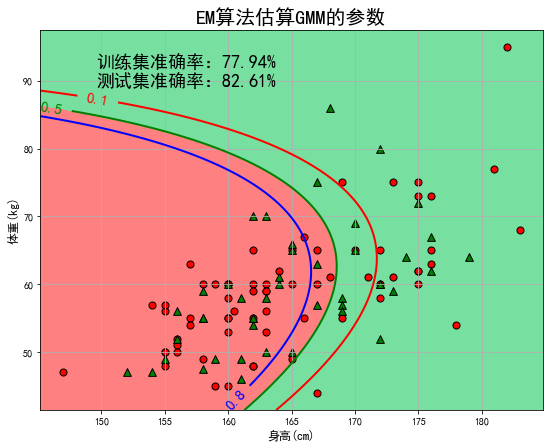

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def expand(a, b):
    d = (b - a) * 0.05
    return a-d, b+d

data = np.loadtxt('data/HeightWeight.csv', dtype=np.float, delimiter=',', skiprows=1)
print(data.shape)
y, x = np.split(data, [1, ], axis=1)
x, x_test, y, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
gmm.fit(x)
print('均值 = \n', gmm.means_)
print('方差 = \n', gmm.covariances_)
y_hat = gmm.predict(x)
y_test_hat = gmm.predict(x_test)
change = (gmm.means_[0][0] > gmm.means_[1][0])
if change:
    z = y_hat == 0
    y_hat[z] = 1
    y_hat[~z] = 0
    z = y_test_hat == 0
    y_test_hat[z] = 1
    y_test_hat[~z] = 0
acc = np.mean(y_hat.ravel() == y.ravel())
acc_test = np.mean(y_test_hat.ravel() == y_test.ravel())
acc_str = u'训练集准确率：%.2f%%' % (acc * 100)
acc_test_str = u'测试集准确率：%.2f%%' % (acc_test * 100)
print(acc_str)
print(acc_test_str)

cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if change:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=50, c='r', marker='o', cmap=cm_dark, edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], s=60, c='g', marker='^', cmap=cm_dark, edgecolors='k')

p = gmm.predict_proba(grid_test)
print(p)
p = p[:, 0].reshape(x1.shape)
CS = plt.contour(x1, x2, p, levels=(0.1, 0.5, 0.8), colors=list('rgb'), linewidths=2)
plt.clabel(CS, fontsize=15, fmt='%.1f', inline=True)
ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
xx = 0.9*ax1_min + 0.1*ax1_max
yy = 0.1*ax2_min + 0.9*ax2_max
plt.text(xx, yy, acc_str, fontsize=18)
yy = 0.15*ax2_min + 0.85*ax2_max
plt.text(xx, yy, acc_test_str, fontsize=18)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.xlabel(u'身高(cm)', fontsize='large')
plt.ylabel(u'体重(kg)', fontsize='large')
plt.title(u'EM算法估算GMM的参数', fontsize=20)
plt.grid()
plt.show()

## 7.2.GMM调参

[[1 0]
 [0 2]]
错误率： [0.385   0.315   0.3     0.00125]
BIC： [7990.71460065 7855.56050855 8006.49834359 6845.79374805]


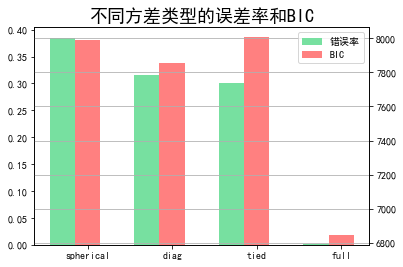

均值 = 
 [[-0.97642254 10.06927801]
 [ 2.88444448  6.69484552]]
方差 = 
 [[[ 0.91302546 -0.04298504]
  [-0.04298504  1.9603531 ]]

 [[ 2.87015473  6.64421303]
  [ 6.64421303 18.00318872]]]


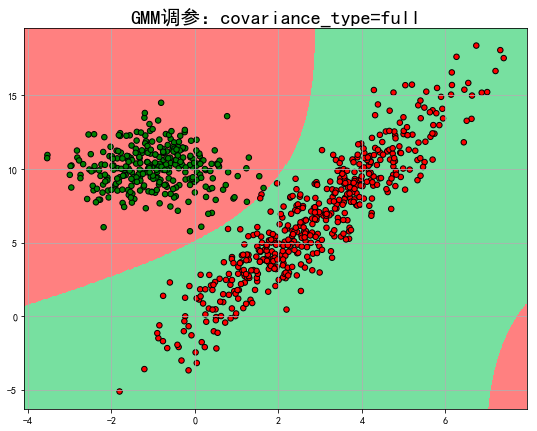

In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a-d, b+d

def accuracy_rate(y1, y2):
    acc = np.mean(y1 == y2)
    return acc if acc > 0.5 else 1-acc

np.random.seed(0)
cov1 = np.diag((1, 2))
print(cov1)
N1 = 500
N2 = 300
N = N1 + N2
x1 = np.random.multivariate_normal(mean=(1, 2), cov=cov1, size=N1)
m = np.array(((1, 1), (1, 3)))
x1 = x1.dot(m)
x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
x = np.vstack((x1, x2))
y = np.array([0]*N1 + [1]*N2)

types = ('spherical', 'diag', 'tied', 'full')
err = np.empty(len(types))
bic = np.empty(len(types))
for i, type in enumerate(types):
    gmm = GaussianMixture(n_components=2, covariance_type=type, random_state=0)
    gmm.fit(x)
    err[i] = 1 - accuracy_rate(gmm.predict(x), y)
    bic[i] = gmm.bic(x)
print('错误率：', err.ravel())
print('BIC：', bic.ravel())
xpos = np.arange(4)
plt.figure(facecolor='w')
ax = plt.axes()
b1 = ax.bar(xpos-0.3, err, width=0.3, color='#77E0A0')
b2 = ax.twinx().bar(xpos, bic, width=0.3, color='#FF8080')
plt.grid(True)
bic_min, bic_max = expand(bic.min(), bic.max())
plt.ylim((bic_min, bic_max))
plt.xticks(xpos, types)
plt.legend([b1[0], b2[0]], (u'错误率', u'BIC'))
plt.title(u'不同方差类型的误差率和BIC', fontsize=18)
plt.show()

optimal = bic.argmin()
gmm = GaussianMixture(n_components=2, covariance_type=types[optimal], random_state=0)
gmm.fit(x)
print('均值 = \n', gmm.means_)
print('方差 = \n', gmm.covariances_)
y_hat = gmm.predict(x)

cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if gmm.means_[0][0] > gmm.means_[1][0]:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, marker='o', cmap=cm_dark, edgecolors='k')

ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'GMM调参：covariance_type=%s' % types[optimal], fontsize=20)
plt.grid()

## 7.3.GMM算法实现

SkLearn准确率：89.80%
Python准确率：89.80%


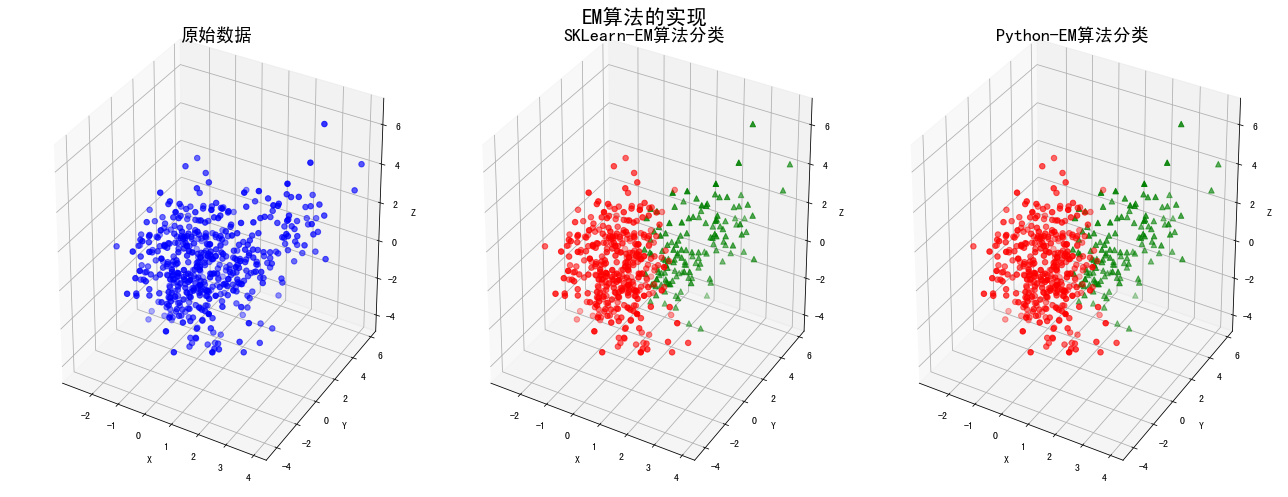

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

style = ''
np.random.seed(0)
mu1_fact = (0, 0, 0)
cov1_fact = np.diag((1, 2, 3))
data1 = np.random.multivariate_normal(mu1_fact, cov1_fact, 400)
mu2_fact = (2, 2, 1)
cov2_fact = np.array(((1, 1, 3), (1, 2, 1), (0, 0, 1)))
data2 = np.random.multivariate_normal(mu2_fact, cov2_fact, 100)
data = np.vstack((data1, data2))
y = np.array([True] * 400 + [False] * 100)

fig = plt.figure(figsize=(18, 7), facecolor='w')
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', s=30, marker='o', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'原始数据', fontsize=18)

g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000)
g.fit(data)
sklearn_mu1, sklearn_mu2 = g.means_
sklearn_sigma1, sklearn_sigma2 = g.covariances_
norm1 = multivariate_normal(sklearn_mu1, sklearn_sigma1)
norm2 = multivariate_normal(sklearn_mu2, sklearn_sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

ax = fig.add_subplot(132, projection='3d')
order = pairwise_distances_argmin([mu1_fact, mu2_fact], [sklearn_mu1, sklearn_mu2], metric='euclidean')
if order[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1
acc = np.mean(y == c1)
print(u'SkLearn准确率：%.2f%%' % (100*acc))
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'SKLearn-EM算法分类', fontsize=18)

num_iter = 100
n, d = data.shape

python_mu1 = data.min(axis=0)
python_mu2 = data.max(axis=0)
python_sigma1 = np.identity(d)
python_sigma2 = np.identity(d)
pi = 0.5
# EM
for i in range(num_iter):
    # E Step
    norm1 = multivariate_normal(python_mu1, python_sigma1)
    norm2 = multivariate_normal(python_mu2, python_sigma2)
    tau1 = pi * norm1.pdf(data)
    tau2 = (1 - pi) * norm2.pdf(data)
    gamma = tau1 / (tau1 + tau2)

    # M Step
    python_mu1 = np.dot(gamma, data) / np.sum(gamma)
    python_mu2 = np.dot((1 - gamma), data) / np.sum((1 - gamma))
    python_sigma1 = np.dot(gamma * (data - python_mu1).T, data - python_mu1) / np.sum(gamma)
    python_sigma2 = np.dot((1 - gamma) * (data - python_mu2).T, data - python_mu2) / np.sum(1 - gamma)
    pi = np.sum(gamma) / n

norm1 = multivariate_normal(python_mu1, python_sigma1)
norm2 = multivariate_normal(python_mu2, python_sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

ax = fig.add_subplot(133, projection='3d')
order = pairwise_distances_argmin([mu1_fact, mu2_fact], [python_mu1, python_mu2], metric='euclidean')

if order[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1
acc = np.mean(y == c1)
print(u'Python准确率：%.2f%%' % (100*acc))
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'Python-EM算法分类', fontsize=18)

plt.suptitle(u'EM算法的实现', fontsize=21)
plt.subplots_adjust(top=0.90)
plt.tight_layout()

## 7.4.使用Python Code实现GMM

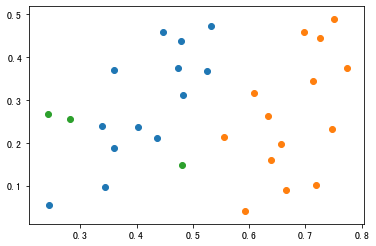

In [3]:
import math
import numpy as np

def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)
class GaussianMixtureModel():
    def __init__(self,k=3,max_iterations=400,tolerance=1e-8):
        self.k = k
        self.parameters = []
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.responsibilities = []
        self.sample_assignments = None
        self.responsibility = None
    def _init_random_gaussians(self, X):
        n_samples = np.shape(X)[0]
        self.priors = (1./self.k) * np.ones(self.k)
        for i in range(self.k):
            params = {}
            params['mean'] = X[np.random.choice(range(n_samples))]
            params["cov"] = calculate_covariance_matrix(X)
            self.parameters.append(params)

    # 计算多元高斯分布
    def multivariate_gaussian(self, X, params):
        n_features = np.shape(X)[1]
        mean = params["mean"]
        covar = params["cov"]
        determinant = np.linalg.det(covar)
        likelihoods = np.zeros(np.shape(X)[0])
        for i, sample in enumerate(X):
            d = n_features
            coeff = (1./(math.pow(2*math.pi,d/2)*math.sqrt(determinant)))
            exponent = math.exp(-0.5 * (sample - mean).T.dot(np.linalg.pinv(covar)).dot((sample - mean)))
            likelihoods[i] = coeff * exponent

        return likelihoods
    def _get_likelihoods(self, X):
        n_samples = np.shape(X)[0]
        likelihoods = np.zeros((n_samples, self.k))
        for i in range(self.k):
            likelihoods[:,i] = self.multivariate_gaussian(X,self.parameters[i])
        return likelihoods
    # E步
    def _expectation(self, X):
        weighted_likelihoods = self._get_likelihoods(X) * self.priors
        sum_likelihoods = np.expand_dims(np.sum(weighted_likelihoods, axis=1), axis=1)
        self.responsibility = weighted_likelihoods / sum_likelihoods
        self.sample_assignments = self.responsibility.argmax(axis=1)
        self.responsibilities.append(np.max(self.responsibility, axis=1))
    # M步
    def _maximization(self, X):
        for i in range(self.k):
            resp = np.expand_dims(self.responsibility[:, i], axis=1)
            mean = (resp * X).sum(axis=0) / resp.sum()
            covariance = (X - mean).T.dot((X - mean) * resp) / resp.sum()
            self.parameters[i]["mean"], self.parameters[i]["cov"] = mean, covariance
        n_samples = np.shape(X)[0]
        self.priors = self.responsibility.sum(axis=0) / n_samples

    def _converged(self, X):
        if len(self.responsibilities) < 2:
            return False
        diff = np.linalg.norm(
            self.responsibilities[-1] - self.responsibilities[-2])
        return diff <= self.tolerance
    def predict(self,X):
        self._init_random_gaussians(X)
        for _ in range(self.max_iterations):
            self._expectation(X)
            self._maximization(X)
            if self._converged(X):
                break
        self._expectation(X)
        return self.sample_assignments

from matplotlib import pyplot as plt
X = np.array([[ 0.697  ,0.46 ],
              [ 0.774  ,0.376],
              [ 0.634  ,0.264],
              [ 0.608  ,0.318],
              [ 0.556  ,0.215],
              [ 0.403  ,0.237],
              [ 0.481  ,0.149],
              [ 0.437  ,0.211],
              [ 0.666  ,0.091],
              [ 0.243  ,0.267],
              [ 0.245  ,0.057],
              [ 0.343  ,0.099],
              [ 0.639  ,0.161],
              [ 0.657  ,0.198],
              [ 0.36   ,0.37 ],
              [ 0.593  ,0.042],
              [ 0.719  ,0.103],
              [ 0.359  ,0.188],
              [ 0.339  ,0.241],
              [ 0.282  ,0.257],
              [ 0.748  ,0.232],
              [ 0.714  ,0.346],
              [ 0.483  ,0.312],
              [ 0.478  ,0.437],
              [ 0.525  ,0.369],
              [ 0.751  ,0.489],
              [ 0.532  ,0.472],
              [ 0.473  ,0.376],
              [ 0.725  ,0.445],
              [ 0.446  ,0.459]])
clf = GaussianMixtureModel(k=3,max_iterations=10000,tolerance=1e-15)
res = clf.predict(X)
k0 = X[res==0]
k1 = X[res==1]
k2 = X[res==2]
plt.figure(facecolor='w')
plt.scatter(k0[:,0],k0[:,1])
plt.scatter(k1[:,0],k1[:,1])
plt.scatter(k2[:,0],k2[:,1])